In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
X, y = load_breast_cancer()['data'], load_breast_cancer()['target']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV

In [15]:
param_dict = {
    'max_depth': np.arange(1, 51)
}

In [16]:
gscv = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_dict, scoring='accuracy', cv=5, n_jobs=6, verbose=100)

In [17]:
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done   2 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done   3 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done   4 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done   5 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done   7 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done   8 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done   9 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done  10 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done  11 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done  12 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done  14 tasks      | elapsed:    0.6s
[Parallel

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=6,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
             scoring='accuracy', verbose=100)

In [18]:
gscv.best_score_

0.945054945054945

In [20]:
gscv.best_params_

{'max_depth': 3}

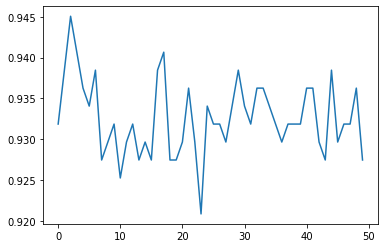

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(gscv.cv_results_['mean_test_score'])

In [42]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [43]:
y_pred = tree.predict(X_test)

In [44]:
(y_pred == y_test).sum() / len(y_test)

0.9122807017543859

In [151]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

In [46]:
param_dict = {
    'base_estimator': [DecisionTreeClassifier(max_depth=i) for i in range(1, 11)],
    'max_samples': np.linspace(0.5, 1.0, 6),
    'max_features': np.linspace(0.5, 1.0, 6),
    'n_estimators': np.arange(1, 26)
}

In [47]:
gscv = GridSearchCV(estimator=BaggingClassifier(), param_grid=param_dict, scoring='accuracy', cv=5, n_jobs=6, verbose=100)

In [48]:
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 9000 candidates, totalling 45000 fits
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done   2 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done   3 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done   4 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done   5 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done   7 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done   8 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done   9 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done  10 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done  11 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done  12 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done  14 tasks      | elapsed:    0.6s
[Para

[Parallel(n_jobs=6)]: Done 1222 tasks      | elapsed:    5.4s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    5.4s
[Parallel(n_jobs=6)]: Done 1254 tasks      | elapsed:    5.6s
[Parallel(n_jobs=6)]: Done 1270 tasks      | elapsed:    5.6s
[Parallel(n_jobs=6)]: Done 1286 tasks      | elapsed:    5.6s
[Parallel(n_jobs=6)]: Done 1302 tasks      | elapsed:    5.6s
[Parallel(n_jobs=6)]: Done 1318 tasks      | elapsed:    5.8s
[Parallel(n_jobs=6)]: Done 1334 tasks      | elapsed:    5.8s
[Parallel(n_jobs=6)]: Done 1350 tasks      | elapsed:    5.9s
[Parallel(n_jobs=6)]: Done 1366 tasks      | elapsed:    6.0s
[Parallel(n_jobs=6)]: Done 1382 tasks      | elapsed:    6.1s
[Parallel(n_jobs=6)]: Done 1398 tasks      | elapsed:    6.1s
[Parallel(n_jobs=6)]: Done 1414 tasks      | elapsed:    6.1s
[Parallel(n_jobs=6)]: Done 1430 tasks      | elapsed:    6.2s
[Parallel(n_jobs=6)]: Done 1446 tasks      | elapsed:    6.3s
[Parallel(n_jobs=6)]: Done 1462 tasks      | elapsed:    6.4s
[Paralle

[Parallel(n_jobs=6)]: Done 3382 tasks      | elapsed:   14.7s
[Parallel(n_jobs=6)]: Done 3398 tasks      | elapsed:   14.7s
[Parallel(n_jobs=6)]: Done 3414 tasks      | elapsed:   14.8s
[Parallel(n_jobs=6)]: Done 3430 tasks      | elapsed:   14.8s
[Parallel(n_jobs=6)]: Done 3446 tasks      | elapsed:   14.9s
[Parallel(n_jobs=6)]: Done 3462 tasks      | elapsed:   15.0s
[Parallel(n_jobs=6)]: Done 3478 tasks      | elapsed:   15.1s
[Parallel(n_jobs=6)]: Done 3494 tasks      | elapsed:   15.2s
[Parallel(n_jobs=6)]: Done 3510 tasks      | elapsed:   15.2s
[Parallel(n_jobs=6)]: Done 3526 tasks      | elapsed:   15.3s
[Parallel(n_jobs=6)]: Done 3542 tasks      | elapsed:   15.3s
[Parallel(n_jobs=6)]: Done 3558 tasks      | elapsed:   15.4s
[Parallel(n_jobs=6)]: Done 3574 tasks      | elapsed:   15.6s
[Parallel(n_jobs=6)]: Done 3590 tasks      | elapsed:   15.6s
[Parallel(n_jobs=6)]: Done 3606 tasks      | elapsed:   15.6s
[Parallel(n_jobs=6)]: Done 3622 tasks      | elapsed:   15.8s
[Paralle

[Parallel(n_jobs=6)]: Done 5558 tasks      | elapsed:   24.6s
[Parallel(n_jobs=6)]: Done 5574 tasks      | elapsed:   24.8s
[Parallel(n_jobs=6)]: Done 5590 tasks      | elapsed:   24.8s
[Parallel(n_jobs=6)]: Done 5606 tasks      | elapsed:   24.8s
[Parallel(n_jobs=6)]: Done 5622 tasks      | elapsed:   25.0s
[Parallel(n_jobs=6)]: Done 5638 tasks      | elapsed:   25.1s
[Parallel(n_jobs=6)]: Done 5654 tasks      | elapsed:   25.1s
[Parallel(n_jobs=6)]: Done 5670 tasks      | elapsed:   25.2s
[Parallel(n_jobs=6)]: Done 5686 tasks      | elapsed:   25.2s
[Parallel(n_jobs=6)]: Done 5702 tasks      | elapsed:   25.3s
[Parallel(n_jobs=6)]: Done 5718 tasks      | elapsed:   25.3s
[Parallel(n_jobs=6)]: Done 5734 tasks      | elapsed:   25.5s
[Parallel(n_jobs=6)]: Done 5750 tasks      | elapsed:   25.6s
[Parallel(n_jobs=6)]: Done 5766 tasks      | elapsed:   25.7s
[Parallel(n_jobs=6)]: Done 5782 tasks      | elapsed:   25.7s
[Parallel(n_jobs=6)]: Done 5798 tasks      | elapsed:   25.8s
[Paralle

[Parallel(n_jobs=6)]: Done 7686 tasks      | elapsed:   35.6s
[Parallel(n_jobs=6)]: Done 7702 tasks      | elapsed:   35.6s
[Parallel(n_jobs=6)]: Done 7718 tasks      | elapsed:   35.7s
[Parallel(n_jobs=6)]: Done 7734 tasks      | elapsed:   35.8s
[Parallel(n_jobs=6)]: Done 7750 tasks      | elapsed:   35.9s
[Parallel(n_jobs=6)]: Done 7766 tasks      | elapsed:   36.0s
[Parallel(n_jobs=6)]: Done 7782 tasks      | elapsed:   36.0s
[Parallel(n_jobs=6)]: Done 7798 tasks      | elapsed:   36.2s
[Parallel(n_jobs=6)]: Done 7814 tasks      | elapsed:   36.2s
[Parallel(n_jobs=6)]: Done 7830 tasks      | elapsed:   36.3s
[Parallel(n_jobs=6)]: Done 7846 tasks      | elapsed:   36.4s
[Parallel(n_jobs=6)]: Done 7862 tasks      | elapsed:   36.5s
[Parallel(n_jobs=6)]: Done 7878 tasks      | elapsed:   36.7s
[Parallel(n_jobs=6)]: Done 7894 tasks      | elapsed:   36.7s
[Parallel(n_jobs=6)]: Done 7910 tasks      | elapsed:   36.7s
[Parallel(n_jobs=6)]: Done 7926 tasks      | elapsed:   36.8s
[Paralle

[Parallel(n_jobs=6)]: Done 9846 tasks      | elapsed:   47.4s
[Parallel(n_jobs=6)]: Done 9862 tasks      | elapsed:   47.4s
[Parallel(n_jobs=6)]: Done 9878 tasks      | elapsed:   47.5s
[Parallel(n_jobs=6)]: Done 9894 tasks      | elapsed:   47.6s
[Parallel(n_jobs=6)]: Done 9910 tasks      | elapsed:   47.6s
[Parallel(n_jobs=6)]: Done 9926 tasks      | elapsed:   47.7s
[Parallel(n_jobs=6)]: Done 9942 tasks      | elapsed:   47.8s
[Parallel(n_jobs=6)]: Done 9958 tasks      | elapsed:   47.9s
[Parallel(n_jobs=6)]: Done 9974 tasks      | elapsed:   48.0s
[Parallel(n_jobs=6)]: Done 9990 tasks      | elapsed:   48.1s
[Parallel(n_jobs=6)]: Done 10006 tasks      | elapsed:   48.2s
[Parallel(n_jobs=6)]: Done 10022 tasks      | elapsed:   48.2s
[Parallel(n_jobs=6)]: Done 10038 tasks      | elapsed:   48.3s
[Parallel(n_jobs=6)]: Done 10054 tasks      | elapsed:   48.3s
[Parallel(n_jobs=6)]: Done 10070 tasks      | elapsed:   48.5s
[Parallel(n_jobs=6)]: Done 10086 tasks      | elapsed:   48.5s
[P

[Parallel(n_jobs=6)]: Done 11974 tasks      | elapsed:   59.9s
[Parallel(n_jobs=6)]: Done 11990 tasks      | elapsed:   59.9s
[Parallel(n_jobs=6)]: Done 12006 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 12022 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 12038 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 12054 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 12070 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 12086 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 12102 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 12118 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 12134 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 12150 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 12166 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 12182 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 12198 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 12214 tasks      | elapsed: 

[Parallel(n_jobs=6)]: Done 14102 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 14118 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 14134 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 14150 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 14166 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 14182 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 14198 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 14214 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 14230 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 14246 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 14262 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 14278 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 14294 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 14310 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 14326 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 14342 tasks      | elapsed: 

[Parallel(n_jobs=6)]: Done 16246 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 16262 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 16278 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 16294 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 16310 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 16326 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 16342 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 16358 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 16374 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 16390 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 16406 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 16422 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 16438 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 16454 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 16470 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 16486 tasks      | elapsed: 

[Parallel(n_jobs=6)]: Done 18358 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 18374 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 18390 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 18406 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 18422 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 18438 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 18454 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 18470 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 18486 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 18502 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 18518 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 18534 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 18550 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 18566 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 18582 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 18598 tasks      | elapsed: 

[Parallel(n_jobs=6)]: Done 20486 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 20502 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 20518 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 20534 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 20550 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 20566 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 20582 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 20598 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 20614 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 20630 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 20646 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 20662 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 20678 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 20694 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 20710 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 20726 tasks      | elapsed: 

[Parallel(n_jobs=6)]: Done 22598 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 22614 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 22630 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 22646 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 22662 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 22678 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 22694 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 22710 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 22726 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 22742 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 22758 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 22774 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 22790 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 22806 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 22822 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 22838 tasks      | elapsed: 

[Parallel(n_jobs=6)]: Done 24694 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 24710 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 24726 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 24742 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 24758 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 24774 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 24790 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 24806 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 24822 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 24838 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 24854 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 24870 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 24886 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 24902 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 24918 tasks      | elapsed:  2.4min
[Parallel(n_jobs=6)]: Done 24934 tasks      | elapsed: 

[Parallel(n_jobs=6)]: Done 26806 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done 26822 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done 26838 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done 26854 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done 26870 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done 26886 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done 26902 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done 26918 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done 26934 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done 26950 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done 26966 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done 26982 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done 26998 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done 27014 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done 27030 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done 27046 tasks      | elapsed: 

[Parallel(n_jobs=6)]: Done 28918 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 28934 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 28950 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 28966 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 28982 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 28998 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 29014 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 29030 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 29046 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 29062 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 29078 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 29094 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 29110 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 29126 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 29142 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 29158 tasks      | elapsed: 

[Parallel(n_jobs=6)]: Done 31014 tasks      | elapsed:  3.0min
[Parallel(n_jobs=6)]: Done 31030 tasks      | elapsed:  3.0min
[Parallel(n_jobs=6)]: Done 31046 tasks      | elapsed:  3.0min
[Parallel(n_jobs=6)]: Done 31062 tasks      | elapsed:  3.0min
[Parallel(n_jobs=6)]: Done 31078 tasks      | elapsed:  3.0min
[Parallel(n_jobs=6)]: Done 31094 tasks      | elapsed:  3.0min
[Parallel(n_jobs=6)]: Done 31110 tasks      | elapsed:  3.0min
[Parallel(n_jobs=6)]: Done 31126 tasks      | elapsed:  3.1min
[Parallel(n_jobs=6)]: Done 31142 tasks      | elapsed:  3.1min
[Parallel(n_jobs=6)]: Done 31158 tasks      | elapsed:  3.1min
[Parallel(n_jobs=6)]: Done 31174 tasks      | elapsed:  3.1min
[Parallel(n_jobs=6)]: Done 31190 tasks      | elapsed:  3.1min
[Parallel(n_jobs=6)]: Done 31206 tasks      | elapsed:  3.1min
[Parallel(n_jobs=6)]: Done 31222 tasks      | elapsed:  3.1min
[Parallel(n_jobs=6)]: Done 31238 tasks      | elapsed:  3.1min
[Parallel(n_jobs=6)]: Done 31254 tasks      | elapsed: 

[Parallel(n_jobs=6)]: Done 33110 tasks      | elapsed:  3.3min
[Parallel(n_jobs=6)]: Done 33126 tasks      | elapsed:  3.3min
[Parallel(n_jobs=6)]: Done 33142 tasks      | elapsed:  3.3min
[Parallel(n_jobs=6)]: Done 33158 tasks      | elapsed:  3.3min
[Parallel(n_jobs=6)]: Done 33174 tasks      | elapsed:  3.3min
[Parallel(n_jobs=6)]: Done 33190 tasks      | elapsed:  3.3min
[Parallel(n_jobs=6)]: Done 33206 tasks      | elapsed:  3.3min
[Parallel(n_jobs=6)]: Done 33222 tasks      | elapsed:  3.3min
[Parallel(n_jobs=6)]: Done 33238 tasks      | elapsed:  3.3min
[Parallel(n_jobs=6)]: Done 33254 tasks      | elapsed:  3.3min
[Parallel(n_jobs=6)]: Done 33270 tasks      | elapsed:  3.3min
[Parallel(n_jobs=6)]: Done 33286 tasks      | elapsed:  3.3min
[Parallel(n_jobs=6)]: Done 33302 tasks      | elapsed:  3.3min
[Parallel(n_jobs=6)]: Done 33318 tasks      | elapsed:  3.3min
[Parallel(n_jobs=6)]: Done 33334 tasks      | elapsed:  3.3min
[Parallel(n_jobs=6)]: Done 33350 tasks      | elapsed: 

[Parallel(n_jobs=6)]: Done 35222 tasks      | elapsed:  3.5min
[Parallel(n_jobs=6)]: Done 35238 tasks      | elapsed:  3.5min
[Parallel(n_jobs=6)]: Done 35254 tasks      | elapsed:  3.5min
[Parallel(n_jobs=6)]: Done 35270 tasks      | elapsed:  3.5min
[Parallel(n_jobs=6)]: Done 35286 tasks      | elapsed:  3.5min
[Parallel(n_jobs=6)]: Done 35302 tasks      | elapsed:  3.5min
[Parallel(n_jobs=6)]: Done 35318 tasks      | elapsed:  3.5min
[Parallel(n_jobs=6)]: Done 35334 tasks      | elapsed:  3.5min
[Parallel(n_jobs=6)]: Done 35350 tasks      | elapsed:  3.5min
[Parallel(n_jobs=6)]: Done 35366 tasks      | elapsed:  3.5min
[Parallel(n_jobs=6)]: Done 35382 tasks      | elapsed:  3.5min
[Parallel(n_jobs=6)]: Done 35398 tasks      | elapsed:  3.5min
[Parallel(n_jobs=6)]: Done 35414 tasks      | elapsed:  3.5min
[Parallel(n_jobs=6)]: Done 35430 tasks      | elapsed:  3.5min
[Parallel(n_jobs=6)]: Done 35446 tasks      | elapsed:  3.5min
[Parallel(n_jobs=6)]: Done 35462 tasks      | elapsed: 

[Parallel(n_jobs=6)]: Done 37334 tasks      | elapsed:  3.7min
[Parallel(n_jobs=6)]: Done 37350 tasks      | elapsed:  3.7min
[Parallel(n_jobs=6)]: Done 37366 tasks      | elapsed:  3.7min
[Parallel(n_jobs=6)]: Done 37382 tasks      | elapsed:  3.7min
[Parallel(n_jobs=6)]: Done 37398 tasks      | elapsed:  3.7min
[Parallel(n_jobs=6)]: Done 37414 tasks      | elapsed:  3.7min
[Parallel(n_jobs=6)]: Done 37430 tasks      | elapsed:  3.8min
[Parallel(n_jobs=6)]: Done 37446 tasks      | elapsed:  3.8min
[Parallel(n_jobs=6)]: Done 37462 tasks      | elapsed:  3.8min
[Parallel(n_jobs=6)]: Done 37478 tasks      | elapsed:  3.8min
[Parallel(n_jobs=6)]: Done 37494 tasks      | elapsed:  3.8min
[Parallel(n_jobs=6)]: Done 37510 tasks      | elapsed:  3.8min
[Parallel(n_jobs=6)]: Done 37526 tasks      | elapsed:  3.8min
[Parallel(n_jobs=6)]: Done 37542 tasks      | elapsed:  3.8min
[Parallel(n_jobs=6)]: Done 37558 tasks      | elapsed:  3.8min
[Parallel(n_jobs=6)]: Done 37574 tasks      | elapsed: 

[Parallel(n_jobs=6)]: Done 39430 tasks      | elapsed:  4.0min
[Parallel(n_jobs=6)]: Done 39446 tasks      | elapsed:  4.0min
[Parallel(n_jobs=6)]: Done 39462 tasks      | elapsed:  4.0min
[Parallel(n_jobs=6)]: Done 39478 tasks      | elapsed:  4.0min
[Parallel(n_jobs=6)]: Done 39494 tasks      | elapsed:  4.0min
[Parallel(n_jobs=6)]: Done 39510 tasks      | elapsed:  4.0min
[Parallel(n_jobs=6)]: Done 39526 tasks      | elapsed:  4.0min
[Parallel(n_jobs=6)]: Done 39542 tasks      | elapsed:  4.0min
[Parallel(n_jobs=6)]: Done 39558 tasks      | elapsed:  4.0min
[Parallel(n_jobs=6)]: Done 39574 tasks      | elapsed:  4.0min
[Parallel(n_jobs=6)]: Done 39590 tasks      | elapsed:  4.0min
[Parallel(n_jobs=6)]: Done 39606 tasks      | elapsed:  4.0min
[Parallel(n_jobs=6)]: Done 39622 tasks      | elapsed:  4.0min
[Parallel(n_jobs=6)]: Done 39638 tasks      | elapsed:  4.0min
[Parallel(n_jobs=6)]: Done 39654 tasks      | elapsed:  4.0min
[Parallel(n_jobs=6)]: Done 39670 tasks      | elapsed: 

[Parallel(n_jobs=6)]: Done 41542 tasks      | elapsed:  4.2min
[Parallel(n_jobs=6)]: Done 41558 tasks      | elapsed:  4.2min
[Parallel(n_jobs=6)]: Done 41574 tasks      | elapsed:  4.2min
[Parallel(n_jobs=6)]: Done 41590 tasks      | elapsed:  4.2min
[Parallel(n_jobs=6)]: Done 41606 tasks      | elapsed:  4.2min
[Parallel(n_jobs=6)]: Done 41622 tasks      | elapsed:  4.2min
[Parallel(n_jobs=6)]: Done 41638 tasks      | elapsed:  4.2min
[Parallel(n_jobs=6)]: Done 41654 tasks      | elapsed:  4.2min
[Parallel(n_jobs=6)]: Done 41670 tasks      | elapsed:  4.2min
[Parallel(n_jobs=6)]: Done 41686 tasks      | elapsed:  4.2min
[Parallel(n_jobs=6)]: Done 41702 tasks      | elapsed:  4.2min
[Parallel(n_jobs=6)]: Done 41718 tasks      | elapsed:  4.2min
[Parallel(n_jobs=6)]: Done 41734 tasks      | elapsed:  4.2min
[Parallel(n_jobs=6)]: Done 41750 tasks      | elapsed:  4.2min
[Parallel(n_jobs=6)]: Done 41766 tasks      | elapsed:  4.2min
[Parallel(n_jobs=6)]: Done 41782 tasks      | elapsed: 

[Parallel(n_jobs=6)]: Done 43638 tasks      | elapsed:  4.4min
[Parallel(n_jobs=6)]: Done 43654 tasks      | elapsed:  4.5min
[Parallel(n_jobs=6)]: Done 43670 tasks      | elapsed:  4.5min
[Parallel(n_jobs=6)]: Done 43686 tasks      | elapsed:  4.5min
[Parallel(n_jobs=6)]: Done 43702 tasks      | elapsed:  4.5min
[Parallel(n_jobs=6)]: Done 43718 tasks      | elapsed:  4.5min
[Parallel(n_jobs=6)]: Done 43734 tasks      | elapsed:  4.5min
[Parallel(n_jobs=6)]: Done 43750 tasks      | elapsed:  4.5min
[Parallel(n_jobs=6)]: Done 43766 tasks      | elapsed:  4.5min
[Parallel(n_jobs=6)]: Done 43782 tasks      | elapsed:  4.5min
[Parallel(n_jobs=6)]: Done 43798 tasks      | elapsed:  4.5min
[Parallel(n_jobs=6)]: Done 43814 tasks      | elapsed:  4.5min
[Parallel(n_jobs=6)]: Done 43830 tasks      | elapsed:  4.5min
[Parallel(n_jobs=6)]: Done 43846 tasks      | elapsed:  4.5min
[Parallel(n_jobs=6)]: Done 43862 tasks      | elapsed:  4.5min
[Parallel(n_jobs=6)]: Done 43878 tasks      | elapsed: 

[Parallel(n_jobs=6)]: Done 45000 out of 45000 | elapsed:  4.6min finished


GridSearchCV(cv=5, estimator=BaggingClassifier(), n_jobs=6,
             param_grid={'base_estimator': [DecisionTreeClassifier(max_depth=1),
                                            DecisionTreeClassifier(max_depth=2),
                                            DecisionTreeClassifier(max_depth=3),
                                            DecisionTreeClassifier(max_depth=4),
                                            DecisionTreeClassifier(max_depth=5),
                                            DecisionTreeClassifier(max_depth=6),
                                            DecisionTreeClassifier(max_depth=7),
                                            DecisionTreeClassifier(max_depth=8),
                                            DecisionTreeClassifier(max_depth=9),
                                            DecisionTreeClassifier(max_depth=10)],
                         'max_features': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'max_samples': array([0

In [49]:
gscv.best_params_

{'base_estimator': DecisionTreeClassifier(max_depth=5),
 'max_features': 0.6,
 'max_samples': 0.9,
 'n_estimators': 13}

In [50]:
gscv.best_score_

0.9692307692307693

In [184]:
bagging = BaggingClassifier(base_estimator=SVC(), n_estimators=1)

In [185]:
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=SVC(), n_estimators=1)

In [186]:
y_pred = bagging.predict(X_test)

In [187]:
(y_pred == y_test).sum() / len(y_test)

0.8508771929824561

In [188]:
from sklearn.ensemble import AdaBoostClassifier

In [222]:
adaboost = AdaBoostClassifier(n_estimators=200)
adaboost.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=200)

In [223]:
y_pred = adaboost.predict(X_test)

In [224]:
(y_pred == y_test).sum() / len(y_test)

0.9824561403508771

In [4]:
from catboost import CatBoostClassifier

In [16]:
catboost = CatBoostClassifier()

In [17]:
param_grid = {
    'iterations': np.arange(1, 501, 20),
    'depth': np.arange(1, 20)
}

In [18]:
catboost.grid_search(param_grid=param_grid, X=X_train, y=y_train, cv=5)

0:	learn: 0.6583889	test: 0.6617026	best: 0.6617026 (0)	total: 437us	remaining: 0us

bestTest = 0.6617026393
bestIteration = 0

0:	loss: 0.6617026	best: 0.6617026 (0)	total: 4.24ms	remaining: 2.01s
0:	learn: 0.6583889	test: 0.6617026	best: 0.6617026 (0)	total: 296us	remaining: 5.94ms
1:	learn: 0.6231464	test: 0.6281946	best: 0.6281946 (1)	total: 560us	remaining: 5.33ms
2:	learn: 0.5916557	test: 0.6014402	best: 0.6014402 (2)	total: 783us	remaining: 4.7ms
3:	learn: 0.5636519	test: 0.5756267	best: 0.5756267 (3)	total: 1.01ms	remaining: 4.31ms
4:	learn: 0.5375155	test: 0.5515521	best: 0.5515521 (4)	total: 1.28ms	remaining: 4.08ms
5:	learn: 0.5132664	test: 0.5310708	best: 0.5310708 (5)	total: 1.59ms	remaining: 3.97ms
6:	learn: 0.4888572	test: 0.5098318	best: 0.5098318 (6)	total: 2.24ms	remaining: 4.48ms
7:	learn: 0.4700058	test: 0.4907308	best: 0.4907308 (7)	total: 2.59ms	remaining: 4.22ms
8:	learn: 0.4479735	test: 0.4713682	best: 0.4713682 (8)	total: 2.82ms	remaining: 3.76ms
9:	learn: 0.42

87:	learn: 0.1042877	test: 0.1705711	best: 0.1705711 (87)	total: 18.6ms	remaining: 15.4ms
88:	learn: 0.1032974	test: 0.1689984	best: 0.1689984 (88)	total: 18.8ms	remaining: 15.2ms
89:	learn: 0.1026147	test: 0.1692942	best: 0.1689984 (88)	total: 19.1ms	remaining: 15ms
90:	learn: 0.1020953	test: 0.1684841	best: 0.1684841 (90)	total: 19.3ms	remaining: 14.8ms
91:	learn: 0.1012158	test: 0.1675942	best: 0.1675942 (91)	total: 19.5ms	remaining: 14.6ms
92:	learn: 0.1003935	test: 0.1676731	best: 0.1675942 (91)	total: 19.7ms	remaining: 14.4ms
93:	learn: 0.0999927	test: 0.1674931	best: 0.1674931 (93)	total: 19.9ms	remaining: 14.2ms
94:	learn: 0.0994618	test: 0.1673132	best: 0.1673132 (94)	total: 20.1ms	remaining: 14ms
95:	learn: 0.0991463	test: 0.1669495	best: 0.1669495 (95)	total: 20.3ms	remaining: 13.8ms
96:	learn: 0.0982640	test: 0.1670920	best: 0.1669495 (95)	total: 20.6ms	remaining: 13.6ms
97:	learn: 0.0978569	test: 0.1669225	best: 0.1669225 (97)	total: 21ms	remaining: 13.5ms
98:	learn: 0.097

180:	learn: 0.0625649	test: 0.1415490	best: 0.1415490 (180)	total: 38.8ms	remaining: 8.58ms
181:	learn: 0.0622731	test: 0.1408654	best: 0.1408654 (181)	total: 39.1ms	remaining: 8.37ms
182:	learn: 0.0622124	test: 0.1408375	best: 0.1408375 (182)	total: 39.3ms	remaining: 8.16ms
183:	learn: 0.0618800	test: 0.1401086	best: 0.1401086 (183)	total: 39.5ms	remaining: 7.94ms
184:	learn: 0.0617008	test: 0.1400923	best: 0.1400923 (184)	total: 39.7ms	remaining: 7.73ms
185:	learn: 0.0614886	test: 0.1404632	best: 0.1400923 (184)	total: 40ms	remaining: 7.52ms
186:	learn: 0.0614292	test: 0.1404363	best: 0.1400923 (184)	total: 40.2ms	remaining: 7.3ms
187:	learn: 0.0613747	test: 0.1404104	best: 0.1400923 (184)	total: 40.4ms	remaining: 7.09ms
188:	learn: 0.0611460	test: 0.1402999	best: 0.1400923 (184)	total: 40.6ms	remaining: 6.87ms
189:	learn: 0.0609817	test: 0.1402983	best: 0.1400923 (184)	total: 40.8ms	remaining: 6.66ms
190:	learn: 0.0607141	test: 0.1406256	best: 0.1400923 (184)	total: 41ms	remaining: 

11:	learn: 0.3958089	test: 0.4255865	best: 0.4255865 (11)	total: 3.19ms	remaining: 77ms
12:	learn: 0.3811945	test: 0.4134408	best: 0.4134408 (12)	total: 3.75ms	remaining: 83.2ms
13:	learn: 0.3687246	test: 0.4039944	best: 0.4039944 (13)	total: 3.94ms	remaining: 80.8ms
14:	learn: 0.3515426	test: 0.3881070	best: 0.3881070 (14)	total: 4.14ms	remaining: 79ms
15:	learn: 0.3412596	test: 0.3780331	best: 0.3780331 (15)	total: 4.34ms	remaining: 77.3ms
16:	learn: 0.3302872	test: 0.3697857	best: 0.3697857 (16)	total: 4.52ms	remaining: 75.5ms
17:	learn: 0.3191232	test: 0.3582939	best: 0.3582939 (17)	total: 4.7ms	remaining: 73.9ms
18:	learn: 0.3079830	test: 0.3493248	best: 0.3493248 (18)	total: 4.89ms	remaining: 72.6ms
19:	learn: 0.2992567	test: 0.3397967	best: 0.3397967 (19)	total: 5.08ms	remaining: 71.4ms
20:	learn: 0.2920423	test: 0.3332940	best: 0.3332940 (20)	total: 5.29ms	remaining: 70.5ms
21:	learn: 0.2834743	test: 0.3260243	best: 0.3260243 (21)	total: 9.53ms	remaining: 121ms
22:	learn: 0.277

187:	learn: 0.0613747	test: 0.1404104	best: 0.1400923 (184)	total: 39.9ms	remaining: 32.5ms
188:	learn: 0.0611460	test: 0.1402999	best: 0.1400923 (184)	total: 40.1ms	remaining: 32.2ms
189:	learn: 0.0609817	test: 0.1402983	best: 0.1400923 (184)	total: 40.3ms	remaining: 32ms
190:	learn: 0.0607141	test: 0.1406256	best: 0.1400923 (184)	total: 40.5ms	remaining: 31.8ms
191:	learn: 0.0606572	test: 0.1405995	best: 0.1400923 (184)	total: 40.7ms	remaining: 31.6ms
192:	learn: 0.0605044	test: 0.1406838	best: 0.1400923 (184)	total: 41ms	remaining: 31.4ms
193:	learn: 0.0601906	test: 0.1410603	best: 0.1400923 (184)	total: 41.2ms	remaining: 31.2ms
194:	learn: 0.0598378	test: 0.1415813	best: 0.1400923 (184)	total: 41.6ms	remaining: 31.1ms
195:	learn: 0.0597843	test: 0.1415544	best: 0.1400923 (184)	total: 44.9ms	remaining: 33.2ms
196:	learn: 0.0594771	test: 0.1420433	best: 0.1400923 (184)	total: 45.6ms	remaining: 33.3ms
197:	learn: 0.0591762	test: 0.1424337	best: 0.1400923 (184)	total: 46.3ms	remaining:

293:	learn: 0.0433465	test: 0.1339506	best: 0.1339506 (293)	total: 63ms	remaining: 18.7ms
294:	learn: 0.0431636	test: 0.1338013	best: 0.1338013 (294)	total: 63.2ms	remaining: 18.4ms
295:	learn: 0.0429809	test: 0.1343137	best: 0.1338013 (294)	total: 63.4ms	remaining: 18.2ms
296:	learn: 0.0428101	test: 0.1341807	best: 0.1338013 (294)	total: 63.7ms	remaining: 18ms
297:	learn: 0.0425878	test: 0.1340852	best: 0.1338013 (294)	total: 63.9ms	remaining: 17.8ms
298:	learn: 0.0423643	test: 0.1340010	best: 0.1338013 (294)	total: 64.1ms	remaining: 17.6ms
299:	learn: 0.0421266	test: 0.1335981	best: 0.1335981 (299)	total: 64.3ms	remaining: 17.4ms
300:	learn: 0.0420118	test: 0.1335011	best: 0.1335011 (300)	total: 64.5ms	remaining: 17.2ms
301:	learn: 0.0419890	test: 0.1334900	best: 0.1334900 (301)	total: 64.8ms	remaining: 16.9ms
302:	learn: 0.0418762	test: 0.1334854	best: 0.1334854 (302)	total: 65ms	remaining: 16.7ms
303:	learn: 0.0418099	test: 0.1336059	best: 0.1334854 (302)	total: 65.2ms	remaining: 1

328:	learn: 0.0391408	test: 0.1314486	best: 0.1314486 (328)	total: 73.7ms	remaining: 20.6ms
329:	learn: 0.0391273	test: 0.1314397	best: 0.1314397 (329)	total: 74ms	remaining: 20.4ms
330:	learn: 0.0389457	test: 0.1312015	best: 0.1312015 (330)	total: 74.2ms	remaining: 20.2ms
331:	learn: 0.0388530	test: 0.1311279	best: 0.1311279 (331)	total: 74.4ms	remaining: 19.9ms
332:	learn: 0.0388346	test: 0.1311176	best: 0.1311176 (332)	total: 74.6ms	remaining: 19.7ms
333:	learn: 0.0387820	test: 0.1312401	best: 0.1311176 (332)	total: 74.9ms	remaining: 19.5ms
334:	learn: 0.0386968	test: 0.1312653	best: 0.1311176 (332)	total: 75.1ms	remaining: 19.3ms
335:	learn: 0.0384728	test: 0.1306504	best: 0.1306504 (335)	total: 75.6ms	remaining: 19.1ms
336:	learn: 0.0382701	test: 0.1302749	best: 0.1302749 (336)	total: 75.9ms	remaining: 18.9ms
337:	learn: 0.0382518	test: 0.1302652	best: 0.1302652 (337)	total: 76.2ms	remaining: 18.7ms
338:	learn: 0.0380614	test: 0.1299095	best: 0.1299095 (338)	total: 76.6ms	remainin

152:	learn: 0.0709242	test: 0.1460354	best: 0.1438372 (143)	total: 41ms	remaining: 82.6ms
153:	learn: 0.0706968	test: 0.1460345	best: 0.1438372 (143)	total: 41.4ms	remaining: 82.6ms
154:	learn: 0.0705036	test: 0.1460031	best: 0.1438372 (143)	total: 41.7ms	remaining: 82.2ms
155:	learn: 0.0703007	test: 0.1460504	best: 0.1438372 (143)	total: 41.9ms	remaining: 81.9ms
156:	learn: 0.0698980	test: 0.1465908	best: 0.1438372 (143)	total: 42.1ms	remaining: 81.5ms
157:	learn: 0.0698249	test: 0.1465659	best: 0.1438372 (143)	total: 42.3ms	remaining: 81.2ms
158:	learn: 0.0696402	test: 0.1466281	best: 0.1438372 (143)	total: 42.6ms	remaining: 80.9ms
159:	learn: 0.0693835	test: 0.1469090	best: 0.1438372 (143)	total: 42.8ms	remaining: 80.5ms
160:	learn: 0.0690462	test: 0.1463073	best: 0.1438372 (143)	total: 43ms	remaining: 80.2ms
161:	learn: 0.0687568	test: 0.1466922	best: 0.1438372 (143)	total: 43.2ms	remaining: 79.8ms
162:	learn: 0.0684837	test: 0.1464123	best: 0.1438372 (143)	total: 43.8ms	remaining:

398:	learn: 0.0324788	test: 0.1294566	best: 0.1287568 (370)	total: 97ms	remaining: 19.9ms
399:	learn: 0.0323653	test: 0.1294212	best: 0.1287568 (370)	total: 97.3ms	remaining: 19.7ms
400:	learn: 0.0322043	test: 0.1291075	best: 0.1287568 (370)	total: 97.6ms	remaining: 19.5ms
401:	learn: 0.0321391	test: 0.1291340	best: 0.1287568 (370)	total: 97.8ms	remaining: 19.2ms
402:	learn: 0.0321302	test: 0.1291263	best: 0.1287568 (370)	total: 98ms	remaining: 19ms
403:	learn: 0.0321214	test: 0.1291188	best: 0.1287568 (370)	total: 98.3ms	remaining: 18.7ms
404:	learn: 0.0321093	test: 0.1291091	best: 0.1287568 (370)	total: 98.7ms	remaining: 18.5ms
405:	learn: 0.0321011	test: 0.1291021	best: 0.1287568 (370)	total: 99ms	remaining: 18.3ms
406:	learn: 0.0320928	test: 0.1290953	best: 0.1287568 (370)	total: 99.6ms	remaining: 18.1ms
407:	learn: 0.0320016	test: 0.1287049	best: 0.1287049 (407)	total: 101ms	remaining: 18ms
408:	learn: 0.0318651	test: 0.1286740	best: 0.1286740 (408)	total: 101ms	remaining: 17.8ms


83:	learn: 0.0679100	test: 0.1470134	best: 0.1470134 (83)	total: 25.5ms	remaining: 17.3ms
84:	learn: 0.0675462	test: 0.1467315	best: 0.1467315 (84)	total: 27.1ms	remaining: 17.9ms
85:	learn: 0.0664870	test: 0.1464976	best: 0.1464976 (85)	total: 27.6ms	remaining: 17.7ms
86:	learn: 0.0660704	test: 0.1461847	best: 0.1461847 (86)	total: 28.5ms	remaining: 17.7ms
87:	learn: 0.0653450	test: 0.1465485	best: 0.1461847 (86)	total: 29ms	remaining: 17.5ms
88:	learn: 0.0646718	test: 0.1455598	best: 0.1455598 (88)	total: 29.5ms	remaining: 17.2ms
89:	learn: 0.0638238	test: 0.1439116	best: 0.1439116 (89)	total: 29.9ms	remaining: 16.9ms
90:	learn: 0.0630962	test: 0.1441651	best: 0.1439116 (89)	total: 30.2ms	remaining: 16.6ms
91:	learn: 0.0624060	test: 0.1433599	best: 0.1433599 (91)	total: 30.7ms	remaining: 16.4ms
92:	learn: 0.0616643	test: 0.1422207	best: 0.1422207 (92)	total: 31.1ms	remaining: 16ms
93:	learn: 0.0611363	test: 0.1422681	best: 0.1422207 (92)	total: 31.5ms	remaining: 15.8ms
94:	learn: 0.0

3:	learn: 0.5314648	test: 0.5471971	best: 0.5471971 (3)	total: 1.71ms	remaining: 92.7ms
4:	learn: 0.5033859	test: 0.5239450	best: 0.5239450 (4)	total: 2ms	remaining: 86.7ms
5:	learn: 0.4826507	test: 0.5045813	best: 0.5045813 (5)	total: 2.38ms	remaining: 85.3ms
6:	learn: 0.4658569	test: 0.4901147	best: 0.4901147 (6)	total: 2.83ms	remaining: 86.6ms
7:	learn: 0.4333124	test: 0.4622141	best: 0.4622141 (7)	total: 3.5ms	remaining: 93.2ms
8:	learn: 0.4087045	test: 0.4416975	best: 0.4416975 (8)	total: 3.97ms	remaining: 93.6ms
9:	learn: 0.3920779	test: 0.4250985	best: 0.4250985 (9)	total: 4.38ms	remaining: 92.5ms
10:	learn: 0.3703621	test: 0.4038838	best: 0.4038838 (10)	total: 4.7ms	remaining: 89.8ms
11:	learn: 0.3576337	test: 0.3938293	best: 0.3938293 (11)	total: 5.02ms	remaining: 87.4ms
12:	learn: 0.3373729	test: 0.3762526	best: 0.3762526 (12)	total: 5.32ms	remaining: 85.2ms
13:	learn: 0.3216821	test: 0.3610209	best: 0.3610209 (13)	total: 5.67ms	remaining: 83.8ms
14:	learn: 0.3036970	test: 0.

166:	learn: 0.0334737	test: 0.1257453	best: 0.1245988 (158)	total: 50.3ms	remaining: 28.3ms
167:	learn: 0.0331634	test: 0.1249605	best: 0.1245988 (158)	total: 50.6ms	remaining: 28ms
168:	learn: 0.0329338	test: 0.1254800	best: 0.1245988 (158)	total: 50.9ms	remaining: 27.7ms
169:	learn: 0.0326561	test: 0.1262671	best: 0.1245988 (158)	total: 54.8ms	remaining: 29.3ms
170:	learn: 0.0322631	test: 0.1263515	best: 0.1245988 (158)	total: 55.7ms	remaining: 29.3ms
171:	learn: 0.0321039	test: 0.1262619	best: 0.1245988 (158)	total: 56.2ms	remaining: 29.1ms
172:	learn: 0.0318810	test: 0.1259890	best: 0.1245988 (158)	total: 56.6ms	remaining: 28.8ms
173:	learn: 0.0315991	test: 0.1254781	best: 0.1245988 (158)	total: 57ms	remaining: 28.5ms
174:	learn: 0.0313372	test: 0.1252422	best: 0.1245988 (158)	total: 57.4ms	remaining: 28.2ms
175:	learn: 0.0311587	test: 0.1259067	best: 0.1245988 (158)	total: 57.9ms	remaining: 28ms
176:	learn: 0.0309252	test: 0.1256799	best: 0.1245988 (158)	total: 58.2ms	remaining: 2

143:	learn: 0.0394523	test: 0.1308603	best: 0.1300205 (134)	total: 45.5ms	remaining: 49.6ms
144:	learn: 0.0390341	test: 0.1298995	best: 0.1298995 (144)	total: 45.8ms	remaining: 49.3ms
145:	learn: 0.0387970	test: 0.1294301	best: 0.1294301 (145)	total: 46.1ms	remaining: 49ms
146:	learn: 0.0385260	test: 0.1283042	best: 0.1283042 (146)	total: 46.9ms	remaining: 49.1ms
147:	learn: 0.0380918	test: 0.1269460	best: 0.1269460 (147)	total: 47.5ms	remaining: 49.1ms
148:	learn: 0.0377709	test: 0.1266749	best: 0.1266749 (148)	total: 47.9ms	remaining: 48.9ms
149:	learn: 0.0375065	test: 0.1265825	best: 0.1265825 (149)	total: 48.2ms	remaining: 48.5ms
150:	learn: 0.0372455	test: 0.1264648	best: 0.1264648 (150)	total: 48.8ms	remaining: 48.5ms
151:	learn: 0.0369913	test: 0.1258604	best: 0.1258604 (151)	total: 49.2ms	remaining: 48.2ms
152:	learn: 0.0368420	test: 0.1257149	best: 0.1257149 (152)	total: 49.6ms	remaining: 48ms
153:	learn: 0.0365585	test: 0.1252486	best: 0.1252486 (153)	total: 50.1ms	remaining:

56:	learn: 0.0964713	test: 0.1656708	best: 0.1656708 (56)	total: 18.5ms	remaining: 92.3ms
57:	learn: 0.0951208	test: 0.1657349	best: 0.1656708 (56)	total: 19ms	remaining: 92.6ms
58:	learn: 0.0932016	test: 0.1646912	best: 0.1646912 (58)	total: 19.3ms	remaining: 92.2ms
59:	learn: 0.0915184	test: 0.1643739	best: 0.1643739 (59)	total: 19.6ms	remaining: 91.8ms
60:	learn: 0.0897626	test: 0.1643307	best: 0.1643307 (60)	total: 22.4ms	remaining: 103ms
61:	learn: 0.0884630	test: 0.1629487	best: 0.1629487 (61)	total: 22.8ms	remaining: 103ms
62:	learn: 0.0877528	test: 0.1631972	best: 0.1629487 (61)	total: 23.3ms	remaining: 103ms
63:	learn: 0.0860807	test: 0.1632528	best: 0.1629487 (61)	total: 23.8ms	remaining: 103ms
64:	learn: 0.0847788	test: 0.1616432	best: 0.1616432 (64)	total: 24.2ms	remaining: 103ms
65:	learn: 0.0836075	test: 0.1611546	best: 0.1611546 (65)	total: 24.6ms	remaining: 103ms
66:	learn: 0.0828281	test: 0.1611882	best: 0.1611546 (65)	total: 25ms	remaining: 102ms
67:	learn: 0.0820722	

285:	learn: 0.0175572	test: 0.1258602	best: 0.1208477 (237)	total: 93.4ms	remaining: 24.5ms
286:	learn: 0.0174120	test: 0.1252237	best: 0.1208477 (237)	total: 94ms	remaining: 24.2ms
287:	learn: 0.0173186	test: 0.1257221	best: 0.1208477 (237)	total: 94.6ms	remaining: 24ms
288:	learn: 0.0171975	test: 0.1254195	best: 0.1208477 (237)	total: 95ms	remaining: 23.7ms
289:	learn: 0.0170481	test: 0.1260244	best: 0.1208477 (237)	total: 95.4ms	remaining: 23.4ms
290:	learn: 0.0170039	test: 0.1259815	best: 0.1208477 (237)	total: 95.8ms	remaining: 23.1ms
291:	learn: 0.0169311	test: 0.1258804	best: 0.1208477 (237)	total: 96.3ms	remaining: 22.8ms
292:	learn: 0.0168895	test: 0.1258388	best: 0.1208477 (237)	total: 96.8ms	remaining: 22.5ms
293:	learn: 0.0168396	test: 0.1256188	best: 0.1208477 (237)	total: 97.4ms	remaining: 22.2ms
294:	learn: 0.0167997	test: 0.1255802	best: 0.1208477 (237)	total: 97.9ms	remaining: 21.9ms
295:	learn: 0.0166711	test: 0.1251893	best: 0.1208477 (237)	total: 98.3ms	remaining: 2

314:	learn: 0.0149316	test: 0.1258989	best: 0.1208477 (237)	total: 155ms	remaining: 32.6ms
315:	learn: 0.0148975	test: 0.1258590	best: 0.1208477 (237)	total: 156ms	remaining: 32.1ms
316:	learn: 0.0148027	test: 0.1255985	best: 0.1208477 (237)	total: 156ms	remaining: 31.6ms
317:	learn: 0.0147430	test: 0.1255067	best: 0.1208477 (237)	total: 157ms	remaining: 31.1ms
318:	learn: 0.0146919	test: 0.1251488	best: 0.1208477 (237)	total: 158ms	remaining: 30.6ms
319:	learn: 0.0145883	test: 0.1247524	best: 0.1208477 (237)	total: 158ms	remaining: 30.1ms
320:	learn: 0.0145554	test: 0.1247055	best: 0.1208477 (237)	total: 159ms	remaining: 29.7ms
321:	learn: 0.0145269	test: 0.1247255	best: 0.1208477 (237)	total: 159ms	remaining: 29.2ms
322:	learn: 0.0144996	test: 0.1247480	best: 0.1208477 (237)	total: 159ms	remaining: 28.6ms
323:	learn: 0.0144203	test: 0.1252430	best: 0.1208477 (237)	total: 160ms	remaining: 28.1ms
324:	learn: 0.0143619	test: 0.1251515	best: 0.1208477 (237)	total: 160ms	remaining: 27.6ms

58:	learn: 0.0932016	test: 0.1646912	best: 0.1646912 (58)	total: 25.4ms	remaining: 156ms
59:	learn: 0.0915184	test: 0.1643739	best: 0.1643739 (59)	total: 26.3ms	remaining: 158ms
60:	learn: 0.0897626	test: 0.1643307	best: 0.1643307 (60)	total: 27.2ms	remaining: 160ms
61:	learn: 0.0884630	test: 0.1629487	best: 0.1629487 (61)	total: 27.6ms	remaining: 160ms
62:	learn: 0.0877528	test: 0.1631972	best: 0.1629487 (61)	total: 27.9ms	remaining: 159ms
63:	learn: 0.0860807	test: 0.1632528	best: 0.1629487 (61)	total: 28.3ms	remaining: 158ms
64:	learn: 0.0847788	test: 0.1616432	best: 0.1616432 (64)	total: 28.8ms	remaining: 158ms
65:	learn: 0.0836075	test: 0.1611546	best: 0.1611546 (65)	total: 29.1ms	remaining: 157ms
66:	learn: 0.0828281	test: 0.1611882	best: 0.1611546 (65)	total: 29.5ms	remaining: 156ms
67:	learn: 0.0820722	test: 0.1612026	best: 0.1611546 (65)	total: 29.9ms	remaining: 155ms
68:	learn: 0.0809881	test: 0.1599822	best: 0.1599822 (68)	total: 30.3ms	remaining: 154ms
69:	learn: 0.0800599	

212:	learn: 0.0255125	test: 0.1238746	best: 0.1238746 (212)	total: 69.6ms	remaining: 74.5ms
213:	learn: 0.0253781	test: 0.1237229	best: 0.1237229 (213)	total: 75ms	remaining: 79.6ms
214:	learn: 0.0252227	test: 0.1232036	best: 0.1232036 (214)	total: 75.7ms	remaining: 79.6ms
215:	learn: 0.0250010	test: 0.1223614	best: 0.1223614 (215)	total: 76.1ms	remaining: 79.3ms
216:	learn: 0.0249852	test: 0.1223472	best: 0.1223472 (216)	total: 76.5ms	remaining: 79ms
217:	learn: 0.0247463	test: 0.1215265	best: 0.1215265 (217)	total: 76.9ms	remaining: 78.7ms
218:	learn: 0.0247338	test: 0.1215128	best: 0.1215128 (218)	total: 77.3ms	remaining: 78.4ms
219:	learn: 0.0246532	test: 0.1211906	best: 0.1211906 (219)	total: 77.8ms	remaining: 78.2ms
220:	learn: 0.0244779	test: 0.1209861	best: 0.1209861 (220)	total: 78.2ms	remaining: 77.9ms
221:	learn: 0.0243978	test: 0.1209383	best: 0.1209383 (221)	total: 78.6ms	remaining: 77.5ms
222:	learn: 0.0241928	test: 0.1208489	best: 0.1208489 (222)	total: 79.1ms	remaining:

246:	learn: 0.0213646	test: 0.1218024	best: 0.1208477 (237)	total: 107ms	remaining: 92.9ms
247:	learn: 0.0213308	test: 0.1218665	best: 0.1208477 (237)	total: 108ms	remaining: 92.5ms
248:	learn: 0.0212046	test: 0.1223364	best: 0.1208477 (237)	total: 108ms	remaining: 92.1ms
249:	learn: 0.0210737	test: 0.1229619	best: 0.1208477 (237)	total: 109ms	remaining: 91.8ms
250:	learn: 0.0209045	test: 0.1226014	best: 0.1208477 (237)	total: 109ms	remaining: 91.5ms
251:	learn: 0.0208384	test: 0.1225406	best: 0.1208477 (237)	total: 110ms	remaining: 91.2ms
252:	learn: 0.0207077	test: 0.1231905	best: 0.1208477 (237)	total: 110ms	remaining: 90.7ms
253:	learn: 0.0206783	test: 0.1232528	best: 0.1208477 (237)	total: 111ms	remaining: 90.2ms
254:	learn: 0.0206149	test: 0.1231919	best: 0.1208477 (237)	total: 111ms	remaining: 89.9ms
255:	learn: 0.0204805	test: 0.1229941	best: 0.1208477 (237)	total: 112ms	remaining: 89.6ms
256:	learn: 0.0204473	test: 0.1230623	best: 0.1208477 (237)	total: 112ms	remaining: 89.1ms

270:	learn: 0.0190539	test: 0.1233972	best: 0.1208477 (237)	total: 98.5ms	remaining: 76.3ms
271:	learn: 0.0189661	test: 0.1232837	best: 0.1208477 (237)	total: 98.8ms	remaining: 75.9ms
272:	learn: 0.0188347	test: 0.1229787	best: 0.1208477 (237)	total: 99.1ms	remaining: 75.5ms
273:	learn: 0.0186536	test: 0.1235775	best: 0.1208477 (237)	total: 99.4ms	remaining: 75.1ms
274:	learn: 0.0186049	test: 0.1235371	best: 0.1208477 (237)	total: 99.9ms	remaining: 74.9ms
275:	learn: 0.0185577	test: 0.1234970	best: 0.1208477 (237)	total: 100ms	remaining: 74.5ms
276:	learn: 0.0184965	test: 0.1231404	best: 0.1208477 (237)	total: 101ms	remaining: 74.1ms
277:	learn: 0.0183793	test: 0.1236672	best: 0.1208477 (237)	total: 101ms	remaining: 73.7ms
278:	learn: 0.0183003	test: 0.1235589	best: 0.1208477 (237)	total: 101ms	remaining: 73.3ms
279:	learn: 0.0182571	test: 0.1235124	best: 0.1208477 (237)	total: 102ms	remaining: 73ms
280:	learn: 0.0180904	test: 0.1241472	best: 0.1208477 (237)	total: 102ms	remaining: 72.

39:	learn: 0.0984968	test: 0.1740530	best: 0.1740530 (39)	total: 17.6ms	remaining: 26.9ms
40:	learn: 0.0963328	test: 0.1726762	best: 0.1726762 (40)	total: 18.1ms	remaining: 26.4ms
41:	learn: 0.0949697	test: 0.1725254	best: 0.1725254 (41)	total: 25.4ms	remaining: 35.7ms
42:	learn: 0.0910935	test: 0.1702468	best: 0.1702468 (42)	total: 26.2ms	remaining: 35.3ms
43:	learn: 0.0890148	test: 0.1698130	best: 0.1698130 (43)	total: 26.7ms	remaining: 34.6ms
44:	learn: 0.0874215	test: 0.1687479	best: 0.1687479 (44)	total: 27.3ms	remaining: 34ms
45:	learn: 0.0855740	test: 0.1675966	best: 0.1675966 (45)	total: 27.9ms	remaining: 33.4ms
46:	learn: 0.0838929	test: 0.1646286	best: 0.1646286 (46)	total: 28.6ms	remaining: 32.8ms
47:	learn: 0.0821281	test: 0.1636420	best: 0.1636420 (47)	total: 29ms	remaining: 32ms
48:	learn: 0.0804095	test: 0.1624460	best: 0.1624460 (48)	total: 29.5ms	remaining: 31.3ms
49:	learn: 0.0787614	test: 0.1592136	best: 0.1592136 (49)	total: 30ms	remaining: 30.6ms
50:	learn: 0.07667

69:	learn: 0.0561724	test: 0.1506231	best: 0.1506231 (69)	total: 31.7ms	remaining: 41.3ms
70:	learn: 0.0554611	test: 0.1492943	best: 0.1492943 (70)	total: 33.1ms	remaining: 42ms
71:	learn: 0.0551527	test: 0.1485864	best: 0.1485864 (71)	total: 33.6ms	remaining: 41.5ms
72:	learn: 0.0545572	test: 0.1476702	best: 0.1476702 (72)	total: 34.2ms	remaining: 41.3ms
73:	learn: 0.0536305	test: 0.1477561	best: 0.1476702 (72)	total: 34.7ms	remaining: 40.8ms
74:	learn: 0.0530851	test: 0.1477003	best: 0.1476702 (72)	total: 35.3ms	remaining: 40.4ms
75:	learn: 0.0522762	test: 0.1478929	best: 0.1476702 (72)	total: 35.7ms	remaining: 39.9ms
76:	learn: 0.0518209	test: 0.1470703	best: 0.1470703 (76)	total: 36.5ms	remaining: 39.8ms
77:	learn: 0.0511926	test: 0.1475232	best: 0.1470703 (76)	total: 37.2ms	remaining: 39.6ms
78:	learn: 0.0506339	test: 0.1470199	best: 0.1470199 (78)	total: 37.9ms	remaining: 39.3ms
79:	learn: 0.0500879	test: 0.1478381	best: 0.1470199 (78)	total: 38.5ms	remaining: 39ms
80:	learn: 0.0

137:	learn: 0.0270958	test: 0.1413973	best: 0.1397589 (132)	total: 62.4ms	remaining: 28.5ms
138:	learn: 0.0269319	test: 0.1415739	best: 0.1397589 (132)	total: 66.8ms	remaining: 29.8ms
139:	learn: 0.0267095	test: 0.1410431	best: 0.1397589 (132)	total: 68ms	remaining: 29.6ms
140:	learn: 0.0263050	test: 0.1406284	best: 0.1397589 (132)	total: 69ms	remaining: 29.4ms
141:	learn: 0.0258648	test: 0.1395573	best: 0.1395573 (141)	total: 69.6ms	remaining: 28.9ms
142:	learn: 0.0256930	test: 0.1393562	best: 0.1393562 (142)	total: 70.2ms	remaining: 28.5ms
143:	learn: 0.0255334	test: 0.1391310	best: 0.1391310 (143)	total: 70.7ms	remaining: 28ms
144:	learn: 0.0253794	test: 0.1389974	best: 0.1389974 (144)	total: 71.5ms	remaining: 27.6ms
145:	learn: 0.0251391	test: 0.1383973	best: 0.1383973 (145)	total: 72ms	remaining: 27.1ms
146:	learn: 0.0249250	test: 0.1372053	best: 0.1372053 (146)	total: 72.5ms	remaining: 26.6ms
147:	learn: 0.0247032	test: 0.1368477	best: 0.1368477 (147)	total: 73.1ms	remaining: 26.

117:	learn: 0.0325531	test: 0.1433772	best: 0.1433772 (117)	total: 53.9ms	remaining: 56.2ms
118:	learn: 0.0321435	test: 0.1433784	best: 0.1433772 (117)	total: 55.6ms	remaining: 57ms
119:	learn: 0.0318460	test: 0.1424161	best: 0.1424161 (119)	total: 56.2ms	remaining: 56.7ms
120:	learn: 0.0316322	test: 0.1418598	best: 0.1418598 (120)	total: 56.7ms	remaining: 56.3ms
121:	learn: 0.0313731	test: 0.1411209	best: 0.1411209 (121)	total: 57.3ms	remaining: 55.9ms
122:	learn: 0.0311486	test: 0.1404737	best: 0.1404737 (122)	total: 57.9ms	remaining: 55.6ms
123:	learn: 0.0307141	test: 0.1401609	best: 0.1401609 (123)	total: 58.6ms	remaining: 55.3ms
124:	learn: 0.0305510	test: 0.1404662	best: 0.1401609 (123)	total: 59ms	remaining: 54.8ms
125:	learn: 0.0302833	test: 0.1398581	best: 0.1398581 (125)	total: 59.6ms	remaining: 54.4ms
126:	learn: 0.0298986	test: 0.1401818	best: 0.1398581 (125)	total: 60.3ms	remaining: 54.1ms
127:	learn: 0.0296084	test: 0.1406473	best: 0.1398581 (125)	total: 60.9ms	remaining:

247:	learn: 0.0119798	test: 0.1463516	best: 0.1352784 (152)	total: 129ms	remaining: 6.75ms
248:	learn: 0.0118693	test: 0.1468022	best: 0.1352784 (152)	total: 129ms	remaining: 6.24ms
249:	learn: 0.0118133	test: 0.1472058	best: 0.1352784 (152)	total: 133ms	remaining: 5.84ms
250:	learn: 0.0117574	test: 0.1468482	best: 0.1352784 (152)	total: 134ms	remaining: 5.32ms
251:	learn: 0.0116758	test: 0.1475750	best: 0.1352784 (152)	total: 134ms	remaining: 4.79ms
252:	learn: 0.0115670	test: 0.1481643	best: 0.1352784 (152)	total: 135ms	remaining: 4.27ms
253:	learn: 0.0114904	test: 0.1487900	best: 0.1352784 (152)	total: 136ms	remaining: 3.74ms
254:	learn: 0.0114056	test: 0.1484946	best: 0.1352784 (152)	total: 136ms	remaining: 3.21ms
255:	learn: 0.0113194	test: 0.1485092	best: 0.1352784 (152)	total: 137ms	remaining: 2.68ms
256:	learn: 0.0112411	test: 0.1482309	best: 0.1352784 (152)	total: 138ms	remaining: 2.15ms
257:	learn: 0.0111820	test: 0.1487697	best: 0.1352784 (152)	total: 139ms	remaining: 1.61ms

111:	learn: 0.0343038	test: 0.1448141	best: 0.1436925 (91)	total: 51.9ms	remaining: 87.6ms
112:	learn: 0.0341109	test: 0.1445049	best: 0.1436925 (91)	total: 52.7ms	remaining: 87.7ms
113:	learn: 0.0337396	test: 0.1445637	best: 0.1436925 (91)	total: 53.2ms	remaining: 87.3ms
114:	learn: 0.0332749	test: 0.1441403	best: 0.1436925 (91)	total: 53.7ms	remaining: 86.8ms
115:	learn: 0.0331134	test: 0.1438569	best: 0.1436925 (91)	total: 54.3ms	remaining: 86.7ms
116:	learn: 0.0329386	test: 0.1438167	best: 0.1436925 (91)	total: 54.9ms	remaining: 86.3ms
117:	learn: 0.0325531	test: 0.1433772	best: 0.1433772 (117)	total: 55.3ms	remaining: 85.8ms
118:	learn: 0.0321435	test: 0.1433784	best: 0.1433772 (117)	total: 56ms	remaining: 85.6ms
119:	learn: 0.0318460	test: 0.1424161	best: 0.1424161 (119)	total: 56.6ms	remaining: 85.4ms
120:	learn: 0.0316322	test: 0.1418598	best: 0.1418598 (120)	total: 57.3ms	remaining: 85.2ms
121:	learn: 0.0313731	test: 0.1411209	best: 0.1411209 (121)	total: 57.9ms	remaining: 85m

166:	learn: 0.0216737	test: 0.1363934	best: 0.1352784 (152)	total: 91.7ms	remaining: 84.5ms
167:	learn: 0.0215757	test: 0.1365226	best: 0.1352784 (152)	total: 92.2ms	remaining: 83.9ms
168:	learn: 0.0214225	test: 0.1362444	best: 0.1352784 (152)	total: 92.9ms	remaining: 83.6ms
169:	learn: 0.0212953	test: 0.1361496	best: 0.1352784 (152)	total: 93.6ms	remaining: 83.2ms
170:	learn: 0.0210984	test: 0.1366248	best: 0.1352784 (152)	total: 94.1ms	remaining: 82.6ms
171:	learn: 0.0209261	test: 0.1367527	best: 0.1352784 (152)	total: 94.5ms	remaining: 81.9ms
172:	learn: 0.0206540	test: 0.1367607	best: 0.1352784 (152)	total: 95.2ms	remaining: 81.5ms
173:	learn: 0.0205146	test: 0.1365211	best: 0.1352784 (152)	total: 95.7ms	remaining: 80.8ms
174:	learn: 0.0203859	test: 0.1363251	best: 0.1352784 (152)	total: 96.1ms	remaining: 80.2ms
175:	learn: 0.0202353	test: 0.1368111	best: 0.1352784 (152)	total: 96.5ms	remaining: 79.5ms
176:	learn: 0.0199969	test: 0.1369928	best: 0.1352784 (152)	total: 97ms	remainin

254:	learn: 0.0114056	test: 0.1484946	best: 0.1352784 (152)	total: 113ms	remaining: 38.1ms
255:	learn: 0.0113194	test: 0.1485092	best: 0.1352784 (152)	total: 113ms	remaining: 37.7ms
256:	learn: 0.0112411	test: 0.1482309	best: 0.1352784 (152)	total: 118ms	remaining: 38.5ms
257:	learn: 0.0111820	test: 0.1487697	best: 0.1352784 (152)	total: 118ms	remaining: 38.1ms
258:	learn: 0.0110700	test: 0.1496209	best: 0.1352784 (152)	total: 119ms	remaining: 37.7ms
259:	learn: 0.0110075	test: 0.1494653	best: 0.1352784 (152)	total: 120ms	remaining: 37.3ms
260:	learn: 0.0109148	test: 0.1493120	best: 0.1352784 (152)	total: 120ms	remaining: 36.9ms
261:	learn: 0.0108887	test: 0.1492590	best: 0.1352784 (152)	total: 121ms	remaining: 36.4ms
262:	learn: 0.0108351	test: 0.1491078	best: 0.1352784 (152)	total: 121ms	remaining: 36ms
263:	learn: 0.0107946	test: 0.1490300	best: 0.1352784 (152)	total: 122ms	remaining: 35.5ms
264:	learn: 0.0107252	test: 0.1487888	best: 0.1352784 (152)	total: 122ms	remaining: 35.1ms
2

306:	learn: 0.0082818	test: 0.1534956	best: 0.1352784 (152)	total: 148ms	remaining: 26ms
307:	learn: 0.0082464	test: 0.1532065	best: 0.1352784 (152)	total: 148ms	remaining: 25.5ms
308:	learn: 0.0082148	test: 0.1530661	best: 0.1352784 (152)	total: 149ms	remaining: 25.1ms
309:	learn: 0.0081659	test: 0.1525968	best: 0.1352784 (152)	total: 149ms	remaining: 24.6ms
310:	learn: 0.0081151	test: 0.1521464	best: 0.1352784 (152)	total: 150ms	remaining: 24.1ms
311:	learn: 0.0080728	test: 0.1519582	best: 0.1352784 (152)	total: 150ms	remaining: 23.6ms
312:	learn: 0.0080590	test: 0.1519146	best: 0.1352784 (152)	total: 151ms	remaining: 23.1ms
313:	learn: 0.0080216	test: 0.1517928	best: 0.1352784 (152)	total: 151ms	remaining: 22.6ms
314:	learn: 0.0079423	test: 0.1526228	best: 0.1352784 (152)	total: 152ms	remaining: 22.1ms
315:	learn: 0.0078722	test: 0.1534357	best: 0.1352784 (152)	total: 152ms	remaining: 21.7ms
316:	learn: 0.0078367	test: 0.1533220	best: 0.1352784 (152)	total: 153ms	remaining: 21.2ms
3

296:	learn: 0.0087754	test: 0.1532398	best: 0.1352784 (152)	total: 164ms	remaining: 46.4ms
297:	learn: 0.0087015	test: 0.1537563	best: 0.1352784 (152)	total: 165ms	remaining: 46ms
298:	learn: 0.0086844	test: 0.1537140	best: 0.1352784 (152)	total: 166ms	remaining: 45.4ms
299:	learn: 0.0086346	test: 0.1534633	best: 0.1352784 (152)	total: 166ms	remaining: 44.9ms
300:	learn: 0.0085781	test: 0.1529986	best: 0.1352784 (152)	total: 167ms	remaining: 44.3ms
301:	learn: 0.0085118	test: 0.1535158	best: 0.1352784 (152)	total: 167ms	remaining: 43.7ms
302:	learn: 0.0084733	test: 0.1532763	best: 0.1352784 (152)	total: 168ms	remaining: 43.2ms
303:	learn: 0.0084581	test: 0.1532356	best: 0.1352784 (152)	total: 168ms	remaining: 42.6ms
304:	learn: 0.0084011	test: 0.1531882	best: 0.1352784 (152)	total: 169ms	remaining: 42ms
305:	learn: 0.0083560	test: 0.1529572	best: 0.1352784 (152)	total: 169ms	remaining: 41.4ms
306:	learn: 0.0082818	test: 0.1534956	best: 0.1352784 (152)	total: 169ms	remaining: 40.8ms
307

303:	learn: 0.0084581	test: 0.1532356	best: 0.1352784 (152)	total: 147ms	remaining: 46.9ms
304:	learn: 0.0084011	test: 0.1531882	best: 0.1352784 (152)	total: 149ms	remaining: 46.8ms
305:	learn: 0.0083560	test: 0.1529572	best: 0.1352784 (152)	total: 149ms	remaining: 46.4ms
306:	learn: 0.0082818	test: 0.1534956	best: 0.1352784 (152)	total: 150ms	remaining: 45.9ms
307:	learn: 0.0082464	test: 0.1532065	best: 0.1352784 (152)	total: 150ms	remaining: 45.4ms
308:	learn: 0.0082148	test: 0.1530661	best: 0.1352784 (152)	total: 151ms	remaining: 44.9ms
309:	learn: 0.0081659	test: 0.1525968	best: 0.1352784 (152)	total: 152ms	remaining: 44.7ms
310:	learn: 0.0081151	test: 0.1521464	best: 0.1352784 (152)	total: 153ms	remaining: 44.2ms
311:	learn: 0.0080728	test: 0.1519582	best: 0.1352784 (152)	total: 153ms	remaining: 43.7ms
312:	learn: 0.0080590	test: 0.1519146	best: 0.1352784 (152)	total: 154ms	remaining: 43.2ms
313:	learn: 0.0080216	test: 0.1517928	best: 0.1352784 (152)	total: 154ms	remaining: 42.8ms

288:	learn: 0.0092695	test: 0.1518674	best: 0.1352784 (152)	total: 140ms	remaining: 64.1ms
289:	learn: 0.0092148	test: 0.1516259	best: 0.1352784 (152)	total: 141ms	remaining: 63.6ms
290:	learn: 0.0091551	test: 0.1515975	best: 0.1352784 (152)	total: 141ms	remaining: 63.2ms
291:	learn: 0.0091008	test: 0.1520332	best: 0.1352784 (152)	total: 142ms	remaining: 62.8ms
292:	learn: 0.0090099	test: 0.1528704	best: 0.1352784 (152)	total: 143ms	remaining: 62.4ms
293:	learn: 0.0089468	test: 0.1526059	best: 0.1352784 (152)	total: 143ms	remaining: 61.9ms
294:	learn: 0.0088971	test: 0.1523966	best: 0.1352784 (152)	total: 144ms	remaining: 61.5ms
295:	learn: 0.0088109	test: 0.1532234	best: 0.1352784 (152)	total: 145ms	remaining: 61ms
296:	learn: 0.0087754	test: 0.1532398	best: 0.1352784 (152)	total: 145ms	remaining: 60.6ms
297:	learn: 0.0087015	test: 0.1537563	best: 0.1352784 (152)	total: 146ms	remaining: 60.1ms
298:	learn: 0.0086844	test: 0.1537140	best: 0.1352784 (152)	total: 146ms	remaining: 59.6ms
2

279:	learn: 0.0098672	test: 0.1496191	best: 0.1352784 (152)	total: 124ms	remaining: 71.5ms
280:	learn: 0.0097592	test: 0.1504905	best: 0.1352784 (152)	total: 125ms	remaining: 71.1ms
281:	learn: 0.0096574	test: 0.1513389	best: 0.1352784 (152)	total: 125ms	remaining: 70.6ms
282:	learn: 0.0095968	test: 0.1510819	best: 0.1352784 (152)	total: 126ms	remaining: 70.2ms
283:	learn: 0.0095616	test: 0.1510269	best: 0.1352784 (152)	total: 127ms	remaining: 69.9ms
284:	learn: 0.0095052	test: 0.1507961	best: 0.1352784 (152)	total: 127ms	remaining: 69.5ms
285:	learn: 0.0094289	test: 0.1517685	best: 0.1352784 (152)	total: 128ms	remaining: 69.1ms
286:	learn: 0.0093724	test: 0.1515147	best: 0.1352784 (152)	total: 128ms	remaining: 68.7ms
287:	learn: 0.0093275	test: 0.1513307	best: 0.1352784 (152)	total: 129ms	remaining: 68.3ms
288:	learn: 0.0092695	test: 0.1518674	best: 0.1352784 (152)	total: 129ms	remaining: 67.9ms
289:	learn: 0.0092148	test: 0.1516259	best: 0.1352784 (152)	total: 130ms	remaining: 67.5ms

177:	learn: 0.0198588	test: 0.1372726	best: 0.1352784 (152)	total: 111ms	remaining: 177ms
178:	learn: 0.0197888	test: 0.1373347	best: 0.1352784 (152)	total: 113ms	remaining: 178ms
179:	learn: 0.0196107	test: 0.1370072	best: 0.1352784 (152)	total: 114ms	remaining: 178ms
180:	learn: 0.0194868	test: 0.1362477	best: 0.1352784 (152)	total: 114ms	remaining: 177ms
181:	learn: 0.0193799	test: 0.1360931	best: 0.1352784 (152)	total: 115ms	remaining: 176ms
182:	learn: 0.0192665	test: 0.1361030	best: 0.1352784 (152)	total: 116ms	remaining: 176ms
183:	learn: 0.0191530	test: 0.1364051	best: 0.1352784 (152)	total: 116ms	remaining: 175ms
184:	learn: 0.0188954	test: 0.1370154	best: 0.1352784 (152)	total: 117ms	remaining: 174ms
185:	learn: 0.0186557	test: 0.1376621	best: 0.1352784 (152)	total: 117ms	remaining: 173ms
186:	learn: 0.0184962	test: 0.1374341	best: 0.1352784 (152)	total: 118ms	remaining: 172ms
187:	learn: 0.0183304	test: 0.1378404	best: 0.1352784 (152)	total: 118ms	remaining: 171ms
188:	learn

444:	learn: 0.0045835	test: 0.1616802	best: 0.1352784 (152)	total: 305ms	remaining: 11ms
445:	learn: 0.0045793	test: 0.1616762	best: 0.1352784 (152)	total: 306ms	remaining: 10.3ms
446:	learn: 0.0045404	test: 0.1622468	best: 0.1352784 (152)	total: 306ms	remaining: 9.59ms
447:	learn: 0.0045306	test: 0.1620224	best: 0.1352784 (152)	total: 307ms	remaining: 8.91ms
448:	learn: 0.0045272	test: 0.1619986	best: 0.1352784 (152)	total: 308ms	remaining: 8.22ms
449:	learn: 0.0045271	test: 0.1619982	best: 0.1352784 (152)	total: 308ms	remaining: 7.53ms
450:	learn: 0.0045141	test: 0.1617173	best: 0.1352784 (152)	total: 309ms	remaining: 6.85ms
451:	learn: 0.0044875	test: 0.1621024	best: 0.1352784 (152)	total: 310ms	remaining: 6.16ms
452:	learn: 0.0044727	test: 0.1620124	best: 0.1352784 (152)	total: 310ms	remaining: 5.48ms
453:	learn: 0.0044598	test: 0.1619027	best: 0.1352784 (152)	total: 311ms	remaining: 4.79ms
454:	learn: 0.0044343	test: 0.1622816	best: 0.1352784 (152)	total: 311ms	remaining: 4.11ms
4

370:	learn: 0.0059468	test: 0.1571727	best: 0.1352784 (152)	total: 183ms	remaining: 54.4ms
371:	learn: 0.0059132	test: 0.1576936	best: 0.1352784 (152)	total: 184ms	remaining: 53.9ms
372:	learn: 0.0058890	test: 0.1581012	best: 0.1352784 (152)	total: 185ms	remaining: 53.5ms
373:	learn: 0.0058690	test: 0.1579654	best: 0.1352784 (152)	total: 185ms	remaining: 53ms
374:	learn: 0.0058449	test: 0.1578588	best: 0.1352784 (152)	total: 186ms	remaining: 52.6ms
375:	learn: 0.0058214	test: 0.1577551	best: 0.1352784 (152)	total: 187ms	remaining: 52.1ms
376:	learn: 0.0057867	test: 0.1574084	best: 0.1352784 (152)	total: 187ms	remaining: 51.6ms
377:	learn: 0.0057441	test: 0.1579045	best: 0.1352784 (152)	total: 188ms	remaining: 51.1ms
378:	learn: 0.0057356	test: 0.1578492	best: 0.1352784 (152)	total: 188ms	remaining: 50.7ms
379:	learn: 0.0057137	test: 0.1577568	best: 0.1352784 (152)	total: 189ms	remaining: 50.2ms
380:	learn: 0.0056914	test: 0.1576086	best: 0.1352784 (152)	total: 190ms	remaining: 49.8ms
3

42:	learn: 0.0844081	test: 0.1706175	best: 0.1706175 (42)	total: 30.4ms	remaining: 26.8ms
43:	learn: 0.0823771	test: 0.1694094	best: 0.1694094 (43)	total: 31.4ms	remaining: 26.4ms
44:	learn: 0.0804675	test: 0.1674186	best: 0.1674186 (44)	total: 32.3ms	remaining: 25.8ms
45:	learn: 0.0788428	test: 0.1676957	best: 0.1674186 (44)	total: 33ms	remaining: 25.1ms
46:	learn: 0.0769761	test: 0.1662474	best: 0.1662474 (46)	total: 33.8ms	remaining: 24.4ms
47:	learn: 0.0756347	test: 0.1657950	best: 0.1657950 (47)	total: 34.6ms	remaining: 23.8ms
48:	learn: 0.0742555	test: 0.1657688	best: 0.1657688 (48)	total: 35.3ms	remaining: 23.1ms
49:	learn: 0.0725442	test: 0.1643432	best: 0.1643432 (49)	total: 36.1ms	remaining: 22.4ms
50:	learn: 0.0711791	test: 0.1639516	best: 0.1639516 (50)	total: 36.9ms	remaining: 21.7ms
51:	learn: 0.0700150	test: 0.1635561	best: 0.1635561 (51)	total: 37.7ms	remaining: 21ms
52:	learn: 0.0679859	test: 0.1625777	best: 0.1625777 (52)	total: 38.5ms	remaining: 20.3ms
53:	learn: 0.0

81:	loss: 0.1409700	best: 0.1208477 (37)	total: 7.47s	remaining: 35.8s
0:	learn: 0.6466833	test: 0.6504818	best: 0.6504818 (0)	total: 751us	remaining: 105ms
1:	learn: 0.6041240	test: 0.6104646	best: 0.6104646 (1)	total: 1.8ms	remaining: 125ms
2:	learn: 0.5539622	test: 0.5633040	best: 0.5633040 (2)	total: 2.55ms	remaining: 117ms
3:	learn: 0.5217785	test: 0.5360375	best: 0.5360375 (3)	total: 3.32ms	remaining: 114ms
4:	learn: 0.4880210	test: 0.5060975	best: 0.5060975 (4)	total: 4.37ms	remaining: 119ms
5:	learn: 0.4617528	test: 0.4851400	best: 0.4851400 (5)	total: 5.16ms	remaining: 116ms
6:	learn: 0.4424499	test: 0.4682066	best: 0.4682066 (6)	total: 5.91ms	remaining: 113ms
7:	learn: 0.4143789	test: 0.4425807	best: 0.4425807 (7)	total: 6.61ms	remaining: 110ms
8:	learn: 0.3867221	test: 0.4188608	best: 0.4188608 (8)	total: 7.33ms	remaining: 107ms
9:	learn: 0.3624665	test: 0.3981063	best: 0.3981063 (9)	total: 8.27ms	remaining: 108ms
10:	learn: 0.3338708	test: 0.3737592	best: 0.3737592 (10)	tot

128:	learn: 0.0225236	test: 0.1427313	best: 0.1409700 (110)	total: 83.9ms	remaining: 20.8ms
129:	learn: 0.0223585	test: 0.1427346	best: 0.1409700 (110)	total: 84.8ms	remaining: 20.2ms
130:	learn: 0.0221863	test: 0.1426959	best: 0.1409700 (110)	total: 89.2ms	remaining: 20.4ms
131:	learn: 0.0220794	test: 0.1425206	best: 0.1409700 (110)	total: 90.1ms	remaining: 19.8ms
132:	learn: 0.0219627	test: 0.1425462	best: 0.1409700 (110)	total: 91ms	remaining: 19.2ms
133:	learn: 0.0218539	test: 0.1425731	best: 0.1409700 (110)	total: 91.7ms	remaining: 18.5ms
134:	learn: 0.0217563	test: 0.1428646	best: 0.1409700 (110)	total: 92.5ms	remaining: 17.8ms
135:	learn: 0.0215278	test: 0.1433048	best: 0.1409700 (110)	total: 93.2ms	remaining: 17.1ms
136:	learn: 0.0213501	test: 0.1434687	best: 0.1409700 (110)	total: 94.1ms	remaining: 16.5ms
137:	learn: 0.0211257	test: 0.1429748	best: 0.1409700 (110)	total: 95.2ms	remaining: 15.9ms
138:	learn: 0.0209576	test: 0.1434002	best: 0.1409700 (110)	total: 96ms	remaining:

47:	learn: 0.0756347	test: 0.1657950	best: 0.1657950 (47)	total: 35.1ms	remaining: 112ms
48:	learn: 0.0742555	test: 0.1657688	best: 0.1657688 (48)	total: 36.3ms	remaining: 113ms
49:	learn: 0.0725442	test: 0.1643432	best: 0.1643432 (49)	total: 37ms	remaining: 112ms
50:	learn: 0.0711791	test: 0.1639516	best: 0.1639516 (50)	total: 37.6ms	remaining: 110ms
51:	learn: 0.0700150	test: 0.1635561	best: 0.1635561 (51)	total: 38.2ms	remaining: 109ms
52:	learn: 0.0679859	test: 0.1625777	best: 0.1625777 (52)	total: 38.8ms	remaining: 108ms
53:	learn: 0.0660433	test: 0.1607119	best: 0.1607119 (53)	total: 39.4ms	remaining: 107ms
54:	learn: 0.0650186	test: 0.1594354	best: 0.1594354 (54)	total: 40.1ms	remaining: 106ms
55:	learn: 0.0640180	test: 0.1586632	best: 0.1586632 (55)	total: 40.9ms	remaining: 106ms
56:	learn: 0.0618178	test: 0.1581654	best: 0.1581654 (56)	total: 41.6ms	remaining: 105ms
57:	learn: 0.0606090	test: 0.1560140	best: 0.1560140 (57)	total: 42.2ms	remaining: 104ms
58:	learn: 0.0597392	te

117:	learn: 0.0251333	test: 0.1423632	best: 0.1409700 (110)	total: 77.7ms	remaining: 67.8ms
118:	learn: 0.0249323	test: 0.1421409	best: 0.1409700 (110)	total: 78.4ms	remaining: 67.2ms
119:	learn: 0.0247506	test: 0.1426874	best: 0.1409700 (110)	total: 82.4ms	remaining: 69.3ms
120:	learn: 0.0244906	test: 0.1419063	best: 0.1409700 (110)	total: 83.6ms	remaining: 69.1ms
121:	learn: 0.0243027	test: 0.1416519	best: 0.1409700 (110)	total: 84.5ms	remaining: 68.6ms
122:	learn: 0.0239614	test: 0.1424904	best: 0.1409700 (110)	total: 85.5ms	remaining: 68.1ms
123:	learn: 0.0237814	test: 0.1427748	best: 0.1409700 (110)	total: 86.4ms	remaining: 67.6ms
124:	learn: 0.0234054	test: 0.1427903	best: 0.1409700 (110)	total: 87.4ms	remaining: 67.1ms
125:	learn: 0.0232279	test: 0.1425091	best: 0.1409700 (110)	total: 88.3ms	remaining: 66.6ms
126:	learn: 0.0230292	test: 0.1423335	best: 0.1409700 (110)	total: 89.1ms	remaining: 65.9ms
127:	learn: 0.0227190	test: 0.1429058	best: 0.1409700 (110)	total: 89.8ms	remain

167:	learn: 0.0162875	test: 0.1419708	best: 0.1409700 (110)	total: 112ms	remaining: 48.5ms
168:	learn: 0.0161960	test: 0.1418490	best: 0.1409700 (110)	total: 115ms	remaining: 49ms
169:	learn: 0.0160189	test: 0.1424779	best: 0.1409700 (110)	total: 116ms	remaining: 48.5ms
170:	learn: 0.0159586	test: 0.1423499	best: 0.1409700 (110)	total: 117ms	remaining: 47.8ms
171:	learn: 0.0158015	test: 0.1431253	best: 0.1409700 (110)	total: 118ms	remaining: 47.1ms
172:	learn: 0.0156124	test: 0.1430016	best: 0.1409700 (110)	total: 118ms	remaining: 46.5ms
173:	learn: 0.0154357	test: 0.1437149	best: 0.1409700 (110)	total: 119ms	remaining: 45.8ms
174:	learn: 0.0153300	test: 0.1432243	best: 0.1409700 (110)	total: 120ms	remaining: 45.2ms
175:	learn: 0.0152263	test: 0.1429845	best: 0.1409700 (110)	total: 121ms	remaining: 44.6ms
176:	learn: 0.0149696	test: 0.1438132	best: 0.1409700 (110)	total: 121ms	remaining: 43.9ms
177:	learn: 0.0148732	test: 0.1435751	best: 0.1409700 (110)	total: 122ms	remaining: 43.3ms
1

201:	learn: 0.0124223	test: 0.1444670	best: 0.1409700 (110)	total: 132ms	remaining: 38.6ms
202:	learn: 0.0123535	test: 0.1446891	best: 0.1409700 (110)	total: 133ms	remaining: 38ms
203:	learn: 0.0122765	test: 0.1445522	best: 0.1409700 (110)	total: 134ms	remaining: 37.5ms
204:	learn: 0.0122107	test: 0.1441975	best: 0.1409700 (110)	total: 135ms	remaining: 36.9ms
205:	learn: 0.0121152	test: 0.1443620	best: 0.1409700 (110)	total: 136ms	remaining: 36.3ms
206:	learn: 0.0120568	test: 0.1442798	best: 0.1409700 (110)	total: 137ms	remaining: 35.7ms
207:	learn: 0.0119601	test: 0.1441147	best: 0.1409700 (110)	total: 138ms	remaining: 35.1ms
208:	learn: 0.0118919	test: 0.1440736	best: 0.1409700 (110)	total: 138ms	remaining: 34.4ms
209:	learn: 0.0117885	test: 0.1436797	best: 0.1409700 (110)	total: 139ms	remaining: 33.8ms
210:	learn: 0.0116650	test: 0.1440785	best: 0.1409700 (110)	total: 140ms	remaining: 33.2ms
211:	learn: 0.0116231	test: 0.1439697	best: 0.1409700 (110)	total: 141ms	remaining: 32.5ms
2

217:	learn: 0.0112198	test: 0.1438375	best: 0.1409700 (110)	total: 144ms	remaining: 41.7ms
218:	learn: 0.0111347	test: 0.1443071	best: 0.1409700 (110)	total: 149ms	remaining: 42.1ms
219:	learn: 0.0111053	test: 0.1441137	best: 0.1409700 (110)	total: 150ms	remaining: 41.5ms
220:	learn: 0.0110646	test: 0.1439461	best: 0.1409700 (110)	total: 151ms	remaining: 40.9ms
221:	learn: 0.0109424	test: 0.1434231	best: 0.1409700 (110)	total: 152ms	remaining: 40.3ms
222:	learn: 0.0108733	test: 0.1430528	best: 0.1409700 (110)	total: 153ms	remaining: 39.7ms
223:	learn: 0.0107968	test: 0.1427250	best: 0.1409700 (110)	total: 153ms	remaining: 39ms
224:	learn: 0.0107075	test: 0.1422995	best: 0.1409700 (110)	total: 154ms	remaining: 38.3ms
225:	learn: 0.0107007	test: 0.1423491	best: 0.1409700 (110)	total: 155ms	remaining: 37.7ms
226:	learn: 0.0106491	test: 0.1421274	best: 0.1409700 (110)	total: 156ms	remaining: 37.1ms
227:	learn: 0.0105114	test: 0.1431862	best: 0.1409700 (110)	total: 157ms	remaining: 36.4ms
2

209:	learn: 0.0117885	test: 0.1436797	best: 0.1409700 (110)	total: 139ms	remaining: 60.1ms
210:	learn: 0.0116650	test: 0.1440785	best: 0.1409700 (110)	total: 142ms	remaining: 60.4ms
211:	learn: 0.0116231	test: 0.1439697	best: 0.1409700 (110)	total: 143ms	remaining: 60ms
212:	learn: 0.0115221	test: 0.1440953	best: 0.1409700 (110)	total: 144ms	remaining: 59.4ms
213:	learn: 0.0114669	test: 0.1436914	best: 0.1409700 (110)	total: 145ms	remaining: 58.8ms
214:	learn: 0.0113805	test: 0.1439474	best: 0.1409700 (110)	total: 146ms	remaining: 58.2ms
215:	learn: 0.0113518	test: 0.1439168	best: 0.1409700 (110)	total: 146ms	remaining: 57.6ms
216:	learn: 0.0112727	test: 0.1437804	best: 0.1409700 (110)	total: 147ms	remaining: 57ms
217:	learn: 0.0112198	test: 0.1438375	best: 0.1409700 (110)	total: 148ms	remaining: 56.3ms
218:	learn: 0.0111347	test: 0.1443071	best: 0.1409700 (110)	total: 149ms	remaining: 55.7ms
219:	learn: 0.0111053	test: 0.1441137	best: 0.1409700 (110)	total: 149ms	remaining: 55ms
220:	

176:	learn: 0.0149696	test: 0.1438132	best: 0.1409700 (110)	total: 116ms	remaining: 94.3ms
177:	learn: 0.0148732	test: 0.1435751	best: 0.1409700 (110)	total: 121ms	remaining: 97.3ms
178:	learn: 0.0147101	test: 0.1445518	best: 0.1409700 (110)	total: 123ms	remaining: 97.4ms
179:	learn: 0.0146366	test: 0.1446001	best: 0.1409700 (110)	total: 124ms	remaining: 96.8ms
180:	learn: 0.0145582	test: 0.1443755	best: 0.1409700 (110)	total: 125ms	remaining: 96.3ms
181:	learn: 0.0144613	test: 0.1446934	best: 0.1409700 (110)	total: 126ms	remaining: 95.9ms
182:	learn: 0.0143309	test: 0.1445760	best: 0.1409700 (110)	total: 127ms	remaining: 95.4ms
183:	learn: 0.0142474	test: 0.1442432	best: 0.1409700 (110)	total: 127ms	remaining: 94.8ms
184:	learn: 0.0141195	test: 0.1437149	best: 0.1409700 (110)	total: 128ms	remaining: 94.2ms
185:	learn: 0.0140162	test: 0.1435062	best: 0.1409700 (110)	total: 129ms	remaining: 93.6ms
186:	learn: 0.0138943	test: 0.1431299	best: 0.1409700 (110)	total: 130ms	remaining: 93ms
1

111:	learn: 0.0266633	test: 0.1412817	best: 0.1409700 (110)	total: 74.1ms	remaining: 151ms
112:	learn: 0.0263672	test: 0.1416844	best: 0.1409700 (110)	total: 75.3ms	remaining: 152ms
113:	learn: 0.0261231	test: 0.1411685	best: 0.1409700 (110)	total: 76ms	remaining: 151ms
114:	learn: 0.0259340	test: 0.1413628	best: 0.1409700 (110)	total: 76.8ms	remaining: 151ms
115:	learn: 0.0257910	test: 0.1412100	best: 0.1409700 (110)	total: 77.6ms	remaining: 151ms
116:	learn: 0.0255778	test: 0.1413191	best: 0.1409700 (110)	total: 78.7ms	remaining: 151ms
117:	learn: 0.0251333	test: 0.1423632	best: 0.1409700 (110)	total: 79.5ms	remaining: 150ms
118:	learn: 0.0249323	test: 0.1421409	best: 0.1409700 (110)	total: 80.2ms	remaining: 150ms
119:	learn: 0.0247506	test: 0.1426874	best: 0.1409700 (110)	total: 81ms	remaining: 149ms
120:	learn: 0.0244906	test: 0.1419063	best: 0.1409700 (110)	total: 81.8ms	remaining: 149ms
121:	learn: 0.0243027	test: 0.1416519	best: 0.1409700 (110)	total: 82.7ms	remaining: 148ms
122

14:	learn: 0.2689748	test: 0.3112005	best: 0.3112005 (14)	total: 13.3ms	remaining: 308ms
15:	learn: 0.2557927	test: 0.3009312	best: 0.3009312 (15)	total: 14.2ms	remaining: 306ms
16:	learn: 0.2400363	test: 0.2874931	best: 0.2874931 (16)	total: 15.2ms	remaining: 307ms
17:	learn: 0.2250980	test: 0.2748173	best: 0.2748173 (17)	total: 16ms	remaining: 304ms
18:	learn: 0.2128404	test: 0.2646483	best: 0.2646483 (18)	total: 20.6ms	remaining: 371ms
19:	learn: 0.2028385	test: 0.2568996	best: 0.2568996 (19)	total: 21.8ms	remaining: 371ms
20:	learn: 0.1921553	test: 0.2491322	best: 0.2491322 (20)	total: 23.1ms	remaining: 374ms
21:	learn: 0.1810540	test: 0.2391421	best: 0.2391421 (21)	total: 24ms	remaining: 370ms
22:	learn: 0.1712710	test: 0.2304361	best: 0.2304361 (22)	total: 25ms	remaining: 367ms
23:	learn: 0.1605185	test: 0.2228060	best: 0.2228060 (23)	total: 26ms	remaining: 365ms
24:	learn: 0.1521910	test: 0.2175426	best: 0.2175426 (24)	total: 26.9ms	remaining: 362ms
25:	learn: 0.1464308	test: 0.

225:	learn: 0.0107007	test: 0.1423491	best: 0.1409700 (110)	total: 208ms	remaining: 124ms
226:	learn: 0.0106491	test: 0.1421274	best: 0.1409700 (110)	total: 210ms	remaining: 124ms
227:	learn: 0.0105114	test: 0.1431862	best: 0.1409700 (110)	total: 211ms	remaining: 123ms
228:	learn: 0.0104637	test: 0.1431443	best: 0.1409700 (110)	total: 211ms	remaining: 122ms
229:	learn: 0.0104042	test: 0.1429117	best: 0.1409700 (110)	total: 212ms	remaining: 121ms
230:	learn: 0.0102668	test: 0.1439355	best: 0.1409700 (110)	total: 213ms	remaining: 120ms
231:	learn: 0.0102384	test: 0.1438417	best: 0.1409700 (110)	total: 213ms	remaining: 119ms
232:	learn: 0.0102118	test: 0.1437448	best: 0.1409700 (110)	total: 214ms	remaining: 117ms
233:	learn: 0.0100790	test: 0.1446294	best: 0.1409700 (110)	total: 214ms	remaining: 116ms
234:	learn: 0.0100535	test: 0.1445901	best: 0.1409700 (110)	total: 215ms	remaining: 115ms
235:	learn: 0.0099329	test: 0.1452230	best: 0.1409700 (110)	total: 216ms	remaining: 114ms
236:	learn

135:	learn: 0.0215278	test: 0.1433048	best: 0.1409700 (110)	total: 92.6ms	remaining: 167ms
136:	learn: 0.0213501	test: 0.1434687	best: 0.1409700 (110)	total: 93.3ms	remaining: 166ms
137:	learn: 0.0211257	test: 0.1429748	best: 0.1409700 (110)	total: 94ms	remaining: 166ms
138:	learn: 0.0209576	test: 0.1434002	best: 0.1409700 (110)	total: 94.7ms	remaining: 165ms
139:	learn: 0.0206646	test: 0.1433504	best: 0.1409700 (110)	total: 95.5ms	remaining: 164ms
140:	learn: 0.0205544	test: 0.1434257	best: 0.1409700 (110)	total: 96.5ms	remaining: 164ms
141:	learn: 0.0203754	test: 0.1428605	best: 0.1409700 (110)	total: 97.1ms	remaining: 164ms
142:	learn: 0.0201672	test: 0.1431836	best: 0.1409700 (110)	total: 97.8ms	remaining: 163ms
143:	learn: 0.0199053	test: 0.1427987	best: 0.1409700 (110)	total: 98.5ms	remaining: 162ms
144:	learn: 0.0196166	test: 0.1434466	best: 0.1409700 (110)	total: 99.2ms	remaining: 161ms
145:	learn: 0.0194418	test: 0.1435233	best: 0.1409700 (110)	total: 99.9ms	remaining: 161ms
1

47:	learn: 0.0756347	test: 0.1657950	best: 0.1657950 (47)	total: 30.5ms	remaining: 225ms
48:	learn: 0.0742555	test: 0.1657688	best: 0.1657688 (48)	total: 31.4ms	remaining: 226ms
49:	learn: 0.0725442	test: 0.1643432	best: 0.1643432 (49)	total: 32.6ms	remaining: 229ms
50:	learn: 0.0711791	test: 0.1639516	best: 0.1639516 (50)	total: 33.5ms	remaining: 230ms
51:	learn: 0.0700150	test: 0.1635561	best: 0.1635561 (51)	total: 34.2ms	remaining: 230ms
52:	learn: 0.0679859	test: 0.1625777	best: 0.1625777 (52)	total: 35ms	remaining: 230ms
53:	learn: 0.0660433	test: 0.1607119	best: 0.1607119 (53)	total: 35.7ms	remaining: 229ms
54:	learn: 0.0650186	test: 0.1594354	best: 0.1594354 (54)	total: 36.5ms	remaining: 230ms
55:	learn: 0.0640180	test: 0.1586632	best: 0.1586632 (55)	total: 37.2ms	remaining: 229ms
56:	learn: 0.0618178	test: 0.1581654	best: 0.1581654 (56)	total: 38.1ms	remaining: 230ms
57:	learn: 0.0606090	test: 0.1560140	best: 0.1560140 (57)	total: 38.8ms	remaining: 230ms
58:	learn: 0.0597392	te

322:	learn: 0.0060509	test: 0.1595388	best: 0.1409700 (110)	total: 225ms	remaining: 54.4ms
323:	learn: 0.0060044	test: 0.1594816	best: 0.1409700 (110)	total: 230ms	remaining: 54.8ms
324:	learn: 0.0059811	test: 0.1592397	best: 0.1409700 (110)	total: 232ms	remaining: 54.1ms
325:	learn: 0.0059302	test: 0.1598331	best: 0.1409700 (110)	total: 233ms	remaining: 53.5ms
326:	learn: 0.0059206	test: 0.1597806	best: 0.1409700 (110)	total: 233ms	remaining: 52.8ms
327:	learn: 0.0059113	test: 0.1597238	best: 0.1409700 (110)	total: 234ms	remaining: 52.1ms
328:	learn: 0.0059024	test: 0.1596730	best: 0.1409700 (110)	total: 235ms	remaining: 51.5ms
329:	learn: 0.0058699	test: 0.1601937	best: 0.1409700 (110)	total: 236ms	remaining: 50.8ms
330:	learn: 0.0058537	test: 0.1600699	best: 0.1409700 (110)	total: 237ms	remaining: 50ms
331:	learn: 0.0058047	test: 0.1606581	best: 0.1409700 (110)	total: 237ms	remaining: 49.4ms
332:	learn: 0.0057839	test: 0.1603730	best: 0.1409700 (110)	total: 238ms	remaining: 48.7ms
3

144:	learn: 0.0196166	test: 0.1434466	best: 0.1409700 (110)	total: 113ms	remaining: 215ms
145:	learn: 0.0194418	test: 0.1435233	best: 0.1409700 (110)	total: 118ms	remaining: 222ms
146:	learn: 0.0193245	test: 0.1430732	best: 0.1409700 (110)	total: 119ms	remaining: 221ms
147:	learn: 0.0192052	test: 0.1429377	best: 0.1409700 (110)	total: 119ms	remaining: 220ms
148:	learn: 0.0190299	test: 0.1434386	best: 0.1409700 (110)	total: 120ms	remaining: 219ms
149:	learn: 0.0189003	test: 0.1430089	best: 0.1409700 (110)	total: 121ms	remaining: 218ms
150:	learn: 0.0186622	test: 0.1438721	best: 0.1409700 (110)	total: 121ms	remaining: 217ms
151:	learn: 0.0185800	test: 0.1441883	best: 0.1409700 (110)	total: 122ms	remaining: 217ms
152:	learn: 0.0184190	test: 0.1437336	best: 0.1409700 (110)	total: 123ms	remaining: 216ms
153:	learn: 0.0182546	test: 0.1434819	best: 0.1409700 (110)	total: 124ms	remaining: 215ms
154:	learn: 0.0180352	test: 0.1439312	best: 0.1409700 (110)	total: 125ms	remaining: 214ms
155:	learn

391:	learn: 0.0046745	test: 0.1669109	best: 0.1409700 (110)	total: 310ms	remaining: 22.9ms
392:	learn: 0.0046413	test: 0.1674449	best: 0.1409700 (110)	total: 311ms	remaining: 22.2ms
393:	learn: 0.0046068	test: 0.1681999	best: 0.1409700 (110)	total: 312ms	remaining: 21.4ms
394:	learn: 0.0045929	test: 0.1681294	best: 0.1409700 (110)	total: 313ms	remaining: 20.6ms
395:	learn: 0.0045715	test: 0.1682514	best: 0.1409700 (110)	total: 313ms	remaining: 19.8ms
396:	learn: 0.0045658	test: 0.1681945	best: 0.1409700 (110)	total: 314ms	remaining: 19ms
397:	learn: 0.0045516	test: 0.1681972	best: 0.1409700 (110)	total: 315ms	remaining: 18.2ms
398:	learn: 0.0045515	test: 0.1681968	best: 0.1409700 (110)	total: 316ms	remaining: 17.4ms
399:	learn: 0.0045381	test: 0.1683309	best: 0.1409700 (110)	total: 317ms	remaining: 16.6ms
400:	learn: 0.0045246	test: 0.1684720	best: 0.1409700 (110)	total: 318ms	remaining: 15.8ms
401:	learn: 0.0045098	test: 0.1682786	best: 0.1409700 (110)	total: 318ms	remaining: 15ms
402

151:	learn: 0.0185800	test: 0.1441883	best: 0.1409700 (110)	total: 167ms	remaining: 318ms
152:	learn: 0.0184190	test: 0.1437336	best: 0.1409700 (110)	total: 169ms	remaining: 318ms
153:	learn: 0.0182546	test: 0.1434819	best: 0.1409700 (110)	total: 170ms	remaining: 317ms
154:	learn: 0.0180352	test: 0.1439312	best: 0.1409700 (110)	total: 171ms	remaining: 315ms
155:	learn: 0.0178152	test: 0.1438822	best: 0.1409700 (110)	total: 171ms	remaining: 313ms
156:	learn: 0.0177268	test: 0.1440317	best: 0.1409700 (110)	total: 172ms	remaining: 311ms
157:	learn: 0.0176017	test: 0.1444237	best: 0.1409700 (110)	total: 173ms	remaining: 309ms
158:	learn: 0.0174779	test: 0.1443704	best: 0.1409700 (110)	total: 173ms	remaining: 307ms
159:	learn: 0.0173063	test: 0.1444313	best: 0.1409700 (110)	total: 174ms	remaining: 305ms
160:	learn: 0.0172004	test: 0.1445321	best: 0.1409700 (110)	total: 177ms	remaining: 309ms
161:	learn: 0.0171097	test: 0.1442649	best: 0.1409700 (110)	total: 179ms	remaining: 308ms
162:	learn

429:	learn: 0.0041827	test: 0.1700811	best: 0.1409700 (110)	total: 367ms	remaining: 9.38ms
430:	learn: 0.0041737	test: 0.1699841	best: 0.1409700 (110)	total: 368ms	remaining: 8.54ms
431:	learn: 0.0041456	test: 0.1705169	best: 0.1409700 (110)	total: 369ms	remaining: 7.69ms
432:	learn: 0.0041191	test: 0.1710200	best: 0.1409700 (110)	total: 370ms	remaining: 6.84ms
433:	learn: 0.0041109	test: 0.1707745	best: 0.1409700 (110)	total: 371ms	remaining: 5.99ms
434:	learn: 0.0040975	test: 0.1706664	best: 0.1409700 (110)	total: 372ms	remaining: 5.13ms
435:	learn: 0.0040975	test: 0.1706651	best: 0.1409700 (110)	total: 373ms	remaining: 4.27ms
436:	learn: 0.0040930	test: 0.1706290	best: 0.1409700 (110)	total: 374ms	remaining: 3.42ms
437:	learn: 0.0040833	test: 0.1705680	best: 0.1409700 (110)	total: 374ms	remaining: 2.56ms
438:	learn: 0.0040564	test: 0.1712591	best: 0.1409700 (110)	total: 375ms	remaining: 1.71ms
439:	learn: 0.0040564	test: 0.1712589	best: 0.1409700 (110)	total: 376ms	remaining: 854us


271:	learn: 0.0079289	test: 0.1520600	best: 0.1409700 (110)	total: 185ms	remaining: 128ms
272:	learn: 0.0079131	test: 0.1521652	best: 0.1409700 (110)	total: 186ms	remaining: 128ms
273:	learn: 0.0078635	test: 0.1527326	best: 0.1409700 (110)	total: 187ms	remaining: 128ms
274:	learn: 0.0078492	test: 0.1526433	best: 0.1409700 (110)	total: 188ms	remaining: 127ms
275:	learn: 0.0077631	test: 0.1535963	best: 0.1409700 (110)	total: 188ms	remaining: 126ms
276:	learn: 0.0077213	test: 0.1534274	best: 0.1409700 (110)	total: 189ms	remaining: 125ms
277:	learn: 0.0077079	test: 0.1533601	best: 0.1409700 (110)	total: 189ms	remaining: 125ms
278:	learn: 0.0076909	test: 0.1532732	best: 0.1409700 (110)	total: 190ms	remaining: 124ms
279:	learn: 0.0076085	test: 0.1541723	best: 0.1409700 (110)	total: 191ms	remaining: 123ms
280:	learn: 0.0075840	test: 0.1540247	best: 0.1409700 (110)	total: 191ms	remaining: 122ms
281:	learn: 0.0075058	test: 0.1549316	best: 0.1409700 (110)	total: 192ms	remaining: 122ms
282:	learn

110:	learn: 0.0269738	test: 0.1409700	best: 0.1409700 (110)	total: 68ms	remaining: 227ms
111:	learn: 0.0266633	test: 0.1412817	best: 0.1409700 (110)	total: 69.1ms	remaining: 227ms
112:	learn: 0.0263672	test: 0.1416844	best: 0.1409700 (110)	total: 69.8ms	remaining: 227ms
113:	learn: 0.0261231	test: 0.1411685	best: 0.1409700 (110)	total: 70.6ms	remaining: 227ms
114:	learn: 0.0259340	test: 0.1413628	best: 0.1409700 (110)	total: 71.4ms	remaining: 227ms
115:	learn: 0.0257910	test: 0.1412100	best: 0.1409700 (110)	total: 72.2ms	remaining: 227ms
116:	learn: 0.0255778	test: 0.1413191	best: 0.1409700 (110)	total: 72.9ms	remaining: 227ms
117:	learn: 0.0251333	test: 0.1423632	best: 0.1409700 (110)	total: 73.6ms	remaining: 227ms
118:	learn: 0.0249323	test: 0.1421409	best: 0.1409700 (110)	total: 74.4ms	remaining: 226ms
119:	learn: 0.0247506	test: 0.1426874	best: 0.1409700 (110)	total: 75.1ms	remaining: 226ms
120:	learn: 0.0244906	test: 0.1419063	best: 0.1409700 (110)	total: 75.8ms	remaining: 225ms
1

398:	learn: 0.0045515	test: 0.1681968	best: 0.1409700 (110)	total: 264ms	remaining: 54.2ms
399:	learn: 0.0045381	test: 0.1683309	best: 0.1409700 (110)	total: 265ms	remaining: 53.7ms
400:	learn: 0.0045246	test: 0.1684720	best: 0.1409700 (110)	total: 266ms	remaining: 53ms
401:	learn: 0.0045098	test: 0.1682786	best: 0.1409700 (110)	total: 267ms	remaining: 52.4ms
402:	learn: 0.0045032	test: 0.1682429	best: 0.1409700 (110)	total: 267ms	remaining: 51.7ms
403:	learn: 0.0044711	test: 0.1687967	best: 0.1409700 (110)	total: 268ms	remaining: 51.1ms
404:	learn: 0.0044607	test: 0.1687134	best: 0.1409700 (110)	total: 269ms	remaining: 50.5ms
405:	learn: 0.0044393	test: 0.1689442	best: 0.1409700 (110)	total: 270ms	remaining: 49.9ms
406:	learn: 0.0044194	test: 0.1687177	best: 0.1409700 (110)	total: 271ms	remaining: 49.2ms
407:	learn: 0.0043973	test: 0.1686236	best: 0.1409700 (110)	total: 272ms	remaining: 48.6ms
408:	learn: 0.0043874	test: 0.1684558	best: 0.1409700 (110)	total: 273ms	remaining: 48ms
409

27:	learn: 0.1370963	test: 0.2070828	best: 0.2070828 (27)	total: 25.8ms	remaining: 48.7ms
28:	learn: 0.1311312	test: 0.2038532	best: 0.2038532 (28)	total: 28.5ms	remaining: 51.1ms
29:	learn: 0.1259714	test: 0.2006030	best: 0.2006030 (29)	total: 29.8ms	remaining: 50.6ms
30:	learn: 0.1205083	test: 0.1960933	best: 0.1960933 (30)	total: 31.2ms	remaining: 50.3ms
31:	learn: 0.1157110	test: 0.1915808	best: 0.1915808 (31)	total: 32.3ms	remaining: 49.4ms
32:	learn: 0.1118474	test: 0.1893538	best: 0.1893538 (32)	total: 33.5ms	remaining: 48.7ms
33:	learn: 0.1083922	test: 0.1876723	best: 0.1876723 (33)	total: 34.7ms	remaining: 48ms
34:	learn: 0.1051915	test: 0.1857348	best: 0.1857348 (34)	total: 35.8ms	remaining: 47.1ms
35:	learn: 0.1024092	test: 0.1832815	best: 0.1832815 (35)	total: 38.1ms	remaining: 47.7ms
36:	learn: 0.0996607	test: 0.1822044	best: 0.1822044 (36)	total: 39.4ms	remaining: 46.8ms
37:	learn: 0.0957751	test: 0.1804033	best: 0.1804033 (37)	total: 40.6ms	remaining: 45.9ms
38:	learn: 0

22:	learn: 0.1707085	test: 0.2353610	best: 0.2353610 (22)	total: 27.8ms	remaining: 118ms
23:	learn: 0.1626485	test: 0.2293321	best: 0.2293321 (23)	total: 29.3ms	remaining: 119ms
24:	learn: 0.1542297	test: 0.2220945	best: 0.2220945 (24)	total: 30.5ms	remaining: 117ms
25:	learn: 0.1479183	test: 0.2157862	best: 0.2157862 (25)	total: 31.5ms	remaining: 115ms
26:	learn: 0.1416672	test: 0.2099046	best: 0.2099046 (26)	total: 32.6ms	remaining: 113ms
27:	learn: 0.1370963	test: 0.2070828	best: 0.2070828 (27)	total: 34ms	remaining: 113ms
28:	learn: 0.1311312	test: 0.2038532	best: 0.2038532 (28)	total: 35ms	remaining: 111ms
29:	learn: 0.1259714	test: 0.2006030	best: 0.2006030 (29)	total: 36.3ms	remaining: 110ms
30:	learn: 0.1205083	test: 0.1960933	best: 0.1960933 (30)	total: 37.3ms	remaining: 108ms
31:	learn: 0.1157110	test: 0.1915808	best: 0.1915808 (31)	total: 38.2ms	remaining: 106ms
32:	learn: 0.1118474	test: 0.1893538	best: 0.1893538 (32)	total: 39.5ms	remaining: 105ms
33:	learn: 0.1083922	test

70:	learn: 0.0433298	test: 0.1458316	best: 0.1458316 (70)	total: 80.5ms	remaining: 79.3ms
71:	learn: 0.0423326	test: 0.1459611	best: 0.1458316 (70)	total: 81.6ms	remaining: 78.2ms
72:	learn: 0.0415878	test: 0.1454206	best: 0.1454206 (72)	total: 83ms	remaining: 77.3ms
73:	learn: 0.0409730	test: 0.1451592	best: 0.1451592 (73)	total: 84.2ms	remaining: 76.2ms
74:	learn: 0.0404243	test: 0.1449450	best: 0.1449450 (74)	total: 85.3ms	remaining: 75ms
75:	learn: 0.0395815	test: 0.1437365	best: 0.1437365 (75)	total: 86.2ms	remaining: 73.8ms
76:	learn: 0.0391068	test: 0.1431765	best: 0.1431765 (76)	total: 87.2ms	remaining: 72.5ms
77:	learn: 0.0384182	test: 0.1423989	best: 0.1423989 (77)	total: 88.4ms	remaining: 71.4ms
78:	learn: 0.0378682	test: 0.1425553	best: 0.1423989 (77)	total: 89.4ms	remaining: 70.2ms
79:	learn: 0.0372286	test: 0.1418417	best: 0.1418417 (79)	total: 90.5ms	remaining: 69ms
80:	learn: 0.0366456	test: 0.1410144	best: 0.1410144 (80)	total: 91.6ms	remaining: 67.8ms
81:	learn: 0.036

119:	learn: 0.0221069	test: 0.1344419	best: 0.1344419 (119)	total: 133ms	remaining: 45.5ms
120:	learn: 0.0219028	test: 0.1347462	best: 0.1344419 (119)	total: 136ms	remaining: 44.9ms
121:	learn: 0.0215592	test: 0.1352421	best: 0.1344419 (119)	total: 137ms	remaining: 43.8ms
122:	learn: 0.0213496	test: 0.1357545	best: 0.1344419 (119)	total: 139ms	remaining: 43ms
123:	learn: 0.0210564	test: 0.1358953	best: 0.1344419 (119)	total: 141ms	remaining: 42ms
124:	learn: 0.0208126	test: 0.1346891	best: 0.1344419 (119)	total: 142ms	remaining: 40.8ms
125:	learn: 0.0206131	test: 0.1349251	best: 0.1344419 (119)	total: 143ms	remaining: 39.7ms
126:	learn: 0.0204967	test: 0.1348277	best: 0.1344419 (119)	total: 144ms	remaining: 38.6ms
127:	learn: 0.0203126	test: 0.1349901	best: 0.1344419 (119)	total: 145ms	remaining: 37.5ms
128:	learn: 0.0200108	test: 0.1356411	best: 0.1344419 (119)	total: 147ms	remaining: 36.4ms
129:	learn: 0.0198698	test: 0.1352021	best: 0.1344419 (119)	total: 148ms	remaining: 35.3ms
130

155:	learn: 0.0156077	test: 0.1343351	best: 0.1331497 (138)	total: 145ms	remaining: 23.3ms
156:	learn: 0.0153972	test: 0.1348966	best: 0.1331497 (138)	total: 146ms	remaining: 22.4ms
157:	learn: 0.0153058	test: 0.1348902	best: 0.1331497 (138)	total: 148ms	remaining: 21.5ms
158:	learn: 0.0152371	test: 0.1350626	best: 0.1331497 (138)	total: 149ms	remaining: 20.6ms
159:	learn: 0.0151228	test: 0.1348620	best: 0.1331497 (138)	total: 150ms	remaining: 19.7ms
160:	learn: 0.0150368	test: 0.1347369	best: 0.1331497 (138)	total: 151ms	remaining: 18.7ms
161:	learn: 0.0149740	test: 0.1346644	best: 0.1331497 (138)	total: 152ms	remaining: 17.8ms
162:	learn: 0.0148032	test: 0.1347378	best: 0.1331497 (138)	total: 153ms	remaining: 16.9ms
163:	learn: 0.0147105	test: 0.1345495	best: 0.1331497 (138)	total: 154ms	remaining: 16ms
164:	learn: 0.0146643	test: 0.1345908	best: 0.1331497 (138)	total: 155ms	remaining: 15.1ms
165:	learn: 0.0144700	test: 0.1353025	best: 0.1331497 (138)	total: 156ms	remaining: 14.1ms
1

194:	learn: 0.0109563	test: 0.1367487	best: 0.1331497 (138)	total: 182ms	remaining: 5.6ms
195:	learn: 0.0108236	test: 0.1365529	best: 0.1331497 (138)	total: 185ms	remaining: 4.71ms
196:	learn: 0.0107836	test: 0.1364374	best: 0.1331497 (138)	total: 186ms	remaining: 3.78ms
197:	learn: 0.0107211	test: 0.1364133	best: 0.1331497 (138)	total: 187ms	remaining: 2.84ms
198:	learn: 0.0106763	test: 0.1362810	best: 0.1331497 (138)	total: 189ms	remaining: 1.9ms
199:	learn: 0.0105913	test: 0.1364985	best: 0.1331497 (138)	total: 190ms	remaining: 949us
200:	learn: 0.0105625	test: 0.1364871	best: 0.1331497 (138)	total: 191ms	remaining: 0us

bestTest = 0.1331496665
bestIteration = 138

110:	loss: 0.1331497	best: 0.1208477 (37)	total: 13s	remaining: 42.6s
0:	learn: 0.6480023	test: 0.6524699	best: 0.6524699 (0)	total: 1.05ms	remaining: 231ms
1:	learn: 0.6047287	test: 0.6106682	best: 0.6106682 (1)	total: 2.41ms	remaining: 264ms
2:	learn: 0.5699496	test: 0.5793818	best: 0.5793818 (2)	total: 3.84ms	remaining

186:	learn: 0.0117656	test: 0.1370161	best: 0.1331497 (138)	total: 186ms	remaining: 33.8ms
187:	learn: 0.0116577	test: 0.1368250	best: 0.1331497 (138)	total: 187ms	remaining: 32.9ms
188:	learn: 0.0115383	test: 0.1364161	best: 0.1331497 (138)	total: 188ms	remaining: 31.9ms
189:	learn: 0.0114928	test: 0.1363400	best: 0.1331497 (138)	total: 189ms	remaining: 30.9ms
190:	learn: 0.0113581	test: 0.1367954	best: 0.1331497 (138)	total: 190ms	remaining: 29.9ms
191:	learn: 0.0112234	test: 0.1362183	best: 0.1331497 (138)	total: 191ms	remaining: 28.9ms
192:	learn: 0.0111370	test: 0.1362807	best: 0.1331497 (138)	total: 192ms	remaining: 27.9ms
193:	learn: 0.0110092	test: 0.1364061	best: 0.1331497 (138)	total: 193ms	remaining: 26.9ms
194:	learn: 0.0109563	test: 0.1367487	best: 0.1331497 (138)	total: 194ms	remaining: 25.9ms
195:	learn: 0.0108236	test: 0.1365529	best: 0.1331497 (138)	total: 195ms	remaining: 24.9ms
196:	learn: 0.0107836	test: 0.1364374	best: 0.1331497 (138)	total: 196ms	remaining: 23.9ms

158:	learn: 0.0152371	test: 0.1350626	best: 0.1331497 (138)	total: 154ms	remaining: 79.4ms
159:	learn: 0.0151228	test: 0.1348620	best: 0.1331497 (138)	total: 155ms	remaining: 78.7ms
160:	learn: 0.0150368	test: 0.1347369	best: 0.1331497 (138)	total: 157ms	remaining: 77.8ms
161:	learn: 0.0149740	test: 0.1346644	best: 0.1331497 (138)	total: 158ms	remaining: 76.9ms
162:	learn: 0.0148032	test: 0.1347378	best: 0.1331497 (138)	total: 159ms	remaining: 76ms
163:	learn: 0.0147105	test: 0.1345495	best: 0.1331497 (138)	total: 160ms	remaining: 75ms
164:	learn: 0.0146643	test: 0.1345908	best: 0.1331497 (138)	total: 161ms	remaining: 74.1ms
165:	learn: 0.0144700	test: 0.1353025	best: 0.1331497 (138)	total: 162ms	remaining: 73.2ms
166:	learn: 0.0143592	test: 0.1356967	best: 0.1331497 (138)	total: 163ms	remaining: 72.4ms
167:	learn: 0.0141800	test: 0.1354906	best: 0.1331497 (138)	total: 165ms	remaining: 71.5ms
168:	learn: 0.0139977	test: 0.1357743	best: 0.1331497 (138)	total: 166ms	remaining: 70.6ms
169

90:	learn: 0.0315900	test: 0.1394703	best: 0.1391824 (87)	total: 115ms	remaining: 215ms
91:	learn: 0.0312590	test: 0.1387852	best: 0.1387852 (91)	total: 116ms	remaining: 213ms
92:	learn: 0.0307892	test: 0.1388070	best: 0.1387852 (91)	total: 117ms	remaining: 212ms
93:	learn: 0.0302772	test: 0.1373483	best: 0.1373483 (93)	total: 118ms	remaining: 211ms
94:	learn: 0.0297862	test: 0.1380436	best: 0.1373483 (93)	total: 123ms	remaining: 214ms
95:	learn: 0.0293329	test: 0.1373250	best: 0.1373250 (95)	total: 124ms	remaining: 214ms
96:	learn: 0.0289175	test: 0.1368208	best: 0.1368208 (96)	total: 125ms	remaining: 212ms
97:	learn: 0.0286209	test: 0.1369647	best: 0.1368208 (96)	total: 127ms	remaining: 211ms
98:	learn: 0.0282555	test: 0.1366023	best: 0.1366023 (98)	total: 128ms	remaining: 210ms
99:	learn: 0.0278021	test: 0.1367344	best: 0.1366023 (98)	total: 129ms	remaining: 208ms
100:	learn: 0.0274081	test: 0.1373058	best: 0.1366023 (98)	total: 130ms	remaining: 206ms
101:	learn: 0.0271061	test: 0.1

206:	learn: 0.0100545	test: 0.1382761	best: 0.1331497 (138)	total: 311ms	remaining: 81.2ms
207:	learn: 0.0100048	test: 0.1381508	best: 0.1331497 (138)	total: 312ms	remaining: 79.6ms
208:	learn: 0.0099336	test: 0.1382885	best: 0.1331497 (138)	total: 313ms	remaining: 77.9ms
209:	learn: 0.0098353	test: 0.1387715	best: 0.1331497 (138)	total: 314ms	remaining: 76.3ms
210:	learn: 0.0097718	test: 0.1385033	best: 0.1331497 (138)	total: 320ms	remaining: 75.9ms
211:	learn: 0.0096722	test: 0.1383576	best: 0.1331497 (138)	total: 322ms	remaining: 74.4ms
212:	learn: 0.0095789	test: 0.1388246	best: 0.1331497 (138)	total: 323ms	remaining: 72.8ms
213:	learn: 0.0095544	test: 0.1387458	best: 0.1331497 (138)	total: 324ms	remaining: 71.2ms
214:	learn: 0.0094852	test: 0.1387447	best: 0.1331497 (138)	total: 325ms	remaining: 69.6ms
215:	learn: 0.0094096	test: 0.1385948	best: 0.1331497 (138)	total: 327ms	remaining: 68.2ms
216:	learn: 0.0092986	test: 0.1381002	best: 0.1331497 (138)	total: 329ms	remaining: 66.6ms

116:	learn: 0.0228914	test: 0.1363014	best: 0.1358889 (110)	total: 125ms	remaining: 175ms
117:	learn: 0.0225491	test: 0.1355264	best: 0.1355264 (117)	total: 126ms	remaining: 174ms
118:	learn: 0.0222799	test: 0.1351700	best: 0.1351700 (118)	total: 127ms	remaining: 173ms
119:	learn: 0.0221069	test: 0.1344419	best: 0.1344419 (119)	total: 129ms	remaining: 173ms
120:	learn: 0.0219028	test: 0.1347462	best: 0.1344419 (119)	total: 130ms	remaining: 172ms
121:	learn: 0.0215592	test: 0.1352421	best: 0.1344419 (119)	total: 131ms	remaining: 170ms
122:	learn: 0.0213496	test: 0.1357545	best: 0.1344419 (119)	total: 132ms	remaining: 170ms
123:	learn: 0.0210564	test: 0.1358953	best: 0.1344419 (119)	total: 133ms	remaining: 169ms
124:	learn: 0.0208126	test: 0.1346891	best: 0.1344419 (119)	total: 135ms	remaining: 168ms
125:	learn: 0.0206131	test: 0.1349251	best: 0.1344419 (119)	total: 136ms	remaining: 167ms
126:	learn: 0.0204967	test: 0.1348277	best: 0.1344419 (119)	total: 137ms	remaining: 166ms
127:	learn

229:	learn: 0.0083530	test: 0.1401630	best: 0.1331497 (138)	total: 318ms	remaining: 70.4ms
230:	learn: 0.0083165	test: 0.1402541	best: 0.1331497 (138)	total: 320ms	remaining: 69.2ms
231:	learn: 0.0082925	test: 0.1402772	best: 0.1331497 (138)	total: 321ms	remaining: 67.7ms
232:	learn: 0.0082362	test: 0.1402285	best: 0.1331497 (138)	total: 322ms	remaining: 66.3ms
233:	learn: 0.0081561	test: 0.1404419	best: 0.1331497 (138)	total: 323ms	remaining: 64.9ms
234:	learn: 0.0080531	test: 0.1411861	best: 0.1331497 (138)	total: 324ms	remaining: 63.5ms
235:	learn: 0.0080075	test: 0.1407489	best: 0.1331497 (138)	total: 325ms	remaining: 62ms
236:	learn: 0.0079568	test: 0.1406849	best: 0.1331497 (138)	total: 327ms	remaining: 60.7ms
237:	learn: 0.0079246	test: 0.1406849	best: 0.1331497 (138)	total: 328ms	remaining: 59.2ms
238:	learn: 0.0078822	test: 0.1411215	best: 0.1331497 (138)	total: 330ms	remaining: 57.9ms
239:	learn: 0.0078320	test: 0.1411138	best: 0.1331497 (138)	total: 331ms	remaining: 56.5ms
2

141:	learn: 0.0178307	test: 0.1335995	best: 0.1331497 (138)	total: 133ms	remaining: 149ms
142:	learn: 0.0177628	test: 0.1335925	best: 0.1331497 (138)	total: 138ms	remaining: 152ms
143:	learn: 0.0175579	test: 0.1339943	best: 0.1331497 (138)	total: 139ms	remaining: 151ms
144:	learn: 0.0173961	test: 0.1338426	best: 0.1331497 (138)	total: 140ms	remaining: 151ms
145:	learn: 0.0172719	test: 0.1336673	best: 0.1331497 (138)	total: 142ms	remaining: 150ms
146:	learn: 0.0170122	test: 0.1335552	best: 0.1331497 (138)	total: 143ms	remaining: 150ms
147:	learn: 0.0168038	test: 0.1340735	best: 0.1331497 (138)	total: 145ms	remaining: 150ms
148:	learn: 0.0165857	test: 0.1334245	best: 0.1331497 (138)	total: 146ms	remaining: 149ms
149:	learn: 0.0164755	test: 0.1333782	best: 0.1331497 (138)	total: 147ms	remaining: 148ms
150:	learn: 0.0163191	test: 0.1335901	best: 0.1331497 (138)	total: 150ms	remaining: 149ms
151:	learn: 0.0161918	test: 0.1335016	best: 0.1331497 (138)	total: 152ms	remaining: 149ms
152:	learn

260:	learn: 0.0069457	test: 0.1436702	best: 0.1331497 (138)	total: 326ms	remaining: 49.9ms
261:	learn: 0.0069314	test: 0.1436243	best: 0.1331497 (138)	total: 328ms	remaining: 48.8ms
262:	learn: 0.0068798	test: 0.1438699	best: 0.1331497 (138)	total: 329ms	remaining: 47.6ms
263:	learn: 0.0068593	test: 0.1437830	best: 0.1331497 (138)	total: 331ms	remaining: 46.3ms
264:	learn: 0.0068338	test: 0.1437204	best: 0.1331497 (138)	total: 332ms	remaining: 45.1ms
265:	learn: 0.0067759	test: 0.1443072	best: 0.1331497 (138)	total: 333ms	remaining: 43.8ms
266:	learn: 0.0067176	test: 0.1441944	best: 0.1331497 (138)	total: 335ms	remaining: 42.7ms
267:	learn: 0.0066516	test: 0.1450547	best: 0.1331497 (138)	total: 336ms	remaining: 41.4ms
268:	learn: 0.0066360	test: 0.1450524	best: 0.1331497 (138)	total: 337ms	remaining: 40.1ms
269:	learn: 0.0065707	test: 0.1459277	best: 0.1331497 (138)	total: 339ms	remaining: 38.9ms
270:	learn: 0.0065264	test: 0.1459136	best: 0.1331497 (138)	total: 340ms	remaining: 37.6ms

162:	learn: 0.0148032	test: 0.1347378	best: 0.1331497 (138)	total: 149ms	remaining: 144ms
163:	learn: 0.0147105	test: 0.1345495	best: 0.1331497 (138)	total: 150ms	remaining: 144ms
164:	learn: 0.0146643	test: 0.1345908	best: 0.1331497 (138)	total: 151ms	remaining: 143ms
165:	learn: 0.0144700	test: 0.1353025	best: 0.1331497 (138)	total: 152ms	remaining: 142ms
166:	learn: 0.0143592	test: 0.1356967	best: 0.1331497 (138)	total: 154ms	remaining: 142ms
167:	learn: 0.0141800	test: 0.1354906	best: 0.1331497 (138)	total: 155ms	remaining: 141ms
168:	learn: 0.0139977	test: 0.1357743	best: 0.1331497 (138)	total: 156ms	remaining: 140ms
169:	learn: 0.0138705	test: 0.1354729	best: 0.1331497 (138)	total: 157ms	remaining: 140ms
170:	learn: 0.0137356	test: 0.1352513	best: 0.1331497 (138)	total: 158ms	remaining: 139ms
171:	learn: 0.0135790	test: 0.1352107	best: 0.1331497 (138)	total: 159ms	remaining: 138ms
172:	learn: 0.0135368	test: 0.1352365	best: 0.1331497 (138)	total: 161ms	remaining: 137ms
173:	learn

45:	learn: 0.0745658	test: 0.1660729	best: 0.1660729 (45)	total: 42.6ms	remaining: 273ms
46:	learn: 0.0725033	test: 0.1642141	best: 0.1642141 (46)	total: 44ms	remaining: 275ms
47:	learn: 0.0706945	test: 0.1631444	best: 0.1631444 (47)	total: 45.4ms	remaining: 277ms
48:	learn: 0.0689434	test: 0.1626525	best: 0.1626525 (48)	total: 46.6ms	remaining: 278ms
49:	learn: 0.0666205	test: 0.1610197	best: 0.1610197 (49)	total: 47.6ms	remaining: 277ms
50:	learn: 0.0648523	test: 0.1605723	best: 0.1605723 (50)	total: 48.8ms	remaining: 277ms
51:	learn: 0.0638720	test: 0.1595631	best: 0.1595631 (51)	total: 50.5ms	remaining: 281ms
52:	learn: 0.0625012	test: 0.1586798	best: 0.1586798 (52)	total: 51.9ms	remaining: 282ms
53:	learn: 0.0613019	test: 0.1570218	best: 0.1570218 (53)	total: 53.2ms	remaining: 283ms
54:	learn: 0.0598283	test: 0.1570388	best: 0.1570218 (53)	total: 54.3ms	remaining: 282ms
55:	learn: 0.0586450	test: 0.1560349	best: 0.1560349 (55)	total: 55.5ms	remaining: 282ms
56:	learn: 0.0573903	te

252:	learn: 0.0072859	test: 0.1423405	best: 0.1331497 (138)	total: 239ms	remaining: 83ms
253:	learn: 0.0071934	test: 0.1434502	best: 0.1331497 (138)	total: 240ms	remaining: 82.2ms
254:	learn: 0.0071598	test: 0.1433020	best: 0.1331497 (138)	total: 241ms	remaining: 81.3ms
255:	learn: 0.0071397	test: 0.1431564	best: 0.1331497 (138)	total: 242ms	remaining: 80.5ms
256:	learn: 0.0071209	test: 0.1431210	best: 0.1331497 (138)	total: 244ms	remaining: 79.6ms
257:	learn: 0.0070735	test: 0.1431517	best: 0.1331497 (138)	total: 245ms	remaining: 78.8ms
258:	learn: 0.0070007	test: 0.1438111	best: 0.1331497 (138)	total: 246ms	remaining: 77.8ms
259:	learn: 0.0069738	test: 0.1438501	best: 0.1331497 (138)	total: 247ms	remaining: 77ms
260:	learn: 0.0069457	test: 0.1436702	best: 0.1331497 (138)	total: 248ms	remaining: 76.1ms
261:	learn: 0.0069314	test: 0.1436243	best: 0.1331497 (138)	total: 249ms	remaining: 75.2ms
262:	learn: 0.0068798	test: 0.1438699	best: 0.1331497 (138)	total: 250ms	remaining: 74.3ms
263

69:	learn: 0.0440769	test: 0.1463177	best: 0.1463177 (69)	total: 86.7ms	remaining: 361ms
70:	learn: 0.0433298	test: 0.1458316	best: 0.1458316 (70)	total: 87.9ms	remaining: 359ms
71:	learn: 0.0423326	test: 0.1459611	best: 0.1458316 (70)	total: 89.5ms	remaining: 359ms
72:	learn: 0.0415878	test: 0.1454206	best: 0.1454206 (72)	total: 90.6ms	remaining: 357ms
73:	learn: 0.0409730	test: 0.1451592	best: 0.1451592 (73)	total: 91.8ms	remaining: 356ms
74:	learn: 0.0404243	test: 0.1449450	best: 0.1449450 (74)	total: 92.9ms	remaining: 354ms
75:	learn: 0.0395815	test: 0.1437365	best: 0.1437365 (75)	total: 93.9ms	remaining: 352ms
76:	learn: 0.0391068	test: 0.1431765	best: 0.1431765 (76)	total: 94.9ms	remaining: 350ms
77:	learn: 0.0384182	test: 0.1423989	best: 0.1423989 (77)	total: 95.9ms	remaining: 348ms
78:	learn: 0.0378682	test: 0.1425553	best: 0.1423989 (77)	total: 96.9ms	remaining: 346ms
79:	learn: 0.0372286	test: 0.1418417	best: 0.1418417 (79)	total: 98.2ms	remaining: 345ms
80:	learn: 0.0366456	

246:	learn: 0.0075279	test: 0.1419502	best: 0.1331497 (138)	total: 300ms	remaining: 138ms
247:	learn: 0.0075049	test: 0.1419321	best: 0.1331497 (138)	total: 303ms	remaining: 138ms
248:	learn: 0.0074645	test: 0.1418586	best: 0.1331497 (138)	total: 305ms	remaining: 137ms
249:	learn: 0.0074066	test: 0.1419653	best: 0.1331497 (138)	total: 306ms	remaining: 136ms
250:	learn: 0.0073889	test: 0.1419442	best: 0.1331497 (138)	total: 307ms	remaining: 135ms
251:	learn: 0.0073182	test: 0.1425289	best: 0.1331497 (138)	total: 308ms	remaining: 133ms
252:	learn: 0.0072859	test: 0.1423405	best: 0.1331497 (138)	total: 310ms	remaining: 132ms
253:	learn: 0.0071934	test: 0.1434502	best: 0.1331497 (138)	total: 311ms	remaining: 131ms
254:	learn: 0.0071598	test: 0.1433020	best: 0.1331497 (138)	total: 312ms	remaining: 130ms
255:	learn: 0.0071397	test: 0.1431564	best: 0.1331497 (138)	total: 313ms	remaining: 128ms
256:	learn: 0.0071209	test: 0.1431210	best: 0.1331497 (138)	total: 314ms	remaining: 127ms
257:	learn

81:	learn: 0.0364736	test: 0.1411899	best: 0.1410144 (80)	total: 76ms	remaining: 277ms
82:	learn: 0.0357365	test: 0.1406648	best: 0.1406648 (82)	total: 77.4ms	remaining: 278ms
83:	learn: 0.0349704	test: 0.1396827	best: 0.1396827 (83)	total: 78.6ms	remaining: 278ms
84:	learn: 0.0344401	test: 0.1399955	best: 0.1396827 (83)	total: 79.7ms	remaining: 277ms
85:	learn: 0.0339903	test: 0.1394033	best: 0.1394033 (85)	total: 80.7ms	remaining: 277ms
86:	learn: 0.0337328	test: 0.1392377	best: 0.1392377 (86)	total: 82ms	remaining: 277ms
87:	learn: 0.0331534	test: 0.1391824	best: 0.1391824 (87)	total: 83ms	remaining: 276ms
88:	learn: 0.0326101	test: 0.1397896	best: 0.1391824 (87)	total: 84.1ms	remaining: 276ms
89:	learn: 0.0319110	test: 0.1399937	best: 0.1391824 (87)	total: 85.2ms	remaining: 275ms
90:	learn: 0.0315900	test: 0.1394703	best: 0.1391824 (87)	total: 86.7ms	remaining: 276ms
91:	learn: 0.0312590	test: 0.1387852	best: 0.1387852 (91)	total: 88.1ms	remaining: 277ms
92:	learn: 0.0307892	test: 

282:	learn: 0.0061079	test: 0.1484941	best: 0.1331497 (138)	total: 271ms	remaining: 94ms
283:	learn: 0.0060949	test: 0.1484685	best: 0.1331497 (138)	total: 273ms	remaining: 93.1ms
284:	learn: 0.0060339	test: 0.1490805	best: 0.1331497 (138)	total: 274ms	remaining: 92.2ms
285:	learn: 0.0059940	test: 0.1493505	best: 0.1331497 (138)	total: 275ms	remaining: 91.4ms
286:	learn: 0.0059822	test: 0.1492934	best: 0.1331497 (138)	total: 276ms	remaining: 90.5ms
287:	learn: 0.0059545	test: 0.1493266	best: 0.1331497 (138)	total: 278ms	remaining: 89.7ms
288:	learn: 0.0059335	test: 0.1492729	best: 0.1331497 (138)	total: 279ms	remaining: 88.8ms
289:	learn: 0.0059237	test: 0.1492482	best: 0.1331497 (138)	total: 280ms	remaining: 87.9ms
290:	learn: 0.0058874	test: 0.1492190	best: 0.1331497 (138)	total: 281ms	remaining: 87ms
291:	learn: 0.0058305	test: 0.1498253	best: 0.1331497 (138)	total: 283ms	remaining: 86.1ms
292:	learn: 0.0058148	test: 0.1497232	best: 0.1331497 (138)	total: 284ms	remaining: 85.2ms
293

97:	learn: 0.0286209	test: 0.1369647	best: 0.1368208 (96)	total: 92.9ms	remaining: 287ms
98:	learn: 0.0282555	test: 0.1366023	best: 0.1366023 (98)	total: 94.1ms	remaining: 287ms
99:	learn: 0.0278021	test: 0.1367344	best: 0.1366023 (98)	total: 95.2ms	remaining: 286ms
100:	learn: 0.0274081	test: 0.1373058	best: 0.1366023 (98)	total: 96.3ms	remaining: 286ms
101:	learn: 0.0271061	test: 0.1375416	best: 0.1366023 (98)	total: 97.6ms	remaining: 286ms
102:	learn: 0.0269558	test: 0.1376762	best: 0.1366023 (98)	total: 98.9ms	remaining: 286ms
103:	learn: 0.0266571	test: 0.1375449	best: 0.1366023 (98)	total: 100ms	remaining: 286ms
104:	learn: 0.0263950	test: 0.1376343	best: 0.1366023 (98)	total: 101ms	remaining: 285ms
105:	learn: 0.0262228	test: 0.1369885	best: 0.1366023 (98)	total: 102ms	remaining: 285ms
106:	learn: 0.0258487	test: 0.1369438	best: 0.1366023 (98)	total: 104ms	remaining: 285ms
107:	learn: 0.0256006	test: 0.1364352	best: 0.1364352 (107)	total: 105ms	remaining: 284ms
108:	learn: 0.025

294:	learn: 0.0057675	test: 0.1496940	best: 0.1331497 (138)	total: 287ms	remaining: 103ms
295:	learn: 0.0057582	test: 0.1496484	best: 0.1331497 (138)	total: 288ms	remaining: 102ms
296:	learn: 0.0057373	test: 0.1496002	best: 0.1331497 (138)	total: 289ms	remaining: 101ms
297:	learn: 0.0056887	test: 0.1500027	best: 0.1331497 (138)	total: 291ms	remaining: 101ms
298:	learn: 0.0056800	test: 0.1499800	best: 0.1331497 (138)	total: 292ms	remaining: 99.6ms
299:	learn: 0.0056394	test: 0.1505409	best: 0.1331497 (138)	total: 293ms	remaining: 98.8ms
300:	learn: 0.0056019	test: 0.1510078	best: 0.1331497 (138)	total: 295ms	remaining: 97.9ms
301:	learn: 0.0055929	test: 0.1509673	best: 0.1331497 (138)	total: 296ms	remaining: 97ms
302:	learn: 0.0055591	test: 0.1511332	best: 0.1331497 (138)	total: 297ms	remaining: 96.1ms
303:	learn: 0.0055496	test: 0.1510818	best: 0.1331497 (138)	total: 298ms	remaining: 95.2ms
304:	learn: 0.0055026	test: 0.1518605	best: 0.1331497 (138)	total: 300ms	remaining: 94.3ms
305:	

93:	learn: 0.0302772	test: 0.1373483	best: 0.1373483 (93)	total: 86.3ms	remaining: 300ms
94:	learn: 0.0297862	test: 0.1380436	best: 0.1373483 (93)	total: 87.5ms	remaining: 300ms
95:	learn: 0.0293329	test: 0.1373250	best: 0.1373250 (95)	total: 88.7ms	remaining: 300ms
96:	learn: 0.0289175	test: 0.1368208	best: 0.1368208 (96)	total: 89.9ms	remaining: 300ms
97:	learn: 0.0286209	test: 0.1369647	best: 0.1368208 (96)	total: 91.2ms	remaining: 300ms
98:	learn: 0.0282555	test: 0.1366023	best: 0.1366023 (98)	total: 92.3ms	remaining: 300ms
99:	learn: 0.0278021	test: 0.1367344	best: 0.1366023 (98)	total: 93.6ms	remaining: 300ms
100:	learn: 0.0274081	test: 0.1373058	best: 0.1366023 (98)	total: 94.7ms	remaining: 300ms
101:	learn: 0.0271061	test: 0.1375416	best: 0.1366023 (98)	total: 95.8ms	remaining: 300ms
102:	learn: 0.0269558	test: 0.1376762	best: 0.1366023 (98)	total: 96.9ms	remaining: 299ms
103:	learn: 0.0266571	test: 0.1375449	best: 0.1366023 (98)	total: 97.9ms	remaining: 298ms
104:	learn: 0.026

293:	learn: 0.0057890	test: 0.1496539	best: 0.1331497 (138)	total: 281ms	remaining: 121ms
294:	learn: 0.0057675	test: 0.1496940	best: 0.1331497 (138)	total: 282ms	remaining: 121ms
295:	learn: 0.0057582	test: 0.1496484	best: 0.1331497 (138)	total: 284ms	remaining: 120ms
296:	learn: 0.0057373	test: 0.1496002	best: 0.1331497 (138)	total: 285ms	remaining: 119ms
297:	learn: 0.0056887	test: 0.1500027	best: 0.1331497 (138)	total: 286ms	remaining: 118ms
298:	learn: 0.0056800	test: 0.1499800	best: 0.1331497 (138)	total: 287ms	remaining: 117ms
299:	learn: 0.0056394	test: 0.1505409	best: 0.1331497 (138)	total: 288ms	remaining: 116ms
300:	learn: 0.0056019	test: 0.1510078	best: 0.1331497 (138)	total: 289ms	remaining: 115ms
301:	learn: 0.0055929	test: 0.1509673	best: 0.1331497 (138)	total: 291ms	remaining: 114ms
302:	learn: 0.0055591	test: 0.1511332	best: 0.1331497 (138)	total: 292ms	remaining: 114ms
303:	learn: 0.0055496	test: 0.1510818	best: 0.1331497 (138)	total: 293ms	remaining: 113ms
304:	learn

69:	learn: 0.0440769	test: 0.1463177	best: 0.1463177 (69)	total: 65.7ms	remaining: 348ms
70:	learn: 0.0433298	test: 0.1458316	best: 0.1458316 (70)	total: 67.2ms	remaining: 350ms
71:	learn: 0.0423326	test: 0.1459611	best: 0.1458316 (70)	total: 68.3ms	remaining: 350ms
72:	learn: 0.0415878	test: 0.1454206	best: 0.1454206 (72)	total: 69.6ms	remaining: 351ms
73:	learn: 0.0409730	test: 0.1451592	best: 0.1451592 (73)	total: 70.8ms	remaining: 351ms
74:	learn: 0.0404243	test: 0.1449450	best: 0.1449450 (74)	total: 72.1ms	remaining: 352ms
75:	learn: 0.0395815	test: 0.1437365	best: 0.1437365 (75)	total: 73.2ms	remaining: 352ms
76:	learn: 0.0391068	test: 0.1431765	best: 0.1431765 (76)	total: 74.5ms	remaining: 352ms
77:	learn: 0.0384182	test: 0.1423989	best: 0.1423989 (77)	total: 75.6ms	remaining: 352ms
78:	learn: 0.0378682	test: 0.1425553	best: 0.1423989 (77)	total: 76.7ms	remaining: 351ms
79:	learn: 0.0372286	test: 0.1418417	best: 0.1418417 (79)	total: 77.9ms	remaining: 352ms
80:	learn: 0.0366456	

238:	learn: 0.0078822	test: 0.1411215	best: 0.1331497 (138)	total: 262ms	remaining: 222ms
239:	learn: 0.0078320	test: 0.1411138	best: 0.1331497 (138)	total: 264ms	remaining: 221ms
240:	learn: 0.0077632	test: 0.1414473	best: 0.1331497 (138)	total: 266ms	remaining: 221ms
241:	learn: 0.0077416	test: 0.1413636	best: 0.1331497 (138)	total: 267ms	remaining: 220ms
242:	learn: 0.0076970	test: 0.1417405	best: 0.1331497 (138)	total: 269ms	remaining: 219ms
243:	learn: 0.0076275	test: 0.1422293	best: 0.1331497 (138)	total: 270ms	remaining: 218ms
244:	learn: 0.0076129	test: 0.1422125	best: 0.1331497 (138)	total: 272ms	remaining: 218ms
245:	learn: 0.0075980	test: 0.1421073	best: 0.1331497 (138)	total: 274ms	remaining: 217ms
246:	learn: 0.0075279	test: 0.1419502	best: 0.1331497 (138)	total: 275ms	remaining: 216ms
247:	learn: 0.0075049	test: 0.1419321	best: 0.1331497 (138)	total: 277ms	remaining: 216ms
248:	learn: 0.0074645	test: 0.1418586	best: 0.1331497 (138)	total: 279ms	remaining: 215ms
249:	learn

414:	learn: 0.0036356	test: 0.1622095	best: 0.1331497 (138)	total: 459ms	remaining: 28.7ms
415:	learn: 0.0036267	test: 0.1620805	best: 0.1331497 (138)	total: 461ms	remaining: 27.7ms
416:	learn: 0.0036157	test: 0.1620597	best: 0.1331497 (138)	total: 462ms	remaining: 26.6ms
417:	learn: 0.0036075	test: 0.1619716	best: 0.1331497 (138)	total: 463ms	remaining: 25.5ms
418:	learn: 0.0035969	test: 0.1618845	best: 0.1331497 (138)	total: 464ms	remaining: 24.4ms
419:	learn: 0.0035795	test: 0.1618776	best: 0.1331497 (138)	total: 465ms	remaining: 23.3ms
420:	learn: 0.0035547	test: 0.1623738	best: 0.1331497 (138)	total: 467ms	remaining: 22.2ms
421:	learn: 0.0035402	test: 0.1625105	best: 0.1331497 (138)	total: 468ms	remaining: 21.1ms
422:	learn: 0.0035164	test: 0.1630006	best: 0.1331497 (138)	total: 469ms	remaining: 20ms
423:	learn: 0.0035164	test: 0.1630006	best: 0.1331497 (138)	total: 470ms	remaining: 18.9ms
424:	learn: 0.0035024	test: 0.1631343	best: 0.1331497 (138)	total: 471ms	remaining: 17.7ms
4

178:	learn: 0.0126355	test: 0.1364756	best: 0.1331497 (138)	total: 163ms	remaining: 258ms
179:	learn: 0.0125360	test: 0.1360833	best: 0.1331497 (138)	total: 165ms	remaining: 258ms
180:	learn: 0.0124059	test: 0.1365462	best: 0.1331497 (138)	total: 166ms	remaining: 258ms
181:	learn: 0.0123606	test: 0.1365589	best: 0.1331497 (138)	total: 168ms	remaining: 257ms
182:	learn: 0.0122037	test: 0.1365965	best: 0.1331497 (138)	total: 169ms	remaining: 257ms
183:	learn: 0.0120601	test: 0.1363467	best: 0.1331497 (138)	total: 170ms	remaining: 257ms
184:	learn: 0.0119366	test: 0.1364249	best: 0.1331497 (138)	total: 172ms	remaining: 256ms
185:	learn: 0.0118719	test: 0.1363896	best: 0.1331497 (138)	total: 173ms	remaining: 256ms
186:	learn: 0.0117656	test: 0.1370161	best: 0.1331497 (138)	total: 174ms	remaining: 255ms
187:	learn: 0.0116577	test: 0.1368250	best: 0.1331497 (138)	total: 176ms	remaining: 255ms
188:	learn: 0.0115383	test: 0.1364161	best: 0.1331497 (138)	total: 177ms	remaining: 255ms
189:	learn

377:	learn: 0.0041225	test: 0.1588387	best: 0.1331497 (138)	total: 360ms	remaining: 79.1ms
378:	learn: 0.0041024	test: 0.1592112	best: 0.1331497 (138)	total: 362ms	remaining: 78.3ms
379:	learn: 0.0040898	test: 0.1593168	best: 0.1331497 (138)	total: 364ms	remaining: 77.5ms
380:	learn: 0.0040734	test: 0.1593949	best: 0.1331497 (138)	total: 365ms	remaining: 76.7ms
381:	learn: 0.0040658	test: 0.1592895	best: 0.1331497 (138)	total: 367ms	remaining: 75.9ms
382:	learn: 0.0040657	test: 0.1592880	best: 0.1331497 (138)	total: 368ms	remaining: 75ms
383:	learn: 0.0040474	test: 0.1594317	best: 0.1331497 (138)	total: 370ms	remaining: 74.2ms
384:	learn: 0.0040312	test: 0.1595920	best: 0.1331497 (138)	total: 371ms	remaining: 73.3ms
385:	learn: 0.0040207	test: 0.1594447	best: 0.1331497 (138)	total: 373ms	remaining: 72.5ms
386:	learn: 0.0040104	test: 0.1595384	best: 0.1331497 (138)	total: 375ms	remaining: 71.6ms
387:	learn: 0.0040056	test: 0.1595067	best: 0.1331497 (138)	total: 376ms	remaining: 70.8ms
3

74:	learn: 0.0404243	test: 0.1449450	best: 0.1449450 (74)	total: 90.1ms	remaining: 488ms
75:	learn: 0.0395815	test: 0.1437365	best: 0.1437365 (75)	total: 91.4ms	remaining: 487ms
76:	learn: 0.0391068	test: 0.1431765	best: 0.1431765 (76)	total: 92.5ms	remaining: 486ms
77:	learn: 0.0384182	test: 0.1423989	best: 0.1423989 (77)	total: 93.6ms	remaining: 484ms
78:	learn: 0.0378682	test: 0.1425553	best: 0.1423989 (77)	total: 94.9ms	remaining: 483ms
79:	learn: 0.0372286	test: 0.1418417	best: 0.1418417 (79)	total: 96.3ms	remaining: 483ms
80:	learn: 0.0366456	test: 0.1410144	best: 0.1410144 (80)	total: 97.4ms	remaining: 481ms
81:	learn: 0.0364736	test: 0.1411899	best: 0.1410144 (80)	total: 98.6ms	remaining: 480ms
82:	learn: 0.0357365	test: 0.1406648	best: 0.1406648 (82)	total: 100ms	remaining: 480ms
83:	learn: 0.0349704	test: 0.1396827	best: 0.1396827 (83)	total: 101ms	remaining: 479ms
84:	learn: 0.0344401	test: 0.1399955	best: 0.1396827 (83)	total: 103ms	remaining: 478ms
85:	learn: 0.0339903	tes

269:	learn: 0.0065707	test: 0.1459277	best: 0.1331497 (138)	total: 286ms	remaining: 224ms
270:	learn: 0.0065264	test: 0.1459136	best: 0.1331497 (138)	total: 288ms	remaining: 223ms
271:	learn: 0.0064698	test: 0.1467539	best: 0.1331497 (138)	total: 289ms	remaining: 222ms
272:	learn: 0.0064458	test: 0.1465566	best: 0.1331497 (138)	total: 290ms	remaining: 221ms
273:	learn: 0.0063931	test: 0.1469772	best: 0.1331497 (138)	total: 291ms	remaining: 220ms
274:	learn: 0.0063685	test: 0.1468271	best: 0.1331497 (138)	total: 293ms	remaining: 219ms
275:	learn: 0.0063220	test: 0.1473300	best: 0.1331497 (138)	total: 294ms	remaining: 218ms
276:	learn: 0.0062702	test: 0.1479281	best: 0.1331497 (138)	total: 295ms	remaining: 217ms
277:	learn: 0.0062582	test: 0.1478896	best: 0.1331497 (138)	total: 296ms	remaining: 216ms
278:	learn: 0.0062000	test: 0.1484940	best: 0.1331497 (138)	total: 298ms	remaining: 215ms
279:	learn: 0.0061891	test: 0.1484100	best: 0.1331497 (138)	total: 299ms	remaining: 215ms
280:	learn

473:	learn: 0.0031775	test: 0.1644580	best: 0.1331497 (138)	total: 482ms	remaining: 7.12ms
474:	learn: 0.0031709	test: 0.1643258	best: 0.1331497 (138)	total: 484ms	remaining: 6.11ms
475:	learn: 0.0031604	test: 0.1643941	best: 0.1331497 (138)	total: 485ms	remaining: 5.09ms
476:	learn: 0.0031604	test: 0.1643940	best: 0.1331497 (138)	total: 486ms	remaining: 4.07ms
477:	learn: 0.0031604	test: 0.1643938	best: 0.1331497 (138)	total: 487ms	remaining: 3.06ms
478:	learn: 0.0031603	test: 0.1643935	best: 0.1331497 (138)	total: 488ms	remaining: 2.04ms
479:	learn: 0.0031602	test: 0.1643923	best: 0.1331497 (138)	total: 489ms	remaining: 1.02ms
480:	learn: 0.0031601	test: 0.1643921	best: 0.1331497 (138)	total: 490ms	remaining: 0us

bestTest = 0.1331496665
bestIteration = 138

124:	loss: 0.1331497	best: 0.1208477 (37)	total: 18.5s	remaining: 51.7s
0:	learn: 0.6474990	test: 0.6540785	best: 0.6540785 (0)	total: 1.9ms	remaining: 0us

bestTest = 0.6540785472
bestIteration = 0

125:	loss: 0.6540785	best: 0.

50:	learn: 0.0662679	test: 0.1541958	best: 0.1541958 (50)	total: 81.5ms	remaining: 16ms
51:	learn: 0.0650087	test: 0.1532422	best: 0.1532422 (51)	total: 83.5ms	remaining: 14.4ms
52:	learn: 0.0624936	test: 0.1519596	best: 0.1519596 (52)	total: 85.4ms	remaining: 12.9ms
53:	learn: 0.0607934	test: 0.1510161	best: 0.1510161 (53)	total: 87.4ms	remaining: 11.3ms
54:	learn: 0.0595302	test: 0.1512685	best: 0.1510161 (53)	total: 89.6ms	remaining: 9.77ms
55:	learn: 0.0577677	test: 0.1498672	best: 0.1498672 (55)	total: 91.4ms	remaining: 8.16ms
56:	learn: 0.0562528	test: 0.1488382	best: 0.1488382 (56)	total: 93.6ms	remaining: 6.57ms
57:	learn: 0.0543809	test: 0.1479508	best: 0.1479508 (57)	total: 95.8ms	remaining: 4.96ms
58:	learn: 0.0525682	test: 0.1459116	best: 0.1459116 (58)	total: 97.7ms	remaining: 3.31ms
59:	learn: 0.0515234	test: 0.1454424	best: 0.1454424 (59)	total: 99.5ms	remaining: 1.66ms
60:	learn: 0.0502758	test: 0.1455304	best: 0.1454424 (59)	total: 101ms	remaining: 0us

bestTest = 0.14

30:	learn: 0.1267255	test: 0.2011729	best: 0.2011729 (30)	total: 48.5ms	remaining: 110ms
31:	learn: 0.1212794	test: 0.1967774	best: 0.1967774 (31)	total: 50.7ms	remaining: 109ms
32:	learn: 0.1167247	test: 0.1929715	best: 0.1929715 (32)	total: 52.7ms	remaining: 109ms
33:	learn: 0.1135789	test: 0.1910354	best: 0.1910354 (33)	total: 54.6ms	remaining: 108ms
34:	learn: 0.1100157	test: 0.1873424	best: 0.1873424 (34)	total: 56.4ms	remaining: 106ms
35:	learn: 0.1053232	test: 0.1843227	best: 0.1843227 (35)	total: 58.4ms	remaining: 106ms
36:	learn: 0.1011362	test: 0.1809862	best: 0.1809862 (36)	total: 60.6ms	remaining: 105ms
37:	learn: 0.0972666	test: 0.1770853	best: 0.1770853 (37)	total: 62.3ms	remaining: 103ms
38:	learn: 0.0937828	test: 0.1743300	best: 0.1743300 (38)	total: 64.2ms	remaining: 102ms
39:	learn: 0.0903536	test: 0.1701999	best: 0.1701999 (39)	total: 65.9ms	remaining: 101ms
40:	learn: 0.0868865	test: 0.1672465	best: 0.1672465 (40)	total: 67.7ms	remaining: 99ms
41:	learn: 0.0845907	t

48:	learn: 0.0698881	test: 0.1557947	best: 0.1557947 (48)	total: 75.2ms	remaining: 111ms
49:	learn: 0.0677792	test: 0.1545341	best: 0.1545341 (49)	total: 79.6ms	remaining: 113ms
50:	learn: 0.0662679	test: 0.1541958	best: 0.1541958 (50)	total: 81.5ms	remaining: 112ms
51:	learn: 0.0650087	test: 0.1532422	best: 0.1532422 (51)	total: 83.8ms	remaining: 111ms
52:	learn: 0.0624936	test: 0.1519596	best: 0.1519596 (52)	total: 85.8ms	remaining: 110ms
53:	learn: 0.0607934	test: 0.1510161	best: 0.1510161 (53)	total: 88ms	remaining: 109ms
54:	learn: 0.0595302	test: 0.1512685	best: 0.1510161 (53)	total: 90ms	remaining: 108ms
55:	learn: 0.0577677	test: 0.1498672	best: 0.1498672 (55)	total: 91.9ms	remaining: 107ms
56:	learn: 0.0562528	test: 0.1488382	best: 0.1488382 (56)	total: 93.7ms	remaining: 105ms
57:	learn: 0.0543809	test: 0.1479508	best: 0.1479508 (57)	total: 96ms	remaining: 104ms
58:	learn: 0.0525682	test: 0.1459116	best: 0.1459116 (58)	total: 98ms	remaining: 103ms
59:	learn: 0.0515234	test: 0.

48:	learn: 0.0698881	test: 0.1557947	best: 0.1557947 (48)	total: 73.5ms	remaining: 138ms
49:	learn: 0.0677792	test: 0.1545341	best: 0.1545341 (49)	total: 80.2ms	remaining: 146ms
50:	learn: 0.0662679	test: 0.1541958	best: 0.1541958 (50)	total: 82.1ms	remaining: 145ms
51:	learn: 0.0650087	test: 0.1532422	best: 0.1532422 (51)	total: 84.3ms	remaining: 144ms
52:	learn: 0.0624936	test: 0.1519596	best: 0.1519596 (52)	total: 86.3ms	remaining: 143ms
53:	learn: 0.0607934	test: 0.1510161	best: 0.1510161 (53)	total: 88.2ms	remaining: 142ms
54:	learn: 0.0595302	test: 0.1512685	best: 0.1510161 (53)	total: 90.1ms	remaining: 141ms
55:	learn: 0.0577677	test: 0.1498672	best: 0.1498672 (55)	total: 91.9ms	remaining: 140ms
56:	learn: 0.0562528	test: 0.1488382	best: 0.1488382 (56)	total: 95.2ms	remaining: 140ms
57:	learn: 0.0543809	test: 0.1479508	best: 0.1479508 (57)	total: 97ms	remaining: 139ms
58:	learn: 0.0525682	test: 0.1459116	best: 0.1459116 (58)	total: 98.9ms	remaining: 137ms
59:	learn: 0.0515234	te

25:	learn: 0.1556421	test: 0.2265066	best: 0.2265066 (25)	total: 43ms	remaining: 223ms
26:	learn: 0.1491285	test: 0.2213234	best: 0.2213234 (26)	total: 45.1ms	remaining: 224ms
27:	learn: 0.1434587	test: 0.2158507	best: 0.2158507 (27)	total: 47.4ms	remaining: 225ms
28:	learn: 0.1369277	test: 0.2114437	best: 0.2114437 (28)	total: 49.2ms	remaining: 224ms
29:	learn: 0.1316055	test: 0.2055833	best: 0.2055833 (29)	total: 51.2ms	remaining: 224ms
30:	learn: 0.1267255	test: 0.2011729	best: 0.2011729 (30)	total: 53.2ms	remaining: 223ms
31:	learn: 0.1212794	test: 0.1967774	best: 0.1967774 (31)	total: 55.4ms	remaining: 223ms
32:	learn: 0.1167247	test: 0.1929715	best: 0.1929715 (32)	total: 57.5ms	remaining: 223ms
33:	learn: 0.1135789	test: 0.1910354	best: 0.1910354 (33)	total: 59.6ms	remaining: 223ms
34:	learn: 0.1100157	test: 0.1873424	best: 0.1873424 (34)	total: 61.6ms	remaining: 222ms
35:	learn: 0.1053232	test: 0.1843227	best: 0.1843227 (35)	total: 63.6ms	remaining: 221ms
36:	learn: 0.1011362	te

144:	learn: 0.0152304	test: 0.1319233	best: 0.1319233 (144)	total: 237ms	remaining: 26.2ms
145:	learn: 0.0150501	test: 0.1323071	best: 0.1319233 (144)	total: 240ms	remaining: 24.7ms
146:	learn: 0.0149232	test: 0.1317382	best: 0.1317382 (146)	total: 242ms	remaining: 23ms
147:	learn: 0.0148136	test: 0.1314914	best: 0.1314914 (147)	total: 244ms	remaining: 21.4ms
148:	learn: 0.0146796	test: 0.1316053	best: 0.1314914 (147)	total: 246ms	remaining: 19.8ms
149:	learn: 0.0145653	test: 0.1312579	best: 0.1312579 (149)	total: 248ms	remaining: 18.2ms
150:	learn: 0.0144017	test: 0.1311385	best: 0.1311385 (150)	total: 250ms	remaining: 16.6ms
151:	learn: 0.0143400	test: 0.1310884	best: 0.1310884 (151)	total: 252ms	remaining: 14.9ms
152:	learn: 0.0141409	test: 0.1316036	best: 0.1310884 (151)	total: 254ms	remaining: 13.3ms
153:	learn: 0.0140014	test: 0.1314857	best: 0.1310884 (151)	total: 257ms	remaining: 11.7ms
154:	learn: 0.0138173	test: 0.1320538	best: 0.1310884 (151)	total: 259ms	remaining: 10ms
155

105:	learn: 0.0237062	test: 0.1357660	best: 0.1357660 (105)	total: 162ms	remaining: 115ms
106:	learn: 0.0234097	test: 0.1360129	best: 0.1357660 (105)	total: 168ms	remaining: 116ms
107:	learn: 0.0229870	test: 0.1364848	best: 0.1357660 (105)	total: 170ms	remaining: 115ms
108:	learn: 0.0226743	test: 0.1364218	best: 0.1357660 (105)	total: 172ms	remaining: 113ms
109:	learn: 0.0224318	test: 0.1358562	best: 0.1357660 (105)	total: 173ms	remaining: 112ms
110:	learn: 0.0220555	test: 0.1361731	best: 0.1357660 (105)	total: 175ms	remaining: 111ms
111:	learn: 0.0218052	test: 0.1363800	best: 0.1357660 (105)	total: 177ms	remaining: 109ms
112:	learn: 0.0215482	test: 0.1363714	best: 0.1357660 (105)	total: 179ms	remaining: 108ms
113:	learn: 0.0211903	test: 0.1366827	best: 0.1357660 (105)	total: 182ms	remaining: 107ms
114:	learn: 0.0209221	test: 0.1372607	best: 0.1357660 (105)	total: 184ms	remaining: 106ms
115:	learn: 0.0206412	test: 0.1376686	best: 0.1357660 (105)	total: 186ms	remaining: 104ms
116:	learn

42:	learn: 0.0823651	test: 0.1626280	best: 0.1626280 (42)	total: 65ms	remaining: 239ms
43:	learn: 0.0807100	test: 0.1608881	best: 0.1608881 (43)	total: 66.9ms	remaining: 239ms
44:	learn: 0.0783462	test: 0.1590292	best: 0.1590292 (44)	total: 68.7ms	remaining: 238ms
45:	learn: 0.0759136	test: 0.1570843	best: 0.1570843 (45)	total: 70.4ms	remaining: 237ms
46:	learn: 0.0742348	test: 0.1564904	best: 0.1564904 (46)	total: 72.1ms	remaining: 236ms
47:	learn: 0.0722593	test: 0.1562783	best: 0.1562783 (47)	total: 73.9ms	remaining: 236ms
48:	learn: 0.0698881	test: 0.1557947	best: 0.1557947 (48)	total: 75.7ms	remaining: 235ms
49:	learn: 0.0677792	test: 0.1545341	best: 0.1545341 (49)	total: 77.5ms	remaining: 234ms
50:	learn: 0.0662679	test: 0.1541958	best: 0.1541958 (50)	total: 79.2ms	remaining: 233ms
51:	learn: 0.0650087	test: 0.1532422	best: 0.1532422 (51)	total: 81ms	remaining: 232ms
52:	learn: 0.0624936	test: 0.1519596	best: 0.1519596 (52)	total: 82.7ms	remaining: 231ms
53:	learn: 0.0607934	test

161:	learn: 0.0129260	test: 0.1320638	best: 0.1310884 (151)	total: 259ms	remaining: 62.3ms
162:	learn: 0.0128059	test: 0.1319336	best: 0.1310884 (151)	total: 267ms	remaining: 62.2ms
163:	learn: 0.0126938	test: 0.1325813	best: 0.1310884 (151)	total: 269ms	remaining: 60.6ms
164:	learn: 0.0125362	test: 0.1332321	best: 0.1310884 (151)	total: 270ms	remaining: 59ms
165:	learn: 0.0124397	test: 0.1328827	best: 0.1310884 (151)	total: 272ms	remaining: 57.5ms
166:	learn: 0.0123361	test: 0.1327705	best: 0.1310884 (151)	total: 275ms	remaining: 55.9ms
167:	learn: 0.0122592	test: 0.1324365	best: 0.1310884 (151)	total: 276ms	remaining: 54.3ms
168:	learn: 0.0121691	test: 0.1320874	best: 0.1310884 (151)	total: 278ms	remaining: 52.7ms
169:	learn: 0.0120679	test: 0.1322678	best: 0.1310884 (151)	total: 280ms	remaining: 51.1ms
170:	learn: 0.0119244	test: 0.1326088	best: 0.1310884 (151)	total: 282ms	remaining: 49.5ms
171:	learn: 0.0118393	test: 0.1327189	best: 0.1310884 (151)	total: 284ms	remaining: 47.9ms
1

81:	learn: 0.0334045	test: 0.1429264	best: 0.1427318 (71)	total: 122ms	remaining: 208ms
82:	learn: 0.0329330	test: 0.1431777	best: 0.1427318 (71)	total: 125ms	remaining: 207ms
83:	learn: 0.0324156	test: 0.1430216	best: 0.1427318 (71)	total: 126ms	remaining: 206ms
84:	learn: 0.0316732	test: 0.1416935	best: 0.1416935 (84)	total: 128ms	remaining: 205ms
85:	learn: 0.0310904	test: 0.1417513	best: 0.1416935 (84)	total: 130ms	remaining: 204ms
86:	learn: 0.0305942	test: 0.1421684	best: 0.1416935 (84)	total: 132ms	remaining: 203ms
87:	learn: 0.0303138	test: 0.1420174	best: 0.1416935 (84)	total: 134ms	remaining: 202ms
88:	learn: 0.0298388	test: 0.1421181	best: 0.1416935 (84)	total: 136ms	remaining: 201ms
89:	learn: 0.0293839	test: 0.1413119	best: 0.1413119 (89)	total: 138ms	remaining: 201ms
90:	learn: 0.0288493	test: 0.1409052	best: 0.1409052 (90)	total: 139ms	remaining: 199ms
91:	learn: 0.0284071	test: 0.1407229	best: 0.1407229 (91)	total: 141ms	remaining: 198ms
92:	learn: 0.0281337	test: 0.140

205:	learn: 0.0089417	test: 0.1377964	best: 0.1310884 (151)	total: 316ms	remaining: 23ms
206:	learn: 0.0088660	test: 0.1380329	best: 0.1310884 (151)	total: 320ms	remaining: 21.6ms
207:	learn: 0.0087616	test: 0.1385903	best: 0.1310884 (151)	total: 322ms	remaining: 20.1ms
208:	learn: 0.0087156	test: 0.1385223	best: 0.1310884 (151)	total: 324ms	remaining: 18.6ms
209:	learn: 0.0086707	test: 0.1385932	best: 0.1310884 (151)	total: 326ms	remaining: 17.1ms
210:	learn: 0.0086213	test: 0.1385028	best: 0.1310884 (151)	total: 328ms	remaining: 15.5ms
211:	learn: 0.0085487	test: 0.1389341	best: 0.1310884 (151)	total: 330ms	remaining: 14ms
212:	learn: 0.0084590	test: 0.1389645	best: 0.1310884 (151)	total: 331ms	remaining: 12.4ms
213:	learn: 0.0084349	test: 0.1390490	best: 0.1310884 (151)	total: 333ms	remaining: 10.9ms
214:	learn: 0.0083428	test: 0.1395981	best: 0.1310884 (151)	total: 335ms	remaining: 9.35ms
215:	learn: 0.0083033	test: 0.1395842	best: 0.1310884 (151)	total: 337ms	remaining: 7.8ms
216:

105:	learn: 0.0237062	test: 0.1357660	best: 0.1357660 (105)	total: 168ms	remaining: 214ms
106:	learn: 0.0234097	test: 0.1360129	best: 0.1357660 (105)	total: 170ms	remaining: 213ms
107:	learn: 0.0229870	test: 0.1364848	best: 0.1357660 (105)	total: 172ms	remaining: 212ms
108:	learn: 0.0226743	test: 0.1364218	best: 0.1357660 (105)	total: 174ms	remaining: 211ms
109:	learn: 0.0224318	test: 0.1358562	best: 0.1357660 (105)	total: 176ms	remaining: 210ms
110:	learn: 0.0220555	test: 0.1361731	best: 0.1357660 (105)	total: 178ms	remaining: 208ms
111:	learn: 0.0218052	test: 0.1363800	best: 0.1357660 (105)	total: 180ms	remaining: 207ms
112:	learn: 0.0215482	test: 0.1363714	best: 0.1357660 (105)	total: 183ms	remaining: 207ms
113:	learn: 0.0211903	test: 0.1366827	best: 0.1357660 (105)	total: 185ms	remaining: 206ms
114:	learn: 0.0209221	test: 0.1372607	best: 0.1357660 (105)	total: 186ms	remaining: 204ms
115:	learn: 0.0206412	test: 0.1376686	best: 0.1357660 (105)	total: 188ms	remaining: 202ms
116:	learn

232:	learn: 0.0073359	test: 0.1412735	best: 0.1310884 (151)	total: 368ms	remaining: 12.7ms
233:	learn: 0.0072870	test: 0.1416507	best: 0.1310884 (151)	total: 370ms	remaining: 11.1ms
234:	learn: 0.0072343	test: 0.1415936	best: 0.1310884 (151)	total: 372ms	remaining: 9.5ms
235:	learn: 0.0071785	test: 0.1417540	best: 0.1310884 (151)	total: 375ms	remaining: 7.93ms
236:	learn: 0.0071206	test: 0.1418133	best: 0.1310884 (151)	total: 377ms	remaining: 6.36ms
237:	learn: 0.0070751	test: 0.1419905	best: 0.1310884 (151)	total: 379ms	remaining: 4.78ms
238:	learn: 0.0070539	test: 0.1418986	best: 0.1310884 (151)	total: 381ms	remaining: 3.19ms
239:	learn: 0.0070244	test: 0.1420086	best: 0.1310884 (151)	total: 384ms	remaining: 1.6ms
240:	learn: 0.0069736	test: 0.1421486	best: 0.1310884 (151)	total: 386ms	remaining: 0us

bestTest = 0.1310884429
bestIteration = 151

137:	loss: 0.1310884	best: 0.1208477 (37)	total: 21.1s	remaining: 51.5s
0:	learn: 0.6474990	test: 0.6540785	best: 0.6540785 (0)	total: 1.74m

110:	learn: 0.0220555	test: 0.1361731	best: 0.1357660 (105)	total: 176ms	remaining: 238ms
111:	learn: 0.0218052	test: 0.1363800	best: 0.1357660 (105)	total: 178ms	remaining: 236ms
112:	learn: 0.0215482	test: 0.1363714	best: 0.1357660 (105)	total: 179ms	remaining: 235ms
113:	learn: 0.0211903	test: 0.1366827	best: 0.1357660 (105)	total: 181ms	remaining: 234ms
114:	learn: 0.0209221	test: 0.1372607	best: 0.1357660 (105)	total: 183ms	remaining: 233ms
115:	learn: 0.0206412	test: 0.1376686	best: 0.1357660 (105)	total: 185ms	remaining: 231ms
116:	learn: 0.0204236	test: 0.1380461	best: 0.1357660 (105)	total: 187ms	remaining: 230ms
117:	learn: 0.0202266	test: 0.1380291	best: 0.1357660 (105)	total: 189ms	remaining: 229ms
118:	learn: 0.0199179	test: 0.1374788	best: 0.1357660 (105)	total: 191ms	remaining: 228ms
119:	learn: 0.0197097	test: 0.1362586	best: 0.1357660 (105)	total: 193ms	remaining: 226ms
120:	learn: 0.0195059	test: 0.1358354	best: 0.1357660 (105)	total: 195ms	remaining: 225ms
121:	learn

236:	learn: 0.0071206	test: 0.1418133	best: 0.1310884 (151)	total: 370ms	remaining: 37.4ms
237:	learn: 0.0070751	test: 0.1419905	best: 0.1310884 (151)	total: 374ms	remaining: 36.1ms
238:	learn: 0.0070539	test: 0.1418986	best: 0.1310884 (151)	total: 376ms	remaining: 34.6ms
239:	learn: 0.0070244	test: 0.1420086	best: 0.1310884 (151)	total: 378ms	remaining: 33.1ms
240:	learn: 0.0069736	test: 0.1421486	best: 0.1310884 (151)	total: 380ms	remaining: 31.5ms
241:	learn: 0.0069184	test: 0.1420719	best: 0.1310884 (151)	total: 382ms	remaining: 30ms
242:	learn: 0.0068704	test: 0.1424909	best: 0.1310884 (151)	total: 384ms	remaining: 28.5ms
243:	learn: 0.0068429	test: 0.1426185	best: 0.1310884 (151)	total: 386ms	remaining: 26.9ms
244:	learn: 0.0067937	test: 0.1430310	best: 0.1310884 (151)	total: 388ms	remaining: 25.4ms
245:	learn: 0.0067226	test: 0.1432331	best: 0.1310884 (151)	total: 390ms	remaining: 23.8ms
246:	learn: 0.0066923	test: 0.1432130	best: 0.1310884 (151)	total: 392ms	remaining: 22.2ms
2

95:	learn: 0.0270146	test: 0.1392466	best: 0.1392466 (95)	total: 149ms	remaining: 287ms
96:	learn: 0.0267296	test: 0.1383356	best: 0.1383356 (96)	total: 151ms	remaining: 286ms
97:	learn: 0.0263052	test: 0.1374526	best: 0.1374526 (97)	total: 153ms	remaining: 285ms
98:	learn: 0.0259160	test: 0.1368289	best: 0.1368289 (98)	total: 154ms	remaining: 284ms
99:	learn: 0.0256216	test: 0.1364634	best: 0.1364634 (99)	total: 156ms	remaining: 283ms
100:	learn: 0.0251812	test: 0.1365804	best: 0.1364634 (99)	total: 158ms	remaining: 282ms
101:	learn: 0.0248705	test: 0.1368515	best: 0.1364634 (99)	total: 160ms	remaining: 281ms
102:	learn: 0.0246828	test: 0.1362016	best: 0.1362016 (102)	total: 162ms	remaining: 280ms
103:	learn: 0.0243361	test: 0.1365792	best: 0.1362016 (102)	total: 164ms	remaining: 279ms
104:	learn: 0.0239299	test: 0.1363244	best: 0.1362016 (102)	total: 166ms	remaining: 278ms
105:	learn: 0.0237062	test: 0.1357660	best: 0.1357660 (105)	total: 168ms	remaining: 277ms
106:	learn: 0.0234097	

217:	learn: 0.0081518	test: 0.1403412	best: 0.1310884 (151)	total: 347ms	remaining: 100ms
218:	learn: 0.0080732	test: 0.1399959	best: 0.1310884 (151)	total: 349ms	remaining: 98.7ms
219:	learn: 0.0079909	test: 0.1404826	best: 0.1310884 (151)	total: 351ms	remaining: 97.2ms
220:	learn: 0.0079369	test: 0.1405569	best: 0.1310884 (151)	total: 353ms	remaining: 95.8ms
221:	learn: 0.0079065	test: 0.1403580	best: 0.1310884 (151)	total: 355ms	remaining: 94.3ms
222:	learn: 0.0078650	test: 0.1404711	best: 0.1310884 (151)	total: 357ms	remaining: 92.8ms
223:	learn: 0.0078331	test: 0.1406428	best: 0.1310884 (151)	total: 359ms	remaining: 91.3ms
224:	learn: 0.0077906	test: 0.1407129	best: 0.1310884 (151)	total: 360ms	remaining: 89.7ms
225:	learn: 0.0077189	test: 0.1405871	best: 0.1310884 (151)	total: 362ms	remaining: 88.2ms
226:	learn: 0.0077020	test: 0.1405138	best: 0.1310884 (151)	total: 364ms	remaining: 86.6ms
227:	learn: 0.0076264	test: 0.1405688	best: 0.1310884 (151)	total: 367ms	remaining: 85.2ms


48:	learn: 0.0698881	test: 0.1557947	best: 0.1557947 (48)	total: 86.4ms	remaining: 444ms
49:	learn: 0.0677792	test: 0.1545341	best: 0.1545341 (49)	total: 88.3ms	remaining: 443ms
50:	learn: 0.0662679	test: 0.1541958	best: 0.1541958 (50)	total: 89.9ms	remaining: 441ms
51:	learn: 0.0650087	test: 0.1532422	best: 0.1532422 (51)	total: 91.7ms	remaining: 439ms
52:	learn: 0.0624936	test: 0.1519596	best: 0.1519596 (52)	total: 93.2ms	remaining: 436ms
53:	learn: 0.0607934	test: 0.1510161	best: 0.1510161 (53)	total: 94.6ms	remaining: 433ms
54:	learn: 0.0595302	test: 0.1512685	best: 0.1510161 (53)	total: 96.3ms	remaining: 431ms
55:	learn: 0.0577677	test: 0.1498672	best: 0.1498672 (55)	total: 98.2ms	remaining: 430ms
56:	learn: 0.0562528	test: 0.1488382	best: 0.1488382 (56)	total: 99.7ms	remaining: 427ms
57:	learn: 0.0543809	test: 0.1479508	best: 0.1479508 (57)	total: 102ms	remaining: 426ms
58:	learn: 0.0525682	test: 0.1459116	best: 0.1459116 (58)	total: 104ms	remaining: 425ms
59:	learn: 0.0515234	te

160:	learn: 0.0130201	test: 0.1316814	best: 0.1310884 (151)	total: 281ms	remaining: 245ms
161:	learn: 0.0129260	test: 0.1320638	best: 0.1310884 (151)	total: 283ms	remaining: 243ms
162:	learn: 0.0128059	test: 0.1319336	best: 0.1310884 (151)	total: 285ms	remaining: 241ms
163:	learn: 0.0126938	test: 0.1325813	best: 0.1310884 (151)	total: 287ms	remaining: 239ms
164:	learn: 0.0125362	test: 0.1332321	best: 0.1310884 (151)	total: 289ms	remaining: 238ms
165:	learn: 0.0124397	test: 0.1328827	best: 0.1310884 (151)	total: 290ms	remaining: 236ms
166:	learn: 0.0123361	test: 0.1327705	best: 0.1310884 (151)	total: 292ms	remaining: 234ms
167:	learn: 0.0122592	test: 0.1324365	best: 0.1310884 (151)	total: 294ms	remaining: 233ms
168:	learn: 0.0121691	test: 0.1320874	best: 0.1310884 (151)	total: 296ms	remaining: 231ms
169:	learn: 0.0120679	test: 0.1322678	best: 0.1310884 (151)	total: 298ms	remaining: 230ms
170:	learn: 0.0119244	test: 0.1326088	best: 0.1310884 (151)	total: 300ms	remaining: 228ms
171:	learn

271:	learn: 0.0057188	test: 0.1484343	best: 0.1310884 (151)	total: 476ms	remaining: 50.8ms
272:	learn: 0.0056845	test: 0.1484131	best: 0.1310884 (151)	total: 478ms	remaining: 49ms
273:	learn: 0.0056507	test: 0.1487135	best: 0.1310884 (151)	total: 480ms	remaining: 47.3ms
274:	learn: 0.0056298	test: 0.1485818	best: 0.1310884 (151)	total: 482ms	remaining: 45.6ms
275:	learn: 0.0056062	test: 0.1484679	best: 0.1310884 (151)	total: 484ms	remaining: 43.8ms
276:	learn: 0.0055688	test: 0.1489082	best: 0.1310884 (151)	total: 486ms	remaining: 42.1ms
277:	learn: 0.0055225	test: 0.1488443	best: 0.1310884 (151)	total: 488ms	remaining: 40.4ms
278:	learn: 0.0055005	test: 0.1488341	best: 0.1310884 (151)	total: 490ms	remaining: 38.6ms
279:	learn: 0.0054713	test: 0.1489860	best: 0.1310884 (151)	total: 492ms	remaining: 36.9ms
280:	learn: 0.0054622	test: 0.1489475	best: 0.1310884 (151)	total: 497ms	remaining: 35.3ms
281:	learn: 0.0054213	test: 0.1494352	best: 0.1310884 (151)	total: 498ms	remaining: 33.6ms
2

90:	learn: 0.0288493	test: 0.1409052	best: 0.1409052 (90)	total: 142ms	remaining: 358ms
91:	learn: 0.0284071	test: 0.1407229	best: 0.1407229 (91)	total: 146ms	remaining: 363ms
92:	learn: 0.0281337	test: 0.1407074	best: 0.1407074 (92)	total: 148ms	remaining: 363ms
93:	learn: 0.0277583	test: 0.1399770	best: 0.1399770 (93)	total: 150ms	remaining: 363ms
94:	learn: 0.0273947	test: 0.1396987	best: 0.1396987 (94)	total: 152ms	remaining: 363ms
95:	learn: 0.0270146	test: 0.1392466	best: 0.1392466 (95)	total: 154ms	remaining: 362ms
96:	learn: 0.0267296	test: 0.1383356	best: 0.1383356 (96)	total: 156ms	remaining: 361ms
97:	learn: 0.0263052	test: 0.1374526	best: 0.1374526 (97)	total: 158ms	remaining: 360ms
98:	learn: 0.0259160	test: 0.1368289	best: 0.1368289 (98)	total: 160ms	remaining: 358ms
99:	learn: 0.0256216	test: 0.1364634	best: 0.1364634 (99)	total: 162ms	remaining: 357ms
100:	learn: 0.0251812	test: 0.1365804	best: 0.1364634 (99)	total: 165ms	remaining: 359ms
101:	learn: 0.0248705	test: 0.1

205:	learn: 0.0089417	test: 0.1377964	best: 0.1310884 (151)	total: 335ms	remaining: 187ms
206:	learn: 0.0088660	test: 0.1380329	best: 0.1310884 (151)	total: 339ms	remaining: 186ms
207:	learn: 0.0087616	test: 0.1385903	best: 0.1310884 (151)	total: 341ms	remaining: 185ms
208:	learn: 0.0087156	test: 0.1385223	best: 0.1310884 (151)	total: 342ms	remaining: 183ms
209:	learn: 0.0086707	test: 0.1385932	best: 0.1310884 (151)	total: 344ms	remaining: 182ms
210:	learn: 0.0086213	test: 0.1385028	best: 0.1310884 (151)	total: 346ms	remaining: 180ms
211:	learn: 0.0085487	test: 0.1389341	best: 0.1310884 (151)	total: 347ms	remaining: 179ms
212:	learn: 0.0084590	test: 0.1389645	best: 0.1310884 (151)	total: 349ms	remaining: 177ms
213:	learn: 0.0084349	test: 0.1390490	best: 0.1310884 (151)	total: 351ms	remaining: 175ms
214:	learn: 0.0083428	test: 0.1395981	best: 0.1310884 (151)	total: 353ms	remaining: 174ms
215:	learn: 0.0083033	test: 0.1395842	best: 0.1310884 (151)	total: 355ms	remaining: 172ms
216:	learn

1:	learn: 0.5962695	test: 0.6091941	best: 0.6091941 (1)	total: 7.53ms	remaining: 1.28s
2:	learn: 0.5555106	test: 0.5765074	best: 0.5765074 (2)	total: 9.81ms	remaining: 1.1s
3:	learn: 0.5116593	test: 0.5365116	best: 0.5365116 (3)	total: 11.6ms	remaining: 978ms
4:	learn: 0.4757911	test: 0.5041538	best: 0.5041538 (4)	total: 13.5ms	remaining: 907ms
5:	learn: 0.4486491	test: 0.4794824	best: 0.4794824 (5)	total: 15.2ms	remaining: 849ms
6:	learn: 0.4156972	test: 0.4503621	best: 0.4503621 (6)	total: 17.1ms	remaining: 815ms
7:	learn: 0.3926458	test: 0.4292073	best: 0.4292073 (7)	total: 19ms	remaining: 791ms
8:	learn: 0.3689300	test: 0.4083848	best: 0.4083848 (8)	total: 21ms	remaining: 775ms
9:	learn: 0.3422141	test: 0.3835469	best: 0.3835469 (9)	total: 23.1ms	remaining: 764ms
10:	learn: 0.3211180	test: 0.3659517	best: 0.3659517 (10)	total: 25.8ms	remaining: 773ms
11:	learn: 0.3012090	test: 0.3489467	best: 0.3489467 (11)	total: 27.5ms	remaining: 754ms
12:	learn: 0.2856587	test: 0.3372933	best: 0

116:	learn: 0.0204236	test: 0.1380461	best: 0.1357660 (105)	total: 200ms	remaining: 384ms
117:	learn: 0.0202266	test: 0.1380291	best: 0.1357660 (105)	total: 202ms	remaining: 382ms
118:	learn: 0.0199179	test: 0.1374788	best: 0.1357660 (105)	total: 204ms	remaining: 381ms
119:	learn: 0.0197097	test: 0.1362586	best: 0.1357660 (105)	total: 206ms	remaining: 380ms
120:	learn: 0.0195059	test: 0.1358354	best: 0.1357660 (105)	total: 208ms	remaining: 378ms
121:	learn: 0.0192614	test: 0.1357776	best: 0.1357660 (105)	total: 210ms	remaining: 376ms
122:	learn: 0.0190653	test: 0.1350142	best: 0.1350142 (122)	total: 211ms	remaining: 375ms
123:	learn: 0.0187839	test: 0.1344236	best: 0.1344236 (123)	total: 213ms	remaining: 373ms
124:	learn: 0.0185915	test: 0.1337537	best: 0.1337537 (124)	total: 214ms	remaining: 371ms
125:	learn: 0.0184296	test: 0.1335243	best: 0.1335243 (125)	total: 216ms	remaining: 369ms
126:	learn: 0.0182951	test: 0.1333629	best: 0.1333629 (126)	total: 219ms	remaining: 369ms
127:	learn

225:	learn: 0.0077189	test: 0.1405871	best: 0.1310884 (151)	total: 396ms	remaining: 201ms
226:	learn: 0.0077020	test: 0.1405138	best: 0.1310884 (151)	total: 397ms	remaining: 200ms
227:	learn: 0.0076264	test: 0.1405688	best: 0.1310884 (151)	total: 399ms	remaining: 198ms
228:	learn: 0.0075725	test: 0.1406055	best: 0.1310884 (151)	total: 400ms	remaining: 196ms
229:	learn: 0.0075057	test: 0.1410390	best: 0.1310884 (151)	total: 402ms	remaining: 194ms
230:	learn: 0.0074536	test: 0.1410723	best: 0.1310884 (151)	total: 404ms	remaining: 192ms
231:	learn: 0.0074002	test: 0.1411361	best: 0.1310884 (151)	total: 405ms	remaining: 190ms
232:	learn: 0.0073359	test: 0.1412735	best: 0.1310884 (151)	total: 406ms	remaining: 188ms
233:	learn: 0.0072870	test: 0.1416507	best: 0.1310884 (151)	total: 409ms	remaining: 187ms
234:	learn: 0.0072343	test: 0.1415936	best: 0.1310884 (151)	total: 412ms	remaining: 186ms
235:	learn: 0.0071785	test: 0.1417540	best: 0.1310884 (151)	total: 414ms	remaining: 184ms
236:	learn

326:	learn: 0.0044332	test: 0.1561699	best: 0.1310884 (151)	total: 589ms	remaining: 25.2ms
327:	learn: 0.0044227	test: 0.1561226	best: 0.1310884 (151)	total: 592ms	remaining: 23.5ms
328:	learn: 0.0044119	test: 0.1559937	best: 0.1310884 (151)	total: 594ms	remaining: 21.7ms
329:	learn: 0.0043923	test: 0.1563488	best: 0.1310884 (151)	total: 596ms	remaining: 19.9ms
330:	learn: 0.0043627	test: 0.1566261	best: 0.1310884 (151)	total: 599ms	remaining: 18.1ms
331:	learn: 0.0043527	test: 0.1566765	best: 0.1310884 (151)	total: 601ms	remaining: 16.3ms
332:	learn: 0.0043432	test: 0.1566233	best: 0.1310884 (151)	total: 603ms	remaining: 14.5ms
333:	learn: 0.0043373	test: 0.1565681	best: 0.1310884 (151)	total: 605ms	remaining: 12.7ms
334:	learn: 0.0043200	test: 0.1566574	best: 0.1310884 (151)	total: 608ms	remaining: 10.9ms
335:	learn: 0.0043024	test: 0.1567866	best: 0.1310884 (151)	total: 610ms	remaining: 9.07ms
336:	learn: 0.0042661	test: 0.1569937	best: 0.1310884 (151)	total: 612ms	remaining: 7.26ms

92:	learn: 0.0281337	test: 0.1407074	best: 0.1407074 (92)	total: 166ms	remaining: 477ms
93:	learn: 0.0277583	test: 0.1399770	best: 0.1399770 (93)	total: 168ms	remaining: 476ms
94:	learn: 0.0273947	test: 0.1396987	best: 0.1396987 (94)	total: 170ms	remaining: 475ms
95:	learn: 0.0270146	test: 0.1392466	best: 0.1392466 (95)	total: 171ms	remaining: 473ms
96:	learn: 0.0267296	test: 0.1383356	best: 0.1383356 (96)	total: 173ms	remaining: 471ms
97:	learn: 0.0263052	test: 0.1374526	best: 0.1374526 (97)	total: 175ms	remaining: 469ms
98:	learn: 0.0259160	test: 0.1368289	best: 0.1368289 (98)	total: 176ms	remaining: 467ms
99:	learn: 0.0256216	test: 0.1364634	best: 0.1364634 (99)	total: 179ms	remaining: 467ms
100:	learn: 0.0251812	test: 0.1365804	best: 0.1364634 (99)	total: 181ms	remaining: 465ms
101:	learn: 0.0248705	test: 0.1368515	best: 0.1364634 (99)	total: 183ms	remaining: 464ms
102:	learn: 0.0246828	test: 0.1362016	best: 0.1362016 (102)	total: 186ms	remaining: 466ms
103:	learn: 0.0243361	test: 

198:	learn: 0.0094444	test: 0.1359078	best: 0.1310884 (151)	total: 366ms	remaining: 298ms
199:	learn: 0.0093663	test: 0.1361527	best: 0.1310884 (151)	total: 368ms	remaining: 296ms
200:	learn: 0.0092768	test: 0.1365147	best: 0.1310884 (151)	total: 370ms	remaining: 294ms
201:	learn: 0.0092296	test: 0.1363933	best: 0.1310884 (151)	total: 371ms	remaining: 292ms
202:	learn: 0.0091193	test: 0.1371548	best: 0.1310884 (151)	total: 373ms	remaining: 290ms
203:	learn: 0.0090861	test: 0.1372118	best: 0.1310884 (151)	total: 375ms	remaining: 289ms
204:	learn: 0.0090195	test: 0.1376498	best: 0.1310884 (151)	total: 377ms	remaining: 287ms
205:	learn: 0.0089417	test: 0.1377964	best: 0.1310884 (151)	total: 379ms	remaining: 285ms
206:	learn: 0.0088660	test: 0.1380329	best: 0.1310884 (151)	total: 381ms	remaining: 283ms
207:	learn: 0.0087616	test: 0.1385903	best: 0.1310884 (151)	total: 383ms	remaining: 281ms
208:	learn: 0.0087156	test: 0.1385223	best: 0.1310884 (151)	total: 384ms	remaining: 280ms
209:	learn

316:	learn: 0.0046027	test: 0.1554634	best: 0.1310884 (151)	total: 561ms	remaining: 77.9ms
317:	learn: 0.0045772	test: 0.1553925	best: 0.1310884 (151)	total: 563ms	remaining: 76.2ms
318:	learn: 0.0045599	test: 0.1553699	best: 0.1310884 (151)	total: 565ms	remaining: 74.4ms
319:	learn: 0.0045414	test: 0.1554601	best: 0.1310884 (151)	total: 567ms	remaining: 72.6ms
320:	learn: 0.0045232	test: 0.1555681	best: 0.1310884 (151)	total: 568ms	remaining: 70.8ms
321:	learn: 0.0045232	test: 0.1555680	best: 0.1310884 (151)	total: 570ms	remaining: 69.1ms
322:	learn: 0.0045053	test: 0.1557712	best: 0.1310884 (151)	total: 574ms	remaining: 67.6ms
323:	learn: 0.0044843	test: 0.1557280	best: 0.1310884 (151)	total: 576ms	remaining: 65.8ms
324:	learn: 0.0044667	test: 0.1559293	best: 0.1310884 (151)	total: 578ms	remaining: 64ms
325:	learn: 0.0044609	test: 0.1559007	best: 0.1310884 (151)	total: 580ms	remaining: 62.3ms
326:	learn: 0.0044332	test: 0.1561699	best: 0.1310884 (151)	total: 582ms	remaining: 60.5ms
3

77:	learn: 0.0361980	test: 0.1429473	best: 0.1427318 (71)	total: 120ms	remaining: 464ms
78:	learn: 0.0355637	test: 0.1430513	best: 0.1427318 (71)	total: 122ms	remaining: 467ms
79:	learn: 0.0347106	test: 0.1433746	best: 0.1427318 (71)	total: 124ms	remaining: 467ms
80:	learn: 0.0340180	test: 0.1432355	best: 0.1427318 (71)	total: 127ms	remaining: 469ms
81:	learn: 0.0334045	test: 0.1429264	best: 0.1427318 (71)	total: 129ms	remaining: 469ms
82:	learn: 0.0329330	test: 0.1431777	best: 0.1427318 (71)	total: 131ms	remaining: 470ms
83:	learn: 0.0324156	test: 0.1430216	best: 0.1427318 (71)	total: 133ms	remaining: 471ms
84:	learn: 0.0316732	test: 0.1416935	best: 0.1416935 (84)	total: 135ms	remaining: 471ms
85:	learn: 0.0310904	test: 0.1417513	best: 0.1416935 (84)	total: 138ms	remaining: 472ms
86:	learn: 0.0305942	test: 0.1421684	best: 0.1416935 (84)	total: 140ms	remaining: 473ms
87:	learn: 0.0303138	test: 0.1420174	best: 0.1416935 (84)	total: 142ms	remaining: 474ms
88:	learn: 0.0298388	test: 0.142

195:	learn: 0.0096529	test: 0.1357643	best: 0.1310884 (151)	total: 313ms	remaining: 296ms
196:	learn: 0.0096131	test: 0.1357258	best: 0.1310884 (151)	total: 315ms	remaining: 295ms
197:	learn: 0.0095149	test: 0.1359672	best: 0.1310884 (151)	total: 317ms	remaining: 293ms
198:	learn: 0.0094444	test: 0.1359078	best: 0.1310884 (151)	total: 319ms	remaining: 292ms
199:	learn: 0.0093663	test: 0.1361527	best: 0.1310884 (151)	total: 321ms	remaining: 291ms
200:	learn: 0.0092768	test: 0.1365147	best: 0.1310884 (151)	total: 323ms	remaining: 289ms
201:	learn: 0.0092296	test: 0.1363933	best: 0.1310884 (151)	total: 325ms	remaining: 288ms
202:	learn: 0.0091193	test: 0.1371548	best: 0.1310884 (151)	total: 327ms	remaining: 286ms
203:	learn: 0.0090861	test: 0.1372118	best: 0.1310884 (151)	total: 329ms	remaining: 285ms
204:	learn: 0.0090195	test: 0.1376498	best: 0.1310884 (151)	total: 331ms	remaining: 284ms
205:	learn: 0.0089417	test: 0.1377964	best: 0.1310884 (151)	total: 333ms	remaining: 283ms
206:	learn

318:	learn: 0.0045599	test: 0.1553699	best: 0.1310884 (151)	total: 506ms	remaining: 98.4ms
319:	learn: 0.0045414	test: 0.1554601	best: 0.1310884 (151)	total: 510ms	remaining: 97.1ms
320:	learn: 0.0045232	test: 0.1555681	best: 0.1310884 (151)	total: 511ms	remaining: 95.6ms
321:	learn: 0.0045232	test: 0.1555680	best: 0.1310884 (151)	total: 513ms	remaining: 94.1ms
322:	learn: 0.0045053	test: 0.1557712	best: 0.1310884 (151)	total: 515ms	remaining: 92.6ms
323:	learn: 0.0044843	test: 0.1557280	best: 0.1310884 (151)	total: 517ms	remaining: 91ms
324:	learn: 0.0044667	test: 0.1559293	best: 0.1310884 (151)	total: 520ms	remaining: 89.5ms
325:	learn: 0.0044609	test: 0.1559007	best: 0.1310884 (151)	total: 521ms	remaining: 88ms
326:	learn: 0.0044332	test: 0.1561699	best: 0.1310884 (151)	total: 523ms	remaining: 86.4ms
327:	learn: 0.0044227	test: 0.1561226	best: 0.1310884 (151)	total: 526ms	remaining: 84.9ms
328:	learn: 0.0044119	test: 0.1559937	best: 0.1310884 (151)	total: 528ms	remaining: 83.4ms
329

50:	learn: 0.0662679	test: 0.1541958	best: 0.1541958 (50)	total: 86.2ms	remaining: 592ms
51:	learn: 0.0650087	test: 0.1532422	best: 0.1532422 (51)	total: 88.3ms	remaining: 592ms
52:	learn: 0.0624936	test: 0.1519596	best: 0.1519596 (52)	total: 90ms	remaining: 591ms
53:	learn: 0.0607934	test: 0.1510161	best: 0.1510161 (53)	total: 91.9ms	remaining: 591ms
54:	learn: 0.0595302	test: 0.1512685	best: 0.1510161 (53)	total: 93.8ms	remaining: 590ms
55:	learn: 0.0577677	test: 0.1498672	best: 0.1498672 (55)	total: 95.6ms	remaining: 589ms
56:	learn: 0.0562528	test: 0.1488382	best: 0.1488382 (56)	total: 98ms	remaining: 591ms
57:	learn: 0.0543809	test: 0.1479508	best: 0.1479508 (57)	total: 99.9ms	remaining: 591ms
58:	learn: 0.0525682	test: 0.1459116	best: 0.1459116 (58)	total: 103ms	remaining: 597ms
59:	learn: 0.0515234	test: 0.1454424	best: 0.1454424 (59)	total: 105ms	remaining: 598ms
60:	learn: 0.0502758	test: 0.1455304	best: 0.1454424 (59)	total: 107ms	remaining: 597ms
61:	learn: 0.0493388	test: 0

168:	learn: 0.0121691	test: 0.1320874	best: 0.1310884 (151)	total: 283ms	remaining: 388ms
169:	learn: 0.0120679	test: 0.1322678	best: 0.1310884 (151)	total: 285ms	remaining: 387ms
170:	learn: 0.0119244	test: 0.1326088	best: 0.1310884 (151)	total: 287ms	remaining: 386ms
171:	learn: 0.0118393	test: 0.1327189	best: 0.1310884 (151)	total: 289ms	remaining: 384ms
172:	learn: 0.0117252	test: 0.1326729	best: 0.1310884 (151)	total: 290ms	remaining: 383ms
173:	learn: 0.0116482	test: 0.1326515	best: 0.1310884 (151)	total: 292ms	remaining: 381ms
174:	learn: 0.0115414	test: 0.1331584	best: 0.1310884 (151)	total: 294ms	remaining: 380ms
175:	learn: 0.0114692	test: 0.1330014	best: 0.1310884 (151)	total: 296ms	remaining: 379ms
176:	learn: 0.0113984	test: 0.1327456	best: 0.1310884 (151)	total: 299ms	remaining: 378ms
177:	learn: 0.0113173	test: 0.1325840	best: 0.1310884 (151)	total: 300ms	remaining: 376ms
178:	learn: 0.0112167	test: 0.1330541	best: 0.1310884 (151)	total: 303ms	remaining: 376ms
179:	learn

290:	learn: 0.0051598	test: 0.1521694	best: 0.1310884 (151)	total: 477ms	remaining: 180ms
291:	learn: 0.0051227	test: 0.1525485	best: 0.1310884 (151)	total: 482ms	remaining: 180ms
292:	learn: 0.0050826	test: 0.1531094	best: 0.1310884 (151)	total: 484ms	remaining: 178ms
293:	learn: 0.0050677	test: 0.1530575	best: 0.1310884 (151)	total: 486ms	remaining: 177ms
294:	learn: 0.0050596	test: 0.1530311	best: 0.1310884 (151)	total: 488ms	remaining: 175ms
295:	learn: 0.0050510	test: 0.1529546	best: 0.1310884 (151)	total: 490ms	remaining: 174ms
296:	learn: 0.0050230	test: 0.1531293	best: 0.1310884 (151)	total: 491ms	remaining: 172ms
297:	learn: 0.0049968	test: 0.1530778	best: 0.1310884 (151)	total: 493ms	remaining: 170ms
298:	learn: 0.0049708	test: 0.1532024	best: 0.1310884 (151)	total: 495ms	remaining: 169ms
299:	learn: 0.0049545	test: 0.1531419	best: 0.1310884 (151)	total: 497ms	remaining: 167ms
300:	learn: 0.0049209	test: 0.1535618	best: 0.1310884 (151)	total: 499ms	remaining: 166ms
301:	learn

12:	learn: 0.2856587	test: 0.3372933	best: 0.3372933 (12)	total: 21.5ms	remaining: 674ms
13:	learn: 0.2691967	test: 0.3221127	best: 0.3221127 (13)	total: 23.5ms	remaining: 684ms
14:	learn: 0.2539957	test: 0.3100336	best: 0.3100336 (14)	total: 25.4ms	remaining: 688ms
15:	learn: 0.2400369	test: 0.2982650	best: 0.2982650 (15)	total: 27.2ms	remaining: 688ms
16:	learn: 0.2286877	test: 0.2881733	best: 0.2881733 (16)	total: 29.2ms	remaining: 694ms
17:	learn: 0.2193451	test: 0.2800873	best: 0.2800873 (17)	total: 31.3ms	remaining: 700ms
18:	learn: 0.2091123	test: 0.2707461	best: 0.2707461 (18)	total: 33.2ms	remaining: 703ms
19:	learn: 0.1983378	test: 0.2605691	best: 0.2605691 (19)	total: 35.2ms	remaining: 706ms
20:	learn: 0.1903883	test: 0.2522363	best: 0.2522363 (20)	total: 37.2ms	remaining: 708ms
21:	learn: 0.1832822	test: 0.2476102	best: 0.2476102 (21)	total: 39.2ms	remaining: 711ms
22:	learn: 0.1771415	test: 0.2427702	best: 0.2427702 (22)	total: 41.1ms	remaining: 711ms
23:	learn: 0.1707946	

134:	learn: 0.0167601	test: 0.1329924	best: 0.1327774 (133)	total: 217ms	remaining: 460ms
135:	learn: 0.0166417	test: 0.1329113	best: 0.1327774 (133)	total: 219ms	remaining: 459ms
136:	learn: 0.0165268	test: 0.1329061	best: 0.1327774 (133)	total: 221ms	remaining: 458ms
137:	learn: 0.0164190	test: 0.1331314	best: 0.1327774 (133)	total: 223ms	remaining: 457ms
138:	learn: 0.0162884	test: 0.1326195	best: 0.1326195 (138)	total: 225ms	remaining: 456ms
139:	learn: 0.0161014	test: 0.1326677	best: 0.1326195 (138)	total: 226ms	remaining: 454ms
140:	learn: 0.0159201	test: 0.1327015	best: 0.1326195 (138)	total: 228ms	remaining: 453ms
141:	learn: 0.0157876	test: 0.1321018	best: 0.1321018 (141)	total: 230ms	remaining: 452ms
142:	learn: 0.0156198	test: 0.1324265	best: 0.1321018 (141)	total: 232ms	remaining: 452ms
143:	learn: 0.0154248	test: 0.1324175	best: 0.1321018 (141)	total: 234ms	remaining: 450ms
144:	learn: 0.0152304	test: 0.1319233	best: 0.1319233 (144)	total: 236ms	remaining: 450ms
145:	learn

257:	learn: 0.0061804	test: 0.1461352	best: 0.1310884 (151)	total: 411ms	remaining: 259ms
258:	learn: 0.0061408	test: 0.1465685	best: 0.1310884 (151)	total: 413ms	remaining: 258ms
259:	learn: 0.0061178	test: 0.1466765	best: 0.1310884 (151)	total: 415ms	remaining: 257ms
260:	learn: 0.0060841	test: 0.1466209	best: 0.1310884 (151)	total: 416ms	remaining: 255ms
261:	learn: 0.0060263	test: 0.1472522	best: 0.1310884 (151)	total: 418ms	remaining: 254ms
262:	learn: 0.0059977	test: 0.1471791	best: 0.1310884 (151)	total: 420ms	remaining: 252ms
263:	learn: 0.0059607	test: 0.1476015	best: 0.1310884 (151)	total: 422ms	remaining: 251ms
264:	learn: 0.0059266	test: 0.1477685	best: 0.1310884 (151)	total: 424ms	remaining: 249ms
265:	learn: 0.0058957	test: 0.1476681	best: 0.1310884 (151)	total: 425ms	remaining: 248ms
266:	learn: 0.0058628	test: 0.1478234	best: 0.1310884 (151)	total: 427ms	remaining: 246ms
267:	learn: 0.0058383	test: 0.1478036	best: 0.1310884 (151)	total: 429ms	remaining: 245ms
268:	learn

379:	learn: 0.0036446	test: 0.1616387	best: 0.1310884 (151)	total: 606ms	remaining: 65.4ms
380:	learn: 0.0036335	test: 0.1616190	best: 0.1310884 (151)	total: 608ms	remaining: 63.9ms
381:	learn: 0.0036199	test: 0.1619261	best: 0.1310884 (151)	total: 610ms	remaining: 62.3ms
382:	learn: 0.0036095	test: 0.1619210	best: 0.1310884 (151)	total: 612ms	remaining: 60.7ms
383:	learn: 0.0035974	test: 0.1620030	best: 0.1310884 (151)	total: 613ms	remaining: 59.1ms
384:	learn: 0.0035880	test: 0.1619709	best: 0.1310884 (151)	total: 615ms	remaining: 57.5ms
385:	learn: 0.0035795	test: 0.1619217	best: 0.1310884 (151)	total: 617ms	remaining: 56ms
386:	learn: 0.0035725	test: 0.1618210	best: 0.1310884 (151)	total: 619ms	remaining: 54.4ms
387:	learn: 0.0035658	test: 0.1618770	best: 0.1310884 (151)	total: 621ms	remaining: 52.8ms
388:	learn: 0.0035512	test: 0.1622273	best: 0.1310884 (151)	total: 623ms	remaining: 51.2ms
389:	learn: 0.0035379	test: 0.1622019	best: 0.1310884 (151)	total: 625ms	remaining: 49.6ms
3

80:	learn: 0.0340180	test: 0.1432355	best: 0.1427318 (71)	total: 124ms	remaining: 551ms
81:	learn: 0.0334045	test: 0.1429264	best: 0.1427318 (71)	total: 126ms	remaining: 552ms
82:	learn: 0.0329330	test: 0.1431777	best: 0.1427318 (71)	total: 128ms	remaining: 553ms
83:	learn: 0.0324156	test: 0.1430216	best: 0.1427318 (71)	total: 130ms	remaining: 552ms
84:	learn: 0.0316732	test: 0.1416935	best: 0.1416935 (84)	total: 132ms	remaining: 552ms
85:	learn: 0.0310904	test: 0.1417513	best: 0.1416935 (84)	total: 134ms	remaining: 552ms
86:	learn: 0.0305942	test: 0.1421684	best: 0.1416935 (84)	total: 139ms	remaining: 567ms
87:	learn: 0.0303138	test: 0.1420174	best: 0.1416935 (84)	total: 141ms	remaining: 567ms
88:	learn: 0.0298388	test: 0.1421181	best: 0.1416935 (84)	total: 143ms	remaining: 567ms
89:	learn: 0.0293839	test: 0.1413119	best: 0.1413119 (89)	total: 145ms	remaining: 567ms
90:	learn: 0.0288493	test: 0.1409052	best: 0.1409052 (90)	total: 147ms	remaining: 566ms
91:	learn: 0.0284071	test: 0.140

202:	learn: 0.0091193	test: 0.1371548	best: 0.1310884 (151)	total: 320ms	remaining: 376ms
203:	learn: 0.0090861	test: 0.1372118	best: 0.1310884 (151)	total: 322ms	remaining: 374ms
204:	learn: 0.0090195	test: 0.1376498	best: 0.1310884 (151)	total: 324ms	remaining: 373ms
205:	learn: 0.0089417	test: 0.1377964	best: 0.1310884 (151)	total: 326ms	remaining: 372ms
206:	learn: 0.0088660	test: 0.1380329	best: 0.1310884 (151)	total: 328ms	remaining: 371ms
207:	learn: 0.0087616	test: 0.1385903	best: 0.1310884 (151)	total: 330ms	remaining: 369ms
208:	learn: 0.0087156	test: 0.1385223	best: 0.1310884 (151)	total: 332ms	remaining: 368ms
209:	learn: 0.0086707	test: 0.1385932	best: 0.1310884 (151)	total: 334ms	remaining: 367ms
210:	learn: 0.0086213	test: 0.1385028	best: 0.1310884 (151)	total: 336ms	remaining: 366ms
211:	learn: 0.0085487	test: 0.1389341	best: 0.1310884 (151)	total: 338ms	remaining: 365ms
212:	learn: 0.0084590	test: 0.1389645	best: 0.1310884 (151)	total: 340ms	remaining: 364ms
213:	learn

320:	learn: 0.0045232	test: 0.1555681	best: 0.1310884 (151)	total: 516ms	remaining: 193ms
321:	learn: 0.0045232	test: 0.1555680	best: 0.1310884 (151)	total: 518ms	remaining: 192ms
322:	learn: 0.0045053	test: 0.1557712	best: 0.1310884 (151)	total: 520ms	remaining: 190ms
323:	learn: 0.0044843	test: 0.1557280	best: 0.1310884 (151)	total: 522ms	remaining: 188ms
324:	learn: 0.0044667	test: 0.1559293	best: 0.1310884 (151)	total: 523ms	remaining: 187ms
325:	learn: 0.0044609	test: 0.1559007	best: 0.1310884 (151)	total: 529ms	remaining: 187ms
326:	learn: 0.0044332	test: 0.1561699	best: 0.1310884 (151)	total: 531ms	remaining: 185ms
327:	learn: 0.0044227	test: 0.1561226	best: 0.1310884 (151)	total: 533ms	remaining: 183ms
328:	learn: 0.0044119	test: 0.1559937	best: 0.1310884 (151)	total: 535ms	remaining: 182ms
329:	learn: 0.0043923	test: 0.1563488	best: 0.1310884 (151)	total: 537ms	remaining: 180ms
330:	learn: 0.0043627	test: 0.1566261	best: 0.1310884 (151)	total: 540ms	remaining: 179ms
331:	learn


bestTest = 0.1310884429
bestIteration = 151

147:	loss: 0.1310884	best: 0.1208477 (37)	total: 27.2s	remaining: 1m
0:	learn: 0.6474990	test: 0.6540785	best: 0.6540785 (0)	total: 2.01ms	remaining: 923ms
1:	learn: 0.5962695	test: 0.6091941	best: 0.6091941 (1)	total: 3.75ms	remaining: 861ms
2:	learn: 0.5555106	test: 0.5765074	best: 0.5765074 (2)	total: 5.54ms	remaining: 846ms
3:	learn: 0.5116593	test: 0.5365116	best: 0.5365116 (3)	total: 7.3ms	remaining: 835ms
4:	learn: 0.4757911	test: 0.5041538	best: 0.5041538 (4)	total: 9.11ms	remaining: 831ms
5:	learn: 0.4486491	test: 0.4794824	best: 0.4794824 (5)	total: 11.5ms	remaining: 872ms
6:	learn: 0.4156972	test: 0.4503621	best: 0.4503621 (6)	total: 13.4ms	remaining: 871ms
7:	learn: 0.3926458	test: 0.4292073	best: 0.4292073 (7)	total: 15.7ms	remaining: 887ms
8:	learn: 0.3689300	test: 0.4083848	best: 0.4083848 (8)	total: 17.5ms	remaining: 878ms
9:	learn: 0.3422141	test: 0.3835469	best: 0.3835469 (9)	total: 19.5ms	remaining: 878ms
10:	learn: 0.321

112:	learn: 0.0215482	test: 0.1363714	best: 0.1357660 (105)	total: 193ms	remaining: 594ms
113:	learn: 0.0211903	test: 0.1366827	best: 0.1357660 (105)	total: 196ms	remaining: 597ms
114:	learn: 0.0209221	test: 0.1372607	best: 0.1357660 (105)	total: 198ms	remaining: 596ms
115:	learn: 0.0206412	test: 0.1376686	best: 0.1357660 (105)	total: 200ms	remaining: 594ms
116:	learn: 0.0204236	test: 0.1380461	best: 0.1357660 (105)	total: 202ms	remaining: 593ms
117:	learn: 0.0202266	test: 0.1380291	best: 0.1357660 (105)	total: 204ms	remaining: 592ms
118:	learn: 0.0199179	test: 0.1374788	best: 0.1357660 (105)	total: 206ms	remaining: 591ms
119:	learn: 0.0197097	test: 0.1362586	best: 0.1357660 (105)	total: 207ms	remaining: 589ms
120:	learn: 0.0195059	test: 0.1358354	best: 0.1357660 (105)	total: 209ms	remaining: 588ms
121:	learn: 0.0192614	test: 0.1357776	best: 0.1357660 (105)	total: 211ms	remaining: 587ms
122:	learn: 0.0190653	test: 0.1350142	best: 0.1350142 (122)	total: 213ms	remaining: 586ms
123:	learn

232:	learn: 0.0073359	test: 0.1412735	best: 0.1310884 (151)	total: 393ms	remaining: 384ms
233:	learn: 0.0072870	test: 0.1416507	best: 0.1310884 (151)	total: 395ms	remaining: 383ms
234:	learn: 0.0072343	test: 0.1415936	best: 0.1310884 (151)	total: 397ms	remaining: 382ms
235:	learn: 0.0071785	test: 0.1417540	best: 0.1310884 (151)	total: 399ms	remaining: 380ms
236:	learn: 0.0071206	test: 0.1418133	best: 0.1310884 (151)	total: 401ms	remaining: 379ms
237:	learn: 0.0070751	test: 0.1419905	best: 0.1310884 (151)	total: 403ms	remaining: 377ms
238:	learn: 0.0070539	test: 0.1418986	best: 0.1310884 (151)	total: 405ms	remaining: 376ms
239:	learn: 0.0070244	test: 0.1420086	best: 0.1310884 (151)	total: 407ms	remaining: 374ms
240:	learn: 0.0069736	test: 0.1421486	best: 0.1310884 (151)	total: 409ms	remaining: 374ms
241:	learn: 0.0069184	test: 0.1420719	best: 0.1310884 (151)	total: 411ms	remaining: 372ms
242:	learn: 0.0068704	test: 0.1424909	best: 0.1310884 (151)	total: 413ms	remaining: 370ms
243:	learn

355:	learn: 0.0039708	test: 0.1589428	best: 0.1310884 (151)	total: 592ms	remaining: 175ms
356:	learn: 0.0039584	test: 0.1589366	best: 0.1310884 (151)	total: 595ms	remaining: 173ms
357:	learn: 0.0039359	test: 0.1595137	best: 0.1310884 (151)	total: 597ms	remaining: 172ms
358:	learn: 0.0039199	test: 0.1595935	best: 0.1310884 (151)	total: 599ms	remaining: 170ms
359:	learn: 0.0039088	test: 0.1595172	best: 0.1310884 (151)	total: 601ms	remaining: 169ms
360:	learn: 0.0038986	test: 0.1594617	best: 0.1310884 (151)	total: 603ms	remaining: 167ms
361:	learn: 0.0038822	test: 0.1597610	best: 0.1310884 (151)	total: 605ms	remaining: 165ms
362:	learn: 0.0038729	test: 0.1597620	best: 0.1310884 (151)	total: 607ms	remaining: 164ms
363:	learn: 0.0038593	test: 0.1599501	best: 0.1310884 (151)	total: 610ms	remaining: 163ms
364:	learn: 0.0038440	test: 0.1599172	best: 0.1310884 (151)	total: 612ms	remaining: 161ms
365:	learn: 0.0038365	test: 0.1598921	best: 0.1310884 (151)	total: 614ms	remaining: 159ms
366:	learn

14:	learn: 0.2539957	test: 0.3100336	best: 0.3100336 (14)	total: 22.8ms	remaining: 709ms
15:	learn: 0.2400369	test: 0.2982650	best: 0.2982650 (15)	total: 26.1ms	remaining: 758ms
16:	learn: 0.2286877	test: 0.2881733	best: 0.2881733 (16)	total: 28.1ms	remaining: 766ms
17:	learn: 0.2193451	test: 0.2800873	best: 0.2800873 (17)	total: 29.9ms	remaining: 769ms
18:	learn: 0.2091123	test: 0.2707461	best: 0.2707461 (18)	total: 31.9ms	remaining: 776ms
19:	learn: 0.1983378	test: 0.2605691	best: 0.2605691 (19)	total: 33.8ms	remaining: 780ms
20:	learn: 0.1903883	test: 0.2522363	best: 0.2522363 (20)	total: 35.9ms	remaining: 786ms
21:	learn: 0.1832822	test: 0.2476102	best: 0.2476102 (21)	total: 37.6ms	remaining: 784ms
22:	learn: 0.1771415	test: 0.2427702	best: 0.2427702 (22)	total: 39.9ms	remaining: 795ms
23:	learn: 0.1707946	test: 0.2386716	best: 0.2386716 (23)	total: 41.6ms	remaining: 793ms
24:	learn: 0.1620422	test: 0.2320858	best: 0.2320858 (24)	total: 43.6ms	remaining: 796ms
25:	learn: 0.1556421	

134:	learn: 0.0167601	test: 0.1329924	best: 0.1327774 (133)	total: 216ms	remaining: 553ms
135:	learn: 0.0166417	test: 0.1329113	best: 0.1327774 (133)	total: 218ms	remaining: 554ms
136:	learn: 0.0165268	test: 0.1329061	best: 0.1327774 (133)	total: 220ms	remaining: 553ms
137:	learn: 0.0164190	test: 0.1331314	best: 0.1327774 (133)	total: 222ms	remaining: 552ms
138:	learn: 0.0162884	test: 0.1326195	best: 0.1326195 (138)	total: 224ms	remaining: 551ms
139:	learn: 0.0161014	test: 0.1326677	best: 0.1326195 (138)	total: 226ms	remaining: 551ms
140:	learn: 0.0159201	test: 0.1327015	best: 0.1326195 (138)	total: 228ms	remaining: 549ms
141:	learn: 0.0157876	test: 0.1321018	best: 0.1321018 (141)	total: 230ms	remaining: 549ms
142:	learn: 0.0156198	test: 0.1324265	best: 0.1321018 (141)	total: 232ms	remaining: 549ms
143:	learn: 0.0154248	test: 0.1324175	best: 0.1321018 (141)	total: 234ms	remaining: 548ms
144:	learn: 0.0152304	test: 0.1319233	best: 0.1319233 (144)	total: 236ms	remaining: 547ms
145:	learn

240:	learn: 0.0069736	test: 0.1421486	best: 0.1310884 (151)	total: 408ms	remaining: 406ms
241:	learn: 0.0069184	test: 0.1420719	best: 0.1310884 (151)	total: 410ms	remaining: 405ms
242:	learn: 0.0068704	test: 0.1424909	best: 0.1310884 (151)	total: 412ms	remaining: 403ms
243:	learn: 0.0068429	test: 0.1426185	best: 0.1310884 (151)	total: 414ms	remaining: 402ms
244:	learn: 0.0067937	test: 0.1430310	best: 0.1310884 (151)	total: 416ms	remaining: 401ms
245:	learn: 0.0067226	test: 0.1432331	best: 0.1310884 (151)	total: 418ms	remaining: 400ms
246:	learn: 0.0066923	test: 0.1432130	best: 0.1310884 (151)	total: 421ms	remaining: 398ms
247:	learn: 0.0066779	test: 0.1431814	best: 0.1310884 (151)	total: 423ms	remaining: 397ms
248:	learn: 0.0066326	test: 0.1433581	best: 0.1310884 (151)	total: 425ms	remaining: 396ms
249:	learn: 0.0065678	test: 0.1438794	best: 0.1310884 (151)	total: 427ms	remaining: 394ms
250:	learn: 0.0065101	test: 0.1443323	best: 0.1310884 (151)	total: 429ms	remaining: 393ms
251:	learn

360:	learn: 0.0038986	test: 0.1594617	best: 0.1310884 (151)	total: 604ms	remaining: 201ms
361:	learn: 0.0038822	test: 0.1597610	best: 0.1310884 (151)	total: 606ms	remaining: 199ms
362:	learn: 0.0038729	test: 0.1597620	best: 0.1310884 (151)	total: 608ms	remaining: 198ms
363:	learn: 0.0038593	test: 0.1599501	best: 0.1310884 (151)	total: 610ms	remaining: 196ms
364:	learn: 0.0038440	test: 0.1599172	best: 0.1310884 (151)	total: 612ms	remaining: 195ms
365:	learn: 0.0038365	test: 0.1598921	best: 0.1310884 (151)	total: 614ms	remaining: 193ms
366:	learn: 0.0038291	test: 0.1598582	best: 0.1310884 (151)	total: 616ms	remaining: 191ms
367:	learn: 0.0038083	test: 0.1601069	best: 0.1310884 (151)	total: 618ms	remaining: 190ms
368:	learn: 0.0037956	test: 0.1600894	best: 0.1310884 (151)	total: 620ms	remaining: 188ms
369:	learn: 0.0037781	test: 0.1604936	best: 0.1310884 (151)	total: 622ms	remaining: 187ms
370:	learn: 0.0037634	test: 0.1604626	best: 0.1310884 (151)	total: 625ms	remaining: 185ms
371:	learn

478:	learn: 0.0030604	test: 0.1661702	best: 0.1310884 (151)	total: 798ms	remaining: 3.33ms
479:	learn: 0.0030604	test: 0.1661704	best: 0.1310884 (151)	total: 800ms	remaining: 1.67ms
480:	learn: 0.0030604	test: 0.1661706	best: 0.1310884 (151)	total: 802ms	remaining: 0us

bestTest = 0.1310884429
bestIteration = 151

149:	loss: 0.1310884	best: 0.1208477 (37)	total: 28.8s	remaining: 1m 2s
0:	learn: 0.6480181	test: 0.6551764	best: 0.6551764 (0)	total: 3.62ms	remaining: 0us

bestTest = 0.655176425
bestIteration = 0

150:	loss: 0.6551764	best: 0.1208477 (37)	total: 28.8s	remaining: 1m 1s
0:	learn: 0.6480181	test: 0.6551764	best: 0.6551764 (0)	total: 3.35ms	remaining: 67ms
1:	learn: 0.6061888	test: 0.6190650	best: 0.6190650 (1)	total: 6.81ms	remaining: 64.7ms
2:	learn: 0.5670745	test: 0.5858182	best: 0.5858182 (2)	total: 10.4ms	remaining: 62.3ms
3:	learn: 0.5307707	test: 0.5523300	best: 0.5523300 (3)	total: 13.9ms	remaining: 59ms
4:	learn: 0.4974297	test: 0.5221606	best: 0.5221606 (4)	total: 1

59:	learn: 0.0535391	test: 0.1486955	best: 0.1486955 (59)	total: 184ms	remaining: 3.07ms
60:	learn: 0.0523212	test: 0.1476888	best: 0.1476888 (60)	total: 189ms	remaining: 0us

bestTest = 0.1476887577
bestIteration = 60

153:	loss: 0.1476888	best: 0.1208477 (37)	total: 29.2s	remaining: 1m
0:	learn: 0.6480181	test: 0.6551764	best: 0.6551764 (0)	total: 3.45ms	remaining: 276ms
1:	learn: 0.6061888	test: 0.6190650	best: 0.6190650 (1)	total: 7.07ms	remaining: 279ms
2:	learn: 0.5670745	test: 0.5858182	best: 0.5858182 (2)	total: 10.7ms	remaining: 278ms
3:	learn: 0.5307707	test: 0.5523300	best: 0.5523300 (3)	total: 14.1ms	remaining: 271ms
4:	learn: 0.4974297	test: 0.5221606	best: 0.5221606 (4)	total: 17.6ms	remaining: 267ms
5:	learn: 0.4674732	test: 0.4939593	best: 0.4939593 (5)	total: 20.9ms	remaining: 262ms
6:	learn: 0.4364124	test: 0.4677808	best: 0.4677808 (6)	total: 24.5ms	remaining: 259ms
7:	learn: 0.4069570	test: 0.4451885	best: 0.4451885 (7)	total: 28.4ms	remaining: 259ms
8:	learn: 0.384

42:	learn: 0.0845135	test: 0.1691863	best: 0.1691863 (42)	total: 130ms	remaining: 176ms
43:	learn: 0.0821495	test: 0.1679676	best: 0.1679676 (43)	total: 134ms	remaining: 173ms
44:	learn: 0.0797187	test: 0.1668219	best: 0.1668219 (44)	total: 137ms	remaining: 171ms
45:	learn: 0.0774723	test: 0.1653218	best: 0.1653218 (45)	total: 141ms	remaining: 168ms
46:	learn: 0.0751865	test: 0.1631983	best: 0.1631983 (46)	total: 144ms	remaining: 166ms
47:	learn: 0.0731808	test: 0.1616153	best: 0.1616153 (47)	total: 148ms	remaining: 163ms
48:	learn: 0.0709644	test: 0.1602410	best: 0.1602410 (48)	total: 151ms	remaining: 161ms
49:	learn: 0.0683382	test: 0.1589688	best: 0.1589688 (49)	total: 155ms	remaining: 158ms
50:	learn: 0.0666257	test: 0.1580666	best: 0.1580666 (50)	total: 160ms	remaining: 157ms
51:	learn: 0.0646550	test: 0.1564880	best: 0.1564880 (51)	total: 163ms	remaining: 153ms
52:	learn: 0.0630833	test: 0.1559835	best: 0.1559835 (52)	total: 166ms	remaining: 151ms
53:	learn: 0.0615547	test: 0.155

65:	learn: 0.0469763	test: 0.1454778	best: 0.1454778 (65)	total: 208ms	remaining: 173ms
66:	learn: 0.0460279	test: 0.1451631	best: 0.1451631 (66)	total: 212ms	remaining: 171ms
67:	learn: 0.0450629	test: 0.1446118	best: 0.1446118 (67)	total: 215ms	remaining: 168ms
68:	learn: 0.0441903	test: 0.1434361	best: 0.1434361 (68)	total: 218ms	remaining: 165ms
69:	learn: 0.0433748	test: 0.1431868	best: 0.1431868 (69)	total: 222ms	remaining: 162ms
70:	learn: 0.0426653	test: 0.1426368	best: 0.1426368 (70)	total: 225ms	remaining: 159ms
71:	learn: 0.0420558	test: 0.1422695	best: 0.1422695 (71)	total: 229ms	remaining: 156ms
72:	learn: 0.0412221	test: 0.1419353	best: 0.1419353 (72)	total: 233ms	remaining: 153ms
73:	learn: 0.0405223	test: 0.1422722	best: 0.1419353 (72)	total: 237ms	remaining: 150ms
74:	learn: 0.0397283	test: 0.1416400	best: 0.1416400 (74)	total: 240ms	remaining: 147ms
75:	learn: 0.0390894	test: 0.1411198	best: 0.1411198 (75)	total: 243ms	remaining: 144ms
76:	learn: 0.0385227	test: 0.140

71:	learn: 0.0420558	test: 0.1422695	best: 0.1422695 (71)	total: 223ms	remaining: 214ms
72:	learn: 0.0412221	test: 0.1419353	best: 0.1419353 (72)	total: 227ms	remaining: 211ms
73:	learn: 0.0405223	test: 0.1422722	best: 0.1419353 (72)	total: 230ms	remaining: 208ms
74:	learn: 0.0397283	test: 0.1416400	best: 0.1416400 (74)	total: 234ms	remaining: 206ms
75:	learn: 0.0390894	test: 0.1411198	best: 0.1411198 (75)	total: 237ms	remaining: 203ms
76:	learn: 0.0385227	test: 0.1406728	best: 0.1406728 (76)	total: 244ms	remaining: 203ms
77:	learn: 0.0378238	test: 0.1395641	best: 0.1395641 (77)	total: 248ms	remaining: 200ms
78:	learn: 0.0372727	test: 0.1388789	best: 0.1388789 (78)	total: 251ms	remaining: 197ms
79:	learn: 0.0365804	test: 0.1384921	best: 0.1384921 (79)	total: 254ms	remaining: 194ms
80:	learn: 0.0358778	test: 0.1379828	best: 0.1379828 (80)	total: 257ms	remaining: 191ms
81:	learn: 0.0352888	test: 0.1380548	best: 0.1379828 (80)	total: 260ms	remaining: 187ms
82:	learn: 0.0346825	test: 0.137

53:	learn: 0.0615547	test: 0.1554467	best: 0.1554467 (53)	total: 172ms	remaining: 341ms
54:	learn: 0.0601489	test: 0.1545035	best: 0.1545035 (54)	total: 176ms	remaining: 340ms
55:	learn: 0.0585987	test: 0.1534543	best: 0.1534543 (55)	total: 180ms	remaining: 337ms
56:	learn: 0.0576033	test: 0.1530078	best: 0.1530078 (56)	total: 183ms	remaining: 334ms
57:	learn: 0.0562082	test: 0.1518583	best: 0.1518583 (57)	total: 187ms	remaining: 332ms
58:	learn: 0.0549270	test: 0.1503287	best: 0.1503287 (58)	total: 190ms	remaining: 329ms
59:	learn: 0.0535391	test: 0.1486955	best: 0.1486955 (59)	total: 194ms	remaining: 326ms
60:	learn: 0.0523212	test: 0.1476888	best: 0.1476888 (60)	total: 197ms	remaining: 323ms
61:	learn: 0.0512218	test: 0.1475032	best: 0.1475032 (61)	total: 201ms	remaining: 321ms
62:	learn: 0.0501273	test: 0.1478541	best: 0.1475032 (61)	total: 204ms	remaining: 318ms
63:	learn: 0.0491706	test: 0.1477737	best: 0.1475032 (61)	total: 208ms	remaining: 315ms
64:	learn: 0.0481428	test: 0.146

18:	learn: 0.2177687	test: 0.2832155	best: 0.2832155 (18)	total: 56.8ms	remaining: 484ms
19:	learn: 0.2049617	test: 0.2707650	best: 0.2707650 (19)	total: 64.4ms	remaining: 519ms
20:	learn: 0.1958789	test: 0.2617776	best: 0.2617776 (20)	total: 68.2ms	remaining: 520ms
21:	learn: 0.1855399	test: 0.2524674	best: 0.2524674 (21)	total: 71.7ms	remaining: 518ms
22:	learn: 0.1761992	test: 0.2453093	best: 0.2453093 (22)	total: 75.6ms	remaining: 519ms
23:	learn: 0.1688657	test: 0.2382783	best: 0.2382783 (23)	total: 79.2ms	remaining: 518ms
24:	learn: 0.1622583	test: 0.2322530	best: 0.2322530 (24)	total: 83.9ms	remaining: 524ms
25:	learn: 0.1553852	test: 0.2268968	best: 0.2268968 (25)	total: 88.8ms	remaining: 529ms
26:	learn: 0.1490503	test: 0.2214078	best: 0.2214078 (26)	total: 91.8ms	remaining: 524ms
27:	learn: 0.1433393	test: 0.2155450	best: 0.2155450 (27)	total: 94.9ms	remaining: 518ms
28:	learn: 0.1370204	test: 0.2109606	best: 0.2109606 (28)	total: 97.9ms	remaining: 513ms
29:	learn: 0.1324943	

141:	learn: 0.0151217	test: 0.1345048	best: 0.1315964 (122)	total: 453ms	remaining: 124ms
142:	learn: 0.0149127	test: 0.1336059	best: 0.1315964 (122)	total: 456ms	remaining: 121ms
143:	learn: 0.0147673	test: 0.1336246	best: 0.1315964 (122)	total: 460ms	remaining: 118ms
144:	learn: 0.0146355	test: 0.1334479	best: 0.1315964 (122)	total: 464ms	remaining: 115ms
145:	learn: 0.0144367	test: 0.1333967	best: 0.1315964 (122)	total: 467ms	remaining: 112ms
146:	learn: 0.0142902	test: 0.1333707	best: 0.1315964 (122)	total: 471ms	remaining: 109ms
147:	learn: 0.0141489	test: 0.1330733	best: 0.1315964 (122)	total: 475ms	remaining: 106ms
148:	learn: 0.0140005	test: 0.1332077	best: 0.1315964 (122)	total: 478ms	remaining: 103ms
149:	learn: 0.0138715	test: 0.1331970	best: 0.1315964 (122)	total: 481ms	remaining: 99.5ms
150:	learn: 0.0136781	test: 0.1329722	best: 0.1315964 (122)	total: 485ms	remaining: 96.3ms
151:	learn: 0.0135729	test: 0.1332544	best: 0.1315964 (122)	total: 488ms	remaining: 93.1ms
152:	le

83:	learn: 0.0339201	test: 0.1377767	best: 0.1377767 (83)	total: 270ms	remaining: 376ms
84:	learn: 0.0332770	test: 0.1379403	best: 0.1377767 (83)	total: 276ms	remaining: 377ms
85:	learn: 0.0327352	test: 0.1375563	best: 0.1375563 (85)	total: 280ms	remaining: 374ms
86:	learn: 0.0320713	test: 0.1379530	best: 0.1375563 (85)	total: 284ms	remaining: 372ms
87:	learn: 0.0316181	test: 0.1377859	best: 0.1375563 (85)	total: 287ms	remaining: 369ms
88:	learn: 0.0310095	test: 0.1371804	best: 0.1371804 (88)	total: 291ms	remaining: 366ms
89:	learn: 0.0305393	test: 0.1371441	best: 0.1371441 (89)	total: 294ms	remaining: 363ms
90:	learn: 0.0299186	test: 0.1370460	best: 0.1370460 (90)	total: 298ms	remaining: 360ms
91:	learn: 0.0294097	test: 0.1367186	best: 0.1367186 (91)	total: 302ms	remaining: 358ms
92:	learn: 0.0287385	test: 0.1369311	best: 0.1367186 (91)	total: 305ms	remaining: 354ms
93:	learn: 0.0282232	test: 0.1364175	best: 0.1364175 (93)	total: 308ms	remaining: 351ms
94:	learn: 0.0277643	test: 0.135

8:	learn: 0.3843540	test: 0.4282563	best: 0.4282563 (8)	total: 28.2ms	remaining: 663ms
9:	learn: 0.3597690	test: 0.4076397	best: 0.4076397 (9)	total: 31.7ms	remaining: 669ms
10:	learn: 0.3397339	test: 0.3898067	best: 0.3898067 (10)	total: 35.6ms	remaining: 679ms
11:	learn: 0.3218179	test: 0.3737567	best: 0.3737567 (11)	total: 39.4ms	remaining: 686ms
12:	learn: 0.3033199	test: 0.3567948	best: 0.3567948 (12)	total: 43ms	remaining: 689ms
13:	learn: 0.2869859	test: 0.3417323	best: 0.3417323 (13)	total: 46.4ms	remaining: 686ms
14:	learn: 0.2692542	test: 0.3270432	best: 0.3270432 (14)	total: 51ms	remaining: 701ms
15:	learn: 0.2530730	test: 0.3132300	best: 0.3132300 (15)	total: 54.2ms	remaining: 694ms
16:	learn: 0.2397887	test: 0.3017927	best: 0.3017927 (16)	total: 57.2ms	remaining: 686ms
17:	learn: 0.2278678	test: 0.2915298	best: 0.2915298 (17)	total: 60.2ms	remaining: 679ms
18:	learn: 0.2177687	test: 0.2832155	best: 0.2832155 (18)	total: 63.1ms	remaining: 670ms
19:	learn: 0.2049617	test: 0.

134:	learn: 0.0165356	test: 0.1337079	best: 0.1315964 (122)	total: 420ms	remaining: 267ms
135:	learn: 0.0162317	test: 0.1339457	best: 0.1315964 (122)	total: 426ms	remaining: 267ms
136:	learn: 0.0160982	test: 0.1337301	best: 0.1315964 (122)	total: 430ms	remaining: 264ms
137:	learn: 0.0158841	test: 0.1335999	best: 0.1315964 (122)	total: 433ms	remaining: 261ms
138:	learn: 0.0157137	test: 0.1338301	best: 0.1315964 (122)	total: 437ms	remaining: 258ms
139:	learn: 0.0155625	test: 0.1340252	best: 0.1315964 (122)	total: 440ms	remaining: 255ms
140:	learn: 0.0153881	test: 0.1343427	best: 0.1315964 (122)	total: 444ms	remaining: 252ms
141:	learn: 0.0151217	test: 0.1345048	best: 0.1315964 (122)	total: 448ms	remaining: 249ms
142:	learn: 0.0149127	test: 0.1336059	best: 0.1315964 (122)	total: 451ms	remaining: 246ms
143:	learn: 0.0147673	test: 0.1336246	best: 0.1315964 (122)	total: 454ms	remaining: 243ms
144:	learn: 0.0146355	test: 0.1334479	best: 0.1315964 (122)	total: 458ms	remaining: 240ms
145:	learn

38:	learn: 0.0955158	test: 0.1785462	best: 0.1785462 (38)	total: 119ms	remaining: 615ms
39:	learn: 0.0929683	test: 0.1764307	best: 0.1764307 (39)	total: 122ms	remaining: 612ms
40:	learn: 0.0896389	test: 0.1746033	best: 0.1746033 (40)	total: 125ms	remaining: 610ms
41:	learn: 0.0870694	test: 0.1716088	best: 0.1716088 (41)	total: 129ms	remaining: 610ms
42:	learn: 0.0845135	test: 0.1691863	best: 0.1691863 (42)	total: 136ms	remaining: 624ms
43:	learn: 0.0821495	test: 0.1679676	best: 0.1679676 (43)	total: 139ms	remaining: 622ms
44:	learn: 0.0797187	test: 0.1668219	best: 0.1668219 (44)	total: 142ms	remaining: 621ms
45:	learn: 0.0774723	test: 0.1653218	best: 0.1653218 (45)	total: 146ms	remaining: 620ms
46:	learn: 0.0751865	test: 0.1631983	best: 0.1631983 (46)	total: 150ms	remaining: 621ms
47:	learn: 0.0731808	test: 0.1616153	best: 0.1616153 (47)	total: 154ms	remaining: 617ms
48:	learn: 0.0709644	test: 0.1602410	best: 0.1602410 (48)	total: 156ms	remaining: 613ms
49:	learn: 0.0683382	test: 0.158

165:	learn: 0.0118185	test: 0.1357277	best: 0.1315964 (122)	total: 516ms	remaining: 233ms
166:	learn: 0.0117126	test: 0.1358390	best: 0.1315964 (122)	total: 520ms	remaining: 230ms
167:	learn: 0.0115894	test: 0.1362697	best: 0.1315964 (122)	total: 523ms	remaining: 227ms
168:	learn: 0.0114955	test: 0.1366191	best: 0.1315964 (122)	total: 527ms	remaining: 224ms
169:	learn: 0.0113893	test: 0.1366424	best: 0.1315964 (122)	total: 530ms	remaining: 221ms
170:	learn: 0.0112657	test: 0.1367205	best: 0.1315964 (122)	total: 534ms	remaining: 219ms
171:	learn: 0.0111652	test: 0.1368207	best: 0.1315964 (122)	total: 538ms	remaining: 216ms
172:	learn: 0.0110666	test: 0.1368794	best: 0.1315964 (122)	total: 541ms	remaining: 213ms
173:	learn: 0.0109662	test: 0.1368658	best: 0.1315964 (122)	total: 545ms	remaining: 210ms
174:	learn: 0.0108696	test: 0.1371715	best: 0.1315964 (122)	total: 549ms	remaining: 207ms
175:	learn: 0.0108057	test: 0.1371391	best: 0.1315964 (122)	total: 552ms	remaining: 204ms
176:	learn

41:	learn: 0.0870694	test: 0.1716088	best: 0.1716088 (41)	total: 152ms	remaining: 792ms
42:	learn: 0.0845135	test: 0.1691863	best: 0.1691863 (42)	total: 155ms	remaining: 787ms
43:	learn: 0.0821495	test: 0.1679676	best: 0.1679676 (43)	total: 159ms	remaining: 783ms
44:	learn: 0.0797187	test: 0.1668219	best: 0.1668219 (44)	total: 162ms	remaining: 779ms
45:	learn: 0.0774723	test: 0.1653218	best: 0.1653218 (45)	total: 166ms	remaining: 775ms
46:	learn: 0.0751865	test: 0.1631983	best: 0.1631983 (46)	total: 169ms	remaining: 770ms
47:	learn: 0.0731808	test: 0.1616153	best: 0.1616153 (47)	total: 173ms	remaining: 766ms
48:	learn: 0.0709644	test: 0.1602410	best: 0.1602410 (48)	total: 177ms	remaining: 764ms
49:	learn: 0.0683382	test: 0.1589688	best: 0.1589688 (49)	total: 180ms	remaining: 759ms
50:	learn: 0.0666257	test: 0.1580666	best: 0.1580666 (50)	total: 184ms	remaining: 756ms
51:	learn: 0.0646550	test: 0.1564880	best: 0.1564880 (51)	total: 188ms	remaining: 754ms
52:	learn: 0.0630833	test: 0.155

149:	learn: 0.0138715	test: 0.1331970	best: 0.1315964 (122)	total: 549ms	remaining: 406ms
150:	learn: 0.0136781	test: 0.1329722	best: 0.1315964 (122)	total: 553ms	remaining: 403ms
151:	learn: 0.0135729	test: 0.1332544	best: 0.1315964 (122)	total: 556ms	remaining: 399ms
152:	learn: 0.0134244	test: 0.1334174	best: 0.1315964 (122)	total: 559ms	remaining: 395ms
153:	learn: 0.0133072	test: 0.1338010	best: 0.1315964 (122)	total: 563ms	remaining: 391ms
154:	learn: 0.0131229	test: 0.1336532	best: 0.1315964 (122)	total: 566ms	remaining: 387ms
155:	learn: 0.0129782	test: 0.1341387	best: 0.1315964 (122)	total: 570ms	remaining: 383ms
156:	learn: 0.0128406	test: 0.1343921	best: 0.1315964 (122)	total: 573ms	remaining: 380ms
157:	learn: 0.0127007	test: 0.1347680	best: 0.1315964 (122)	total: 577ms	remaining: 376ms
158:	learn: 0.0125614	test: 0.1344840	best: 0.1315964 (122)	total: 580ms	remaining: 372ms
159:	learn: 0.0124344	test: 0.1350697	best: 0.1315964 (122)	total: 583ms	remaining: 368ms
160:	learn

12:	learn: 0.3033199	test: 0.3567948	best: 0.3567948 (12)	total: 47.4ms	remaining: 977ms
13:	learn: 0.2869859	test: 0.3417323	best: 0.3417323 (13)	total: 51.2ms	remaining: 977ms
14:	learn: 0.2692542	test: 0.3270432	best: 0.3270432 (14)	total: 54.7ms	remaining: 970ms
15:	learn: 0.2530730	test: 0.3132300	best: 0.3132300 (15)	total: 58.5ms	remaining: 969ms
16:	learn: 0.2397887	test: 0.3017927	best: 0.3017927 (16)	total: 62.9ms	remaining: 976ms
17:	learn: 0.2278678	test: 0.2915298	best: 0.2915298 (17)	total: 66.7ms	remaining: 975ms
18:	learn: 0.2177687	test: 0.2832155	best: 0.2832155 (18)	total: 70.7ms	remaining: 975ms
19:	learn: 0.2049617	test: 0.2707650	best: 0.2707650 (19)	total: 73.9ms	remaining: 965ms
20:	learn: 0.1958789	test: 0.2617776	best: 0.2617776 (20)	total: 78.7ms	remaining: 975ms
21:	learn: 0.1855399	test: 0.2524674	best: 0.2524674 (21)	total: 82ms	remaining: 965ms
22:	learn: 0.1761992	test: 0.2453093	best: 0.2453093 (22)	total: 85.1ms	remaining: 955ms
23:	learn: 0.1688657	te

136:	learn: 0.0160982	test: 0.1337301	best: 0.1315964 (122)	total: 441ms	remaining: 464ms
137:	learn: 0.0158841	test: 0.1335999	best: 0.1315964 (122)	total: 445ms	remaining: 462ms
138:	learn: 0.0157137	test: 0.1338301	best: 0.1315964 (122)	total: 449ms	remaining: 459ms
139:	learn: 0.0155625	test: 0.1340252	best: 0.1315964 (122)	total: 453ms	remaining: 456ms
140:	learn: 0.0153881	test: 0.1343427	best: 0.1315964 (122)	total: 456ms	remaining: 453ms
141:	learn: 0.0151217	test: 0.1345048	best: 0.1315964 (122)	total: 460ms	remaining: 450ms
142:	learn: 0.0149127	test: 0.1336059	best: 0.1315964 (122)	total: 464ms	remaining: 448ms
143:	learn: 0.0147673	test: 0.1336246	best: 0.1315964 (122)	total: 469ms	remaining: 446ms
144:	learn: 0.0146355	test: 0.1334479	best: 0.1315964 (122)	total: 471ms	remaining: 442ms
145:	learn: 0.0144367	test: 0.1333967	best: 0.1315964 (122)	total: 475ms	remaining: 439ms
146:	learn: 0.0142902	test: 0.1333707	best: 0.1315964 (122)	total: 478ms	remaining: 436ms
147:	learn

262:	learn: 0.0058268	test: 0.1443676	best: 0.1315964 (122)	total: 839ms	remaining: 57.4ms
263:	learn: 0.0058030	test: 0.1445185	best: 0.1315964 (122)	total: 843ms	remaining: 54.3ms
264:	learn: 0.0057713	test: 0.1447465	best: 0.1315964 (122)	total: 846ms	remaining: 51.1ms
265:	learn: 0.0057458	test: 0.1447874	best: 0.1315964 (122)	total: 850ms	remaining: 47.9ms
266:	learn: 0.0057124	test: 0.1448754	best: 0.1315964 (122)	total: 854ms	remaining: 44.8ms
267:	learn: 0.0056845	test: 0.1448788	best: 0.1315964 (122)	total: 857ms	remaining: 41.6ms
268:	learn: 0.0056569	test: 0.1447693	best: 0.1315964 (122)	total: 861ms	remaining: 38.4ms
269:	learn: 0.0056359	test: 0.1448940	best: 0.1315964 (122)	total: 864ms	remaining: 35.2ms
270:	learn: 0.0056055	test: 0.1449428	best: 0.1315964 (122)	total: 868ms	remaining: 32ms
271:	learn: 0.0055704	test: 0.1453319	best: 0.1315964 (122)	total: 872ms	remaining: 28.8ms
272:	learn: 0.0055317	test: 0.1452695	best: 0.1315964 (122)	total: 875ms	remaining: 25.6ms
2

107:	learn: 0.0229789	test: 0.1342031	best: 0.1342031 (107)	total: 330ms	remaining: 590ms
108:	learn: 0.0226431	test: 0.1337504	best: 0.1337504 (108)	total: 334ms	remaining: 588ms
109:	learn: 0.0223611	test: 0.1337770	best: 0.1337504 (108)	total: 337ms	remaining: 585ms
110:	learn: 0.0220434	test: 0.1335684	best: 0.1335684 (110)	total: 340ms	remaining: 583ms
111:	learn: 0.0217935	test: 0.1333499	best: 0.1333499 (111)	total: 344ms	remaining: 581ms
112:	learn: 0.0215364	test: 0.1327547	best: 0.1327547 (112)	total: 347ms	remaining: 578ms
113:	learn: 0.0211963	test: 0.1325401	best: 0.1325401 (113)	total: 351ms	remaining: 576ms
114:	learn: 0.0209174	test: 0.1327399	best: 0.1325401 (113)	total: 355ms	remaining: 574ms
115:	learn: 0.0207215	test: 0.1324765	best: 0.1324765 (115)	total: 358ms	remaining: 571ms
116:	learn: 0.0205147	test: 0.1326912	best: 0.1324765 (115)	total: 363ms	remaining: 570ms
117:	learn: 0.0202682	test: 0.1321266	best: 0.1321266 (117)	total: 366ms	remaining: 567ms
118:	learn

226:	learn: 0.0073749	test: 0.1404880	best: 0.1315964 (122)	total: 724ms	remaining: 236ms
227:	learn: 0.0073059	test: 0.1405315	best: 0.1315964 (122)	total: 728ms	remaining: 233ms
228:	learn: 0.0072439	test: 0.1405460	best: 0.1315964 (122)	total: 731ms	remaining: 230ms
229:	learn: 0.0071970	test: 0.1407058	best: 0.1315964 (122)	total: 735ms	remaining: 227ms
230:	learn: 0.0071536	test: 0.1408021	best: 0.1315964 (122)	total: 738ms	remaining: 224ms
231:	learn: 0.0070957	test: 0.1409843	best: 0.1315964 (122)	total: 742ms	remaining: 221ms
232:	learn: 0.0070460	test: 0.1411575	best: 0.1315964 (122)	total: 745ms	remaining: 217ms
233:	learn: 0.0070127	test: 0.1412112	best: 0.1315964 (122)	total: 749ms	remaining: 214ms
234:	learn: 0.0069769	test: 0.1414701	best: 0.1315964 (122)	total: 753ms	remaining: 212ms
235:	learn: 0.0069466	test: 0.1415042	best: 0.1315964 (122)	total: 756ms	remaining: 208ms
236:	learn: 0.0069026	test: 0.1417427	best: 0.1315964 (122)	total: 760ms	remaining: 205ms
237:	learn

50:	learn: 0.0666257	test: 0.1580666	best: 0.1580666 (50)	total: 152ms	remaining: 807ms
51:	learn: 0.0646550	test: 0.1564880	best: 0.1564880 (51)	total: 156ms	remaining: 806ms
52:	learn: 0.0630833	test: 0.1559835	best: 0.1559835 (52)	total: 159ms	remaining: 806ms
53:	learn: 0.0615547	test: 0.1554467	best: 0.1554467 (53)	total: 163ms	remaining: 805ms
54:	learn: 0.0601489	test: 0.1545035	best: 0.1545035 (54)	total: 167ms	remaining: 808ms
55:	learn: 0.0585987	test: 0.1534543	best: 0.1534543 (55)	total: 171ms	remaining: 808ms
56:	learn: 0.0576033	test: 0.1530078	best: 0.1530078 (56)	total: 174ms	remaining: 808ms
57:	learn: 0.0562082	test: 0.1518583	best: 0.1518583 (57)	total: 178ms	remaining: 807ms
58:	learn: 0.0549270	test: 0.1503287	best: 0.1503287 (58)	total: 182ms	remaining: 806ms
59:	learn: 0.0535391	test: 0.1486955	best: 0.1486955 (59)	total: 185ms	remaining: 807ms
60:	learn: 0.0523212	test: 0.1476888	best: 0.1476888 (60)	total: 189ms	remaining: 808ms
61:	learn: 0.0512218	test: 0.147

175:	learn: 0.0108057	test: 0.1371391	best: 0.1315964 (122)	total: 544ms	remaining: 448ms
176:	learn: 0.0106890	test: 0.1375110	best: 0.1315964 (122)	total: 547ms	remaining: 445ms
177:	learn: 0.0105823	test: 0.1374559	best: 0.1315964 (122)	total: 551ms	remaining: 442ms
178:	learn: 0.0105092	test: 0.1376266	best: 0.1315964 (122)	total: 554ms	remaining: 440ms
179:	learn: 0.0104686	test: 0.1377773	best: 0.1315964 (122)	total: 558ms	remaining: 437ms
180:	learn: 0.0104116	test: 0.1377406	best: 0.1315964 (122)	total: 562ms	remaining: 434ms
181:	learn: 0.0103304	test: 0.1378071	best: 0.1315964 (122)	total: 565ms	remaining: 431ms
182:	learn: 0.0102491	test: 0.1376221	best: 0.1315964 (122)	total: 569ms	remaining: 429ms
183:	learn: 0.0101713	test: 0.1378361	best: 0.1315964 (122)	total: 573ms	remaining: 427ms
184:	learn: 0.0101222	test: 0.1377472	best: 0.1315964 (122)	total: 577ms	remaining: 425ms
185:	learn: 0.0100485	test: 0.1376044	best: 0.1315964 (122)	total: 581ms	remaining: 421ms
186:	learn

301:	learn: 0.0046315	test: 0.1494032	best: 0.1315964 (122)	total: 942ms	remaining: 59.3ms
302:	learn: 0.0046101	test: 0.1493009	best: 0.1315964 (122)	total: 946ms	remaining: 56.2ms
303:	learn: 0.0045877	test: 0.1494533	best: 0.1315964 (122)	total: 949ms	remaining: 53.1ms
304:	learn: 0.0045690	test: 0.1497725	best: 0.1315964 (122)	total: 953ms	remaining: 50ms
305:	learn: 0.0045451	test: 0.1501183	best: 0.1315964 (122)	total: 956ms	remaining: 46.9ms
306:	learn: 0.0045171	test: 0.1501796	best: 0.1315964 (122)	total: 960ms	remaining: 43.8ms
307:	learn: 0.0044974	test: 0.1500746	best: 0.1315964 (122)	total: 963ms	remaining: 40.7ms
308:	learn: 0.0044703	test: 0.1501219	best: 0.1315964 (122)	total: 968ms	remaining: 37.6ms
309:	learn: 0.0044525	test: 0.1501577	best: 0.1315964 (122)	total: 971ms	remaining: 34.5ms
310:	learn: 0.0044271	test: 0.1502325	best: 0.1315964 (122)	total: 974ms	remaining: 31.3ms
311:	learn: 0.0044071	test: 0.1502698	best: 0.1315964 (122)	total: 978ms	remaining: 28.2ms
3

105:	learn: 0.0236231	test: 0.1349405	best: 0.1342715 (103)	total: 332ms	remaining: 736ms
106:	learn: 0.0231876	test: 0.1346012	best: 0.1342715 (103)	total: 341ms	remaining: 746ms
107:	learn: 0.0229789	test: 0.1342031	best: 0.1342031 (107)	total: 345ms	remaining: 744ms
108:	learn: 0.0226431	test: 0.1337504	best: 0.1337504 (108)	total: 348ms	remaining: 741ms
109:	learn: 0.0223611	test: 0.1337770	best: 0.1337504 (108)	total: 352ms	remaining: 739ms
110:	learn: 0.0220434	test: 0.1335684	best: 0.1335684 (110)	total: 355ms	remaining: 736ms
111:	learn: 0.0217935	test: 0.1333499	best: 0.1333499 (111)	total: 360ms	remaining: 737ms
112:	learn: 0.0215364	test: 0.1327547	best: 0.1327547 (112)	total: 364ms	remaining: 734ms
113:	learn: 0.0211963	test: 0.1325401	best: 0.1325401 (113)	total: 367ms	remaining: 731ms
114:	learn: 0.0209174	test: 0.1327399	best: 0.1325401 (113)	total: 370ms	remaining: 727ms
115:	learn: 0.0207215	test: 0.1324765	best: 0.1324765 (115)	total: 373ms	remaining: 724ms
116:	learn

230:	learn: 0.0071536	test: 0.1408021	best: 0.1315964 (122)	total: 725ms	remaining: 345ms
231:	learn: 0.0070957	test: 0.1409843	best: 0.1315964 (122)	total: 729ms	remaining: 342ms
232:	learn: 0.0070460	test: 0.1411575	best: 0.1315964 (122)	total: 732ms	remaining: 339ms
233:	learn: 0.0070127	test: 0.1412112	best: 0.1315964 (122)	total: 735ms	remaining: 336ms
234:	learn: 0.0069769	test: 0.1414701	best: 0.1315964 (122)	total: 739ms	remaining: 333ms
235:	learn: 0.0069466	test: 0.1415042	best: 0.1315964 (122)	total: 742ms	remaining: 330ms
236:	learn: 0.0069026	test: 0.1417427	best: 0.1315964 (122)	total: 746ms	remaining: 327ms
237:	learn: 0.0068460	test: 0.1414904	best: 0.1315964 (122)	total: 749ms	remaining: 324ms
238:	learn: 0.0068022	test: 0.1417649	best: 0.1315964 (122)	total: 753ms	remaining: 321ms
239:	learn: 0.0067726	test: 0.1417145	best: 0.1315964 (122)	total: 758ms	remaining: 319ms
240:	learn: 0.0067244	test: 0.1421673	best: 0.1315964 (122)	total: 761ms	remaining: 316ms
241:	learn

15:	learn: 0.2530730	test: 0.3132300	best: 0.3132300 (15)	total: 49ms	remaining: 1.06s
16:	learn: 0.2397887	test: 0.3017927	best: 0.3017927 (16)	total: 52.4ms	remaining: 1.06s
17:	learn: 0.2278678	test: 0.2915298	best: 0.2915298 (17)	total: 56ms	remaining: 1.07s
18:	learn: 0.2177687	test: 0.2832155	best: 0.2832155 (18)	total: 59.5ms	remaining: 1.07s
19:	learn: 0.2049617	test: 0.2707650	best: 0.2707650 (19)	total: 63.1ms	remaining: 1.08s
20:	learn: 0.1958789	test: 0.2617776	best: 0.2617776 (20)	total: 66.8ms	remaining: 1.08s
21:	learn: 0.1855399	test: 0.2524674	best: 0.2524674 (21)	total: 70.1ms	remaining: 1.08s
22:	learn: 0.1761992	test: 0.2453093	best: 0.2453093 (22)	total: 74.4ms	remaining: 1.09s
23:	learn: 0.1688657	test: 0.2382783	best: 0.2382783 (23)	total: 79.5ms	remaining: 1.11s
24:	learn: 0.1622583	test: 0.2322530	best: 0.2322530 (24)	total: 82.7ms	remaining: 1.11s
25:	learn: 0.1553852	test: 0.2268968	best: 0.2268968 (25)	total: 85.8ms	remaining: 1.1s
26:	learn: 0.1490503	test:

140:	learn: 0.0153881	test: 0.1343427	best: 0.1315964 (122)	total: 443ms	remaining: 692ms
141:	learn: 0.0151217	test: 0.1345048	best: 0.1315964 (122)	total: 447ms	remaining: 689ms
142:	learn: 0.0149127	test: 0.1336059	best: 0.1315964 (122)	total: 450ms	remaining: 687ms
143:	learn: 0.0147673	test: 0.1336246	best: 0.1315964 (122)	total: 454ms	remaining: 685ms
144:	learn: 0.0146355	test: 0.1334479	best: 0.1315964 (122)	total: 458ms	remaining: 682ms
145:	learn: 0.0144367	test: 0.1333967	best: 0.1315964 (122)	total: 461ms	remaining: 680ms
146:	learn: 0.0142902	test: 0.1333707	best: 0.1315964 (122)	total: 466ms	remaining: 679ms
147:	learn: 0.0141489	test: 0.1330733	best: 0.1315964 (122)	total: 470ms	remaining: 676ms
148:	learn: 0.0140005	test: 0.1332077	best: 0.1315964 (122)	total: 473ms	remaining: 673ms
149:	learn: 0.0138715	test: 0.1331970	best: 0.1315964 (122)	total: 476ms	remaining: 670ms
150:	learn: 0.0136781	test: 0.1329722	best: 0.1315964 (122)	total: 479ms	remaining: 667ms
151:	learn

266:	learn: 0.0057124	test: 0.1448754	best: 0.1315964 (122)	total: 838ms	remaining: 295ms
267:	learn: 0.0056845	test: 0.1448788	best: 0.1315964 (122)	total: 841ms	remaining: 292ms
268:	learn: 0.0056569	test: 0.1447693	best: 0.1315964 (122)	total: 845ms	remaining: 289ms
269:	learn: 0.0056359	test: 0.1448940	best: 0.1315964 (122)	total: 848ms	remaining: 286ms
270:	learn: 0.0056055	test: 0.1449428	best: 0.1315964 (122)	total: 852ms	remaining: 283ms
271:	learn: 0.0055704	test: 0.1453319	best: 0.1315964 (122)	total: 855ms	remaining: 280ms
272:	learn: 0.0055317	test: 0.1452695	best: 0.1315964 (122)	total: 859ms	remaining: 277ms
273:	learn: 0.0054864	test: 0.1454444	best: 0.1315964 (122)	total: 862ms	remaining: 274ms
274:	learn: 0.0054469	test: 0.1453541	best: 0.1315964 (122)	total: 865ms	remaining: 271ms
275:	learn: 0.0054081	test: 0.1454058	best: 0.1315964 (122)	total: 869ms	remaining: 268ms
276:	learn: 0.0053837	test: 0.1455679	best: 0.1315964 (122)	total: 873ms	remaining: 265ms
277:	learn

27:	learn: 0.1433393	test: 0.2155450	best: 0.2155450 (27)	total: 85.8ms	remaining: 1.08s
28:	learn: 0.1370204	test: 0.2109606	best: 0.2109606 (28)	total: 89.4ms	remaining: 1.08s
29:	learn: 0.1324943	test: 0.2078299	best: 0.2078299 (29)	total: 92.9ms	remaining: 1.09s
30:	learn: 0.1281162	test: 0.2044481	best: 0.2044481 (30)	total: 96.9ms	remaining: 1.09s
31:	learn: 0.1245711	test: 0.2014474	best: 0.2014474 (31)	total: 101ms	remaining: 1.1s
32:	learn: 0.1191803	test: 0.1971200	best: 0.1971200 (32)	total: 104ms	remaining: 1.1s
33:	learn: 0.1135643	test: 0.1908891	best: 0.1908891 (33)	total: 108ms	remaining: 1.1s
34:	learn: 0.1086853	test: 0.1881197	best: 0.1881197 (34)	total: 112ms	remaining: 1.11s
35:	learn: 0.1057806	test: 0.1862209	best: 0.1862209 (35)	total: 116ms	remaining: 1.11s
36:	learn: 0.1021042	test: 0.1833779	best: 0.1833779 (36)	total: 119ms	remaining: 1.11s
37:	learn: 0.0985236	test: 0.1805733	best: 0.1805733 (37)	total: 122ms	remaining: 1.1s
38:	learn: 0.0955158	test: 0.178

152:	learn: 0.0134244	test: 0.1334174	best: 0.1315964 (122)	total: 482ms	remaining: 718ms
153:	learn: 0.0133072	test: 0.1338010	best: 0.1315964 (122)	total: 485ms	remaining: 715ms
154:	learn: 0.0131229	test: 0.1336532	best: 0.1315964 (122)	total: 489ms	remaining: 713ms
155:	learn: 0.0129782	test: 0.1341387	best: 0.1315964 (122)	total: 492ms	remaining: 710ms
156:	learn: 0.0128406	test: 0.1343921	best: 0.1315964 (122)	total: 496ms	remaining: 707ms
157:	learn: 0.0127007	test: 0.1347680	best: 0.1315964 (122)	total: 499ms	remaining: 705ms
158:	learn: 0.0125614	test: 0.1344840	best: 0.1315964 (122)	total: 503ms	remaining: 702ms
159:	learn: 0.0124344	test: 0.1350697	best: 0.1315964 (122)	total: 508ms	remaining: 701ms
160:	learn: 0.0123320	test: 0.1353547	best: 0.1315964 (122)	total: 511ms	remaining: 698ms
161:	learn: 0.0122130	test: 0.1353479	best: 0.1315964 (122)	total: 514ms	remaining: 694ms
162:	learn: 0.0121248	test: 0.1354334	best: 0.1315964 (122)	total: 517ms	remaining: 691ms
163:	learn

278:	learn: 0.0053056	test: 0.1460624	best: 0.1315964 (122)	total: 874ms	remaining: 320ms
279:	learn: 0.0052599	test: 0.1462224	best: 0.1315964 (122)	total: 882ms	remaining: 318ms
280:	learn: 0.0052258	test: 0.1461399	best: 0.1315964 (122)	total: 886ms	remaining: 315ms
281:	learn: 0.0052020	test: 0.1464141	best: 0.1315964 (122)	total: 890ms	remaining: 312ms
282:	learn: 0.0051744	test: 0.1465830	best: 0.1315964 (122)	total: 893ms	remaining: 309ms
283:	learn: 0.0051446	test: 0.1467296	best: 0.1315964 (122)	total: 897ms	remaining: 306ms
284:	learn: 0.0051231	test: 0.1468282	best: 0.1315964 (122)	total: 902ms	remaining: 304ms
285:	learn: 0.0050988	test: 0.1471176	best: 0.1315964 (122)	total: 905ms	remaining: 301ms
286:	learn: 0.0050651	test: 0.1472117	best: 0.1315964 (122)	total: 909ms	remaining: 298ms
287:	learn: 0.0050364	test: 0.1473477	best: 0.1315964 (122)	total: 912ms	remaining: 295ms
288:	learn: 0.0050069	test: 0.1475066	best: 0.1315964 (122)	total: 915ms	remaining: 291ms
289:	learn

22:	learn: 0.1761992	test: 0.2453093	best: 0.2453093 (22)	total: 76.3ms	remaining: 1.25s
23:	learn: 0.1688657	test: 0.2382783	best: 0.2382783 (23)	total: 80.3ms	remaining: 1.26s
24:	learn: 0.1622583	test: 0.2322530	best: 0.2322530 (24)	total: 84.3ms	remaining: 1.27s
25:	learn: 0.1553852	test: 0.2268968	best: 0.2268968 (25)	total: 87.9ms	remaining: 1.27s
26:	learn: 0.1490503	test: 0.2214078	best: 0.2214078 (26)	total: 91.9ms	remaining: 1.27s
27:	learn: 0.1433393	test: 0.2155450	best: 0.2155450 (27)	total: 95.9ms	remaining: 1.28s
28:	learn: 0.1370204	test: 0.2109606	best: 0.2109606 (28)	total: 99ms	remaining: 1.27s
29:	learn: 0.1324943	test: 0.2078299	best: 0.2078299 (29)	total: 103ms	remaining: 1.27s
30:	learn: 0.1281162	test: 0.2044481	best: 0.2044481 (30)	total: 106ms	remaining: 1.26s
31:	learn: 0.1245711	test: 0.2014474	best: 0.2014474 (31)	total: 110ms	remaining: 1.27s
32:	learn: 0.1191803	test: 0.1971200	best: 0.1971200 (32)	total: 114ms	remaining: 1.27s
33:	learn: 0.1135643	test: 

147:	learn: 0.0141489	test: 0.1330733	best: 0.1315964 (122)	total: 476ms	remaining: 814ms
148:	learn: 0.0140005	test: 0.1332077	best: 0.1315964 (122)	total: 481ms	remaining: 813ms
149:	learn: 0.0138715	test: 0.1331970	best: 0.1315964 (122)	total: 484ms	remaining: 811ms
150:	learn: 0.0136781	test: 0.1329722	best: 0.1315964 (122)	total: 488ms	remaining: 808ms
151:	learn: 0.0135729	test: 0.1332544	best: 0.1315964 (122)	total: 492ms	remaining: 806ms
152:	learn: 0.0134244	test: 0.1334174	best: 0.1315964 (122)	total: 496ms	remaining: 804ms
153:	learn: 0.0133072	test: 0.1338010	best: 0.1315964 (122)	total: 500ms	remaining: 802ms
154:	learn: 0.0131229	test: 0.1336532	best: 0.1315964 (122)	total: 503ms	remaining: 798ms
155:	learn: 0.0129782	test: 0.1341387	best: 0.1315964 (122)	total: 506ms	remaining: 795ms
156:	learn: 0.0128406	test: 0.1343921	best: 0.1315964 (122)	total: 509ms	remaining: 791ms
157:	learn: 0.0127007	test: 0.1347680	best: 0.1315964 (122)	total: 512ms	remaining: 788ms
158:	learn

273:	learn: 0.0054864	test: 0.1454444	best: 0.1315964 (122)	total: 870ms	remaining: 403ms
274:	learn: 0.0054469	test: 0.1453541	best: 0.1315964 (122)	total: 874ms	remaining: 400ms
275:	learn: 0.0054081	test: 0.1454058	best: 0.1315964 (122)	total: 877ms	remaining: 397ms
276:	learn: 0.0053837	test: 0.1455679	best: 0.1315964 (122)	total: 881ms	remaining: 394ms
277:	learn: 0.0053515	test: 0.1457174	best: 0.1315964 (122)	total: 884ms	remaining: 391ms
278:	learn: 0.0053056	test: 0.1460624	best: 0.1315964 (122)	total: 888ms	remaining: 388ms
279:	learn: 0.0052599	test: 0.1462224	best: 0.1315964 (122)	total: 892ms	remaining: 385ms
280:	learn: 0.0052258	test: 0.1461399	best: 0.1315964 (122)	total: 895ms	remaining: 382ms
281:	learn: 0.0052020	test: 0.1464141	best: 0.1315964 (122)	total: 901ms	remaining: 380ms
282:	learn: 0.0051744	test: 0.1465830	best: 0.1315964 (122)	total: 905ms	remaining: 377ms
283:	learn: 0.0051446	test: 0.1467296	best: 0.1315964 (122)	total: 908ms	remaining: 374ms
284:	learn

392:	learn: 0.0031543	test: 0.1561731	best: 0.1315964 (122)	total: 1.27s	remaining: 25.8ms
393:	learn: 0.0031466	test: 0.1562021	best: 0.1315964 (122)	total: 1.27s	remaining: 22.6ms
394:	learn: 0.0031352	test: 0.1562430	best: 0.1315964 (122)	total: 1.27s	remaining: 19.3ms
395:	learn: 0.0031232	test: 0.1564610	best: 0.1315964 (122)	total: 1.28s	remaining: 16.1ms
396:	learn: 0.0031114	test: 0.1565244	best: 0.1315964 (122)	total: 1.28s	remaining: 12.9ms
397:	learn: 0.0031005	test: 0.1565647	best: 0.1315964 (122)	total: 1.28s	remaining: 9.68ms
398:	learn: 0.0030874	test: 0.1566038	best: 0.1315964 (122)	total: 1.29s	remaining: 6.46ms
399:	learn: 0.0030786	test: 0.1565451	best: 0.1315964 (122)	total: 1.29s	remaining: 3.23ms
400:	learn: 0.0030698	test: 0.1564868	best: 0.1315964 (122)	total: 1.3s	remaining: 0us

bestTest = 0.1315964059
bestIteration = 122

170:	loss: 0.1315964	best: 0.1208477 (37)	total: 42.7s	remaining: 1m 15s
0:	learn: 0.6480181	test: 0.6551764	best: 0.6551764 (0)	total: 2.8

113:	learn: 0.0211963	test: 0.1325401	best: 0.1325401 (113)	total: 361ms	remaining: 971ms
114:	learn: 0.0209174	test: 0.1327399	best: 0.1325401 (113)	total: 364ms	remaining: 969ms
115:	learn: 0.0207215	test: 0.1324765	best: 0.1324765 (115)	total: 367ms	remaining: 966ms
116:	learn: 0.0205147	test: 0.1326912	best: 0.1324765 (115)	total: 371ms	remaining: 964ms
117:	learn: 0.0202682	test: 0.1321266	best: 0.1321266 (117)	total: 375ms	remaining: 962ms
118:	learn: 0.0200404	test: 0.1318413	best: 0.1318413 (118)	total: 378ms	remaining: 960ms
119:	learn: 0.0198011	test: 0.1320267	best: 0.1318413 (118)	total: 382ms	remaining: 958ms
120:	learn: 0.0196124	test: 0.1316972	best: 0.1316972 (120)	total: 385ms	remaining: 955ms
121:	learn: 0.0192949	test: 0.1320910	best: 0.1316972 (120)	total: 389ms	remaining: 954ms
122:	learn: 0.0190807	test: 0.1315964	best: 0.1315964 (122)	total: 393ms	remaining: 953ms
123:	learn: 0.0188321	test: 0.1321217	best: 0.1315964 (122)	total: 397ms	remaining: 951ms
124:	learn

239:	learn: 0.0067726	test: 0.1417145	best: 0.1315964 (122)	total: 753ms	remaining: 568ms
240:	learn: 0.0067244	test: 0.1421673	best: 0.1315964 (122)	total: 757ms	remaining: 565ms
241:	learn: 0.0066844	test: 0.1424320	best: 0.1315964 (122)	total: 760ms	remaining: 562ms
242:	learn: 0.0066530	test: 0.1423321	best: 0.1315964 (122)	total: 763ms	remaining: 559ms
243:	learn: 0.0066147	test: 0.1426580	best: 0.1315964 (122)	total: 767ms	remaining: 556ms
244:	learn: 0.0065624	test: 0.1427314	best: 0.1315964 (122)	total: 770ms	remaining: 553ms
245:	learn: 0.0065166	test: 0.1428303	best: 0.1315964 (122)	total: 774ms	remaining: 551ms
246:	learn: 0.0064683	test: 0.1429537	best: 0.1315964 (122)	total: 777ms	remaining: 548ms
247:	learn: 0.0064155	test: 0.1432591	best: 0.1315964 (122)	total: 781ms	remaining: 545ms
248:	learn: 0.0063966	test: 0.1431709	best: 0.1315964 (122)	total: 787ms	remaining: 543ms
249:	learn: 0.0063607	test: 0.1433762	best: 0.1315964 (122)	total: 790ms	remaining: 540ms
250:	learn

364:	learn: 0.0034887	test: 0.1548894	best: 0.1315964 (122)	total: 1.16s	remaining: 177ms
365:	learn: 0.0034736	test: 0.1550425	best: 0.1315964 (122)	total: 1.16s	remaining: 174ms
366:	learn: 0.0034622	test: 0.1550433	best: 0.1315964 (122)	total: 1.16s	remaining: 171ms
367:	learn: 0.0034463	test: 0.1548869	best: 0.1315964 (122)	total: 1.17s	remaining: 168ms
368:	learn: 0.0034355	test: 0.1548938	best: 0.1315964 (122)	total: 1.17s	remaining: 165ms
369:	learn: 0.0034242	test: 0.1548274	best: 0.1315964 (122)	total: 1.17s	remaining: 162ms
370:	learn: 0.0034136	test: 0.1547925	best: 0.1315964 (122)	total: 1.18s	remaining: 159ms
371:	learn: 0.0034029	test: 0.1547394	best: 0.1315964 (122)	total: 1.18s	remaining: 156ms
372:	learn: 0.0033915	test: 0.1549335	best: 0.1315964 (122)	total: 1.18s	remaining: 152ms
373:	learn: 0.0033814	test: 0.1549015	best: 0.1315964 (122)	total: 1.19s	remaining: 149ms
374:	learn: 0.0033688	test: 0.1550577	best: 0.1315964 (122)	total: 1.19s	remaining: 146ms
375:	learn

69:	learn: 0.0433748	test: 0.1431868	best: 0.1431868 (69)	total: 217ms	remaining: 1.15s
70:	learn: 0.0426653	test: 0.1426368	best: 0.1426368 (70)	total: 220ms	remaining: 1.15s
71:	learn: 0.0420558	test: 0.1422695	best: 0.1422695 (71)	total: 224ms	remaining: 1.15s
72:	learn: 0.0412221	test: 0.1419353	best: 0.1419353 (72)	total: 228ms	remaining: 1.15s
73:	learn: 0.0405223	test: 0.1422722	best: 0.1419353 (72)	total: 231ms	remaining: 1.15s
74:	learn: 0.0397283	test: 0.1416400	best: 0.1416400 (74)	total: 235ms	remaining: 1.15s
75:	learn: 0.0390894	test: 0.1411198	best: 0.1411198 (75)	total: 238ms	remaining: 1.14s
76:	learn: 0.0385227	test: 0.1406728	best: 0.1406728 (76)	total: 242ms	remaining: 1.14s
77:	learn: 0.0378238	test: 0.1395641	best: 0.1395641 (77)	total: 247ms	remaining: 1.15s
78:	learn: 0.0372727	test: 0.1388789	best: 0.1388789 (78)	total: 250ms	remaining: 1.14s
79:	learn: 0.0365804	test: 0.1384921	best: 0.1384921 (79)	total: 253ms	remaining: 1.14s
80:	learn: 0.0358778	test: 0.137

195:	learn: 0.0092608	test: 0.1390589	best: 0.1315964 (122)	total: 610ms	remaining: 762ms
196:	learn: 0.0092022	test: 0.1391388	best: 0.1315964 (122)	total: 615ms	remaining: 762ms
197:	learn: 0.0091520	test: 0.1390580	best: 0.1315964 (122)	total: 619ms	remaining: 760ms
198:	learn: 0.0090881	test: 0.1388060	best: 0.1315964 (122)	total: 623ms	remaining: 757ms
199:	learn: 0.0090299	test: 0.1388487	best: 0.1315964 (122)	total: 626ms	remaining: 755ms
200:	learn: 0.0089488	test: 0.1388121	best: 0.1315964 (122)	total: 630ms	remaining: 752ms
201:	learn: 0.0088715	test: 0.1386795	best: 0.1315964 (122)	total: 634ms	remaining: 751ms
202:	learn: 0.0088091	test: 0.1385306	best: 0.1315964 (122)	total: 638ms	remaining: 748ms
203:	learn: 0.0087095	test: 0.1387844	best: 0.1315964 (122)	total: 641ms	remaining: 745ms
204:	learn: 0.0086386	test: 0.1385680	best: 0.1315964 (122)	total: 645ms	remaining: 742ms
205:	learn: 0.0086083	test: 0.1384163	best: 0.1315964 (122)	total: 648ms	remaining: 739ms
206:	learn

321:	learn: 0.0041887	test: 0.1517684	best: 0.1315964 (122)	total: 1.01s	remaining: 373ms
322:	learn: 0.0041684	test: 0.1518284	best: 0.1315964 (122)	total: 1.01s	remaining: 370ms
323:	learn: 0.0041488	test: 0.1520890	best: 0.1315964 (122)	total: 1.01s	remaining: 367ms
324:	learn: 0.0041319	test: 0.1520000	best: 0.1315964 (122)	total: 1.02s	remaining: 364ms
325:	learn: 0.0041166	test: 0.1519345	best: 0.1315964 (122)	total: 1.02s	remaining: 361ms
326:	learn: 0.0040997	test: 0.1519727	best: 0.1315964 (122)	total: 1.03s	remaining: 358ms
327:	learn: 0.0040819	test: 0.1522120	best: 0.1315964 (122)	total: 1.03s	remaining: 355ms
328:	learn: 0.0040591	test: 0.1522677	best: 0.1315964 (122)	total: 1.03s	remaining: 352ms
329:	learn: 0.0040422	test: 0.1523228	best: 0.1315964 (122)	total: 1.04s	remaining: 349ms
330:	learn: 0.0040263	test: 0.1522389	best: 0.1315964 (122)	total: 1.04s	remaining: 346ms
331:	learn: 0.0040067	test: 0.1524530	best: 0.1315964 (122)	total: 1.04s	remaining: 343ms
332:	learn

4:	learn: 0.4974297	test: 0.5221606	best: 0.5221606 (4)	total: 15.2ms	remaining: 1.38s
5:	learn: 0.4674732	test: 0.4939593	best: 0.4939593 (5)	total: 18.5ms	remaining: 1.41s
6:	learn: 0.4364124	test: 0.4677808	best: 0.4677808 (6)	total: 22.1ms	remaining: 1.44s
7:	learn: 0.4069570	test: 0.4451885	best: 0.4451885 (7)	total: 25.7ms	remaining: 1.46s
8:	learn: 0.3843540	test: 0.4282563	best: 0.4282563 (8)	total: 29.3ms	remaining: 1.47s
9:	learn: 0.3597690	test: 0.4076397	best: 0.4076397 (9)	total: 33ms	remaining: 1.49s
10:	learn: 0.3397339	test: 0.3898067	best: 0.3898067 (10)	total: 36.5ms	remaining: 1.49s
11:	learn: 0.3218179	test: 0.3737567	best: 0.3737567 (11)	total: 40.2ms	remaining: 1.5s
12:	learn: 0.3033199	test: 0.3567948	best: 0.3567948 (12)	total: 45.2ms	remaining: 1.56s
13:	learn: 0.2869859	test: 0.3417323	best: 0.3417323 (13)	total: 48.3ms	remaining: 1.54s
14:	learn: 0.2692542	test: 0.3270432	best: 0.3270432 (14)	total: 51.4ms	remaining: 1.53s
15:	learn: 0.2530730	test: 0.3132300

129:	learn: 0.0174834	test: 0.1347250	best: 0.1315964 (122)	total: 415ms	remaining: 1.06s
130:	learn: 0.0172792	test: 0.1346499	best: 0.1315964 (122)	total: 419ms	remaining: 1.05s
131:	learn: 0.0170746	test: 0.1349023	best: 0.1315964 (122)	total: 422ms	remaining: 1.05s
132:	learn: 0.0169589	test: 0.1348890	best: 0.1315964 (122)	total: 426ms	remaining: 1.05s
133:	learn: 0.0167493	test: 0.1347385	best: 0.1315964 (122)	total: 430ms	remaining: 1.05s
134:	learn: 0.0165356	test: 0.1337079	best: 0.1315964 (122)	total: 433ms	remaining: 1.04s
135:	learn: 0.0162317	test: 0.1339457	best: 0.1315964 (122)	total: 437ms	remaining: 1.04s
136:	learn: 0.0160982	test: 0.1337301	best: 0.1315964 (122)	total: 441ms	remaining: 1.04s
137:	learn: 0.0158841	test: 0.1335999	best: 0.1315964 (122)	total: 444ms	remaining: 1.04s
138:	learn: 0.0157137	test: 0.1338301	best: 0.1315964 (122)	total: 448ms	remaining: 1.04s
139:	learn: 0.0155625	test: 0.1340252	best: 0.1315964 (122)	total: 451ms	remaining: 1.03s
140:	learn

254:	learn: 0.0061152	test: 0.1443177	best: 0.1315964 (122)	total: 809ms	remaining: 654ms
255:	learn: 0.0060706	test: 0.1443743	best: 0.1315964 (122)	total: 813ms	remaining: 651ms
256:	learn: 0.0060377	test: 0.1441930	best: 0.1315964 (122)	total: 817ms	remaining: 648ms
257:	learn: 0.0060020	test: 0.1441819	best: 0.1315964 (122)	total: 820ms	remaining: 645ms
258:	learn: 0.0059791	test: 0.1440548	best: 0.1315964 (122)	total: 824ms	remaining: 643ms
259:	learn: 0.0059382	test: 0.1440669	best: 0.1315964 (122)	total: 827ms	remaining: 640ms
260:	learn: 0.0059039	test: 0.1440952	best: 0.1315964 (122)	total: 832ms	remaining: 637ms
261:	learn: 0.0058744	test: 0.1440354	best: 0.1315964 (122)	total: 835ms	remaining: 634ms
262:	learn: 0.0058268	test: 0.1443676	best: 0.1315964 (122)	total: 838ms	remaining: 631ms
263:	learn: 0.0058030	test: 0.1445185	best: 0.1315964 (122)	total: 841ms	remaining: 628ms
264:	learn: 0.0057713	test: 0.1447465	best: 0.1315964 (122)	total: 844ms	remaining: 625ms
265:	learn

379:	learn: 0.0033062	test: 0.1552374	best: 0.1315964 (122)	total: 1.21s	remaining: 257ms
380:	learn: 0.0032944	test: 0.1554246	best: 0.1315964 (122)	total: 1.21s	remaining: 254ms
381:	learn: 0.0032847	test: 0.1553913	best: 0.1315964 (122)	total: 1.22s	remaining: 251ms
382:	learn: 0.0032740	test: 0.1555886	best: 0.1315964 (122)	total: 1.22s	remaining: 248ms
383:	learn: 0.0032593	test: 0.1555860	best: 0.1315964 (122)	total: 1.22s	remaining: 245ms
384:	learn: 0.0032463	test: 0.1557307	best: 0.1315964 (122)	total: 1.23s	remaining: 242ms
385:	learn: 0.0032365	test: 0.1557318	best: 0.1315964 (122)	total: 1.23s	remaining: 239ms
386:	learn: 0.0032270	test: 0.1557417	best: 0.1315964 (122)	total: 1.23s	remaining: 236ms
387:	learn: 0.0032175	test: 0.1557428	best: 0.1315964 (122)	total: 1.24s	remaining: 233ms
388:	learn: 0.0032082	test: 0.1557104	best: 0.1315964 (122)	total: 1.24s	remaining: 229ms
389:	learn: 0.0031956	test: 0.1559548	best: 0.1315964 (122)	total: 1.24s	remaining: 226ms
390:	learn

43:	learn: 0.0821495	test: 0.1679676	best: 0.1679676 (43)	total: 134ms	remaining: 1.33s
44:	learn: 0.0797187	test: 0.1668219	best: 0.1668219 (44)	total: 139ms	remaining: 1.35s
45:	learn: 0.0774723	test: 0.1653218	best: 0.1653218 (45)	total: 142ms	remaining: 1.35s
46:	learn: 0.0751865	test: 0.1631983	best: 0.1631983 (46)	total: 146ms	remaining: 1.35s
47:	learn: 0.0731808	test: 0.1616153	best: 0.1616153 (47)	total: 149ms	remaining: 1.35s
48:	learn: 0.0709644	test: 0.1602410	best: 0.1602410 (48)	total: 153ms	remaining: 1.35s
49:	learn: 0.0683382	test: 0.1589688	best: 0.1589688 (49)	total: 156ms	remaining: 1.34s
50:	learn: 0.0666257	test: 0.1580666	best: 0.1580666 (50)	total: 161ms	remaining: 1.35s
51:	learn: 0.0646550	test: 0.1564880	best: 0.1564880 (51)	total: 164ms	remaining: 1.36s
52:	learn: 0.0630833	test: 0.1559835	best: 0.1559835 (52)	total: 168ms	remaining: 1.35s
53:	learn: 0.0615547	test: 0.1554467	best: 0.1554467 (53)	total: 172ms	remaining: 1.36s
54:	learn: 0.0601489	test: 0.154

169:	learn: 0.0113893	test: 0.1366424	best: 0.1315964 (122)	total: 527ms	remaining: 965ms
170:	learn: 0.0112657	test: 0.1367205	best: 0.1315964 (122)	total: 531ms	remaining: 963ms
171:	learn: 0.0111652	test: 0.1368207	best: 0.1315964 (122)	total: 534ms	remaining: 960ms
172:	learn: 0.0110666	test: 0.1368794	best: 0.1315964 (122)	total: 538ms	remaining: 958ms
173:	learn: 0.0109662	test: 0.1368658	best: 0.1315964 (122)	total: 542ms	remaining: 956ms
174:	learn: 0.0108696	test: 0.1371715	best: 0.1315964 (122)	total: 545ms	remaining: 954ms
175:	learn: 0.0108057	test: 0.1371391	best: 0.1315964 (122)	total: 549ms	remaining: 952ms
176:	learn: 0.0106890	test: 0.1375110	best: 0.1315964 (122)	total: 554ms	remaining: 951ms
177:	learn: 0.0105823	test: 0.1374559	best: 0.1315964 (122)	total: 557ms	remaining: 949ms
178:	learn: 0.0105092	test: 0.1376266	best: 0.1315964 (122)	total: 561ms	remaining: 947ms
179:	learn: 0.0104686	test: 0.1377773	best: 0.1315964 (122)	total: 564ms	remaining: 944ms
180:	learn

294:	learn: 0.0048215	test: 0.1486527	best: 0.1315964 (122)	total: 921ms	remaining: 581ms
295:	learn: 0.0047963	test: 0.1489440	best: 0.1315964 (122)	total: 928ms	remaining: 580ms
296:	learn: 0.0047690	test: 0.1489075	best: 0.1315964 (122)	total: 932ms	remaining: 577ms
297:	learn: 0.0047398	test: 0.1486628	best: 0.1315964 (122)	total: 935ms	remaining: 574ms
298:	learn: 0.0047135	test: 0.1490285	best: 0.1315964 (122)	total: 939ms	remaining: 572ms
299:	learn: 0.0046855	test: 0.1492066	best: 0.1315964 (122)	total: 943ms	remaining: 569ms
300:	learn: 0.0046608	test: 0.1493591	best: 0.1315964 (122)	total: 946ms	remaining: 566ms
301:	learn: 0.0046315	test: 0.1494032	best: 0.1315964 (122)	total: 951ms	remaining: 563ms
302:	learn: 0.0046101	test: 0.1493009	best: 0.1315964 (122)	total: 954ms	remaining: 560ms
303:	learn: 0.0045877	test: 0.1494533	best: 0.1315964 (122)	total: 957ms	remaining: 557ms
304:	learn: 0.0045690	test: 0.1497725	best: 0.1315964 (122)	total: 960ms	remaining: 554ms
305:	learn

418:	learn: 0.0028882	test: 0.1576917	best: 0.1315964 (122)	total: 1.31s	remaining: 195ms
419:	learn: 0.0028731	test: 0.1577383	best: 0.1315964 (122)	total: 1.32s	remaining: 191ms
420:	learn: 0.0028629	test: 0.1579777	best: 0.1315964 (122)	total: 1.32s	remaining: 188ms
421:	learn: 0.0028516	test: 0.1580164	best: 0.1315964 (122)	total: 1.32s	remaining: 185ms
422:	learn: 0.0028399	test: 0.1581879	best: 0.1315964 (122)	total: 1.33s	remaining: 182ms
423:	learn: 0.0028312	test: 0.1582415	best: 0.1315964 (122)	total: 1.33s	remaining: 179ms
424:	learn: 0.0028227	test: 0.1582947	best: 0.1315964 (122)	total: 1.34s	remaining: 176ms
425:	learn: 0.0028116	test: 0.1583336	best: 0.1315964 (122)	total: 1.34s	remaining: 173ms
426:	learn: 0.0028044	test: 0.1584017	best: 0.1315964 (122)	total: 1.34s	remaining: 170ms
427:	learn: 0.0027960	test: 0.1584548	best: 0.1315964 (122)	total: 1.35s	remaining: 167ms
428:	learn: 0.0027874	test: 0.1584740	best: 0.1315964 (122)	total: 1.35s	remaining: 164ms
429:	learn

8:	learn: 0.3786641	test: 0.4246064	best: 0.4246064 (8)	total: 56.6ms	remaining: 201ms
9:	learn: 0.3571185	test: 0.4055931	best: 0.4055931 (9)	total: 63.8ms	remaining: 198ms
10:	learn: 0.3383293	test: 0.3914570	best: 0.3914570 (10)	total: 70.6ms	remaining: 193ms
11:	learn: 0.3186978	test: 0.3732246	best: 0.3732246 (11)	total: 77.6ms	remaining: 188ms
12:	learn: 0.3024730	test: 0.3595227	best: 0.3595227 (12)	total: 86.2ms	remaining: 186ms
13:	learn: 0.2851535	test: 0.3448150	best: 0.3448150 (13)	total: 92.5ms	remaining: 178ms
14:	learn: 0.2695463	test: 0.3319686	best: 0.3319686 (14)	total: 98.8ms	remaining: 171ms
15:	learn: 0.2566002	test: 0.3202905	best: 0.3202905 (15)	total: 105ms	remaining: 164ms
16:	learn: 0.2445599	test: 0.3108311	best: 0.3108311 (16)	total: 111ms	remaining: 157ms
17:	learn: 0.2303393	test: 0.2987500	best: 0.2987500 (17)	total: 117ms	remaining: 149ms
18:	learn: 0.2193587	test: 0.2890436	best: 0.2890436 (18)	total: 123ms	remaining: 142ms
19:	learn: 0.2104482	test: 0.

2:	learn: 0.5696009	test: 0.5874796	best: 0.5874796 (2)	total: 22.5ms	remaining: 586ms
3:	learn: 0.5337067	test: 0.5545087	best: 0.5545087 (3)	total: 29.8ms	remaining: 573ms
4:	learn: 0.4936107	test: 0.5206436	best: 0.5206436 (4)	total: 36.6ms	remaining: 556ms
5:	learn: 0.4600337	test: 0.4933008	best: 0.4933008 (5)	total: 43.7ms	remaining: 546ms
6:	learn: 0.4325069	test: 0.4706756	best: 0.4706756 (6)	total: 51.4ms	remaining: 543ms
7:	learn: 0.4047857	test: 0.4474006	best: 0.4474006 (7)	total: 57.8ms	remaining: 527ms
8:	learn: 0.3786641	test: 0.4246064	best: 0.4246064 (8)	total: 64ms	remaining: 512ms
9:	learn: 0.3571185	test: 0.4055931	best: 0.4055931 (9)	total: 70.1ms	remaining: 498ms
10:	learn: 0.3383293	test: 0.3914570	best: 0.3914570 (10)	total: 76ms	remaining: 484ms
11:	learn: 0.3186978	test: 0.3732246	best: 0.3732246 (11)	total: 82.2ms	remaining: 473ms
12:	learn: 0.3024730	test: 0.3595227	best: 0.3595227 (12)	total: 88ms	remaining: 460ms
13:	learn: 0.2851535	test: 0.3448150	best: 

18:	learn: 0.2193587	test: 0.2890436	best: 0.2890436 (18)	total: 115ms	remaining: 497ms
19:	learn: 0.2104482	test: 0.2814120	best: 0.2814120 (19)	total: 122ms	remaining: 495ms
20:	learn: 0.1995028	test: 0.2724183	best: 0.2724183 (20)	total: 129ms	remaining: 491ms
21:	learn: 0.1889624	test: 0.2647865	best: 0.2647865 (21)	total: 136ms	remaining: 488ms
22:	learn: 0.1812107	test: 0.2580937	best: 0.2580937 (22)	total: 144ms	remaining: 487ms
23:	learn: 0.1730468	test: 0.2527024	best: 0.2527024 (23)	total: 150ms	remaining: 482ms
24:	learn: 0.1660713	test: 0.2466236	best: 0.2466236 (24)	total: 156ms	remaining: 476ms
25:	learn: 0.1579077	test: 0.2387851	best: 0.2387851 (25)	total: 164ms	remaining: 472ms
26:	learn: 0.1501028	test: 0.2321333	best: 0.2321333 (26)	total: 170ms	remaining: 465ms
27:	learn: 0.1444715	test: 0.2274781	best: 0.2274781 (27)	total: 176ms	remaining: 459ms
28:	learn: 0.1385085	test: 0.2224245	best: 0.2224245 (28)	total: 182ms	remaining: 451ms
29:	learn: 0.1338030	test: 0.219

13:	learn: 0.2851535	test: 0.3448150	best: 0.3448150 (13)	total: 89ms	remaining: 680ms
14:	learn: 0.2695463	test: 0.3319686	best: 0.3319686 (14)	total: 96.1ms	remaining: 679ms
15:	learn: 0.2566002	test: 0.3202905	best: 0.3202905 (15)	total: 103ms	remaining: 676ms
16:	learn: 0.2445599	test: 0.3108311	best: 0.3108311 (16)	total: 111ms	remaining: 676ms
17:	learn: 0.2303393	test: 0.2987500	best: 0.2987500 (17)	total: 117ms	remaining: 667ms
18:	learn: 0.2193587	test: 0.2890436	best: 0.2890436 (18)	total: 124ms	remaining: 665ms
19:	learn: 0.2104482	test: 0.2814120	best: 0.2814120 (19)	total: 130ms	remaining: 658ms
20:	learn: 0.1995028	test: 0.2724183	best: 0.2724183 (20)	total: 136ms	remaining: 649ms
21:	learn: 0.1889624	test: 0.2647865	best: 0.2647865 (21)	total: 142ms	remaining: 638ms
22:	learn: 0.1812107	test: 0.2580937	best: 0.2580937 (22)	total: 148ms	remaining: 631ms
23:	learn: 0.1730468	test: 0.2527024	best: 0.2527024 (23)	total: 154ms	remaining: 622ms
24:	learn: 0.1660713	test: 0.246

112:	learn: 0.0226200	test: 0.1373789	best: 0.1373789 (112)	total: 709ms	remaining: 50.2ms
113:	learn: 0.0223431	test: 0.1375004	best: 0.1373789 (112)	total: 715ms	remaining: 43.9ms
114:	learn: 0.0220878	test: 0.1371543	best: 0.1371543 (114)	total: 722ms	remaining: 37.7ms
115:	learn: 0.0218283	test: 0.1374706	best: 0.1371543 (114)	total: 729ms	remaining: 31.4ms
116:	learn: 0.0215219	test: 0.1372837	best: 0.1371543 (114)	total: 736ms	remaining: 25.2ms
117:	learn: 0.0212597	test: 0.1369194	best: 0.1369194 (117)	total: 744ms	remaining: 18.9ms
118:	learn: 0.0210248	test: 0.1373225	best: 0.1369194 (117)	total: 750ms	remaining: 12.6ms
119:	learn: 0.0208071	test: 0.1369991	best: 0.1369194 (117)	total: 756ms	remaining: 6.3ms
120:	learn: 0.0205722	test: 0.1369515	best: 0.1369194 (117)	total: 762ms	remaining: 0us

bestTest = 0.1369193891
bestIteration = 117

181:	loss: 0.1369194	best: 0.1208477 (37)	total: 51.3s	remaining: 1m 22s
0:	learn: 0.6487039	test: 0.6571099	best: 0.6571099 (0)	total: 6.7

87:	learn: 0.0321485	test: 0.1425739	best: 0.1425739 (87)	total: 548ms	remaining: 330ms
88:	learn: 0.0317653	test: 0.1431064	best: 0.1425739 (87)	total: 555ms	remaining: 324ms
89:	learn: 0.0312213	test: 0.1426068	best: 0.1425739 (87)	total: 562ms	remaining: 318ms
90:	learn: 0.0306759	test: 0.1428167	best: 0.1425739 (87)	total: 568ms	remaining: 312ms
91:	learn: 0.0302321	test: 0.1425788	best: 0.1425739 (87)	total: 576ms	remaining: 307ms
92:	learn: 0.0297794	test: 0.1418703	best: 0.1418703 (92)	total: 582ms	remaining: 300ms
93:	learn: 0.0293999	test: 0.1417981	best: 0.1417981 (93)	total: 589ms	remaining: 295ms
94:	learn: 0.0290096	test: 0.1415959	best: 0.1415959 (94)	total: 595ms	remaining: 288ms
95:	learn: 0.0285701	test: 0.1418246	best: 0.1415959 (94)	total: 602ms	remaining: 282ms
96:	learn: 0.0280818	test: 0.1418684	best: 0.1415959 (94)	total: 608ms	remaining: 276ms
97:	learn: 0.0276954	test: 0.1415506	best: 0.1415506 (97)	total: 614ms	remaining: 269ms
98:	learn: 0.0272163	test: 0.141

42:	learn: 0.0877234	test: 0.1827734	best: 0.1827734 (42)	total: 267ms	remaining: 734ms
43:	learn: 0.0851219	test: 0.1804822	best: 0.1804822 (43)	total: 274ms	remaining: 729ms
44:	learn: 0.0824171	test: 0.1782888	best: 0.1782888 (44)	total: 281ms	remaining: 724ms
45:	learn: 0.0800535	test: 0.1771858	best: 0.1771858 (45)	total: 288ms	remaining: 719ms
46:	learn: 0.0782402	test: 0.1752415	best: 0.1752415 (46)	total: 294ms	remaining: 714ms
47:	learn: 0.0762537	test: 0.1742086	best: 0.1742086 (47)	total: 302ms	remaining: 710ms
48:	learn: 0.0737288	test: 0.1729485	best: 0.1729485 (48)	total: 309ms	remaining: 707ms
49:	learn: 0.0718012	test: 0.1715363	best: 0.1715363 (49)	total: 316ms	remaining: 702ms
50:	learn: 0.0703853	test: 0.1697903	best: 0.1697903 (50)	total: 322ms	remaining: 695ms
51:	learn: 0.0680110	test: 0.1681091	best: 0.1681091 (51)	total: 328ms	remaining: 687ms
52:	learn: 0.0660708	test: 0.1664812	best: 0.1664812 (52)	total: 334ms	remaining: 681ms
53:	learn: 0.0642466	test: 0.165

139:	learn: 0.0166163	test: 0.1380793	best: 0.1369194 (117)	total: 872ms	remaining: 131ms
140:	learn: 0.0164334	test: 0.1379822	best: 0.1369194 (117)	total: 879ms	remaining: 125ms
141:	learn: 0.0162990	test: 0.1379784	best: 0.1369194 (117)	total: 886ms	remaining: 118ms
142:	learn: 0.0161391	test: 0.1379300	best: 0.1369194 (117)	total: 892ms	remaining: 112ms
143:	learn: 0.0159130	test: 0.1380166	best: 0.1369194 (117)	total: 899ms	remaining: 106ms
144:	learn: 0.0157513	test: 0.1380149	best: 0.1369194 (117)	total: 908ms	remaining: 100ms
145:	learn: 0.0155548	test: 0.1379835	best: 0.1369194 (117)	total: 914ms	remaining: 93.9ms
146:	learn: 0.0153862	test: 0.1377252	best: 0.1369194 (117)	total: 920ms	remaining: 87.6ms
147:	learn: 0.0152311	test: 0.1378410	best: 0.1369194 (117)	total: 926ms	remaining: 81.4ms
148:	learn: 0.0151043	test: 0.1376819	best: 0.1369194 (117)	total: 933ms	remaining: 75.1ms
149:	learn: 0.0149822	test: 0.1377815	best: 0.1369194 (117)	total: 939ms	remaining: 68.8ms
150:	

75:	learn: 0.0393480	test: 0.1454466	best: 0.1453611 (74)	total: 472ms	remaining: 652ms
76:	learn: 0.0386116	test: 0.1455671	best: 0.1453611 (74)	total: 478ms	remaining: 646ms
77:	learn: 0.0378290	test: 0.1446879	best: 0.1446879 (77)	total: 486ms	remaining: 642ms
78:	learn: 0.0371962	test: 0.1445704	best: 0.1445704 (78)	total: 493ms	remaining: 636ms
79:	learn: 0.0364817	test: 0.1447097	best: 0.1445704 (78)	total: 499ms	remaining: 630ms
80:	learn: 0.0359577	test: 0.1446714	best: 0.1445704 (78)	total: 507ms	remaining: 626ms
81:	learn: 0.0352788	test: 0.1446388	best: 0.1445704 (78)	total: 515ms	remaining: 622ms
82:	learn: 0.0347431	test: 0.1443588	best: 0.1443588 (82)	total: 521ms	remaining: 615ms
83:	learn: 0.0342840	test: 0.1447282	best: 0.1443588 (82)	total: 527ms	remaining: 609ms
84:	learn: 0.0337943	test: 0.1442877	best: 0.1442877 (84)	total: 534ms	remaining: 603ms
85:	learn: 0.0333134	test: 0.1438438	best: 0.1438438 (85)	total: 539ms	remaining: 596ms
86:	learn: 0.0326406	test: 0.142

171:	learn: 0.0121785	test: 0.1378157	best: 0.1367432 (161)	total: 1.07s	remaining: 56.1ms
172:	learn: 0.0120787	test: 0.1378063	best: 0.1367432 (161)	total: 1.08s	remaining: 50.1ms
173:	learn: 0.0119828	test: 0.1376283	best: 0.1367432 (161)	total: 1.09s	remaining: 43.8ms
174:	learn: 0.0118670	test: 0.1372532	best: 0.1367432 (161)	total: 1.09s	remaining: 37.6ms
175:	learn: 0.0117919	test: 0.1372664	best: 0.1367432 (161)	total: 1.1s	remaining: 31.4ms
176:	learn: 0.0116784	test: 0.1370357	best: 0.1367432 (161)	total: 1.11s	remaining: 25.1ms
177:	learn: 0.0115741	test: 0.1372344	best: 0.1367432 (161)	total: 1.12s	remaining: 18.8ms
178:	learn: 0.0114976	test: 0.1371802	best: 0.1367432 (161)	total: 1.12s	remaining: 12.6ms
179:	learn: 0.0113930	test: 0.1372630	best: 0.1367432 (161)	total: 1.13s	remaining: 6.28ms
180:	learn: 0.0112971	test: 0.1370940	best: 0.1367432 (161)	total: 1.14s	remaining: 0us

bestTest = 0.1367431927
bestIteration = 161

184:	loss: 0.1367432	best: 0.1208477 (37)	total:

86:	learn: 0.0326406	test: 0.1426976	best: 0.1426976 (86)	total: 543ms	remaining: 712ms
87:	learn: 0.0321485	test: 0.1425739	best: 0.1425739 (87)	total: 550ms	remaining: 707ms
88:	learn: 0.0317653	test: 0.1431064	best: 0.1425739 (87)	total: 557ms	remaining: 701ms
89:	learn: 0.0312213	test: 0.1426068	best: 0.1425739 (87)	total: 563ms	remaining: 695ms
90:	learn: 0.0306759	test: 0.1428167	best: 0.1425739 (87)	total: 571ms	remaining: 690ms
91:	learn: 0.0302321	test: 0.1425788	best: 0.1425739 (87)	total: 578ms	remaining: 685ms
92:	learn: 0.0297794	test: 0.1418703	best: 0.1418703 (92)	total: 584ms	remaining: 679ms
93:	learn: 0.0293999	test: 0.1417981	best: 0.1417981 (93)	total: 591ms	remaining: 673ms
94:	learn: 0.0290096	test: 0.1415959	best: 0.1415959 (94)	total: 597ms	remaining: 666ms
95:	learn: 0.0285701	test: 0.1418246	best: 0.1415959 (94)	total: 603ms	remaining: 659ms
96:	learn: 0.0280818	test: 0.1418684	best: 0.1415959 (94)	total: 609ms	remaining: 653ms
97:	learn: 0.0276954	test: 0.141

182:	learn: 0.0110945	test: 0.1370149	best: 0.1367432 (161)	total: 1.15s	remaining: 113ms
183:	learn: 0.0110069	test: 0.1371730	best: 0.1367432 (161)	total: 1.16s	remaining: 107ms
184:	learn: 0.0108835	test: 0.1373645	best: 0.1367432 (161)	total: 1.16s	remaining: 101ms
185:	learn: 0.0107921	test: 0.1372097	best: 0.1367432 (161)	total: 1.17s	remaining: 94.4ms
186:	learn: 0.0106993	test: 0.1371632	best: 0.1367432 (161)	total: 1.18s	remaining: 88.2ms
187:	learn: 0.0105875	test: 0.1377520	best: 0.1367432 (161)	total: 1.18s	remaining: 81.9ms
188:	learn: 0.0105131	test: 0.1375485	best: 0.1367432 (161)	total: 1.19s	remaining: 75.6ms
189:	learn: 0.0104355	test: 0.1374270	best: 0.1367432 (161)	total: 1.2s	remaining: 69.3ms
190:	learn: 0.0103590	test: 0.1372674	best: 0.1367432 (161)	total: 1.2s	remaining: 63ms
191:	learn: 0.0102908	test: 0.1375656	best: 0.1367432 (161)	total: 1.21s	remaining: 56.7ms
192:	learn: 0.0101946	test: 0.1379018	best: 0.1367432 (161)	total: 1.22s	remaining: 50.4ms
193:	l

76:	learn: 0.0386116	test: 0.1455671	best: 0.1453611 (74)	total: 482ms	remaining: 902ms
77:	learn: 0.0378290	test: 0.1446879	best: 0.1446879 (77)	total: 491ms	remaining: 900ms
78:	learn: 0.0371962	test: 0.1445704	best: 0.1445704 (78)	total: 498ms	remaining: 896ms
79:	learn: 0.0364817	test: 0.1447097	best: 0.1445704 (78)	total: 505ms	remaining: 890ms
80:	learn: 0.0359577	test: 0.1446714	best: 0.1445704 (78)	total: 514ms	remaining: 889ms
81:	learn: 0.0352788	test: 0.1446388	best: 0.1445704 (78)	total: 520ms	remaining: 882ms
82:	learn: 0.0347431	test: 0.1443588	best: 0.1443588 (82)	total: 526ms	remaining: 875ms
83:	learn: 0.0342840	test: 0.1447282	best: 0.1443588 (82)	total: 533ms	remaining: 869ms
84:	learn: 0.0337943	test: 0.1442877	best: 0.1442877 (84)	total: 539ms	remaining: 863ms
85:	learn: 0.0333134	test: 0.1438438	best: 0.1438438 (85)	total: 546ms	remaining: 856ms
86:	learn: 0.0326406	test: 0.1426976	best: 0.1426976 (86)	total: 552ms	remaining: 850ms
87:	learn: 0.0321485	test: 0.142

171:	learn: 0.0121785	test: 0.1378157	best: 0.1367432 (161)	total: 1.08s	remaining: 308ms
172:	learn: 0.0120787	test: 0.1378063	best: 0.1367432 (161)	total: 1.09s	remaining: 302ms
173:	learn: 0.0119828	test: 0.1376283	best: 0.1367432 (161)	total: 1.09s	remaining: 296ms
174:	learn: 0.0118670	test: 0.1372532	best: 0.1367432 (161)	total: 1.1s	remaining: 289ms
175:	learn: 0.0117919	test: 0.1372664	best: 0.1367432 (161)	total: 1.11s	remaining: 283ms
176:	learn: 0.0116784	test: 0.1370357	best: 0.1367432 (161)	total: 1.11s	remaining: 277ms
177:	learn: 0.0115741	test: 0.1372344	best: 0.1367432 (161)	total: 1.12s	remaining: 271ms
178:	learn: 0.0114976	test: 0.1371802	best: 0.1367432 (161)	total: 1.13s	remaining: 265ms
179:	learn: 0.0113930	test: 0.1372630	best: 0.1367432 (161)	total: 1.13s	remaining: 259ms
180:	learn: 0.0112971	test: 0.1370940	best: 0.1367432 (161)	total: 1.14s	remaining: 252ms
181:	learn: 0.0112029	test: 0.1370769	best: 0.1367432 (161)	total: 1.15s	remaining: 246ms
182:	learn:

45:	learn: 0.0800535	test: 0.1771858	best: 0.1771858 (45)	total: 290ms	remaining: 1.23s
46:	learn: 0.0782402	test: 0.1752415	best: 0.1752415 (46)	total: 297ms	remaining: 1.23s
47:	learn: 0.0762537	test: 0.1742086	best: 0.1742086 (47)	total: 304ms	remaining: 1.22s
48:	learn: 0.0737288	test: 0.1729485	best: 0.1729485 (48)	total: 311ms	remaining: 1.22s
49:	learn: 0.0718012	test: 0.1715363	best: 0.1715363 (49)	total: 319ms	remaining: 1.22s
50:	learn: 0.0703853	test: 0.1697903	best: 0.1697903 (50)	total: 325ms	remaining: 1.21s
51:	learn: 0.0680110	test: 0.1681091	best: 0.1681091 (51)	total: 332ms	remaining: 1.21s
52:	learn: 0.0660708	test: 0.1664812	best: 0.1664812 (52)	total: 338ms	remaining: 1.2s
53:	learn: 0.0642466	test: 0.1650070	best: 0.1650070 (53)	total: 344ms	remaining: 1.19s
54:	learn: 0.0623471	test: 0.1637447	best: 0.1637447 (54)	total: 351ms	remaining: 1.19s
55:	learn: 0.0603156	test: 0.1625331	best: 0.1625331 (55)	total: 357ms	remaining: 1.18s
56:	learn: 0.0590976	test: 0.1618

140:	learn: 0.0164334	test: 0.1379822	best: 0.1369194 (117)	total: 894ms	remaining: 634ms
141:	learn: 0.0162990	test: 0.1379784	best: 0.1369194 (117)	total: 907ms	remaining: 632ms
142:	learn: 0.0161391	test: 0.1379300	best: 0.1369194 (117)	total: 913ms	remaining: 626ms
143:	learn: 0.0159130	test: 0.1380166	best: 0.1369194 (117)	total: 920ms	remaining: 620ms
144:	learn: 0.0157513	test: 0.1380149	best: 0.1369194 (117)	total: 928ms	remaining: 614ms
145:	learn: 0.0155548	test: 0.1379835	best: 0.1369194 (117)	total: 935ms	remaining: 608ms
146:	learn: 0.0153862	test: 0.1377252	best: 0.1369194 (117)	total: 942ms	remaining: 602ms
147:	learn: 0.0152311	test: 0.1378410	best: 0.1369194 (117)	total: 948ms	remaining: 596ms
148:	learn: 0.0151043	test: 0.1376819	best: 0.1369194 (117)	total: 954ms	remaining: 589ms
149:	learn: 0.0149822	test: 0.1377815	best: 0.1369194 (117)	total: 960ms	remaining: 583ms
150:	learn: 0.0148459	test: 0.1375499	best: 0.1369194 (117)	total: 966ms	remaining: 576ms
151:	learn

235:	learn: 0.0074844	test: 0.1411473	best: 0.1367432 (161)	total: 1.49s	remaining: 31.7ms
236:	learn: 0.0074358	test: 0.1410971	best: 0.1367432 (161)	total: 1.5s	remaining: 25.3ms
237:	learn: 0.0073843	test: 0.1412573	best: 0.1367432 (161)	total: 1.51s	remaining: 19ms
238:	learn: 0.0073435	test: 0.1412988	best: 0.1367432 (161)	total: 1.51s	remaining: 12.7ms
239:	learn: 0.0072990	test: 0.1414346	best: 0.1367432 (161)	total: 1.52s	remaining: 6.34ms
240:	learn: 0.0072565	test: 0.1413731	best: 0.1367432 (161)	total: 1.53s	remaining: 0us

bestTest = 0.1367431927
bestIteration = 161

187:	loss: 0.1367432	best: 0.1208477 (37)	total: 58.6s	remaining: 1m 29s
0:	learn: 0.6487039	test: 0.6571099	best: 0.6571099 (0)	total: 7.74ms	remaining: 2.01s
1:	learn: 0.6096101	test: 0.6247669	best: 0.6247669 (1)	total: 14.3ms	remaining: 1.85s
2:	learn: 0.5696009	test: 0.5874796	best: 0.5874796 (2)	total: 20.7ms	remaining: 1.78s
3:	learn: 0.5337067	test: 0.5545087	best: 0.5545087 (3)	total: 27.1ms	remaining:

89:	learn: 0.0312213	test: 0.1426068	best: 0.1425739 (87)	total: 564ms	remaining: 1.07s
90:	learn: 0.0306759	test: 0.1428167	best: 0.1425739 (87)	total: 571ms	remaining: 1.07s
91:	learn: 0.0302321	test: 0.1425788	best: 0.1425739 (87)	total: 578ms	remaining: 1.06s
92:	learn: 0.0297794	test: 0.1418703	best: 0.1418703 (92)	total: 585ms	remaining: 1.06s
93:	learn: 0.0293999	test: 0.1417981	best: 0.1417981 (93)	total: 592ms	remaining: 1.05s
94:	learn: 0.0290096	test: 0.1415959	best: 0.1415959 (94)	total: 599ms	remaining: 1.05s
95:	learn: 0.0285701	test: 0.1418246	best: 0.1415959 (94)	total: 606ms	remaining: 1.04s
96:	learn: 0.0280818	test: 0.1418684	best: 0.1415959 (94)	total: 612ms	remaining: 1.03s
97:	learn: 0.0276954	test: 0.1415506	best: 0.1415506 (97)	total: 618ms	remaining: 1.03s
98:	learn: 0.0272163	test: 0.1410905	best: 0.1410905 (98)	total: 625ms	remaining: 1.02s
99:	learn: 0.0269314	test: 0.1406880	best: 0.1406880 (99)	total: 631ms	remaining: 1.01s
100:	learn: 0.0266212	test: 0.14

185:	learn: 0.0107921	test: 0.1372097	best: 0.1367432 (161)	total: 1.17s	remaining: 470ms
186:	learn: 0.0106993	test: 0.1371632	best: 0.1367432 (161)	total: 1.17s	remaining: 464ms
187:	learn: 0.0105875	test: 0.1377520	best: 0.1367432 (161)	total: 1.18s	remaining: 458ms
188:	learn: 0.0105131	test: 0.1375485	best: 0.1367432 (161)	total: 1.19s	remaining: 452ms
189:	learn: 0.0104355	test: 0.1374270	best: 0.1367432 (161)	total: 1.19s	remaining: 446ms
190:	learn: 0.0103590	test: 0.1372674	best: 0.1367432 (161)	total: 1.2s	remaining: 440ms
191:	learn: 0.0102908	test: 0.1375656	best: 0.1367432 (161)	total: 1.21s	remaining: 434ms
192:	learn: 0.0101946	test: 0.1379018	best: 0.1367432 (161)	total: 1.21s	remaining: 428ms
193:	learn: 0.0101293	test: 0.1382120	best: 0.1367432 (161)	total: 1.22s	remaining: 421ms
194:	learn: 0.0100459	test: 0.1384691	best: 0.1367432 (161)	total: 1.23s	remaining: 415ms
195:	learn: 0.0099591	test: 0.1388354	best: 0.1367432 (161)	total: 1.23s	remaining: 409ms
196:	learn:

20:	learn: 0.1995028	test: 0.2724183	best: 0.2724183 (20)	total: 129ms	remaining: 1.6s
21:	learn: 0.1889624	test: 0.2647865	best: 0.2647865 (21)	total: 136ms	remaining: 1.6s
22:	learn: 0.1812107	test: 0.2580937	best: 0.2580937 (22)	total: 143ms	remaining: 1.6s
23:	learn: 0.1730468	test: 0.2527024	best: 0.2527024 (23)	total: 150ms	remaining: 1.6s
24:	learn: 0.1660713	test: 0.2466236	best: 0.2466236 (24)	total: 159ms	remaining: 1.62s
25:	learn: 0.1579077	test: 0.2387851	best: 0.2387851 (25)	total: 165ms	remaining: 1.62s
26:	learn: 0.1501028	test: 0.2321333	best: 0.2321333 (26)	total: 172ms	remaining: 1.62s
27:	learn: 0.1444715	test: 0.2274781	best: 0.2274781 (27)	total: 178ms	remaining: 1.6s
28:	learn: 0.1385085	test: 0.2224245	best: 0.2224245 (28)	total: 183ms	remaining: 1.59s
29:	learn: 0.1338030	test: 0.2193265	best: 0.2193265 (29)	total: 189ms	remaining: 1.58s
30:	learn: 0.1289785	test: 0.2153420	best: 0.2153420 (30)	total: 196ms	remaining: 1.58s
31:	learn: 0.1239146	test: 0.2100152	

116:	learn: 0.0215219	test: 0.1372837	best: 0.1371543 (114)	total: 733ms	remaining: 1.03s
117:	learn: 0.0212597	test: 0.1369194	best: 0.1369194 (117)	total: 743ms	remaining: 1.03s
118:	learn: 0.0210248	test: 0.1373225	best: 0.1369194 (117)	total: 750ms	remaining: 1.02s
119:	learn: 0.0208071	test: 0.1369991	best: 0.1369194 (117)	total: 757ms	remaining: 1.01s
120:	learn: 0.0205722	test: 0.1369515	best: 0.1369194 (117)	total: 764ms	remaining: 1.01s
121:	learn: 0.0203369	test: 0.1372931	best: 0.1369194 (117)	total: 770ms	remaining: 1s
122:	learn: 0.0201085	test: 0.1372661	best: 0.1369194 (117)	total: 776ms	remaining: 997ms
123:	learn: 0.0198763	test: 0.1371250	best: 0.1369194 (117)	total: 784ms	remaining: 992ms
124:	learn: 0.0196795	test: 0.1374669	best: 0.1369194 (117)	total: 789ms	remaining: 985ms
125:	learn: 0.0194845	test: 0.1374150	best: 0.1369194 (117)	total: 796ms	remaining: 979ms
126:	learn: 0.0191783	test: 0.1375477	best: 0.1369194 (117)	total: 802ms	remaining: 972ms
127:	learn: 0

212:	learn: 0.0087504	test: 0.1397363	best: 0.1367432 (161)	total: 1.34s	remaining: 429ms
213:	learn: 0.0087060	test: 0.1398355	best: 0.1367432 (161)	total: 1.35s	remaining: 423ms
214:	learn: 0.0086575	test: 0.1398950	best: 0.1367432 (161)	total: 1.36s	remaining: 417ms
215:	learn: 0.0085961	test: 0.1401472	best: 0.1367432 (161)	total: 1.36s	remaining: 411ms
216:	learn: 0.0085450	test: 0.1397143	best: 0.1367432 (161)	total: 1.37s	remaining: 404ms
217:	learn: 0.0084785	test: 0.1396973	best: 0.1367432 (161)	total: 1.38s	remaining: 398ms
218:	learn: 0.0084075	test: 0.1396796	best: 0.1367432 (161)	total: 1.38s	remaining: 392ms
219:	learn: 0.0083425	test: 0.1396835	best: 0.1367432 (161)	total: 1.39s	remaining: 385ms
220:	learn: 0.0082651	test: 0.1400130	best: 0.1367432 (161)	total: 1.4s	remaining: 379ms
221:	learn: 0.0081900	test: 0.1394856	best: 0.1367432 (161)	total: 1.4s	remaining: 373ms
222:	learn: 0.0081280	test: 0.1394943	best: 0.1367432 (161)	total: 1.41s	remaining: 366ms
223:	learn: 

27:	learn: 0.1444715	test: 0.2274781	best: 0.2274781 (27)	total: 172ms	remaining: 1.67s
28:	learn: 0.1385085	test: 0.2224245	best: 0.2224245 (28)	total: 178ms	remaining: 1.67s
29:	learn: 0.1338030	test: 0.2193265	best: 0.2193265 (29)	total: 185ms	remaining: 1.67s
30:	learn: 0.1289785	test: 0.2153420	best: 0.2153420 (30)	total: 192ms	remaining: 1.67s
31:	learn: 0.1239146	test: 0.2100152	best: 0.2100152 (31)	total: 200ms	remaining: 1.68s
32:	learn: 0.1197544	test: 0.2076808	best: 0.2076808 (32)	total: 207ms	remaining: 1.68s
33:	learn: 0.1158770	test: 0.2039572	best: 0.2039572 (33)	total: 213ms	remaining: 1.67s
34:	learn: 0.1120235	test: 0.1999797	best: 0.1999797 (34)	total: 219ms	remaining: 1.67s
35:	learn: 0.1085767	test: 0.1976803	best: 0.1976803 (35)	total: 225ms	remaining: 1.66s
36:	learn: 0.1055869	test: 0.1950140	best: 0.1950140 (36)	total: 231ms	remaining: 1.65s
37:	learn: 0.1011453	test: 0.1924407	best: 0.1924407 (37)	total: 237ms	remaining: 1.64s
38:	learn: 0.0984646	test: 0.190

123:	learn: 0.0198763	test: 0.1371250	best: 0.1369194 (117)	total: 774ms	remaining: 1.1s
124:	learn: 0.0196795	test: 0.1374669	best: 0.1369194 (117)	total: 781ms	remaining: 1.1s
125:	learn: 0.0194845	test: 0.1374150	best: 0.1369194 (117)	total: 788ms	remaining: 1.09s
126:	learn: 0.0191783	test: 0.1375477	best: 0.1369194 (117)	total: 795ms	remaining: 1.09s
127:	learn: 0.0189741	test: 0.1377481	best: 0.1369194 (117)	total: 803ms	remaining: 1.08s
128:	learn: 0.0187602	test: 0.1376046	best: 0.1369194 (117)	total: 811ms	remaining: 1.08s
129:	learn: 0.0185641	test: 0.1373630	best: 0.1369194 (117)	total: 817ms	remaining: 1.07s
130:	learn: 0.0183234	test: 0.1372459	best: 0.1369194 (117)	total: 823ms	remaining: 1.07s
131:	learn: 0.0181368	test: 0.1372243	best: 0.1369194 (117)	total: 829ms	remaining: 1.06s
132:	learn: 0.0179624	test: 0.1376338	best: 0.1369194 (117)	total: 836ms	remaining: 1.05s
133:	learn: 0.0177587	test: 0.1375734	best: 0.1369194 (117)	total: 842ms	remaining: 1.05s
134:	learn: 

219:	learn: 0.0083425	test: 0.1396835	best: 0.1367432 (161)	total: 1.38s	remaining: 508ms
220:	learn: 0.0082651	test: 0.1400130	best: 0.1367432 (161)	total: 1.39s	remaining: 502ms
221:	learn: 0.0081900	test: 0.1394856	best: 0.1367432 (161)	total: 1.39s	remaining: 496ms
222:	learn: 0.0081280	test: 0.1394943	best: 0.1367432 (161)	total: 1.4s	remaining: 490ms
223:	learn: 0.0080660	test: 0.1396624	best: 0.1367432 (161)	total: 1.41s	remaining: 484ms
224:	learn: 0.0080150	test: 0.1396860	best: 0.1367432 (161)	total: 1.41s	remaining: 477ms
225:	learn: 0.0079788	test: 0.1397551	best: 0.1367432 (161)	total: 1.42s	remaining: 471ms
226:	learn: 0.0079251	test: 0.1399175	best: 0.1367432 (161)	total: 1.43s	remaining: 465ms
227:	learn: 0.0078651	test: 0.1396444	best: 0.1367432 (161)	total: 1.43s	remaining: 459ms
228:	learn: 0.0078145	test: 0.1399224	best: 0.1367432 (161)	total: 1.44s	remaining: 452ms
229:	learn: 0.0077633	test: 0.1398952	best: 0.1367432 (161)	total: 1.44s	remaining: 446ms
230:	learn:

16:	learn: 0.2445599	test: 0.3108311	best: 0.3108311 (16)	total: 104ms	remaining: 1.87s
17:	learn: 0.2303393	test: 0.2987500	best: 0.2987500 (17)	total: 114ms	remaining: 1.92s
18:	learn: 0.2193587	test: 0.2890436	best: 0.2890436 (18)	total: 121ms	remaining: 1.93s
19:	learn: 0.2104482	test: 0.2814120	best: 0.2814120 (19)	total: 128ms	remaining: 1.93s
20:	learn: 0.1995028	test: 0.2724183	best: 0.2724183 (20)	total: 136ms	remaining: 1.94s
21:	learn: 0.1889624	test: 0.2647865	best: 0.2647865 (21)	total: 142ms	remaining: 1.93s
22:	learn: 0.1812107	test: 0.2580937	best: 0.2580937 (22)	total: 148ms	remaining: 1.92s
23:	learn: 0.1730468	test: 0.2527024	best: 0.2527024 (23)	total: 155ms	remaining: 1.92s
24:	learn: 0.1660713	test: 0.2466236	best: 0.2466236 (24)	total: 161ms	remaining: 1.91s
25:	learn: 0.1579077	test: 0.2387851	best: 0.2387851 (25)	total: 168ms	remaining: 1.9s
26:	learn: 0.1501028	test: 0.2321333	best: 0.2321333 (26)	total: 174ms	remaining: 1.9s
27:	learn: 0.1444715	test: 0.22747

112:	learn: 0.0226200	test: 0.1373789	best: 0.1373789 (112)	total: 711ms	remaining: 1.31s
113:	learn: 0.0223431	test: 0.1375004	best: 0.1373789 (112)	total: 718ms	remaining: 1.3s
114:	learn: 0.0220878	test: 0.1371543	best: 0.1371543 (114)	total: 725ms	remaining: 1.3s
115:	learn: 0.0218283	test: 0.1374706	best: 0.1371543 (114)	total: 732ms	remaining: 1.29s
116:	learn: 0.0215219	test: 0.1372837	best: 0.1371543 (114)	total: 739ms	remaining: 1.29s
117:	learn: 0.0212597	test: 0.1369194	best: 0.1369194 (117)	total: 746ms	remaining: 1.28s
118:	learn: 0.0210248	test: 0.1373225	best: 0.1369194 (117)	total: 752ms	remaining: 1.28s
119:	learn: 0.0208071	test: 0.1369991	best: 0.1369194 (117)	total: 760ms	remaining: 1.27s
120:	learn: 0.0205722	test: 0.1369515	best: 0.1369194 (117)	total: 767ms	remaining: 1.27s
121:	learn: 0.0203369	test: 0.1372931	best: 0.1369194 (117)	total: 773ms	remaining: 1.26s
122:	learn: 0.0201085	test: 0.1372661	best: 0.1369194 (117)	total: 779ms	remaining: 1.25s
123:	learn: 

206:	learn: 0.0091452	test: 0.1395525	best: 0.1367432 (161)	total: 1.31s	remaining: 722ms
207:	learn: 0.0090742	test: 0.1393187	best: 0.1367432 (161)	total: 1.32s	remaining: 718ms
208:	learn: 0.0090048	test: 0.1394672	best: 0.1367432 (161)	total: 1.33s	remaining: 712ms
209:	learn: 0.0089461	test: 0.1395542	best: 0.1367432 (161)	total: 1.33s	remaining: 706ms
210:	learn: 0.0088835	test: 0.1396605	best: 0.1367432 (161)	total: 1.34s	remaining: 701ms
211:	learn: 0.0088195	test: 0.1397434	best: 0.1367432 (161)	total: 1.35s	remaining: 695ms
212:	learn: 0.0087504	test: 0.1397363	best: 0.1367432 (161)	total: 1.36s	remaining: 688ms
213:	learn: 0.0087060	test: 0.1398355	best: 0.1367432 (161)	total: 1.36s	remaining: 682ms
214:	learn: 0.0086575	test: 0.1398950	best: 0.1367432 (161)	total: 1.37s	remaining: 675ms
215:	learn: 0.0085961	test: 0.1401472	best: 0.1367432 (161)	total: 1.38s	remaining: 669ms
216:	learn: 0.0085450	test: 0.1397143	best: 0.1367432 (161)	total: 1.38s	remaining: 662ms
217:	learn

301:	learn: 0.0049837	test: 0.1457498	best: 0.1367432 (161)	total: 1.91s	remaining: 120ms
302:	learn: 0.0049601	test: 0.1457588	best: 0.1367432 (161)	total: 1.92s	remaining: 114ms
303:	learn: 0.0049327	test: 0.1457245	best: 0.1367432 (161)	total: 1.93s	remaining: 108ms
304:	learn: 0.0049114	test: 0.1456740	best: 0.1367432 (161)	total: 1.93s	remaining: 101ms
305:	learn: 0.0048872	test: 0.1456657	best: 0.1367432 (161)	total: 1.94s	remaining: 95.1ms
306:	learn: 0.0048588	test: 0.1455849	best: 0.1367432 (161)	total: 1.95s	remaining: 88.8ms
307:	learn: 0.0048280	test: 0.1453881	best: 0.1367432 (161)	total: 1.95s	remaining: 82.5ms
308:	learn: 0.0047968	test: 0.1454158	best: 0.1367432 (161)	total: 1.96s	remaining: 76.2ms
309:	learn: 0.0047730	test: 0.1455829	best: 0.1367432 (161)	total: 1.97s	remaining: 69.8ms
310:	learn: 0.0047463	test: 0.1456079	best: 0.1367432 (161)	total: 1.97s	remaining: 63.5ms
311:	learn: 0.0047188	test: 0.1458707	best: 0.1367432 (161)	total: 1.98s	remaining: 57.1ms
312

75:	learn: 0.0393480	test: 0.1454466	best: 0.1453611 (74)	total: 483ms	remaining: 1.68s
76:	learn: 0.0386116	test: 0.1455671	best: 0.1453611 (74)	total: 491ms	remaining: 1.68s
77:	learn: 0.0378290	test: 0.1446879	best: 0.1446879 (77)	total: 497ms	remaining: 1.68s
78:	learn: 0.0371962	test: 0.1445704	best: 0.1445704 (78)	total: 505ms	remaining: 1.68s
79:	learn: 0.0364817	test: 0.1447097	best: 0.1445704 (78)	total: 513ms	remaining: 1.67s
80:	learn: 0.0359577	test: 0.1446714	best: 0.1445704 (78)	total: 519ms	remaining: 1.67s
81:	learn: 0.0352788	test: 0.1446388	best: 0.1445704 (78)	total: 525ms	remaining: 1.66s
82:	learn: 0.0347431	test: 0.1443588	best: 0.1443588 (82)	total: 531ms	remaining: 1.65s
83:	learn: 0.0342840	test: 0.1447282	best: 0.1443588 (82)	total: 538ms	remaining: 1.65s
84:	learn: 0.0337943	test: 0.1442877	best: 0.1442877 (84)	total: 543ms	remaining: 1.64s
85:	learn: 0.0333134	test: 0.1438438	best: 0.1438438 (85)	total: 550ms	remaining: 1.63s
86:	learn: 0.0326406	test: 0.142

171:	learn: 0.0121785	test: 0.1378157	best: 0.1367432 (161)	total: 1.09s	remaining: 1.07s
172:	learn: 0.0120787	test: 0.1378063	best: 0.1367432 (161)	total: 1.09s	remaining: 1.06s
173:	learn: 0.0119828	test: 0.1376283	best: 0.1367432 (161)	total: 1.1s	remaining: 1.06s
174:	learn: 0.0118670	test: 0.1372532	best: 0.1367432 (161)	total: 1.11s	remaining: 1.05s
175:	learn: 0.0117919	test: 0.1372664	best: 0.1367432 (161)	total: 1.11s	remaining: 1.04s
176:	learn: 0.0116784	test: 0.1370357	best: 0.1367432 (161)	total: 1.12s	remaining: 1.04s
177:	learn: 0.0115741	test: 0.1372344	best: 0.1367432 (161)	total: 1.13s	remaining: 1.03s
178:	learn: 0.0114976	test: 0.1371802	best: 0.1367432 (161)	total: 1.14s	remaining: 1.03s
179:	learn: 0.0113930	test: 0.1372630	best: 0.1367432 (161)	total: 1.14s	remaining: 1.02s
180:	learn: 0.0112971	test: 0.1370940	best: 0.1367432 (161)	total: 1.15s	remaining: 1.01s
181:	learn: 0.0112029	test: 0.1370769	best: 0.1367432 (161)	total: 1.15s	remaining: 1.01s
182:	learn:

267:	learn: 0.0060881	test: 0.1424718	best: 0.1367432 (161)	total: 1.7s	remaining: 462ms
268:	learn: 0.0060426	test: 0.1425477	best: 0.1367432 (161)	total: 1.7s	remaining: 456ms
269:	learn: 0.0060003	test: 0.1426205	best: 0.1367432 (161)	total: 1.71s	remaining: 449ms
270:	learn: 0.0059540	test: 0.1427055	best: 0.1367432 (161)	total: 1.72s	remaining: 443ms
271:	learn: 0.0059202	test: 0.1429485	best: 0.1367432 (161)	total: 1.72s	remaining: 437ms
272:	learn: 0.0058908	test: 0.1430241	best: 0.1367432 (161)	total: 1.73s	remaining: 431ms
273:	learn: 0.0058509	test: 0.1429619	best: 0.1367432 (161)	total: 1.74s	remaining: 425ms
274:	learn: 0.0058075	test: 0.1427948	best: 0.1367432 (161)	total: 1.74s	remaining: 418ms
275:	learn: 0.0057779	test: 0.1428075	best: 0.1367432 (161)	total: 1.75s	remaining: 412ms
276:	learn: 0.0057450	test: 0.1430740	best: 0.1367432 (161)	total: 1.75s	remaining: 406ms
277:	learn: 0.0057139	test: 0.1433299	best: 0.1367432 (161)	total: 1.76s	remaining: 399ms
278:	learn: 

22:	learn: 0.1812107	test: 0.2580937	best: 0.2580937 (22)	total: 144ms	remaining: 2.12s
23:	learn: 0.1730468	test: 0.2527024	best: 0.2527024 (23)	total: 151ms	remaining: 2.12s
24:	learn: 0.1660713	test: 0.2466236	best: 0.2466236 (24)	total: 158ms	remaining: 2.13s
25:	learn: 0.1579077	test: 0.2387851	best: 0.2387851 (25)	total: 166ms	remaining: 2.14s
26:	learn: 0.1501028	test: 0.2321333	best: 0.2321333 (26)	total: 172ms	remaining: 2.13s
27:	learn: 0.1444715	test: 0.2274781	best: 0.2274781 (27)	total: 179ms	remaining: 2.12s
28:	learn: 0.1385085	test: 0.2224245	best: 0.2224245 (28)	total: 185ms	remaining: 2.12s
29:	learn: 0.1338030	test: 0.2193265	best: 0.2193265 (29)	total: 192ms	remaining: 2.12s
30:	learn: 0.1289785	test: 0.2153420	best: 0.2153420 (30)	total: 198ms	remaining: 2.11s
31:	learn: 0.1239146	test: 0.2100152	best: 0.2100152 (31)	total: 205ms	remaining: 2.1s
32:	learn: 0.1197544	test: 0.2076808	best: 0.2076808 (32)	total: 211ms	remaining: 2.09s
33:	learn: 0.1158770	test: 0.2039

119:	learn: 0.0208071	test: 0.1369991	best: 0.1369194 (117)	total: 756ms	remaining: 1.52s
120:	learn: 0.0205722	test: 0.1369515	best: 0.1369194 (117)	total: 763ms	remaining: 1.51s
121:	learn: 0.0203369	test: 0.1372931	best: 0.1369194 (117)	total: 770ms	remaining: 1.51s
122:	learn: 0.0201085	test: 0.1372661	best: 0.1369194 (117)	total: 778ms	remaining: 1.5s
123:	learn: 0.0198763	test: 0.1371250	best: 0.1369194 (117)	total: 785ms	remaining: 1.5s
124:	learn: 0.0196795	test: 0.1374669	best: 0.1369194 (117)	total: 792ms	remaining: 1.5s
125:	learn: 0.0194845	test: 0.1374150	best: 0.1369194 (117)	total: 798ms	remaining: 1.49s
126:	learn: 0.0191783	test: 0.1375477	best: 0.1369194 (117)	total: 804ms	remaining: 1.48s
127:	learn: 0.0189741	test: 0.1377481	best: 0.1369194 (117)	total: 810ms	remaining: 1.47s
128:	learn: 0.0187602	test: 0.1376046	best: 0.1369194 (117)	total: 816ms	remaining: 1.47s
129:	learn: 0.0185641	test: 0.1373630	best: 0.1369194 (117)	total: 822ms	remaining: 1.46s
130:	learn: 0

215:	learn: 0.0085961	test: 0.1401472	best: 0.1367432 (161)	total: 1.36s	remaining: 911ms
216:	learn: 0.0085450	test: 0.1397143	best: 0.1367432 (161)	total: 1.36s	remaining: 905ms
217:	learn: 0.0084785	test: 0.1396973	best: 0.1367432 (161)	total: 1.37s	remaining: 899ms
218:	learn: 0.0084075	test: 0.1396796	best: 0.1367432 (161)	total: 1.38s	remaining: 893ms
219:	learn: 0.0083425	test: 0.1396835	best: 0.1367432 (161)	total: 1.38s	remaining: 887ms
220:	learn: 0.0082651	test: 0.1400130	best: 0.1367432 (161)	total: 1.39s	remaining: 881ms
221:	learn: 0.0081900	test: 0.1394856	best: 0.1367432 (161)	total: 1.4s	remaining: 875ms
222:	learn: 0.0081280	test: 0.1394943	best: 0.1367432 (161)	total: 1.4s	remaining: 869ms
223:	learn: 0.0080660	test: 0.1396624	best: 0.1367432 (161)	total: 1.41s	remaining: 862ms
224:	learn: 0.0080150	test: 0.1396860	best: 0.1367432 (161)	total: 1.42s	remaining: 856ms
225:	learn: 0.0079788	test: 0.1397551	best: 0.1367432 (161)	total: 1.42s	remaining: 850ms
226:	learn: 

311:	learn: 0.0047188	test: 0.1458707	best: 0.1367432 (161)	total: 1.96s	remaining: 307ms
312:	learn: 0.0046919	test: 0.1460933	best: 0.1367432 (161)	total: 1.96s	remaining: 301ms
313:	learn: 0.0046716	test: 0.1461050	best: 0.1367432 (161)	total: 1.97s	remaining: 295ms
314:	learn: 0.0046436	test: 0.1461884	best: 0.1367432 (161)	total: 1.98s	remaining: 289ms
315:	learn: 0.0046161	test: 0.1462291	best: 0.1367432 (161)	total: 1.99s	remaining: 283ms
316:	learn: 0.0045894	test: 0.1462415	best: 0.1367432 (161)	total: 1.99s	remaining: 277ms
317:	learn: 0.0045711	test: 0.1463034	best: 0.1367432 (161)	total: 2s	remaining: 271ms
318:	learn: 0.0045570	test: 0.1464455	best: 0.1367432 (161)	total: 2.01s	remaining: 264ms
319:	learn: 0.0045380	test: 0.1465143	best: 0.1367432 (161)	total: 2.01s	remaining: 258ms
320:	learn: 0.0045062	test: 0.1467057	best: 0.1367432 (161)	total: 2.02s	remaining: 252ms
321:	learn: 0.0044878	test: 0.1467633	best: 0.1367432 (161)	total: 2.02s	remaining: 245ms
322:	learn: 0

46:	learn: 0.0782402	test: 0.1752415	best: 0.1752415 (46)	total: 291ms	remaining: 2.07s
47:	learn: 0.0762537	test: 0.1742086	best: 0.1742086 (47)	total: 298ms	remaining: 2.07s
48:	learn: 0.0737288	test: 0.1729485	best: 0.1729485 (48)	total: 305ms	remaining: 2.06s
49:	learn: 0.0718012	test: 0.1715363	best: 0.1715363 (49)	total: 311ms	remaining: 2.06s
50:	learn: 0.0703853	test: 0.1697903	best: 0.1697903 (50)	total: 319ms	remaining: 2.06s
51:	learn: 0.0680110	test: 0.1681091	best: 0.1681091 (51)	total: 325ms	remaining: 2.06s
52:	learn: 0.0660708	test: 0.1664812	best: 0.1664812 (52)	total: 333ms	remaining: 2.06s
53:	learn: 0.0642466	test: 0.1650070	best: 0.1650070 (53)	total: 339ms	remaining: 2.05s
54:	learn: 0.0623471	test: 0.1637447	best: 0.1637447 (54)	total: 345ms	remaining: 2.04s
55:	learn: 0.0603156	test: 0.1625331	best: 0.1625331 (55)	total: 352ms	remaining: 2.04s
56:	learn: 0.0590976	test: 0.1618423	best: 0.1618423 (56)	total: 358ms	remaining: 2.03s
57:	learn: 0.0576283	test: 0.160

142:	learn: 0.0161391	test: 0.1379300	best: 0.1369194 (117)	total: 896ms	remaining: 1.49s
143:	learn: 0.0159130	test: 0.1380166	best: 0.1369194 (117)	total: 902ms	remaining: 1.49s
144:	learn: 0.0157513	test: 0.1380149	best: 0.1369194 (117)	total: 910ms	remaining: 1.48s
145:	learn: 0.0155548	test: 0.1379835	best: 0.1369194 (117)	total: 917ms	remaining: 1.48s
146:	learn: 0.0153862	test: 0.1377252	best: 0.1369194 (117)	total: 925ms	remaining: 1.47s
147:	learn: 0.0152311	test: 0.1378410	best: 0.1369194 (117)	total: 931ms	remaining: 1.47s
148:	learn: 0.0151043	test: 0.1376819	best: 0.1369194 (117)	total: 938ms	remaining: 1.46s
149:	learn: 0.0149822	test: 0.1377815	best: 0.1369194 (117)	total: 945ms	remaining: 1.46s
150:	learn: 0.0148459	test: 0.1375499	best: 0.1369194 (117)	total: 951ms	remaining: 1.45s
151:	learn: 0.0146664	test: 0.1377774	best: 0.1369194 (117)	total: 957ms	remaining: 1.44s
152:	learn: 0.0145259	test: 0.1378085	best: 0.1369194 (117)	total: 963ms	remaining: 1.44s
153:	learn

238:	learn: 0.0073435	test: 0.1412988	best: 0.1367432 (161)	total: 1.5s	remaining: 891ms
239:	learn: 0.0072990	test: 0.1414346	best: 0.1367432 (161)	total: 1.51s	remaining: 885ms
240:	learn: 0.0072565	test: 0.1413731	best: 0.1367432 (161)	total: 1.51s	remaining: 879ms
241:	learn: 0.0072153	test: 0.1415435	best: 0.1367432 (161)	total: 1.52s	remaining: 873ms
242:	learn: 0.0071642	test: 0.1412767	best: 0.1367432 (161)	total: 1.53s	remaining: 868ms
243:	learn: 0.0071196	test: 0.1410581	best: 0.1367432 (161)	total: 1.53s	remaining: 862ms
244:	learn: 0.0070586	test: 0.1414001	best: 0.1367432 (161)	total: 1.54s	remaining: 856ms
245:	learn: 0.0069911	test: 0.1410442	best: 0.1367432 (161)	total: 1.55s	remaining: 850ms
246:	learn: 0.0069455	test: 0.1409718	best: 0.1367432 (161)	total: 1.55s	remaining: 843ms
247:	learn: 0.0069031	test: 0.1412707	best: 0.1367432 (161)	total: 1.56s	remaining: 837ms
248:	learn: 0.0068631	test: 0.1414148	best: 0.1367432 (161)	total: 1.57s	remaining: 831ms
249:	learn:

334:	learn: 0.0042302	test: 0.1477130	best: 0.1367432 (161)	total: 2.11s	remaining: 290ms
335:	learn: 0.0042102	test: 0.1476880	best: 0.1367432 (161)	total: 2.12s	remaining: 283ms
336:	learn: 0.0041828	test: 0.1479381	best: 0.1367432 (161)	total: 2.12s	remaining: 277ms
337:	learn: 0.0041686	test: 0.1481384	best: 0.1367432 (161)	total: 2.13s	remaining: 271ms
338:	learn: 0.0041522	test: 0.1481516	best: 0.1367432 (161)	total: 2.14s	remaining: 265ms
339:	learn: 0.0041258	test: 0.1484199	best: 0.1367432 (161)	total: 2.14s	remaining: 259ms
340:	learn: 0.0041046	test: 0.1484961	best: 0.1367432 (161)	total: 2.15s	remaining: 252ms
341:	learn: 0.0040866	test: 0.1486730	best: 0.1367432 (161)	total: 2.16s	remaining: 246ms
342:	learn: 0.0040661	test: 0.1487498	best: 0.1367432 (161)	total: 2.16s	remaining: 240ms
343:	learn: 0.0040468	test: 0.1486852	best: 0.1367432 (161)	total: 2.17s	remaining: 233ms
344:	learn: 0.0040315	test: 0.1487803	best: 0.1367432 (161)	total: 2.17s	remaining: 227ms
345:	learn

48:	learn: 0.0737288	test: 0.1729485	best: 0.1729485 (48)	total: 308ms	remaining: 2.21s
49:	learn: 0.0718012	test: 0.1715363	best: 0.1715363 (49)	total: 316ms	remaining: 2.22s
50:	learn: 0.0703853	test: 0.1697903	best: 0.1697903 (50)	total: 323ms	remaining: 2.21s
51:	learn: 0.0680110	test: 0.1681091	best: 0.1681091 (51)	total: 330ms	remaining: 2.21s
52:	learn: 0.0660708	test: 0.1664812	best: 0.1664812 (52)	total: 338ms	remaining: 2.22s
53:	learn: 0.0642466	test: 0.1650070	best: 0.1650070 (53)	total: 344ms	remaining: 2.21s
54:	learn: 0.0623471	test: 0.1637447	best: 0.1637447 (54)	total: 351ms	remaining: 2.21s
55:	learn: 0.0603156	test: 0.1625331	best: 0.1625331 (55)	total: 357ms	remaining: 2.2s
56:	learn: 0.0590976	test: 0.1618423	best: 0.1618423 (56)	total: 363ms	remaining: 2.19s
57:	learn: 0.0576283	test: 0.1600248	best: 0.1600248 (57)	total: 370ms	remaining: 2.19s
58:	learn: 0.0560071	test: 0.1575540	best: 0.1575540 (58)	total: 376ms	remaining: 2.18s
59:	learn: 0.0548706	test: 0.1567

143:	learn: 0.0159130	test: 0.1380166	best: 0.1369194 (117)	total: 912ms	remaining: 1.63s
144:	learn: 0.0157513	test: 0.1380149	best: 0.1369194 (117)	total: 920ms	remaining: 1.62s
145:	learn: 0.0155548	test: 0.1379835	best: 0.1369194 (117)	total: 927ms	remaining: 1.62s
146:	learn: 0.0153862	test: 0.1377252	best: 0.1369194 (117)	total: 934ms	remaining: 1.61s
147:	learn: 0.0152311	test: 0.1378410	best: 0.1369194 (117)	total: 942ms	remaining: 1.61s
148:	learn: 0.0151043	test: 0.1376819	best: 0.1369194 (117)	total: 948ms	remaining: 1.6s
149:	learn: 0.0149822	test: 0.1377815	best: 0.1369194 (117)	total: 956ms	remaining: 1.6s
150:	learn: 0.0148459	test: 0.1375499	best: 0.1369194 (117)	total: 962ms	remaining: 1.59s
151:	learn: 0.0146664	test: 0.1377774	best: 0.1369194 (117)	total: 969ms	remaining: 1.59s
152:	learn: 0.0145259	test: 0.1378085	best: 0.1369194 (117)	total: 976ms	remaining: 1.58s
153:	learn: 0.0143400	test: 0.1377813	best: 0.1369194 (117)	total: 982ms	remaining: 1.57s
154:	learn: 

239:	learn: 0.0072990	test: 0.1414346	best: 0.1367432 (161)	total: 1.52s	remaining: 1.02s
240:	learn: 0.0072565	test: 0.1413731	best: 0.1367432 (161)	total: 1.53s	remaining: 1.02s
241:	learn: 0.0072153	test: 0.1415435	best: 0.1367432 (161)	total: 1.54s	remaining: 1.01s
242:	learn: 0.0071642	test: 0.1412767	best: 0.1367432 (161)	total: 1.54s	remaining: 1s
243:	learn: 0.0071196	test: 0.1410581	best: 0.1367432 (161)	total: 1.55s	remaining: 1s
244:	learn: 0.0070586	test: 0.1414001	best: 0.1367432 (161)	total: 1.56s	remaining: 995ms
245:	learn: 0.0069911	test: 0.1410442	best: 0.1367432 (161)	total: 1.57s	remaining: 988ms
246:	learn: 0.0069455	test: 0.1409718	best: 0.1367432 (161)	total: 1.57s	remaining: 982ms
247:	learn: 0.0069031	test: 0.1412707	best: 0.1367432 (161)	total: 1.58s	remaining: 976ms
248:	learn: 0.0068631	test: 0.1414148	best: 0.1367432 (161)	total: 1.59s	remaining: 970ms
249:	learn: 0.0068110	test: 0.1416581	best: 0.1367432 (161)	total: 1.59s	remaining: 963ms
250:	learn: 0.00

334:	learn: 0.0042302	test: 0.1477130	best: 0.1367432 (161)	total: 2.13s	remaining: 420ms
335:	learn: 0.0042102	test: 0.1476880	best: 0.1367432 (161)	total: 2.14s	remaining: 414ms
336:	learn: 0.0041828	test: 0.1479381	best: 0.1367432 (161)	total: 2.15s	remaining: 407ms
337:	learn: 0.0041686	test: 0.1481384	best: 0.1367432 (161)	total: 2.15s	remaining: 401ms
338:	learn: 0.0041522	test: 0.1481516	best: 0.1367432 (161)	total: 2.16s	remaining: 395ms
339:	learn: 0.0041258	test: 0.1484199	best: 0.1367432 (161)	total: 2.17s	remaining: 389ms
340:	learn: 0.0041046	test: 0.1484961	best: 0.1367432 (161)	total: 2.17s	remaining: 383ms
341:	learn: 0.0040866	test: 0.1486730	best: 0.1367432 (161)	total: 2.18s	remaining: 376ms
342:	learn: 0.0040661	test: 0.1487498	best: 0.1367432 (161)	total: 2.19s	remaining: 370ms
343:	learn: 0.0040468	test: 0.1486852	best: 0.1367432 (161)	total: 2.19s	remaining: 364ms
344:	learn: 0.0040315	test: 0.1487803	best: 0.1367432 (161)	total: 2.2s	remaining: 357ms
345:	learn:

28:	learn: 0.1385085	test: 0.2224245	best: 0.2224245 (28)	total: 182ms	remaining: 2.46s
29:	learn: 0.1338030	test: 0.2193265	best: 0.2193265 (29)	total: 194ms	remaining: 2.53s
30:	learn: 0.1289785	test: 0.2153420	best: 0.2153420 (30)	total: 201ms	remaining: 2.53s
31:	learn: 0.1239146	test: 0.2100152	best: 0.2100152 (31)	total: 207ms	remaining: 2.52s
32:	learn: 0.1197544	test: 0.2076808	best: 0.2076808 (32)	total: 216ms	remaining: 2.54s
33:	learn: 0.1158770	test: 0.2039572	best: 0.2039572 (33)	total: 224ms	remaining: 2.55s
34:	learn: 0.1120235	test: 0.1999797	best: 0.1999797 (34)	total: 230ms	remaining: 2.53s
35:	learn: 0.1085767	test: 0.1976803	best: 0.1976803 (35)	total: 235ms	remaining: 2.52s
36:	learn: 0.1055869	test: 0.1950140	best: 0.1950140 (36)	total: 242ms	remaining: 2.51s
37:	learn: 0.1011453	test: 0.1924407	best: 0.1924407 (37)	total: 248ms	remaining: 2.5s
38:	learn: 0.0984646	test: 0.1904489	best: 0.1904489 (38)	total: 254ms	remaining: 2.48s
39:	learn: 0.0950779	test: 0.1868

123:	learn: 0.0198763	test: 0.1371250	best: 0.1369194 (117)	total: 793ms	remaining: 1.9s
124:	learn: 0.0196795	test: 0.1374669	best: 0.1369194 (117)	total: 801ms	remaining: 1.9s
125:	learn: 0.0194845	test: 0.1374150	best: 0.1369194 (117)	total: 808ms	remaining: 1.89s
126:	learn: 0.0191783	test: 0.1375477	best: 0.1369194 (117)	total: 815ms	remaining: 1.89s
127:	learn: 0.0189741	test: 0.1377481	best: 0.1369194 (117)	total: 823ms	remaining: 1.88s
128:	learn: 0.0187602	test: 0.1376046	best: 0.1369194 (117)	total: 830ms	remaining: 1.88s
129:	learn: 0.0185641	test: 0.1373630	best: 0.1369194 (117)	total: 837ms	remaining: 1.87s
130:	learn: 0.0183234	test: 0.1372459	best: 0.1369194 (117)	total: 842ms	remaining: 1.86s
131:	learn: 0.0181368	test: 0.1372243	best: 0.1369194 (117)	total: 848ms	remaining: 1.86s
132:	learn: 0.0179624	test: 0.1376338	best: 0.1369194 (117)	total: 854ms	remaining: 1.85s
133:	learn: 0.0177587	test: 0.1375734	best: 0.1369194 (117)	total: 860ms	remaining: 1.84s
134:	learn: 

219:	learn: 0.0083425	test: 0.1396835	best: 0.1367432 (161)	total: 1.4s	remaining: 1.28s
220:	learn: 0.0082651	test: 0.1400130	best: 0.1367432 (161)	total: 1.41s	remaining: 1.28s
221:	learn: 0.0081900	test: 0.1394856	best: 0.1367432 (161)	total: 1.42s	remaining: 1.27s
222:	learn: 0.0081280	test: 0.1394943	best: 0.1367432 (161)	total: 1.42s	remaining: 1.26s
223:	learn: 0.0080660	test: 0.1396624	best: 0.1367432 (161)	total: 1.43s	remaining: 1.26s
224:	learn: 0.0080150	test: 0.1396860	best: 0.1367432 (161)	total: 1.44s	remaining: 1.25s
225:	learn: 0.0079788	test: 0.1397551	best: 0.1367432 (161)	total: 1.45s	remaining: 1.25s
226:	learn: 0.0079251	test: 0.1399175	best: 0.1367432 (161)	total: 1.45s	remaining: 1.24s
227:	learn: 0.0078651	test: 0.1396444	best: 0.1367432 (161)	total: 1.46s	remaining: 1.23s
228:	learn: 0.0078145	test: 0.1399224	best: 0.1367432 (161)	total: 1.46s	remaining: 1.23s
229:	learn: 0.0077633	test: 0.1398952	best: 0.1367432 (161)	total: 1.47s	remaining: 1.22s
230:	learn:

338:	learn: 0.0041522	test: 0.1481516	best: 0.1367432 (161)	total: 2.21s	remaining: 533ms
339:	learn: 0.0041258	test: 0.1484199	best: 0.1367432 (161)	total: 2.21s	remaining: 527ms
340:	learn: 0.0041046	test: 0.1484961	best: 0.1367432 (161)	total: 2.22s	remaining: 521ms
341:	learn: 0.0040866	test: 0.1486730	best: 0.1367432 (161)	total: 2.23s	remaining: 514ms
342:	learn: 0.0040661	test: 0.1487498	best: 0.1367432 (161)	total: 2.23s	remaining: 508ms
343:	learn: 0.0040468	test: 0.1486852	best: 0.1367432 (161)	total: 2.24s	remaining: 502ms
344:	learn: 0.0040315	test: 0.1487803	best: 0.1367432 (161)	total: 2.25s	remaining: 495ms
345:	learn: 0.0040068	test: 0.1489596	best: 0.1367432 (161)	total: 2.25s	remaining: 489ms
346:	learn: 0.0039916	test: 0.1489730	best: 0.1367432 (161)	total: 2.26s	remaining: 482ms
347:	learn: 0.0039777	test: 0.1489369	best: 0.1367432 (161)	total: 2.27s	remaining: 476ms
348:	learn: 0.0039629	test: 0.1491016	best: 0.1367432 (161)	total: 2.27s	remaining: 469ms
349:	learn

9:	learn: 0.3571185	test: 0.4055931	best: 0.4055931 (9)	total: 67.4ms	remaining: 2.9s
10:	learn: 0.3383293	test: 0.3914570	best: 0.3914570 (10)	total: 74.8ms	remaining: 2.92s
11:	learn: 0.3186978	test: 0.3732246	best: 0.3732246 (11)	total: 81.7ms	remaining: 2.92s
12:	learn: 0.3024730	test: 0.3595227	best: 0.3595227 (12)	total: 88.7ms	remaining: 2.92s
13:	learn: 0.2851535	test: 0.3448150	best: 0.3448150 (13)	total: 95.9ms	remaining: 2.92s
14:	learn: 0.2695463	test: 0.3319686	best: 0.3319686 (14)	total: 104ms	remaining: 2.96s
15:	learn: 0.2566002	test: 0.3202905	best: 0.3202905 (15)	total: 111ms	remaining: 2.95s
16:	learn: 0.2445599	test: 0.3108311	best: 0.3108311 (16)	total: 118ms	remaining: 2.93s
17:	learn: 0.2303393	test: 0.2987500	best: 0.2987500 (17)	total: 124ms	remaining: 2.91s
18:	learn: 0.2193587	test: 0.2890436	best: 0.2890436 (18)	total: 131ms	remaining: 2.9s
19:	learn: 0.2104482	test: 0.2814120	best: 0.2814120 (19)	total: 137ms	remaining: 2.88s
20:	learn: 0.1995028	test: 0.27

126:	learn: 0.0191783	test: 0.1375477	best: 0.1369194 (117)	total: 884ms	remaining: 2.19s
127:	learn: 0.0189741	test: 0.1377481	best: 0.1369194 (117)	total: 892ms	remaining: 2.18s
128:	learn: 0.0187602	test: 0.1376046	best: 0.1369194 (117)	total: 899ms	remaining: 2.17s
129:	learn: 0.0185641	test: 0.1373630	best: 0.1369194 (117)	total: 906ms	remaining: 2.17s
130:	learn: 0.0183234	test: 0.1372459	best: 0.1369194 (117)	total: 913ms	remaining: 2.16s
131:	learn: 0.0181368	test: 0.1372243	best: 0.1369194 (117)	total: 924ms	remaining: 2.16s
132:	learn: 0.0179624	test: 0.1376338	best: 0.1369194 (117)	total: 932ms	remaining: 2.16s
133:	learn: 0.0177587	test: 0.1375734	best: 0.1369194 (117)	total: 938ms	remaining: 2.15s
134:	learn: 0.0175633	test: 0.1376605	best: 0.1369194 (117)	total: 946ms	remaining: 2.14s
135:	learn: 0.0173560	test: 0.1378778	best: 0.1369194 (117)	total: 952ms	remaining: 2.13s
136:	learn: 0.0171822	test: 0.1382029	best: 0.1369194 (117)	total: 959ms	remaining: 2.13s
137:	learn

244:	learn: 0.0070586	test: 0.1414001	best: 0.1367432 (161)	total: 1.69s	remaining: 1.35s
245:	learn: 0.0069911	test: 0.1410442	best: 0.1367432 (161)	total: 1.7s	remaining: 1.34s
246:	learn: 0.0069455	test: 0.1409718	best: 0.1367432 (161)	total: 1.7s	remaining: 1.34s
247:	learn: 0.0069031	test: 0.1412707	best: 0.1367432 (161)	total: 1.71s	remaining: 1.33s
248:	learn: 0.0068631	test: 0.1414148	best: 0.1367432 (161)	total: 1.72s	remaining: 1.32s
249:	learn: 0.0068110	test: 0.1416581	best: 0.1367432 (161)	total: 1.73s	remaining: 1.32s
250:	learn: 0.0067566	test: 0.1416682	best: 0.1367432 (161)	total: 1.74s	remaining: 1.32s
251:	learn: 0.0067264	test: 0.1416093	best: 0.1367432 (161)	total: 1.75s	remaining: 1.31s
252:	learn: 0.0066791	test: 0.1418364	best: 0.1367432 (161)	total: 1.76s	remaining: 1.31s
253:	learn: 0.0066422	test: 0.1418948	best: 0.1367432 (161)	total: 1.77s	remaining: 1.3s
254:	learn: 0.0066008	test: 0.1420644	best: 0.1367432 (161)	total: 1.78s	remaining: 1.3s
255:	learn: 0.

347:	learn: 0.0039777	test: 0.1489369	best: 0.1367432 (161)	total: 2.49s	remaining: 666ms
348:	learn: 0.0039629	test: 0.1491016	best: 0.1367432 (161)	total: 2.5s	remaining: 659ms
349:	learn: 0.0039395	test: 0.1493449	best: 0.1367432 (161)	total: 2.51s	remaining: 652ms
350:	learn: 0.0039252	test: 0.1493588	best: 0.1367432 (161)	total: 2.51s	remaining: 645ms
351:	learn: 0.0039112	test: 0.1494058	best: 0.1367432 (161)	total: 2.52s	remaining: 637ms
352:	learn: 0.0038948	test: 0.1493388	best: 0.1367432 (161)	total: 2.53s	remaining: 630ms
353:	learn: 0.0038818	test: 0.1493045	best: 0.1367432 (161)	total: 2.54s	remaining: 623ms
354:	learn: 0.0038652	test: 0.1492906	best: 0.1367432 (161)	total: 2.54s	remaining: 616ms
355:	learn: 0.0038463	test: 0.1493652	best: 0.1367432 (161)	total: 2.55s	remaining: 608ms
356:	learn: 0.0038299	test: 0.1495303	best: 0.1367432 (161)	total: 2.55s	remaining: 601ms
357:	learn: 0.0038154	test: 0.1497068	best: 0.1367432 (161)	total: 2.56s	remaining: 593ms
358:	learn:

19:	learn: 0.2104482	test: 0.2814120	best: 0.2814120 (19)	total: 136ms	remaining: 3s
20:	learn: 0.1995028	test: 0.2724183	best: 0.2724183 (20)	total: 143ms	remaining: 3s
21:	learn: 0.1889624	test: 0.2647865	best: 0.2647865 (21)	total: 150ms	remaining: 3s
22:	learn: 0.1812107	test: 0.2580937	best: 0.2580937 (22)	total: 158ms	remaining: 3s
23:	learn: 0.1730468	test: 0.2527024	best: 0.2527024 (23)	total: 165ms	remaining: 3.01s
24:	learn: 0.1660713	test: 0.2466236	best: 0.2466236 (24)	total: 173ms	remaining: 3.01s
25:	learn: 0.1579077	test: 0.2387851	best: 0.2387851 (25)	total: 179ms	remaining: 3s
26:	learn: 0.1501028	test: 0.2321333	best: 0.2321333 (26)	total: 186ms	remaining: 2.99s
27:	learn: 0.1444715	test: 0.2274781	best: 0.2274781 (27)	total: 192ms	remaining: 2.97s
28:	learn: 0.1385085	test: 0.2224245	best: 0.2224245 (28)	total: 198ms	remaining: 2.95s
29:	learn: 0.1338030	test: 0.2193265	best: 0.2193265 (29)	total: 204ms	remaining: 2.94s
30:	learn: 0.1289785	test: 0.2153420	best: 0.21

134:	learn: 0.0175633	test: 0.1376605	best: 0.1369194 (117)	total: 942ms	remaining: 2.27s
135:	learn: 0.0173560	test: 0.1378778	best: 0.1369194 (117)	total: 948ms	remaining: 2.27s
136:	learn: 0.0171822	test: 0.1382029	best: 0.1369194 (117)	total: 956ms	remaining: 2.26s
137:	learn: 0.0169237	test: 0.1379929	best: 0.1369194 (117)	total: 962ms	remaining: 2.25s
138:	learn: 0.0167476	test: 0.1382667	best: 0.1369194 (117)	total: 970ms	remaining: 2.25s
139:	learn: 0.0166163	test: 0.1380793	best: 0.1369194 (117)	total: 977ms	remaining: 2.24s
140:	learn: 0.0164334	test: 0.1379822	best: 0.1369194 (117)	total: 984ms	remaining: 2.23s
141:	learn: 0.0162990	test: 0.1379784	best: 0.1369194 (117)	total: 990ms	remaining: 2.22s
142:	learn: 0.0161391	test: 0.1379300	best: 0.1369194 (117)	total: 996ms	remaining: 2.21s
143:	learn: 0.0159130	test: 0.1380166	best: 0.1369194 (117)	total: 1s	remaining: 2.21s
144:	learn: 0.0157513	test: 0.1380149	best: 0.1369194 (117)	total: 1.01s	remaining: 2.2s
145:	learn: 0.

250:	learn: 0.0067566	test: 0.1416682	best: 0.1367432 (161)	total: 1.75s	remaining: 1.46s
251:	learn: 0.0067264	test: 0.1416093	best: 0.1367432 (161)	total: 1.76s	remaining: 1.46s
252:	learn: 0.0066791	test: 0.1418364	best: 0.1367432 (161)	total: 1.76s	remaining: 1.45s
253:	learn: 0.0066422	test: 0.1418948	best: 0.1367432 (161)	total: 1.77s	remaining: 1.44s
254:	learn: 0.0066008	test: 0.1420644	best: 0.1367432 (161)	total: 1.78s	remaining: 1.44s
255:	learn: 0.0065746	test: 0.1420440	best: 0.1367432 (161)	total: 1.78s	remaining: 1.43s
256:	learn: 0.0065322	test: 0.1418998	best: 0.1367432 (161)	total: 1.79s	remaining: 1.42s
257:	learn: 0.0064949	test: 0.1419311	best: 0.1367432 (161)	total: 1.8s	remaining: 1.42s
258:	learn: 0.0064537	test: 0.1420438	best: 0.1367432 (161)	total: 1.8s	remaining: 1.41s
259:	learn: 0.0064023	test: 0.1421600	best: 0.1367432 (161)	total: 1.81s	remaining: 1.4s
260:	learn: 0.0063739	test: 0.1420582	best: 0.1367432 (161)	total: 1.82s	remaining: 1.39s
261:	learn: 0

365:	learn: 0.0036902	test: 0.1505590	best: 0.1367432 (161)	total: 2.55s	remaining: 663ms
366:	learn: 0.0036691	test: 0.1508073	best: 0.1367432 (161)	total: 2.56s	remaining: 656ms
367:	learn: 0.0036575	test: 0.1507758	best: 0.1367432 (161)	total: 2.57s	remaining: 649ms
368:	learn: 0.0036460	test: 0.1507445	best: 0.1367432 (161)	total: 2.58s	remaining: 642ms
369:	learn: 0.0036337	test: 0.1509206	best: 0.1367432 (161)	total: 2.58s	remaining: 635ms
370:	learn: 0.0036141	test: 0.1511491	best: 0.1367432 (161)	total: 2.59s	remaining: 628ms
371:	learn: 0.0036001	test: 0.1510880	best: 0.1367432 (161)	total: 2.6s	remaining: 621ms
372:	learn: 0.0035860	test: 0.1510264	best: 0.1367432 (161)	total: 2.6s	remaining: 614ms
373:	learn: 0.0035724	test: 0.1509672	best: 0.1367432 (161)	total: 2.61s	remaining: 607ms
374:	learn: 0.0035590	test: 0.1509090	best: 0.1367432 (161)	total: 2.62s	remaining: 600ms
375:	learn: 0.0035458	test: 0.1508537	best: 0.1367432 (161)	total: 2.62s	remaining: 593ms
376:	learn: 

460:	learn: 0.0026650	test: 0.1542058	best: 0.1367432 (161)	total: 3.17s	remaining: 0us

bestTest = 0.1367431927
bestIteration = 161

198:	loss: 0.1367432	best: 0.1208477 (37)	total: 1m 24s	remaining: 1m 57s
0:	learn: 0.6487039	test: 0.6571099	best: 0.6571099 (0)	total: 8ms	remaining: 3.84s
1:	learn: 0.6096101	test: 0.6247669	best: 0.6247669 (1)	total: 15ms	remaining: 3.59s
2:	learn: 0.5696009	test: 0.5874796	best: 0.5874796 (2)	total: 22ms	remaining: 3.5s
3:	learn: 0.5337067	test: 0.5545087	best: 0.5545087 (3)	total: 29.5ms	remaining: 3.51s
4:	learn: 0.4936107	test: 0.5206436	best: 0.5206436 (4)	total: 35.9ms	remaining: 3.42s
5:	learn: 0.4600337	test: 0.4933008	best: 0.4933008 (5)	total: 43.4ms	remaining: 3.43s
6:	learn: 0.4325069	test: 0.4706756	best: 0.4706756 (6)	total: 50ms	remaining: 3.38s
7:	learn: 0.4047857	test: 0.4474006	best: 0.4474006 (7)	total: 56.2ms	remaining: 3.32s
8:	learn: 0.3786641	test: 0.4246064	best: 0.4246064 (8)	total: 62.4ms	remaining: 3.27s
9:	learn: 0.3571185

93:	learn: 0.0293999	test: 0.1417981	best: 0.1417981 (93)	total: 605ms	remaining: 2.49s
94:	learn: 0.0290096	test: 0.1415959	best: 0.1415959 (94)	total: 612ms	remaining: 2.49s
95:	learn: 0.0285701	test: 0.1418246	best: 0.1415959 (94)	total: 618ms	remaining: 2.48s
96:	learn: 0.0280818	test: 0.1418684	best: 0.1415959 (94)	total: 626ms	remaining: 2.48s
97:	learn: 0.0276954	test: 0.1415506	best: 0.1415506 (97)	total: 632ms	remaining: 2.47s
98:	learn: 0.0272163	test: 0.1410905	best: 0.1410905 (98)	total: 640ms	remaining: 2.47s
99:	learn: 0.0269314	test: 0.1406880	best: 0.1406880 (99)	total: 646ms	remaining: 2.46s
100:	learn: 0.0266212	test: 0.1407311	best: 0.1406880 (99)	total: 652ms	remaining: 2.45s
101:	learn: 0.0262580	test: 0.1404602	best: 0.1404602 (101)	total: 659ms	remaining: 2.45s
102:	learn: 0.0258894	test: 0.1400186	best: 0.1400186 (102)	total: 664ms	remaining: 2.44s
103:	learn: 0.0254643	test: 0.1396389	best: 0.1396389 (103)	total: 671ms	remaining: 2.43s
104:	learn: 0.0250941	tes

188:	learn: 0.0105131	test: 0.1375485	best: 0.1367432 (161)	total: 1.2s	remaining: 1.86s
189:	learn: 0.0104355	test: 0.1374270	best: 0.1367432 (161)	total: 1.21s	remaining: 1.85s
190:	learn: 0.0103590	test: 0.1372674	best: 0.1367432 (161)	total: 1.22s	remaining: 1.85s
191:	learn: 0.0102908	test: 0.1375656	best: 0.1367432 (161)	total: 1.23s	remaining: 1.84s
192:	learn: 0.0101946	test: 0.1379018	best: 0.1367432 (161)	total: 1.23s	remaining: 1.84s
193:	learn: 0.0101293	test: 0.1382120	best: 0.1367432 (161)	total: 1.24s	remaining: 1.84s
194:	learn: 0.0100459	test: 0.1384691	best: 0.1367432 (161)	total: 1.25s	remaining: 1.83s
195:	learn: 0.0099591	test: 0.1388354	best: 0.1367432 (161)	total: 1.25s	remaining: 1.82s
196:	learn: 0.0098787	test: 0.1393227	best: 0.1367432 (161)	total: 1.26s	remaining: 1.81s
197:	learn: 0.0098219	test: 0.1391826	best: 0.1367432 (161)	total: 1.27s	remaining: 1.81s
198:	learn: 0.0097349	test: 0.1390353	best: 0.1367432 (161)	total: 1.27s	remaining: 1.8s
199:	learn: 

284:	learn: 0.0054684	test: 0.1440305	best: 0.1367432 (161)	total: 1.81s	remaining: 1.25s
285:	learn: 0.0054462	test: 0.1442179	best: 0.1367432 (161)	total: 1.82s	remaining: 1.24s
286:	learn: 0.0054014	test: 0.1445363	best: 0.1367432 (161)	total: 1.83s	remaining: 1.24s
287:	learn: 0.0053648	test: 0.1446168	best: 0.1367432 (161)	total: 1.83s	remaining: 1.23s
288:	learn: 0.0053399	test: 0.1447147	best: 0.1367432 (161)	total: 1.84s	remaining: 1.22s
289:	learn: 0.0053172	test: 0.1449455	best: 0.1367432 (161)	total: 1.85s	remaining: 1.22s
290:	learn: 0.0052904	test: 0.1449776	best: 0.1367432 (161)	total: 1.86s	remaining: 1.21s
291:	learn: 0.0052642	test: 0.1449852	best: 0.1367432 (161)	total: 1.86s	remaining: 1.21s
292:	learn: 0.0052325	test: 0.1448901	best: 0.1367432 (161)	total: 1.87s	remaining: 1.2s
293:	learn: 0.0052025	test: 0.1450691	best: 0.1367432 (161)	total: 1.88s	remaining: 1.19s
294:	learn: 0.0051809	test: 0.1449308	best: 0.1367432 (161)	total: 1.88s	remaining: 1.19s
295:	learn:

380:	learn: 0.0034722	test: 0.1509480	best: 0.1367432 (161)	total: 2.42s	remaining: 636ms
381:	learn: 0.0034596	test: 0.1508937	best: 0.1367432 (161)	total: 2.43s	remaining: 630ms
382:	learn: 0.0034446	test: 0.1509138	best: 0.1367432 (161)	total: 2.44s	remaining: 624ms
383:	learn: 0.0034308	test: 0.1509939	best: 0.1367432 (161)	total: 2.44s	remaining: 618ms
384:	learn: 0.0034160	test: 0.1510146	best: 0.1367432 (161)	total: 2.45s	remaining: 612ms
385:	learn: 0.0034039	test: 0.1509643	best: 0.1367432 (161)	total: 2.46s	remaining: 606ms
386:	learn: 0.0033921	test: 0.1509147	best: 0.1367432 (161)	total: 2.47s	remaining: 599ms
387:	learn: 0.0033777	test: 0.1509370	best: 0.1367432 (161)	total: 2.47s	remaining: 593ms
388:	learn: 0.0033633	test: 0.1509599	best: 0.1367432 (161)	total: 2.48s	remaining: 587ms
389:	learn: 0.0033518	test: 0.1510850	best: 0.1367432 (161)	total: 2.49s	remaining: 580ms
390:	learn: 0.0033403	test: 0.1512090	best: 0.1367432 (161)	total: 2.49s	remaining: 574ms
391:	learn

475:	learn: 0.0025547	test: 0.1548492	best: 0.1367432 (161)	total: 3.03s	remaining: 31.9ms
476:	learn: 0.0025474	test: 0.1548823	best: 0.1367432 (161)	total: 3.04s	remaining: 25.5ms
477:	learn: 0.0025398	test: 0.1548287	best: 0.1367432 (161)	total: 3.05s	remaining: 19.1ms
478:	learn: 0.0025325	test: 0.1548624	best: 0.1367432 (161)	total: 3.06s	remaining: 12.8ms
479:	learn: 0.0025252	test: 0.1548963	best: 0.1367432 (161)	total: 3.06s	remaining: 6.38ms
480:	learn: 0.0025192	test: 0.1549564	best: 0.1367432 (161)	total: 3.07s	remaining: 0us

bestTest = 0.1367431927
bestIteration = 161

199:	loss: 0.1367432	best: 0.1208477 (37)	total: 1m 27s	remaining: 2m
0:	learn: 0.6496122	test: 0.6580592	best: 0.6580592 (0)	total: 15.5ms	remaining: 0us

bestTest = 0.6580592482
bestIteration = 0

200:	loss: 0.6580592	best: 0.1208477 (37)	total: 1m 28s	remaining: 1m 59s
0:	learn: 0.6496122	test: 0.6580592	best: 0.6580592 (0)	total: 14.5ms	remaining: 291ms
1:	learn: 0.6077920	test: 0.6218190	best: 0.6218190

26:	learn: 0.1615226	test: 0.2360365	best: 0.2360365 (26)	total: 357ms	remaining: 450ms
27:	learn: 0.1538171	test: 0.2290062	best: 0.2290062 (27)	total: 371ms	remaining: 437ms
28:	learn: 0.1483471	test: 0.2238447	best: 0.2238447 (28)	total: 385ms	remaining: 424ms
29:	learn: 0.1428782	test: 0.2201778	best: 0.2201778 (29)	total: 398ms	remaining: 412ms
30:	learn: 0.1377997	test: 0.2158558	best: 0.2158558 (30)	total: 411ms	remaining: 398ms
31:	learn: 0.1329082	test: 0.2119517	best: 0.2119517 (31)	total: 424ms	remaining: 384ms
32:	learn: 0.1290821	test: 0.2100725	best: 0.2100725 (32)	total: 436ms	remaining: 370ms
33:	learn: 0.1237974	test: 0.2052297	best: 0.2052297 (33)	total: 449ms	remaining: 356ms
34:	learn: 0.1204929	test: 0.2023015	best: 0.2023015 (34)	total: 461ms	remaining: 343ms
35:	learn: 0.1157463	test: 0.1982977	best: 0.1982977 (35)	total: 474ms	remaining: 329ms
36:	learn: 0.1124079	test: 0.1958604	best: 0.1958604 (36)	total: 486ms	remaining: 316ms
37:	learn: 0.1094959	test: 0.193

62:	learn: 0.0570088	test: 0.1552101	best: 0.1552101 (62)	total: 819ms	remaining: 234ms
63:	learn: 0.0557446	test: 0.1546971	best: 0.1546971 (63)	total: 833ms	remaining: 221ms
64:	learn: 0.0546694	test: 0.1540200	best: 0.1540200 (64)	total: 847ms	remaining: 209ms
65:	learn: 0.0535065	test: 0.1534363	best: 0.1534363 (65)	total: 862ms	remaining: 196ms
66:	learn: 0.0524384	test: 0.1519113	best: 0.1519113 (66)	total: 874ms	remaining: 183ms
67:	learn: 0.0514765	test: 0.1510659	best: 0.1510659 (67)	total: 887ms	remaining: 170ms
68:	learn: 0.0504681	test: 0.1505549	best: 0.1505549 (68)	total: 900ms	remaining: 156ms
69:	learn: 0.0496159	test: 0.1496872	best: 0.1496872 (69)	total: 913ms	remaining: 143ms
70:	learn: 0.0481899	test: 0.1483379	best: 0.1483379 (70)	total: 925ms	remaining: 130ms
71:	learn: 0.0472970	test: 0.1473313	best: 0.1473313 (71)	total: 938ms	remaining: 117ms
72:	learn: 0.0465591	test: 0.1467822	best: 0.1467822 (72)	total: 950ms	remaining: 104ms
73:	learn: 0.0456540	test: 0.146

77:	learn: 0.0425785	test: 0.1444454	best: 0.1444454 (77)	total: 1.01s	remaining: 299ms
78:	learn: 0.0419072	test: 0.1444191	best: 0.1444191 (78)	total: 1.03s	remaining: 287ms
79:	learn: 0.0412505	test: 0.1440746	best: 0.1440746 (79)	total: 1.04s	remaining: 274ms
80:	learn: 0.0405098	test: 0.1439705	best: 0.1439705 (80)	total: 1.06s	remaining: 261ms
81:	learn: 0.0398408	test: 0.1439972	best: 0.1439705 (80)	total: 1.07s	remaining: 248ms
82:	learn: 0.0392060	test: 0.1433310	best: 0.1433310 (82)	total: 1.08s	remaining: 235ms
83:	learn: 0.0384475	test: 0.1426443	best: 0.1426443 (83)	total: 1.09s	remaining: 222ms
84:	learn: 0.0378776	test: 0.1427463	best: 0.1426443 (83)	total: 1.11s	remaining: 209ms
85:	learn: 0.0373623	test: 0.1424185	best: 0.1424185 (85)	total: 1.12s	remaining: 195ms
86:	learn: 0.0368851	test: 0.1425628	best: 0.1424185 (85)	total: 1.13s	remaining: 182ms
87:	learn: 0.0363913	test: 0.1426678	best: 0.1424185 (85)	total: 1.15s	remaining: 169ms
88:	learn: 0.0356924	test: 0.141

72:	learn: 0.0465591	test: 0.1467822	best: 0.1467822 (72)	total: 945ms	remaining: 621ms
73:	learn: 0.0456540	test: 0.1467973	best: 0.1467822 (72)	total: 959ms	remaining: 609ms
74:	learn: 0.0447285	test: 0.1464957	best: 0.1464957 (74)	total: 973ms	remaining: 597ms
75:	learn: 0.0440202	test: 0.1454963	best: 0.1454963 (75)	total: 987ms	remaining: 584ms
76:	learn: 0.0432471	test: 0.1449678	best: 0.1449678 (76)	total: 1s	remaining: 572ms
77:	learn: 0.0425785	test: 0.1444454	best: 0.1444454 (77)	total: 1.01s	remaining: 559ms
78:	learn: 0.0419072	test: 0.1444191	best: 0.1444191 (78)	total: 1.03s	remaining: 546ms
79:	learn: 0.0412505	test: 0.1440746	best: 0.1440746 (79)	total: 1.04s	remaining: 532ms
80:	learn: 0.0405098	test: 0.1439705	best: 0.1439705 (80)	total: 1.05s	remaining: 519ms
81:	learn: 0.0398408	test: 0.1439972	best: 0.1439705 (80)	total: 1.06s	remaining: 506ms
82:	learn: 0.0392060	test: 0.1433310	best: 0.1433310 (82)	total: 1.08s	remaining: 493ms
83:	learn: 0.0384475	test: 0.142644

47:	learn: 0.0826295	test: 0.1723709	best: 0.1723709 (47)	total: 628ms	remaining: 1.22s
48:	learn: 0.0804657	test: 0.1716162	best: 0.1716162 (48)	total: 642ms	remaining: 1.2s
49:	learn: 0.0785093	test: 0.1701086	best: 0.1701086 (49)	total: 658ms	remaining: 1.2s
50:	learn: 0.0761837	test: 0.1676872	best: 0.1676872 (50)	total: 671ms	remaining: 1.18s
51:	learn: 0.0742295	test: 0.1658480	best: 0.1658480 (51)	total: 684ms	remaining: 1.17s
52:	learn: 0.0727068	test: 0.1645585	best: 0.1645585 (52)	total: 697ms	remaining: 1.16s
53:	learn: 0.0707148	test: 0.1637233	best: 0.1637233 (53)	total: 709ms	remaining: 1.14s
54:	learn: 0.0690384	test: 0.1628425	best: 0.1628425 (54)	total: 722ms	remaining: 1.13s
55:	learn: 0.0666720	test: 0.1615501	best: 0.1615501 (55)	total: 735ms	remaining: 1.11s
56:	learn: 0.0651830	test: 0.1608045	best: 0.1608045 (56)	total: 747ms	remaining: 1.1s
57:	learn: 0.0637429	test: 0.1597310	best: 0.1597310 (57)	total: 761ms	remaining: 1.09s
58:	learn: 0.0623164	test: 0.158333

0:	learn: 0.6496122	test: 0.6580592	best: 0.6580592 (0)	total: 14.9ms	remaining: 2.39s
1:	learn: 0.6077920	test: 0.6218190	best: 0.6218190 (1)	total: 33.4ms	remaining: 2.65s
2:	learn: 0.5740040	test: 0.5923079	best: 0.5923079 (2)	total: 47.1ms	remaining: 2.48s
3:	learn: 0.5390087	test: 0.5612209	best: 0.5612209 (3)	total: 60.7ms	remaining: 2.38s
4:	learn: 0.5065998	test: 0.5326631	best: 0.5326631 (4)	total: 75.1ms	remaining: 2.34s
5:	learn: 0.4742344	test: 0.5001321	best: 0.5001321 (5)	total: 88ms	remaining: 2.27s
6:	learn: 0.4494215	test: 0.4779547	best: 0.4779547 (6)	total: 101ms	remaining: 2.23s
7:	learn: 0.4251414	test: 0.4599364	best: 0.4599364 (7)	total: 114ms	remaining: 2.18s
8:	learn: 0.4024978	test: 0.4403017	best: 0.4403017 (8)	total: 127ms	remaining: 2.15s
9:	learn: 0.3805648	test: 0.4216950	best: 0.4216950 (9)	total: 139ms	remaining: 2.1s
10:	learn: 0.3581796	test: 0.4024405	best: 0.4024405 (10)	total: 152ms	remaining: 2.07s
11:	learn: 0.3349417	test: 0.3824737	best: 0.3824

97:	learn: 0.0312384	test: 0.1395587	best: 0.1395587 (97)	total: 1.28s	remaining: 824ms
98:	learn: 0.0308487	test: 0.1391359	best: 0.1391359 (98)	total: 1.3s	remaining: 812ms
99:	learn: 0.0304579	test: 0.1385087	best: 0.1385087 (99)	total: 1.31s	remaining: 799ms
100:	learn: 0.0299719	test: 0.1380157	best: 0.1380157 (100)	total: 1.32s	remaining: 787ms
101:	learn: 0.0293726	test: 0.1381103	best: 0.1380157 (100)	total: 1.34s	remaining: 773ms
102:	learn: 0.0289460	test: 0.1381835	best: 0.1380157 (100)	total: 1.35s	remaining: 760ms
103:	learn: 0.0284996	test: 0.1378408	best: 0.1378408 (103)	total: 1.36s	remaining: 747ms
104:	learn: 0.0281110	test: 0.1381289	best: 0.1378408 (103)	total: 1.38s	remaining: 734ms
105:	learn: 0.0276841	test: 0.1382910	best: 0.1378408 (103)	total: 1.39s	remaining: 720ms
106:	learn: 0.0272885	test: 0.1382357	best: 0.1378408 (103)	total: 1.4s	remaining: 707ms
107:	learn: 0.0269403	test: 0.1380625	best: 0.1378408 (103)	total: 1.41s	remaining: 694ms
108:	learn: 0.0265

30:	learn: 0.1377997	test: 0.2158558	best: 0.2158558 (30)	total: 415ms	remaining: 2.01s
31:	learn: 0.1329082	test: 0.2119517	best: 0.2119517 (31)	total: 429ms	remaining: 2s
32:	learn: 0.1290821	test: 0.2100725	best: 0.2100725 (32)	total: 442ms	remaining: 1.98s
33:	learn: 0.1237974	test: 0.2052297	best: 0.2052297 (33)	total: 457ms	remaining: 1.97s
34:	learn: 0.1204929	test: 0.2023015	best: 0.2023015 (34)	total: 470ms	remaining: 1.96s
35:	learn: 0.1157463	test: 0.1982977	best: 0.1982977 (35)	total: 483ms	remaining: 1.94s
36:	learn: 0.1124079	test: 0.1958604	best: 0.1958604 (36)	total: 495ms	remaining: 1.93s
37:	learn: 0.1094959	test: 0.1937946	best: 0.1937946 (37)	total: 508ms	remaining: 1.91s
38:	learn: 0.1057347	test: 0.1900255	best: 0.1900255 (38)	total: 521ms	remaining: 1.9s
39:	learn: 0.1024301	test: 0.1873344	best: 0.1873344 (39)	total: 535ms	remaining: 1.88s
40:	learn: 0.0996062	test: 0.1855516	best: 0.1855516 (40)	total: 548ms	remaining: 1.87s
41:	learn: 0.0972844	test: 0.1831758

126:	learn: 0.0214221	test: 0.1340573	best: 0.1336095 (123)	total: 1.67s	remaining: 711ms
127:	learn: 0.0211368	test: 0.1341501	best: 0.1336095 (123)	total: 1.69s	remaining: 698ms
128:	learn: 0.0209335	test: 0.1340338	best: 0.1336095 (123)	total: 1.7s	remaining: 686ms
129:	learn: 0.0207380	test: 0.1336439	best: 0.1336095 (123)	total: 1.71s	remaining: 673ms
130:	learn: 0.0204878	test: 0.1334459	best: 0.1334459 (130)	total: 1.73s	remaining: 660ms
131:	learn: 0.0203039	test: 0.1335490	best: 0.1334459 (130)	total: 1.74s	remaining: 646ms
132:	learn: 0.0200595	test: 0.1335846	best: 0.1334459 (130)	total: 1.75s	remaining: 633ms
133:	learn: 0.0199006	test: 0.1330668	best: 0.1330668 (133)	total: 1.77s	remaining: 620ms
134:	learn: 0.0197093	test: 0.1330044	best: 0.1330044 (134)	total: 1.78s	remaining: 606ms
135:	learn: 0.0194734	test: 0.1331628	best: 0.1330044 (134)	total: 1.79s	remaining: 593ms
136:	learn: 0.0192918	test: 0.1331452	best: 0.1330044 (134)	total: 1.8s	remaining: 580ms
137:	learn: 

40:	learn: 0.0996062	test: 0.1855516	best: 0.1855516 (40)	total: 548ms	remaining: 2.14s
41:	learn: 0.0972844	test: 0.1831758	best: 0.1831758 (41)	total: 563ms	remaining: 2.13s
42:	learn: 0.0953123	test: 0.1814323	best: 0.1814323 (42)	total: 578ms	remaining: 2.12s
43:	learn: 0.0911264	test: 0.1789234	best: 0.1789234 (43)	total: 580ms	remaining: 2.07s
44:	learn: 0.0891335	test: 0.1768037	best: 0.1768037 (44)	total: 595ms	remaining: 2.06s
45:	learn: 0.0869448	test: 0.1754154	best: 0.1754154 (45)	total: 608ms	remaining: 2.05s
46:	learn: 0.0844876	test: 0.1742382	best: 0.1742382 (46)	total: 621ms	remaining: 2.03s
47:	learn: 0.0826295	test: 0.1723709	best: 0.1723709 (47)	total: 633ms	remaining: 2.02s
48:	learn: 0.0804657	test: 0.1716162	best: 0.1716162 (48)	total: 646ms	remaining: 2s
49:	learn: 0.0785093	test: 0.1701086	best: 0.1701086 (49)	total: 658ms	remaining: 1.99s
50:	learn: 0.0761837	test: 0.1676872	best: 0.1676872 (50)	total: 671ms	remaining: 1.97s
51:	learn: 0.0742295	test: 0.165848

137:	learn: 0.0190489	test: 0.1329024	best: 0.1329024 (137)	total: 1.81s	remaining: 829ms
138:	learn: 0.0188414	test: 0.1329714	best: 0.1329024 (137)	total: 1.83s	remaining: 816ms
139:	learn: 0.0186917	test: 0.1328478	best: 0.1328478 (139)	total: 1.84s	remaining: 803ms
140:	learn: 0.0185291	test: 0.1325047	best: 0.1325047 (140)	total: 1.86s	remaining: 790ms
141:	learn: 0.0183363	test: 0.1326669	best: 0.1325047 (140)	total: 1.87s	remaining: 777ms
142:	learn: 0.0181757	test: 0.1325941	best: 0.1325047 (140)	total: 1.88s	remaining: 764ms
143:	learn: 0.0179655	test: 0.1324275	best: 0.1324275 (143)	total: 1.9s	remaining: 751ms
144:	learn: 0.0177406	test: 0.1326814	best: 0.1324275 (143)	total: 1.91s	remaining: 738ms
145:	learn: 0.0175511	test: 0.1326087	best: 0.1324275 (143)	total: 1.92s	remaining: 724ms
146:	learn: 0.0173841	test: 0.1328066	best: 0.1324275 (143)	total: 1.93s	remaining: 711ms
147:	learn: 0.0172014	test: 0.1327931	best: 0.1324275 (143)	total: 1.95s	remaining: 698ms
148:	learn:

27:	learn: 0.1538171	test: 0.2290062	best: 0.2290062 (27)	total: 388ms	remaining: 2.67s
28:	learn: 0.1483471	test: 0.2238447	best: 0.2238447 (28)	total: 404ms	remaining: 2.67s
29:	learn: 0.1428782	test: 0.2201778	best: 0.2201778 (29)	total: 419ms	remaining: 2.67s
30:	learn: 0.1377997	test: 0.2158558	best: 0.2158558 (30)	total: 435ms	remaining: 2.66s
31:	learn: 0.1329082	test: 0.2119517	best: 0.2119517 (31)	total: 448ms	remaining: 2.65s
32:	learn: 0.1290821	test: 0.2100725	best: 0.2100725 (32)	total: 462ms	remaining: 2.63s
33:	learn: 0.1237974	test: 0.2052297	best: 0.2052297 (33)	total: 480ms	remaining: 2.64s
34:	learn: 0.1204929	test: 0.2023015	best: 0.2023015 (34)	total: 494ms	remaining: 2.63s
35:	learn: 0.1157463	test: 0.1982977	best: 0.1982977 (35)	total: 508ms	remaining: 2.61s
36:	learn: 0.1124079	test: 0.1958604	best: 0.1958604 (36)	total: 522ms	remaining: 2.59s
37:	learn: 0.1094959	test: 0.1937946	best: 0.1937946 (37)	total: 534ms	remaining: 2.57s
38:	learn: 0.1057347	test: 0.190

130:	learn: 0.0204878	test: 0.1334459	best: 0.1334459 (130)	total: 1.85s	remaining: 1.27s
131:	learn: 0.0203039	test: 0.1335490	best: 0.1334459 (130)	total: 1.86s	remaining: 1.26s
132:	learn: 0.0200595	test: 0.1335846	best: 0.1334459 (130)	total: 1.88s	remaining: 1.24s
133:	learn: 0.0199006	test: 0.1330668	best: 0.1330668 (133)	total: 1.9s	remaining: 1.23s
134:	learn: 0.0197093	test: 0.1330044	best: 0.1330044 (134)	total: 1.91s	remaining: 1.22s
135:	learn: 0.0194734	test: 0.1331628	best: 0.1330044 (134)	total: 1.93s	remaining: 1.2s
136:	learn: 0.0192918	test: 0.1331452	best: 0.1330044 (134)	total: 1.94s	remaining: 1.19s
137:	learn: 0.0190489	test: 0.1329024	best: 0.1329024 (137)	total: 1.95s	remaining: 1.17s
138:	learn: 0.0188414	test: 0.1329714	best: 0.1329024 (137)	total: 1.97s	remaining: 1.16s
139:	learn: 0.0186917	test: 0.1328478	best: 0.1328478 (139)	total: 1.98s	remaining: 1.15s
140:	learn: 0.0185291	test: 0.1325047	best: 0.1325047 (140)	total: 1.99s	remaining: 1.13s
141:	learn: 

8:	learn: 0.4024978	test: 0.4403017	best: 0.4403017 (8)	total: 163ms	remaining: 4.21s
9:	learn: 0.3805648	test: 0.4216950	best: 0.4216950 (9)	total: 176ms	remaining: 4.07s
10:	learn: 0.3581796	test: 0.4024405	best: 0.4024405 (10)	total: 189ms	remaining: 3.95s
11:	learn: 0.3349417	test: 0.3824737	best: 0.3824737 (11)	total: 202ms	remaining: 3.86s
12:	learn: 0.3154361	test: 0.3663487	best: 0.3663487 (12)	total: 214ms	remaining: 3.76s
13:	learn: 0.2974166	test: 0.3511296	best: 0.3511296 (13)	total: 227ms	remaining: 3.68s
14:	learn: 0.2804425	test: 0.3351091	best: 0.3351091 (14)	total: 240ms	remaining: 3.62s
15:	learn: 0.2660511	test: 0.3232735	best: 0.3232735 (15)	total: 253ms	remaining: 3.56s
16:	learn: 0.2547971	test: 0.3135213	best: 0.3135213 (16)	total: 266ms	remaining: 3.5s
17:	learn: 0.2427743	test: 0.3018457	best: 0.3018457 (17)	total: 278ms	remaining: 3.45s
18:	learn: 0.2289552	test: 0.2903789	best: 0.2903789 (18)	total: 291ms	remaining: 3.4s
19:	learn: 0.2184093	test: 0.2817650	b

112:	learn: 0.0251782	test: 0.1363494	best: 0.1363494 (112)	total: 1.61s	remaining: 1.82s
113:	learn: 0.0249284	test: 0.1364883	best: 0.1363494 (112)	total: 1.62s	remaining: 1.81s
114:	learn: 0.0246381	test: 0.1367695	best: 0.1363494 (112)	total: 1.63s	remaining: 1.79s
115:	learn: 0.0242923	test: 0.1367055	best: 0.1363494 (112)	total: 1.65s	remaining: 1.77s
116:	learn: 0.0240823	test: 0.1367002	best: 0.1363494 (112)	total: 1.66s	remaining: 1.76s
117:	learn: 0.0238176	test: 0.1361439	best: 0.1361439 (117)	total: 1.67s	remaining: 1.74s
118:	learn: 0.0234782	test: 0.1354772	best: 0.1354772 (118)	total: 1.69s	remaining: 1.73s
119:	learn: 0.0232131	test: 0.1352229	best: 0.1352229 (119)	total: 1.7s	remaining: 1.71s
120:	learn: 0.0229338	test: 0.1344732	best: 0.1344732 (120)	total: 1.71s	remaining: 1.7s
121:	learn: 0.0226704	test: 0.1341403	best: 0.1341403 (121)	total: 1.72s	remaining: 1.68s
122:	learn: 0.0224452	test: 0.1340462	best: 0.1340462 (122)	total: 1.74s	remaining: 1.67s
123:	learn: 

215:	learn: 0.0097509	test: 0.1325997	best: 0.1318301 (176)	total: 3.06s	remaining: 354ms
216:	learn: 0.0096847	test: 0.1325834	best: 0.1318301 (176)	total: 3.07s	remaining: 339ms
217:	learn: 0.0096121	test: 0.1325313	best: 0.1318301 (176)	total: 3.08s	remaining: 325ms
218:	learn: 0.0095599	test: 0.1324802	best: 0.1318301 (176)	total: 3.09s	remaining: 311ms
219:	learn: 0.0095080	test: 0.1324339	best: 0.1318301 (176)	total: 3.11s	remaining: 297ms
220:	learn: 0.0094547	test: 0.1323217	best: 0.1318301 (176)	total: 3.12s	remaining: 282ms
221:	learn: 0.0093982	test: 0.1324696	best: 0.1318301 (176)	total: 3.13s	remaining: 268ms
222:	learn: 0.0093500	test: 0.1325762	best: 0.1318301 (176)	total: 3.15s	remaining: 254ms
223:	learn: 0.0092931	test: 0.1326513	best: 0.1318301 (176)	total: 3.16s	remaining: 240ms
224:	learn: 0.0091955	test: 0.1331658	best: 0.1318301 (176)	total: 3.17s	remaining: 226ms
225:	learn: 0.0091368	test: 0.1331192	best: 0.1318301 (176)	total: 3.18s	remaining: 211ms
226:	learn

70:	learn: 0.0481899	test: 0.1483379	best: 0.1483379 (70)	total: 936ms	remaining: 2.51s
71:	learn: 0.0472970	test: 0.1473313	best: 0.1473313 (71)	total: 951ms	remaining: 2.5s
72:	learn: 0.0465591	test: 0.1467822	best: 0.1467822 (72)	total: 964ms	remaining: 2.48s
73:	learn: 0.0456540	test: 0.1467973	best: 0.1467822 (72)	total: 978ms	remaining: 2.47s
74:	learn: 0.0447285	test: 0.1464957	best: 0.1464957 (74)	total: 991ms	remaining: 2.46s
75:	learn: 0.0440202	test: 0.1454963	best: 0.1454963 (75)	total: 1s	remaining: 2.45s
76:	learn: 0.0432471	test: 0.1449678	best: 0.1449678 (76)	total: 1.02s	remaining: 2.44s
77:	learn: 0.0425785	test: 0.1444454	best: 0.1444454 (77)	total: 1.03s	remaining: 2.42s
78:	learn: 0.0419072	test: 0.1444191	best: 0.1444191 (78)	total: 1.05s	remaining: 2.41s
79:	learn: 0.0412505	test: 0.1440746	best: 0.1440746 (79)	total: 1.06s	remaining: 2.4s
80:	learn: 0.0405098	test: 0.1439705	best: 0.1439705 (80)	total: 1.07s	remaining: 2.39s
81:	learn: 0.0398408	test: 0.1439972	

164:	learn: 0.0145566	test: 0.1327440	best: 0.1323937 (155)	total: 2.18s	remaining: 1.27s
165:	learn: 0.0143877	test: 0.1324749	best: 0.1323937 (155)	total: 2.2s	remaining: 1.26s
166:	learn: 0.0142631	test: 0.1324826	best: 0.1323937 (155)	total: 2.21s	remaining: 1.25s
167:	learn: 0.0140761	test: 0.1322413	best: 0.1322413 (167)	total: 2.23s	remaining: 1.23s
168:	learn: 0.0139476	test: 0.1321860	best: 0.1321860 (168)	total: 2.24s	remaining: 1.22s
169:	learn: 0.0138412	test: 0.1321651	best: 0.1321651 (169)	total: 2.25s	remaining: 1.21s
170:	learn: 0.0137384	test: 0.1320954	best: 0.1320954 (170)	total: 2.27s	remaining: 1.19s
171:	learn: 0.0135948	test: 0.1320243	best: 0.1320243 (171)	total: 2.28s	remaining: 1.18s
172:	learn: 0.0134917	test: 0.1319054	best: 0.1319054 (172)	total: 2.29s	remaining: 1.17s
173:	learn: 0.0133810	test: 0.1319406	best: 0.1319054 (172)	total: 2.3s	remaining: 1.15s
174:	learn: 0.0132694	test: 0.1319108	best: 0.1319054 (172)	total: 2.32s	remaining: 1.14s
175:	learn: 

256:	learn: 0.0074307	test: 0.1345881	best: 0.1318301 (176)	total: 3.42s	remaining: 53.2ms
257:	learn: 0.0073784	test: 0.1345296	best: 0.1318301 (176)	total: 3.43s	remaining: 39.9ms
258:	learn: 0.0073405	test: 0.1345524	best: 0.1318301 (176)	total: 3.44s	remaining: 26.6ms
259:	learn: 0.0072955	test: 0.1345267	best: 0.1318301 (176)	total: 3.46s	remaining: 13.3ms
260:	learn: 0.0072666	test: 0.1345128	best: 0.1318301 (176)	total: 3.47s	remaining: 0us

bestTest = 0.1318300546
bestIteration = 176

213:	loss: 0.1318301	best: 0.1208477 (37)	total: 1m 52s	remaining: 2m 17s
0:	learn: 0.6496122	test: 0.6580592	best: 0.6580592 (0)	total: 14.9ms	remaining: 4.17s
1:	learn: 0.6077920	test: 0.6218190	best: 0.6218190 (1)	total: 27.5ms	remaining: 3.83s
2:	learn: 0.5740040	test: 0.5923079	best: 0.5923079 (2)	total: 40.5ms	remaining: 3.75s
3:	learn: 0.5390087	test: 0.5612209	best: 0.5612209 (3)	total: 53ms	remaining: 3.67s
4:	learn: 0.5065998	test: 0.5326631	best: 0.5326631 (4)	total: 65.7ms	remaining: 3

91:	learn: 0.0342155	test: 0.1406446	best: 0.1406446 (91)	total: 1.19s	remaining: 2.45s
92:	learn: 0.0337209	test: 0.1405752	best: 0.1405752 (92)	total: 1.2s	remaining: 2.43s
93:	learn: 0.0331725	test: 0.1402630	best: 0.1402630 (93)	total: 1.22s	remaining: 2.42s
94:	learn: 0.0327440	test: 0.1400636	best: 0.1400636 (94)	total: 1.23s	remaining: 2.41s
95:	learn: 0.0321398	test: 0.1396576	best: 0.1396576 (95)	total: 1.24s	remaining: 2.4s
96:	learn: 0.0317393	test: 0.1397431	best: 0.1396576 (95)	total: 1.26s	remaining: 2.38s
97:	learn: 0.0312384	test: 0.1395587	best: 0.1395587 (97)	total: 1.27s	remaining: 2.38s
98:	learn: 0.0308487	test: 0.1391359	best: 0.1391359 (98)	total: 1.29s	remaining: 2.37s
99:	learn: 0.0304579	test: 0.1385087	best: 0.1385087 (99)	total: 1.3s	remaining: 2.35s
100:	learn: 0.0299719	test: 0.1380157	best: 0.1380157 (100)	total: 1.31s	remaining: 2.34s
101:	learn: 0.0293726	test: 0.1381103	best: 0.1380157 (100)	total: 1.32s	remaining: 2.33s
102:	learn: 0.0289460	test: 0.1

185:	learn: 0.0121408	test: 0.1330878	best: 0.1318301 (176)	total: 2.44s	remaining: 1.25s
186:	learn: 0.0120277	test: 0.1328754	best: 0.1318301 (176)	total: 2.45s	remaining: 1.23s
187:	learn: 0.0119410	test: 0.1330766	best: 0.1318301 (176)	total: 2.46s	remaining: 1.22s
188:	learn: 0.0118264	test: 0.1332231	best: 0.1318301 (176)	total: 2.48s	remaining: 1.21s
189:	learn: 0.0117485	test: 0.1332887	best: 0.1318301 (176)	total: 2.49s	remaining: 1.19s
190:	learn: 0.0116860	test: 0.1332405	best: 0.1318301 (176)	total: 2.5s	remaining: 1.18s
191:	learn: 0.0115964	test: 0.1329892	best: 0.1318301 (176)	total: 2.52s	remaining: 1.17s
192:	learn: 0.0115237	test: 0.1331886	best: 0.1318301 (176)	total: 2.53s	remaining: 1.15s
193:	learn: 0.0114276	test: 0.1330881	best: 0.1318301 (176)	total: 2.54s	remaining: 1.14s
194:	learn: 0.0113451	test: 0.1327646	best: 0.1318301 (176)	total: 2.56s	remaining: 1.13s
195:	learn: 0.0112695	test: 0.1326385	best: 0.1318301 (176)	total: 2.57s	remaining: 1.11s
196:	learn:

278:	learn: 0.0064827	test: 0.1354990	best: 0.1318301 (176)	total: 3.69s	remaining: 26.4ms
279:	learn: 0.0064388	test: 0.1354194	best: 0.1318301 (176)	total: 3.7s	remaining: 13.2ms
280:	learn: 0.0064024	test: 0.1355810	best: 0.1318301 (176)	total: 3.71s	remaining: 0us

bestTest = 0.1318300546
bestIteration = 176

214:	loss: 0.1318301	best: 0.1208477 (37)	total: 1m 56s	remaining: 2m 20s
0:	learn: 0.6496122	test: 0.6580592	best: 0.6580592 (0)	total: 15ms	remaining: 4.51s
1:	learn: 0.6077920	test: 0.6218190	best: 0.6218190 (1)	total: 28.5ms	remaining: 4.26s
2:	learn: 0.5740040	test: 0.5923079	best: 0.5923079 (2)	total: 41.7ms	remaining: 4.14s
3:	learn: 0.5390087	test: 0.5612209	best: 0.5612209 (3)	total: 54.1ms	remaining: 4.01s
4:	learn: 0.5065998	test: 0.5326631	best: 0.5326631 (4)	total: 66.8ms	remaining: 3.96s
5:	learn: 0.4742344	test: 0.5001321	best: 0.5001321 (5)	total: 79.6ms	remaining: 3.91s
6:	learn: 0.4494215	test: 0.4779547	best: 0.4779547 (6)	total: 93.3ms	remaining: 3.92s
7:	l

97:	learn: 0.0312384	test: 0.1395587	best: 0.1395587 (97)	total: 1.43s	remaining: 2.96s
98:	learn: 0.0308487	test: 0.1391359	best: 0.1391359 (98)	total: 1.44s	remaining: 2.94s
99:	learn: 0.0304579	test: 0.1385087	best: 0.1385087 (99)	total: 1.45s	remaining: 2.92s
100:	learn: 0.0299719	test: 0.1380157	best: 0.1380157 (100)	total: 1.47s	remaining: 2.9s
101:	learn: 0.0293726	test: 0.1381103	best: 0.1380157 (100)	total: 1.48s	remaining: 2.88s
102:	learn: 0.0289460	test: 0.1381835	best: 0.1380157 (100)	total: 1.49s	remaining: 2.87s
103:	learn: 0.0284996	test: 0.1378408	best: 0.1378408 (103)	total: 1.5s	remaining: 2.85s
104:	learn: 0.0281110	test: 0.1381289	best: 0.1378408 (103)	total: 1.52s	remaining: 2.83s
105:	learn: 0.0276841	test: 0.1382910	best: 0.1378408 (103)	total: 1.53s	remaining: 2.82s
106:	learn: 0.0272885	test: 0.1382357	best: 0.1378408 (103)	total: 1.54s	remaining: 2.8s
107:	learn: 0.0269403	test: 0.1380625	best: 0.1378408 (103)	total: 1.56s	remaining: 2.79s
108:	learn: 0.02658

201:	learn: 0.0108436	test: 0.1322267	best: 0.1318301 (176)	total: 2.89s	remaining: 1.42s
202:	learn: 0.0107864	test: 0.1322942	best: 0.1318301 (176)	total: 2.9s	remaining: 1.4s
203:	learn: 0.0107096	test: 0.1324276	best: 0.1318301 (176)	total: 2.92s	remaining: 1.39s
204:	learn: 0.0106180	test: 0.1325800	best: 0.1318301 (176)	total: 2.93s	remaining: 1.37s
205:	learn: 0.0105540	test: 0.1326055	best: 0.1318301 (176)	total: 2.94s	remaining: 1.36s
206:	learn: 0.0104299	test: 0.1328504	best: 0.1318301 (176)	total: 2.96s	remaining: 1.34s
207:	learn: 0.0103174	test: 0.1323437	best: 0.1318301 (176)	total: 2.97s	remaining: 1.33s
208:	learn: 0.0102282	test: 0.1322793	best: 0.1318301 (176)	total: 2.98s	remaining: 1.31s
209:	learn: 0.0101614	test: 0.1324302	best: 0.1318301 (176)	total: 3s	remaining: 1.3s
210:	learn: 0.0100931	test: 0.1324605	best: 0.1318301 (176)	total: 3.02s	remaining: 1.29s
211:	learn: 0.0100141	test: 0.1323891	best: 0.1318301 (176)	total: 3.05s	remaining: 1.28s
212:	learn: 0.00

299:	learn: 0.0058283	test: 0.1367396	best: 0.1318301 (176)	total: 4.36s	remaining: 14.5ms
300:	learn: 0.0057897	test: 0.1367876	best: 0.1318301 (176)	total: 4.37s	remaining: 0us

bestTest = 0.1318300546
bestIteration = 176

215:	loss: 0.1318301	best: 0.1208477 (37)	total: 2m	remaining: 2m 25s
0:	learn: 0.6496122	test: 0.6580592	best: 0.6580592 (0)	total: 14.8ms	remaining: 4.74s
1:	learn: 0.6077920	test: 0.6218190	best: 0.6218190 (1)	total: 27.5ms	remaining: 4.39s
2:	learn: 0.5740040	test: 0.5923079	best: 0.5923079 (2)	total: 45.4ms	remaining: 4.81s
3:	learn: 0.5390087	test: 0.5612209	best: 0.5612209 (3)	total: 64.8ms	remaining: 5.13s
4:	learn: 0.5065998	test: 0.5326631	best: 0.5326631 (4)	total: 88.7ms	remaining: 5.6s
5:	learn: 0.4742344	test: 0.5001321	best: 0.5001321 (5)	total: 110ms	remaining: 5.75s
6:	learn: 0.4494215	test: 0.4779547	best: 0.4779547 (6)	total: 132ms	remaining: 5.92s
7:	learn: 0.4251414	test: 0.4599364	best: 0.4599364 (7)	total: 155ms	remaining: 6.05s
8:	learn: 0.4

101:	learn: 0.0293726	test: 0.1381103	best: 0.1380157 (100)	total: 1.46s	remaining: 3.14s
102:	learn: 0.0289460	test: 0.1381835	best: 0.1380157 (100)	total: 1.48s	remaining: 3.13s
103:	learn: 0.0284996	test: 0.1378408	best: 0.1378408 (103)	total: 1.49s	remaining: 3.11s
104:	learn: 0.0281110	test: 0.1381289	best: 0.1378408 (103)	total: 1.5s	remaining: 3.09s
105:	learn: 0.0276841	test: 0.1382910	best: 0.1378408 (103)	total: 1.52s	remaining: 3.08s
106:	learn: 0.0272885	test: 0.1382357	best: 0.1378408 (103)	total: 1.53s	remaining: 3.06s
107:	learn: 0.0269403	test: 0.1380625	best: 0.1378408 (103)	total: 1.54s	remaining: 3.04s
108:	learn: 0.0265892	test: 0.1376330	best: 0.1376330 (108)	total: 1.56s	remaining: 3.03s
109:	learn: 0.0262923	test: 0.1375822	best: 0.1375822 (109)	total: 1.57s	remaining: 3.01s
110:	learn: 0.0259475	test: 0.1377731	best: 0.1375822 (109)	total: 1.58s	remaining: 3s
111:	learn: 0.0255367	test: 0.1367942	best: 0.1367942 (111)	total: 1.6s	remaining: 2.98s
112:	learn: 0.0

208:	learn: 0.0102282	test: 0.1322793	best: 0.1318301 (176)	total: 2.92s	remaining: 1.56s
209:	learn: 0.0101614	test: 0.1324302	best: 0.1318301 (176)	total: 2.93s	remaining: 1.55s
210:	learn: 0.0100931	test: 0.1324605	best: 0.1318301 (176)	total: 2.94s	remaining: 1.53s
211:	learn: 0.0100141	test: 0.1323891	best: 0.1318301 (176)	total: 2.96s	remaining: 1.52s
212:	learn: 0.0099424	test: 0.1324702	best: 0.1318301 (176)	total: 2.97s	remaining: 1.5s
213:	learn: 0.0098795	test: 0.1324850	best: 0.1318301 (176)	total: 2.98s	remaining: 1.49s
214:	learn: 0.0098086	test: 0.1325054	best: 0.1318301 (176)	total: 3s	remaining: 1.48s
215:	learn: 0.0097509	test: 0.1325997	best: 0.1318301 (176)	total: 3.01s	remaining: 1.46s
216:	learn: 0.0096847	test: 0.1325834	best: 0.1318301 (176)	total: 3.02s	remaining: 1.45s
217:	learn: 0.0096121	test: 0.1325313	best: 0.1318301 (176)	total: 3.04s	remaining: 1.44s
218:	learn: 0.0095599	test: 0.1324802	best: 0.1318301 (176)	total: 3.05s	remaining: 1.42s
219:	learn: 0.

301:	learn: 0.0057669	test: 0.1367857	best: 0.1318301 (176)	total: 4.15s	remaining: 261ms
302:	learn: 0.0057430	test: 0.1368672	best: 0.1318301 (176)	total: 4.17s	remaining: 248ms
303:	learn: 0.0057098	test: 0.1366891	best: 0.1318301 (176)	total: 4.18s	remaining: 234ms
304:	learn: 0.0056905	test: 0.1366952	best: 0.1318301 (176)	total: 4.19s	remaining: 220ms
305:	learn: 0.0056580	test: 0.1365198	best: 0.1318301 (176)	total: 4.21s	remaining: 206ms
306:	learn: 0.0056357	test: 0.1365271	best: 0.1318301 (176)	total: 4.22s	remaining: 192ms
307:	learn: 0.0056036	test: 0.1364758	best: 0.1318301 (176)	total: 4.23s	remaining: 179ms
308:	learn: 0.0055762	test: 0.1366137	best: 0.1318301 (176)	total: 4.25s	remaining: 165ms
309:	learn: 0.0055435	test: 0.1365671	best: 0.1318301 (176)	total: 4.26s	remaining: 151ms
310:	learn: 0.0055113	test: 0.1365207	best: 0.1318301 (176)	total: 4.27s	remaining: 137ms
311:	learn: 0.0054788	test: 0.1366977	best: 0.1318301 (176)	total: 4.28s	remaining: 124ms
312:	learn

86:	learn: 0.0368851	test: 0.1425628	best: 0.1424185 (85)	total: 1.17s	remaining: 3.41s
87:	learn: 0.0363913	test: 0.1426678	best: 0.1424185 (85)	total: 1.18s	remaining: 3.4s
88:	learn: 0.0356924	test: 0.1415296	best: 0.1415296 (88)	total: 1.2s	remaining: 3.38s
89:	learn: 0.0351421	test: 0.1414745	best: 0.1414745 (89)	total: 1.21s	remaining: 3.37s
90:	learn: 0.0347181	test: 0.1413172	best: 0.1413172 (90)	total: 1.22s	remaining: 3.35s
91:	learn: 0.0342155	test: 0.1406446	best: 0.1406446 (91)	total: 1.23s	remaining: 3.34s
92:	learn: 0.0337209	test: 0.1405752	best: 0.1405752 (92)	total: 1.25s	remaining: 3.32s
93:	learn: 0.0331725	test: 0.1402630	best: 0.1402630 (93)	total: 1.26s	remaining: 3.31s
94:	learn: 0.0327440	test: 0.1400636	best: 0.1400636 (94)	total: 1.27s	remaining: 3.29s
95:	learn: 0.0321398	test: 0.1396576	best: 0.1396576 (95)	total: 1.28s	remaining: 3.28s
96:	learn: 0.0317393	test: 0.1397431	best: 0.1396576 (95)	total: 1.3s	remaining: 3.27s
97:	learn: 0.0312384	test: 0.139558

179:	learn: 0.0127448	test: 0.1326093	best: 0.1318301 (176)	total: 2.42s	remaining: 2.16s
180:	learn: 0.0126355	test: 0.1328083	best: 0.1318301 (176)	total: 2.43s	remaining: 2.15s
181:	learn: 0.0125359	test: 0.1328647	best: 0.1318301 (176)	total: 2.44s	remaining: 2.13s
182:	learn: 0.0124064	test: 0.1330018	best: 0.1318301 (176)	total: 2.46s	remaining: 2.12s
183:	learn: 0.0123107	test: 0.1330816	best: 0.1318301 (176)	total: 2.47s	remaining: 2.11s
184:	learn: 0.0122321	test: 0.1330535	best: 0.1318301 (176)	total: 2.48s	remaining: 2.09s
185:	learn: 0.0121408	test: 0.1330878	best: 0.1318301 (176)	total: 2.49s	remaining: 2.08s
186:	learn: 0.0120277	test: 0.1328754	best: 0.1318301 (176)	total: 2.51s	remaining: 2.06s
187:	learn: 0.0119410	test: 0.1330766	best: 0.1318301 (176)	total: 2.52s	remaining: 2.05s
188:	learn: 0.0118264	test: 0.1332231	best: 0.1318301 (176)	total: 2.53s	remaining: 2.04s
189:	learn: 0.0117485	test: 0.1332887	best: 0.1318301 (176)	total: 2.55s	remaining: 2.02s
190:	learn

274:	learn: 0.0066481	test: 0.1353793	best: 0.1318301 (176)	total: 3.67s	remaining: 881ms
275:	learn: 0.0066138	test: 0.1353919	best: 0.1318301 (176)	total: 3.68s	remaining: 868ms
276:	learn: 0.0065766	test: 0.1354060	best: 0.1318301 (176)	total: 3.7s	remaining: 854ms
277:	learn: 0.0065269	test: 0.1353856	best: 0.1318301 (176)	total: 3.71s	remaining: 841ms
278:	learn: 0.0064827	test: 0.1354990	best: 0.1318301 (176)	total: 3.72s	remaining: 827ms
279:	learn: 0.0064388	test: 0.1354194	best: 0.1318301 (176)	total: 3.74s	remaining: 814ms
280:	learn: 0.0064024	test: 0.1355810	best: 0.1318301 (176)	total: 3.75s	remaining: 801ms
281:	learn: 0.0063649	test: 0.1357549	best: 0.1318301 (176)	total: 3.77s	remaining: 788ms
282:	learn: 0.0063341	test: 0.1359046	best: 0.1318301 (176)	total: 3.78s	remaining: 774ms
283:	learn: 0.0062929	test: 0.1359700	best: 0.1318301 (176)	total: 3.79s	remaining: 761ms
284:	learn: 0.0062546	test: 0.1359313	best: 0.1318301 (176)	total: 3.81s	remaining: 748ms
285:	learn:

28:	learn: 0.1483471	test: 0.2238447	best: 0.2238447 (28)	total: 386ms	remaining: 4.42s
29:	learn: 0.1428782	test: 0.2201778	best: 0.2201778 (29)	total: 400ms	remaining: 4.41s
30:	learn: 0.1377997	test: 0.2158558	best: 0.2158558 (30)	total: 413ms	remaining: 4.39s
31:	learn: 0.1329082	test: 0.2119517	best: 0.2119517 (31)	total: 427ms	remaining: 4.39s
32:	learn: 0.1290821	test: 0.2100725	best: 0.2100725 (32)	total: 442ms	remaining: 4.39s
33:	learn: 0.1237974	test: 0.2052297	best: 0.2052297 (33)	total: 455ms	remaining: 4.38s
34:	learn: 0.1204929	test: 0.2023015	best: 0.2023015 (34)	total: 470ms	remaining: 4.38s
35:	learn: 0.1157463	test: 0.1982977	best: 0.1982977 (35)	total: 483ms	remaining: 4.36s
36:	learn: 0.1124079	test: 0.1958604	best: 0.1958604 (36)	total: 496ms	remaining: 4.34s
37:	learn: 0.1094959	test: 0.1937946	best: 0.1937946 (37)	total: 510ms	remaining: 4.33s
38:	learn: 0.1057347	test: 0.1900255	best: 0.1900255 (38)	total: 524ms	remaining: 4.32s
39:	learn: 0.1024301	test: 0.187

122:	learn: 0.0224452	test: 0.1340462	best: 0.1340462 (122)	total: 1.63s	remaining: 3.15s
123:	learn: 0.0221764	test: 0.1336095	best: 0.1336095 (123)	total: 1.64s	remaining: 3.13s
124:	learn: 0.0219507	test: 0.1337599	best: 0.1336095 (123)	total: 1.65s	remaining: 3.12s
125:	learn: 0.0216807	test: 0.1340610	best: 0.1336095 (123)	total: 1.67s	remaining: 3.11s
126:	learn: 0.0214221	test: 0.1340573	best: 0.1336095 (123)	total: 1.68s	remaining: 3.09s
127:	learn: 0.0211368	test: 0.1341501	best: 0.1336095 (123)	total: 1.69s	remaining: 3.08s
128:	learn: 0.0209335	test: 0.1340338	best: 0.1336095 (123)	total: 1.7s	remaining: 3.06s
129:	learn: 0.0207380	test: 0.1336439	best: 0.1336095 (123)	total: 1.72s	remaining: 3.05s
130:	learn: 0.0204878	test: 0.1334459	best: 0.1334459 (130)	total: 1.73s	remaining: 3.04s
131:	learn: 0.0203039	test: 0.1335490	best: 0.1334459 (130)	total: 1.74s	remaining: 3.02s
132:	learn: 0.0200595	test: 0.1335846	best: 0.1334459 (130)	total: 1.75s	remaining: 3.01s
133:	learn:

217:	learn: 0.0096121	test: 0.1325313	best: 0.1318301 (176)	total: 2.88s	remaining: 1.89s
218:	learn: 0.0095599	test: 0.1324802	best: 0.1318301 (176)	total: 2.89s	remaining: 1.88s
219:	learn: 0.0095080	test: 0.1324339	best: 0.1318301 (176)	total: 2.9s	remaining: 1.86s
220:	learn: 0.0094547	test: 0.1323217	best: 0.1318301 (176)	total: 2.92s	remaining: 1.85s
221:	learn: 0.0093982	test: 0.1324696	best: 0.1318301 (176)	total: 2.93s	remaining: 1.84s
222:	learn: 0.0093500	test: 0.1325762	best: 0.1318301 (176)	total: 2.95s	remaining: 1.82s
223:	learn: 0.0092931	test: 0.1326513	best: 0.1318301 (176)	total: 2.96s	remaining: 1.81s
224:	learn: 0.0091955	test: 0.1331658	best: 0.1318301 (176)	total: 2.97s	remaining: 1.8s
225:	learn: 0.0091368	test: 0.1331192	best: 0.1318301 (176)	total: 2.98s	remaining: 1.78s
226:	learn: 0.0090672	test: 0.1332255	best: 0.1318301 (176)	total: 3s	remaining: 1.77s
227:	learn: 0.0089961	test: 0.1333628	best: 0.1318301 (176)	total: 3.01s	remaining: 1.76s
228:	learn: 0.0

311:	learn: 0.0054788	test: 0.1366977	best: 0.1318301 (176)	total: 4.12s	remaining: 648ms
312:	learn: 0.0054513	test: 0.1368202	best: 0.1318301 (176)	total: 4.14s	remaining: 634ms
313:	learn: 0.0054318	test: 0.1368404	best: 0.1318301 (176)	total: 4.15s	remaining: 621ms
314:	learn: 0.0054088	test: 0.1368287	best: 0.1318301 (176)	total: 4.16s	remaining: 608ms
315:	learn: 0.0053782	test: 0.1368654	best: 0.1318301 (176)	total: 4.18s	remaining: 595ms
316:	learn: 0.0053478	test: 0.1368142	best: 0.1318301 (176)	total: 4.19s	remaining: 582ms
317:	learn: 0.0053291	test: 0.1368473	best: 0.1318301 (176)	total: 4.2s	remaining: 568ms
318:	learn: 0.0053008	test: 0.1366785	best: 0.1318301 (176)	total: 4.21s	remaining: 555ms
319:	learn: 0.0052729	test: 0.1366343	best: 0.1318301 (176)	total: 4.23s	remaining: 542ms
320:	learn: 0.0052454	test: 0.1366538	best: 0.1318301 (176)	total: 4.24s	remaining: 529ms
321:	learn: 0.0052269	test: 0.1366450	best: 0.1318301 (176)	total: 4.25s	remaining: 515ms
322:	learn:

50:	learn: 0.0761837	test: 0.1676872	best: 0.1676872 (50)	total: 741ms	remaining: 4.79s
51:	learn: 0.0742295	test: 0.1658480	best: 0.1658480 (51)	total: 758ms	remaining: 4.79s
52:	learn: 0.0727068	test: 0.1645585	best: 0.1645585 (52)	total: 773ms	remaining: 4.79s
53:	learn: 0.0707148	test: 0.1637233	best: 0.1637233 (53)	total: 791ms	remaining: 4.79s
54:	learn: 0.0690384	test: 0.1628425	best: 0.1628425 (54)	total: 805ms	remaining: 4.77s
55:	learn: 0.0666720	test: 0.1615501	best: 0.1615501 (55)	total: 819ms	remaining: 4.75s
56:	learn: 0.0651830	test: 0.1608045	best: 0.1608045 (56)	total: 832ms	remaining: 4.73s
57:	learn: 0.0637429	test: 0.1597310	best: 0.1597310 (57)	total: 846ms	remaining: 4.71s
58:	learn: 0.0623164	test: 0.1583339	best: 0.1583339 (58)	total: 862ms	remaining: 4.7s
59:	learn: 0.0607895	test: 0.1576480	best: 0.1576480 (59)	total: 879ms	remaining: 4.7s
60:	learn: 0.0594668	test: 0.1569231	best: 0.1569231 (60)	total: 896ms	remaining: 4.7s
61:	learn: 0.0583109	test: 0.156472

151:	learn: 0.0166402	test: 0.1325089	best: 0.1324275 (143)	total: 2.2s	remaining: 3.31s
152:	learn: 0.0164291	test: 0.1326358	best: 0.1324275 (143)	total: 2.21s	remaining: 3.3s
153:	learn: 0.0162860	test: 0.1326846	best: 0.1324275 (143)	total: 2.23s	remaining: 3.29s
154:	learn: 0.0161262	test: 0.1325860	best: 0.1324275 (143)	total: 2.25s	remaining: 3.27s
155:	learn: 0.0159294	test: 0.1323937	best: 0.1323937 (155)	total: 2.26s	remaining: 3.26s
156:	learn: 0.0157396	test: 0.1324063	best: 0.1323937 (155)	total: 2.27s	remaining: 3.24s
157:	learn: 0.0155719	test: 0.1324943	best: 0.1323937 (155)	total: 2.29s	remaining: 3.23s
158:	learn: 0.0154590	test: 0.1324011	best: 0.1323937 (155)	total: 2.3s	remaining: 3.21s
159:	learn: 0.0153261	test: 0.1324557	best: 0.1323937 (155)	total: 2.32s	remaining: 3.2s
160:	learn: 0.0151705	test: 0.1325960	best: 0.1323937 (155)	total: 2.33s	remaining: 3.18s
161:	learn: 0.0150075	test: 0.1327054	best: 0.1323937 (155)	total: 2.34s	remaining: 3.17s
162:	learn: 0.

256:	learn: 0.0074307	test: 0.1345881	best: 0.1318301 (176)	total: 3.67s	remaining: 1.77s
257:	learn: 0.0073784	test: 0.1345296	best: 0.1318301 (176)	total: 3.68s	remaining: 1.75s
258:	learn: 0.0073405	test: 0.1345524	best: 0.1318301 (176)	total: 3.7s	remaining: 1.74s
259:	learn: 0.0072955	test: 0.1345267	best: 0.1318301 (176)	total: 3.71s	remaining: 1.73s
260:	learn: 0.0072666	test: 0.1345128	best: 0.1318301 (176)	total: 3.72s	remaining: 1.71s
261:	learn: 0.0072183	test: 0.1344582	best: 0.1318301 (176)	total: 3.74s	remaining: 1.7s
262:	learn: 0.0071746	test: 0.1345492	best: 0.1318301 (176)	total: 3.75s	remaining: 1.68s
263:	learn: 0.0071400	test: 0.1346293	best: 0.1318301 (176)	total: 3.76s	remaining: 1.67s
264:	learn: 0.0070871	test: 0.1345471	best: 0.1318301 (176)	total: 3.77s	remaining: 1.65s
265:	learn: 0.0070523	test: 0.1346171	best: 0.1318301 (176)	total: 3.79s	remaining: 1.64s
266:	learn: 0.0069931	test: 0.1347416	best: 0.1318301 (176)	total: 3.8s	remaining: 1.62s
267:	learn: 0

357:	learn: 0.0045137	test: 0.1374974	best: 0.1318301 (176)	total: 5.12s	remaining: 329ms
358:	learn: 0.0045006	test: 0.1375210	best: 0.1318301 (176)	total: 5.14s	remaining: 315ms
359:	learn: 0.0044818	test: 0.1376486	best: 0.1318301 (176)	total: 5.15s	remaining: 301ms
360:	learn: 0.0044689	test: 0.1376841	best: 0.1318301 (176)	total: 5.18s	remaining: 287ms
361:	learn: 0.0044509	test: 0.1378079	best: 0.1318301 (176)	total: 5.19s	remaining: 273ms
362:	learn: 0.0044380	test: 0.1378388	best: 0.1318301 (176)	total: 5.21s	remaining: 258ms
363:	learn: 0.0044183	test: 0.1378089	best: 0.1318301 (176)	total: 5.22s	remaining: 244ms
364:	learn: 0.0043996	test: 0.1378419	best: 0.1318301 (176)	total: 5.23s	remaining: 229ms
365:	learn: 0.0043869	test: 0.1378634	best: 0.1318301 (176)	total: 5.25s	remaining: 215ms
366:	learn: 0.0043694	test: 0.1379231	best: 0.1318301 (176)	total: 5.26s	remaining: 201ms
367:	learn: 0.0043516	test: 0.1379329	best: 0.1318301 (176)	total: 5.27s	remaining: 186ms
368:	learn

75:	learn: 0.0440202	test: 0.1454963	best: 0.1454963 (75)	total: 1.12s	remaining: 4.79s
76:	learn: 0.0432471	test: 0.1449678	best: 0.1449678 (76)	total: 1.13s	remaining: 4.77s
77:	learn: 0.0425785	test: 0.1444454	best: 0.1444454 (77)	total: 1.15s	remaining: 4.76s
78:	learn: 0.0419072	test: 0.1444191	best: 0.1444191 (78)	total: 1.16s	remaining: 4.75s
79:	learn: 0.0412505	test: 0.1440746	best: 0.1440746 (79)	total: 1.18s	remaining: 4.73s
80:	learn: 0.0405098	test: 0.1439705	best: 0.1439705 (80)	total: 1.2s	remaining: 4.72s
81:	learn: 0.0398408	test: 0.1439972	best: 0.1439705 (80)	total: 1.21s	remaining: 4.72s
82:	learn: 0.0392060	test: 0.1433310	best: 0.1433310 (82)	total: 1.23s	remaining: 4.71s
83:	learn: 0.0384475	test: 0.1426443	best: 0.1426443 (83)	total: 1.25s	remaining: 4.71s
84:	learn: 0.0378776	test: 0.1427463	best: 0.1426443 (83)	total: 1.27s	remaining: 4.71s
85:	learn: 0.0373623	test: 0.1424185	best: 0.1424185 (85)	total: 1.29s	remaining: 4.73s
86:	learn: 0.0368851	test: 0.1425

178:	learn: 0.0128630	test: 0.1323007	best: 0.1318301 (176)	total: 2.78s	remaining: 3.45s
179:	learn: 0.0127448	test: 0.1326093	best: 0.1318301 (176)	total: 2.8s	remaining: 3.44s
180:	learn: 0.0126355	test: 0.1328083	best: 0.1318301 (176)	total: 2.81s	remaining: 3.42s
181:	learn: 0.0125359	test: 0.1328647	best: 0.1318301 (176)	total: 2.83s	remaining: 3.4s
182:	learn: 0.0124064	test: 0.1330018	best: 0.1318301 (176)	total: 2.84s	remaining: 3.39s
183:	learn: 0.0123107	test: 0.1330816	best: 0.1318301 (176)	total: 2.86s	remaining: 3.37s
184:	learn: 0.0122321	test: 0.1330535	best: 0.1318301 (176)	total: 2.87s	remaining: 3.35s
185:	learn: 0.0121408	test: 0.1330878	best: 0.1318301 (176)	total: 2.88s	remaining: 3.33s
186:	learn: 0.0120277	test: 0.1328754	best: 0.1318301 (176)	total: 2.9s	remaining: 3.31s
187:	learn: 0.0119410	test: 0.1330766	best: 0.1318301 (176)	total: 2.91s	remaining: 3.3s
188:	learn: 0.0118264	test: 0.1332231	best: 0.1318301 (176)	total: 2.92s	remaining: 3.28s
189:	learn: 0.

270:	learn: 0.0068320	test: 0.1351106	best: 0.1318301 (176)	total: 4.26s	remaining: 2.04s
271:	learn: 0.0067863	test: 0.1352506	best: 0.1318301 (176)	total: 4.28s	remaining: 2.03s
272:	learn: 0.0067451	test: 0.1350733	best: 0.1318301 (176)	total: 4.29s	remaining: 2.01s
273:	learn: 0.0066894	test: 0.1352754	best: 0.1318301 (176)	total: 4.32s	remaining: 2s
274:	learn: 0.0066481	test: 0.1353793	best: 0.1318301 (176)	total: 4.34s	remaining: 1.99s
275:	learn: 0.0066138	test: 0.1353919	best: 0.1318301 (176)	total: 4.36s	remaining: 1.98s
276:	learn: 0.0065766	test: 0.1354060	best: 0.1318301 (176)	total: 4.38s	remaining: 1.96s
277:	learn: 0.0065269	test: 0.1353856	best: 0.1318301 (176)	total: 4.4s	remaining: 1.95s
278:	learn: 0.0064827	test: 0.1354990	best: 0.1318301 (176)	total: 4.43s	remaining: 1.94s
279:	learn: 0.0064388	test: 0.1354194	best: 0.1318301 (176)	total: 4.45s	remaining: 1.92s
280:	learn: 0.0064024	test: 0.1355810	best: 0.1318301 (176)	total: 4.46s	remaining: 1.91s
281:	learn: 0.

362:	learn: 0.0044380	test: 0.1378388	best: 0.1318301 (176)	total: 5.7s	remaining: 597ms
363:	learn: 0.0044183	test: 0.1378089	best: 0.1318301 (176)	total: 5.72s	remaining: 581ms
364:	learn: 0.0043996	test: 0.1378419	best: 0.1318301 (176)	total: 5.73s	remaining: 565ms
365:	learn: 0.0043869	test: 0.1378634	best: 0.1318301 (176)	total: 5.75s	remaining: 550ms
366:	learn: 0.0043694	test: 0.1379231	best: 0.1318301 (176)	total: 5.76s	remaining: 534ms
367:	learn: 0.0043516	test: 0.1379329	best: 0.1318301 (176)	total: 5.77s	remaining: 518ms
368:	learn: 0.0043393	test: 0.1379636	best: 0.1318301 (176)	total: 5.79s	remaining: 502ms
369:	learn: 0.0043269	test: 0.1379863	best: 0.1318301 (176)	total: 5.8s	remaining: 486ms
370:	learn: 0.0043096	test: 0.1380396	best: 0.1318301 (176)	total: 5.81s	remaining: 470ms
371:	learn: 0.0042975	test: 0.1380609	best: 0.1318301 (176)	total: 5.83s	remaining: 454ms
372:	learn: 0.0042809	test: 0.1381204	best: 0.1318301 (176)	total: 5.84s	remaining: 438ms
373:	learn: 

65:	learn: 0.0535065	test: 0.1534363	best: 0.1534363 (65)	total: 892ms	remaining: 4.8s
66:	learn: 0.0524384	test: 0.1519113	best: 0.1519113 (66)	total: 907ms	remaining: 4.79s
67:	learn: 0.0514765	test: 0.1510659	best: 0.1510659 (67)	total: 921ms	remaining: 4.78s
68:	learn: 0.0504681	test: 0.1505549	best: 0.1505549 (68)	total: 937ms	remaining: 4.78s
69:	learn: 0.0496159	test: 0.1496872	best: 0.1496872 (69)	total: 950ms	remaining: 4.76s
70:	learn: 0.0481899	test: 0.1483379	best: 0.1483379 (70)	total: 964ms	remaining: 4.75s
71:	learn: 0.0472970	test: 0.1473313	best: 0.1473313 (71)	total: 977ms	remaining: 4.74s
72:	learn: 0.0465591	test: 0.1467822	best: 0.1467822 (72)	total: 990ms	remaining: 4.72s
73:	learn: 0.0456540	test: 0.1467973	best: 0.1467822 (72)	total: 1s	remaining: 4.7s
74:	learn: 0.0447285	test: 0.1464957	best: 0.1464957 (74)	total: 1.01s	remaining: 4.69s
75:	learn: 0.0440202	test: 0.1454963	best: 0.1454963 (75)	total: 1.03s	remaining: 4.67s
76:	learn: 0.0432471	test: 0.1449678	

170:	learn: 0.0137384	test: 0.1320954	best: 0.1320954 (170)	total: 2.33s	remaining: 3.4s
171:	learn: 0.0135948	test: 0.1320243	best: 0.1320243 (171)	total: 2.34s	remaining: 3.39s
172:	learn: 0.0134917	test: 0.1319054	best: 0.1319054 (172)	total: 2.36s	remaining: 3.38s
173:	learn: 0.0133810	test: 0.1319406	best: 0.1319054 (172)	total: 2.37s	remaining: 3.37s
174:	learn: 0.0132694	test: 0.1319108	best: 0.1319054 (172)	total: 2.38s	remaining: 3.35s
175:	learn: 0.0131615	test: 0.1319048	best: 0.1319048 (175)	total: 2.4s	remaining: 3.33s
176:	learn: 0.0130740	test: 0.1318301	best: 0.1318301 (176)	total: 2.41s	remaining: 3.32s
177:	learn: 0.0129840	test: 0.1318805	best: 0.1318301 (176)	total: 2.42s	remaining: 3.31s
178:	learn: 0.0128630	test: 0.1323007	best: 0.1318301 (176)	total: 2.43s	remaining: 3.29s
179:	learn: 0.0127448	test: 0.1326093	best: 0.1318301 (176)	total: 2.45s	remaining: 3.28s
180:	learn: 0.0126355	test: 0.1328083	best: 0.1318301 (176)	total: 2.46s	remaining: 3.26s
181:	learn: 

276:	learn: 0.0065766	test: 0.1354060	best: 0.1318301 (176)	total: 3.77s	remaining: 1.96s
277:	learn: 0.0065269	test: 0.1353856	best: 0.1318301 (176)	total: 3.78s	remaining: 1.95s
278:	learn: 0.0064827	test: 0.1354990	best: 0.1318301 (176)	total: 3.8s	remaining: 1.93s
279:	learn: 0.0064388	test: 0.1354194	best: 0.1318301 (176)	total: 3.81s	remaining: 1.92s
280:	learn: 0.0064024	test: 0.1355810	best: 0.1318301 (176)	total: 3.83s	remaining: 1.91s
281:	learn: 0.0063649	test: 0.1357549	best: 0.1318301 (176)	total: 3.84s	remaining: 1.89s
282:	learn: 0.0063341	test: 0.1359046	best: 0.1318301 (176)	total: 3.85s	remaining: 1.88s
283:	learn: 0.0062929	test: 0.1359700	best: 0.1318301 (176)	total: 3.87s	remaining: 1.86s
284:	learn: 0.0062546	test: 0.1359313	best: 0.1318301 (176)	total: 3.88s	remaining: 1.85s
285:	learn: 0.0062222	test: 0.1359778	best: 0.1318301 (176)	total: 3.89s	remaining: 1.84s
286:	learn: 0.0061897	test: 0.1359360	best: 0.1318301 (176)	total: 3.91s	remaining: 1.82s
287:	learn:

381:	learn: 0.0041437	test: 0.1383896	best: 0.1318301 (176)	total: 5.2s	remaining: 531ms
382:	learn: 0.0041281	test: 0.1384473	best: 0.1318301 (176)	total: 5.22s	remaining: 518ms
383:	learn: 0.0041142	test: 0.1385478	best: 0.1318301 (176)	total: 5.23s	remaining: 504ms
384:	learn: 0.0040982	test: 0.1385792	best: 0.1318301 (176)	total: 5.25s	remaining: 491ms
385:	learn: 0.0040872	test: 0.1385992	best: 0.1318301 (176)	total: 5.26s	remaining: 477ms
386:	learn: 0.0040715	test: 0.1386275	best: 0.1318301 (176)	total: 5.28s	remaining: 464ms
387:	learn: 0.0040569	test: 0.1386875	best: 0.1318301 (176)	total: 5.29s	remaining: 450ms
388:	learn: 0.0040422	test: 0.1387463	best: 0.1318301 (176)	total: 5.3s	remaining: 436ms
389:	learn: 0.0040276	test: 0.1388051	best: 0.1318301 (176)	total: 5.32s	remaining: 422ms
390:	learn: 0.0040146	test: 0.1389006	best: 0.1318301 (176)	total: 5.33s	remaining: 409ms
391:	learn: 0.0040003	test: 0.1388359	best: 0.1318301 (176)	total: 5.34s	remaining: 395ms
392:	learn: 

52:	learn: 0.0727068	test: 0.1645585	best: 0.1645585 (52)	total: 711ms	remaining: 5.21s
53:	learn: 0.0707148	test: 0.1637233	best: 0.1637233 (53)	total: 726ms	remaining: 5.21s
54:	learn: 0.0690384	test: 0.1628425	best: 0.1628425 (54)	total: 741ms	remaining: 5.2s
55:	learn: 0.0666720	test: 0.1615501	best: 0.1615501 (55)	total: 757ms	remaining: 5.2s
56:	learn: 0.0651830	test: 0.1608045	best: 0.1608045 (56)	total: 771ms	remaining: 5.19s
57:	learn: 0.0637429	test: 0.1597310	best: 0.1597310 (57)	total: 784ms	remaining: 5.18s
58:	learn: 0.0623164	test: 0.1583339	best: 0.1583339 (58)	total: 797ms	remaining: 5.16s
59:	learn: 0.0607895	test: 0.1576480	best: 0.1576480 (59)	total: 810ms	remaining: 5.14s
60:	learn: 0.0594668	test: 0.1569231	best: 0.1569231 (60)	total: 823ms	remaining: 5.13s
61:	learn: 0.0583109	test: 0.1564728	best: 0.1564728 (61)	total: 836ms	remaining: 5.11s
62:	learn: 0.0570088	test: 0.1552101	best: 0.1552101 (62)	total: 850ms	remaining: 5.1s
63:	learn: 0.0557446	test: 0.154697

152:	learn: 0.0164291	test: 0.1326358	best: 0.1324275 (143)	total: 2.16s	remaining: 4.06s
153:	learn: 0.0162860	test: 0.1326846	best: 0.1324275 (143)	total: 2.17s	remaining: 4.05s
154:	learn: 0.0161262	test: 0.1325860	best: 0.1324275 (143)	total: 2.19s	remaining: 4.04s
155:	learn: 0.0159294	test: 0.1323937	best: 0.1323937 (155)	total: 2.2s	remaining: 4.02s
156:	learn: 0.0157396	test: 0.1324063	best: 0.1323937 (155)	total: 2.21s	remaining: 4s
157:	learn: 0.0155719	test: 0.1324943	best: 0.1323937 (155)	total: 2.23s	remaining: 3.99s
158:	learn: 0.0154590	test: 0.1324011	best: 0.1323937 (155)	total: 2.24s	remaining: 3.97s
159:	learn: 0.0153261	test: 0.1324557	best: 0.1323937 (155)	total: 2.25s	remaining: 3.96s
160:	learn: 0.0151705	test: 0.1325960	best: 0.1323937 (155)	total: 2.27s	remaining: 3.94s
161:	learn: 0.0150075	test: 0.1327054	best: 0.1323937 (155)	total: 2.28s	remaining: 3.92s
162:	learn: 0.0148688	test: 0.1328111	best: 0.1323937 (155)	total: 2.29s	remaining: 3.91s
163:	learn: 0.

245:	learn: 0.0079303	test: 0.1347643	best: 0.1318301 (176)	total: 3.42s	remaining: 2.71s
246:	learn: 0.0078822	test: 0.1348012	best: 0.1318301 (176)	total: 3.43s	remaining: 2.7s
247:	learn: 0.0078210	test: 0.1346230	best: 0.1318301 (176)	total: 3.45s	remaining: 2.68s
248:	learn: 0.0077778	test: 0.1348249	best: 0.1318301 (176)	total: 3.46s	remaining: 2.67s
249:	learn: 0.0077434	test: 0.1349960	best: 0.1318301 (176)	total: 3.48s	remaining: 2.65s
250:	learn: 0.0077016	test: 0.1350161	best: 0.1318301 (176)	total: 3.49s	remaining: 2.64s
251:	learn: 0.0076489	test: 0.1349566	best: 0.1318301 (176)	total: 3.5s	remaining: 2.63s
252:	learn: 0.0076151	test: 0.1348885	best: 0.1318301 (176)	total: 3.52s	remaining: 2.61s
253:	learn: 0.0075801	test: 0.1347451	best: 0.1318301 (176)	total: 3.53s	remaining: 2.6s
254:	learn: 0.0075228	test: 0.1345798	best: 0.1318301 (176)	total: 3.54s	remaining: 2.58s
255:	learn: 0.0074818	test: 0.1345979	best: 0.1318301 (176)	total: 3.56s	remaining: 2.57s
256:	learn: 0

349:	learn: 0.0046226	test: 0.1372570	best: 0.1318301 (176)	total: 4.87s	remaining: 1.27s
350:	learn: 0.0046085	test: 0.1372795	best: 0.1318301 (176)	total: 4.88s	remaining: 1.25s
351:	learn: 0.0045944	test: 0.1373034	best: 0.1318301 (176)	total: 4.9s	remaining: 1.24s
352:	learn: 0.0045807	test: 0.1373394	best: 0.1318301 (176)	total: 4.91s	remaining: 1.23s
353:	learn: 0.0045671	test: 0.1373631	best: 0.1318301 (176)	total: 4.93s	remaining: 1.21s
354:	learn: 0.0045537	test: 0.1374064	best: 0.1318301 (176)	total: 4.94s	remaining: 1.2s
355:	learn: 0.0045403	test: 0.1374286	best: 0.1318301 (176)	total: 4.95s	remaining: 1.18s
356:	learn: 0.0045269	test: 0.1374630	best: 0.1318301 (176)	total: 4.97s	remaining: 1.17s
357:	learn: 0.0045137	test: 0.1374974	best: 0.1318301 (176)	total: 4.98s	remaining: 1.15s
358:	learn: 0.0045006	test: 0.1375210	best: 0.1318301 (176)	total: 4.99s	remaining: 1.14s
359:	learn: 0.0044818	test: 0.1376486	best: 0.1318301 (176)	total: 5.01s	remaining: 1.13s
360:	learn: 

0:	learn: 0.6496122	test: 0.6580592	best: 0.6580592 (0)	total: 16ms	remaining: 7.38s
1:	learn: 0.6077920	test: 0.6218190	best: 0.6218190 (1)	total: 29.8ms	remaining: 6.85s
2:	learn: 0.5740040	test: 0.5923079	best: 0.5923079 (2)	total: 44.6ms	remaining: 6.8s
3:	learn: 0.5390087	test: 0.5612209	best: 0.5612209 (3)	total: 61ms	remaining: 6.96s
4:	learn: 0.5065998	test: 0.5326631	best: 0.5326631 (4)	total: 74.2ms	remaining: 6.76s
5:	learn: 0.4742344	test: 0.5001321	best: 0.5001321 (5)	total: 87.8ms	remaining: 6.66s
6:	learn: 0.4494215	test: 0.4779547	best: 0.4779547 (6)	total: 101ms	remaining: 6.55s
7:	learn: 0.4251414	test: 0.4599364	best: 0.4599364 (7)	total: 114ms	remaining: 6.48s
8:	learn: 0.4024978	test: 0.4403017	best: 0.4403017 (8)	total: 127ms	remaining: 6.4s
9:	learn: 0.3805648	test: 0.4216950	best: 0.4216950 (9)	total: 140ms	remaining: 6.33s
10:	learn: 0.3581796	test: 0.4024405	best: 0.4024405 (10)	total: 153ms	remaining: 6.28s
11:	learn: 0.3349417	test: 0.3824737	best: 0.3824737

106:	learn: 0.0272885	test: 0.1382357	best: 0.1378408 (103)	total: 1.45s	remaining: 4.79s
107:	learn: 0.0269403	test: 0.1380625	best: 0.1378408 (103)	total: 1.46s	remaining: 4.78s
108:	learn: 0.0265892	test: 0.1376330	best: 0.1376330 (108)	total: 1.48s	remaining: 4.77s
109:	learn: 0.0262923	test: 0.1375822	best: 0.1375822 (109)	total: 1.49s	remaining: 4.75s
110:	learn: 0.0259475	test: 0.1377731	best: 0.1375822 (109)	total: 1.5s	remaining: 4.74s
111:	learn: 0.0255367	test: 0.1367942	best: 0.1367942 (111)	total: 1.51s	remaining: 4.72s
112:	learn: 0.0251782	test: 0.1363494	best: 0.1363494 (112)	total: 1.53s	remaining: 4.71s
113:	learn: 0.0249284	test: 0.1364883	best: 0.1363494 (112)	total: 1.54s	remaining: 4.69s
114:	learn: 0.0246381	test: 0.1367695	best: 0.1363494 (112)	total: 1.55s	remaining: 4.68s
115:	learn: 0.0242923	test: 0.1367055	best: 0.1363494 (112)	total: 1.57s	remaining: 4.66s
116:	learn: 0.0240823	test: 0.1367002	best: 0.1363494 (112)	total: 1.58s	remaining: 4.65s
117:	learn:

212:	learn: 0.0099424	test: 0.1324702	best: 0.1318301 (176)	total: 2.89s	remaining: 3.37s
213:	learn: 0.0098795	test: 0.1324850	best: 0.1318301 (176)	total: 2.91s	remaining: 3.36s
214:	learn: 0.0098086	test: 0.1325054	best: 0.1318301 (176)	total: 2.92s	remaining: 3.35s
215:	learn: 0.0097509	test: 0.1325997	best: 0.1318301 (176)	total: 2.94s	remaining: 3.33s
216:	learn: 0.0096847	test: 0.1325834	best: 0.1318301 (176)	total: 2.95s	remaining: 3.32s
217:	learn: 0.0096121	test: 0.1325313	best: 0.1318301 (176)	total: 2.97s	remaining: 3.31s
218:	learn: 0.0095599	test: 0.1324802	best: 0.1318301 (176)	total: 2.98s	remaining: 3.29s
219:	learn: 0.0095080	test: 0.1324339	best: 0.1318301 (176)	total: 2.99s	remaining: 3.28s
220:	learn: 0.0094547	test: 0.1323217	best: 0.1318301 (176)	total: 3.01s	remaining: 3.26s
221:	learn: 0.0093982	test: 0.1324696	best: 0.1318301 (176)	total: 3.02s	remaining: 3.25s
222:	learn: 0.0093500	test: 0.1325762	best: 0.1318301 (176)	total: 3.03s	remaining: 3.24s
223:	learn

317:	learn: 0.0053291	test: 0.1368473	best: 0.1318301 (176)	total: 4.34s	remaining: 1.95s
318:	learn: 0.0053008	test: 0.1366785	best: 0.1318301 (176)	total: 4.36s	remaining: 1.94s
319:	learn: 0.0052729	test: 0.1366343	best: 0.1318301 (176)	total: 4.37s	remaining: 1.93s
320:	learn: 0.0052454	test: 0.1366538	best: 0.1318301 (176)	total: 4.39s	remaining: 1.91s
321:	learn: 0.0052269	test: 0.1366450	best: 0.1318301 (176)	total: 4.4s	remaining: 1.9s
322:	learn: 0.0052050	test: 0.1366138	best: 0.1318301 (176)	total: 4.42s	remaining: 1.89s
323:	learn: 0.0051781	test: 0.1366488	best: 0.1318301 (176)	total: 4.43s	remaining: 1.87s
324:	learn: 0.0051504	test: 0.1366059	best: 0.1318301 (176)	total: 4.44s	remaining: 1.86s
325:	learn: 0.0051276	test: 0.1367675	best: 0.1318301 (176)	total: 4.46s	remaining: 1.84s
326:	learn: 0.0050768	test: 0.1370950	best: 0.1318301 (176)	total: 4.47s	remaining: 1.83s
327:	learn: 0.0050511	test: 0.1369373	best: 0.1318301 (176)	total: 4.48s	remaining: 1.82s
328:	learn: 

417:	learn: 0.0036665	test: 0.1402182	best: 0.1318301 (176)	total: 5.79s	remaining: 596ms
418:	learn: 0.0036548	test: 0.1402728	best: 0.1318301 (176)	total: 5.81s	remaining: 582ms
419:	learn: 0.0036445	test: 0.1403159	best: 0.1318301 (176)	total: 5.84s	remaining: 570ms
420:	learn: 0.0036329	test: 0.1403706	best: 0.1318301 (176)	total: 5.86s	remaining: 557ms
421:	learn: 0.0036215	test: 0.1404255	best: 0.1318301 (176)	total: 5.88s	remaining: 544ms
422:	learn: 0.0036102	test: 0.1404804	best: 0.1318301 (176)	total: 5.9s	remaining: 530ms
423:	learn: 0.0035988	test: 0.1405354	best: 0.1318301 (176)	total: 5.91s	remaining: 516ms
424:	learn: 0.0035882	test: 0.1405946	best: 0.1318301 (176)	total: 5.93s	remaining: 502ms
425:	learn: 0.0035782	test: 0.1406794	best: 0.1318301 (176)	total: 5.94s	remaining: 488ms
426:	learn: 0.0035675	test: 0.1407382	best: 0.1318301 (176)	total: 5.95s	remaining: 474ms
427:	learn: 0.0035567	test: 0.1407932	best: 0.1318301 (176)	total: 5.97s	remaining: 460ms
428:	learn:

60:	learn: 0.0594668	test: 0.1569231	best: 0.1569231 (60)	total: 819ms	remaining: 5.64s
61:	learn: 0.0583109	test: 0.1564728	best: 0.1564728 (61)	total: 832ms	remaining: 5.62s
62:	learn: 0.0570088	test: 0.1552101	best: 0.1552101 (62)	total: 845ms	remaining: 5.61s
63:	learn: 0.0557446	test: 0.1546971	best: 0.1546971 (63)	total: 859ms	remaining: 5.59s
64:	learn: 0.0546694	test: 0.1540200	best: 0.1540200 (64)	total: 872ms	remaining: 5.58s
65:	learn: 0.0535065	test: 0.1534363	best: 0.1534363 (65)	total: 886ms	remaining: 5.57s
66:	learn: 0.0524384	test: 0.1519113	best: 0.1519113 (66)	total: 900ms	remaining: 5.56s
67:	learn: 0.0514765	test: 0.1510659	best: 0.1510659 (67)	total: 913ms	remaining: 5.54s
68:	learn: 0.0504681	test: 0.1505549	best: 0.1505549 (68)	total: 927ms	remaining: 5.53s
69:	learn: 0.0496159	test: 0.1496872	best: 0.1496872 (69)	total: 940ms	remaining: 5.52s
70:	learn: 0.0481899	test: 0.1483379	best: 0.1483379 (70)	total: 953ms	remaining: 5.5s
71:	learn: 0.0472970	test: 0.1473

165:	learn: 0.0143877	test: 0.1324749	best: 0.1323937 (155)	total: 2.25s	remaining: 4.26s
166:	learn: 0.0142631	test: 0.1324826	best: 0.1323937 (155)	total: 2.26s	remaining: 4.25s
167:	learn: 0.0140761	test: 0.1322413	best: 0.1322413 (167)	total: 2.27s	remaining: 4.23s
168:	learn: 0.0139476	test: 0.1321860	best: 0.1321860 (168)	total: 2.29s	remaining: 4.22s
169:	learn: 0.0138412	test: 0.1321651	best: 0.1321651 (169)	total: 2.3s	remaining: 4.21s
170:	learn: 0.0137384	test: 0.1320954	best: 0.1320954 (170)	total: 2.31s	remaining: 4.19s
171:	learn: 0.0135948	test: 0.1320243	best: 0.1320243 (171)	total: 2.32s	remaining: 4.18s
172:	learn: 0.0134917	test: 0.1319054	best: 0.1319054 (172)	total: 2.34s	remaining: 4.16s
173:	learn: 0.0133810	test: 0.1319406	best: 0.1319054 (172)	total: 2.35s	remaining: 4.15s
174:	learn: 0.0132694	test: 0.1319108	best: 0.1319054 (172)	total: 2.36s	remaining: 4.13s
175:	learn: 0.0131615	test: 0.1319048	best: 0.1319048 (175)	total: 2.38s	remaining: 4.12s
176:	learn:

258:	learn: 0.0073405	test: 0.1345524	best: 0.1318301 (176)	total: 3.48s	remaining: 2.98s
259:	learn: 0.0072955	test: 0.1345267	best: 0.1318301 (176)	total: 3.5s	remaining: 2.97s
260:	learn: 0.0072666	test: 0.1345128	best: 0.1318301 (176)	total: 3.51s	remaining: 2.96s
261:	learn: 0.0072183	test: 0.1344582	best: 0.1318301 (176)	total: 3.52s	remaining: 2.94s
262:	learn: 0.0071746	test: 0.1345492	best: 0.1318301 (176)	total: 3.54s	remaining: 2.93s
263:	learn: 0.0071400	test: 0.1346293	best: 0.1318301 (176)	total: 3.55s	remaining: 2.92s
264:	learn: 0.0070871	test: 0.1345471	best: 0.1318301 (176)	total: 3.56s	remaining: 2.9s
265:	learn: 0.0070523	test: 0.1346171	best: 0.1318301 (176)	total: 3.58s	remaining: 2.89s
266:	learn: 0.0069931	test: 0.1347416	best: 0.1318301 (176)	total: 3.59s	remaining: 2.88s
267:	learn: 0.0069642	test: 0.1347477	best: 0.1318301 (176)	total: 3.6s	remaining: 2.86s
268:	learn: 0.0069106	test: 0.1348871	best: 0.1318301 (176)	total: 3.62s	remaining: 2.85s
269:	learn: 0

351:	learn: 0.0045944	test: 0.1373034	best: 0.1318301 (176)	total: 4.73s	remaining: 1.73s
352:	learn: 0.0045807	test: 0.1373394	best: 0.1318301 (176)	total: 4.74s	remaining: 1.72s
353:	learn: 0.0045671	test: 0.1373631	best: 0.1318301 (176)	total: 4.76s	remaining: 1.71s
354:	learn: 0.0045537	test: 0.1374064	best: 0.1318301 (176)	total: 4.77s	remaining: 1.69s
355:	learn: 0.0045403	test: 0.1374286	best: 0.1318301 (176)	total: 4.78s	remaining: 1.68s
356:	learn: 0.0045269	test: 0.1374630	best: 0.1318301 (176)	total: 4.8s	remaining: 1.67s
357:	learn: 0.0045137	test: 0.1374974	best: 0.1318301 (176)	total: 4.81s	remaining: 1.65s
358:	learn: 0.0045006	test: 0.1375210	best: 0.1318301 (176)	total: 4.82s	remaining: 1.64s
359:	learn: 0.0044818	test: 0.1376486	best: 0.1318301 (176)	total: 4.84s	remaining: 1.63s
360:	learn: 0.0044689	test: 0.1376841	best: 0.1318301 (176)	total: 4.85s	remaining: 1.61s
361:	learn: 0.0044509	test: 0.1378079	best: 0.1318301 (176)	total: 4.86s	remaining: 1.6s
362:	learn: 

445:	learn: 0.0033768	test: 0.1417062	best: 0.1318301 (176)	total: 5.97s	remaining: 469ms
446:	learn: 0.0033674	test: 0.1417600	best: 0.1318301 (176)	total: 5.99s	remaining: 456ms
447:	learn: 0.0033579	test: 0.1418155	best: 0.1318301 (176)	total: 6s	remaining: 442ms
448:	learn: 0.0033488	test: 0.1418751	best: 0.1318301 (176)	total: 6.01s	remaining: 429ms
449:	learn: 0.0033394	test: 0.1419307	best: 0.1318301 (176)	total: 6.03s	remaining: 415ms
450:	learn: 0.0033321	test: 0.1419170	best: 0.1318301 (176)	total: 6.04s	remaining: 402ms
451:	learn: 0.0033229	test: 0.1419728	best: 0.1318301 (176)	total: 6.05s	remaining: 388ms
452:	learn: 0.0033155	test: 0.1419605	best: 0.1318301 (176)	total: 6.07s	remaining: 375ms
453:	learn: 0.0033082	test: 0.1419485	best: 0.1318301 (176)	total: 6.08s	remaining: 362ms
454:	learn: 0.0033010	test: 0.1419366	best: 0.1318301 (176)	total: 6.09s	remaining: 348ms
455:	learn: 0.0032939	test: 0.1419250	best: 0.1318301 (176)	total: 6.11s	remaining: 335ms
456:	learn: 0

38:	learn: 0.1137968	test: 0.2084158	best: 0.2084158 (38)	total: 904ms	remaining: 46.4ms
39:	learn: 0.1108332	test: 0.2043707	best: 0.2043707 (39)	total: 928ms	remaining: 23.2ms
40:	learn: 0.1076674	test: 0.2027177	best: 0.2027177 (40)	total: 950ms	remaining: 0us

bestTest = 0.2027176843
bestIteration = 40

227:	loss: 0.2027177	best: 0.1208477 (37)	total: 2m 53s	remaining: 3m 7s
0:	learn: 0.6504543	test: 0.6585241	best: 0.6585241 (0)	total: 22.6ms	remaining: 1.36s
1:	learn: 0.6085761	test: 0.6225015	best: 0.6225015 (1)	total: 45.5ms	remaining: 1.34s
2:	learn: 0.5750913	test: 0.5933684	best: 0.5933684 (2)	total: 68.3ms	remaining: 1.32s
3:	learn: 0.5413808	test: 0.5649975	best: 0.5649975 (3)	total: 91.1ms	remaining: 1.3s
4:	learn: 0.5107463	test: 0.5374252	best: 0.5374252 (4)	total: 114ms	remaining: 1.28s
5:	learn: 0.4828814	test: 0.5169297	best: 0.5169297 (5)	total: 137ms	remaining: 1.25s
6:	learn: 0.4597402	test: 0.4977771	best: 0.4977771 (6)	total: 160ms	remaining: 1.24s
7:	learn: 0.4

35:	learn: 0.1268508	test: 0.2189863	best: 0.2189863 (35)	total: 828ms	remaining: 1.03s
36:	learn: 0.1229141	test: 0.2161598	best: 0.2161598 (36)	total: 851ms	remaining: 1.01s
37:	learn: 0.1179827	test: 0.2122381	best: 0.2122381 (37)	total: 873ms	remaining: 988ms
38:	learn: 0.1137968	test: 0.2084158	best: 0.2084158 (38)	total: 895ms	remaining: 964ms
39:	learn: 0.1108332	test: 0.2043707	best: 0.2043707 (39)	total: 918ms	remaining: 941ms
40:	learn: 0.1076674	test: 0.2027177	best: 0.2027177 (40)	total: 941ms	remaining: 918ms
41:	learn: 0.1051067	test: 0.2009984	best: 0.2009984 (41)	total: 963ms	remaining: 894ms
42:	learn: 0.1019023	test: 0.1986379	best: 0.1986379 (42)	total: 986ms	remaining: 871ms
43:	learn: 0.0992171	test: 0.1969441	best: 0.1969441 (43)	total: 1.01s	remaining: 848ms
44:	learn: 0.0960035	test: 0.1946238	best: 0.1946238 (44)	total: 1.03s	remaining: 826ms
45:	learn: 0.0938864	test: 0.1936039	best: 0.1936039 (45)	total: 1.05s	remaining: 803ms
46:	learn: 0.0918073	test: 0.191

54:	learn: 0.0747303	test: 0.1765977	best: 0.1765977 (54)	total: 1.27s	remaining: 1.06s
55:	learn: 0.0725743	test: 0.1753582	best: 0.1753582 (55)	total: 1.29s	remaining: 1.04s
56:	learn: 0.0708794	test: 0.1740246	best: 0.1740246 (56)	total: 1.32s	remaining: 1.02s
57:	learn: 0.0691072	test: 0.1726321	best: 0.1726321 (57)	total: 1.34s	remaining: 993ms
58:	learn: 0.0676460	test: 0.1720575	best: 0.1720575 (58)	total: 1.36s	remaining: 970ms
59:	learn: 0.0660500	test: 0.1707852	best: 0.1707852 (59)	total: 1.39s	remaining: 947ms
60:	learn: 0.0645950	test: 0.1704954	best: 0.1704954 (60)	total: 1.41s	remaining: 925ms
61:	learn: 0.0635273	test: 0.1698135	best: 0.1698135 (61)	total: 1.43s	remaining: 902ms
62:	learn: 0.0623327	test: 0.1685694	best: 0.1685694 (62)	total: 1.46s	remaining: 879ms
63:	learn: 0.0610604	test: 0.1671852	best: 0.1671852 (63)	total: 1.48s	remaining: 856ms
64:	learn: 0.0598808	test: 0.1666156	best: 0.1666156 (64)	total: 1.5s	remaining: 833ms
65:	learn: 0.0587254	test: 0.1660

53:	learn: 0.0765243	test: 0.1771416	best: 0.1771416 (53)	total: 1.24s	remaining: 1.54s
54:	learn: 0.0747303	test: 0.1765977	best: 0.1765977 (54)	total: 1.27s	remaining: 1.52s
55:	learn: 0.0725743	test: 0.1753582	best: 0.1753582 (55)	total: 1.29s	remaining: 1.5s
56:	learn: 0.0708794	test: 0.1740246	best: 0.1740246 (56)	total: 1.31s	remaining: 1.47s
57:	learn: 0.0691072	test: 0.1726321	best: 0.1726321 (57)	total: 1.33s	remaining: 1.45s
58:	learn: 0.0676460	test: 0.1720575	best: 0.1720575 (58)	total: 1.36s	remaining: 1.43s
59:	learn: 0.0660500	test: 0.1707852	best: 0.1707852 (59)	total: 1.38s	remaining: 1.4s
60:	learn: 0.0645950	test: 0.1704954	best: 0.1704954 (60)	total: 1.4s	remaining: 1.38s
61:	learn: 0.0635273	test: 0.1698135	best: 0.1698135 (61)	total: 1.43s	remaining: 1.36s
62:	learn: 0.0623327	test: 0.1685694	best: 0.1685694 (62)	total: 1.45s	remaining: 1.33s
63:	learn: 0.0610604	test: 0.1671852	best: 0.1671852 (63)	total: 1.47s	remaining: 1.31s
64:	learn: 0.0598808	test: 0.166615

32:	learn: 0.1386491	test: 0.2291860	best: 0.2291860 (32)	total: 762ms	remaining: 2.49s
33:	learn: 0.1349951	test: 0.2260540	best: 0.2260540 (33)	total: 784ms	remaining: 2.47s
34:	learn: 0.1304819	test: 0.2219715	best: 0.2219715 (34)	total: 807ms	remaining: 2.44s
35:	learn: 0.1268508	test: 0.2189863	best: 0.2189863 (35)	total: 830ms	remaining: 2.42s
36:	learn: 0.1229141	test: 0.2161598	best: 0.2161598 (36)	total: 852ms	remaining: 2.4s
37:	learn: 0.1179827	test: 0.2122381	best: 0.2122381 (37)	total: 875ms	remaining: 2.37s
38:	learn: 0.1137968	test: 0.2084158	best: 0.2084158 (38)	total: 898ms	remaining: 2.35s
39:	learn: 0.1108332	test: 0.2043707	best: 0.2043707 (39)	total: 920ms	remaining: 2.32s
40:	learn: 0.1076674	test: 0.2027177	best: 0.2027177 (40)	total: 943ms	remaining: 2.3s
41:	learn: 0.1051067	test: 0.2009984	best: 0.2009984 (41)	total: 966ms	remaining: 2.28s
42:	learn: 0.1019023	test: 0.1986379	best: 0.1986379 (42)	total: 989ms	remaining: 2.25s
43:	learn: 0.0992171	test: 0.19694

132:	learn: 0.0220486	test: 0.1426274	best: 0.1426274 (132)	total: 3.04s	remaining: 183ms
133:	learn: 0.0218792	test: 0.1426757	best: 0.1426274 (132)	total: 3.07s	remaining: 160ms
134:	learn: 0.0216695	test: 0.1424893	best: 0.1424893 (134)	total: 3.09s	remaining: 137ms
135:	learn: 0.0214524	test: 0.1424380	best: 0.1424380 (135)	total: 3.11s	remaining: 114ms
136:	learn: 0.0212161	test: 0.1425329	best: 0.1424380 (135)	total: 3.13s	remaining: 91.5ms
137:	learn: 0.0209282	test: 0.1424626	best: 0.1424380 (135)	total: 3.16s	remaining: 68.7ms
138:	learn: 0.0207717	test: 0.1425909	best: 0.1424380 (135)	total: 3.18s	remaining: 45.8ms
139:	learn: 0.0205475	test: 0.1425010	best: 0.1424380 (135)	total: 3.21s	remaining: 22.9ms
140:	learn: 0.0203768	test: 0.1423471	best: 0.1423471 (140)	total: 3.23s	remaining: 0us

bestTest = 0.1423471286
bestIteration = 140

232:	loss: 0.1423471	best: 0.1208477 (37)	total: 3m 4s	remaining: 3m 11s
0:	learn: 0.6504543	test: 0.6585241	best: 0.6585241 (0)	total: 23ms	r

91:	learn: 0.0372040	test: 0.1515269	best: 0.1515269 (91)	total: 2.11s	remaining: 1.58s
92:	learn: 0.0366334	test: 0.1513798	best: 0.1513798 (92)	total: 2.13s	remaining: 1.56s
93:	learn: 0.0361430	test: 0.1511144	best: 0.1511144 (93)	total: 2.15s	remaining: 1.53s
94:	learn: 0.0356523	test: 0.1509759	best: 0.1509759 (94)	total: 2.18s	remaining: 1.51s
95:	learn: 0.0350322	test: 0.1499921	best: 0.1499921 (95)	total: 2.2s	remaining: 1.49s
96:	learn: 0.0345232	test: 0.1496310	best: 0.1496310 (96)	total: 2.22s	remaining: 1.47s
97:	learn: 0.0340227	test: 0.1493690	best: 0.1493690 (97)	total: 2.25s	remaining: 1.44s
98:	learn: 0.0335534	test: 0.1490504	best: 0.1490504 (98)	total: 2.27s	remaining: 1.42s
99:	learn: 0.0331143	test: 0.1485918	best: 0.1485918 (99)	total: 2.29s	remaining: 1.4s
100:	learn: 0.0326855	test: 0.1484865	best: 0.1484865 (100)	total: 2.31s	remaining: 1.38s
101:	learn: 0.0322407	test: 0.1483243	best: 0.1483243 (101)	total: 2.34s	remaining: 1.35s
102:	learn: 0.0319022	test: 0.

29:	learn: 0.1556614	test: 0.2419296	best: 0.2419296 (29)	total: 695ms	remaining: 3.5s
30:	learn: 0.1506158	test: 0.2382025	best: 0.2382025 (30)	total: 718ms	remaining: 3.47s
31:	learn: 0.1442558	test: 0.2334427	best: 0.2334427 (31)	total: 741ms	remaining: 3.45s
32:	learn: 0.1386491	test: 0.2291860	best: 0.2291860 (32)	total: 763ms	remaining: 3.42s
33:	learn: 0.1349951	test: 0.2260540	best: 0.2260540 (33)	total: 786ms	remaining: 3.4s
34:	learn: 0.1304819	test: 0.2219715	best: 0.2219715 (34)	total: 809ms	remaining: 3.37s
35:	learn: 0.1268508	test: 0.2189863	best: 0.2189863 (35)	total: 832ms	remaining: 3.35s
36:	learn: 0.1229141	test: 0.2161598	best: 0.2161598 (36)	total: 855ms	remaining: 3.33s
37:	learn: 0.1179827	test: 0.2122381	best: 0.2122381 (37)	total: 878ms	remaining: 3.3s
38:	learn: 0.1137968	test: 0.2084158	best: 0.2084158 (38)	total: 901ms	remaining: 3.28s
39:	learn: 0.1108332	test: 0.2043707	best: 0.2043707 (39)	total: 924ms	remaining: 3.26s
40:	learn: 0.1076674	test: 0.202717

129:	learn: 0.0228425	test: 0.1430656	best: 0.1430656 (129)	total: 2.98s	remaining: 1.17s
130:	learn: 0.0224613	test: 0.1430293	best: 0.1430293 (130)	total: 3s	remaining: 1.15s
131:	learn: 0.0222280	test: 0.1427950	best: 0.1427950 (131)	total: 3.03s	remaining: 1.12s
132:	learn: 0.0220486	test: 0.1426274	best: 0.1426274 (132)	total: 3.05s	remaining: 1.1s
133:	learn: 0.0218792	test: 0.1426757	best: 0.1426274 (132)	total: 3.07s	remaining: 1.08s
134:	learn: 0.0216695	test: 0.1424893	best: 0.1424893 (134)	total: 3.1s	remaining: 1.05s
135:	learn: 0.0214524	test: 0.1424380	best: 0.1424380 (135)	total: 3.12s	remaining: 1.03s
136:	learn: 0.0212161	test: 0.1425329	best: 0.1424380 (135)	total: 3.14s	remaining: 1.01s
137:	learn: 0.0209282	test: 0.1424626	best: 0.1424380 (135)	total: 3.17s	remaining: 987ms
138:	learn: 0.0207717	test: 0.1425909	best: 0.1424380 (135)	total: 3.19s	remaining: 964ms
139:	learn: 0.0205475	test: 0.1425010	best: 0.1424380 (135)	total: 3.21s	remaining: 941ms
140:	learn: 0.0

46:	learn: 0.0918073	test: 0.1914560	best: 0.1914560 (46)	total: 1.13s	remaining: 3.7s
47:	learn: 0.0891807	test: 0.1889420	best: 0.1889420 (47)	total: 1.15s	remaining: 3.68s
48:	learn: 0.0870971	test: 0.1863804	best: 0.1863804 (48)	total: 1.18s	remaining: 3.65s
49:	learn: 0.0851738	test: 0.1848462	best: 0.1848462 (49)	total: 1.2s	remaining: 3.62s
50:	learn: 0.0830464	test: 0.1824660	best: 0.1824660 (50)	total: 1.22s	remaining: 3.59s
51:	learn: 0.0804221	test: 0.1797746	best: 0.1797746 (51)	total: 1.24s	remaining: 3.57s
52:	learn: 0.0784745	test: 0.1782441	best: 0.1782441 (52)	total: 1.27s	remaining: 3.54s
53:	learn: 0.0765243	test: 0.1771416	best: 0.1771416 (53)	total: 1.29s	remaining: 3.51s
54:	learn: 0.0747303	test: 0.1765977	best: 0.1765977 (54)	total: 1.31s	remaining: 3.49s
55:	learn: 0.0725743	test: 0.1753582	best: 0.1753582 (55)	total: 1.34s	remaining: 3.46s
56:	learn: 0.0708794	test: 0.1740246	best: 0.1740246 (56)	total: 1.36s	remaining: 3.44s
57:	learn: 0.0691072	test: 0.17263

146:	learn: 0.0190740	test: 0.1426879	best: 0.1423471 (140)	total: 3.43s	remaining: 1.26s
147:	learn: 0.0188330	test: 0.1417122	best: 0.1417122 (147)	total: 3.45s	remaining: 1.24s
148:	learn: 0.0187153	test: 0.1415848	best: 0.1415848 (148)	total: 3.48s	remaining: 1.21s
149:	learn: 0.0185315	test: 0.1412532	best: 0.1412532 (149)	total: 3.5s	remaining: 1.19s
150:	learn: 0.0184039	test: 0.1410374	best: 0.1410374 (150)	total: 3.52s	remaining: 1.17s
151:	learn: 0.0182465	test: 0.1407372	best: 0.1407372 (151)	total: 3.55s	remaining: 1.14s
152:	learn: 0.0180916	test: 0.1409044	best: 0.1407372 (151)	total: 3.57s	remaining: 1.12s
153:	learn: 0.0179346	test: 0.1406772	best: 0.1406772 (153)	total: 3.59s	remaining: 1.1s
154:	learn: 0.0177514	test: 0.1407402	best: 0.1406772 (153)	total: 3.62s	remaining: 1.07s
155:	learn: 0.0175870	test: 0.1410506	best: 0.1406772 (153)	total: 3.64s	remaining: 1.05s
156:	learn: 0.0174758	test: 0.1410211	best: 0.1406772 (153)	total: 3.66s	remaining: 1.03s
157:	learn: 

44:	learn: 0.0960035	test: 0.1946238	best: 0.1946238 (44)	total: 1.04s	remaining: 4.05s
45:	learn: 0.0938864	test: 0.1936039	best: 0.1936039 (45)	total: 1.06s	remaining: 4.03s
46:	learn: 0.0918073	test: 0.1914560	best: 0.1914560 (46)	total: 1.08s	remaining: 4.01s
47:	learn: 0.0891807	test: 0.1889420	best: 0.1889420 (47)	total: 1.11s	remaining: 4s
48:	learn: 0.0870971	test: 0.1863804	best: 0.1863804 (48)	total: 1.14s	remaining: 3.98s
49:	learn: 0.0851738	test: 0.1848462	best: 0.1848462 (49)	total: 1.16s	remaining: 3.96s
50:	learn: 0.0830464	test: 0.1824660	best: 0.1824660 (50)	total: 1.18s	remaining: 3.94s
51:	learn: 0.0804221	test: 0.1797746	best: 0.1797746 (51)	total: 1.2s	remaining: 3.91s
52:	learn: 0.0784745	test: 0.1782441	best: 0.1782441 (52)	total: 1.23s	remaining: 3.89s
53:	learn: 0.0765243	test: 0.1771416	best: 0.1771416 (53)	total: 1.25s	remaining: 3.87s
54:	learn: 0.0747303	test: 0.1765977	best: 0.1765977 (54)	total: 1.27s	remaining: 3.84s
55:	learn: 0.0725743	test: 0.1753582

144:	learn: 0.0195097	test: 0.1426392	best: 0.1423471 (140)	total: 3.34s	remaining: 1.75s
145:	learn: 0.0192270	test: 0.1427692	best: 0.1423471 (140)	total: 3.37s	remaining: 1.73s
146:	learn: 0.0190740	test: 0.1426879	best: 0.1423471 (140)	total: 3.39s	remaining: 1.71s
147:	learn: 0.0188330	test: 0.1417122	best: 0.1417122 (147)	total: 3.41s	remaining: 1.68s
148:	learn: 0.0187153	test: 0.1415848	best: 0.1415848 (148)	total: 3.43s	remaining: 1.66s
149:	learn: 0.0185315	test: 0.1412532	best: 0.1412532 (149)	total: 3.46s	remaining: 1.64s
150:	learn: 0.0184039	test: 0.1410374	best: 0.1410374 (150)	total: 3.48s	remaining: 1.61s
151:	learn: 0.0182465	test: 0.1407372	best: 0.1407372 (151)	total: 3.5s	remaining: 1.59s
152:	learn: 0.0180916	test: 0.1409044	best: 0.1407372 (151)	total: 3.53s	remaining: 1.57s
153:	learn: 0.0179346	test: 0.1406772	best: 0.1406772 (153)	total: 3.55s	remaining: 1.54s
154:	learn: 0.0177514	test: 0.1407402	best: 0.1406772 (153)	total: 3.57s	remaining: 1.52s
155:	learn:

22:	learn: 0.2087870	test: 0.2855139	best: 0.2855139 (22)	total: 532ms	remaining: 5.04s
23:	learn: 0.1997056	test: 0.2785493	best: 0.2785493 (23)	total: 555ms	remaining: 5.02s
24:	learn: 0.1896101	test: 0.2703453	best: 0.2703453 (24)	total: 579ms	remaining: 5s
25:	learn: 0.1835786	test: 0.2657154	best: 0.2657154 (25)	total: 602ms	remaining: 4.97s
26:	learn: 0.1755854	test: 0.2592224	best: 0.2592224 (26)	total: 625ms	remaining: 4.95s
27:	learn: 0.1669617	test: 0.2519540	best: 0.2519540 (27)	total: 648ms	remaining: 4.93s
28:	learn: 0.1612540	test: 0.2468205	best: 0.2468205 (28)	total: 671ms	remaining: 4.9s
29:	learn: 0.1556614	test: 0.2419296	best: 0.2419296 (29)	total: 693ms	remaining: 4.88s
30:	learn: 0.1506158	test: 0.2382025	best: 0.2382025 (30)	total: 716ms	remaining: 4.85s
31:	learn: 0.1442558	test: 0.2334427	best: 0.2334427 (31)	total: 739ms	remaining: 4.83s
32:	learn: 0.1386491	test: 0.2291860	best: 0.2291860 (32)	total: 764ms	remaining: 4.82s
33:	learn: 0.1349951	test: 0.2260540

122:	learn: 0.0247372	test: 0.1440845	best: 0.1439723 (119)	total: 2.83s	remaining: 2.71s
123:	learn: 0.0244589	test: 0.1434954	best: 0.1434954 (123)	total: 2.85s	remaining: 2.69s
124:	learn: 0.0242350	test: 0.1434425	best: 0.1434425 (124)	total: 2.88s	remaining: 2.67s
125:	learn: 0.0239524	test: 0.1432711	best: 0.1432711 (125)	total: 2.9s	remaining: 2.65s
126:	learn: 0.0237148	test: 0.1433541	best: 0.1432711 (125)	total: 2.92s	remaining: 2.63s
127:	learn: 0.0234737	test: 0.1433710	best: 0.1432711 (125)	total: 2.95s	remaining: 2.6s
128:	learn: 0.0231878	test: 0.1433188	best: 0.1432711 (125)	total: 2.97s	remaining: 2.58s
129:	learn: 0.0228425	test: 0.1430656	best: 0.1430656 (129)	total: 2.99s	remaining: 2.56s
130:	learn: 0.0224613	test: 0.1430293	best: 0.1430293 (130)	total: 3.02s	remaining: 2.53s
131:	learn: 0.0222280	test: 0.1427950	best: 0.1427950 (131)	total: 3.04s	remaining: 2.51s
132:	learn: 0.0220486	test: 0.1426274	best: 0.1426274 (132)	total: 3.06s	remaining: 2.49s
133:	learn: 

221:	learn: 0.0106556	test: 0.1400566	best: 0.1389751 (209)	total: 5.12s	remaining: 438ms
222:	learn: 0.0105880	test: 0.1401488	best: 0.1389751 (209)	total: 5.14s	remaining: 415ms
223:	learn: 0.0105200	test: 0.1403024	best: 0.1389751 (209)	total: 5.17s	remaining: 392ms
224:	learn: 0.0104653	test: 0.1403749	best: 0.1389751 (209)	total: 5.19s	remaining: 369ms
225:	learn: 0.0103829	test: 0.1405851	best: 0.1389751 (209)	total: 5.21s	remaining: 346ms
226:	learn: 0.0103275	test: 0.1406357	best: 0.1389751 (209)	total: 5.24s	remaining: 323ms
227:	learn: 0.0102332	test: 0.1408746	best: 0.1389751 (209)	total: 5.26s	remaining: 300ms
228:	learn: 0.0101787	test: 0.1409613	best: 0.1389751 (209)	total: 5.28s	remaining: 277ms
229:	learn: 0.0101086	test: 0.1408950	best: 0.1389751 (209)	total: 5.3s	remaining: 254ms
230:	learn: 0.0100508	test: 0.1409217	best: 0.1389751 (209)	total: 5.33s	remaining: 231ms
231:	learn: 0.0100035	test: 0.1409720	best: 0.1389751 (209)	total: 5.35s	remaining: 208ms
232:	learn:

80:	learn: 0.0441802	test: 0.1546272	best: 0.1546272 (80)	total: 1.84s	remaining: 4.09s
81:	learn: 0.0435181	test: 0.1545850	best: 0.1545850 (81)	total: 1.86s	remaining: 4.07s
82:	learn: 0.0427829	test: 0.1541667	best: 0.1541667 (82)	total: 1.89s	remaining: 4.04s
83:	learn: 0.0420729	test: 0.1537969	best: 0.1537969 (83)	total: 1.91s	remaining: 4.02s
84:	learn: 0.0414522	test: 0.1537472	best: 0.1537472 (84)	total: 1.93s	remaining: 4s
85:	learn: 0.0408834	test: 0.1535792	best: 0.1535792 (85)	total: 1.95s	remaining: 3.98s
86:	learn: 0.0401785	test: 0.1524348	best: 0.1524348 (86)	total: 1.98s	remaining: 3.95s
87:	learn: 0.0397290	test: 0.1523034	best: 0.1523034 (87)	total: 2s	remaining: 3.93s
88:	learn: 0.0389685	test: 0.1520292	best: 0.1520292 (88)	total: 2.02s	remaining: 3.91s
89:	learn: 0.0384586	test: 0.1517545	best: 0.1517545 (89)	total: 2.04s	remaining: 3.88s
90:	learn: 0.0378377	test: 0.1518104	best: 0.1517545 (89)	total: 2.07s	remaining: 3.87s
91:	learn: 0.0372040	test: 0.1515269	b

178:	learn: 0.0144358	test: 0.1401468	best: 0.1400277 (176)	total: 4.12s	remaining: 1.89s
179:	learn: 0.0143065	test: 0.1398790	best: 0.1398790 (179)	total: 4.14s	remaining: 1.86s
180:	learn: 0.0141911	test: 0.1399378	best: 0.1398790 (179)	total: 4.17s	remaining: 1.84s
181:	learn: 0.0140804	test: 0.1400152	best: 0.1398790 (179)	total: 4.19s	remaining: 1.82s
182:	learn: 0.0139549	test: 0.1400023	best: 0.1398790 (179)	total: 4.21s	remaining: 1.8s
183:	learn: 0.0138736	test: 0.1398865	best: 0.1398790 (179)	total: 4.24s	remaining: 1.77s
184:	learn: 0.0137680	test: 0.1397940	best: 0.1397940 (184)	total: 4.26s	remaining: 1.75s
185:	learn: 0.0136593	test: 0.1397196	best: 0.1397196 (185)	total: 4.28s	remaining: 1.73s
186:	learn: 0.0134780	test: 0.1399023	best: 0.1397196 (185)	total: 4.3s	remaining: 1.7s
187:	learn: 0.0134093	test: 0.1398818	best: 0.1397196 (185)	total: 4.33s	remaining: 1.68s
188:	learn: 0.0133030	test: 0.1396072	best: 0.1396072 (188)	total: 4.35s	remaining: 1.66s
189:	learn: 0

16:	learn: 0.2701151	test: 0.3393689	best: 0.3393689 (16)	total: 393ms	remaining: 6.1s
17:	learn: 0.2572740	test: 0.3267726	best: 0.3267726 (17)	total: 416ms	remaining: 6.07s
18:	learn: 0.2456917	test: 0.3156243	best: 0.3156243 (18)	total: 439ms	remaining: 6.05s
19:	learn: 0.2359884	test: 0.3075788	best: 0.3075788 (19)	total: 462ms	remaining: 6.02s
20:	learn: 0.2264604	test: 0.3005819	best: 0.3005819 (20)	total: 484ms	remaining: 5.99s
21:	learn: 0.2183246	test: 0.2938931	best: 0.2938931 (21)	total: 507ms	remaining: 5.97s
22:	learn: 0.2087870	test: 0.2855139	best: 0.2855139 (22)	total: 530ms	remaining: 5.94s
23:	learn: 0.1997056	test: 0.2785493	best: 0.2785493 (23)	total: 553ms	remaining: 5.92s
24:	learn: 0.1896101	test: 0.2703453	best: 0.2703453 (24)	total: 575ms	remaining: 5.89s
25:	learn: 0.1835786	test: 0.2657154	best: 0.2657154 (25)	total: 599ms	remaining: 5.87s
26:	learn: 0.1755854	test: 0.2592224	best: 0.2592224 (26)	total: 622ms	remaining: 5.85s
27:	learn: 0.1669617	test: 0.2519

116:	learn: 0.0265165	test: 0.1446124	best: 0.1445963 (115)	total: 2.69s	remaining: 3.77s
117:	learn: 0.0262544	test: 0.1443982	best: 0.1443982 (117)	total: 2.71s	remaining: 3.75s
118:	learn: 0.0259654	test: 0.1442027	best: 0.1442027 (118)	total: 2.73s	remaining: 3.72s
119:	learn: 0.0256586	test: 0.1439723	best: 0.1439723 (119)	total: 2.76s	remaining: 3.7s
120:	learn: 0.0253129	test: 0.1440671	best: 0.1439723 (119)	total: 2.78s	remaining: 3.68s
121:	learn: 0.0249933	test: 0.1442217	best: 0.1439723 (119)	total: 2.8s	remaining: 3.65s
122:	learn: 0.0247372	test: 0.1440845	best: 0.1439723 (119)	total: 2.83s	remaining: 3.63s
123:	learn: 0.0244589	test: 0.1434954	best: 0.1434954 (123)	total: 2.85s	remaining: 3.61s
124:	learn: 0.0242350	test: 0.1434425	best: 0.1434425 (124)	total: 2.87s	remaining: 3.58s
125:	learn: 0.0239524	test: 0.1432711	best: 0.1432711 (125)	total: 2.89s	remaining: 3.56s
126:	learn: 0.0237148	test: 0.1433541	best: 0.1432711 (125)	total: 2.92s	remaining: 3.54s
127:	learn: 

215:	learn: 0.0110656	test: 0.1396819	best: 0.1389751 (209)	total: 4.97s	remaining: 1.5s
216:	learn: 0.0110026	test: 0.1397340	best: 0.1389751 (209)	total: 5s	remaining: 1.47s
217:	learn: 0.0109315	test: 0.1398789	best: 0.1389751 (209)	total: 5.02s	remaining: 1.45s
218:	learn: 0.0108580	test: 0.1398553	best: 0.1389751 (209)	total: 5.05s	remaining: 1.43s
219:	learn: 0.0107919	test: 0.1398066	best: 0.1389751 (209)	total: 5.07s	remaining: 1.41s
220:	learn: 0.0107101	test: 0.1399270	best: 0.1389751 (209)	total: 5.09s	remaining: 1.38s
221:	learn: 0.0106556	test: 0.1400566	best: 0.1389751 (209)	total: 5.12s	remaining: 1.36s
222:	learn: 0.0105880	test: 0.1401488	best: 0.1389751 (209)	total: 5.14s	remaining: 1.34s
223:	learn: 0.0105200	test: 0.1403024	best: 0.1389751 (209)	total: 5.16s	remaining: 1.31s
224:	learn: 0.0104653	test: 0.1403749	best: 0.1389751 (209)	total: 5.19s	remaining: 1.29s
225:	learn: 0.0103829	test: 0.1405851	best: 0.1389751 (209)	total: 5.21s	remaining: 1.27s
226:	learn: 0.

33:	learn: 0.1349951	test: 0.2260540	best: 0.2260540 (33)	total: 792ms	remaining: 6.22s
34:	learn: 0.1304819	test: 0.2219715	best: 0.2219715 (34)	total: 815ms	remaining: 6.2s
35:	learn: 0.1268508	test: 0.2189863	best: 0.2189863 (35)	total: 838ms	remaining: 6.17s
36:	learn: 0.1229141	test: 0.2161598	best: 0.2161598 (36)	total: 861ms	remaining: 6.14s
37:	learn: 0.1179827	test: 0.2122381	best: 0.2122381 (37)	total: 884ms	remaining: 6.12s
38:	learn: 0.1137968	test: 0.2084158	best: 0.2084158 (38)	total: 906ms	remaining: 6.09s
39:	learn: 0.1108332	test: 0.2043707	best: 0.2043707 (39)	total: 930ms	remaining: 6.07s
40:	learn: 0.1076674	test: 0.2027177	best: 0.2027177 (40)	total: 953ms	remaining: 6.04s
41:	learn: 0.1051067	test: 0.2009984	best: 0.2009984 (41)	total: 976ms	remaining: 6.02s
42:	learn: 0.1019023	test: 0.1986379	best: 0.1986379 (42)	total: 999ms	remaining: 5.99s
43:	learn: 0.0992171	test: 0.1969441	best: 0.1969441 (43)	total: 1.02s	remaining: 5.97s
44:	learn: 0.0960035	test: 0.1946

132:	learn: 0.0220486	test: 0.1426274	best: 0.1426274 (132)	total: 3.09s	remaining: 3.9s
133:	learn: 0.0218792	test: 0.1426757	best: 0.1426274 (132)	total: 3.11s	remaining: 3.88s
134:	learn: 0.0216695	test: 0.1424893	best: 0.1424893 (134)	total: 3.14s	remaining: 3.86s
135:	learn: 0.0214524	test: 0.1424380	best: 0.1424380 (135)	total: 3.16s	remaining: 3.83s
136:	learn: 0.0212161	test: 0.1425329	best: 0.1424380 (135)	total: 3.18s	remaining: 3.81s
137:	learn: 0.0209282	test: 0.1424626	best: 0.1424380 (135)	total: 3.21s	remaining: 3.79s
138:	learn: 0.0207717	test: 0.1425909	best: 0.1424380 (135)	total: 3.23s	remaining: 3.76s
139:	learn: 0.0205475	test: 0.1425010	best: 0.1424380 (135)	total: 3.25s	remaining: 3.74s
140:	learn: 0.0203768	test: 0.1423471	best: 0.1423471 (140)	total: 3.27s	remaining: 3.72s
141:	learn: 0.0200945	test: 0.1428380	best: 0.1423471 (140)	total: 3.3s	remaining: 3.69s
142:	learn: 0.0199349	test: 0.1427439	best: 0.1423471 (140)	total: 3.32s	remaining: 3.67s
143:	learn: 

231:	learn: 0.0100035	test: 0.1409720	best: 0.1389751 (209)	total: 5.39s	remaining: 1.6s
232:	learn: 0.0099490	test: 0.1409401	best: 0.1389751 (209)	total: 5.42s	remaining: 1.58s
233:	learn: 0.0098903	test: 0.1408064	best: 0.1389751 (209)	total: 5.44s	remaining: 1.56s
234:	learn: 0.0098128	test: 0.1405061	best: 0.1389751 (209)	total: 5.46s	remaining: 1.53s
235:	learn: 0.0097572	test: 0.1407844	best: 0.1389751 (209)	total: 5.49s	remaining: 1.51s
236:	learn: 0.0096975	test: 0.1408527	best: 0.1389751 (209)	total: 5.51s	remaining: 1.49s
237:	learn: 0.0096435	test: 0.1409239	best: 0.1389751 (209)	total: 5.53s	remaining: 1.46s
238:	learn: 0.0095722	test: 0.1409287	best: 0.1389751 (209)	total: 5.56s	remaining: 1.44s
239:	learn: 0.0095186	test: 0.1410136	best: 0.1389751 (209)	total: 5.58s	remaining: 1.42s
240:	learn: 0.0094768	test: 0.1409606	best: 0.1389751 (209)	total: 5.6s	remaining: 1.4s
241:	learn: 0.0094054	test: 0.1408441	best: 0.1389751 (209)	total: 5.63s	remaining: 1.37s
242:	learn: 0

29:	learn: 0.1556614	test: 0.2419296	best: 0.2419296 (29)	total: 691ms	remaining: 6.7s
30:	learn: 0.1506158	test: 0.2382025	best: 0.2382025 (30)	total: 714ms	remaining: 6.68s
31:	learn: 0.1442558	test: 0.2334427	best: 0.2334427 (31)	total: 737ms	remaining: 6.65s
32:	learn: 0.1386491	test: 0.2291860	best: 0.2291860 (32)	total: 760ms	remaining: 6.63s
33:	learn: 0.1349951	test: 0.2260540	best: 0.2260540 (33)	total: 783ms	remaining: 6.61s
34:	learn: 0.1304819	test: 0.2219715	best: 0.2219715 (34)	total: 806ms	remaining: 6.58s
35:	learn: 0.1268508	test: 0.2189863	best: 0.2189863 (35)	total: 829ms	remaining: 6.56s
36:	learn: 0.1229141	test: 0.2161598	best: 0.2161598 (36)	total: 851ms	remaining: 6.53s
37:	learn: 0.1179827	test: 0.2122381	best: 0.2122381 (37)	total: 874ms	remaining: 6.51s
38:	learn: 0.1137968	test: 0.2084158	best: 0.2084158 (38)	total: 897ms	remaining: 6.49s
39:	learn: 0.1108332	test: 0.2043707	best: 0.2043707 (39)	total: 920ms	remaining: 6.46s
40:	learn: 0.1076674	test: 0.2027

129:	learn: 0.0228425	test: 0.1430656	best: 0.1430656 (129)	total: 2.98s	remaining: 4.38s
130:	learn: 0.0224613	test: 0.1430293	best: 0.1430293 (130)	total: 3s	remaining: 4.36s
131:	learn: 0.0222280	test: 0.1427950	best: 0.1427950 (131)	total: 3.03s	remaining: 4.34s
132:	learn: 0.0220486	test: 0.1426274	best: 0.1426274 (132)	total: 3.05s	remaining: 4.31s
133:	learn: 0.0218792	test: 0.1426757	best: 0.1426274 (132)	total: 3.07s	remaining: 4.29s
134:	learn: 0.0216695	test: 0.1424893	best: 0.1424893 (134)	total: 3.1s	remaining: 4.27s
135:	learn: 0.0214524	test: 0.1424380	best: 0.1424380 (135)	total: 3.12s	remaining: 4.24s
136:	learn: 0.0212161	test: 0.1425329	best: 0.1424380 (135)	total: 3.14s	remaining: 4.22s
137:	learn: 0.0209282	test: 0.1424626	best: 0.1424380 (135)	total: 3.17s	remaining: 4.2s
138:	learn: 0.0207717	test: 0.1425909	best: 0.1424380 (135)	total: 3.19s	remaining: 4.18s
139:	learn: 0.0205475	test: 0.1425010	best: 0.1424380 (135)	total: 3.21s	remaining: 4.16s
140:	learn: 0.0

228:	learn: 0.0101787	test: 0.1409613	best: 0.1389751 (209)	total: 5.28s	remaining: 2.12s
229:	learn: 0.0101086	test: 0.1408950	best: 0.1389751 (209)	total: 5.31s	remaining: 2.1s
230:	learn: 0.0100508	test: 0.1409217	best: 0.1389751 (209)	total: 5.33s	remaining: 2.08s
231:	learn: 0.0100035	test: 0.1409720	best: 0.1389751 (209)	total: 5.36s	remaining: 2.05s
232:	learn: 0.0099490	test: 0.1409401	best: 0.1389751 (209)	total: 5.38s	remaining: 2.03s
233:	learn: 0.0098903	test: 0.1408064	best: 0.1389751 (209)	total: 5.4s	remaining: 2.01s
234:	learn: 0.0098128	test: 0.1405061	best: 0.1389751 (209)	total: 5.43s	remaining: 1.99s
235:	learn: 0.0097572	test: 0.1407844	best: 0.1389751 (209)	total: 5.45s	remaining: 1.96s
236:	learn: 0.0096975	test: 0.1408527	best: 0.1389751 (209)	total: 5.48s	remaining: 1.94s
237:	learn: 0.0096435	test: 0.1409239	best: 0.1389751 (209)	total: 5.5s	remaining: 1.92s
238:	learn: 0.0095722	test: 0.1409287	best: 0.1389751 (209)	total: 5.53s	remaining: 1.9s
239:	learn: 0.

6:	learn: 0.4597402	test: 0.4977771	best: 0.4977771 (6)	total: 164ms	remaining: 7.81s
7:	learn: 0.4322849	test: 0.4741652	best: 0.4741652 (7)	total: 187ms	remaining: 7.79s
8:	learn: 0.4078419	test: 0.4569233	best: 0.4569233 (8)	total: 210ms	remaining: 7.76s
9:	learn: 0.3841571	test: 0.4364366	best: 0.4364366 (9)	total: 234ms	remaining: 7.73s
10:	learn: 0.3633262	test: 0.4192799	best: 0.4192799 (10)	total: 257ms	remaining: 7.7s
11:	learn: 0.3464235	test: 0.4051697	best: 0.4051697 (11)	total: 280ms	remaining: 7.66s
12:	learn: 0.3298860	test: 0.3901784	best: 0.3901784 (12)	total: 304ms	remaining: 7.67s
13:	learn: 0.3128799	test: 0.3747010	best: 0.3747010 (13)	total: 328ms	remaining: 7.66s
14:	learn: 0.2973389	test: 0.3603293	best: 0.3603293 (14)	total: 353ms	remaining: 7.66s
15:	learn: 0.2832150	test: 0.3489715	best: 0.3489715 (15)	total: 377ms	remaining: 7.65s
16:	learn: 0.2701151	test: 0.3393689	best: 0.3393689 (16)	total: 406ms	remaining: 7.73s
17:	learn: 0.2572740	test: 0.3267726	best

102:	learn: 0.0319022	test: 0.1482766	best: 0.1482766 (102)	total: 2.48s	remaining: 5.74s
103:	learn: 0.0316124	test: 0.1482670	best: 0.1482670 (103)	total: 2.51s	remaining: 5.72s
104:	learn: 0.0309199	test: 0.1475917	best: 0.1475917 (104)	total: 2.54s	remaining: 5.7s
105:	learn: 0.0305927	test: 0.1471519	best: 0.1471519 (105)	total: 2.56s	remaining: 5.68s
106:	learn: 0.0302033	test: 0.1467060	best: 0.1467060 (106)	total: 2.58s	remaining: 5.65s
107:	learn: 0.0297108	test: 0.1465958	best: 0.1465958 (107)	total: 2.61s	remaining: 5.63s
108:	learn: 0.0292423	test: 0.1463669	best: 0.1463669 (108)	total: 2.63s	remaining: 5.6s
109:	learn: 0.0289078	test: 0.1459255	best: 0.1459255 (109)	total: 2.65s	remaining: 5.57s
110:	learn: 0.0285748	test: 0.1457860	best: 0.1457860 (110)	total: 2.68s	remaining: 5.55s
111:	learn: 0.0282287	test: 0.1456592	best: 0.1456592 (111)	total: 2.7s	remaining: 5.53s
112:	learn: 0.0279332	test: 0.1455842	best: 0.1455842 (112)	total: 2.73s	remaining: 5.5s
113:	learn: 0.

197:	learn: 0.0125180	test: 0.1393071	best: 0.1392506 (196)	total: 4.82s	remaining: 3.48s
198:	learn: 0.0124381	test: 0.1392779	best: 0.1392506 (196)	total: 4.85s	remaining: 3.46s
199:	learn: 0.0123531	test: 0.1392118	best: 0.1392118 (199)	total: 4.87s	remaining: 3.43s
200:	learn: 0.0122505	test: 0.1392301	best: 0.1392118 (199)	total: 4.89s	remaining: 3.41s
201:	learn: 0.0121811	test: 0.1392215	best: 0.1392118 (199)	total: 4.92s	remaining: 3.38s
202:	learn: 0.0121131	test: 0.1391371	best: 0.1391371 (202)	total: 4.94s	remaining: 3.36s
203:	learn: 0.0120231	test: 0.1391082	best: 0.1391082 (203)	total: 4.96s	remaining: 3.33s
204:	learn: 0.0119365	test: 0.1390639	best: 0.1390639 (204)	total: 4.99s	remaining: 3.31s
205:	learn: 0.0118203	test: 0.1391735	best: 0.1390639 (204)	total: 5.01s	remaining: 3.28s
206:	learn: 0.0117514	test: 0.1390300	best: 0.1390300 (206)	total: 5.03s	remaining: 3.26s
207:	learn: 0.0116760	test: 0.1391182	best: 0.1390300 (206)	total: 5.06s	remaining: 3.23s
208:	learn

291:	learn: 0.0070973	test: 0.1426633	best: 0.1389751 (209)	total: 7.15s	remaining: 1.2s
292:	learn: 0.0070547	test: 0.1426307	best: 0.1389751 (209)	total: 7.17s	remaining: 1.18s
293:	learn: 0.0070151	test: 0.1426174	best: 0.1389751 (209)	total: 7.2s	remaining: 1.15s
294:	learn: 0.0069747	test: 0.1427361	best: 0.1389751 (209)	total: 7.22s	remaining: 1.13s
295:	learn: 0.0069466	test: 0.1427830	best: 0.1389751 (209)	total: 7.25s	remaining: 1.1s
296:	learn: 0.0069055	test: 0.1428066	best: 0.1389751 (209)	total: 7.27s	remaining: 1.08s
297:	learn: 0.0068620	test: 0.1430232	best: 0.1389751 (209)	total: 7.29s	remaining: 1.05s
298:	learn: 0.0068184	test: 0.1432281	best: 0.1389751 (209)	total: 7.32s	remaining: 1.03s
299:	learn: 0.0067635	test: 0.1434295	best: 0.1389751 (209)	total: 7.34s	remaining: 1s
300:	learn: 0.0067249	test: 0.1434451	best: 0.1389751 (209)	total: 7.36s	remaining: 978ms
301:	learn: 0.0066891	test: 0.1434105	best: 0.1389751 (209)	total: 7.38s	remaining: 954ms
302:	learn: 0.00

41:	learn: 0.1051067	test: 0.2009984	best: 0.2009984 (41)	total: 1.08s	remaining: 8.23s
42:	learn: 0.1019023	test: 0.1986379	best: 0.1986379 (42)	total: 1.11s	remaining: 8.19s
43:	learn: 0.0992171	test: 0.1969441	best: 0.1969441 (43)	total: 1.13s	remaining: 8.15s
44:	learn: 0.0960035	test: 0.1946238	best: 0.1946238 (44)	total: 1.16s	remaining: 8.13s
45:	learn: 0.0938864	test: 0.1936039	best: 0.1936039 (45)	total: 1.19s	remaining: 8.14s
46:	learn: 0.0918073	test: 0.1914560	best: 0.1914560 (46)	total: 1.22s	remaining: 8.15s
47:	learn: 0.0891807	test: 0.1889420	best: 0.1889420 (47)	total: 1.25s	remaining: 8.16s
48:	learn: 0.0870971	test: 0.1863804	best: 0.1863804 (48)	total: 1.28s	remaining: 8.17s
49:	learn: 0.0851738	test: 0.1848462	best: 0.1848462 (49)	total: 1.31s	remaining: 8.17s
50:	learn: 0.0830464	test: 0.1824660	best: 0.1824660 (50)	total: 1.34s	remaining: 8.17s
51:	learn: 0.0804221	test: 0.1797746	best: 0.1797746 (51)	total: 1.37s	remaining: 8.16s
52:	learn: 0.0784745	test: 0.178

138:	learn: 0.0207717	test: 0.1425909	best: 0.1424380 (135)	total: 3.45s	remaining: 5.5s
139:	learn: 0.0205475	test: 0.1425010	best: 0.1424380 (135)	total: 3.48s	remaining: 5.49s
140:	learn: 0.0203768	test: 0.1423471	best: 0.1423471 (140)	total: 3.51s	remaining: 5.47s
141:	learn: 0.0200945	test: 0.1428380	best: 0.1423471 (140)	total: 3.54s	remaining: 5.46s
142:	learn: 0.0199349	test: 0.1427439	best: 0.1423471 (140)	total: 3.57s	remaining: 5.44s
143:	learn: 0.0196694	test: 0.1426842	best: 0.1423471 (140)	total: 3.6s	remaining: 5.43s
144:	learn: 0.0195097	test: 0.1426392	best: 0.1423471 (140)	total: 3.63s	remaining: 5.41s
145:	learn: 0.0192270	test: 0.1427692	best: 0.1423471 (140)	total: 3.67s	remaining: 5.4s
146:	learn: 0.0190740	test: 0.1426879	best: 0.1423471 (140)	total: 3.69s	remaining: 5.38s
147:	learn: 0.0188330	test: 0.1417122	best: 0.1417122 (147)	total: 3.73s	remaining: 5.37s
148:	learn: 0.0187153	test: 0.1415848	best: 0.1415848 (148)	total: 3.76s	remaining: 5.35s
149:	learn: 0

238:	learn: 0.0095722	test: 0.1409287	best: 0.1389751 (209)	total: 5.99s	remaining: 3.06s
239:	learn: 0.0095186	test: 0.1410136	best: 0.1389751 (209)	total: 6.01s	remaining: 3.03s
240:	learn: 0.0094768	test: 0.1409606	best: 0.1389751 (209)	total: 6.04s	remaining: 3s
241:	learn: 0.0094054	test: 0.1408441	best: 0.1389751 (209)	total: 6.06s	remaining: 2.98s
242:	learn: 0.0093572	test: 0.1408463	best: 0.1389751 (209)	total: 6.08s	remaining: 2.95s
243:	learn: 0.0092777	test: 0.1411345	best: 0.1389751 (209)	total: 6.1s	remaining: 2.93s
244:	learn: 0.0092141	test: 0.1412419	best: 0.1389751 (209)	total: 6.13s	remaining: 2.9s
245:	learn: 0.0091702	test: 0.1412280	best: 0.1389751 (209)	total: 6.15s	remaining: 2.88s
246:	learn: 0.0091134	test: 0.1410256	best: 0.1389751 (209)	total: 6.17s	remaining: 2.85s
247:	learn: 0.0090488	test: 0.1412055	best: 0.1389751 (209)	total: 6.2s	remaining: 2.82s
248:	learn: 0.0090077	test: 0.1412081	best: 0.1389751 (209)	total: 6.22s	remaining: 2.8s
249:	learn: 0.008

337:	learn: 0.0056491	test: 0.1444925	best: 0.1389751 (209)	total: 8.3s	remaining: 565ms
338:	learn: 0.0056223	test: 0.1446291	best: 0.1389751 (209)	total: 8.33s	remaining: 540ms
339:	learn: 0.0055988	test: 0.1446559	best: 0.1389751 (209)	total: 8.35s	remaining: 516ms
340:	learn: 0.0055754	test: 0.1445788	best: 0.1389751 (209)	total: 8.38s	remaining: 491ms
341:	learn: 0.0055496	test: 0.1447410	best: 0.1389751 (209)	total: 8.4s	remaining: 467ms
342:	learn: 0.0055253	test: 0.1447534	best: 0.1389751 (209)	total: 8.42s	remaining: 442ms
343:	learn: 0.0054997	test: 0.1449166	best: 0.1389751 (209)	total: 8.45s	remaining: 417ms
344:	learn: 0.0054795	test: 0.1449253	best: 0.1389751 (209)	total: 8.47s	remaining: 393ms
345:	learn: 0.0054548	test: 0.1450875	best: 0.1389751 (209)	total: 8.49s	remaining: 368ms
346:	learn: 0.0054302	test: 0.1451395	best: 0.1389751 (209)	total: 8.52s	remaining: 344ms
347:	learn: 0.0054127	test: 0.1451392	best: 0.1389751 (209)	total: 8.54s	remaining: 319ms
348:	learn: 

75:	learn: 0.0487473	test: 0.1574210	best: 0.1574210 (75)	total: 1.78s	remaining: 7.14s
76:	learn: 0.0478925	test: 0.1571884	best: 0.1571884 (76)	total: 1.8s	remaining: 7.12s
77:	learn: 0.0470872	test: 0.1562277	best: 0.1562277 (77)	total: 1.82s	remaining: 7.09s
78:	learn: 0.0464262	test: 0.1558855	best: 0.1558855 (78)	total: 1.85s	remaining: 7.07s
79:	learn: 0.0451490	test: 0.1546480	best: 0.1546480 (79)	total: 1.85s	remaining: 6.97s
80:	learn: 0.0441802	test: 0.1546272	best: 0.1546272 (80)	total: 1.88s	remaining: 6.95s
81:	learn: 0.0435181	test: 0.1545850	best: 0.1545850 (81)	total: 1.9s	remaining: 6.92s
82:	learn: 0.0427829	test: 0.1541667	best: 0.1541667 (82)	total: 1.92s	remaining: 6.9s
83:	learn: 0.0420729	test: 0.1537969	best: 0.1537969 (83)	total: 1.94s	remaining: 6.87s
84:	learn: 0.0414522	test: 0.1537472	best: 0.1537472 (84)	total: 1.97s	remaining: 6.85s
85:	learn: 0.0408834	test: 0.1535792	best: 0.1535792 (85)	total: 1.99s	remaining: 6.83s
86:	learn: 0.0401785	test: 0.152434

168:	learn: 0.0157893	test: 0.1407891	best: 0.1405078 (165)	total: 4.11s	remaining: 5.16s
169:	learn: 0.0156641	test: 0.1407631	best: 0.1405078 (165)	total: 4.13s	remaining: 5.13s
170:	learn: 0.0155103	test: 0.1408193	best: 0.1405078 (165)	total: 4.16s	remaining: 5.11s
171:	learn: 0.0154033	test: 0.1406656	best: 0.1405078 (165)	total: 4.18s	remaining: 5.08s
172:	learn: 0.0151939	test: 0.1407302	best: 0.1405078 (165)	total: 4.21s	remaining: 5.06s
173:	learn: 0.0151016	test: 0.1406992	best: 0.1405078 (165)	total: 4.23s	remaining: 5.03s
174:	learn: 0.0149803	test: 0.1403594	best: 0.1403594 (174)	total: 4.25s	remaining: 5.01s
175:	learn: 0.0148125	test: 0.1403055	best: 0.1403055 (175)	total: 4.28s	remaining: 4.99s
176:	learn: 0.0146896	test: 0.1400277	best: 0.1400277 (176)	total: 4.3s	remaining: 4.96s
177:	learn: 0.0145790	test: 0.1400782	best: 0.1400277 (176)	total: 4.33s	remaining: 4.93s
178:	learn: 0.0144358	test: 0.1401468	best: 0.1400277 (176)	total: 4.35s	remaining: 4.91s
179:	learn:

265:	learn: 0.0081733	test: 0.1419101	best: 0.1389751 (209)	total: 6.43s	remaining: 2.78s
266:	learn: 0.0081099	test: 0.1417322	best: 0.1389751 (209)	total: 6.45s	remaining: 2.75s
267:	learn: 0.0080651	test: 0.1416437	best: 0.1389751 (209)	total: 6.47s	remaining: 2.73s
268:	learn: 0.0080296	test: 0.1416648	best: 0.1389751 (209)	total: 6.5s	remaining: 2.71s
269:	learn: 0.0079994	test: 0.1416517	best: 0.1389751 (209)	total: 6.52s	remaining: 2.68s
270:	learn: 0.0079578	test: 0.1417028	best: 0.1389751 (209)	total: 6.54s	remaining: 2.66s
271:	learn: 0.0079030	test: 0.1417213	best: 0.1389751 (209)	total: 6.57s	remaining: 2.63s
272:	learn: 0.0078608	test: 0.1417122	best: 0.1389751 (209)	total: 6.59s	remaining: 2.61s
273:	learn: 0.0078220	test: 0.1417654	best: 0.1389751 (209)	total: 6.61s	remaining: 2.58s
274:	learn: 0.0077852	test: 0.1417787	best: 0.1389751 (209)	total: 6.64s	remaining: 2.56s
275:	learn: 0.0077504	test: 0.1418691	best: 0.1389751 (209)	total: 6.66s	remaining: 2.53s
276:	learn:

364:	learn: 0.0050911	test: 0.1455232	best: 0.1389751 (209)	total: 8.71s	remaining: 382ms
365:	learn: 0.0050724	test: 0.1455707	best: 0.1389751 (209)	total: 8.73s	remaining: 358ms
366:	learn: 0.0050534	test: 0.1455885	best: 0.1389751 (209)	total: 8.76s	remaining: 334ms
367:	learn: 0.0050347	test: 0.1456145	best: 0.1389751 (209)	total: 8.78s	remaining: 310ms
368:	learn: 0.0050144	test: 0.1457373	best: 0.1389751 (209)	total: 8.8s	remaining: 286ms
369:	learn: 0.0049941	test: 0.1458588	best: 0.1389751 (209)	total: 8.83s	remaining: 262ms
370:	learn: 0.0049776	test: 0.1458682	best: 0.1389751 (209)	total: 8.85s	remaining: 239ms
371:	learn: 0.0049650	test: 0.1459092	best: 0.1389751 (209)	total: 8.87s	remaining: 215ms
372:	learn: 0.0049477	test: 0.1459355	best: 0.1389751 (209)	total: 8.89s	remaining: 191ms
373:	learn: 0.0049342	test: 0.1459680	best: 0.1389751 (209)	total: 8.92s	remaining: 167ms
374:	learn: 0.0049148	test: 0.1461157	best: 0.1389751 (209)	total: 8.94s	remaining: 143ms
375:	learn:

83:	learn: 0.0420729	test: 0.1537969	best: 0.1537969 (83)	total: 1.92s	remaining: 7.25s
84:	learn: 0.0414522	test: 0.1537472	best: 0.1537472 (84)	total: 1.94s	remaining: 7.23s
85:	learn: 0.0408834	test: 0.1535792	best: 0.1535792 (85)	total: 1.97s	remaining: 7.21s
86:	learn: 0.0401785	test: 0.1524348	best: 0.1524348 (86)	total: 1.99s	remaining: 7.18s
87:	learn: 0.0397290	test: 0.1523034	best: 0.1523034 (87)	total: 2.02s	remaining: 7.17s
88:	learn: 0.0389685	test: 0.1520292	best: 0.1520292 (88)	total: 2.04s	remaining: 7.14s
89:	learn: 0.0384586	test: 0.1517545	best: 0.1517545 (89)	total: 2.06s	remaining: 7.12s
90:	learn: 0.0378377	test: 0.1518104	best: 0.1517545 (89)	total: 2.08s	remaining: 7.1s
91:	learn: 0.0372040	test: 0.1515269	best: 0.1515269 (91)	total: 2.11s	remaining: 7.08s
92:	learn: 0.0366334	test: 0.1513798	best: 0.1513798 (92)	total: 2.13s	remaining: 7.05s
93:	learn: 0.0361430	test: 0.1511144	best: 0.1511144 (93)	total: 2.15s	remaining: 7.03s
94:	learn: 0.0356523	test: 0.1509

182:	learn: 0.0139549	test: 0.1400023	best: 0.1398790 (179)	total: 4.2s	remaining: 5.01s
183:	learn: 0.0138736	test: 0.1398865	best: 0.1398790 (179)	total: 4.23s	remaining: 4.99s
184:	learn: 0.0137680	test: 0.1397940	best: 0.1397940 (184)	total: 4.25s	remaining: 4.96s
185:	learn: 0.0136593	test: 0.1397196	best: 0.1397196 (185)	total: 4.27s	remaining: 4.94s
186:	learn: 0.0134780	test: 0.1399023	best: 0.1397196 (185)	total: 4.29s	remaining: 4.92s
187:	learn: 0.0134093	test: 0.1398818	best: 0.1397196 (185)	total: 4.32s	remaining: 4.89s
188:	learn: 0.0133030	test: 0.1396072	best: 0.1396072 (188)	total: 4.34s	remaining: 4.87s
189:	learn: 0.0132083	test: 0.1395996	best: 0.1395996 (189)	total: 4.36s	remaining: 4.85s
190:	learn: 0.0131132	test: 0.1398120	best: 0.1395996 (189)	total: 4.39s	remaining: 4.82s
191:	learn: 0.0130477	test: 0.1396830	best: 0.1395996 (189)	total: 4.41s	remaining: 4.8s
192:	learn: 0.0129580	test: 0.1394039	best: 0.1394039 (192)	total: 4.43s	remaining: 4.78s
193:	learn: 

281:	learn: 0.0074945	test: 0.1420922	best: 0.1389751 (209)	total: 6.49s	remaining: 2.74s
282:	learn: 0.0074554	test: 0.1421366	best: 0.1389751 (209)	total: 6.51s	remaining: 2.71s
283:	learn: 0.0074099	test: 0.1422808	best: 0.1389751 (209)	total: 6.53s	remaining: 2.69s
284:	learn: 0.0073748	test: 0.1422402	best: 0.1389751 (209)	total: 6.56s	remaining: 2.67s
285:	learn: 0.0073458	test: 0.1422479	best: 0.1389751 (209)	total: 6.58s	remaining: 2.65s
286:	learn: 0.0073060	test: 0.1422236	best: 0.1389751 (209)	total: 6.6s	remaining: 2.62s
287:	learn: 0.0072536	test: 0.1423871	best: 0.1389751 (209)	total: 6.63s	remaining: 2.6s
288:	learn: 0.0072191	test: 0.1424250	best: 0.1389751 (209)	total: 6.65s	remaining: 2.58s
289:	learn: 0.0071684	test: 0.1425965	best: 0.1389751 (209)	total: 6.67s	remaining: 2.55s
290:	learn: 0.0071426	test: 0.1426674	best: 0.1389751 (209)	total: 6.7s	remaining: 2.53s
291:	learn: 0.0070973	test: 0.1426633	best: 0.1389751 (209)	total: 6.72s	remaining: 2.51s
292:	learn: 0

380:	learn: 0.0048252	test: 0.1465360	best: 0.1389751 (209)	total: 8.77s	remaining: 461ms
381:	learn: 0.0048102	test: 0.1464459	best: 0.1389751 (209)	total: 8.8s	remaining: 438ms
382:	learn: 0.0047950	test: 0.1464518	best: 0.1389751 (209)	total: 8.82s	remaining: 414ms
383:	learn: 0.0047825	test: 0.1464055	best: 0.1389751 (209)	total: 8.84s	remaining: 391ms
384:	learn: 0.0047647	test: 0.1465185	best: 0.1389751 (209)	total: 8.87s	remaining: 368ms
385:	learn: 0.0047499	test: 0.1465088	best: 0.1389751 (209)	total: 8.89s	remaining: 345ms
386:	learn: 0.0047386	test: 0.1465536	best: 0.1389751 (209)	total: 8.91s	remaining: 322ms
387:	learn: 0.0047247	test: 0.1464867	best: 0.1389751 (209)	total: 8.93s	remaining: 299ms
388:	learn: 0.0047073	test: 0.1465985	best: 0.1389751 (209)	total: 8.96s	remaining: 276ms
389:	learn: 0.0046959	test: 0.1466350	best: 0.1389751 (209)	total: 8.98s	remaining: 253ms
390:	learn: 0.0046821	test: 0.1465513	best: 0.1389751 (209)	total: 9s	remaining: 230ms
391:	learn: 0.

78:	learn: 0.0464262	test: 0.1558855	best: 0.1558855 (78)	total: 1.84s	remaining: 7.98s
79:	learn: 0.0451490	test: 0.1546480	best: 0.1546480 (79)	total: 1.85s	remaining: 7.88s
80:	learn: 0.0441802	test: 0.1546272	best: 0.1546272 (80)	total: 1.87s	remaining: 7.85s
81:	learn: 0.0435181	test: 0.1545850	best: 0.1545850 (81)	total: 1.89s	remaining: 7.83s
82:	learn: 0.0427829	test: 0.1541667	best: 0.1541667 (82)	total: 1.92s	remaining: 7.81s
83:	learn: 0.0420729	test: 0.1537969	best: 0.1537969 (83)	total: 1.94s	remaining: 7.78s
84:	learn: 0.0414522	test: 0.1537472	best: 0.1537472 (84)	total: 1.96s	remaining: 7.76s
85:	learn: 0.0408834	test: 0.1535792	best: 0.1535792 (85)	total: 1.99s	remaining: 7.74s
86:	learn: 0.0401785	test: 0.1524348	best: 0.1524348 (86)	total: 2.01s	remaining: 7.71s
87:	learn: 0.0397290	test: 0.1523034	best: 0.1523034 (87)	total: 2.03s	remaining: 7.69s
88:	learn: 0.0389685	test: 0.1520292	best: 0.1520292 (88)	total: 2.05s	remaining: 7.67s
89:	learn: 0.0384586	test: 0.151

176:	learn: 0.0146896	test: 0.1400277	best: 0.1400277 (176)	total: 4.15s	remaining: 5.73s
177:	learn: 0.0145790	test: 0.1400782	best: 0.1400277 (176)	total: 4.18s	remaining: 5.7s
178:	learn: 0.0144358	test: 0.1401468	best: 0.1400277 (176)	total: 4.2s	remaining: 5.68s
179:	learn: 0.0143065	test: 0.1398790	best: 0.1398790 (179)	total: 4.22s	remaining: 5.65s
180:	learn: 0.0141911	test: 0.1399378	best: 0.1398790 (179)	total: 4.25s	remaining: 5.63s
181:	learn: 0.0140804	test: 0.1400152	best: 0.1398790 (179)	total: 4.27s	remaining: 5.61s
182:	learn: 0.0139549	test: 0.1400023	best: 0.1398790 (179)	total: 4.29s	remaining: 5.58s
183:	learn: 0.0138736	test: 0.1398865	best: 0.1398790 (179)	total: 4.31s	remaining: 5.56s
184:	learn: 0.0137680	test: 0.1397940	best: 0.1397940 (184)	total: 4.34s	remaining: 5.53s
185:	learn: 0.0136593	test: 0.1397196	best: 0.1397196 (185)	total: 4.36s	remaining: 5.51s
186:	learn: 0.0134780	test: 0.1399023	best: 0.1397196 (185)	total: 4.38s	remaining: 5.49s
187:	learn: 

275:	learn: 0.0077504	test: 0.1418691	best: 0.1389751 (209)	total: 6.43s	remaining: 3.38s
276:	learn: 0.0077069	test: 0.1419653	best: 0.1389751 (209)	total: 6.46s	remaining: 3.36s
277:	learn: 0.0076680	test: 0.1419528	best: 0.1389751 (209)	total: 6.48s	remaining: 3.33s
278:	learn: 0.0076296	test: 0.1420371	best: 0.1389751 (209)	total: 6.5s	remaining: 3.31s
279:	learn: 0.0075819	test: 0.1420259	best: 0.1389751 (209)	total: 6.53s	remaining: 3.29s
280:	learn: 0.0075389	test: 0.1420324	best: 0.1389751 (209)	total: 6.55s	remaining: 3.26s
281:	learn: 0.0074945	test: 0.1420922	best: 0.1389751 (209)	total: 6.57s	remaining: 3.24s
282:	learn: 0.0074554	test: 0.1421366	best: 0.1389751 (209)	total: 6.6s	remaining: 3.22s
283:	learn: 0.0074099	test: 0.1422808	best: 0.1389751 (209)	total: 6.62s	remaining: 3.19s
284:	learn: 0.0073748	test: 0.1422402	best: 0.1389751 (209)	total: 6.64s	remaining: 3.17s
285:	learn: 0.0073458	test: 0.1422479	best: 0.1389751 (209)	total: 6.67s	remaining: 3.15s
286:	learn: 

374:	learn: 0.0049148	test: 0.1461157	best: 0.1389751 (209)	total: 8.71s	remaining: 1.07s
375:	learn: 0.0049005	test: 0.1461627	best: 0.1389751 (209)	total: 8.74s	remaining: 1.04s
376:	learn: 0.0048880	test: 0.1461983	best: 0.1389751 (209)	total: 8.76s	remaining: 1.02s
377:	learn: 0.0048691	test: 0.1463434	best: 0.1389751 (209)	total: 8.78s	remaining: 999ms
378:	learn: 0.0048574	test: 0.1463912	best: 0.1389751 (209)	total: 8.81s	remaining: 976ms
379:	learn: 0.0048436	test: 0.1464208	best: 0.1389751 (209)	total: 8.83s	remaining: 953ms
380:	learn: 0.0048252	test: 0.1465360	best: 0.1389751 (209)	total: 8.85s	remaining: 929ms
381:	learn: 0.0048102	test: 0.1464459	best: 0.1389751 (209)	total: 8.88s	remaining: 906ms
382:	learn: 0.0047950	test: 0.1464518	best: 0.1389751 (209)	total: 8.9s	remaining: 883ms
383:	learn: 0.0047825	test: 0.1464055	best: 0.1389751 (209)	total: 8.92s	remaining: 860ms
384:	learn: 0.0047647	test: 0.1465185	best: 0.1389751 (209)	total: 8.94s	remaining: 836ms
385:	learn:

52:	learn: 0.0784745	test: 0.1782441	best: 0.1782441 (52)	total: 1.22s	remaining: 8.92s
53:	learn: 0.0765243	test: 0.1771416	best: 0.1771416 (53)	total: 1.24s	remaining: 8.9s
54:	learn: 0.0747303	test: 0.1765977	best: 0.1765977 (54)	total: 1.26s	remaining: 8.87s
55:	learn: 0.0725743	test: 0.1753582	best: 0.1753582 (55)	total: 1.29s	remaining: 8.85s
56:	learn: 0.0708794	test: 0.1740246	best: 0.1740246 (56)	total: 1.31s	remaining: 8.82s
57:	learn: 0.0691072	test: 0.1726321	best: 0.1726321 (57)	total: 1.33s	remaining: 8.8s
58:	learn: 0.0676460	test: 0.1720575	best: 0.1720575 (58)	total: 1.36s	remaining: 8.78s
59:	learn: 0.0660500	test: 0.1707852	best: 0.1707852 (59)	total: 1.38s	remaining: 8.76s
60:	learn: 0.0645950	test: 0.1704954	best: 0.1704954 (60)	total: 1.4s	remaining: 8.74s
61:	learn: 0.0635273	test: 0.1698135	best: 0.1698135 (61)	total: 1.43s	remaining: 8.72s
62:	learn: 0.0623327	test: 0.1685694	best: 0.1685694 (62)	total: 1.45s	remaining: 8.69s
63:	learn: 0.0610604	test: 0.167185

151:	learn: 0.0182465	test: 0.1407372	best: 0.1407372 (151)	total: 3.52s	remaining: 6.69s
152:	learn: 0.0180916	test: 0.1409044	best: 0.1407372 (151)	total: 3.54s	remaining: 6.67s
153:	learn: 0.0179346	test: 0.1406772	best: 0.1406772 (153)	total: 3.56s	remaining: 6.64s
154:	learn: 0.0177514	test: 0.1407402	best: 0.1406772 (153)	total: 3.59s	remaining: 6.62s
155:	learn: 0.0175870	test: 0.1410506	best: 0.1406772 (153)	total: 3.61s	remaining: 6.6s
156:	learn: 0.0174758	test: 0.1410211	best: 0.1406772 (153)	total: 3.63s	remaining: 6.58s
157:	learn: 0.0173187	test: 0.1411913	best: 0.1406772 (153)	total: 3.66s	remaining: 6.55s
158:	learn: 0.0171557	test: 0.1411335	best: 0.1406772 (153)	total: 3.68s	remaining: 6.53s
159:	learn: 0.0169680	test: 0.1410756	best: 0.1406772 (153)	total: 3.7s	remaining: 6.5s
160:	learn: 0.0168472	test: 0.1409411	best: 0.1406772 (153)	total: 3.73s	remaining: 6.48s
161:	learn: 0.0166852	test: 0.1411431	best: 0.1406772 (153)	total: 3.75s	remaining: 6.46s
162:	learn: 0

250:	learn: 0.0088960	test: 0.1412318	best: 0.1389751 (209)	total: 5.82s	remaining: 4.41s
251:	learn: 0.0088555	test: 0.1413234	best: 0.1389751 (209)	total: 5.85s	remaining: 4.38s
252:	learn: 0.0088062	test: 0.1413694	best: 0.1389751 (209)	total: 5.87s	remaining: 4.36s
253:	learn: 0.0087662	test: 0.1414123	best: 0.1389751 (209)	total: 5.89s	remaining: 4.34s
254:	learn: 0.0087145	test: 0.1416641	best: 0.1389751 (209)	total: 5.91s	remaining: 4.31s
255:	learn: 0.0086397	test: 0.1417409	best: 0.1389751 (209)	total: 5.94s	remaining: 4.29s
256:	learn: 0.0086068	test: 0.1418708	best: 0.1389751 (209)	total: 5.96s	remaining: 4.27s
257:	learn: 0.0085698	test: 0.1418507	best: 0.1389751 (209)	total: 5.98s	remaining: 4.24s
258:	learn: 0.0085234	test: 0.1418078	best: 0.1389751 (209)	total: 6.01s	remaining: 4.22s
259:	learn: 0.0084785	test: 0.1417786	best: 0.1389751 (209)	total: 6.03s	remaining: 4.2s
260:	learn: 0.0084167	test: 0.1417324	best: 0.1389751 (209)	total: 6.05s	remaining: 4.17s
261:	learn:

349:	learn: 0.0053656	test: 0.1453911	best: 0.1389751 (209)	total: 8.11s	remaining: 2.11s
350:	learn: 0.0053479	test: 0.1453708	best: 0.1389751 (209)	total: 8.13s	remaining: 2.08s
351:	learn: 0.0053297	test: 0.1452728	best: 0.1389751 (209)	total: 8.15s	remaining: 2.06s
352:	learn: 0.0053114	test: 0.1452340	best: 0.1389751 (209)	total: 8.18s	remaining: 2.04s
353:	learn: 0.0052946	test: 0.1452367	best: 0.1389751 (209)	total: 8.2s	remaining: 2.02s
354:	learn: 0.0052737	test: 0.1453007	best: 0.1389751 (209)	total: 8.22s	remaining: 1.99s
355:	learn: 0.0052557	test: 0.1453031	best: 0.1389751 (209)	total: 8.25s	remaining: 1.97s
356:	learn: 0.0052333	test: 0.1454580	best: 0.1389751 (209)	total: 8.27s	remaining: 1.95s
357:	learn: 0.0052160	test: 0.1454500	best: 0.1389751 (209)	total: 8.29s	remaining: 1.92s
358:	learn: 0.0052011	test: 0.1454916	best: 0.1389751 (209)	total: 8.32s	remaining: 1.9s
359:	learn: 0.0051850	test: 0.1454799	best: 0.1389751 (209)	total: 8.34s	remaining: 1.88s
360:	learn: 

7:	learn: 0.4322849	test: 0.4741652	best: 0.4741652 (7)	total: 185ms	remaining: 10.5s
8:	learn: 0.4078419	test: 0.4569233	best: 0.4569233 (8)	total: 208ms	remaining: 10.4s
9:	learn: 0.3841571	test: 0.4364366	best: 0.4364366 (9)	total: 231ms	remaining: 10.4s
10:	learn: 0.3633262	test: 0.4192799	best: 0.4192799 (10)	total: 254ms	remaining: 10.4s
11:	learn: 0.3464235	test: 0.4051697	best: 0.4051697 (11)	total: 277ms	remaining: 10.4s
12:	learn: 0.3298860	test: 0.3901784	best: 0.3901784 (12)	total: 300ms	remaining: 10.4s
13:	learn: 0.3128799	test: 0.3747010	best: 0.3747010 (13)	total: 323ms	remaining: 10.3s
14:	learn: 0.2973389	test: 0.3603293	best: 0.3603293 (14)	total: 346ms	remaining: 10.3s
15:	learn: 0.2832150	test: 0.3489715	best: 0.3489715 (15)	total: 369ms	remaining: 10.3s
16:	learn: 0.2701151	test: 0.3393689	best: 0.3393689 (16)	total: 393ms	remaining: 10.3s
17:	learn: 0.2572740	test: 0.3267726	best: 0.3267726 (17)	total: 416ms	remaining: 10.2s
18:	learn: 0.2456917	test: 0.3156243	b

107:	learn: 0.0297108	test: 0.1465958	best: 0.1465958 (107)	total: 2.47s	remaining: 8.08s
108:	learn: 0.0292423	test: 0.1463669	best: 0.1463669 (108)	total: 2.5s	remaining: 8.06s
109:	learn: 0.0289078	test: 0.1459255	best: 0.1459255 (109)	total: 2.52s	remaining: 8.04s
110:	learn: 0.0285748	test: 0.1457860	best: 0.1457860 (110)	total: 2.54s	remaining: 8.02s
111:	learn: 0.0282287	test: 0.1456592	best: 0.1456592 (111)	total: 2.57s	remaining: 8s
112:	learn: 0.0279332	test: 0.1455842	best: 0.1455842 (112)	total: 2.59s	remaining: 7.97s
113:	learn: 0.0276708	test: 0.1452964	best: 0.1452964 (113)	total: 2.61s	remaining: 7.95s
114:	learn: 0.0271792	test: 0.1448881	best: 0.1448881 (114)	total: 2.63s	remaining: 7.93s
115:	learn: 0.0268236	test: 0.1445963	best: 0.1445963 (115)	total: 2.66s	remaining: 7.9s
116:	learn: 0.0265165	test: 0.1446124	best: 0.1445963 (115)	total: 2.68s	remaining: 7.88s
117:	learn: 0.0262544	test: 0.1443982	best: 0.1443982 (117)	total: 2.7s	remaining: 7.86s
118:	learn: 0.02

206:	learn: 0.0117514	test: 0.1390300	best: 0.1390300 (206)	total: 4.76s	remaining: 5.84s
207:	learn: 0.0116760	test: 0.1391182	best: 0.1390300 (206)	total: 4.78s	remaining: 5.82s
208:	learn: 0.0115994	test: 0.1393115	best: 0.1390300 (206)	total: 4.8s	remaining: 5.79s
209:	learn: 0.0115206	test: 0.1389751	best: 0.1389751 (209)	total: 4.83s	remaining: 5.77s
210:	learn: 0.0114401	test: 0.1390873	best: 0.1389751 (209)	total: 4.85s	remaining: 5.75s
211:	learn: 0.0113842	test: 0.1390902	best: 0.1389751 (209)	total: 4.87s	remaining: 5.72s
212:	learn: 0.0113317	test: 0.1391147	best: 0.1389751 (209)	total: 4.9s	remaining: 5.7s
213:	learn: 0.0112225	test: 0.1395575	best: 0.1389751 (209)	total: 4.92s	remaining: 5.68s
214:	learn: 0.0111344	test: 0.1395969	best: 0.1389751 (209)	total: 4.94s	remaining: 5.65s
215:	learn: 0.0110656	test: 0.1396819	best: 0.1389751 (209)	total: 4.96s	remaining: 5.63s
216:	learn: 0.0110026	test: 0.1397340	best: 0.1389751 (209)	total: 4.99s	remaining: 5.61s
217:	learn: 0

305:	learn: 0.0065686	test: 0.1436429	best: 0.1389751 (209)	total: 7.05s	remaining: 3.57s
306:	learn: 0.0065297	test: 0.1438338	best: 0.1389751 (209)	total: 7.07s	remaining: 3.55s
307:	learn: 0.0065073	test: 0.1438299	best: 0.1389751 (209)	total: 7.1s	remaining: 3.52s
308:	learn: 0.0064864	test: 0.1438886	best: 0.1389751 (209)	total: 7.12s	remaining: 3.5s
309:	learn: 0.0064525	test: 0.1438660	best: 0.1389751 (209)	total: 7.14s	remaining: 3.48s
310:	learn: 0.0064269	test: 0.1438678	best: 0.1389751 (209)	total: 7.17s	remaining: 3.46s
311:	learn: 0.0063991	test: 0.1438684	best: 0.1389751 (209)	total: 7.19s	remaining: 3.43s
312:	learn: 0.0063741	test: 0.1438707	best: 0.1389751 (209)	total: 7.21s	remaining: 3.41s
313:	learn: 0.0063459	test: 0.1437995	best: 0.1389751 (209)	total: 7.24s	remaining: 3.39s
314:	learn: 0.0063149	test: 0.1438163	best: 0.1389751 (209)	total: 7.26s	remaining: 3.37s
315:	learn: 0.0062903	test: 0.1437991	best: 0.1389751 (209)	total: 7.28s	remaining: 3.34s
316:	learn: 

404:	learn: 0.0044849	test: 0.1473422	best: 0.1389751 (209)	total: 9.41s	remaining: 1.3s
405:	learn: 0.0044748	test: 0.1473853	best: 0.1389751 (209)	total: 9.43s	remaining: 1.28s
406:	learn: 0.0044595	test: 0.1474910	best: 0.1389751 (209)	total: 9.46s	remaining: 1.25s
407:	learn: 0.0044497	test: 0.1475346	best: 0.1389751 (209)	total: 9.48s	remaining: 1.23s
408:	learn: 0.0044371	test: 0.1475913	best: 0.1389751 (209)	total: 9.5s	remaining: 1.21s
409:	learn: 0.0044274	test: 0.1476352	best: 0.1389751 (209)	total: 9.53s	remaining: 1.18s
410:	learn: 0.0044140	test: 0.1476641	best: 0.1389751 (209)	total: 9.55s	remaining: 1.16s
411:	learn: 0.0044023	test: 0.1476214	best: 0.1389751 (209)	total: 9.57s	remaining: 1.14s
412:	learn: 0.0043892	test: 0.1476503	best: 0.1389751 (209)	total: 9.6s	remaining: 1.11s
413:	learn: 0.0043776	test: 0.1477021	best: 0.1389751 (209)	total: 9.62s	remaining: 1.09s
414:	learn: 0.0043646	test: 0.1477305	best: 0.1389751 (209)	total: 9.64s	remaining: 1.07s
415:	learn: 0

42:	learn: 0.1019023	test: 0.1986379	best: 0.1986379 (42)	total: 1s	remaining: 10.2s
43:	learn: 0.0992171	test: 0.1969441	best: 0.1969441 (43)	total: 1.03s	remaining: 10.2s
44:	learn: 0.0960035	test: 0.1946238	best: 0.1946238 (44)	total: 1.05s	remaining: 10.2s
45:	learn: 0.0938864	test: 0.1936039	best: 0.1936039 (45)	total: 1.07s	remaining: 10.1s
46:	learn: 0.0918073	test: 0.1914560	best: 0.1914560 (46)	total: 1.1s	remaining: 10.1s
47:	learn: 0.0891807	test: 0.1889420	best: 0.1889420 (47)	total: 1.12s	remaining: 10.1s
48:	learn: 0.0870971	test: 0.1863804	best: 0.1863804 (48)	total: 1.14s	remaining: 10.1s
49:	learn: 0.0851738	test: 0.1848462	best: 0.1848462 (49)	total: 1.17s	remaining: 10.1s
50:	learn: 0.0830464	test: 0.1824660	best: 0.1824660 (50)	total: 1.19s	remaining: 10s
51:	learn: 0.0804221	test: 0.1797746	best: 0.1797746 (51)	total: 1.21s	remaining: 10s
52:	learn: 0.0784745	test: 0.1782441	best: 0.1782441 (52)	total: 1.23s	remaining: 9.97s
53:	learn: 0.0765243	test: 0.1771416	bes

142:	learn: 0.0199349	test: 0.1427439	best: 0.1423471 (140)	total: 3.3s	remaining: 7.8s
143:	learn: 0.0196694	test: 0.1426842	best: 0.1423471 (140)	total: 3.32s	remaining: 7.78s
144:	learn: 0.0195097	test: 0.1426392	best: 0.1423471 (140)	total: 3.35s	remaining: 7.75s
145:	learn: 0.0192270	test: 0.1427692	best: 0.1423471 (140)	total: 3.37s	remaining: 7.73s
146:	learn: 0.0190740	test: 0.1426879	best: 0.1423471 (140)	total: 3.39s	remaining: 7.71s
147:	learn: 0.0188330	test: 0.1417122	best: 0.1417122 (147)	total: 3.42s	remaining: 7.68s
148:	learn: 0.0187153	test: 0.1415848	best: 0.1415848 (148)	total: 3.44s	remaining: 7.66s
149:	learn: 0.0185315	test: 0.1412532	best: 0.1412532 (149)	total: 3.46s	remaining: 7.64s
150:	learn: 0.0184039	test: 0.1410374	best: 0.1410374 (150)	total: 3.48s	remaining: 7.61s
151:	learn: 0.0182465	test: 0.1407372	best: 0.1407372 (151)	total: 3.51s	remaining: 7.59s
152:	learn: 0.0180916	test: 0.1409044	best: 0.1407372 (151)	total: 3.53s	remaining: 7.57s
153:	learn: 

241:	learn: 0.0094054	test: 0.1408441	best: 0.1389751 (209)	total: 5.59s	remaining: 5.52s
242:	learn: 0.0093572	test: 0.1408463	best: 0.1389751 (209)	total: 5.61s	remaining: 5.5s
243:	learn: 0.0092777	test: 0.1411345	best: 0.1389751 (209)	total: 5.63s	remaining: 5.47s
244:	learn: 0.0092141	test: 0.1412419	best: 0.1389751 (209)	total: 5.66s	remaining: 5.45s
245:	learn: 0.0091702	test: 0.1412280	best: 0.1389751 (209)	total: 5.68s	remaining: 5.42s
246:	learn: 0.0091134	test: 0.1410256	best: 0.1389751 (209)	total: 5.7s	remaining: 5.4s
247:	learn: 0.0090488	test: 0.1412055	best: 0.1389751 (209)	total: 5.72s	remaining: 5.38s
248:	learn: 0.0090077	test: 0.1412081	best: 0.1389751 (209)	total: 5.75s	remaining: 5.36s
249:	learn: 0.0089539	test: 0.1412040	best: 0.1389751 (209)	total: 5.77s	remaining: 5.33s
250:	learn: 0.0088960	test: 0.1412318	best: 0.1389751 (209)	total: 5.79s	remaining: 5.31s
251:	learn: 0.0088555	test: 0.1413234	best: 0.1389751 (209)	total: 5.82s	remaining: 5.29s
252:	learn: 0

340:	learn: 0.0055754	test: 0.1445788	best: 0.1389751 (209)	total: 7.86s	remaining: 3.23s
341:	learn: 0.0055496	test: 0.1447410	best: 0.1389751 (209)	total: 7.89s	remaining: 3.21s
342:	learn: 0.0055253	test: 0.1447534	best: 0.1389751 (209)	total: 7.91s	remaining: 3.18s
343:	learn: 0.0054997	test: 0.1449166	best: 0.1389751 (209)	total: 7.93s	remaining: 3.16s
344:	learn: 0.0054795	test: 0.1449253	best: 0.1389751 (209)	total: 7.96s	remaining: 3.14s
345:	learn: 0.0054548	test: 0.1450875	best: 0.1389751 (209)	total: 7.98s	remaining: 3.11s
346:	learn: 0.0054302	test: 0.1451395	best: 0.1389751 (209)	total: 8s	remaining: 3.09s
347:	learn: 0.0054127	test: 0.1451392	best: 0.1389751 (209)	total: 8.02s	remaining: 3.07s
348:	learn: 0.0053891	test: 0.1452646	best: 0.1389751 (209)	total: 8.05s	remaining: 3.04s
349:	learn: 0.0053656	test: 0.1453911	best: 0.1389751 (209)	total: 8.07s	remaining: 3.02s
350:	learn: 0.0053479	test: 0.1453708	best: 0.1389751 (209)	total: 8.09s	remaining: 3s
351:	learn: 0.00

439:	learn: 0.0040567	test: 0.1489664	best: 0.1389751 (209)	total: 10.1s	remaining: 945ms
440:	learn: 0.0040456	test: 0.1489962	best: 0.1389751 (209)	total: 10.2s	remaining: 922ms
441:	learn: 0.0040348	test: 0.1490263	best: 0.1389751 (209)	total: 10.2s	remaining: 899ms
442:	learn: 0.0040241	test: 0.1490566	best: 0.1389751 (209)	total: 10.2s	remaining: 876ms
443:	learn: 0.0040134	test: 0.1490869	best: 0.1389751 (209)	total: 10.2s	remaining: 853ms
444:	learn: 0.0040042	test: 0.1491150	best: 0.1389751 (209)	total: 10.3s	remaining: 830ms
445:	learn: 0.0039937	test: 0.1491454	best: 0.1389751 (209)	total: 10.3s	remaining: 807ms
446:	learn: 0.0039833	test: 0.1491760	best: 0.1389751 (209)	total: 10.3s	remaining: 784ms
447:	learn: 0.0039729	test: 0.1492066	best: 0.1389751 (209)	total: 10.3s	remaining: 761ms
448:	learn: 0.0039619	test: 0.1492716	best: 0.1389751 (209)	total: 10.3s	remaining: 738ms
449:	learn: 0.0039517	test: 0.1493024	best: 0.1389751 (209)	total: 10.4s	remaining: 715ms
450:	learn

25:	learn: 0.1882582	test: 0.2781044	best: 0.2781044 (25)	total: 1.28s	remaining: 741ms
26:	learn: 0.1823012	test: 0.2749016	best: 0.2749016 (26)	total: 1.33s	remaining: 692ms
27:	learn: 0.1769986	test: 0.2700150	best: 0.2700150 (27)	total: 1.39s	remaining: 643ms
28:	learn: 0.1707382	test: 0.2651158	best: 0.2651158 (28)	total: 1.44s	remaining: 594ms
29:	learn: 0.1647684	test: 0.2608696	best: 0.2608696 (29)	total: 1.49s	remaining: 545ms
30:	learn: 0.1587737	test: 0.2558284	best: 0.2558284 (30)	total: 1.54s	remaining: 496ms
31:	learn: 0.1541805	test: 0.2521668	best: 0.2521668 (31)	total: 1.59s	remaining: 447ms
32:	learn: 0.1482186	test: 0.2467815	best: 0.2467815 (32)	total: 1.64s	remaining: 397ms
33:	learn: 0.1430525	test: 0.2424518	best: 0.2424518 (33)	total: 1.69s	remaining: 348ms
34:	learn: 0.1384159	test: 0.2389935	best: 0.2389935 (34)	total: 1.74s	remaining: 299ms
35:	learn: 0.1346774	test: 0.2358096	best: 0.2358096 (35)	total: 1.79s	remaining: 249ms
36:	learn: 0.1303249	test: 0.231

16:	learn: 0.2739402	test: 0.3482022	best: 0.3482022 (16)	total: 829ms	remaining: 3.12s
17:	learn: 0.2610147	test: 0.3369035	best: 0.3369035 (17)	total: 880ms	remaining: 3.08s
18:	learn: 0.2513371	test: 0.3285433	best: 0.3285433 (18)	total: 931ms	remaining: 3.04s
19:	learn: 0.2416403	test: 0.3216868	best: 0.3216868 (19)	total: 991ms	remaining: 3.02s
20:	learn: 0.2306652	test: 0.3125801	best: 0.3125801 (20)	total: 1.06s	remaining: 3.02s
21:	learn: 0.2207899	test: 0.3054119	best: 0.3054119 (21)	total: 1.12s	remaining: 3s
22:	learn: 0.2126653	test: 0.2990408	best: 0.2990408 (22)	total: 1.19s	remaining: 2.99s
23:	learn: 0.2042521	test: 0.2929360	best: 0.2929360 (23)	total: 1.25s	remaining: 2.97s
24:	learn: 0.1965428	test: 0.2864366	best: 0.2864366 (24)	total: 1.3s	remaining: 2.92s
25:	learn: 0.1882582	test: 0.2781044	best: 0.2781044 (25)	total: 1.35s	remaining: 2.87s
26:	learn: 0.1823012	test: 0.2749016	best: 0.2749016 (26)	total: 1.41s	remaining: 2.81s
27:	learn: 0.1769986	test: 0.2700150

28:	learn: 0.1707382	test: 0.2651158	best: 0.2651158 (28)	total: 1.44s	remaining: 3.57s
29:	learn: 0.1647684	test: 0.2608696	best: 0.2608696 (29)	total: 1.49s	remaining: 3.52s
30:	learn: 0.1587737	test: 0.2558284	best: 0.2558284 (30)	total: 1.54s	remaining: 3.47s
31:	learn: 0.1541805	test: 0.2521668	best: 0.2521668 (31)	total: 1.59s	remaining: 3.42s
32:	learn: 0.1482186	test: 0.2467815	best: 0.2467815 (32)	total: 1.64s	remaining: 3.38s
33:	learn: 0.1430525	test: 0.2424518	best: 0.2424518 (33)	total: 1.69s	remaining: 3.33s
34:	learn: 0.1384159	test: 0.2389935	best: 0.2389935 (34)	total: 1.74s	remaining: 3.28s
35:	learn: 0.1346774	test: 0.2358096	best: 0.2358096 (35)	total: 1.79s	remaining: 3.23s
36:	learn: 0.1303249	test: 0.2315046	best: 0.2315046 (36)	total: 1.84s	remaining: 3.18s
37:	learn: 0.1268835	test: 0.2285294	best: 0.2285294 (37)	total: 1.89s	remaining: 3.14s
38:	learn: 0.1229394	test: 0.2248386	best: 0.2248386 (38)	total: 1.94s	remaining: 3.09s
39:	learn: 0.1200246	test: 0.222

20:	learn: 0.2306652	test: 0.3125801	best: 0.3125801 (20)	total: 1.03s	remaining: 4.92s
21:	learn: 0.2207899	test: 0.3054119	best: 0.3054119 (21)	total: 1.08s	remaining: 4.88s
22:	learn: 0.2126653	test: 0.2990408	best: 0.2990408 (22)	total: 1.13s	remaining: 4.83s
23:	learn: 0.2042521	test: 0.2929360	best: 0.2929360 (23)	total: 1.19s	remaining: 4.79s
24:	learn: 0.1965428	test: 0.2864366	best: 0.2864366 (24)	total: 1.24s	remaining: 4.74s
25:	learn: 0.1882582	test: 0.2781044	best: 0.2781044 (25)	total: 1.29s	remaining: 4.7s
26:	learn: 0.1823012	test: 0.2749016	best: 0.2749016 (26)	total: 1.34s	remaining: 4.65s
27:	learn: 0.1769986	test: 0.2700150	best: 0.2700150 (27)	total: 1.39s	remaining: 4.61s
28:	learn: 0.1707382	test: 0.2651158	best: 0.2651158 (28)	total: 1.44s	remaining: 4.56s
29:	learn: 0.1647684	test: 0.2608696	best: 0.2608696 (29)	total: 1.49s	remaining: 4.51s
30:	learn: 0.1587737	test: 0.2558284	best: 0.2558284 (30)	total: 1.54s	remaining: 4.46s
31:	learn: 0.1541805	test: 0.2521

117:	learn: 0.0305214	test: 0.1501848	best: 0.1501848 (117)	total: 5.95s	remaining: 151ms
118:	learn: 0.0300894	test: 0.1499110	best: 0.1499110 (118)	total: 6s	remaining: 101ms
119:	learn: 0.0297303	test: 0.1497043	best: 0.1497043 (119)	total: 6.05s	remaining: 50.4ms
120:	learn: 0.0294165	test: 0.1494335	best: 0.1494335 (120)	total: 6.1s	remaining: 0us

bestTest = 0.1494335279
bestIteration = 120

256:	loss: 0.1494335	best: 0.1208477 (37)	total: 5m 34s	remaining: 4m 43s
0:	learn: 0.6522617	test: 0.6600664	best: 0.6600664 (0)	total: 50ms	remaining: 6.99s
1:	learn: 0.6085612	test: 0.6244278	best: 0.6244278 (1)	total: 101ms	remaining: 7.03s
2:	learn: 0.5720394	test: 0.5955050	best: 0.5955050 (2)	total: 151ms	remaining: 6.95s
3:	learn: 0.5485288	test: 0.5786502	best: 0.5786502 (3)	total: 201ms	remaining: 6.88s
4:	learn: 0.5105406	test: 0.5477154	best: 0.5477154 (4)	total: 251ms	remaining: 6.84s
5:	learn: 0.4818558	test: 0.5229263	best: 0.5229263 (5)	total: 302ms	remaining: 6.79s
6:	learn: 

91:	learn: 0.0431592	test: 0.1606271	best: 0.1606271 (91)	total: 4.64s	remaining: 2.47s
92:	learn: 0.0424727	test: 0.1601619	best: 0.1601619 (92)	total: 4.69s	remaining: 2.42s
93:	learn: 0.0418302	test: 0.1595146	best: 0.1595146 (93)	total: 4.74s	remaining: 2.37s
94:	learn: 0.0412555	test: 0.1588356	best: 0.1588356 (94)	total: 4.79s	remaining: 2.32s
95:	learn: 0.0408267	test: 0.1583474	best: 0.1583474 (95)	total: 4.84s	remaining: 2.27s
96:	learn: 0.0401992	test: 0.1580033	best: 0.1580033 (96)	total: 4.89s	remaining: 2.22s
97:	learn: 0.0397556	test: 0.1574742	best: 0.1574742 (97)	total: 4.94s	remaining: 2.17s
98:	learn: 0.0390655	test: 0.1575113	best: 0.1574742 (97)	total: 5s	remaining: 2.12s
99:	learn: 0.0385724	test: 0.1571313	best: 0.1571313 (99)	total: 5.05s	remaining: 2.07s
100:	learn: 0.0381692	test: 0.1568067	best: 0.1568067 (100)	total: 5.1s	remaining: 2.02s
101:	learn: 0.0375949	test: 0.1565064	best: 0.1565064 (101)	total: 5.15s	remaining: 1.97s
102:	learn: 0.0371835	test: 0.15

43:	learn: 0.1081754	test: 0.2131399	best: 0.2131399 (43)	total: 2.23s	remaining: 5.93s
44:	learn: 0.1051917	test: 0.2107515	best: 0.2107515 (44)	total: 2.28s	remaining: 5.88s
45:	learn: 0.1024684	test: 0.2079456	best: 0.2079456 (45)	total: 2.33s	remaining: 5.83s
46:	learn: 0.1002360	test: 0.2065515	best: 0.2065515 (46)	total: 2.38s	remaining: 5.78s
47:	learn: 0.0983669	test: 0.2052631	best: 0.2052631 (47)	total: 2.44s	remaining: 5.73s
48:	learn: 0.0960130	test: 0.2039133	best: 0.2039133 (48)	total: 2.49s	remaining: 5.68s
49:	learn: 0.0938001	test: 0.2024642	best: 0.2024642 (49)	total: 2.54s	remaining: 5.63s
50:	learn: 0.0915974	test: 0.2008944	best: 0.2008944 (50)	total: 2.59s	remaining: 5.58s
51:	learn: 0.0891944	test: 0.1982227	best: 0.1982227 (51)	total: 2.64s	remaining: 5.53s
52:	learn: 0.0872072	test: 0.1973643	best: 0.1973643 (52)	total: 2.69s	remaining: 5.48s
53:	learn: 0.0849403	test: 0.1949101	best: 0.1949101 (53)	total: 2.74s	remaining: 5.43s
54:	learn: 0.0831755	test: 0.193

138:	learn: 0.0241468	test: 0.1481257	best: 0.1481257 (138)	total: 7.23s	remaining: 1.14s
139:	learn: 0.0239460	test: 0.1477217	best: 0.1477217 (139)	total: 7.28s	remaining: 1.09s
140:	learn: 0.0237555	test: 0.1477234	best: 0.1477217 (139)	total: 7.33s	remaining: 1.04s
141:	learn: 0.0235662	test: 0.1477962	best: 0.1477217 (139)	total: 7.39s	remaining: 988ms
142:	learn: 0.0233237	test: 0.1477151	best: 0.1477151 (142)	total: 7.44s	remaining: 937ms
143:	learn: 0.0230853	test: 0.1479859	best: 0.1477151 (142)	total: 7.49s	remaining: 885ms
144:	learn: 0.0228284	test: 0.1476074	best: 0.1476074 (144)	total: 7.54s	remaining: 833ms
145:	learn: 0.0226730	test: 0.1476595	best: 0.1476074 (144)	total: 7.6s	remaining: 781ms
146:	learn: 0.0224031	test: 0.1476478	best: 0.1476074 (144)	total: 7.65s	remaining: 729ms
147:	learn: 0.0221222	test: 0.1474707	best: 0.1474707 (147)	total: 7.7s	remaining: 676ms
148:	learn: 0.0219671	test: 0.1473569	best: 0.1473569 (148)	total: 7.75s	remaining: 624ms
149:	learn: 

70:	learn: 0.0603150	test: 0.1745500	best: 0.1745500 (70)	total: 3.63s	remaining: 5.62s
71:	learn: 0.0592469	test: 0.1736139	best: 0.1736139 (71)	total: 3.68s	remaining: 5.57s
72:	learn: 0.0582700	test: 0.1726656	best: 0.1726656 (72)	total: 3.73s	remaining: 5.51s
73:	learn: 0.0573299	test: 0.1717367	best: 0.1717367 (73)	total: 3.78s	remaining: 5.46s
74:	learn: 0.0562273	test: 0.1714874	best: 0.1714874 (74)	total: 3.83s	remaining: 5.42s
75:	learn: 0.0551826	test: 0.1706427	best: 0.1706427 (75)	total: 3.88s	remaining: 5.37s
76:	learn: 0.0542505	test: 0.1701044	best: 0.1701044 (76)	total: 3.93s	remaining: 5.31s
77:	learn: 0.0533603	test: 0.1694019	best: 0.1694019 (77)	total: 3.99s	remaining: 5.26s
78:	learn: 0.0524475	test: 0.1686953	best: 0.1686953 (78)	total: 4.04s	remaining: 5.21s
79:	learn: 0.0513760	test: 0.1676303	best: 0.1676303 (79)	total: 4.09s	remaining: 5.16s
80:	learn: 0.0507108	test: 0.1668493	best: 0.1668493 (80)	total: 4.14s	remaining: 5.11s
81:	learn: 0.0497272	test: 0.166

162:	learn: 0.0195527	test: 0.1452744	best: 0.1452744 (162)	total: 8.37s	remaining: 925ms
163:	learn: 0.0193204	test: 0.1443291	best: 0.1443291 (163)	total: 8.42s	remaining: 873ms
164:	learn: 0.0191984	test: 0.1444870	best: 0.1443291 (163)	total: 8.48s	remaining: 822ms
165:	learn: 0.0190744	test: 0.1446805	best: 0.1443291 (163)	total: 8.53s	remaining: 771ms
166:	learn: 0.0189191	test: 0.1446152	best: 0.1443291 (163)	total: 8.58s	remaining: 719ms
167:	learn: 0.0187726	test: 0.1442902	best: 0.1442902 (167)	total: 8.63s	remaining: 668ms
168:	learn: 0.0186370	test: 0.1442347	best: 0.1442347 (168)	total: 8.68s	remaining: 616ms
169:	learn: 0.0184943	test: 0.1440346	best: 0.1440346 (169)	total: 8.73s	remaining: 565ms
170:	learn: 0.0183531	test: 0.1439928	best: 0.1439928 (170)	total: 8.79s	remaining: 514ms
171:	learn: 0.0181893	test: 0.1437768	best: 0.1437768 (171)	total: 8.84s	remaining: 462ms
172:	learn: 0.0180557	test: 0.1435156	best: 0.1435156 (172)	total: 8.89s	remaining: 411ms
173:	learn

74:	learn: 0.0562273	test: 0.1714874	best: 0.1714874 (74)	total: 3.83s	remaining: 6.44s
75:	learn: 0.0551826	test: 0.1706427	best: 0.1706427 (75)	total: 3.88s	remaining: 6.39s
76:	learn: 0.0542505	test: 0.1701044	best: 0.1701044 (76)	total: 3.94s	remaining: 6.34s
77:	learn: 0.0533603	test: 0.1694019	best: 0.1694019 (77)	total: 3.99s	remaining: 6.29s
78:	learn: 0.0524475	test: 0.1686953	best: 0.1686953 (78)	total: 4.04s	remaining: 6.24s
79:	learn: 0.0513760	test: 0.1676303	best: 0.1676303 (79)	total: 4.09s	remaining: 6.19s
80:	learn: 0.0507108	test: 0.1668493	best: 0.1668493 (80)	total: 4.14s	remaining: 6.14s
81:	learn: 0.0497272	test: 0.1663852	best: 0.1663852 (81)	total: 4.19s	remaining: 6.09s
82:	learn: 0.0489043	test: 0.1655770	best: 0.1655770 (82)	total: 4.25s	remaining: 6.04s
83:	learn: 0.0482270	test: 0.1651289	best: 0.1651289 (83)	total: 4.3s	remaining: 5.99s
84:	learn: 0.0476770	test: 0.1651268	best: 0.1651268 (84)	total: 4.35s	remaining: 5.94s
85:	learn: 0.0469887	test: 0.1645

166:	learn: 0.0189191	test: 0.1446152	best: 0.1443291 (163)	total: 8.58s	remaining: 1.75s
167:	learn: 0.0187726	test: 0.1442902	best: 0.1442902 (167)	total: 8.63s	remaining: 1.7s
168:	learn: 0.0186370	test: 0.1442347	best: 0.1442347 (168)	total: 8.69s	remaining: 1.64s
169:	learn: 0.0184943	test: 0.1440346	best: 0.1440346 (169)	total: 8.74s	remaining: 1.59s
170:	learn: 0.0183531	test: 0.1439928	best: 0.1439928 (170)	total: 8.79s	remaining: 1.54s
171:	learn: 0.0181893	test: 0.1437768	best: 0.1437768 (171)	total: 8.84s	remaining: 1.49s
172:	learn: 0.0180557	test: 0.1435156	best: 0.1435156 (172)	total: 8.89s	remaining: 1.44s
173:	learn: 0.0178799	test: 0.1434104	best: 0.1434104 (173)	total: 8.94s	remaining: 1.39s
174:	learn: 0.0177700	test: 0.1434175	best: 0.1434104 (173)	total: 8.99s	remaining: 1.34s
175:	learn: 0.0176263	test: 0.1435915	best: 0.1434104 (173)	total: 9.05s	remaining: 1.28s
176:	learn: 0.0175102	test: 0.1436466	best: 0.1434104 (173)	total: 9.1s	remaining: 1.23s
177:	learn: 

58:	learn: 0.0766383	test: 0.1882277	best: 0.1882277 (58)	total: 3.01s	remaining: 8.27s
59:	learn: 0.0751838	test: 0.1878359	best: 0.1878359 (59)	total: 3.06s	remaining: 8.21s
60:	learn: 0.0734906	test: 0.1862446	best: 0.1862446 (60)	total: 3.11s	remaining: 8.16s
61:	learn: 0.0720876	test: 0.1849252	best: 0.1849252 (61)	total: 3.16s	remaining: 8.12s
62:	learn: 0.0702189	test: 0.1832593	best: 0.1832593 (62)	total: 3.22s	remaining: 8.08s
63:	learn: 0.0689895	test: 0.1821541	best: 0.1821541 (63)	total: 3.27s	remaining: 8.03s
64:	learn: 0.0677180	test: 0.1807627	best: 0.1807627 (64)	total: 3.33s	remaining: 7.98s
65:	learn: 0.0664414	test: 0.1797268	best: 0.1797268 (65)	total: 3.38s	remaining: 7.93s
66:	learn: 0.0646904	test: 0.1775362	best: 0.1775362 (66)	total: 3.43s	remaining: 7.88s
67:	learn: 0.0633434	test: 0.1761487	best: 0.1761487 (67)	total: 3.48s	remaining: 7.83s
68:	learn: 0.0623337	test: 0.1759885	best: 0.1759885 (68)	total: 3.53s	remaining: 7.78s
69:	learn: 0.0614122	test: 0.175

154:	learn: 0.0209214	test: 0.1461530	best: 0.1461530 (154)	total: 7.97s	remaining: 3.39s
155:	learn: 0.0207593	test: 0.1460200	best: 0.1460200 (155)	total: 8.02s	remaining: 3.34s
156:	learn: 0.0205974	test: 0.1459492	best: 0.1459492 (156)	total: 8.07s	remaining: 3.29s
157:	learn: 0.0203768	test: 0.1460383	best: 0.1459492 (156)	total: 8.12s	remaining: 3.24s
158:	learn: 0.0202519	test: 0.1460073	best: 0.1459492 (156)	total: 8.17s	remaining: 3.19s
159:	learn: 0.0201086	test: 0.1458795	best: 0.1458795 (159)	total: 8.22s	remaining: 3.13s
160:	learn: 0.0199470	test: 0.1456548	best: 0.1456548 (160)	total: 8.27s	remaining: 3.08s
161:	learn: 0.0197681	test: 0.1454627	best: 0.1454627 (161)	total: 8.33s	remaining: 3.03s
162:	learn: 0.0195527	test: 0.1452744	best: 0.1452744 (162)	total: 8.38s	remaining: 2.98s
163:	learn: 0.0193204	test: 0.1443291	best: 0.1443291 (163)	total: 8.43s	remaining: 2.93s
164:	learn: 0.0191984	test: 0.1444870	best: 0.1443291 (163)	total: 8.48s	remaining: 2.88s
165:	learn

26:	learn: 0.1823012	test: 0.2749016	best: 0.2749016 (26)	total: 1.37s	remaining: 10.8s
27:	learn: 0.1769986	test: 0.2700150	best: 0.2700150 (27)	total: 1.42s	remaining: 10.8s
28:	learn: 0.1707382	test: 0.2651158	best: 0.2651158 (28)	total: 1.47s	remaining: 10.7s
29:	learn: 0.1647684	test: 0.2608696	best: 0.2608696 (29)	total: 1.52s	remaining: 10.7s
30:	learn: 0.1587737	test: 0.2558284	best: 0.2558284 (30)	total: 1.57s	remaining: 10.6s
31:	learn: 0.1541805	test: 0.2521668	best: 0.2521668 (31)	total: 1.62s	remaining: 10.6s
32:	learn: 0.1482186	test: 0.2467815	best: 0.2467815 (32)	total: 1.67s	remaining: 10.6s
33:	learn: 0.1430525	test: 0.2424518	best: 0.2424518 (33)	total: 1.73s	remaining: 10.5s
34:	learn: 0.1384159	test: 0.2389935	best: 0.2389935 (34)	total: 1.78s	remaining: 10.5s
35:	learn: 0.1346774	test: 0.2358096	best: 0.2358096 (35)	total: 1.83s	remaining: 10.4s
36:	learn: 0.1303249	test: 0.2315046	best: 0.2315046 (36)	total: 1.88s	remaining: 10.4s
37:	learn: 0.1268835	test: 0.228

122:	learn: 0.0286232	test: 0.1496805	best: 0.1494335 (120)	total: 6.33s	remaining: 6.08s
123:	learn: 0.0283376	test: 0.1498292	best: 0.1494335 (120)	total: 6.38s	remaining: 6.02s
124:	learn: 0.0279600	test: 0.1497984	best: 0.1494335 (120)	total: 6.44s	remaining: 5.97s
125:	learn: 0.0275728	test: 0.1498703	best: 0.1494335 (120)	total: 6.49s	remaining: 5.92s
126:	learn: 0.0273673	test: 0.1498701	best: 0.1494335 (120)	total: 6.54s	remaining: 5.87s
127:	learn: 0.0270395	test: 0.1500464	best: 0.1494335 (120)	total: 6.59s	remaining: 5.82s
128:	learn: 0.0267979	test: 0.1498802	best: 0.1494335 (120)	total: 6.64s	remaining: 5.77s
129:	learn: 0.0265571	test: 0.1499723	best: 0.1494335 (120)	total: 6.7s	remaining: 5.72s
130:	learn: 0.0262224	test: 0.1497286	best: 0.1494335 (120)	total: 6.75s	remaining: 5.67s
131:	learn: 0.0258223	test: 0.1496787	best: 0.1494335 (120)	total: 6.8s	remaining: 5.62s
132:	learn: 0.0255459	test: 0.1496083	best: 0.1494335 (120)	total: 6.85s	remaining: 5.56s
133:	learn: 

214:	learn: 0.0132831	test: 0.1413547	best: 0.1410100 (210)	total: 11.1s	remaining: 1.34s
215:	learn: 0.0131922	test: 0.1411888	best: 0.1410100 (210)	total: 11.1s	remaining: 1.29s
216:	learn: 0.0130941	test: 0.1410905	best: 0.1410100 (210)	total: 11.2s	remaining: 1.24s
217:	learn: 0.0130227	test: 0.1410790	best: 0.1410100 (210)	total: 11.2s	remaining: 1.19s
218:	learn: 0.0129336	test: 0.1409860	best: 0.1409860 (218)	total: 11.3s	remaining: 1.13s
219:	learn: 0.0128603	test: 0.1408638	best: 0.1408638 (219)	total: 11.3s	remaining: 1.08s
220:	learn: 0.0127591	test: 0.1407118	best: 0.1407118 (220)	total: 11.4s	remaining: 1.03s
221:	learn: 0.0126494	test: 0.1405023	best: 0.1405023 (221)	total: 11.4s	remaining: 980ms
222:	learn: 0.0125627	test: 0.1406498	best: 0.1405023 (221)	total: 11.5s	remaining: 928ms
223:	learn: 0.0124796	test: 0.1406728	best: 0.1405023 (221)	total: 11.6s	remaining: 877ms
224:	learn: 0.0123844	test: 0.1408363	best: 0.1405023 (221)	total: 11.6s	remaining: 825ms
225:	learn

65:	learn: 0.0664414	test: 0.1797268	best: 0.1797268 (65)	total: 3.45s	remaining: 10.2s
66:	learn: 0.0646904	test: 0.1775362	best: 0.1775362 (66)	total: 3.51s	remaining: 10.2s
67:	learn: 0.0633434	test: 0.1761487	best: 0.1761487 (67)	total: 3.56s	remaining: 10.1s
68:	learn: 0.0623337	test: 0.1759885	best: 0.1759885 (68)	total: 3.61s	remaining: 10s
69:	learn: 0.0614122	test: 0.1753872	best: 0.1753872 (69)	total: 3.66s	remaining: 9.99s
70:	learn: 0.0603150	test: 0.1745500	best: 0.1745500 (70)	total: 3.71s	remaining: 9.94s
71:	learn: 0.0592469	test: 0.1736139	best: 0.1736139 (71)	total: 3.77s	remaining: 9.88s
72:	learn: 0.0582700	test: 0.1726656	best: 0.1726656 (72)	total: 3.82s	remaining: 9.83s
73:	learn: 0.0573299	test: 0.1717367	best: 0.1717367 (73)	total: 3.87s	remaining: 9.78s
74:	learn: 0.0562273	test: 0.1714874	best: 0.1714874 (74)	total: 3.92s	remaining: 9.72s
75:	learn: 0.0551826	test: 0.1706427	best: 0.1706427 (75)	total: 3.97s	remaining: 9.67s
76:	learn: 0.0542505	test: 0.17010

161:	learn: 0.0197681	test: 0.1454627	best: 0.1454627 (161)	total: 8.43s	remaining: 5.15s
162:	learn: 0.0195527	test: 0.1452744	best: 0.1452744 (162)	total: 8.48s	remaining: 5.1s
163:	learn: 0.0193204	test: 0.1443291	best: 0.1443291 (163)	total: 8.54s	remaining: 5.05s
164:	learn: 0.0191984	test: 0.1444870	best: 0.1443291 (163)	total: 8.59s	remaining: 5s
165:	learn: 0.0190744	test: 0.1446805	best: 0.1443291 (163)	total: 8.64s	remaining: 4.94s
166:	learn: 0.0189191	test: 0.1446152	best: 0.1443291 (163)	total: 8.69s	remaining: 4.89s
167:	learn: 0.0187726	test: 0.1442902	best: 0.1442902 (167)	total: 8.74s	remaining: 4.84s
168:	learn: 0.0186370	test: 0.1442347	best: 0.1442347 (168)	total: 8.8s	remaining: 4.79s
169:	learn: 0.0184943	test: 0.1440346	best: 0.1440346 (169)	total: 8.86s	remaining: 4.74s
170:	learn: 0.0183531	test: 0.1439928	best: 0.1439928 (170)	total: 8.91s	remaining: 4.69s
171:	learn: 0.0181893	test: 0.1437768	best: 0.1437768 (171)	total: 8.97s	remaining: 4.64s
172:	learn: 0.0

253:	learn: 0.0103727	test: 0.1409015	best: 0.1405023 (221)	total: 13.2s	remaining: 364ms
254:	learn: 0.0103034	test: 0.1408066	best: 0.1405023 (221)	total: 13.3s	remaining: 312ms
255:	learn: 0.0102434	test: 0.1409074	best: 0.1405023 (221)	total: 13.3s	remaining: 260ms
256:	learn: 0.0101753	test: 0.1409578	best: 0.1405023 (221)	total: 13.4s	remaining: 208ms
257:	learn: 0.0101253	test: 0.1409697	best: 0.1405023 (221)	total: 13.4s	remaining: 156ms
258:	learn: 0.0100720	test: 0.1410668	best: 0.1405023 (221)	total: 13.5s	remaining: 104ms
259:	learn: 0.0099986	test: 0.1410556	best: 0.1405023 (221)	total: 13.5s	remaining: 52.1ms
260:	learn: 0.0099593	test: 0.1409781	best: 0.1405023 (221)	total: 13.6s	remaining: 0us

bestTest = 0.1405022542
bestIteration = 221

263:	loss: 0.1405023	best: 0.1208477 (37)	total: 6m 47s	remaining: 5m 25s
0:	learn: 0.6522617	test: 0.6600664	best: 0.6600664 (0)	total: 51.4ms	remaining: 14.4s
1:	learn: 0.6085612	test: 0.6244278	best: 0.6244278 (1)	total: 103ms	remai

85:	learn: 0.0469887	test: 0.1645071	best: 0.1645071 (85)	total: 4.42s	remaining: 10s
86:	learn: 0.0464767	test: 0.1639815	best: 0.1639815 (86)	total: 4.47s	remaining: 9.96s
87:	learn: 0.0457547	test: 0.1628742	best: 0.1628742 (87)	total: 4.52s	remaining: 9.91s
88:	learn: 0.0450173	test: 0.1623951	best: 0.1623951 (88)	total: 4.57s	remaining: 9.86s
89:	learn: 0.0444865	test: 0.1620079	best: 0.1620079 (89)	total: 4.62s	remaining: 9.81s
90:	learn: 0.0436894	test: 0.1613366	best: 0.1613366 (90)	total: 4.67s	remaining: 9.76s
91:	learn: 0.0431592	test: 0.1606271	best: 0.1606271 (91)	total: 4.73s	remaining: 9.71s
92:	learn: 0.0424727	test: 0.1601619	best: 0.1601619 (92)	total: 4.78s	remaining: 9.66s
93:	learn: 0.0418302	test: 0.1595146	best: 0.1595146 (93)	total: 4.83s	remaining: 9.61s
94:	learn: 0.0412555	test: 0.1588356	best: 0.1588356 (94)	total: 4.88s	remaining: 9.56s
95:	learn: 0.0408267	test: 0.1583474	best: 0.1583474 (95)	total: 4.93s	remaining: 9.51s
96:	learn: 0.0401992	test: 0.15800

177:	learn: 0.0173890	test: 0.1434716	best: 0.1434104 (173)	total: 9.18s	remaining: 5.31s
178:	learn: 0.0172515	test: 0.1431309	best: 0.1431309 (178)	total: 9.23s	remaining: 5.26s
179:	learn: 0.0170619	test: 0.1431695	best: 0.1431309 (178)	total: 9.28s	remaining: 5.21s
180:	learn: 0.0169077	test: 0.1428958	best: 0.1428958 (180)	total: 9.33s	remaining: 5.16s
181:	learn: 0.0167932	test: 0.1429761	best: 0.1428958 (180)	total: 9.38s	remaining: 5.11s
182:	learn: 0.0166873	test: 0.1430218	best: 0.1428958 (180)	total: 9.44s	remaining: 5.05s
183:	learn: 0.0165366	test: 0.1426763	best: 0.1426763 (183)	total: 9.49s	remaining: 5s
184:	learn: 0.0163949	test: 0.1426334	best: 0.1426334 (184)	total: 9.54s	remaining: 4.95s
185:	learn: 0.0162839	test: 0.1426428	best: 0.1426334 (184)	total: 9.59s	remaining: 4.9s
186:	learn: 0.0161507	test: 0.1423797	best: 0.1423797 (186)	total: 9.64s	remaining: 4.85s
187:	learn: 0.0160464	test: 0.1422879	best: 0.1422879 (187)	total: 9.7s	remaining: 4.8s
188:	learn: 0.01

269:	learn: 0.0094946	test: 0.1409942	best: 0.1405023 (221)	total: 13.9s	remaining: 568ms
270:	learn: 0.0094566	test: 0.1409260	best: 0.1405023 (221)	total: 14s	remaining: 516ms
271:	learn: 0.0093957	test: 0.1410051	best: 0.1405023 (221)	total: 14s	remaining: 465ms
272:	learn: 0.0093187	test: 0.1411616	best: 0.1405023 (221)	total: 14.1s	remaining: 413ms
273:	learn: 0.0092359	test: 0.1409475	best: 0.1405023 (221)	total: 14.1s	remaining: 361ms
274:	learn: 0.0092023	test: 0.1409229	best: 0.1405023 (221)	total: 14.2s	remaining: 310ms
275:	learn: 0.0091394	test: 0.1408360	best: 0.1405023 (221)	total: 14.2s	remaining: 258ms
276:	learn: 0.0090785	test: 0.1409015	best: 0.1405023 (221)	total: 14.3s	remaining: 207ms
277:	learn: 0.0090423	test: 0.1408677	best: 0.1405023 (221)	total: 14.4s	remaining: 155ms
278:	learn: 0.0090105	test: 0.1408731	best: 0.1405023 (221)	total: 14.4s	remaining: 103ms
279:	learn: 0.0089594	test: 0.1410085	best: 0.1405023 (221)	total: 14.5s	remaining: 51.6ms
280:	learn: 0

81:	learn: 0.0497272	test: 0.1663852	best: 0.1663852 (81)	total: 4.21s	remaining: 11.3s
82:	learn: 0.0489043	test: 0.1655770	best: 0.1655770 (82)	total: 4.26s	remaining: 11.2s
83:	learn: 0.0482270	test: 0.1651289	best: 0.1651289 (83)	total: 4.31s	remaining: 11.1s
84:	learn: 0.0476770	test: 0.1651268	best: 0.1651268 (84)	total: 4.37s	remaining: 11.1s
85:	learn: 0.0469887	test: 0.1645071	best: 0.1645071 (85)	total: 4.42s	remaining: 11s
86:	learn: 0.0464767	test: 0.1639815	best: 0.1639815 (86)	total: 4.47s	remaining: 11s
87:	learn: 0.0457547	test: 0.1628742	best: 0.1628742 (87)	total: 4.53s	remaining: 11s
88:	learn: 0.0450173	test: 0.1623951	best: 0.1623951 (88)	total: 4.58s	remaining: 10.9s
89:	learn: 0.0444865	test: 0.1620079	best: 0.1620079 (89)	total: 4.63s	remaining: 10.9s
90:	learn: 0.0436894	test: 0.1613366	best: 0.1613366 (90)	total: 4.68s	remaining: 10.8s
91:	learn: 0.0431592	test: 0.1606271	best: 0.1606271 (91)	total: 4.73s	remaining: 10.8s
92:	learn: 0.0424727	test: 0.1601619	b

173:	learn: 0.0178799	test: 0.1434104	best: 0.1434104 (173)	total: 8.96s	remaining: 6.54s
174:	learn: 0.0177700	test: 0.1434175	best: 0.1434104 (173)	total: 9.01s	remaining: 6.49s
175:	learn: 0.0176263	test: 0.1435915	best: 0.1434104 (173)	total: 9.06s	remaining: 6.44s
176:	learn: 0.0175102	test: 0.1436466	best: 0.1434104 (173)	total: 9.12s	remaining: 6.39s
177:	learn: 0.0173890	test: 0.1434716	best: 0.1434104 (173)	total: 9.17s	remaining: 6.33s
178:	learn: 0.0172515	test: 0.1431309	best: 0.1431309 (178)	total: 9.22s	remaining: 6.28s
179:	learn: 0.0170619	test: 0.1431695	best: 0.1431309 (178)	total: 9.27s	remaining: 6.23s
180:	learn: 0.0169077	test: 0.1428958	best: 0.1428958 (180)	total: 9.32s	remaining: 6.18s
181:	learn: 0.0167932	test: 0.1429761	best: 0.1428958 (180)	total: 9.37s	remaining: 6.13s
182:	learn: 0.0166873	test: 0.1430218	best: 0.1428958 (180)	total: 9.43s	remaining: 6.08s
183:	learn: 0.0165366	test: 0.1426763	best: 0.1426763 (183)	total: 9.48s	remaining: 6.03s
184:	learn

265:	learn: 0.0096963	test: 0.1409519	best: 0.1405023 (221)	total: 13.7s	remaining: 1.8s
266:	learn: 0.0096631	test: 0.1409508	best: 0.1405023 (221)	total: 13.8s	remaining: 1.75s
267:	learn: 0.0096117	test: 0.1409140	best: 0.1405023 (221)	total: 13.8s	remaining: 1.7s
268:	learn: 0.0095467	test: 0.1409603	best: 0.1405023 (221)	total: 13.9s	remaining: 1.65s
269:	learn: 0.0094946	test: 0.1409942	best: 0.1405023 (221)	total: 13.9s	remaining: 1.6s
270:	learn: 0.0094566	test: 0.1409260	best: 0.1405023 (221)	total: 14s	remaining: 1.54s
271:	learn: 0.0093957	test: 0.1410051	best: 0.1405023 (221)	total: 14s	remaining: 1.49s
272:	learn: 0.0093187	test: 0.1411616	best: 0.1405023 (221)	total: 14.1s	remaining: 1.44s
273:	learn: 0.0092359	test: 0.1409475	best: 0.1405023 (221)	total: 14.1s	remaining: 1.39s
274:	learn: 0.0092023	test: 0.1409229	best: 0.1405023 (221)	total: 14.2s	remaining: 1.34s
275:	learn: 0.0091394	test: 0.1408360	best: 0.1405023 (221)	total: 14.2s	remaining: 1.29s
276:	learn: 0.009

57:	learn: 0.0784559	test: 0.1888344	best: 0.1888344 (57)	total: 2.99s	remaining: 13.5s
58:	learn: 0.0766383	test: 0.1882277	best: 0.1882277 (58)	total: 3.04s	remaining: 13.5s
59:	learn: 0.0751838	test: 0.1878359	best: 0.1878359 (59)	total: 3.09s	remaining: 13.4s
60:	learn: 0.0734906	test: 0.1862446	best: 0.1862446 (60)	total: 3.14s	remaining: 13.4s
61:	learn: 0.0720876	test: 0.1849252	best: 0.1849252 (61)	total: 3.19s	remaining: 13.3s
62:	learn: 0.0702189	test: 0.1832593	best: 0.1832593 (62)	total: 3.25s	remaining: 13.3s
63:	learn: 0.0689895	test: 0.1821541	best: 0.1821541 (63)	total: 3.3s	remaining: 13.2s
64:	learn: 0.0677180	test: 0.1807627	best: 0.1807627 (64)	total: 3.35s	remaining: 13.2s
65:	learn: 0.0664414	test: 0.1797268	best: 0.1797268 (65)	total: 3.4s	remaining: 13.1s
66:	learn: 0.0646904	test: 0.1775362	best: 0.1775362 (66)	total: 3.45s	remaining: 13.1s
67:	learn: 0.0633434	test: 0.1761487	best: 0.1761487 (67)	total: 3.5s	remaining: 13s
68:	learn: 0.0623337	test: 0.1759885	

153:	learn: 0.0210869	test: 0.1462485	best: 0.1462485 (153)	total: 7.94s	remaining: 8.61s
154:	learn: 0.0209214	test: 0.1461530	best: 0.1461530 (154)	total: 7.99s	remaining: 8.56s
155:	learn: 0.0207593	test: 0.1460200	best: 0.1460200 (155)	total: 8.04s	remaining: 8.51s
156:	learn: 0.0205974	test: 0.1459492	best: 0.1459492 (156)	total: 8.1s	remaining: 8.46s
157:	learn: 0.0203768	test: 0.1460383	best: 0.1459492 (156)	total: 8.15s	remaining: 8.4s
158:	learn: 0.0202519	test: 0.1460073	best: 0.1459492 (156)	total: 8.2s	remaining: 8.35s
159:	learn: 0.0201086	test: 0.1458795	best: 0.1458795 (159)	total: 8.25s	remaining: 8.3s
160:	learn: 0.0199470	test: 0.1456548	best: 0.1456548 (160)	total: 8.3s	remaining: 8.25s
161:	learn: 0.0197681	test: 0.1454627	best: 0.1454627 (161)	total: 8.36s	remaining: 8.2s
162:	learn: 0.0195527	test: 0.1452744	best: 0.1452744 (162)	total: 8.41s	remaining: 8.15s
163:	learn: 0.0193204	test: 0.1443291	best: 0.1443291 (163)	total: 8.46s	remaining: 8.1s
164:	learn: 0.019

245:	learn: 0.0108781	test: 0.1411334	best: 0.1405023 (221)	total: 12.7s	remaining: 3.87s
246:	learn: 0.0108321	test: 0.1412077	best: 0.1405023 (221)	total: 12.7s	remaining: 3.82s
247:	learn: 0.0107687	test: 0.1410476	best: 0.1405023 (221)	total: 12.8s	remaining: 3.77s
248:	learn: 0.0107004	test: 0.1408320	best: 0.1405023 (221)	total: 12.8s	remaining: 3.71s
249:	learn: 0.0106258	test: 0.1408416	best: 0.1405023 (221)	total: 12.9s	remaining: 3.66s
250:	learn: 0.0105635	test: 0.1406917	best: 0.1405023 (221)	total: 12.9s	remaining: 3.61s
251:	learn: 0.0105060	test: 0.1406410	best: 0.1405023 (221)	total: 13s	remaining: 3.56s
252:	learn: 0.0104120	test: 0.1408831	best: 0.1405023 (221)	total: 13.1s	remaining: 3.51s
253:	learn: 0.0103727	test: 0.1409015	best: 0.1405023 (221)	total: 13.1s	remaining: 3.46s
254:	learn: 0.0103034	test: 0.1408066	best: 0.1405023 (221)	total: 13.2s	remaining: 3.4s
255:	learn: 0.0102434	test: 0.1409074	best: 0.1405023 (221)	total: 13.2s	remaining: 3.35s
256:	learn: 0

17:	learn: 0.2610147	test: 0.3369035	best: 0.3369035 (17)	total: 902ms	remaining: 16.2s
18:	learn: 0.2513371	test: 0.3285433	best: 0.3285433 (18)	total: 953ms	remaining: 16.1s
19:	learn: 0.2416403	test: 0.3216868	best: 0.3216868 (19)	total: 1s	remaining: 16.1s
20:	learn: 0.2306652	test: 0.3125801	best: 0.3125801 (20)	total: 1.05s	remaining: 16.1s
21:	learn: 0.2207899	test: 0.3054119	best: 0.3054119 (21)	total: 1.11s	remaining: 16.1s
22:	learn: 0.2126653	test: 0.2990408	best: 0.2990408 (22)	total: 1.16s	remaining: 16s
23:	learn: 0.2042521	test: 0.2929360	best: 0.2929360 (23)	total: 1.21s	remaining: 16s
24:	learn: 0.1965428	test: 0.2864366	best: 0.2864366 (24)	total: 1.26s	remaining: 16s
25:	learn: 0.1882582	test: 0.2781044	best: 0.2781044 (25)	total: 1.31s	remaining: 15.9s
26:	learn: 0.1823012	test: 0.2749016	best: 0.2749016 (26)	total: 1.37s	remaining: 15.9s
27:	learn: 0.1769986	test: 0.2700150	best: 0.2700150 (27)	total: 1.42s	remaining: 15.8s
28:	learn: 0.1707382	test: 0.2651158	best

113:	learn: 0.0320123	test: 0.1514774	best: 0.1514774 (113)	total: 5.87s	remaining: 11.7s
114:	learn: 0.0314952	test: 0.1511605	best: 0.1511605 (114)	total: 5.92s	remaining: 11.6s
115:	learn: 0.0311782	test: 0.1509856	best: 0.1509856 (115)	total: 5.97s	remaining: 11.6s
116:	learn: 0.0308580	test: 0.1502654	best: 0.1502654 (116)	total: 6.02s	remaining: 11.5s
117:	learn: 0.0305214	test: 0.1501848	best: 0.1501848 (117)	total: 6.07s	remaining: 11.5s
118:	learn: 0.0300894	test: 0.1499110	best: 0.1499110 (118)	total: 6.12s	remaining: 11.4s
119:	learn: 0.0297303	test: 0.1497043	best: 0.1497043 (119)	total: 6.17s	remaining: 11.4s
120:	learn: 0.0294165	test: 0.1494335	best: 0.1494335 (120)	total: 6.22s	remaining: 11.3s
121:	learn: 0.0289207	test: 0.1497090	best: 0.1494335 (120)	total: 6.28s	remaining: 11.3s
122:	learn: 0.0286232	test: 0.1496805	best: 0.1494335 (120)	total: 6.33s	remaining: 11.2s
123:	learn: 0.0283376	test: 0.1498292	best: 0.1494335 (120)	total: 6.38s	remaining: 11.2s
124:	learn

205:	learn: 0.0141924	test: 0.1414625	best: 0.1414625 (205)	total: 10.6s	remaining: 6.98s
206:	learn: 0.0140782	test: 0.1412831	best: 0.1412831 (206)	total: 10.7s	remaining: 6.93s
207:	learn: 0.0140155	test: 0.1412722	best: 0.1412722 (207)	total: 10.8s	remaining: 6.88s
208:	learn: 0.0139374	test: 0.1411711	best: 0.1411711 (208)	total: 10.8s	remaining: 6.82s
209:	learn: 0.0138450	test: 0.1410355	best: 0.1410355 (209)	total: 10.9s	remaining: 6.77s
210:	learn: 0.0137181	test: 0.1410100	best: 0.1410100 (210)	total: 10.9s	remaining: 6.72s
211:	learn: 0.0135667	test: 0.1413161	best: 0.1410100 (210)	total: 11s	remaining: 6.67s
212:	learn: 0.0134542	test: 0.1413402	best: 0.1410100 (210)	total: 11s	remaining: 6.62s
213:	learn: 0.0133954	test: 0.1413161	best: 0.1410100 (210)	total: 11.1s	remaining: 6.57s
214:	learn: 0.0132831	test: 0.1413547	best: 0.1410100 (210)	total: 11.1s	remaining: 6.51s
215:	learn: 0.0131922	test: 0.1411888	best: 0.1410100 (210)	total: 11.2s	remaining: 6.46s
216:	learn: 0.

297:	learn: 0.0081867	test: 0.1411923	best: 0.1405023 (221)	total: 15.4s	remaining: 2.22s
298:	learn: 0.0081497	test: 0.1410905	best: 0.1405023 (221)	total: 15.5s	remaining: 2.17s
299:	learn: 0.0081107	test: 0.1410687	best: 0.1405023 (221)	total: 15.5s	remaining: 2.12s
300:	learn: 0.0080706	test: 0.1411354	best: 0.1405023 (221)	total: 15.6s	remaining: 2.07s
301:	learn: 0.0080398	test: 0.1411539	best: 0.1405023 (221)	total: 15.6s	remaining: 2.02s
302:	learn: 0.0080017	test: 0.1411470	best: 0.1405023 (221)	total: 15.7s	remaining: 1.96s
303:	learn: 0.0079666	test: 0.1411144	best: 0.1405023 (221)	total: 15.7s	remaining: 1.91s
304:	learn: 0.0078990	test: 0.1412687	best: 0.1405023 (221)	total: 15.8s	remaining: 1.86s
305:	learn: 0.0078328	test: 0.1414534	best: 0.1405023 (221)	total: 15.8s	remaining: 1.81s
306:	learn: 0.0078058	test: 0.1414729	best: 0.1405023 (221)	total: 15.9s	remaining: 1.76s
307:	learn: 0.0077693	test: 0.1414721	best: 0.1405023 (221)	total: 15.9s	remaining: 1.71s
308:	learn

49:	learn: 0.0938001	test: 0.2024642	best: 0.2024642 (49)	total: 2.55s	remaining: 15.9s
50:	learn: 0.0915974	test: 0.2008944	best: 0.2008944 (50)	total: 2.6s	remaining: 15.8s
51:	learn: 0.0891944	test: 0.1982227	best: 0.1982227 (51)	total: 2.66s	remaining: 15.8s
52:	learn: 0.0872072	test: 0.1973643	best: 0.1973643 (52)	total: 2.71s	remaining: 15.7s
53:	learn: 0.0849403	test: 0.1949101	best: 0.1949101 (53)	total: 2.76s	remaining: 15.7s
54:	learn: 0.0831755	test: 0.1934506	best: 0.1934506 (54)	total: 2.81s	remaining: 15.6s
55:	learn: 0.0818168	test: 0.1922837	best: 0.1922837 (55)	total: 2.86s	remaining: 15.6s
56:	learn: 0.0802849	test: 0.1906359	best: 0.1906359 (56)	total: 2.92s	remaining: 15.5s
57:	learn: 0.0784559	test: 0.1888344	best: 0.1888344 (57)	total: 2.97s	remaining: 15.5s
58:	learn: 0.0766383	test: 0.1882277	best: 0.1882277 (58)	total: 3.02s	remaining: 15.5s
59:	learn: 0.0751838	test: 0.1878359	best: 0.1878359 (59)	total: 3.07s	remaining: 15.4s
60:	learn: 0.0734906	test: 0.1862

145:	learn: 0.0226730	test: 0.1476595	best: 0.1476074 (144)	total: 7.52s	remaining: 11.1s
146:	learn: 0.0224031	test: 0.1476478	best: 0.1476074 (144)	total: 7.57s	remaining: 11s
147:	learn: 0.0221222	test: 0.1474707	best: 0.1474707 (147)	total: 7.62s	remaining: 11s
148:	learn: 0.0219671	test: 0.1473569	best: 0.1473569 (148)	total: 7.67s	remaining: 10.9s
149:	learn: 0.0218215	test: 0.1473270	best: 0.1473270 (149)	total: 7.72s	remaining: 10.9s
150:	learn: 0.0216310	test: 0.1471726	best: 0.1471726 (150)	total: 7.78s	remaining: 10.8s
151:	learn: 0.0214708	test: 0.1468811	best: 0.1468811 (151)	total: 7.83s	remaining: 10.8s
152:	learn: 0.0213048	test: 0.1465739	best: 0.1465739 (152)	total: 7.88s	remaining: 10.7s
153:	learn: 0.0210869	test: 0.1462485	best: 0.1462485 (153)	total: 7.93s	remaining: 10.7s
154:	learn: 0.0209214	test: 0.1461530	best: 0.1461530 (154)	total: 7.98s	remaining: 10.6s
155:	learn: 0.0207593	test: 0.1460200	best: 0.1460200 (155)	total: 8.03s	remaining: 10.6s
156:	learn: 0.

237:	learn: 0.0114032	test: 0.1415255	best: 0.1405023 (221)	total: 12.3s	remaining: 6.34s
238:	learn: 0.0113369	test: 0.1414013	best: 0.1405023 (221)	total: 12.3s	remaining: 6.29s
239:	learn: 0.0112730	test: 0.1414055	best: 0.1405023 (221)	total: 12.4s	remaining: 6.24s
240:	learn: 0.0112206	test: 0.1413954	best: 0.1405023 (221)	total: 12.4s	remaining: 6.19s
241:	learn: 0.0111136	test: 0.1412248	best: 0.1405023 (221)	total: 12.5s	remaining: 6.14s
242:	learn: 0.0110470	test: 0.1412239	best: 0.1405023 (221)	total: 12.5s	remaining: 6.08s
243:	learn: 0.0109752	test: 0.1412836	best: 0.1405023 (221)	total: 12.6s	remaining: 6.03s
244:	learn: 0.0109250	test: 0.1412896	best: 0.1405023 (221)	total: 12.6s	remaining: 5.98s
245:	learn: 0.0108781	test: 0.1411334	best: 0.1405023 (221)	total: 12.7s	remaining: 5.93s
246:	learn: 0.0108321	test: 0.1412077	best: 0.1405023 (221)	total: 12.7s	remaining: 5.88s
247:	learn: 0.0107687	test: 0.1410476	best: 0.1405023 (221)	total: 12.8s	remaining: 5.83s
248:	learn

329:	learn: 0.0070502	test: 0.1426436	best: 0.1405023 (221)	total: 17s	remaining: 1.6s
330:	learn: 0.0070086	test: 0.1427286	best: 0.1405023 (221)	total: 17.1s	remaining: 1.55s
331:	learn: 0.0069699	test: 0.1428025	best: 0.1405023 (221)	total: 17.1s	remaining: 1.5s
332:	learn: 0.0069433	test: 0.1427837	best: 0.1405023 (221)	total: 17.2s	remaining: 1.45s
333:	learn: 0.0069258	test: 0.1427325	best: 0.1405023 (221)	total: 17.2s	remaining: 1.39s
334:	learn: 0.0069011	test: 0.1427138	best: 0.1405023 (221)	total: 17.3s	remaining: 1.34s
335:	learn: 0.0068571	test: 0.1429283	best: 0.1405023 (221)	total: 17.3s	remaining: 1.29s
336:	learn: 0.0068088	test: 0.1431403	best: 0.1405023 (221)	total: 17.4s	remaining: 1.24s
337:	learn: 0.0067610	test: 0.1433190	best: 0.1405023 (221)	total: 17.5s	remaining: 1.19s
338:	learn: 0.0067435	test: 0.1432978	best: 0.1405023 (221)	total: 17.5s	remaining: 1.14s
339:	learn: 0.0066958	test: 0.1434730	best: 0.1405023 (221)	total: 17.6s	remaining: 1.08s
340:	learn: 0.

61:	learn: 0.0720876	test: 0.1849252	best: 0.1849252 (61)	total: 3.19s	remaining: 16.4s
62:	learn: 0.0702189	test: 0.1832593	best: 0.1832593 (62)	total: 3.25s	remaining: 16.4s
63:	learn: 0.0689895	test: 0.1821541	best: 0.1821541 (63)	total: 3.31s	remaining: 16.4s
64:	learn: 0.0677180	test: 0.1807627	best: 0.1807627 (64)	total: 3.36s	remaining: 16.3s
65:	learn: 0.0664414	test: 0.1797268	best: 0.1797268 (65)	total: 3.41s	remaining: 16.3s
66:	learn: 0.0646904	test: 0.1775362	best: 0.1775362 (66)	total: 3.46s	remaining: 16.2s
67:	learn: 0.0633434	test: 0.1761487	best: 0.1761487 (67)	total: 3.51s	remaining: 16.2s
68:	learn: 0.0623337	test: 0.1759885	best: 0.1759885 (68)	total: 3.56s	remaining: 16.1s
69:	learn: 0.0614122	test: 0.1753872	best: 0.1753872 (69)	total: 3.62s	remaining: 16.1s
70:	learn: 0.0603150	test: 0.1745500	best: 0.1745500 (70)	total: 3.67s	remaining: 16s
71:	learn: 0.0592469	test: 0.1736139	best: 0.1736139 (71)	total: 3.72s	remaining: 16s
72:	learn: 0.0582700	test: 0.1726656

157:	learn: 0.0203768	test: 0.1460383	best: 0.1459492 (156)	total: 8.17s	remaining: 11.5s
158:	learn: 0.0202519	test: 0.1460073	best: 0.1459492 (156)	total: 8.22s	remaining: 11.5s
159:	learn: 0.0201086	test: 0.1458795	best: 0.1458795 (159)	total: 8.28s	remaining: 11.4s
160:	learn: 0.0199470	test: 0.1456548	best: 0.1456548 (160)	total: 8.33s	remaining: 11.4s
161:	learn: 0.0197681	test: 0.1454627	best: 0.1454627 (161)	total: 8.38s	remaining: 11.3s
162:	learn: 0.0195527	test: 0.1452744	best: 0.1452744 (162)	total: 8.43s	remaining: 11.3s
163:	learn: 0.0193204	test: 0.1443291	best: 0.1443291 (163)	total: 8.48s	remaining: 11.2s
164:	learn: 0.0191984	test: 0.1444870	best: 0.1443291 (163)	total: 8.53s	remaining: 11.2s
165:	learn: 0.0190744	test: 0.1446805	best: 0.1443291 (163)	total: 8.59s	remaining: 11.1s
166:	learn: 0.0189191	test: 0.1446152	best: 0.1443291 (163)	total: 8.64s	remaining: 11.1s
167:	learn: 0.0187726	test: 0.1442902	best: 0.1442902 (167)	total: 8.69s	remaining: 11s
168:	learn: 

249:	learn: 0.0106258	test: 0.1408416	best: 0.1405023 (221)	total: 12.9s	remaining: 6.77s
250:	learn: 0.0105635	test: 0.1406917	best: 0.1405023 (221)	total: 13s	remaining: 6.72s
251:	learn: 0.0105060	test: 0.1406410	best: 0.1405023 (221)	total: 13s	remaining: 6.67s
252:	learn: 0.0104120	test: 0.1408831	best: 0.1405023 (221)	total: 13.1s	remaining: 6.62s
253:	learn: 0.0103727	test: 0.1409015	best: 0.1405023 (221)	total: 13.1s	remaining: 6.56s
254:	learn: 0.0103034	test: 0.1408066	best: 0.1405023 (221)	total: 13.2s	remaining: 6.51s
255:	learn: 0.0102434	test: 0.1409074	best: 0.1405023 (221)	total: 13.2s	remaining: 6.46s
256:	learn: 0.0101753	test: 0.1409578	best: 0.1405023 (221)	total: 13.3s	remaining: 6.41s
257:	learn: 0.0101253	test: 0.1409697	best: 0.1405023 (221)	total: 13.3s	remaining: 6.36s
258:	learn: 0.0100720	test: 0.1410668	best: 0.1405023 (221)	total: 13.4s	remaining: 6.3s
259:	learn: 0.0099986	test: 0.1410556	best: 0.1405023 (221)	total: 13.4s	remaining: 6.25s
260:	learn: 0.0

341:	learn: 0.0066581	test: 0.1434247	best: 0.1405023 (221)	total: 17.7s	remaining: 2.02s
342:	learn: 0.0066244	test: 0.1435007	best: 0.1405023 (221)	total: 17.7s	remaining: 1.96s
343:	learn: 0.0065916	test: 0.1435754	best: 0.1405023 (221)	total: 17.8s	remaining: 1.91s
344:	learn: 0.0065585	test: 0.1436181	best: 0.1405023 (221)	total: 17.8s	remaining: 1.86s
345:	learn: 0.0065269	test: 0.1436796	best: 0.1405023 (221)	total: 17.9s	remaining: 1.81s
346:	learn: 0.0064956	test: 0.1437486	best: 0.1405023 (221)	total: 17.9s	remaining: 1.76s
347:	learn: 0.0064651	test: 0.1438178	best: 0.1405023 (221)	total: 18s	remaining: 1.71s
348:	learn: 0.0064354	test: 0.1438867	best: 0.1405023 (221)	total: 18s	remaining: 1.65s
349:	learn: 0.0064065	test: 0.1439657	best: 0.1405023 (221)	total: 18.1s	remaining: 1.6s
350:	learn: 0.0063777	test: 0.1440270	best: 0.1405023 (221)	total: 18.1s	remaining: 1.55s
351:	learn: 0.0063501	test: 0.1440741	best: 0.1405023 (221)	total: 18.2s	remaining: 1.5s
352:	learn: 0.00

53:	learn: 0.0849403	test: 0.1949101	best: 0.1949101 (53)	total: 2.77s	remaining: 17.8s
54:	learn: 0.0831755	test: 0.1934506	best: 0.1934506 (54)	total: 2.82s	remaining: 17.7s
55:	learn: 0.0818168	test: 0.1922837	best: 0.1922837 (55)	total: 2.87s	remaining: 17.7s
56:	learn: 0.0802849	test: 0.1906359	best: 0.1906359 (56)	total: 2.92s	remaining: 17.6s
57:	learn: 0.0784559	test: 0.1888344	best: 0.1888344 (57)	total: 2.97s	remaining: 17.6s
58:	learn: 0.0766383	test: 0.1882277	best: 0.1882277 (58)	total: 3.03s	remaining: 17.5s
59:	learn: 0.0751838	test: 0.1878359	best: 0.1878359 (59)	total: 3.08s	remaining: 17.5s
60:	learn: 0.0734906	test: 0.1862446	best: 0.1862446 (60)	total: 3.13s	remaining: 17.4s
61:	learn: 0.0720876	test: 0.1849252	best: 0.1849252 (61)	total: 3.18s	remaining: 17.4s
62:	learn: 0.0702189	test: 0.1832593	best: 0.1832593 (62)	total: 3.23s	remaining: 17.3s
63:	learn: 0.0689895	test: 0.1821541	best: 0.1821541 (63)	total: 3.29s	remaining: 17.3s
64:	learn: 0.0677180	test: 0.180

147:	learn: 0.0221222	test: 0.1474707	best: 0.1474707 (147)	total: 7.95s	remaining: 13.6s
148:	learn: 0.0219671	test: 0.1473569	best: 0.1473569 (148)	total: 8.01s	remaining: 13.5s
149:	learn: 0.0218215	test: 0.1473270	best: 0.1473270 (149)	total: 8.06s	remaining: 13.5s
150:	learn: 0.0216310	test: 0.1471726	best: 0.1471726 (150)	total: 8.11s	remaining: 13.4s
151:	learn: 0.0214708	test: 0.1468811	best: 0.1468811 (151)	total: 8.16s	remaining: 13.4s
152:	learn: 0.0213048	test: 0.1465739	best: 0.1465739 (152)	total: 8.21s	remaining: 13.3s
153:	learn: 0.0210869	test: 0.1462485	best: 0.1462485 (153)	total: 8.26s	remaining: 13.3s
154:	learn: 0.0209214	test: 0.1461530	best: 0.1461530 (154)	total: 8.32s	remaining: 13.2s
155:	learn: 0.0207593	test: 0.1460200	best: 0.1460200 (155)	total: 8.37s	remaining: 13.1s
156:	learn: 0.0205974	test: 0.1459492	best: 0.1459492 (156)	total: 8.44s	remaining: 13.1s
157:	learn: 0.0203768	test: 0.1460383	best: 0.1459492 (156)	total: 8.51s	remaining: 13.1s
158:	learn

242:	learn: 0.0110470	test: 0.1412239	best: 0.1405023 (221)	total: 13s	remaining: 8.42s
243:	learn: 0.0109752	test: 0.1412836	best: 0.1405023 (221)	total: 13s	remaining: 8.37s
244:	learn: 0.0109250	test: 0.1412896	best: 0.1405023 (221)	total: 13.1s	remaining: 8.32s
245:	learn: 0.0108781	test: 0.1411334	best: 0.1405023 (221)	total: 13.1s	remaining: 8.27s
246:	learn: 0.0108321	test: 0.1412077	best: 0.1405023 (221)	total: 13.2s	remaining: 8.22s
247:	learn: 0.0107687	test: 0.1410476	best: 0.1405023 (221)	total: 13.2s	remaining: 8.16s
248:	learn: 0.0107004	test: 0.1408320	best: 0.1405023 (221)	total: 13.3s	remaining: 8.11s
249:	learn: 0.0106258	test: 0.1408416	best: 0.1405023 (221)	total: 13.3s	remaining: 8.05s
250:	learn: 0.0105635	test: 0.1406917	best: 0.1405023 (221)	total: 13.4s	remaining: 8s
251:	learn: 0.0105060	test: 0.1406410	best: 0.1405023 (221)	total: 13.4s	remaining: 7.94s
252:	learn: 0.0104120	test: 0.1408831	best: 0.1405023 (221)	total: 13.5s	remaining: 7.89s
253:	learn: 0.010

334:	learn: 0.0069011	test: 0.1427138	best: 0.1405023 (221)	total: 17.7s	remaining: 3.49s
335:	learn: 0.0068571	test: 0.1429283	best: 0.1405023 (221)	total: 17.8s	remaining: 3.44s
336:	learn: 0.0068088	test: 0.1431403	best: 0.1405023 (221)	total: 17.8s	remaining: 3.39s
337:	learn: 0.0067610	test: 0.1433190	best: 0.1405023 (221)	total: 17.9s	remaining: 3.33s
338:	learn: 0.0067435	test: 0.1432978	best: 0.1405023 (221)	total: 17.9s	remaining: 3.28s
339:	learn: 0.0066958	test: 0.1434730	best: 0.1405023 (221)	total: 18s	remaining: 3.23s
340:	learn: 0.0066754	test: 0.1434481	best: 0.1405023 (221)	total: 18s	remaining: 3.17s
341:	learn: 0.0066581	test: 0.1434247	best: 0.1405023 (221)	total: 18.1s	remaining: 3.12s
342:	learn: 0.0066244	test: 0.1435007	best: 0.1405023 (221)	total: 18.1s	remaining: 3.07s
343:	learn: 0.0065916	test: 0.1435754	best: 0.1405023 (221)	total: 18.2s	remaining: 3.01s
344:	learn: 0.0065585	test: 0.1436181	best: 0.1405023 (221)	total: 18.2s	remaining: 2.96s
345:	learn: 0.

26:	learn: 0.1823012	test: 0.2749016	best: 0.2749016 (26)	total: 1.36s	remaining: 19.9s
27:	learn: 0.1769986	test: 0.2700150	best: 0.2700150 (27)	total: 1.42s	remaining: 19.9s
28:	learn: 0.1707382	test: 0.2651158	best: 0.2651158 (28)	total: 1.47s	remaining: 19.9s
29:	learn: 0.1647684	test: 0.2608696	best: 0.2608696 (29)	total: 1.52s	remaining: 19.8s
30:	learn: 0.1587737	test: 0.2558284	best: 0.2558284 (30)	total: 1.57s	remaining: 19.8s
31:	learn: 0.1541805	test: 0.2521668	best: 0.2521668 (31)	total: 1.63s	remaining: 19.8s
32:	learn: 0.1482186	test: 0.2467815	best: 0.2467815 (32)	total: 1.68s	remaining: 19.7s
33:	learn: 0.1430525	test: 0.2424518	best: 0.2424518 (33)	total: 1.73s	remaining: 19.7s
34:	learn: 0.1384159	test: 0.2389935	best: 0.2389935 (34)	total: 1.78s	remaining: 19.6s
35:	learn: 0.1346774	test: 0.2358096	best: 0.2358096 (35)	total: 1.83s	remaining: 19.6s
36:	learn: 0.1303249	test: 0.2315046	best: 0.2315046 (36)	total: 1.88s	remaining: 19.5s
37:	learn: 0.1268835	test: 0.228

122:	learn: 0.0286232	test: 0.1496805	best: 0.1494335 (120)	total: 6.34s	remaining: 15.4s
123:	learn: 0.0283376	test: 0.1498292	best: 0.1494335 (120)	total: 6.39s	remaining: 15.3s
124:	learn: 0.0279600	test: 0.1497984	best: 0.1494335 (120)	total: 6.44s	remaining: 15.3s
125:	learn: 0.0275728	test: 0.1498703	best: 0.1494335 (120)	total: 6.49s	remaining: 15.2s
126:	learn: 0.0273673	test: 0.1498701	best: 0.1494335 (120)	total: 6.54s	remaining: 15.2s
127:	learn: 0.0270395	test: 0.1500464	best: 0.1494335 (120)	total: 6.6s	remaining: 15.1s
128:	learn: 0.0267979	test: 0.1498802	best: 0.1494335 (120)	total: 6.65s	remaining: 15s
129:	learn: 0.0265571	test: 0.1499723	best: 0.1494335 (120)	total: 6.7s	remaining: 15s
130:	learn: 0.0262224	test: 0.1497286	best: 0.1494335 (120)	total: 6.75s	remaining: 15s
131:	learn: 0.0258223	test: 0.1496787	best: 0.1494335 (120)	total: 6.81s	remaining: 14.9s
132:	learn: 0.0255459	test: 0.1496083	best: 0.1494335 (120)	total: 6.86s	remaining: 14.8s
133:	learn: 0.0253

214:	learn: 0.0132831	test: 0.1413547	best: 0.1410100 (210)	total: 11.5s	remaining: 11s
215:	learn: 0.0131922	test: 0.1411888	best: 0.1410100 (210)	total: 11.6s	remaining: 11s
216:	learn: 0.0130941	test: 0.1410905	best: 0.1410100 (210)	total: 11.6s	remaining: 10.9s
217:	learn: 0.0130227	test: 0.1410790	best: 0.1410100 (210)	total: 11.7s	remaining: 10.9s
218:	learn: 0.0129336	test: 0.1409860	best: 0.1409860 (218)	total: 11.8s	remaining: 10.8s
219:	learn: 0.0128603	test: 0.1408638	best: 0.1408638 (219)	total: 11.8s	remaining: 10.8s
220:	learn: 0.0127591	test: 0.1407118	best: 0.1407118 (220)	total: 11.9s	remaining: 10.7s
221:	learn: 0.0126494	test: 0.1405023	best: 0.1405023 (221)	total: 11.9s	remaining: 10.7s
222:	learn: 0.0125627	test: 0.1406498	best: 0.1405023 (221)	total: 12s	remaining: 10.6s
223:	learn: 0.0124796	test: 0.1406728	best: 0.1405023 (221)	total: 12s	remaining: 10.6s
224:	learn: 0.0123844	test: 0.1408363	best: 0.1405023 (221)	total: 12.1s	remaining: 10.5s
225:	learn: 0.0123

306:	learn: 0.0078058	test: 0.1414729	best: 0.1405023 (221)	total: 16.6s	remaining: 6.17s
307:	learn: 0.0077693	test: 0.1414721	best: 0.1405023 (221)	total: 16.7s	remaining: 6.12s
308:	learn: 0.0077393	test: 0.1414999	best: 0.1405023 (221)	total: 16.7s	remaining: 6.06s
309:	learn: 0.0077073	test: 0.1415429	best: 0.1405023 (221)	total: 16.8s	remaining: 6.01s
310:	learn: 0.0076566	test: 0.1416371	best: 0.1405023 (221)	total: 16.8s	remaining: 5.95s
311:	learn: 0.0076282	test: 0.1416328	best: 0.1405023 (221)	total: 16.9s	remaining: 5.9s
312:	learn: 0.0076028	test: 0.1416523	best: 0.1405023 (221)	total: 16.9s	remaining: 5.84s
313:	learn: 0.0075763	test: 0.1416261	best: 0.1405023 (221)	total: 17s	remaining: 5.79s
314:	learn: 0.0075389	test: 0.1416413	best: 0.1405023 (221)	total: 17s	remaining: 5.73s
315:	learn: 0.0074769	test: 0.1418431	best: 0.1405023 (221)	total: 17.1s	remaining: 5.68s
316:	learn: 0.0074521	test: 0.1418881	best: 0.1405023 (221)	total: 17.1s	remaining: 5.63s
317:	learn: 0.0

398:	learn: 0.0053630	test: 0.1455118	best: 0.1405023 (221)	total: 21.4s	remaining: 1.18s
399:	learn: 0.0053477	test: 0.1455144	best: 0.1405023 (221)	total: 21.4s	remaining: 1.12s
400:	learn: 0.0053324	test: 0.1455146	best: 0.1405023 (221)	total: 21.5s	remaining: 1.07s
401:	learn: 0.0053181	test: 0.1455519	best: 0.1405023 (221)	total: 21.5s	remaining: 1.02s
402:	learn: 0.0053030	test: 0.1455616	best: 0.1405023 (221)	total: 21.6s	remaining: 964ms
403:	learn: 0.0052885	test: 0.1455806	best: 0.1405023 (221)	total: 21.6s	remaining: 910ms
404:	learn: 0.0052740	test: 0.1455995	best: 0.1405023 (221)	total: 21.7s	remaining: 857ms
405:	learn: 0.0052599	test: 0.1456002	best: 0.1405023 (221)	total: 21.7s	remaining: 803ms
406:	learn: 0.0052456	test: 0.1456190	best: 0.1405023 (221)	total: 21.8s	remaining: 750ms
407:	learn: 0.0052310	test: 0.1456199	best: 0.1405023 (221)	total: 21.8s	remaining: 696ms
408:	learn: 0.0052163	test: 0.1456322	best: 0.1405023 (221)	total: 21.9s	remaining: 642ms
409:	learn

70:	learn: 0.0603150	test: 0.1745500	best: 0.1745500 (70)	total: 3.64s	remaining: 18.9s
71:	learn: 0.0592469	test: 0.1736139	best: 0.1736139 (71)	total: 3.69s	remaining: 18.9s
72:	learn: 0.0582700	test: 0.1726656	best: 0.1726656 (72)	total: 3.74s	remaining: 18.8s
73:	learn: 0.0573299	test: 0.1717367	best: 0.1717367 (73)	total: 3.79s	remaining: 18.8s
74:	learn: 0.0562273	test: 0.1714874	best: 0.1714874 (74)	total: 3.84s	remaining: 18.8s
75:	learn: 0.0551826	test: 0.1706427	best: 0.1706427 (75)	total: 3.89s	remaining: 18.7s
76:	learn: 0.0542505	test: 0.1701044	best: 0.1701044 (76)	total: 3.94s	remaining: 18.6s
77:	learn: 0.0533603	test: 0.1694019	best: 0.1694019 (77)	total: 4s	remaining: 18.6s
78:	learn: 0.0524475	test: 0.1686953	best: 0.1686953 (78)	total: 4.05s	remaining: 18.6s
79:	learn: 0.0513760	test: 0.1676303	best: 0.1676303 (79)	total: 4.1s	remaining: 18.5s
80:	learn: 0.0507108	test: 0.1668493	best: 0.1668493 (80)	total: 4.15s	remaining: 18.4s
81:	learn: 0.0497272	test: 0.1663852

162:	learn: 0.0195527	test: 0.1452744	best: 0.1452744 (162)	total: 8.39s	remaining: 14.3s
163:	learn: 0.0193204	test: 0.1443291	best: 0.1443291 (163)	total: 8.44s	remaining: 14.3s
164:	learn: 0.0191984	test: 0.1444870	best: 0.1443291 (163)	total: 8.49s	remaining: 14.2s
165:	learn: 0.0190744	test: 0.1446805	best: 0.1443291 (163)	total: 8.54s	remaining: 14.2s
166:	learn: 0.0189191	test: 0.1446152	best: 0.1443291 (163)	total: 8.59s	remaining: 14.1s
167:	learn: 0.0187726	test: 0.1442902	best: 0.1442902 (167)	total: 8.64s	remaining: 14s
168:	learn: 0.0186370	test: 0.1442347	best: 0.1442347 (168)	total: 8.7s	remaining: 14s
169:	learn: 0.0184943	test: 0.1440346	best: 0.1440346 (169)	total: 8.75s	remaining: 13.9s
170:	learn: 0.0183531	test: 0.1439928	best: 0.1439928 (170)	total: 8.8s	remaining: 13.9s
171:	learn: 0.0181893	test: 0.1437768	best: 0.1437768 (171)	total: 8.85s	remaining: 13.8s
172:	learn: 0.0180557	test: 0.1435156	best: 0.1435156 (172)	total: 8.9s	remaining: 13.8s
173:	learn: 0.017

254:	learn: 0.0103034	test: 0.1408066	best: 0.1405023 (221)	total: 13.1s	remaining: 9.57s
255:	learn: 0.0102434	test: 0.1409074	best: 0.1405023 (221)	total: 13.2s	remaining: 9.52s
256:	learn: 0.0101753	test: 0.1409578	best: 0.1405023 (221)	total: 13.2s	remaining: 9.47s
257:	learn: 0.0101253	test: 0.1409697	best: 0.1405023 (221)	total: 13.3s	remaining: 9.42s
258:	learn: 0.0100720	test: 0.1410668	best: 0.1405023 (221)	total: 13.3s	remaining: 9.37s
259:	learn: 0.0099986	test: 0.1410556	best: 0.1405023 (221)	total: 13.4s	remaining: 9.32s
260:	learn: 0.0099593	test: 0.1409781	best: 0.1405023 (221)	total: 13.4s	remaining: 9.27s
261:	learn: 0.0099236	test: 0.1410812	best: 0.1405023 (221)	total: 13.5s	remaining: 9.21s
262:	learn: 0.0098353	test: 0.1410108	best: 0.1405023 (221)	total: 13.5s	remaining: 9.16s
263:	learn: 0.0098036	test: 0.1409880	best: 0.1405023 (221)	total: 13.6s	remaining: 9.11s
264:	learn: 0.0097449	test: 0.1409789	best: 0.1405023 (221)	total: 13.6s	remaining: 9.06s
265:	learn

346:	learn: 0.0064956	test: 0.1437486	best: 0.1405023 (221)	total: 17.9s	remaining: 4.84s
347:	learn: 0.0064651	test: 0.1438178	best: 0.1405023 (221)	total: 17.9s	remaining: 4.79s
348:	learn: 0.0064354	test: 0.1438867	best: 0.1405023 (221)	total: 18s	remaining: 4.74s
349:	learn: 0.0064065	test: 0.1439657	best: 0.1405023 (221)	total: 18s	remaining: 4.69s
350:	learn: 0.0063777	test: 0.1440270	best: 0.1405023 (221)	total: 18.1s	remaining: 4.63s
351:	learn: 0.0063501	test: 0.1440741	best: 0.1405023 (221)	total: 18.1s	remaining: 4.58s
352:	learn: 0.0063089	test: 0.1442381	best: 0.1405023 (221)	total: 18.2s	remaining: 4.53s
353:	learn: 0.0062817	test: 0.1442889	best: 0.1405023 (221)	total: 18.2s	remaining: 4.48s
354:	learn: 0.0062554	test: 0.1443336	best: 0.1405023 (221)	total: 18.3s	remaining: 4.43s
355:	learn: 0.0062294	test: 0.1443958	best: 0.1405023 (221)	total: 18.3s	remaining: 4.38s
356:	learn: 0.0061931	test: 0.1444964	best: 0.1405023 (221)	total: 18.4s	remaining: 4.33s
357:	learn: 0.

438:	learn: 0.0048080	test: 0.1464434	best: 0.1405023 (221)	total: 22.6s	remaining: 103ms
439:	learn: 0.0047963	test: 0.1464607	best: 0.1405023 (221)	total: 22.7s	remaining: 51.5ms
440:	learn: 0.0047851	test: 0.1464889	best: 0.1405023 (221)	total: 22.7s	remaining: 0us

bestTest = 0.1405022542
bestIteration = 221

272:	loss: 0.1405023	best: 0.1208477 (37)	total: 9m 36s	remaining: 7m 6s
0:	learn: 0.6522617	test: 0.6600664	best: 0.6600664 (0)	total: 50.9ms	remaining: 23.4s
1:	learn: 0.6085612	test: 0.6244278	best: 0.6244278 (1)	total: 103ms	remaining: 23.6s
2:	learn: 0.5720394	test: 0.5955050	best: 0.5955050 (2)	total: 155ms	remaining: 23.6s
3:	learn: 0.5485288	test: 0.5786502	best: 0.5786502 (3)	total: 206ms	remaining: 23.5s
4:	learn: 0.5105406	test: 0.5477154	best: 0.5477154 (4)	total: 257ms	remaining: 23.5s
5:	learn: 0.4818558	test: 0.5229263	best: 0.5229263 (5)	total: 309ms	remaining: 23.4s
6:	learn: 0.4544233	test: 0.5018489	best: 0.5018489 (6)	total: 362ms	remaining: 23.5s
7:	learn:

90:	learn: 0.0436894	test: 0.1613366	best: 0.1613366 (90)	total: 4.67s	remaining: 19s
91:	learn: 0.0431592	test: 0.1606271	best: 0.1606271 (91)	total: 4.72s	remaining: 18.9s
92:	learn: 0.0424727	test: 0.1601619	best: 0.1601619 (92)	total: 4.77s	remaining: 18.9s
93:	learn: 0.0418302	test: 0.1595146	best: 0.1595146 (93)	total: 4.82s	remaining: 18.8s
94:	learn: 0.0412555	test: 0.1588356	best: 0.1588356 (94)	total: 4.88s	remaining: 18.8s
95:	learn: 0.0408267	test: 0.1583474	best: 0.1583474 (95)	total: 4.93s	remaining: 18.7s
96:	learn: 0.0401992	test: 0.1580033	best: 0.1580033 (96)	total: 4.98s	remaining: 18.7s
97:	learn: 0.0397556	test: 0.1574742	best: 0.1574742 (97)	total: 5.03s	remaining: 18.6s
98:	learn: 0.0390655	test: 0.1575113	best: 0.1574742 (97)	total: 5.08s	remaining: 18.6s
99:	learn: 0.0385724	test: 0.1571313	best: 0.1571313 (99)	total: 5.13s	remaining: 18.5s
100:	learn: 0.0381692	test: 0.1568067	best: 0.1568067 (100)	total: 5.19s	remaining: 18.5s
101:	learn: 0.0375949	test: 0.15

182:	learn: 0.0166873	test: 0.1430218	best: 0.1428958 (180)	total: 9.44s	remaining: 14.3s
183:	learn: 0.0165366	test: 0.1426763	best: 0.1426763 (183)	total: 9.49s	remaining: 14.3s
184:	learn: 0.0163949	test: 0.1426334	best: 0.1426334 (184)	total: 9.54s	remaining: 14.2s
185:	learn: 0.0162839	test: 0.1426428	best: 0.1426334 (184)	total: 9.59s	remaining: 14.2s
186:	learn: 0.0161507	test: 0.1423797	best: 0.1423797 (186)	total: 9.64s	remaining: 14.1s
187:	learn: 0.0160464	test: 0.1422879	best: 0.1422879 (187)	total: 9.7s	remaining: 14.1s
188:	learn: 0.0159433	test: 0.1422481	best: 0.1422481 (188)	total: 9.75s	remaining: 14s
189:	learn: 0.0158323	test: 0.1421022	best: 0.1421022 (189)	total: 9.8s	remaining: 14s
190:	learn: 0.0157444	test: 0.1420256	best: 0.1420256 (190)	total: 9.85s	remaining: 13.9s
191:	learn: 0.0156053	test: 0.1421022	best: 0.1420256 (190)	total: 9.9s	remaining: 13.9s
192:	learn: 0.0154932	test: 0.1420135	best: 0.1420135 (192)	total: 9.95s	remaining: 13.8s
193:	learn: 0.015

274:	learn: 0.0092023	test: 0.1409229	best: 0.1405023 (221)	total: 14.2s	remaining: 9.6s
275:	learn: 0.0091394	test: 0.1408360	best: 0.1405023 (221)	total: 14.2s	remaining: 9.55s
276:	learn: 0.0090785	test: 0.1409015	best: 0.1405023 (221)	total: 14.3s	remaining: 9.5s
277:	learn: 0.0090423	test: 0.1408677	best: 0.1405023 (221)	total: 14.4s	remaining: 9.45s
278:	learn: 0.0090105	test: 0.1408731	best: 0.1405023 (221)	total: 14.4s	remaining: 9.4s
279:	learn: 0.0089594	test: 0.1410085	best: 0.1405023 (221)	total: 14.5s	remaining: 9.34s
280:	learn: 0.0089296	test: 0.1410556	best: 0.1405023 (221)	total: 14.5s	remaining: 9.29s
281:	learn: 0.0088952	test: 0.1409441	best: 0.1405023 (221)	total: 14.6s	remaining: 9.24s
282:	learn: 0.0088486	test: 0.1410127	best: 0.1405023 (221)	total: 14.6s	remaining: 9.19s
283:	learn: 0.0087908	test: 0.1410251	best: 0.1405023 (221)	total: 14.7s	remaining: 9.14s
284:	learn: 0.0087431	test: 0.1408200	best: 0.1405023 (221)	total: 14.7s	remaining: 9.09s
285:	learn: 0

366:	learn: 0.0059601	test: 0.1448077	best: 0.1405023 (221)	total: 19s	remaining: 4.86s
367:	learn: 0.0059371	test: 0.1448594	best: 0.1405023 (221)	total: 19s	remaining: 4.8s
368:	learn: 0.0059051	test: 0.1449490	best: 0.1405023 (221)	total: 19.1s	remaining: 4.75s
369:	learn: 0.0058843	test: 0.1449701	best: 0.1405023 (221)	total: 19.1s	remaining: 4.7s
370:	learn: 0.0058662	test: 0.1449770	best: 0.1405023 (221)	total: 19.2s	remaining: 4.65s
371:	learn: 0.0058457	test: 0.1450022	best: 0.1405023 (221)	total: 19.2s	remaining: 4.6s
372:	learn: 0.0058287	test: 0.1450108	best: 0.1405023 (221)	total: 19.3s	remaining: 4.55s
373:	learn: 0.0058102	test: 0.1450108	best: 0.1405023 (221)	total: 19.3s	remaining: 4.49s
374:	learn: 0.0057919	test: 0.1450110	best: 0.1405023 (221)	total: 19.4s	remaining: 4.44s
375:	learn: 0.0057718	test: 0.1450364	best: 0.1405023 (221)	total: 19.4s	remaining: 4.39s
376:	learn: 0.0057545	test: 0.1450316	best: 0.1405023 (221)	total: 19.5s	remaining: 4.34s
377:	learn: 0.005

458:	learn: 0.0045861	test: 0.1469167	best: 0.1405023 (221)	total: 23.7s	remaining: 103ms
459:	learn: 0.0045666	test: 0.1470168	best: 0.1405023 (221)	total: 23.8s	remaining: 51.7ms
460:	learn: 0.0045552	test: 0.1470574	best: 0.1405023 (221)	total: 23.8s	remaining: 0us

bestTest = 0.1405022542
bestIteration = 221

273:	loss: 0.1405023	best: 0.1208477 (37)	total: 10m	remaining: 7m 20s
0:	learn: 0.6522617	test: 0.6600664	best: 0.6600664 (0)	total: 51.6ms	remaining: 24.8s
1:	learn: 0.6085612	test: 0.6244278	best: 0.6244278 (1)	total: 103ms	remaining: 24.7s
2:	learn: 0.5720394	test: 0.5955050	best: 0.5955050 (2)	total: 154ms	remaining: 24.6s
3:	learn: 0.5485288	test: 0.5786502	best: 0.5786502 (3)	total: 206ms	remaining: 24.6s
4:	learn: 0.5105406	test: 0.5477154	best: 0.5477154 (4)	total: 258ms	remaining: 24.5s
5:	learn: 0.4818558	test: 0.5229263	best: 0.5229263 (5)	total: 310ms	remaining: 24.5s
6:	learn: 0.4544233	test: 0.5018489	best: 0.5018489 (6)	total: 362ms	remaining: 24.5s
7:	learn: 0

90:	learn: 0.0436894	test: 0.1613366	best: 0.1613366 (90)	total: 4.67s	remaining: 20s
91:	learn: 0.0431592	test: 0.1606271	best: 0.1606271 (91)	total: 4.72s	remaining: 20s
92:	learn: 0.0424727	test: 0.1601619	best: 0.1601619 (92)	total: 4.78s	remaining: 19.9s
93:	learn: 0.0418302	test: 0.1595146	best: 0.1595146 (93)	total: 4.83s	remaining: 19.9s
94:	learn: 0.0412555	test: 0.1588356	best: 0.1588356 (94)	total: 4.88s	remaining: 19.8s
95:	learn: 0.0408267	test: 0.1583474	best: 0.1583474 (95)	total: 4.93s	remaining: 19.8s
96:	learn: 0.0401992	test: 0.1580033	best: 0.1580033 (96)	total: 4.99s	remaining: 19.7s
97:	learn: 0.0397556	test: 0.1574742	best: 0.1574742 (97)	total: 5.04s	remaining: 19.7s
98:	learn: 0.0390655	test: 0.1575113	best: 0.1574742 (97)	total: 5.09s	remaining: 19.6s
99:	learn: 0.0385724	test: 0.1571313	best: 0.1571313 (99)	total: 5.14s	remaining: 19.6s
100:	learn: 0.0381692	test: 0.1568067	best: 0.1568067 (100)	total: 5.19s	remaining: 19.5s
101:	learn: 0.0375949	test: 0.1565

182:	learn: 0.0166873	test: 0.1430218	best: 0.1428958 (180)	total: 9.43s	remaining: 15.4s
183:	learn: 0.0165366	test: 0.1426763	best: 0.1426763 (183)	total: 9.48s	remaining: 15.3s
184:	learn: 0.0163949	test: 0.1426334	best: 0.1426334 (184)	total: 9.53s	remaining: 15.3s
185:	learn: 0.0162839	test: 0.1426428	best: 0.1426334 (184)	total: 9.58s	remaining: 15.2s
186:	learn: 0.0161507	test: 0.1423797	best: 0.1423797 (186)	total: 9.64s	remaining: 15.1s
187:	learn: 0.0160464	test: 0.1422879	best: 0.1422879 (187)	total: 9.69s	remaining: 15.1s
188:	learn: 0.0159433	test: 0.1422481	best: 0.1422481 (188)	total: 9.74s	remaining: 15s
189:	learn: 0.0158323	test: 0.1421022	best: 0.1421022 (189)	total: 9.79s	remaining: 15s
190:	learn: 0.0157444	test: 0.1420256	best: 0.1420256 (190)	total: 9.84s	remaining: 14.9s
191:	learn: 0.0156053	test: 0.1421022	best: 0.1420256 (190)	total: 9.89s	remaining: 14.9s
192:	learn: 0.0154932	test: 0.1420135	best: 0.1420135 (192)	total: 9.95s	remaining: 14.8s
193:	learn: 0.

274:	learn: 0.0092023	test: 0.1409229	best: 0.1405023 (221)	total: 14.2s	remaining: 10.6s
275:	learn: 0.0091394	test: 0.1408360	best: 0.1405023 (221)	total: 14.2s	remaining: 10.6s
276:	learn: 0.0090785	test: 0.1409015	best: 0.1405023 (221)	total: 14.3s	remaining: 10.5s
277:	learn: 0.0090423	test: 0.1408677	best: 0.1405023 (221)	total: 14.3s	remaining: 10.5s
278:	learn: 0.0090105	test: 0.1408731	best: 0.1405023 (221)	total: 14.4s	remaining: 10.4s
279:	learn: 0.0089594	test: 0.1410085	best: 0.1405023 (221)	total: 14.4s	remaining: 10.4s
280:	learn: 0.0089296	test: 0.1410556	best: 0.1405023 (221)	total: 14.5s	remaining: 10.3s
281:	learn: 0.0088952	test: 0.1409441	best: 0.1405023 (221)	total: 14.5s	remaining: 10.3s
282:	learn: 0.0088486	test: 0.1410127	best: 0.1405023 (221)	total: 14.6s	remaining: 10.2s
283:	learn: 0.0087908	test: 0.1410251	best: 0.1405023 (221)	total: 14.6s	remaining: 10.2s
284:	learn: 0.0087431	test: 0.1408200	best: 0.1405023 (221)	total: 14.7s	remaining: 10.1s
285:	learn

366:	learn: 0.0059601	test: 0.1448077	best: 0.1405023 (221)	total: 18.9s	remaining: 5.88s
367:	learn: 0.0059371	test: 0.1448594	best: 0.1405023 (221)	total: 19s	remaining: 5.83s
368:	learn: 0.0059051	test: 0.1449490	best: 0.1405023 (221)	total: 19s	remaining: 5.77s
369:	learn: 0.0058843	test: 0.1449701	best: 0.1405023 (221)	total: 19.1s	remaining: 5.72s
370:	learn: 0.0058662	test: 0.1449770	best: 0.1405023 (221)	total: 19.1s	remaining: 5.67s
371:	learn: 0.0058457	test: 0.1450022	best: 0.1405023 (221)	total: 19.2s	remaining: 5.62s
372:	learn: 0.0058287	test: 0.1450108	best: 0.1405023 (221)	total: 19.2s	remaining: 5.57s
373:	learn: 0.0058102	test: 0.1450108	best: 0.1405023 (221)	total: 19.3s	remaining: 5.52s
374:	learn: 0.0057919	test: 0.1450110	best: 0.1405023 (221)	total: 19.3s	remaining: 5.46s
375:	learn: 0.0057718	test: 0.1450364	best: 0.1405023 (221)	total: 19.4s	remaining: 5.41s
376:	learn: 0.0057545	test: 0.1450316	best: 0.1405023 (221)	total: 19.4s	remaining: 5.36s
377:	learn: 0.

458:	learn: 0.0045861	test: 0.1469167	best: 0.1405023 (221)	total: 23.7s	remaining: 1.13s
459:	learn: 0.0045666	test: 0.1470168	best: 0.1405023 (221)	total: 23.7s	remaining: 1.08s
460:	learn: 0.0045552	test: 0.1470574	best: 0.1405023 (221)	total: 23.8s	remaining: 1.03s
461:	learn: 0.0045450	test: 0.1470737	best: 0.1405023 (221)	total: 23.8s	remaining: 980ms
462:	learn: 0.0045347	test: 0.1470901	best: 0.1405023 (221)	total: 23.9s	remaining: 928ms
463:	learn: 0.0045236	test: 0.1471333	best: 0.1405023 (221)	total: 23.9s	remaining: 876ms
464:	learn: 0.0045134	test: 0.1471578	best: 0.1405023 (221)	total: 24s	remaining: 825ms
465:	learn: 0.0045024	test: 0.1471955	best: 0.1405023 (221)	total: 24s	remaining: 773ms
466:	learn: 0.0044919	test: 0.1472004	best: 0.1405023 (221)	total: 24.1s	remaining: 722ms
467:	learn: 0.0044823	test: 0.1472095	best: 0.1405023 (221)	total: 24.1s	remaining: 670ms
468:	learn: 0.0044727	test: 0.1472358	best: 0.1405023 (221)	total: 24.2s	remaining: 619ms
469:	learn: 0.

3:	learn: 0.5539391	test: 0.5789569	best: 0.5789569 (3)	total: 430ms	remaining: 6.12s
4:	learn: 0.5233501	test: 0.5567985	best: 0.5567985 (4)	total: 537ms	remaining: 6.01s
5:	learn: 0.4977162	test: 0.5355432	best: 0.5355432 (5)	total: 644ms	remaining: 5.91s
6:	learn: 0.4684843	test: 0.5107155	best: 0.5107155 (6)	total: 751ms	remaining: 5.79s
7:	learn: 0.4492720	test: 0.4957289	best: 0.4957289 (7)	total: 859ms	remaining: 5.69s
8:	learn: 0.4252234	test: 0.4755327	best: 0.4755327 (8)	total: 966ms	remaining: 5.58s
9:	learn: 0.4034734	test: 0.4562523	best: 0.4562523 (9)	total: 1.07s	remaining: 5.47s
10:	learn: 0.3869037	test: 0.4441129	best: 0.4441129 (10)	total: 1.18s	remaining: 5.37s
11:	learn: 0.3698647	test: 0.4288972	best: 0.4288972 (11)	total: 1.29s	remaining: 5.27s
12:	learn: 0.3505674	test: 0.4134703	best: 0.4134703 (12)	total: 1.4s	remaining: 5.16s
13:	learn: 0.3340628	test: 0.4002622	best: 0.4002622 (13)	total: 1.5s	remaining: 5.05s
14:	learn: 0.3161681	test: 0.3851099	best: 0.385

35:	learn: 0.1498657	test: 0.2452092	best: 0.2452092 (35)	total: 3.88s	remaining: 4.85s
36:	learn: 0.1448015	test: 0.2412781	best: 0.2412781 (36)	total: 3.99s	remaining: 4.75s
37:	learn: 0.1412280	test: 0.2392535	best: 0.2392535 (37)	total: 4.1s	remaining: 4.64s
38:	learn: 0.1372365	test: 0.2363225	best: 0.2363225 (38)	total: 4.21s	remaining: 4.54s
39:	learn: 0.1338743	test: 0.2337210	best: 0.2337210 (39)	total: 4.32s	remaining: 4.43s
40:	learn: 0.1296061	test: 0.2305467	best: 0.2305467 (40)	total: 4.43s	remaining: 4.32s
41:	learn: 0.1263976	test: 0.2277414	best: 0.2277414 (41)	total: 4.55s	remaining: 4.22s
42:	learn: 0.1239441	test: 0.2259486	best: 0.2259486 (42)	total: 4.65s	remaining: 4.11s
43:	learn: 0.1201463	test: 0.2233369	best: 0.2233369 (43)	total: 4.76s	remaining: 4s
44:	learn: 0.1169319	test: 0.2209842	best: 0.2209842 (44)	total: 4.87s	remaining: 3.9s
45:	learn: 0.1142914	test: 0.2192018	best: 0.2192018 (45)	total: 4.98s	remaining: 3.79s
46:	learn: 0.1115593	test: 0.2170938	

48:	learn: 0.1042846	test: 0.2109836	best: 0.2109836 (48)	total: 5.16s	remaining: 5.48s
49:	learn: 0.1019864	test: 0.2093760	best: 0.2093760 (49)	total: 5.27s	remaining: 5.38s
50:	learn: 0.0998312	test: 0.2071967	best: 0.2071967 (50)	total: 5.38s	remaining: 5.27s
51:	learn: 0.0976066	test: 0.2058633	best: 0.2058633 (51)	total: 5.49s	remaining: 5.17s
52:	learn: 0.0955525	test: 0.2041683	best: 0.2041683 (52)	total: 5.59s	remaining: 5.07s
53:	learn: 0.0927788	test: 0.2025537	best: 0.2025537 (53)	total: 5.7s	remaining: 4.96s
54:	learn: 0.0907360	test: 0.2002035	best: 0.2002035 (54)	total: 5.81s	remaining: 4.86s
55:	learn: 0.0886079	test: 0.1981394	best: 0.1981394 (55)	total: 5.92s	remaining: 4.75s
56:	learn: 0.0870387	test: 0.1972803	best: 0.1972803 (56)	total: 6.03s	remaining: 4.65s
57:	learn: 0.0849927	test: 0.1956591	best: 0.1956591 (57)	total: 6.13s	remaining: 4.55s
58:	learn: 0.0820201	test: 0.1935705	best: 0.1935705 (58)	total: 6.24s	remaining: 4.44s
59:	learn: 0.0805123	test: 0.1920

41:	learn: 0.1263976	test: 0.2277414	best: 0.2277414 (41)	total: 4.52s	remaining: 8.51s
42:	learn: 0.1239441	test: 0.2259486	best: 0.2259486 (42)	total: 4.63s	remaining: 8.4s
43:	learn: 0.1201463	test: 0.2233369	best: 0.2233369 (43)	total: 4.74s	remaining: 8.29s
44:	learn: 0.1169319	test: 0.2209842	best: 0.2209842 (44)	total: 4.84s	remaining: 8.18s
45:	learn: 0.1142914	test: 0.2192018	best: 0.2192018 (45)	total: 4.95s	remaining: 8.07s
46:	learn: 0.1115593	test: 0.2170938	best: 0.2170938 (46)	total: 5.06s	remaining: 7.97s
47:	learn: 0.1063565	test: 0.2122324	best: 0.2122324 (47)	total: 5.06s	remaining: 7.7s
48:	learn: 0.1042846	test: 0.2109836	best: 0.2109836 (48)	total: 5.17s	remaining: 7.6s
49:	learn: 0.1019864	test: 0.2093760	best: 0.2093760 (49)	total: 5.28s	remaining: 7.49s
50:	learn: 0.0998312	test: 0.2071967	best: 0.2071967 (50)	total: 5.38s	remaining: 7.39s
51:	learn: 0.0976066	test: 0.2058633	best: 0.2058633 (51)	total: 5.49s	remaining: 7.29s
52:	learn: 0.0955525	test: 0.204168

13:	learn: 0.3340628	test: 0.4002622	best: 0.4002622 (13)	total: 1.5s	remaining: 13.6s
14:	learn: 0.3161681	test: 0.3851099	best: 0.3851099 (14)	total: 1.61s	remaining: 13.5s
15:	learn: 0.3028006	test: 0.3727686	best: 0.3727686 (15)	total: 1.72s	remaining: 13.5s
16:	learn: 0.2909631	test: 0.3641168	best: 0.3641168 (16)	total: 1.83s	remaining: 13.3s
17:	learn: 0.2805986	test: 0.3552907	best: 0.3552907 (17)	total: 1.94s	remaining: 13.2s
18:	learn: 0.2702245	test: 0.3482741	best: 0.3482741 (18)	total: 2.04s	remaining: 13.1s
19:	learn: 0.2588760	test: 0.3382444	best: 0.3382444 (19)	total: 2.15s	remaining: 13s
20:	learn: 0.2503796	test: 0.3312641	best: 0.3312641 (20)	total: 2.26s	remaining: 12.9s
21:	learn: 0.2384467	test: 0.3178466	best: 0.3178466 (21)	total: 2.37s	remaining: 12.8s
22:	learn: 0.2292801	test: 0.3100331	best: 0.3100331 (22)	total: 2.48s	remaining: 12.7s
23:	learn: 0.2196713	test: 0.3011301	best: 0.3011301 (23)	total: 2.58s	remaining: 12.6s
24:	learn: 0.2123809	test: 0.295258

108:	learn: 0.0374018	test: 0.1604051	best: 0.1604051 (108)	total: 11.7s	remaining: 3.42s
109:	learn: 0.0367974	test: 0.1596897	best: 0.1596897 (109)	total: 11.8s	remaining: 3.31s
110:	learn: 0.0363395	test: 0.1598712	best: 0.1596897 (109)	total: 11.9s	remaining: 3.21s
111:	learn: 0.0358695	test: 0.1596338	best: 0.1596338 (111)	total: 12s	remaining: 3.1s
112:	learn: 0.0355424	test: 0.1593691	best: 0.1593691 (112)	total: 12.1s	remaining: 3s
113:	learn: 0.0352119	test: 0.1591558	best: 0.1591558 (113)	total: 12.2s	remaining: 2.89s
114:	learn: 0.0346358	test: 0.1585565	best: 0.1585565 (114)	total: 12.3s	remaining: 2.78s
115:	learn: 0.0341811	test: 0.1581456	best: 0.1581456 (115)	total: 12.4s	remaining: 2.67s
116:	learn: 0.0338087	test: 0.1577743	best: 0.1577743 (116)	total: 12.5s	remaining: 2.57s
117:	learn: 0.0334659	test: 0.1575483	best: 0.1575483 (117)	total: 12.6s	remaining: 2.46s
118:	learn: 0.0329638	test: 0.1572530	best: 0.1572530 (118)	total: 12.7s	remaining: 2.35s
119:	learn: 0.03

60:	learn: 0.0787579	test: 0.1911968	best: 0.1911968 (60)	total: 6.49s	remaining: 10.6s
61:	learn: 0.0774181	test: 0.1902076	best: 0.1902076 (61)	total: 6.6s	remaining: 10.5s
62:	learn: 0.0759058	test: 0.1890079	best: 0.1890079 (62)	total: 6.73s	remaining: 10.5s
63:	learn: 0.0745371	test: 0.1878656	best: 0.1878656 (63)	total: 6.83s	remaining: 10.4s
64:	learn: 0.0729596	test: 0.1864064	best: 0.1864064 (64)	total: 6.94s	remaining: 10.3s
65:	learn: 0.0717938	test: 0.1859390	best: 0.1859390 (65)	total: 7.05s	remaining: 10.1s
66:	learn: 0.0702986	test: 0.1847338	best: 0.1847338 (66)	total: 7.16s	remaining: 10s
67:	learn: 0.0685371	test: 0.1836403	best: 0.1836403 (67)	total: 7.26s	remaining: 9.94s
68:	learn: 0.0670527	test: 0.1819782	best: 0.1819782 (68)	total: 7.38s	remaining: 9.83s
69:	learn: 0.0659095	test: 0.1809291	best: 0.1809291 (69)	total: 7.48s	remaining: 9.73s
70:	learn: 0.0646709	test: 0.1800344	best: 0.1800344 (70)	total: 7.59s	remaining: 9.62s
71:	learn: 0.0632196	test: 0.179602

154:	learn: 0.0233474	test: 0.1500037	best: 0.1500037 (154)	total: 16.9s	remaining: 653ms
155:	learn: 0.0231601	test: 0.1497479	best: 0.1497479 (155)	total: 17s	remaining: 544ms
156:	learn: 0.0229370	test: 0.1493079	best: 0.1493079 (156)	total: 17.1s	remaining: 436ms
157:	learn: 0.0227577	test: 0.1493534	best: 0.1493079 (156)	total: 17.2s	remaining: 327ms
158:	learn: 0.0225884	test: 0.1491618	best: 0.1491618 (158)	total: 17.3s	remaining: 218ms
159:	learn: 0.0224440	test: 0.1489795	best: 0.1489795 (159)	total: 17.4s	remaining: 109ms
160:	learn: 0.0221933	test: 0.1487076	best: 0.1487076 (160)	total: 17.5s	remaining: 0us

bestTest = 0.1487076133
bestIteration = 160

283:	loss: 0.1487076	best: 0.1208477 (37)	total: 11m 43s	remaining: 7m 53s
0:	learn: 0.6520412	test: 0.6593951	best: 0.6593951 (0)	total: 108ms	remaining: 19.5s
1:	learn: 0.6139188	test: 0.6286892	best: 0.6286892 (1)	total: 226ms	remaining: 20.2s
2:	learn: 0.5819535	test: 0.6024437	best: 0.6024437 (2)	total: 336ms	remaining: 2

86:	learn: 0.0494269	test: 0.1679953	best: 0.1679953 (86)	total: 9.39s	remaining: 10.1s
87:	learn: 0.0485463	test: 0.1673886	best: 0.1673886 (87)	total: 9.49s	remaining: 10s
88:	learn: 0.0476756	test: 0.1667464	best: 0.1667464 (88)	total: 9.6s	remaining: 9.92s
89:	learn: 0.0471360	test: 0.1667959	best: 0.1667464 (88)	total: 9.71s	remaining: 9.82s
90:	learn: 0.0466571	test: 0.1661784	best: 0.1661784 (90)	total: 9.82s	remaining: 9.71s
91:	learn: 0.0460480	test: 0.1657139	best: 0.1657139 (91)	total: 9.93s	remaining: 9.6s
92:	learn: 0.0454101	test: 0.1654285	best: 0.1654285 (92)	total: 10s	remaining: 9.49s
93:	learn: 0.0448883	test: 0.1649647	best: 0.1649647 (93)	total: 10.1s	remaining: 9.39s
94:	learn: 0.0443553	test: 0.1646877	best: 0.1646877 (94)	total: 10.2s	remaining: 9.28s
95:	learn: 0.0438332	test: 0.1643477	best: 0.1643477 (95)	total: 10.4s	remaining: 9.17s
96:	learn: 0.0432797	test: 0.1639383	best: 0.1639383 (96)	total: 10.5s	remaining: 9.06s
97:	learn: 0.0427558	test: 0.1635900	b

178:	learn: 0.0193397	test: 0.1464492	best: 0.1464492 (178)	total: 19.4s	remaining: 217ms
179:	learn: 0.0192119	test: 0.1463482	best: 0.1463482 (179)	total: 19.5s	remaining: 108ms
180:	learn: 0.0190306	test: 0.1462826	best: 0.1462826 (180)	total: 19.6s	remaining: 0us

bestTest = 0.1462826491
bestIteration = 180

284:	loss: 0.1462826	best: 0.1208477 (37)	total: 12m 3s	remaining: 8m 2s
0:	learn: 0.6520412	test: 0.6593951	best: 0.6593951 (0)	total: 107ms	remaining: 21.4s
1:	learn: 0.6139188	test: 0.6286892	best: 0.6286892 (1)	total: 215ms	remaining: 21.4s
2:	learn: 0.5819535	test: 0.6024437	best: 0.6024437 (2)	total: 325ms	remaining: 21.5s
3:	learn: 0.5539391	test: 0.5789569	best: 0.5789569 (3)	total: 434ms	remaining: 21.4s
4:	learn: 0.5233501	test: 0.5567985	best: 0.5567985 (4)	total: 541ms	remaining: 21.2s
5:	learn: 0.4977162	test: 0.5355432	best: 0.5355432 (5)	total: 653ms	remaining: 21.2s
6:	learn: 0.4684843	test: 0.5107155	best: 0.5107155 (6)	total: 765ms	remaining: 21.2s
7:	learn: 0

90:	learn: 0.0466571	test: 0.1661784	best: 0.1661784 (90)	total: 9.86s	remaining: 11.9s
91:	learn: 0.0460480	test: 0.1657139	best: 0.1657139 (91)	total: 9.97s	remaining: 11.8s
92:	learn: 0.0454101	test: 0.1654285	best: 0.1654285 (92)	total: 10.1s	remaining: 11.7s
93:	learn: 0.0448883	test: 0.1649647	best: 0.1649647 (93)	total: 10.2s	remaining: 11.6s
94:	learn: 0.0443553	test: 0.1646877	best: 0.1646877 (94)	total: 10.3s	remaining: 11.5s
95:	learn: 0.0438332	test: 0.1643477	best: 0.1643477 (95)	total: 10.4s	remaining: 11.4s
96:	learn: 0.0432797	test: 0.1639383	best: 0.1639383 (96)	total: 10.5s	remaining: 11.3s
97:	learn: 0.0427558	test: 0.1635900	best: 0.1635900 (97)	total: 10.6s	remaining: 11.2s
98:	learn: 0.0422389	test: 0.1633582	best: 0.1633582 (98)	total: 10.7s	remaining: 11.1s
99:	learn: 0.0415776	test: 0.1632908	best: 0.1632908 (99)	total: 10.8s	remaining: 11s
100:	learn: 0.0410421	test: 0.1628420	best: 0.1628420 (100)	total: 11s	remaining: 10.8s
101:	learn: 0.0406190	test: 0.1627

182:	learn: 0.0187611	test: 0.1462157	best: 0.1462157 (182)	total: 20s	remaining: 1.97s
183:	learn: 0.0186336	test: 0.1460885	best: 0.1460885 (183)	total: 20.1s	remaining: 1.86s
184:	learn: 0.0185187	test: 0.1461107	best: 0.1460885 (183)	total: 20.3s	remaining: 1.75s
185:	learn: 0.0184059	test: 0.1460925	best: 0.1460885 (183)	total: 20.4s	remaining: 1.64s
186:	learn: 0.0182517	test: 0.1458659	best: 0.1458659 (186)	total: 20.5s	remaining: 1.53s
187:	learn: 0.0181532	test: 0.1457751	best: 0.1457751 (187)	total: 20.6s	remaining: 1.42s
188:	learn: 0.0180360	test: 0.1456819	best: 0.1456819 (188)	total: 20.7s	remaining: 1.31s
189:	learn: 0.0179295	test: 0.1457272	best: 0.1456819 (188)	total: 20.8s	remaining: 1.2s
190:	learn: 0.0178348	test: 0.1457083	best: 0.1456819 (188)	total: 20.9s	remaining: 1.09s
191:	learn: 0.0177401	test: 0.1456551	best: 0.1456551 (191)	total: 21s	remaining: 986ms
192:	learn: 0.0175884	test: 0.1456109	best: 0.1456109 (192)	total: 21.2s	remaining: 877ms
193:	learn: 0.0

74:	learn: 0.0600921	test: 0.1762426	best: 0.1762426 (74)	total: 8.44s	remaining: 16.4s
75:	learn: 0.0592280	test: 0.1754752	best: 0.1754752 (75)	total: 8.55s	remaining: 16.3s
76:	learn: 0.0584718	test: 0.1750256	best: 0.1750256 (76)	total: 8.66s	remaining: 16.2s
77:	learn: 0.0575456	test: 0.1746699	best: 0.1746699 (77)	total: 8.77s	remaining: 16.1s
78:	learn: 0.0565660	test: 0.1733916	best: 0.1733916 (78)	total: 8.89s	remaining: 16s
79:	learn: 0.0556896	test: 0.1730552	best: 0.1730552 (79)	total: 9.02s	remaining: 15.9s
80:	learn: 0.0544877	test: 0.1718941	best: 0.1718941 (80)	total: 9.15s	remaining: 15.8s
81:	learn: 0.0533672	test: 0.1709628	best: 0.1709628 (81)	total: 9.27s	remaining: 15.7s
82:	learn: 0.0525336	test: 0.1700988	best: 0.1700988 (82)	total: 9.39s	remaining: 15.6s
83:	learn: 0.0518987	test: 0.1696296	best: 0.1696296 (83)	total: 9.5s	remaining: 15.5s
84:	learn: 0.0511791	test: 0.1694975	best: 0.1694975 (84)	total: 9.61s	remaining: 15.4s
85:	learn: 0.0503159	test: 0.168921

168:	learn: 0.0208567	test: 0.1477720	best: 0.1476099 (167)	total: 19s	remaining: 5.85s
169:	learn: 0.0207169	test: 0.1474905	best: 0.1474905 (169)	total: 19.1s	remaining: 5.74s
170:	learn: 0.0205834	test: 0.1474409	best: 0.1474409 (170)	total: 19.2s	remaining: 5.63s
171:	learn: 0.0204471	test: 0.1473833	best: 0.1473833 (171)	total: 19.4s	remaining: 5.51s
172:	learn: 0.0203083	test: 0.1472011	best: 0.1472011 (172)	total: 19.5s	remaining: 5.4s
173:	learn: 0.0201564	test: 0.1470692	best: 0.1470692 (173)	total: 19.6s	remaining: 5.29s
174:	learn: 0.0200310	test: 0.1468660	best: 0.1468660 (174)	total: 19.7s	remaining: 5.17s
175:	learn: 0.0199213	test: 0.1468441	best: 0.1468441 (175)	total: 19.8s	remaining: 5.06s
176:	learn: 0.0197793	test: 0.1467487	best: 0.1467487 (176)	total: 19.9s	remaining: 4.95s
177:	learn: 0.0195142	test: 0.1467436	best: 0.1467436 (177)	total: 20s	remaining: 4.83s
178:	learn: 0.0193397	test: 0.1464492	best: 0.1464492 (178)	total: 20.1s	remaining: 4.72s
179:	learn: 0.0

39:	learn: 0.1338743	test: 0.2337210	best: 0.2337210 (39)	total: 4.38s	remaining: 22s
40:	learn: 0.1296061	test: 0.2305467	best: 0.2305467 (40)	total: 4.49s	remaining: 21.9s
41:	learn: 0.1263976	test: 0.2277414	best: 0.2277414 (41)	total: 4.6s	remaining: 21.8s
42:	learn: 0.1239441	test: 0.2259486	best: 0.2259486 (42)	total: 4.71s	remaining: 21.7s
43:	learn: 0.1201463	test: 0.2233369	best: 0.2233369 (43)	total: 4.82s	remaining: 21.6s
44:	learn: 0.1169319	test: 0.2209842	best: 0.2209842 (44)	total: 4.93s	remaining: 21.5s
45:	learn: 0.1142914	test: 0.2192018	best: 0.2192018 (45)	total: 5.04s	remaining: 21.4s
46:	learn: 0.1115593	test: 0.2170938	best: 0.2170938 (46)	total: 5.15s	remaining: 21.3s
47:	learn: 0.1063565	test: 0.2122324	best: 0.2122324 (47)	total: 5.15s	remaining: 20.7s
48:	learn: 0.1042846	test: 0.2109836	best: 0.2109836 (48)	total: 5.28s	remaining: 20.7s
49:	learn: 0.1019864	test: 0.2093760	best: 0.2093760 (49)	total: 5.39s	remaining: 20.6s
50:	learn: 0.0998312	test: 0.207196

132:	learn: 0.0287158	test: 0.1536923	best: 0.1536923 (132)	total: 14.9s	remaining: 12.1s
133:	learn: 0.0283970	test: 0.1532801	best: 0.1532801 (133)	total: 15s	remaining: 12s
134:	learn: 0.0281456	test: 0.1530840	best: 0.1530840 (134)	total: 15.1s	remaining: 11.9s
135:	learn: 0.0278282	test: 0.1528591	best: 0.1528591 (135)	total: 15.3s	remaining: 11.8s
136:	learn: 0.0274999	test: 0.1529338	best: 0.1528591 (135)	total: 15.4s	remaining: 11.7s
137:	learn: 0.0271709	test: 0.1525417	best: 0.1525417 (137)	total: 15.5s	remaining: 11.5s
138:	learn: 0.0269401	test: 0.1524820	best: 0.1524820 (138)	total: 15.6s	remaining: 11.4s
139:	learn: 0.0267317	test: 0.1523466	best: 0.1523466 (139)	total: 15.7s	remaining: 11.3s
140:	learn: 0.0264143	test: 0.1521277	best: 0.1521277 (140)	total: 15.8s	remaining: 11.2s
141:	learn: 0.0261396	test: 0.1521021	best: 0.1521021 (141)	total: 15.9s	remaining: 11.1s
142:	learn: 0.0259002	test: 0.1520445	best: 0.1520445 (142)	total: 16s	remaining: 11s
143:	learn: 0.0256

224:	learn: 0.0143656	test: 0.1440103	best: 0.1439566 (222)	total: 25.3s	remaining: 1.8s
225:	learn: 0.0143037	test: 0.1439368	best: 0.1439368 (225)	total: 25.4s	remaining: 1.69s
226:	learn: 0.0142168	test: 0.1438413	best: 0.1438413 (226)	total: 25.5s	remaining: 1.57s
227:	learn: 0.0141466	test: 0.1440191	best: 0.1438413 (226)	total: 25.6s	remaining: 1.46s
228:	learn: 0.0140937	test: 0.1440467	best: 0.1438413 (226)	total: 25.8s	remaining: 1.35s
229:	learn: 0.0139902	test: 0.1441522	best: 0.1438413 (226)	total: 25.9s	remaining: 1.24s
230:	learn: 0.0138878	test: 0.1442661	best: 0.1438413 (226)	total: 26s	remaining: 1.12s
231:	learn: 0.0138047	test: 0.1442060	best: 0.1438413 (226)	total: 26.1s	remaining: 1.01s
232:	learn: 0.0137333	test: 0.1441657	best: 0.1438413 (226)	total: 26.2s	remaining: 900ms
233:	learn: 0.0136126	test: 0.1440518	best: 0.1438413 (226)	total: 26.3s	remaining: 787ms
234:	learn: 0.0135059	test: 0.1441210	best: 0.1438413 (226)	total: 26.5s	remaining: 676ms
235:	learn: 0

76:	learn: 0.0584718	test: 0.1750256	best: 0.1750256 (76)	total: 8.6s	remaining: 20.5s
77:	learn: 0.0575456	test: 0.1746699	best: 0.1746699 (77)	total: 8.71s	remaining: 20.4s
78:	learn: 0.0565660	test: 0.1733916	best: 0.1733916 (78)	total: 8.82s	remaining: 20.3s
79:	learn: 0.0556896	test: 0.1730552	best: 0.1730552 (79)	total: 8.93s	remaining: 20.2s
80:	learn: 0.0544877	test: 0.1718941	best: 0.1718941 (80)	total: 9.04s	remaining: 20.1s
81:	learn: 0.0533672	test: 0.1709628	best: 0.1709628 (81)	total: 9.15s	remaining: 20s
82:	learn: 0.0525336	test: 0.1700988	best: 0.1700988 (82)	total: 9.26s	remaining: 19.9s
83:	learn: 0.0518987	test: 0.1696296	best: 0.1696296 (83)	total: 9.38s	remaining: 19.8s
84:	learn: 0.0511791	test: 0.1694975	best: 0.1694975 (84)	total: 9.5s	remaining: 19.7s
85:	learn: 0.0503159	test: 0.1689211	best: 0.1689211 (85)	total: 9.61s	remaining: 19.6s
86:	learn: 0.0494269	test: 0.1679953	best: 0.1679953 (86)	total: 9.72s	remaining: 19.4s
87:	learn: 0.0485463	test: 0.1673886

168:	learn: 0.0208567	test: 0.1477720	best: 0.1476099 (167)	total: 18.7s	remaining: 10.2s
169:	learn: 0.0207169	test: 0.1474905	best: 0.1474905 (169)	total: 18.8s	remaining: 10s
170:	learn: 0.0205834	test: 0.1474409	best: 0.1474409 (170)	total: 18.9s	remaining: 9.93s
171:	learn: 0.0204471	test: 0.1473833	best: 0.1473833 (171)	total: 19s	remaining: 9.82s
172:	learn: 0.0203083	test: 0.1472011	best: 0.1472011 (172)	total: 19.1s	remaining: 9.71s
173:	learn: 0.0201564	test: 0.1470692	best: 0.1470692 (173)	total: 19.2s	remaining: 9.59s
174:	learn: 0.0200310	test: 0.1468660	best: 0.1468660 (174)	total: 19.3s	remaining: 9.48s
175:	learn: 0.0199213	test: 0.1468441	best: 0.1468441 (175)	total: 19.4s	remaining: 9.37s
176:	learn: 0.0197793	test: 0.1467487	best: 0.1467487 (176)	total: 19.5s	remaining: 9.26s
177:	learn: 0.0195142	test: 0.1467436	best: 0.1467436 (177)	total: 19.6s	remaining: 9.15s
178:	learn: 0.0193397	test: 0.1464492	best: 0.1464492 (178)	total: 19.7s	remaining: 9.04s
179:	learn: 0.

260:	learn: 0.0117342	test: 0.1432462	best: 0.1430343 (258)	total: 28.6s	remaining: 0us

bestTest = 0.1430342929
bestIteration = 258

288:	loss: 0.1430343	best: 0.1208477 (37)	total: 13m 45s	remaining: 8m 51s
0:	learn: 0.6520412	test: 0.6593951	best: 0.6593951 (0)	total: 107ms	remaining: 29.9s
1:	learn: 0.6139188	test: 0.6286892	best: 0.6286892 (1)	total: 215ms	remaining: 29.9s
2:	learn: 0.5819535	test: 0.6024437	best: 0.6024437 (2)	total: 322ms	remaining: 29.8s
3:	learn: 0.5539391	test: 0.5789569	best: 0.5789569 (3)	total: 429ms	remaining: 29.7s
4:	learn: 0.5233501	test: 0.5567985	best: 0.5567985 (4)	total: 537ms	remaining: 29.7s
5:	learn: 0.4977162	test: 0.5355432	best: 0.5355432 (5)	total: 645ms	remaining: 29.6s
6:	learn: 0.4684843	test: 0.5107155	best: 0.5107155 (6)	total: 752ms	remaining: 29.4s
7:	learn: 0.4492720	test: 0.4957289	best: 0.4957289 (7)	total: 859ms	remaining: 29.3s
8:	learn: 0.4252234	test: 0.4755327	best: 0.4755327 (8)	total: 966ms	remaining: 29.2s
9:	learn: 0.40347

92:	learn: 0.0454101	test: 0.1654285	best: 0.1654285 (92)	total: 9.92s	remaining: 20s
93:	learn: 0.0448883	test: 0.1649647	best: 0.1649647 (93)	total: 10s	remaining: 19.9s
94:	learn: 0.0443553	test: 0.1646877	best: 0.1646877 (94)	total: 10.1s	remaining: 19.8s
95:	learn: 0.0438332	test: 0.1643477	best: 0.1643477 (95)	total: 10.2s	remaining: 19.7s
96:	learn: 0.0432797	test: 0.1639383	best: 0.1639383 (96)	total: 10.3s	remaining: 19.6s
97:	learn: 0.0427558	test: 0.1635900	best: 0.1635900 (97)	total: 10.5s	remaining: 19.5s
98:	learn: 0.0422389	test: 0.1633582	best: 0.1633582 (98)	total: 10.6s	remaining: 19.4s
99:	learn: 0.0415776	test: 0.1632908	best: 0.1632908 (99)	total: 10.7s	remaining: 19.3s
100:	learn: 0.0410421	test: 0.1628420	best: 0.1628420 (100)	total: 10.8s	remaining: 19.2s
101:	learn: 0.0406190	test: 0.1627133	best: 0.1627133 (101)	total: 10.9s	remaining: 19.1s
102:	learn: 0.0402148	test: 0.1624304	best: 0.1624304 (102)	total: 11s	remaining: 19s
103:	learn: 0.0396904	test: 0.1618

184:	learn: 0.0185187	test: 0.1461107	best: 0.1460885 (183)	total: 20.1s	remaining: 10.4s
185:	learn: 0.0184059	test: 0.1460925	best: 0.1460885 (183)	total: 20.2s	remaining: 10.3s
186:	learn: 0.0182517	test: 0.1458659	best: 0.1458659 (186)	total: 20.4s	remaining: 10.2s
187:	learn: 0.0181532	test: 0.1457751	best: 0.1457751 (187)	total: 20.5s	remaining: 10.1s
188:	learn: 0.0180360	test: 0.1456819	best: 0.1456819 (188)	total: 20.6s	remaining: 10s
189:	learn: 0.0179295	test: 0.1457272	best: 0.1456819 (188)	total: 20.7s	remaining: 9.9s
190:	learn: 0.0178348	test: 0.1457083	best: 0.1456819 (188)	total: 20.8s	remaining: 9.79s
191:	learn: 0.0177401	test: 0.1456551	best: 0.1456551 (191)	total: 20.9s	remaining: 9.68s
192:	learn: 0.0175884	test: 0.1456109	best: 0.1456109 (192)	total: 21s	remaining: 9.57s
193:	learn: 0.0174970	test: 0.1454682	best: 0.1454682 (193)	total: 21.1s	remaining: 9.46s
194:	learn: 0.0174050	test: 0.1453220	best: 0.1453220 (194)	total: 21.2s	remaining: 9.35s
195:	learn: 0.0

276:	learn: 0.0107213	test: 0.1437768	best: 0.1430343 (258)	total: 30s	remaining: 434ms
277:	learn: 0.0106467	test: 0.1438105	best: 0.1430343 (258)	total: 30.1s	remaining: 325ms
278:	learn: 0.0105977	test: 0.1436941	best: 0.1430343 (258)	total: 30.2s	remaining: 217ms
279:	learn: 0.0105451	test: 0.1437866	best: 0.1430343 (258)	total: 30.4s	remaining: 108ms
280:	learn: 0.0105045	test: 0.1436752	best: 0.1430343 (258)	total: 30.5s	remaining: 0us

bestTest = 0.1430342929
bestIteration = 258

289:	loss: 0.1430343	best: 0.1208477 (37)	total: 14m 16s	remaining: 9m 6s
0:	learn: 0.6520412	test: 0.6593951	best: 0.6593951 (0)	total: 107ms	remaining: 32s
1:	learn: 0.6139188	test: 0.6286892	best: 0.6286892 (1)	total: 214ms	remaining: 31.9s
2:	learn: 0.5819535	test: 0.6024437	best: 0.6024437 (2)	total: 322ms	remaining: 31.9s
3:	learn: 0.5539391	test: 0.5789569	best: 0.5789569 (3)	total: 430ms	remaining: 31.9s
4:	learn: 0.5233501	test: 0.5567985	best: 0.5567985 (4)	total: 537ms	remaining: 31.8s
5:	lea

88:	learn: 0.0476756	test: 0.1667464	best: 0.1667464 (88)	total: 9.48s	remaining: 22.6s
89:	learn: 0.0471360	test: 0.1667959	best: 0.1667464 (88)	total: 9.59s	remaining: 22.5s
90:	learn: 0.0466571	test: 0.1661784	best: 0.1661784 (90)	total: 9.69s	remaining: 22.4s
91:	learn: 0.0460480	test: 0.1657139	best: 0.1657139 (91)	total: 9.8s	remaining: 22.3s
92:	learn: 0.0454101	test: 0.1654285	best: 0.1654285 (92)	total: 9.91s	remaining: 22.2s
93:	learn: 0.0448883	test: 0.1649647	best: 0.1649647 (93)	total: 10s	remaining: 22.1s
94:	learn: 0.0443553	test: 0.1646877	best: 0.1646877 (94)	total: 10.1s	remaining: 21.9s
95:	learn: 0.0438332	test: 0.1643477	best: 0.1643477 (95)	total: 10.2s	remaining: 21.8s
96:	learn: 0.0432797	test: 0.1639383	best: 0.1639383 (96)	total: 10.3s	remaining: 21.7s
97:	learn: 0.0427558	test: 0.1635900	best: 0.1635900 (97)	total: 10.4s	remaining: 21.6s
98:	learn: 0.0422389	test: 0.1633582	best: 0.1633582 (98)	total: 10.6s	remaining: 21.5s
99:	learn: 0.0415776	test: 0.163290

180:	learn: 0.0190306	test: 0.1462826	best: 0.1462826 (180)	total: 19.4s	remaining: 12.9s
181:	learn: 0.0188915	test: 0.1463744	best: 0.1462826 (180)	total: 19.6s	remaining: 12.8s
182:	learn: 0.0187611	test: 0.1462157	best: 0.1462157 (182)	total: 19.7s	remaining: 12.7s
183:	learn: 0.0186336	test: 0.1460885	best: 0.1460885 (183)	total: 19.8s	remaining: 12.6s
184:	learn: 0.0185187	test: 0.1461107	best: 0.1460885 (183)	total: 19.9s	remaining: 12.5s
185:	learn: 0.0184059	test: 0.1460925	best: 0.1460885 (183)	total: 20s	remaining: 12.4s
186:	learn: 0.0182517	test: 0.1458659	best: 0.1458659 (186)	total: 20.1s	remaining: 12.2s
187:	learn: 0.0181532	test: 0.1457751	best: 0.1457751 (187)	total: 20.2s	remaining: 12.1s
188:	learn: 0.0180360	test: 0.1456819	best: 0.1456819 (188)	total: 20.3s	remaining: 12s
189:	learn: 0.0179295	test: 0.1457272	best: 0.1456819 (188)	total: 20.4s	remaining: 11.9s
190:	learn: 0.0178348	test: 0.1457083	best: 0.1456819 (188)	total: 20.5s	remaining: 11.8s
191:	learn: 0.

272:	learn: 0.0109492	test: 0.1437663	best: 0.1430343 (258)	total: 29.5s	remaining: 3.02s
273:	learn: 0.0108847	test: 0.1438414	best: 0.1430343 (258)	total: 29.6s	remaining: 2.91s
274:	learn: 0.0108279	test: 0.1439129	best: 0.1430343 (258)	total: 29.7s	remaining: 2.81s
275:	learn: 0.0107733	test: 0.1439017	best: 0.1430343 (258)	total: 29.8s	remaining: 2.7s
276:	learn: 0.0107213	test: 0.1437768	best: 0.1430343 (258)	total: 29.9s	remaining: 2.59s
277:	learn: 0.0106467	test: 0.1438105	best: 0.1430343 (258)	total: 30s	remaining: 2.48s
278:	learn: 0.0105977	test: 0.1436941	best: 0.1430343 (258)	total: 30.1s	remaining: 2.38s
279:	learn: 0.0105451	test: 0.1437866	best: 0.1430343 (258)	total: 30.2s	remaining: 2.27s
280:	learn: 0.0105045	test: 0.1436752	best: 0.1430343 (258)	total: 30.3s	remaining: 2.16s
281:	learn: 0.0104678	test: 0.1436263	best: 0.1430343 (258)	total: 30.5s	remaining: 2.05s
282:	learn: 0.0104145	test: 0.1437038	best: 0.1430343 (258)	total: 30.6s	remaining: 1.94s
283:	learn: 0

64:	learn: 0.0729596	test: 0.1864064	best: 0.1864064 (64)	total: 6.94s	remaining: 27.3s
65:	learn: 0.0717938	test: 0.1859390	best: 0.1859390 (65)	total: 7.05s	remaining: 27.2s
66:	learn: 0.0702986	test: 0.1847338	best: 0.1847338 (66)	total: 7.16s	remaining: 27.1s
67:	learn: 0.0685371	test: 0.1836403	best: 0.1836403 (67)	total: 7.26s	remaining: 27s
68:	learn: 0.0670527	test: 0.1819782	best: 0.1819782 (68)	total: 7.38s	remaining: 26.9s
69:	learn: 0.0659095	test: 0.1809291	best: 0.1809291 (69)	total: 7.48s	remaining: 26.8s
70:	learn: 0.0646709	test: 0.1800344	best: 0.1800344 (70)	total: 7.59s	remaining: 26.7s
71:	learn: 0.0632196	test: 0.1796020	best: 0.1796020 (71)	total: 7.7s	remaining: 26.6s
72:	learn: 0.0623704	test: 0.1786600	best: 0.1786600 (72)	total: 7.81s	remaining: 26.5s
73:	learn: 0.0610119	test: 0.1771813	best: 0.1771813 (73)	total: 7.92s	remaining: 26.4s
74:	learn: 0.0600921	test: 0.1762426	best: 0.1762426 (74)	total: 8.03s	remaining: 26.3s
75:	learn: 0.0592280	test: 0.175475

158:	learn: 0.0225884	test: 0.1491618	best: 0.1491618 (158)	total: 17.3s	remaining: 17.7s
159:	learn: 0.0224440	test: 0.1489795	best: 0.1489795 (159)	total: 17.4s	remaining: 17.5s
160:	learn: 0.0221933	test: 0.1487076	best: 0.1487076 (160)	total: 17.6s	remaining: 17.5s
161:	learn: 0.0220115	test: 0.1484175	best: 0.1484175 (161)	total: 17.7s	remaining: 17.4s
162:	learn: 0.0217539	test: 0.1485227	best: 0.1484175 (161)	total: 17.8s	remaining: 17.3s
163:	learn: 0.0216396	test: 0.1484156	best: 0.1484156 (163)	total: 17.9s	remaining: 17.2s
164:	learn: 0.0214606	test: 0.1482340	best: 0.1482340 (164)	total: 18.1s	remaining: 17.1s
165:	learn: 0.0213033	test: 0.1480410	best: 0.1480410 (165)	total: 18.2s	remaining: 17s
166:	learn: 0.0211754	test: 0.1479527	best: 0.1479527 (166)	total: 18.3s	remaining: 16.8s
167:	learn: 0.0209892	test: 0.1476099	best: 0.1476099 (167)	total: 18.4s	remaining: 16.7s
168:	learn: 0.0208567	test: 0.1477720	best: 0.1476099 (167)	total: 18.5s	remaining: 16.7s
169:	learn: 

250:	learn: 0.0123843	test: 0.1434383	best: 0.1434000 (249)	total: 27.7s	remaining: 7.72s
251:	learn: 0.0123278	test: 0.1435509	best: 0.1434000 (249)	total: 27.8s	remaining: 7.61s
252:	learn: 0.0122601	test: 0.1435441	best: 0.1434000 (249)	total: 27.9s	remaining: 7.5s
253:	learn: 0.0121463	test: 0.1432177	best: 0.1432177 (253)	total: 28s	remaining: 7.39s
254:	learn: 0.0120923	test: 0.1432296	best: 0.1432177 (253)	total: 28.1s	remaining: 7.28s
255:	learn: 0.0120262	test: 0.1431903	best: 0.1431903 (255)	total: 28.2s	remaining: 7.17s
256:	learn: 0.0119566	test: 0.1432634	best: 0.1431903 (255)	total: 28.3s	remaining: 7.06s
257:	learn: 0.0118874	test: 0.1430719	best: 0.1430719 (257)	total: 28.4s	remaining: 6.95s
258:	learn: 0.0118375	test: 0.1430343	best: 0.1430343 (258)	total: 28.5s	remaining: 6.83s
259:	learn: 0.0117833	test: 0.1431545	best: 0.1430343 (258)	total: 28.7s	remaining: 6.72s
260:	learn: 0.0117342	test: 0.1432462	best: 0.1430343 (258)	total: 28.8s	remaining: 6.61s
261:	learn: 0

21:	learn: 0.2384467	test: 0.3178466	best: 0.3178466 (21)	total: 2.36s	remaining: 34.3s
22:	learn: 0.2292801	test: 0.3100331	best: 0.3100331 (22)	total: 2.47s	remaining: 34.2s
23:	learn: 0.2196713	test: 0.3011301	best: 0.3011301 (23)	total: 2.58s	remaining: 34s
24:	learn: 0.2123809	test: 0.2952588	best: 0.2952588 (24)	total: 2.68s	remaining: 33.9s
25:	learn: 0.2060141	test: 0.2897158	best: 0.2897158 (25)	total: 2.79s	remaining: 33.8s
26:	learn: 0.1991403	test: 0.2859171	best: 0.2859171 (26)	total: 2.9s	remaining: 33.7s
27:	learn: 0.1911561	test: 0.2797739	best: 0.2797739 (27)	total: 3s	remaining: 33.6s
28:	learn: 0.1855226	test: 0.2751816	best: 0.2751816 (28)	total: 3.11s	remaining: 33.5s
29:	learn: 0.1787403	test: 0.2703259	best: 0.2703259 (29)	total: 3.22s	remaining: 33.4s
30:	learn: 0.1736610	test: 0.2658541	best: 0.2658541 (30)	total: 3.33s	remaining: 33.3s
31:	learn: 0.1688988	test: 0.2615350	best: 0.2615350 (31)	total: 3.43s	remaining: 33.2s
32:	learn: 0.1643683	test: 0.2582836	b

116:	learn: 0.0338087	test: 0.1577743	best: 0.1577743 (116)	total: 12.4s	remaining: 23.8s
117:	learn: 0.0334659	test: 0.1575483	best: 0.1575483 (117)	total: 12.5s	remaining: 23.7s
118:	learn: 0.0329638	test: 0.1572530	best: 0.1572530 (118)	total: 12.7s	remaining: 23.6s
119:	learn: 0.0327358	test: 0.1572126	best: 0.1572126 (119)	total: 12.8s	remaining: 23.5s
120:	learn: 0.0324122	test: 0.1569911	best: 0.1569911 (120)	total: 12.9s	remaining: 23.4s
121:	learn: 0.0319557	test: 0.1568467	best: 0.1568467 (121)	total: 13s	remaining: 23.3s
122:	learn: 0.0316677	test: 0.1562956	best: 0.1562956 (122)	total: 13.1s	remaining: 23.2s
123:	learn: 0.0314020	test: 0.1562045	best: 0.1562045 (123)	total: 13.2s	remaining: 23.1s
124:	learn: 0.0310755	test: 0.1559518	best: 0.1559518 (124)	total: 13.3s	remaining: 23s
125:	learn: 0.0306502	test: 0.1555547	best: 0.1555547 (125)	total: 13.4s	remaining: 22.9s
126:	learn: 0.0303724	test: 0.1552457	best: 0.1552457 (126)	total: 13.5s	remaining: 22.8s
127:	learn: 0.

208:	learn: 0.0159404	test: 0.1447787	best: 0.1447787 (208)	total: 22.4s	remaining: 14.1s
209:	learn: 0.0158460	test: 0.1447248	best: 0.1447248 (209)	total: 22.5s	remaining: 14s
210:	learn: 0.0157315	test: 0.1446663	best: 0.1446663 (210)	total: 22.6s	remaining: 13.9s
211:	learn: 0.0156630	test: 0.1446943	best: 0.1446663 (210)	total: 22.7s	remaining: 13.8s
212:	learn: 0.0155481	test: 0.1445299	best: 0.1445299 (212)	total: 22.8s	remaining: 13.7s
213:	learn: 0.0154584	test: 0.1444614	best: 0.1444614 (213)	total: 22.9s	remaining: 13.6s
214:	learn: 0.0153935	test: 0.1444749	best: 0.1444614 (213)	total: 23s	remaining: 13.5s
215:	learn: 0.0152644	test: 0.1442577	best: 0.1442577 (215)	total: 23.1s	remaining: 13.4s
216:	learn: 0.0151883	test: 0.1441336	best: 0.1441336 (216)	total: 23.2s	remaining: 13.3s
217:	learn: 0.0151092	test: 0.1440182	best: 0.1440182 (217)	total: 23.3s	remaining: 13.2s
218:	learn: 0.0149137	test: 0.1440054	best: 0.1440054 (218)	total: 23.4s	remaining: 13.1s
219:	learn: 0.

300:	learn: 0.0096093	test: 0.1434711	best: 0.1430343 (258)	total: 32.4s	remaining: 4.31s
301:	learn: 0.0095688	test: 0.1433839	best: 0.1430343 (258)	total: 32.5s	remaining: 4.2s
302:	learn: 0.0095261	test: 0.1433679	best: 0.1430343 (258)	total: 32.7s	remaining: 4.09s
303:	learn: 0.0094799	test: 0.1432528	best: 0.1430343 (258)	total: 32.8s	remaining: 3.99s
304:	learn: 0.0094320	test: 0.1432910	best: 0.1430343 (258)	total: 32.9s	remaining: 3.88s
305:	learn: 0.0093862	test: 0.1433130	best: 0.1430343 (258)	total: 33s	remaining: 3.77s
306:	learn: 0.0093563	test: 0.1433318	best: 0.1430343 (258)	total: 33.1s	remaining: 3.67s
307:	learn: 0.0093084	test: 0.1433974	best: 0.1430343 (258)	total: 33.2s	remaining: 3.56s
308:	learn: 0.0092620	test: 0.1434450	best: 0.1430343 (258)	total: 33.3s	remaining: 3.45s
309:	learn: 0.0092173	test: 0.1435108	best: 0.1430343 (258)	total: 33.4s	remaining: 3.34s
310:	learn: 0.0091854	test: 0.1435166	best: 0.1430343 (258)	total: 33.5s	remaining: 3.23s
311:	learn: 0

52:	learn: 0.0955525	test: 0.2041683	best: 0.2041683 (52)	total: 5.65s	remaining: 32.8s
53:	learn: 0.0927788	test: 0.2025537	best: 0.2025537 (53)	total: 5.76s	remaining: 32.7s
54:	learn: 0.0907360	test: 0.2002035	best: 0.2002035 (54)	total: 5.87s	remaining: 32.6s
55:	learn: 0.0886079	test: 0.1981394	best: 0.1981394 (55)	total: 5.97s	remaining: 32.5s
56:	learn: 0.0870387	test: 0.1972803	best: 0.1972803 (56)	total: 6.08s	remaining: 32.5s
57:	learn: 0.0849927	test: 0.1956591	best: 0.1956591 (57)	total: 6.19s	remaining: 32.3s
58:	learn: 0.0820201	test: 0.1935705	best: 0.1935705 (58)	total: 6.31s	remaining: 32.3s
59:	learn: 0.0805123	test: 0.1920560	best: 0.1920560 (59)	total: 6.42s	remaining: 32.2s
60:	learn: 0.0787579	test: 0.1911968	best: 0.1911968 (60)	total: 6.52s	remaining: 32.1s
61:	learn: 0.0774181	test: 0.1902076	best: 0.1902076 (61)	total: 6.63s	remaining: 32s
62:	learn: 0.0759058	test: 0.1890079	best: 0.1890079 (62)	total: 6.74s	remaining: 31.9s
63:	learn: 0.0745371	test: 0.18786

146:	learn: 0.0249982	test: 0.1508650	best: 0.1508650 (146)	total: 15.8s	remaining: 23s
147:	learn: 0.0247535	test: 0.1507646	best: 0.1507646 (147)	total: 15.9s	remaining: 22.9s
148:	learn: 0.0245429	test: 0.1507098	best: 0.1507098 (148)	total: 16s	remaining: 22.8s
149:	learn: 0.0243700	test: 0.1507563	best: 0.1507098 (148)	total: 16.1s	remaining: 22.7s
150:	learn: 0.0241701	test: 0.1504882	best: 0.1504882 (150)	total: 16.3s	remaining: 22.6s
151:	learn: 0.0240009	test: 0.1503941	best: 0.1503941 (151)	total: 16.4s	remaining: 22.5s
152:	learn: 0.0237541	test: 0.1504024	best: 0.1503941 (151)	total: 16.5s	remaining: 22.4s
153:	learn: 0.0235633	test: 0.1502158	best: 0.1502158 (153)	total: 16.6s	remaining: 22.3s
154:	learn: 0.0233474	test: 0.1500037	best: 0.1500037 (154)	total: 16.7s	remaining: 22.2s
155:	learn: 0.0231601	test: 0.1497479	best: 0.1497479 (155)	total: 16.8s	remaining: 22.1s
156:	learn: 0.0229370	test: 0.1493079	best: 0.1493079 (156)	total: 16.9s	remaining: 22s
157:	learn: 0.02

238:	learn: 0.0132090	test: 0.1438784	best: 0.1438413 (226)	total: 25.8s	remaining: 13.2s
239:	learn: 0.0131499	test: 0.1439119	best: 0.1438413 (226)	total: 25.9s	remaining: 13s
240:	learn: 0.0130777	test: 0.1438738	best: 0.1438413 (226)	total: 26s	remaining: 12.9s
241:	learn: 0.0129865	test: 0.1437850	best: 0.1437850 (241)	total: 26.1s	remaining: 12.8s
242:	learn: 0.0128982	test: 0.1437431	best: 0.1437431 (242)	total: 26.2s	remaining: 12.7s
243:	learn: 0.0128264	test: 0.1435928	best: 0.1435928 (243)	total: 26.3s	remaining: 12.6s
244:	learn: 0.0127291	test: 0.1436467	best: 0.1435928 (243)	total: 26.4s	remaining: 12.5s
245:	learn: 0.0126778	test: 0.1435291	best: 0.1435291 (245)	total: 26.5s	remaining: 12.4s
246:	learn: 0.0126219	test: 0.1435410	best: 0.1435291 (245)	total: 26.6s	remaining: 12.3s
247:	learn: 0.0125591	test: 0.1434273	best: 0.1434273 (247)	total: 26.7s	remaining: 12.2s
248:	learn: 0.0124990	test: 0.1434193	best: 0.1434193 (248)	total: 26.8s	remaining: 12.1s
249:	learn: 0.

330:	learn: 0.0085039	test: 0.1439317	best: 0.1430343 (258)	total: 35.7s	remaining: 3.24s
331:	learn: 0.0084689	test: 0.1439597	best: 0.1430343 (258)	total: 35.8s	remaining: 3.13s
332:	learn: 0.0084305	test: 0.1439744	best: 0.1430343 (258)	total: 35.9s	remaining: 3.02s
333:	learn: 0.0084016	test: 0.1439928	best: 0.1430343 (258)	total: 36.1s	remaining: 2.91s
334:	learn: 0.0083728	test: 0.1440027	best: 0.1430343 (258)	total: 36.2s	remaining: 2.81s
335:	learn: 0.0083463	test: 0.1440210	best: 0.1430343 (258)	total: 36.3s	remaining: 2.7s
336:	learn: 0.0083211	test: 0.1440507	best: 0.1430343 (258)	total: 36.4s	remaining: 2.59s
337:	learn: 0.0082925	test: 0.1440740	best: 0.1430343 (258)	total: 36.5s	remaining: 2.48s
338:	learn: 0.0082700	test: 0.1441124	best: 0.1430343 (258)	total: 36.6s	remaining: 2.37s
339:	learn: 0.0082379	test: 0.1442005	best: 0.1430343 (258)	total: 36.7s	remaining: 2.27s
340:	learn: 0.0082006	test: 0.1441959	best: 0.1430343 (258)	total: 36.8s	remaining: 2.16s
341:	learn:

62:	learn: 0.0759058	test: 0.1890079	best: 0.1890079 (62)	total: 6.7s	remaining: 33.8s
63:	learn: 0.0745371	test: 0.1878656	best: 0.1878656 (63)	total: 6.81s	remaining: 33.7s
64:	learn: 0.0729596	test: 0.1864064	best: 0.1864064 (64)	total: 6.92s	remaining: 33.6s
65:	learn: 0.0717938	test: 0.1859390	best: 0.1859390 (65)	total: 7.02s	remaining: 33.5s
66:	learn: 0.0702986	test: 0.1847338	best: 0.1847338 (66)	total: 7.13s	remaining: 33.4s
67:	learn: 0.0685371	test: 0.1836403	best: 0.1836403 (67)	total: 7.24s	remaining: 33.3s
68:	learn: 0.0670527	test: 0.1819782	best: 0.1819782 (68)	total: 7.35s	remaining: 33.2s
69:	learn: 0.0659095	test: 0.1809291	best: 0.1809291 (69)	total: 7.45s	remaining: 33.1s
70:	learn: 0.0646709	test: 0.1800344	best: 0.1800344 (70)	total: 7.56s	remaining: 33s
71:	learn: 0.0632196	test: 0.1796020	best: 0.1796020 (71)	total: 7.67s	remaining: 32.9s
72:	learn: 0.0623704	test: 0.1786600	best: 0.1786600 (72)	total: 7.78s	remaining: 32.8s
73:	learn: 0.0610119	test: 0.177181

156:	learn: 0.0229370	test: 0.1493079	best: 0.1493079 (156)	total: 16.8s	remaining: 24s
157:	learn: 0.0227577	test: 0.1493534	best: 0.1493079 (156)	total: 16.9s	remaining: 23.9s
158:	learn: 0.0225884	test: 0.1491618	best: 0.1491618 (158)	total: 17s	remaining: 23.8s
159:	learn: 0.0224440	test: 0.1489795	best: 0.1489795 (159)	total: 17.1s	remaining: 23.7s
160:	learn: 0.0221933	test: 0.1487076	best: 0.1487076 (160)	total: 17.3s	remaining: 23.6s
161:	learn: 0.0220115	test: 0.1484175	best: 0.1484175 (161)	total: 17.4s	remaining: 23.5s
162:	learn: 0.0217539	test: 0.1485227	best: 0.1484175 (161)	total: 17.5s	remaining: 23.4s
163:	learn: 0.0216396	test: 0.1484156	best: 0.1484156 (163)	total: 17.6s	remaining: 23.3s
164:	learn: 0.0214606	test: 0.1482340	best: 0.1482340 (164)	total: 17.7s	remaining: 23.2s
165:	learn: 0.0213033	test: 0.1480410	best: 0.1480410 (165)	total: 17.8s	remaining: 23.1s
166:	learn: 0.0211754	test: 0.1479527	best: 0.1479527 (166)	total: 17.9s	remaining: 22.9s
167:	learn: 0.

248:	learn: 0.0124990	test: 0.1434193	best: 0.1434193 (248)	total: 26.9s	remaining: 14.3s
249:	learn: 0.0124408	test: 0.1434000	best: 0.1434000 (249)	total: 27s	remaining: 14.2s
250:	learn: 0.0123843	test: 0.1434383	best: 0.1434000 (249)	total: 27.1s	remaining: 14s
251:	learn: 0.0123278	test: 0.1435509	best: 0.1434000 (249)	total: 27.2s	remaining: 13.9s
252:	learn: 0.0122601	test: 0.1435441	best: 0.1434000 (249)	total: 27.3s	remaining: 13.8s
253:	learn: 0.0121463	test: 0.1432177	best: 0.1432177 (253)	total: 27.4s	remaining: 13.7s
254:	learn: 0.0120923	test: 0.1432296	best: 0.1432177 (253)	total: 27.5s	remaining: 13.6s
255:	learn: 0.0120262	test: 0.1431903	best: 0.1431903 (255)	total: 27.7s	remaining: 13.5s
256:	learn: 0.0119566	test: 0.1432634	best: 0.1431903 (255)	total: 27.8s	remaining: 13.4s
257:	learn: 0.0118874	test: 0.1430719	best: 0.1430719 (257)	total: 27.9s	remaining: 13.3s
258:	learn: 0.0118375	test: 0.1430343	best: 0.1430343 (258)	total: 28s	remaining: 13.2s
259:	learn: 0.01

340:	learn: 0.0082006	test: 0.1441959	best: 0.1430343 (258)	total: 36.9s	remaining: 4.33s
341:	learn: 0.0081726	test: 0.1441161	best: 0.1430343 (258)	total: 37s	remaining: 4.22s
342:	learn: 0.0081359	test: 0.1441453	best: 0.1430343 (258)	total: 37.1s	remaining: 4.11s
343:	learn: 0.0081073	test: 0.1441703	best: 0.1430343 (258)	total: 37.2s	remaining: 4s
344:	learn: 0.0080853	test: 0.1440376	best: 0.1430343 (258)	total: 37.3s	remaining: 3.9s
345:	learn: 0.0080491	test: 0.1441524	best: 0.1430343 (258)	total: 37.5s	remaining: 3.79s
346:	learn: 0.0080271	test: 0.1442074	best: 0.1430343 (258)	total: 37.6s	remaining: 3.69s
347:	learn: 0.0079917	test: 0.1443011	best: 0.1430343 (258)	total: 37.8s	remaining: 3.58s
348:	learn: 0.0079557	test: 0.1443234	best: 0.1430343 (258)	total: 37.9s	remaining: 3.48s
349:	learn: 0.0079343	test: 0.1443800	best: 0.1430343 (258)	total: 38.1s	remaining: 3.37s
350:	learn: 0.0079063	test: 0.1444189	best: 0.1430343 (258)	total: 38.2s	remaining: 3.26s
351:	learn: 0.00

52:	learn: 0.0955525	test: 0.2041683	best: 0.2041683 (52)	total: 5.63s	remaining: 37s
53:	learn: 0.0927788	test: 0.2025537	best: 0.2025537 (53)	total: 5.74s	remaining: 36.9s
54:	learn: 0.0907360	test: 0.2002035	best: 0.2002035 (54)	total: 5.85s	remaining: 36.8s
55:	learn: 0.0886079	test: 0.1981394	best: 0.1981394 (55)	total: 5.96s	remaining: 36.7s
56:	learn: 0.0870387	test: 0.1972803	best: 0.1972803 (56)	total: 6.06s	remaining: 36.6s
57:	learn: 0.0849927	test: 0.1956591	best: 0.1956591 (57)	total: 6.17s	remaining: 36.5s
58:	learn: 0.0820201	test: 0.1935705	best: 0.1935705 (58)	total: 6.28s	remaining: 36.4s
59:	learn: 0.0805123	test: 0.1920560	best: 0.1920560 (59)	total: 6.39s	remaining: 36.3s
60:	learn: 0.0787579	test: 0.1911968	best: 0.1911968 (60)	total: 6.5s	remaining: 36.2s
61:	learn: 0.0774181	test: 0.1902076	best: 0.1902076 (61)	total: 6.6s	remaining: 36.1s
62:	learn: 0.0759058	test: 0.1890079	best: 0.1890079 (62)	total: 6.71s	remaining: 36s
63:	learn: 0.0745371	test: 0.1878656	b

146:	learn: 0.0249982	test: 0.1508650	best: 0.1508650 (146)	total: 15.8s	remaining: 27.3s
147:	learn: 0.0247535	test: 0.1507646	best: 0.1507646 (147)	total: 15.9s	remaining: 27.2s
148:	learn: 0.0245429	test: 0.1507098	best: 0.1507098 (148)	total: 16s	remaining: 27.1s
149:	learn: 0.0243700	test: 0.1507563	best: 0.1507098 (148)	total: 16.1s	remaining: 27s
150:	learn: 0.0241701	test: 0.1504882	best: 0.1504882 (150)	total: 16.2s	remaining: 26.9s
151:	learn: 0.0240009	test: 0.1503941	best: 0.1503941 (151)	total: 16.3s	remaining: 26.8s
152:	learn: 0.0237541	test: 0.1504024	best: 0.1503941 (151)	total: 16.4s	remaining: 26.6s
153:	learn: 0.0235633	test: 0.1502158	best: 0.1502158 (153)	total: 16.5s	remaining: 26.5s
154:	learn: 0.0233474	test: 0.1500037	best: 0.1500037 (154)	total: 16.7s	remaining: 26.4s
155:	learn: 0.0231601	test: 0.1497479	best: 0.1497479 (155)	total: 16.8s	remaining: 26.3s
156:	learn: 0.0229370	test: 0.1493079	best: 0.1493079 (156)	total: 16.9s	remaining: 26.2s
157:	learn: 0.

238:	learn: 0.0132090	test: 0.1438784	best: 0.1438413 (226)	total: 25.8s	remaining: 17.5s
239:	learn: 0.0131499	test: 0.1439119	best: 0.1438413 (226)	total: 25.9s	remaining: 17.4s
240:	learn: 0.0130777	test: 0.1438738	best: 0.1438413 (226)	total: 26s	remaining: 17.3s
241:	learn: 0.0129865	test: 0.1437850	best: 0.1437850 (241)	total: 26.1s	remaining: 17.2s
242:	learn: 0.0128982	test: 0.1437431	best: 0.1437431 (242)	total: 26.2s	remaining: 17s
243:	learn: 0.0128264	test: 0.1435928	best: 0.1435928 (243)	total: 26.3s	remaining: 16.9s
244:	learn: 0.0127291	test: 0.1436467	best: 0.1435928 (243)	total: 26.4s	remaining: 16.8s
245:	learn: 0.0126778	test: 0.1435291	best: 0.1435291 (245)	total: 26.5s	remaining: 16.7s
246:	learn: 0.0126219	test: 0.1435410	best: 0.1435291 (245)	total: 26.6s	remaining: 16.6s
247:	learn: 0.0125591	test: 0.1434273	best: 0.1434273 (247)	total: 26.8s	remaining: 16.5s
248:	learn: 0.0124990	test: 0.1434193	best: 0.1434193 (248)	total: 26.9s	remaining: 16.4s
249:	learn: 0.

330:	learn: 0.0085039	test: 0.1439317	best: 0.1430343 (258)	total: 35.7s	remaining: 7.55s
331:	learn: 0.0084689	test: 0.1439597	best: 0.1430343 (258)	total: 35.8s	remaining: 7.45s
332:	learn: 0.0084305	test: 0.1439744	best: 0.1430343 (258)	total: 35.9s	remaining: 7.34s
333:	learn: 0.0084016	test: 0.1439928	best: 0.1430343 (258)	total: 36s	remaining: 7.23s
334:	learn: 0.0083728	test: 0.1440027	best: 0.1430343 (258)	total: 36.2s	remaining: 7.12s
335:	learn: 0.0083463	test: 0.1440210	best: 0.1430343 (258)	total: 36.3s	remaining: 7.01s
336:	learn: 0.0083211	test: 0.1440507	best: 0.1430343 (258)	total: 36.4s	remaining: 6.91s
337:	learn: 0.0082925	test: 0.1440740	best: 0.1430343 (258)	total: 36.5s	remaining: 6.8s
338:	learn: 0.0082700	test: 0.1441124	best: 0.1430343 (258)	total: 36.6s	remaining: 6.69s
339:	learn: 0.0082379	test: 0.1442005	best: 0.1430343 (258)	total: 36.7s	remaining: 6.58s
340:	learn: 0.0082006	test: 0.1441959	best: 0.1430343 (258)	total: 36.8s	remaining: 6.47s
341:	learn: 0

21:	learn: 0.2384467	test: 0.3178466	best: 0.3178466 (21)	total: 2.37s	remaining: 43s
22:	learn: 0.2292801	test: 0.3100331	best: 0.3100331 (22)	total: 2.48s	remaining: 42.9s
23:	learn: 0.2196713	test: 0.3011301	best: 0.3011301 (23)	total: 2.59s	remaining: 42.8s
24:	learn: 0.2123809	test: 0.2952588	best: 0.2952588 (24)	total: 2.7s	remaining: 42.7s
25:	learn: 0.2060141	test: 0.2897158	best: 0.2897158 (25)	total: 2.8s	remaining: 42.6s
26:	learn: 0.1991403	test: 0.2859171	best: 0.2859171 (26)	total: 2.91s	remaining: 42.5s
27:	learn: 0.1911561	test: 0.2797739	best: 0.2797739 (27)	total: 3.02s	remaining: 42.3s
28:	learn: 0.1855226	test: 0.2751816	best: 0.2751816 (28)	total: 3.13s	remaining: 42.3s
29:	learn: 0.1787403	test: 0.2703259	best: 0.2703259 (29)	total: 3.23s	remaining: 42.2s
30:	learn: 0.1736610	test: 0.2658541	best: 0.2658541 (30)	total: 3.34s	remaining: 42s
31:	learn: 0.1688988	test: 0.2615350	best: 0.2615350 (31)	total: 3.45s	remaining: 41.9s
32:	learn: 0.1643683	test: 0.2582836	b

116:	learn: 0.0338087	test: 0.1577743	best: 0.1577743 (116)	total: 12.6s	remaining: 32.6s
117:	learn: 0.0334659	test: 0.1575483	best: 0.1575483 (117)	total: 12.7s	remaining: 32.5s
118:	learn: 0.0329638	test: 0.1572530	best: 0.1572530 (118)	total: 12.8s	remaining: 32.4s
119:	learn: 0.0327358	test: 0.1572126	best: 0.1572126 (119)	total: 12.9s	remaining: 32.3s
120:	learn: 0.0324122	test: 0.1569911	best: 0.1569911 (120)	total: 13s	remaining: 32.2s
121:	learn: 0.0319557	test: 0.1568467	best: 0.1568467 (121)	total: 13.1s	remaining: 32.1s
122:	learn: 0.0316677	test: 0.1562956	best: 0.1562956 (122)	total: 13.2s	remaining: 32s
123:	learn: 0.0314020	test: 0.1562045	best: 0.1562045 (123)	total: 13.3s	remaining: 31.9s
124:	learn: 0.0310755	test: 0.1559518	best: 0.1559518 (124)	total: 13.4s	remaining: 31.8s
125:	learn: 0.0306502	test: 0.1555547	best: 0.1555547 (125)	total: 13.5s	remaining: 31.7s
126:	learn: 0.0303724	test: 0.1552457	best: 0.1552457 (126)	total: 13.6s	remaining: 31.6s
127:	learn: 0.

208:	learn: 0.0159404	test: 0.1447787	best: 0.1447787 (208)	total: 22.5s	remaining: 22.8s
209:	learn: 0.0158460	test: 0.1447248	best: 0.1447248 (209)	total: 22.6s	remaining: 22.7s
210:	learn: 0.0157315	test: 0.1446663	best: 0.1446663 (210)	total: 22.7s	remaining: 22.6s
211:	learn: 0.0156630	test: 0.1446943	best: 0.1446663 (210)	total: 22.8s	remaining: 22.5s
212:	learn: 0.0155481	test: 0.1445299	best: 0.1445299 (212)	total: 22.9s	remaining: 22.4s
213:	learn: 0.0154584	test: 0.1444614	best: 0.1444614 (213)	total: 23s	remaining: 22.3s
214:	learn: 0.0153935	test: 0.1444749	best: 0.1444614 (213)	total: 23.1s	remaining: 22.2s
215:	learn: 0.0152644	test: 0.1442577	best: 0.1442577 (215)	total: 23.3s	remaining: 22.1s
216:	learn: 0.0151883	test: 0.1441336	best: 0.1441336 (216)	total: 23.4s	remaining: 22s
217:	learn: 0.0151092	test: 0.1440182	best: 0.1440182 (217)	total: 23.5s	remaining: 21.9s
218:	learn: 0.0149137	test: 0.1440054	best: 0.1440054 (218)	total: 23.6s	remaining: 21.7s
219:	learn: 0.

300:	learn: 0.0096093	test: 0.1434711	best: 0.1430343 (258)	total: 33.1s	remaining: 13.2s
301:	learn: 0.0095688	test: 0.1433839	best: 0.1430343 (258)	total: 33.2s	remaining: 13.1s
302:	learn: 0.0095261	test: 0.1433679	best: 0.1430343 (258)	total: 33.3s	remaining: 13s
303:	learn: 0.0094799	test: 0.1432528	best: 0.1430343 (258)	total: 33.4s	remaining: 12.9s
304:	learn: 0.0094320	test: 0.1432910	best: 0.1430343 (258)	total: 33.5s	remaining: 12.8s
305:	learn: 0.0093862	test: 0.1433130	best: 0.1430343 (258)	total: 33.6s	remaining: 12.6s
306:	learn: 0.0093563	test: 0.1433318	best: 0.1430343 (258)	total: 33.7s	remaining: 12.5s
307:	learn: 0.0093084	test: 0.1433974	best: 0.1430343 (258)	total: 33.9s	remaining: 12.4s
308:	learn: 0.0092620	test: 0.1434450	best: 0.1430343 (258)	total: 34s	remaining: 12.3s
309:	learn: 0.0092173	test: 0.1435108	best: 0.1430343 (258)	total: 34.1s	remaining: 12.2s
310:	learn: 0.0091854	test: 0.1435166	best: 0.1430343 (258)	total: 34.2s	remaining: 12.1s
311:	learn: 0.

392:	learn: 0.0069806	test: 0.1455273	best: 0.1430343 (258)	total: 43.7s	remaining: 3.11s
393:	learn: 0.0069608	test: 0.1455452	best: 0.1430343 (258)	total: 43.8s	remaining: 3s
394:	learn: 0.0069414	test: 0.1455787	best: 0.1430343 (258)	total: 43.9s	remaining: 2.89s
395:	learn: 0.0069216	test: 0.1456477	best: 0.1430343 (258)	total: 44s	remaining: 2.78s
396:	learn: 0.0068971	test: 0.1457191	best: 0.1430343 (258)	total: 44.1s	remaining: 2.67s
397:	learn: 0.0068732	test: 0.1457767	best: 0.1430343 (258)	total: 44.2s	remaining: 2.56s
398:	learn: 0.0068518	test: 0.1458333	best: 0.1430343 (258)	total: 44.3s	remaining: 2.44s
399:	learn: 0.0068287	test: 0.1458624	best: 0.1430343 (258)	total: 44.4s	remaining: 2.33s
400:	learn: 0.0068088	test: 0.1458954	best: 0.1430343 (258)	total: 44.6s	remaining: 2.22s
401:	learn: 0.0067926	test: 0.1458065	best: 0.1430343 (258)	total: 44.7s	remaining: 2.11s
402:	learn: 0.0067764	test: 0.1458211	best: 0.1430343 (258)	total: 44.8s	remaining: 2s
403:	learn: 0.0067

64:	learn: 0.0729596	test: 0.1864064	best: 0.1864064 (64)	total: 6.84s	remaining: 39.6s
65:	learn: 0.0717938	test: 0.1859390	best: 0.1859390 (65)	total: 6.95s	remaining: 39.5s
66:	learn: 0.0702986	test: 0.1847338	best: 0.1847338 (66)	total: 7.09s	remaining: 39.6s
67:	learn: 0.0685371	test: 0.1836403	best: 0.1836403 (67)	total: 7.25s	remaining: 39.8s
68:	learn: 0.0670527	test: 0.1819782	best: 0.1819782 (68)	total: 7.37s	remaining: 39.8s
69:	learn: 0.0659095	test: 0.1809291	best: 0.1809291 (69)	total: 7.48s	remaining: 39.6s
70:	learn: 0.0646709	test: 0.1800344	best: 0.1800344 (70)	total: 7.59s	remaining: 39.5s
71:	learn: 0.0632196	test: 0.1796020	best: 0.1796020 (71)	total: 7.7s	remaining: 39.5s
72:	learn: 0.0623704	test: 0.1786600	best: 0.1786600 (72)	total: 7.84s	remaining: 39.5s
73:	learn: 0.0610119	test: 0.1771813	best: 0.1771813 (73)	total: 7.97s	remaining: 39.5s
74:	learn: 0.0600921	test: 0.1762426	best: 0.1762426 (74)	total: 8.08s	remaining: 39.4s
75:	learn: 0.0592280	test: 0.1754

158:	learn: 0.0225884	test: 0.1491618	best: 0.1491618 (158)	total: 17.1s	remaining: 30.3s
159:	learn: 0.0224440	test: 0.1489795	best: 0.1489795 (159)	total: 17.2s	remaining: 30.2s
160:	learn: 0.0221933	test: 0.1487076	best: 0.1487076 (160)	total: 17.3s	remaining: 30.1s
161:	learn: 0.0220115	test: 0.1484175	best: 0.1484175 (161)	total: 17.4s	remaining: 30s
162:	learn: 0.0217539	test: 0.1485227	best: 0.1484175 (161)	total: 17.5s	remaining: 29.9s
163:	learn: 0.0216396	test: 0.1484156	best: 0.1484156 (163)	total: 17.6s	remaining: 29.8s
164:	learn: 0.0214606	test: 0.1482340	best: 0.1482340 (164)	total: 17.7s	remaining: 29.7s
165:	learn: 0.0213033	test: 0.1480410	best: 0.1480410 (165)	total: 17.8s	remaining: 29.5s
166:	learn: 0.0211754	test: 0.1479527	best: 0.1479527 (166)	total: 17.9s	remaining: 29.4s
167:	learn: 0.0209892	test: 0.1476099	best: 0.1476099 (167)	total: 18s	remaining: 29.3s
168:	learn: 0.0208567	test: 0.1477720	best: 0.1476099 (167)	total: 18.2s	remaining: 29.2s
169:	learn: 0.

250:	learn: 0.0123843	test: 0.1434383	best: 0.1434000 (249)	total: 26.9s	remaining: 20.4s
251:	learn: 0.0123278	test: 0.1435509	best: 0.1434000 (249)	total: 27s	remaining: 20.3s
252:	learn: 0.0122601	test: 0.1435441	best: 0.1434000 (249)	total: 27.1s	remaining: 20.2s
253:	learn: 0.0121463	test: 0.1432177	best: 0.1432177 (253)	total: 27.2s	remaining: 20.1s
254:	learn: 0.0120923	test: 0.1432296	best: 0.1432177 (253)	total: 27.3s	remaining: 19.9s
255:	learn: 0.0120262	test: 0.1431903	best: 0.1431903 (255)	total: 27.5s	remaining: 19.8s
256:	learn: 0.0119566	test: 0.1432634	best: 0.1431903 (255)	total: 27.6s	remaining: 19.7s
257:	learn: 0.0118874	test: 0.1430719	best: 0.1430719 (257)	total: 27.7s	remaining: 19.6s
258:	learn: 0.0118375	test: 0.1430343	best: 0.1430343 (258)	total: 27.8s	remaining: 19.5s
259:	learn: 0.0117833	test: 0.1431545	best: 0.1430343 (258)	total: 27.9s	remaining: 19.4s
260:	learn: 0.0117342	test: 0.1432462	best: 0.1430343 (258)	total: 28s	remaining: 19.3s
261:	learn: 0.

342:	learn: 0.0081359	test: 0.1441453	best: 0.1430343 (258)	total: 36.7s	remaining: 10.5s
343:	learn: 0.0081073	test: 0.1441703	best: 0.1430343 (258)	total: 36.8s	remaining: 10.4s
344:	learn: 0.0080853	test: 0.1440376	best: 0.1430343 (258)	total: 36.9s	remaining: 10.3s
345:	learn: 0.0080491	test: 0.1441524	best: 0.1430343 (258)	total: 37s	remaining: 10.2s
346:	learn: 0.0080271	test: 0.1442074	best: 0.1430343 (258)	total: 37.1s	remaining: 10.1s
347:	learn: 0.0079917	test: 0.1443011	best: 0.1430343 (258)	total: 37.2s	remaining: 9.95s
348:	learn: 0.0079557	test: 0.1443234	best: 0.1430343 (258)	total: 37.3s	remaining: 9.84s
349:	learn: 0.0079343	test: 0.1443800	best: 0.1430343 (258)	total: 37.4s	remaining: 9.73s
350:	learn: 0.0079063	test: 0.1444189	best: 0.1430343 (258)	total: 37.6s	remaining: 9.63s
351:	learn: 0.0078828	test: 0.1444506	best: 0.1430343 (258)	total: 37.7s	remaining: 9.52s
352:	learn: 0.0078563	test: 0.1444707	best: 0.1430343 (258)	total: 37.8s	remaining: 9.41s
353:	learn: 

434:	learn: 0.0062622	test: 0.1472089	best: 0.1430343 (258)	total: 46.5s	remaining: 642ms
435:	learn: 0.0062480	test: 0.1472187	best: 0.1430343 (258)	total: 46.6s	remaining: 535ms
436:	learn: 0.0062345	test: 0.1472341	best: 0.1430343 (258)	total: 46.7s	remaining: 428ms
437:	learn: 0.0062222	test: 0.1472657	best: 0.1430343 (258)	total: 46.8s	remaining: 321ms
438:	learn: 0.0062032	test: 0.1472980	best: 0.1430343 (258)	total: 46.9s	remaining: 214ms
439:	learn: 0.0061899	test: 0.1473342	best: 0.1430343 (258)	total: 47s	remaining: 107ms
440:	learn: 0.0061768	test: 0.1473858	best: 0.1430343 (258)	total: 47.2s	remaining: 0us

bestTest = 0.1430342929
bestIteration = 258

297:	loss: 0.1430343	best: 0.1208477 (37)	total: 19m 39s	remaining: 11m 40s
0:	learn: 0.6520412	test: 0.6593951	best: 0.6593951 (0)	total: 109ms	remaining: 50.1s
1:	learn: 0.6139188	test: 0.6286892	best: 0.6286892 (1)	total: 216ms	remaining: 49.6s
2:	learn: 0.5819535	test: 0.6024437	best: 0.6024437 (2)	total: 325ms	remaining: 

86:	learn: 0.0494269	test: 0.1679953	best: 0.1679953 (86)	total: 9.91s	remaining: 42.6s
87:	learn: 0.0485463	test: 0.1673886	best: 0.1673886 (87)	total: 10s	remaining: 42.5s
88:	learn: 0.0476756	test: 0.1667464	best: 0.1667464 (88)	total: 10.1s	remaining: 42.4s
89:	learn: 0.0471360	test: 0.1667959	best: 0.1667464 (88)	total: 10.2s	remaining: 42.2s
90:	learn: 0.0466571	test: 0.1661784	best: 0.1661784 (90)	total: 10.4s	remaining: 42.1s
91:	learn: 0.0460480	test: 0.1657139	best: 0.1657139 (91)	total: 10.5s	remaining: 42s
92:	learn: 0.0454101	test: 0.1654285	best: 0.1654285 (92)	total: 10.6s	remaining: 41.8s
93:	learn: 0.0448883	test: 0.1649647	best: 0.1649647 (93)	total: 10.7s	remaining: 41.7s
94:	learn: 0.0443553	test: 0.1646877	best: 0.1646877 (94)	total: 10.8s	remaining: 41.5s
95:	learn: 0.0438332	test: 0.1643477	best: 0.1643477 (95)	total: 10.9s	remaining: 41.4s
96:	learn: 0.0432797	test: 0.1639383	best: 0.1639383 (96)	total: 11s	remaining: 41.3s
97:	learn: 0.0427558	test: 0.1635900	b

178:	learn: 0.0193397	test: 0.1464492	best: 0.1464492 (178)	total: 20s	remaining: 31.5s
179:	learn: 0.0192119	test: 0.1463482	best: 0.1463482 (179)	total: 20.1s	remaining: 31.3s
180:	learn: 0.0190306	test: 0.1462826	best: 0.1462826 (180)	total: 20.2s	remaining: 31.2s
181:	learn: 0.0188915	test: 0.1463744	best: 0.1462826 (180)	total: 20.3s	remaining: 31.1s
182:	learn: 0.0187611	test: 0.1462157	best: 0.1462157 (182)	total: 20.4s	remaining: 31s
183:	learn: 0.0186336	test: 0.1460885	best: 0.1460885 (183)	total: 20.5s	remaining: 30.9s
184:	learn: 0.0185187	test: 0.1461107	best: 0.1460885 (183)	total: 20.6s	remaining: 30.8s
185:	learn: 0.0184059	test: 0.1460925	best: 0.1460885 (183)	total: 20.7s	remaining: 30.7s
186:	learn: 0.0182517	test: 0.1458659	best: 0.1458659 (186)	total: 20.9s	remaining: 30.6s
187:	learn: 0.0181532	test: 0.1457751	best: 0.1457751 (187)	total: 21s	remaining: 30.4s
188:	learn: 0.0180360	test: 0.1456819	best: 0.1456819 (188)	total: 21.1s	remaining: 30.3s
189:	learn: 0.01

270:	learn: 0.0110564	test: 0.1437305	best: 0.1430343 (258)	total: 30.2s	remaining: 21.2s
271:	learn: 0.0110061	test: 0.1437259	best: 0.1430343 (258)	total: 30.3s	remaining: 21.1s
272:	learn: 0.0109492	test: 0.1437663	best: 0.1430343 (258)	total: 30.4s	remaining: 21s
273:	learn: 0.0108847	test: 0.1438414	best: 0.1430343 (258)	total: 30.5s	remaining: 20.8s
274:	learn: 0.0108279	test: 0.1439129	best: 0.1430343 (258)	total: 30.7s	remaining: 20.8s
275:	learn: 0.0107733	test: 0.1439017	best: 0.1430343 (258)	total: 30.8s	remaining: 20.7s
276:	learn: 0.0107213	test: 0.1437768	best: 0.1430343 (258)	total: 30.9s	remaining: 20.5s
277:	learn: 0.0106467	test: 0.1438105	best: 0.1430343 (258)	total: 31s	remaining: 20.4s
278:	learn: 0.0105977	test: 0.1436941	best: 0.1430343 (258)	total: 31.1s	remaining: 20.3s
279:	learn: 0.0105451	test: 0.1437866	best: 0.1430343 (258)	total: 31.3s	remaining: 20.2s
280:	learn: 0.0105045	test: 0.1436752	best: 0.1430343 (258)	total: 31.4s	remaining: 20.1s
281:	learn: 0.

362:	learn: 0.0076251	test: 0.1446089	best: 0.1430343 (258)	total: 40.3s	remaining: 10.9s
363:	learn: 0.0076002	test: 0.1446467	best: 0.1430343 (258)	total: 40.4s	remaining: 10.8s
364:	learn: 0.0075670	test: 0.1446796	best: 0.1430343 (258)	total: 40.5s	remaining: 10.7s
365:	learn: 0.0075500	test: 0.1447141	best: 0.1430343 (258)	total: 40.6s	remaining: 10.5s
366:	learn: 0.0075208	test: 0.1447657	best: 0.1430343 (258)	total: 40.7s	remaining: 10.4s
367:	learn: 0.0074982	test: 0.1448605	best: 0.1430343 (258)	total: 40.8s	remaining: 10.3s
368:	learn: 0.0074799	test: 0.1448601	best: 0.1430343 (258)	total: 40.9s	remaining: 10.2s
369:	learn: 0.0074574	test: 0.1449602	best: 0.1430343 (258)	total: 41s	remaining: 10.1s
370:	learn: 0.0074326	test: 0.1450032	best: 0.1430343 (258)	total: 41.2s	remaining: 9.98s
371:	learn: 0.0074103	test: 0.1451026	best: 0.1430343 (258)	total: 41.3s	remaining: 9.87s
372:	learn: 0.0073850	test: 0.1451717	best: 0.1430343 (258)	total: 41.4s	remaining: 9.76s
373:	learn: 

454:	learn: 0.0059727	test: 0.1478847	best: 0.1430343 (258)	total: 50.7s	remaining: 669ms
455:	learn: 0.0059621	test: 0.1479049	best: 0.1430343 (258)	total: 50.8s	remaining: 557ms
456:	learn: 0.0059535	test: 0.1478720	best: 0.1430343 (258)	total: 50.9s	remaining: 446ms
457:	learn: 0.0059429	test: 0.1479109	best: 0.1430343 (258)	total: 51s	remaining: 334ms
458:	learn: 0.0059324	test: 0.1479576	best: 0.1430343 (258)	total: 51.1s	remaining: 223ms
459:	learn: 0.0059151	test: 0.1480295	best: 0.1430343 (258)	total: 51.2s	remaining: 111ms
460:	learn: 0.0059036	test: 0.1480597	best: 0.1430343 (258)	total: 51.3s	remaining: 0us

bestTest = 0.1430342929
bestIteration = 258

298:	loss: 0.1430343	best: 0.1208477 (37)	total: 20m 30s	remaining: 12m 4s
0:	learn: 0.6520412	test: 0.6593951	best: 0.6593951 (0)	total: 105ms	remaining: 50.6s
1:	learn: 0.6139188	test: 0.6286892	best: 0.6286892 (1)	total: 212ms	remaining: 50.7s
2:	learn: 0.5819535	test: 0.6024437	best: 0.6024437 (2)	total: 319ms	remaining: 5

86:	learn: 0.0494269	test: 0.1679953	best: 0.1679953 (86)	total: 9.24s	remaining: 41.9s
87:	learn: 0.0485463	test: 0.1673886	best: 0.1673886 (87)	total: 9.35s	remaining: 41.8s
88:	learn: 0.0476756	test: 0.1667464	best: 0.1667464 (88)	total: 9.46s	remaining: 41.7s
89:	learn: 0.0471360	test: 0.1667959	best: 0.1667464 (88)	total: 9.57s	remaining: 41.6s
90:	learn: 0.0466571	test: 0.1661784	best: 0.1661784 (90)	total: 9.68s	remaining: 41.5s
91:	learn: 0.0460480	test: 0.1657139	best: 0.1657139 (91)	total: 9.78s	remaining: 41.4s
92:	learn: 0.0454101	test: 0.1654285	best: 0.1654285 (92)	total: 9.89s	remaining: 41.3s
93:	learn: 0.0448883	test: 0.1649647	best: 0.1649647 (93)	total: 9.99s	remaining: 41.1s
94:	learn: 0.0443553	test: 0.1646877	best: 0.1646877 (94)	total: 10.1s	remaining: 41s
95:	learn: 0.0438332	test: 0.1643477	best: 0.1643477 (95)	total: 10.2s	remaining: 40.9s
96:	learn: 0.0432797	test: 0.1639383	best: 0.1639383 (96)	total: 10.3s	remaining: 40.8s
97:	learn: 0.0427558	test: 0.16359

178:	learn: 0.0193397	test: 0.1464492	best: 0.1464492 (178)	total: 19.1s	remaining: 32.2s
179:	learn: 0.0192119	test: 0.1463482	best: 0.1463482 (179)	total: 19.2s	remaining: 32.1s
180:	learn: 0.0190306	test: 0.1462826	best: 0.1462826 (180)	total: 19.3s	remaining: 32s
181:	learn: 0.0188915	test: 0.1463744	best: 0.1462826 (180)	total: 19.4s	remaining: 31.8s
182:	learn: 0.0187611	test: 0.1462157	best: 0.1462157 (182)	total: 19.5s	remaining: 31.7s
183:	learn: 0.0186336	test: 0.1460885	best: 0.1460885 (183)	total: 19.6s	remaining: 31.6s
184:	learn: 0.0185187	test: 0.1461107	best: 0.1460885 (183)	total: 19.7s	remaining: 31.5s
185:	learn: 0.0184059	test: 0.1460925	best: 0.1460885 (183)	total: 19.8s	remaining: 31.4s
186:	learn: 0.0182517	test: 0.1458659	best: 0.1458659 (186)	total: 19.9s	remaining: 31.3s
187:	learn: 0.0181532	test: 0.1457751	best: 0.1457751 (187)	total: 20s	remaining: 31.2s
188:	learn: 0.0180360	test: 0.1456819	best: 0.1456819 (188)	total: 20.1s	remaining: 31.1s
189:	learn: 0.

270:	learn: 0.0110564	test: 0.1437305	best: 0.1430343 (258)	total: 29.1s	remaining: 22.5s
271:	learn: 0.0110061	test: 0.1437259	best: 0.1430343 (258)	total: 29.2s	remaining: 22.4s
272:	learn: 0.0109492	test: 0.1437663	best: 0.1430343 (258)	total: 29.3s	remaining: 22.3s
273:	learn: 0.0108847	test: 0.1438414	best: 0.1430343 (258)	total: 29.4s	remaining: 22.2s
274:	learn: 0.0108279	test: 0.1439129	best: 0.1430343 (258)	total: 29.5s	remaining: 22.1s
275:	learn: 0.0107733	test: 0.1439017	best: 0.1430343 (258)	total: 29.6s	remaining: 22s
276:	learn: 0.0107213	test: 0.1437768	best: 0.1430343 (258)	total: 29.7s	remaining: 21.9s
277:	learn: 0.0106467	test: 0.1438105	best: 0.1430343 (258)	total: 29.8s	remaining: 21.8s
278:	learn: 0.0105977	test: 0.1436941	best: 0.1430343 (258)	total: 29.9s	remaining: 21.7s
279:	learn: 0.0105451	test: 0.1437866	best: 0.1430343 (258)	total: 30s	remaining: 21.6s
280:	learn: 0.0105045	test: 0.1436752	best: 0.1430343 (258)	total: 30.1s	remaining: 21.4s
281:	learn: 0.

362:	learn: 0.0076251	test: 0.1446089	best: 0.1430343 (258)	total: 38.8s	remaining: 12.6s
363:	learn: 0.0076002	test: 0.1446467	best: 0.1430343 (258)	total: 38.9s	remaining: 12.5s
364:	learn: 0.0075670	test: 0.1446796	best: 0.1430343 (258)	total: 39s	remaining: 12.4s
365:	learn: 0.0075500	test: 0.1447141	best: 0.1430343 (258)	total: 39.1s	remaining: 12.3s
366:	learn: 0.0075208	test: 0.1447657	best: 0.1430343 (258)	total: 39.3s	remaining: 12.2s
367:	learn: 0.0074982	test: 0.1448605	best: 0.1430343 (258)	total: 39.4s	remaining: 12.1s
368:	learn: 0.0074799	test: 0.1448601	best: 0.1430343 (258)	total: 39.5s	remaining: 12s
369:	learn: 0.0074574	test: 0.1449602	best: 0.1430343 (258)	total: 39.6s	remaining: 11.9s
370:	learn: 0.0074326	test: 0.1450032	best: 0.1430343 (258)	total: 39.7s	remaining: 11.8s
371:	learn: 0.0074103	test: 0.1451026	best: 0.1430343 (258)	total: 39.8s	remaining: 11.7s
372:	learn: 0.0073850	test: 0.1451717	best: 0.1430343 (258)	total: 39.9s	remaining: 11.5s
373:	learn: 0.

454:	learn: 0.0059727	test: 0.1478847	best: 0.1430343 (258)	total: 48.6s	remaining: 2.77s
455:	learn: 0.0059621	test: 0.1479049	best: 0.1430343 (258)	total: 48.7s	remaining: 2.67s
456:	learn: 0.0059535	test: 0.1478720	best: 0.1430343 (258)	total: 48.8s	remaining: 2.56s
457:	learn: 0.0059429	test: 0.1479109	best: 0.1430343 (258)	total: 48.9s	remaining: 2.46s
458:	learn: 0.0059324	test: 0.1479576	best: 0.1430343 (258)	total: 49s	remaining: 2.35s
459:	learn: 0.0059151	test: 0.1480295	best: 0.1430343 (258)	total: 49.1s	remaining: 2.24s
460:	learn: 0.0059036	test: 0.1480597	best: 0.1430343 (258)	total: 49.2s	remaining: 2.13s
461:	learn: 0.0058934	test: 0.1481026	best: 0.1430343 (258)	total: 49.3s	remaining: 2.03s
462:	learn: 0.0058812	test: 0.1481067	best: 0.1430343 (258)	total: 49.4s	remaining: 1.92s
463:	learn: 0.0058713	test: 0.1481525	best: 0.1430343 (258)	total: 49.5s	remaining: 1.81s
464:	learn: 0.0058517	test: 0.1481930	best: 0.1430343 (258)	total: 49.6s	remaining: 1.71s
465:	learn: 

0:	learn: 0.6520315	test: 0.6595836	best: 0.6595836 (0)	total: 216ms	remaining: 13s
1:	learn: 0.6213339	test: 0.6354664	best: 0.6354664 (1)	total: 432ms	remaining: 12.8s
2:	learn: 0.5914161	test: 0.6107072	best: 0.6107072 (2)	total: 648ms	remaining: 12.5s
3:	learn: 0.5616572	test: 0.5867011	best: 0.5867011 (3)	total: 864ms	remaining: 12.3s
4:	learn: 0.5323401	test: 0.5637677	best: 0.5637677 (4)	total: 1.08s	remaining: 12.1s
5:	learn: 0.5093881	test: 0.5476754	best: 0.5476754 (5)	total: 1.3s	remaining: 11.9s
6:	learn: 0.4912596	test: 0.5341572	best: 0.5341572 (6)	total: 1.51s	remaining: 11.7s
7:	learn: 0.4731239	test: 0.5213602	best: 0.5213602 (7)	total: 1.73s	remaining: 11.4s
8:	learn: 0.4556748	test: 0.5070364	best: 0.5070364 (8)	total: 1.94s	remaining: 11.2s
9:	learn: 0.4358228	test: 0.4908520	best: 0.4908520 (9)	total: 2.17s	remaining: 11.1s
10:	learn: 0.4182537	test: 0.4773514	best: 0.4773514 (10)	total: 2.4s	remaining: 10.9s
11:	learn: 0.3973532	test: 0.4585078	best: 0.4585078 (11

32:	learn: 0.1739956	test: 0.2773862	best: 0.2773862 (32)	total: 6.94s	remaining: 10.1s
33:	learn: 0.1689876	test: 0.2739223	best: 0.2739223 (33)	total: 7.16s	remaining: 9.9s
34:	learn: 0.1650671	test: 0.2712034	best: 0.2712034 (34)	total: 7.38s	remaining: 9.69s
35:	learn: 0.1609213	test: 0.2674655	best: 0.2674655 (35)	total: 7.59s	remaining: 9.49s
36:	learn: 0.1562330	test: 0.2627272	best: 0.2627272 (36)	total: 7.81s	remaining: 9.28s
37:	learn: 0.1518870	test: 0.2597086	best: 0.2597086 (37)	total: 8.02s	remaining: 9.08s
38:	learn: 0.1470573	test: 0.2555457	best: 0.2555457 (38)	total: 8.24s	remaining: 8.87s
39:	learn: 0.1436044	test: 0.2531924	best: 0.2531924 (39)	total: 8.46s	remaining: 8.67s
40:	learn: 0.1403163	test: 0.2501225	best: 0.2501225 (40)	total: 8.67s	remaining: 8.46s
41:	learn: 0.1364338	test: 0.2472859	best: 0.2472859 (41)	total: 8.89s	remaining: 8.26s
42:	learn: 0.1331908	test: 0.2448251	best: 0.2448251 (42)	total: 9.11s	remaining: 8.05s
43:	learn: 0.1300809	test: 0.2424

44:	learn: 0.1263219	test: 0.2389481	best: 0.2389481 (44)	total: 9.53s	remaining: 11.9s
45:	learn: 0.1236020	test: 0.2370289	best: 0.2370289 (45)	total: 9.74s	remaining: 11.7s
46:	learn: 0.1209169	test: 0.2347500	best: 0.2347500 (46)	total: 9.96s	remaining: 11.4s
47:	learn: 0.1182320	test: 0.2317569	best: 0.2317569 (47)	total: 10.2s	remaining: 11.2s
48:	learn: 0.1159611	test: 0.2295147	best: 0.2295147 (48)	total: 10.4s	remaining: 11s
49:	learn: 0.1138074	test: 0.2272996	best: 0.2272996 (49)	total: 10.6s	remaining: 10.8s
50:	learn: 0.1109734	test: 0.2249669	best: 0.2249669 (50)	total: 10.8s	remaining: 10.6s
51:	learn: 0.1081418	test: 0.2229113	best: 0.2229113 (51)	total: 11s	remaining: 10.4s
52:	learn: 0.1051056	test: 0.2201076	best: 0.2201076 (52)	total: 11.3s	remaining: 10.2s
53:	learn: 0.1030147	test: 0.2182011	best: 0.2182011 (53)	total: 11.5s	remaining: 9.98s
54:	learn: 0.1001532	test: 0.2154512	best: 0.2154512 (54)	total: 11.7s	remaining: 9.77s
55:	learn: 0.0981924	test: 0.2135816

36:	learn: 0.1562330	test: 0.2627272	best: 0.2627272 (36)	total: 7.83s	remaining: 17.8s
37:	learn: 0.1518870	test: 0.2597086	best: 0.2597086 (37)	total: 8.04s	remaining: 17.6s
38:	learn: 0.1470573	test: 0.2555457	best: 0.2555457 (38)	total: 8.26s	remaining: 17.4s
39:	learn: 0.1436044	test: 0.2531924	best: 0.2531924 (39)	total: 8.48s	remaining: 17.2s
40:	learn: 0.1403163	test: 0.2501225	best: 0.2501225 (40)	total: 8.69s	remaining: 17s
41:	learn: 0.1364338	test: 0.2472859	best: 0.2472859 (41)	total: 8.91s	remaining: 16.8s
42:	learn: 0.1331908	test: 0.2448251	best: 0.2448251 (42)	total: 9.13s	remaining: 16.6s
43:	learn: 0.1300809	test: 0.2424458	best: 0.2424458 (43)	total: 9.35s	remaining: 16.4s
44:	learn: 0.1263219	test: 0.2389481	best: 0.2389481 (44)	total: 9.56s	remaining: 16.1s
45:	learn: 0.1236020	test: 0.2370289	best: 0.2370289 (45)	total: 9.78s	remaining: 15.9s
46:	learn: 0.1209169	test: 0.2347500	best: 0.2347500 (46)	total: 10s	remaining: 15.7s
47:	learn: 0.1182320	test: 0.2317569

7:	learn: 0.4731239	test: 0.5213602	best: 0.5213602 (7)	total: 1.73s	remaining: 28.7s
8:	learn: 0.4556748	test: 0.5070364	best: 0.5070364 (8)	total: 1.94s	remaining: 28.5s
9:	learn: 0.4358228	test: 0.4908520	best: 0.4908520 (9)	total: 2.16s	remaining: 28.3s
10:	learn: 0.4182537	test: 0.4773514	best: 0.4773514 (10)	total: 2.37s	remaining: 28.1s
11:	learn: 0.3973532	test: 0.4585078	best: 0.4585078 (11)	total: 2.59s	remaining: 27.8s
12:	learn: 0.3823214	test: 0.4488488	best: 0.4488488 (12)	total: 2.81s	remaining: 27.6s
13:	learn: 0.3641875	test: 0.4324912	best: 0.4324912 (13)	total: 3.02s	remaining: 27.4s
14:	learn: 0.3476782	test: 0.4173703	best: 0.4173703 (14)	total: 3.24s	remaining: 27.2s
15:	learn: 0.3321019	test: 0.4052327	best: 0.4052327 (15)	total: 3.45s	remaining: 27s
16:	learn: 0.3193787	test: 0.3948419	best: 0.3948419 (16)	total: 3.67s	remaining: 26.8s
17:	learn: 0.3065647	test: 0.3845001	best: 0.3845001 (17)	total: 3.88s	remaining: 26.5s
18:	learn: 0.2919801	test: 0.3728217	bes

101:	learn: 0.0468976	test: 0.1703294	best: 0.1703294 (101)	total: 21.9s	remaining: 8.36s
102:	learn: 0.0463430	test: 0.1700103	best: 0.1700103 (102)	total: 22.1s	remaining: 8.15s
103:	learn: 0.0459093	test: 0.1699267	best: 0.1699267 (103)	total: 22.3s	remaining: 7.93s
104:	learn: 0.0452697	test: 0.1690219	best: 0.1690219 (104)	total: 22.5s	remaining: 7.72s
105:	learn: 0.0446512	test: 0.1687711	best: 0.1687711 (105)	total: 22.7s	remaining: 7.51s
106:	learn: 0.0441511	test: 0.1680797	best: 0.1680797 (106)	total: 23s	remaining: 7.29s
107:	learn: 0.0437270	test: 0.1679590	best: 0.1679590 (107)	total: 23.2s	remaining: 7.08s
108:	learn: 0.0433527	test: 0.1676594	best: 0.1676594 (108)	total: 23.4s	remaining: 6.87s
109:	learn: 0.0428912	test: 0.1675243	best: 0.1675243 (109)	total: 23.6s	remaining: 6.65s
110:	learn: 0.0423764	test: 0.1674666	best: 0.1674666 (110)	total: 23.7s	remaining: 6.41s
111:	learn: 0.0419099	test: 0.1665992	best: 0.1665992 (111)	total: 23.9s	remaining: 6.19s
112:	learn: 

52:	learn: 0.1051056	test: 0.2201076	best: 0.2201076 (52)	total: 11.2s	remaining: 22.9s
53:	learn: 0.1030147	test: 0.2182011	best: 0.2182011 (53)	total: 11.5s	remaining: 22.7s
54:	learn: 0.1001532	test: 0.2154512	best: 0.2154512 (54)	total: 11.7s	remaining: 22.5s
55:	learn: 0.0981924	test: 0.2135816	best: 0.2135816 (55)	total: 11.9s	remaining: 22.3s
56:	learn: 0.0963932	test: 0.2121331	best: 0.2121331 (56)	total: 12.1s	remaining: 22.1s
57:	learn: 0.0935896	test: 0.2087544	best: 0.2087544 (57)	total: 12.3s	remaining: 21.9s
58:	learn: 0.0918531	test: 0.2077815	best: 0.2077815 (58)	total: 12.5s	remaining: 21.7s
59:	learn: 0.0897461	test: 0.2046596	best: 0.2046596 (59)	total: 12.8s	remaining: 21.5s
60:	learn: 0.0878416	test: 0.2027067	best: 0.2027067 (60)	total: 13s	remaining: 21.3s
61:	learn: 0.0862019	test: 0.2013211	best: 0.2013211 (61)	total: 13.2s	remaining: 21.1s
62:	learn: 0.0848004	test: 0.2000672	best: 0.2000672 (62)	total: 13.4s	remaining: 20.9s
63:	learn: 0.0831247	test: 0.19865

145:	learn: 0.0294977	test: 0.1574110	best: 0.1574110 (145)	total: 31.6s	remaining: 3.24s
146:	learn: 0.0293012	test: 0.1573367	best: 0.1573367 (146)	total: 31.8s	remaining: 3.03s
147:	learn: 0.0290626	test: 0.1571985	best: 0.1571985 (147)	total: 32s	remaining: 2.81s
148:	learn: 0.0288491	test: 0.1569847	best: 0.1569847 (148)	total: 32.2s	remaining: 2.59s
149:	learn: 0.0286269	test: 0.1571034	best: 0.1569847 (148)	total: 32.4s	remaining: 2.38s
150:	learn: 0.0282710	test: 0.1567690	best: 0.1567690 (150)	total: 32.7s	remaining: 2.16s
151:	learn: 0.0280858	test: 0.1566358	best: 0.1566358 (151)	total: 32.9s	remaining: 1.95s
152:	learn: 0.0278525	test: 0.1564530	best: 0.1564530 (152)	total: 33.1s	remaining: 1.73s
153:	learn: 0.0275991	test: 0.1563382	best: 0.1563382 (153)	total: 33.3s	remaining: 1.51s
154:	learn: 0.0272718	test: 0.1559051	best: 0.1559051 (154)	total: 33.5s	remaining: 1.3s
155:	learn: 0.0270881	test: 0.1557202	best: 0.1557202 (155)	total: 33.8s	remaining: 1.08s
156:	learn: 0

76:	learn: 0.0668389	test: 0.1857563	best: 0.1857563 (76)	total: 17s	remaining: 23s
77:	learn: 0.0659234	test: 0.1849583	best: 0.1849583 (77)	total: 17.2s	remaining: 22.8s
78:	learn: 0.0650004	test: 0.1837455	best: 0.1837455 (78)	total: 17.5s	remaining: 22.5s
79:	learn: 0.0639471	test: 0.1829883	best: 0.1829883 (79)	total: 17.7s	remaining: 22.3s
80:	learn: 0.0630010	test: 0.1821365	best: 0.1821365 (80)	total: 17.9s	remaining: 22.1s
81:	learn: 0.0618937	test: 0.1808470	best: 0.1808470 (81)	total: 18.1s	remaining: 21.9s
82:	learn: 0.0609796	test: 0.1807384	best: 0.1807384 (82)	total: 18.3s	remaining: 21.6s
83:	learn: 0.0598963	test: 0.1801168	best: 0.1801168 (83)	total: 18.6s	remaining: 21.4s
84:	learn: 0.0590419	test: 0.1795260	best: 0.1795260 (84)	total: 18.8s	remaining: 21.2s
85:	learn: 0.0581395	test: 0.1785084	best: 0.1785084 (85)	total: 19s	remaining: 21s
86:	learn: 0.0573374	test: 0.1779069	best: 0.1779069 (86)	total: 19.2s	remaining: 20.7s
87:	learn: 0.0562491	test: 0.1767130	bes

168:	learn: 0.0244582	test: 0.1539348	best: 0.1539348 (168)	total: 37.2s	remaining: 2.64s
169:	learn: 0.0242645	test: 0.1538852	best: 0.1538852 (169)	total: 37.4s	remaining: 2.42s
170:	learn: 0.0241057	test: 0.1537611	best: 0.1537611 (170)	total: 37.6s	remaining: 2.2s
171:	learn: 0.0238650	test: 0.1535197	best: 0.1535197 (171)	total: 37.8s	remaining: 1.98s
172:	learn: 0.0237457	test: 0.1534289	best: 0.1534289 (172)	total: 38s	remaining: 1.76s
173:	learn: 0.0235943	test: 0.1534214	best: 0.1534214 (173)	total: 38.3s	remaining: 1.54s
174:	learn: 0.0233741	test: 0.1532967	best: 0.1532967 (174)	total: 38.5s	remaining: 1.32s
175:	learn: 0.0231845	test: 0.1532068	best: 0.1532068 (175)	total: 38.7s	remaining: 1.1s
176:	learn: 0.0230431	test: 0.1531309	best: 0.1531309 (176)	total: 38.9s	remaining: 880ms
177:	learn: 0.0229000	test: 0.1531092	best: 0.1531092 (177)	total: 39.1s	remaining: 660ms
178:	learn: 0.0227255	test: 0.1529152	best: 0.1529152 (178)	total: 39.4s	remaining: 440ms
179:	learn: 0.

79:	learn: 0.0639471	test: 0.1829883	best: 0.1829883 (79)	total: 17.5s	remaining: 26.4s
80:	learn: 0.0630010	test: 0.1821365	best: 0.1821365 (80)	total: 17.7s	remaining: 26.2s
81:	learn: 0.0618937	test: 0.1808470	best: 0.1808470 (81)	total: 17.9s	remaining: 26s
82:	learn: 0.0609796	test: 0.1807384	best: 0.1807384 (82)	total: 18.1s	remaining: 25.8s
83:	learn: 0.0598963	test: 0.1801168	best: 0.1801168 (83)	total: 18.4s	remaining: 25.6s
84:	learn: 0.0590419	test: 0.1795260	best: 0.1795260 (84)	total: 18.6s	remaining: 25.4s
85:	learn: 0.0581395	test: 0.1785084	best: 0.1785084 (85)	total: 18.8s	remaining: 25.1s
86:	learn: 0.0573374	test: 0.1779069	best: 0.1779069 (86)	total: 19s	remaining: 24.9s
87:	learn: 0.0562491	test: 0.1767130	best: 0.1767130 (87)	total: 19.2s	remaining: 24.7s
88:	learn: 0.0555192	test: 0.1765348	best: 0.1765348 (88)	total: 19.5s	remaining: 24.5s
89:	learn: 0.0549907	test: 0.1761521	best: 0.1761521 (89)	total: 19.7s	remaining: 24.3s
90:	learn: 0.0539851	test: 0.1751226

171:	learn: 0.0238650	test: 0.1535197	best: 0.1535197 (171)	total: 37.8s	remaining: 6.38s
172:	learn: 0.0237457	test: 0.1534289	best: 0.1534289 (172)	total: 38s	remaining: 6.16s
173:	learn: 0.0235943	test: 0.1534214	best: 0.1534214 (173)	total: 38.3s	remaining: 5.94s
174:	learn: 0.0233741	test: 0.1532967	best: 0.1532967 (174)	total: 38.5s	remaining: 5.72s
175:	learn: 0.0231845	test: 0.1532068	best: 0.1532068 (175)	total: 38.7s	remaining: 5.5s
176:	learn: 0.0230431	test: 0.1531309	best: 0.1531309 (176)	total: 38.9s	remaining: 5.28s
177:	learn: 0.0229000	test: 0.1531092	best: 0.1531092 (177)	total: 39.1s	remaining: 5.06s
178:	learn: 0.0227255	test: 0.1529152	best: 0.1529152 (178)	total: 39.4s	remaining: 4.84s
179:	learn: 0.0224775	test: 0.1528434	best: 0.1528434 (179)	total: 39.6s	remaining: 4.62s
180:	learn: 0.0222212	test: 0.1523437	best: 0.1523437 (180)	total: 39.8s	remaining: 4.4s
181:	learn: 0.0220356	test: 0.1521888	best: 0.1521888 (181)	total: 40s	remaining: 4.18s
182:	learn: 0.02

62:	learn: 0.0848004	test: 0.2000672	best: 0.2000672 (62)	total: 13.6s	remaining: 34.1s
63:	learn: 0.0831247	test: 0.1986539	best: 0.1986539 (63)	total: 13.8s	remaining: 33.9s
64:	learn: 0.0818390	test: 0.1972423	best: 0.1972423 (64)	total: 14s	remaining: 33.7s
65:	learn: 0.0802252	test: 0.1959868	best: 0.1959868 (65)	total: 14.2s	remaining: 33.4s
66:	learn: 0.0787611	test: 0.1947628	best: 0.1947628 (66)	total: 14.5s	remaining: 33.2s
67:	learn: 0.0774218	test: 0.1938717	best: 0.1938717 (67)	total: 14.7s	remaining: 33s
68:	learn: 0.0759208	test: 0.1928761	best: 0.1928761 (68)	total: 14.9s	remaining: 32.9s
69:	learn: 0.0748795	test: 0.1917688	best: 0.1917688 (69)	total: 15.1s	remaining: 32.7s
70:	learn: 0.0739355	test: 0.1911056	best: 0.1911056 (70)	total: 15.4s	remaining: 32.5s
71:	learn: 0.0730765	test: 0.1905752	best: 0.1905752 (71)	total: 15.6s	remaining: 32.2s
72:	learn: 0.0718599	test: 0.1897352	best: 0.1897352 (72)	total: 15.8s	remaining: 32s
73:	learn: 0.0705688	test: 0.1888105	b

155:	learn: 0.0270881	test: 0.1557202	best: 0.1557202 (155)	total: 33.7s	remaining: 14s
156:	learn: 0.0267268	test: 0.1555082	best: 0.1555082 (156)	total: 33.9s	remaining: 13.8s
157:	learn: 0.0264989	test: 0.1555939	best: 0.1555082 (156)	total: 34.1s	remaining: 13.6s
158:	learn: 0.0263044	test: 0.1554130	best: 0.1554130 (158)	total: 34.3s	remaining: 13.4s
159:	learn: 0.0261075	test: 0.1553031	best: 0.1553031 (159)	total: 34.5s	remaining: 13.2s
160:	learn: 0.0259298	test: 0.1552277	best: 0.1552277 (160)	total: 34.7s	remaining: 12.9s
161:	learn: 0.0257773	test: 0.1550462	best: 0.1550462 (161)	total: 35s	remaining: 12.7s
162:	learn: 0.0255619	test: 0.1549319	best: 0.1549319 (162)	total: 35.2s	remaining: 12.5s
163:	learn: 0.0253394	test: 0.1547264	best: 0.1547264 (163)	total: 35.4s	remaining: 12.3s
164:	learn: 0.0251271	test: 0.1545231	best: 0.1545231 (164)	total: 35.6s	remaining: 12.1s
165:	learn: 0.0249910	test: 0.1545207	best: 0.1545207 (165)	total: 35.8s	remaining: 11.9s
166:	learn: 0.

25:	learn: 0.2216956	test: 0.3165077	best: 0.3165077 (25)	total: 5.64s	remaining: 46.7s
26:	learn: 0.2151303	test: 0.3112730	best: 0.3112730 (26)	total: 5.86s	remaining: 46.5s
27:	learn: 0.2073192	test: 0.3048601	best: 0.3048601 (27)	total: 6.08s	remaining: 46.2s
28:	learn: 0.2001847	test: 0.2980681	best: 0.2980681 (28)	total: 6.3s	remaining: 46s
29:	learn: 0.1910877	test: 0.2892182	best: 0.2892182 (29)	total: 6.3s	remaining: 44.3s
30:	learn: 0.1857667	test: 0.2855665	best: 0.2855665 (30)	total: 6.52s	remaining: 44.2s
31:	learn: 0.1792477	test: 0.2806427	best: 0.2806427 (31)	total: 6.74s	remaining: 44s
32:	learn: 0.1739956	test: 0.2773862	best: 0.2773862 (32)	total: 6.96s	remaining: 43.9s
33:	learn: 0.1689876	test: 0.2739223	best: 0.2739223 (33)	total: 7.17s	remaining: 43.7s
34:	learn: 0.1650671	test: 0.2712034	best: 0.2712034 (34)	total: 7.39s	remaining: 43.5s
35:	learn: 0.1609213	test: 0.2674655	best: 0.2674655 (35)	total: 7.61s	remaining: 43.3s
36:	learn: 0.1562330	test: 0.2627272	b

119:	learn: 0.0379498	test: 0.1636430	best: 0.1636430 (119)	total: 25.7s	remaining: 25.9s
120:	learn: 0.0376753	test: 0.1631839	best: 0.1631839 (120)	total: 25.9s	remaining: 25.7s
121:	learn: 0.0373075	test: 0.1629038	best: 0.1629038 (121)	total: 26.2s	remaining: 25.5s
122:	learn: 0.0369720	test: 0.1624853	best: 0.1624853 (122)	total: 26.4s	remaining: 25.3s
123:	learn: 0.0365692	test: 0.1620475	best: 0.1620475 (123)	total: 26.6s	remaining: 25.1s
124:	learn: 0.0362465	test: 0.1618085	best: 0.1618085 (124)	total: 26.8s	remaining: 24.9s
125:	learn: 0.0357364	test: 0.1615676	best: 0.1615676 (125)	total: 27s	remaining: 24.7s
126:	learn: 0.0353469	test: 0.1612955	best: 0.1612955 (126)	total: 27.3s	remaining: 24.5s
127:	learn: 0.0350429	test: 0.1611888	best: 0.1611888 (127)	total: 27.5s	remaining: 24.3s
128:	learn: 0.0346486	test: 0.1608467	best: 0.1608467 (128)	total: 27.7s	remaining: 24.1s
129:	learn: 0.0341012	test: 0.1610680	best: 0.1608467 (128)	total: 27.9s	remaining: 23.8s
130:	learn: 

211:	learn: 0.0179203	test: 0.1483849	best: 0.1483849 (211)	total: 45.6s	remaining: 6.24s
212:	learn: 0.0177888	test: 0.1483552	best: 0.1483552 (212)	total: 45.8s	remaining: 6.02s
213:	learn: 0.0176799	test: 0.1483765	best: 0.1483552 (212)	total: 46s	remaining: 5.81s
214:	learn: 0.0175495	test: 0.1483175	best: 0.1483175 (214)	total: 46.2s	remaining: 5.59s
215:	learn: 0.0174230	test: 0.1480776	best: 0.1480776 (215)	total: 46.5s	remaining: 5.38s
216:	learn: 0.0173438	test: 0.1480547	best: 0.1480547 (216)	total: 46.7s	remaining: 5.16s
217:	learn: 0.0172677	test: 0.1478928	best: 0.1478928 (217)	total: 46.9s	remaining: 4.95s
218:	learn: 0.0171956	test: 0.1478452	best: 0.1478452 (218)	total: 47.1s	remaining: 4.73s
219:	learn: 0.0170119	test: 0.1480063	best: 0.1478452 (218)	total: 47.2s	remaining: 4.5s
220:	learn: 0.0169398	test: 0.1479536	best: 0.1478452 (218)	total: 47.4s	remaining: 4.29s
221:	learn: 0.0168395	test: 0.1479337	best: 0.1478452 (218)	total: 47.6s	remaining: 4.07s
222:	learn: 0

62:	learn: 0.0848004	test: 0.2000672	best: 0.2000672 (62)	total: 13.4s	remaining: 42.3s
63:	learn: 0.0831247	test: 0.1986539	best: 0.1986539 (63)	total: 13.7s	remaining: 42.1s
64:	learn: 0.0818390	test: 0.1972423	best: 0.1972423 (64)	total: 13.9s	remaining: 41.9s
65:	learn: 0.0802252	test: 0.1959868	best: 0.1959868 (65)	total: 14.1s	remaining: 41.6s
66:	learn: 0.0787611	test: 0.1947628	best: 0.1947628 (66)	total: 14.3s	remaining: 41.4s
67:	learn: 0.0774218	test: 0.1938717	best: 0.1938717 (67)	total: 14.5s	remaining: 41.2s
68:	learn: 0.0759208	test: 0.1928761	best: 0.1928761 (68)	total: 14.7s	remaining: 41s
69:	learn: 0.0748795	test: 0.1917688	best: 0.1917688 (69)	total: 15s	remaining: 40.8s
70:	learn: 0.0739355	test: 0.1911056	best: 0.1911056 (70)	total: 15.2s	remaining: 40.6s
71:	learn: 0.0730765	test: 0.1905752	best: 0.1905752 (71)	total: 15.4s	remaining: 40.5s
72:	learn: 0.0718599	test: 0.1897352	best: 0.1897352 (72)	total: 15.6s	remaining: 40.3s
73:	learn: 0.0705688	test: 0.1888105

155:	learn: 0.0270881	test: 0.1557202	best: 0.1557202 (155)	total: 33.4s	remaining: 22.5s
156:	learn: 0.0267268	test: 0.1555082	best: 0.1555082 (156)	total: 33.6s	remaining: 22.3s
157:	learn: 0.0264989	test: 0.1555939	best: 0.1555082 (156)	total: 33.8s	remaining: 22.1s
158:	learn: 0.0263044	test: 0.1554130	best: 0.1554130 (158)	total: 34s	remaining: 21.8s
159:	learn: 0.0261075	test: 0.1553031	best: 0.1553031 (159)	total: 34.3s	remaining: 21.6s
160:	learn: 0.0259298	test: 0.1552277	best: 0.1552277 (160)	total: 34.5s	remaining: 21.4s
161:	learn: 0.0257773	test: 0.1550462	best: 0.1550462 (161)	total: 34.7s	remaining: 21.2s
162:	learn: 0.0255619	test: 0.1549319	best: 0.1549319 (162)	total: 34.9s	remaining: 21s
163:	learn: 0.0253394	test: 0.1547264	best: 0.1547264 (163)	total: 35.1s	remaining: 20.8s
164:	learn: 0.0251271	test: 0.1545231	best: 0.1545231 (164)	total: 35.3s	remaining: 20.6s
165:	learn: 0.0249910	test: 0.1545207	best: 0.1545207 (165)	total: 35.6s	remaining: 20.4s
166:	learn: 0.

247:	learn: 0.0146053	test: 0.1468080	best: 0.1468080 (247)	total: 53.2s	remaining: 2.79s
248:	learn: 0.0145413	test: 0.1468056	best: 0.1468056 (248)	total: 53.4s	remaining: 2.57s
249:	learn: 0.0144946	test: 0.1467230	best: 0.1467230 (249)	total: 53.6s	remaining: 2.36s
250:	learn: 0.0144028	test: 0.1465469	best: 0.1465469 (250)	total: 53.8s	remaining: 2.14s
251:	learn: 0.0143185	test: 0.1464603	best: 0.1464603 (251)	total: 54s	remaining: 1.93s
252:	learn: 0.0141942	test: 0.1464382	best: 0.1464382 (252)	total: 54.2s	remaining: 1.72s
253:	learn: 0.0141400	test: 0.1463272	best: 0.1463272 (253)	total: 54.5s	remaining: 1.5s
254:	learn: 0.0140166	test: 0.1465141	best: 0.1463272 (253)	total: 54.7s	remaining: 1.29s
255:	learn: 0.0139546	test: 0.1464256	best: 0.1463272 (253)	total: 54.9s	remaining: 1.07s
256:	learn: 0.0138719	test: 0.1463466	best: 0.1463272 (253)	total: 55.1s	remaining: 858ms
257:	learn: 0.0138297	test: 0.1463309	best: 0.1463272 (253)	total: 55.3s	remaining: 643ms
258:	learn: 0

79:	learn: 0.0639471	test: 0.1829883	best: 0.1829883 (79)	total: 17.1s	remaining: 43.1s
80:	learn: 0.0630010	test: 0.1821365	best: 0.1821365 (80)	total: 17.4s	remaining: 42.8s
81:	learn: 0.0618937	test: 0.1808470	best: 0.1808470 (81)	total: 17.6s	remaining: 42.6s
82:	learn: 0.0609796	test: 0.1807384	best: 0.1807384 (82)	total: 17.8s	remaining: 42.4s
83:	learn: 0.0598963	test: 0.1801168	best: 0.1801168 (83)	total: 18s	remaining: 42.2s
84:	learn: 0.0590419	test: 0.1795260	best: 0.1795260 (84)	total: 18.2s	remaining: 42s
85:	learn: 0.0581395	test: 0.1785084	best: 0.1785084 (85)	total: 18.4s	remaining: 41.8s
86:	learn: 0.0573374	test: 0.1779069	best: 0.1779069 (86)	total: 18.7s	remaining: 41.6s
87:	learn: 0.0562491	test: 0.1767130	best: 0.1767130 (87)	total: 18.9s	remaining: 41.4s
88:	learn: 0.0555192	test: 0.1765348	best: 0.1765348 (88)	total: 19.1s	remaining: 41.2s
89:	learn: 0.0549907	test: 0.1761521	best: 0.1761521 (89)	total: 19.3s	remaining: 41s
90:	learn: 0.0539851	test: 0.1751226	b

171:	learn: 0.0238650	test: 0.1535197	best: 0.1535197 (171)	total: 36.9s	remaining: 23.4s
172:	learn: 0.0237457	test: 0.1534289	best: 0.1534289 (172)	total: 37.2s	remaining: 23.2s
173:	learn: 0.0235943	test: 0.1534214	best: 0.1534214 (173)	total: 37.4s	remaining: 23s
174:	learn: 0.0233741	test: 0.1532967	best: 0.1532967 (174)	total: 37.6s	remaining: 22.8s
175:	learn: 0.0231845	test: 0.1532068	best: 0.1532068 (175)	total: 37.8s	remaining: 22.6s
176:	learn: 0.0230431	test: 0.1531309	best: 0.1531309 (176)	total: 38s	remaining: 22.3s
177:	learn: 0.0229000	test: 0.1531092	best: 0.1531092 (177)	total: 38.2s	remaining: 22.1s
178:	learn: 0.0227255	test: 0.1529152	best: 0.1529152 (178)	total: 38.5s	remaining: 21.9s
179:	learn: 0.0224775	test: 0.1528434	best: 0.1528434 (179)	total: 38.7s	remaining: 21.7s
180:	learn: 0.0222212	test: 0.1523437	best: 0.1523437 (180)	total: 38.9s	remaining: 21.5s
181:	learn: 0.0220356	test: 0.1521888	best: 0.1521888 (181)	total: 39.1s	remaining: 21.3s
182:	learn: 0.

263:	learn: 0.0134745	test: 0.1461178	best: 0.1461178 (263)	total: 56.8s	remaining: 3.65s
264:	learn: 0.0134135	test: 0.1461422	best: 0.1461178 (263)	total: 57s	remaining: 3.44s
265:	learn: 0.0133508	test: 0.1461275	best: 0.1461178 (263)	total: 57.2s	remaining: 3.23s
266:	learn: 0.0132693	test: 0.1461693	best: 0.1461178 (263)	total: 57.4s	remaining: 3.01s
267:	learn: 0.0131064	test: 0.1459091	best: 0.1459091 (267)	total: 57.6s	remaining: 2.79s
268:	learn: 0.0130461	test: 0.1458590	best: 0.1458590 (268)	total: 57.9s	remaining: 2.58s
269:	learn: 0.0129469	test: 0.1459164	best: 0.1458590 (268)	total: 58.1s	remaining: 2.37s
270:	learn: 0.0128933	test: 0.1458165	best: 0.1458165 (270)	total: 58.3s	remaining: 2.15s
271:	learn: 0.0128411	test: 0.1457502	best: 0.1457502 (271)	total: 58.5s	remaining: 1.94s
272:	learn: 0.0127899	test: 0.1458104	best: 0.1457502 (271)	total: 58.7s	remaining: 1.72s
273:	learn: 0.0127177	test: 0.1457636	best: 0.1457502 (271)	total: 58.9s	remaining: 1.5s
274:	learn: 0

75:	learn: 0.0682219	test: 0.1869919	best: 0.1869919 (75)	total: 16.3s	remaining: 48.2s
76:	learn: 0.0668389	test: 0.1857563	best: 0.1857563 (76)	total: 16.5s	remaining: 48s
77:	learn: 0.0659234	test: 0.1849583	best: 0.1849583 (77)	total: 16.7s	remaining: 47.8s
78:	learn: 0.0650004	test: 0.1837455	best: 0.1837455 (78)	total: 16.9s	remaining: 47.5s
79:	learn: 0.0639471	test: 0.1829883	best: 0.1829883 (79)	total: 17.1s	remaining: 47.3s
80:	learn: 0.0630010	test: 0.1821365	best: 0.1821365 (80)	total: 17.4s	remaining: 47.1s
81:	learn: 0.0618937	test: 0.1808470	best: 0.1808470 (81)	total: 17.6s	remaining: 46.9s
82:	learn: 0.0609796	test: 0.1807384	best: 0.1807384 (82)	total: 17.8s	remaining: 46.7s
83:	learn: 0.0598963	test: 0.1801168	best: 0.1801168 (83)	total: 18s	remaining: 46.5s
84:	learn: 0.0590419	test: 0.1795260	best: 0.1795260 (84)	total: 18.2s	remaining: 46.3s
85:	learn: 0.0581395	test: 0.1785084	best: 0.1785084 (85)	total: 18.4s	remaining: 46.1s
86:	learn: 0.0573374	test: 0.1779069

168:	learn: 0.0244582	test: 0.1539348	best: 0.1539348 (168)	total: 36.2s	remaining: 28.3s
169:	learn: 0.0242645	test: 0.1538852	best: 0.1538852 (169)	total: 36.4s	remaining: 28.1s
170:	learn: 0.0241057	test: 0.1537611	best: 0.1537611 (170)	total: 36.6s	remaining: 27.8s
171:	learn: 0.0238650	test: 0.1535197	best: 0.1535197 (171)	total: 36.8s	remaining: 27.6s
172:	learn: 0.0237457	test: 0.1534289	best: 0.1534289 (172)	total: 37.1s	remaining: 27.4s
173:	learn: 0.0235943	test: 0.1534214	best: 0.1534214 (173)	total: 37.3s	remaining: 27.2s
174:	learn: 0.0233741	test: 0.1532967	best: 0.1532967 (174)	total: 37.5s	remaining: 27s
175:	learn: 0.0231845	test: 0.1532068	best: 0.1532068 (175)	total: 37.7s	remaining: 26.8s
176:	learn: 0.0230431	test: 0.1531309	best: 0.1531309 (176)	total: 37.9s	remaining: 26.6s
177:	learn: 0.0229000	test: 0.1531092	best: 0.1531092 (177)	total: 38.1s	remaining: 26.4s
178:	learn: 0.0227255	test: 0.1529152	best: 0.1529152 (178)	total: 38.4s	remaining: 26.1s
179:	learn: 

260:	learn: 0.0136738	test: 0.1462345	best: 0.1462345 (260)	total: 56s	remaining: 8.58s
261:	learn: 0.0136229	test: 0.1461612	best: 0.1461612 (261)	total: 56.2s	remaining: 8.36s
262:	learn: 0.0135308	test: 0.1461678	best: 0.1461612 (261)	total: 56.4s	remaining: 8.15s
263:	learn: 0.0134745	test: 0.1461178	best: 0.1461178 (263)	total: 56.6s	remaining: 7.93s
264:	learn: 0.0134135	test: 0.1461422	best: 0.1461178 (263)	total: 56.8s	remaining: 7.72s
265:	learn: 0.0133508	test: 0.1461275	best: 0.1461178 (263)	total: 57s	remaining: 7.51s
266:	learn: 0.0132693	test: 0.1461693	best: 0.1461178 (263)	total: 57.3s	remaining: 7.29s
267:	learn: 0.0131064	test: 0.1459091	best: 0.1459091 (267)	total: 57.5s	remaining: 7.08s
268:	learn: 0.0130461	test: 0.1458590	best: 0.1458590 (268)	total: 57.7s	remaining: 6.86s
269:	learn: 0.0129469	test: 0.1459164	best: 0.1458590 (268)	total: 57.9s	remaining: 6.65s
270:	learn: 0.0128933	test: 0.1458165	best: 0.1458165 (270)	total: 58.1s	remaining: 6.43s
271:	learn: 0.

51:	learn: 0.1081418	test: 0.2229113	best: 0.2229113 (51)	total: 11.1s	remaining: 57.2s
52:	learn: 0.1051056	test: 0.2201076	best: 0.2201076 (52)	total: 11.3s	remaining: 57s
53:	learn: 0.1030147	test: 0.2182011	best: 0.2182011 (53)	total: 11.5s	remaining: 56.8s
54:	learn: 0.1001532	test: 0.2154512	best: 0.2154512 (54)	total: 11.7s	remaining: 56.6s
55:	learn: 0.0981924	test: 0.2135816	best: 0.2135816 (55)	total: 11.9s	remaining: 56.4s
56:	learn: 0.0963932	test: 0.2121331	best: 0.2121331 (56)	total: 12.1s	remaining: 56.2s
57:	learn: 0.0935896	test: 0.2087544	best: 0.2087544 (57)	total: 12.4s	remaining: 56s
58:	learn: 0.0918531	test: 0.2077815	best: 0.2077815 (58)	total: 12.6s	remaining: 55.9s
59:	learn: 0.0897461	test: 0.2046596	best: 0.2046596 (59)	total: 12.8s	remaining: 55.7s
60:	learn: 0.0878416	test: 0.2027067	best: 0.2027067 (60)	total: 13s	remaining: 55.5s
61:	learn: 0.0862019	test: 0.2013211	best: 0.2013211 (61)	total: 13.2s	remaining: 55.3s
62:	learn: 0.0848004	test: 0.2000672	b

144:	learn: 0.0297270	test: 0.1575350	best: 0.1575350 (144)	total: 31s	remaining: 37.7s
145:	learn: 0.0294977	test: 0.1574110	best: 0.1574110 (145)	total: 31.3s	remaining: 37.5s
146:	learn: 0.0293012	test: 0.1573367	best: 0.1573367 (146)	total: 31.5s	remaining: 37.3s
147:	learn: 0.0290626	test: 0.1571985	best: 0.1571985 (147)	total: 31.7s	remaining: 37.1s
148:	learn: 0.0288491	test: 0.1569847	best: 0.1569847 (148)	total: 31.9s	remaining: 36.9s
149:	learn: 0.0286269	test: 0.1571034	best: 0.1569847 (148)	total: 32.2s	remaining: 36.7s
150:	learn: 0.0282710	test: 0.1567690	best: 0.1567690 (150)	total: 32.4s	remaining: 36.5s
151:	learn: 0.0280858	test: 0.1566358	best: 0.1566358 (151)	total: 32.6s	remaining: 36.2s
152:	learn: 0.0278525	test: 0.1564530	best: 0.1564530 (152)	total: 32.8s	remaining: 36s
153:	learn: 0.0275991	test: 0.1563382	best: 0.1563382 (153)	total: 33s	remaining: 35.8s
154:	learn: 0.0272718	test: 0.1559051	best: 0.1559051 (154)	total: 33.2s	remaining: 35.6s
155:	learn: 0.02

236:	learn: 0.0155372	test: 0.1474107	best: 0.1473396 (235)	total: 50.9s	remaining: 18s
237:	learn: 0.0154266	test: 0.1472654	best: 0.1472654 (237)	total: 51.1s	remaining: 17.8s
238:	learn: 0.0153606	test: 0.1472970	best: 0.1472654 (237)	total: 51.3s	remaining: 17.6s
239:	learn: 0.0151829	test: 0.1471059	best: 0.1471059 (239)	total: 51.5s	remaining: 17.4s
240:	learn: 0.0151145	test: 0.1470497	best: 0.1470497 (240)	total: 51.7s	remaining: 17.2s
241:	learn: 0.0150349	test: 0.1469453	best: 0.1469453 (241)	total: 52s	remaining: 17s
242:	learn: 0.0149457	test: 0.1470640	best: 0.1469453 (241)	total: 52.2s	remaining: 16.7s
243:	learn: 0.0148653	test: 0.1469475	best: 0.1469453 (241)	total: 52.4s	remaining: 16.5s
244:	learn: 0.0148198	test: 0.1469864	best: 0.1469453 (241)	total: 52.6s	remaining: 16.3s
245:	learn: 0.0147652	test: 0.1469653	best: 0.1469453 (241)	total: 52.8s	remaining: 16.1s
246:	learn: 0.0146824	test: 0.1469368	best: 0.1469368 (246)	total: 53s	remaining: 15.9s
247:	learn: 0.0146

6:	learn: 0.4912596	test: 0.5341572	best: 0.5341572 (6)	total: 1.52s	remaining: 1m 12s
7:	learn: 0.4731239	test: 0.5213602	best: 0.5213602 (7)	total: 1.74s	remaining: 1m 12s
8:	learn: 0.4556748	test: 0.5070364	best: 0.5070364 (8)	total: 1.95s	remaining: 1m 12s
9:	learn: 0.4358228	test: 0.4908520	best: 0.4908520 (9)	total: 2.17s	remaining: 1m 11s
10:	learn: 0.4182537	test: 0.4773514	best: 0.4773514 (10)	total: 2.39s	remaining: 1m 11s
11:	learn: 0.3973532	test: 0.4585078	best: 0.4585078 (11)	total: 2.6s	remaining: 1m 11s
12:	learn: 0.3823214	test: 0.4488488	best: 0.4488488 (12)	total: 2.82s	remaining: 1m 11s
13:	learn: 0.3641875	test: 0.4324912	best: 0.4324912 (13)	total: 3.04s	remaining: 1m 10s
14:	learn: 0.3476782	test: 0.4173703	best: 0.4173703 (14)	total: 3.25s	remaining: 1m 10s
15:	learn: 0.3321019	test: 0.4052327	best: 0.4052327 (15)	total: 3.47s	remaining: 1m 10s
16:	learn: 0.3193787	test: 0.3948419	best: 0.3948419 (16)	total: 3.69s	remaining: 1m 10s
17:	learn: 0.3065647	test: 0.3

100:	learn: 0.0475541	test: 0.1708022	best: 0.1708022 (100)	total: 21.7s	remaining: 51.6s
101:	learn: 0.0468976	test: 0.1703294	best: 0.1703294 (101)	total: 22s	remaining: 51.4s
102:	learn: 0.0463430	test: 0.1700103	best: 0.1700103 (102)	total: 22.2s	remaining: 51.2s
103:	learn: 0.0459093	test: 0.1699267	best: 0.1699267 (103)	total: 22.4s	remaining: 51s
104:	learn: 0.0452697	test: 0.1690219	best: 0.1690219 (104)	total: 22.6s	remaining: 50.8s
105:	learn: 0.0446512	test: 0.1687711	best: 0.1687711 (105)	total: 22.8s	remaining: 50.6s
106:	learn: 0.0441511	test: 0.1680797	best: 0.1680797 (106)	total: 23s	remaining: 50.4s
107:	learn: 0.0437270	test: 0.1679590	best: 0.1679590 (107)	total: 23.3s	remaining: 50.2s
108:	learn: 0.0433527	test: 0.1676594	best: 0.1676594 (108)	total: 23.5s	remaining: 49.9s
109:	learn: 0.0428912	test: 0.1675243	best: 0.1675243 (109)	total: 23.7s	remaining: 49.7s
110:	learn: 0.0423764	test: 0.1674666	best: 0.1674666 (110)	total: 23.8s	remaining: 49.3s
111:	learn: 0.04

192:	learn: 0.0203867	test: 0.1505094	best: 0.1505094 (192)	total: 41.7s	remaining: 32s
193:	learn: 0.0202425	test: 0.1504569	best: 0.1504569 (193)	total: 41.9s	remaining: 31.7s
194:	learn: 0.0200652	test: 0.1503544	best: 0.1503544 (194)	total: 42.1s	remaining: 31.5s
195:	learn: 0.0198947	test: 0.1499936	best: 0.1499936 (195)	total: 42.3s	remaining: 31.3s
196:	learn: 0.0197269	test: 0.1498627	best: 0.1498627 (196)	total: 42.5s	remaining: 31.1s
197:	learn: 0.0195734	test: 0.1497250	best: 0.1497250 (197)	total: 42.8s	remaining: 30.9s
198:	learn: 0.0194534	test: 0.1497199	best: 0.1497199 (198)	total: 43s	remaining: 30.7s
199:	learn: 0.0193328	test: 0.1497975	best: 0.1497199 (198)	total: 43.2s	remaining: 30.4s
200:	learn: 0.0192046	test: 0.1498091	best: 0.1497199 (198)	total: 43.4s	remaining: 30.2s
201:	learn: 0.0190203	test: 0.1497723	best: 0.1497199 (198)	total: 43.6s	remaining: 30s
202:	learn: 0.0188989	test: 0.1495731	best: 0.1495731 (202)	total: 43.8s	remaining: 29.8s
203:	learn: 0.01

284:	learn: 0.0120895	test: 0.1451843	best: 0.1451843 (284)	total: 1m 1s	remaining: 12.1s
285:	learn: 0.0119933	test: 0.1452818	best: 0.1451843 (284)	total: 1m 1s	remaining: 11.9s
286:	learn: 0.0119594	test: 0.1453093	best: 0.1451843 (284)	total: 1m 1s	remaining: 11.7s
287:	learn: 0.0119178	test: 0.1452878	best: 0.1451843 (284)	total: 1m 2s	remaining: 11.4s
288:	learn: 0.0117945	test: 0.1454255	best: 0.1451843 (284)	total: 1m 2s	remaining: 11.2s
289:	learn: 0.0117492	test: 0.1455581	best: 0.1451843 (284)	total: 1m 2s	remaining: 11s
290:	learn: 0.0117030	test: 0.1454425	best: 0.1451843 (284)	total: 1m 2s	remaining: 10.8s
291:	learn: 0.0116591	test: 0.1454318	best: 0.1451843 (284)	total: 1m 3s	remaining: 10.6s
292:	learn: 0.0116140	test: 0.1455086	best: 0.1451843 (284)	total: 1m 3s	remaining: 10.4s
293:	learn: 0.0115506	test: 0.1452637	best: 0.1451843 (284)	total: 1m 3s	remaining: 10.1s
294:	learn: 0.0115137	test: 0.1451779	best: 0.1451779 (294)	total: 1m 3s	remaining: 9.93s
295:	learn: 

34:	learn: 0.1650671	test: 0.2712034	best: 0.2712034 (34)	total: 7.4s	remaining: 1m 8s
35:	learn: 0.1609213	test: 0.2674655	best: 0.2674655 (35)	total: 7.62s	remaining: 1m 8s
36:	learn: 0.1562330	test: 0.2627272	best: 0.2627272 (36)	total: 7.84s	remaining: 1m 8s
37:	learn: 0.1518870	test: 0.2597086	best: 0.2597086 (37)	total: 8.07s	remaining: 1m 8s
38:	learn: 0.1470573	test: 0.2555457	best: 0.2555457 (38)	total: 8.31s	remaining: 1m 8s
39:	learn: 0.1436044	test: 0.2531924	best: 0.2531924 (39)	total: 8.54s	remaining: 1m 8s
40:	learn: 0.1403163	test: 0.2501225	best: 0.2501225 (40)	total: 8.77s	remaining: 1m 8s
41:	learn: 0.1364338	test: 0.2472859	best: 0.2472859 (41)	total: 8.99s	remaining: 1m 8s
42:	learn: 0.1331908	test: 0.2448251	best: 0.2448251 (42)	total: 9.21s	remaining: 1m 8s
43:	learn: 0.1300809	test: 0.2424458	best: 0.2424458 (43)	total: 9.42s	remaining: 1m 7s
44:	learn: 0.1263219	test: 0.2389481	best: 0.2389481 (44)	total: 9.64s	remaining: 1m 7s
45:	learn: 0.1236020	test: 0.2370

127:	learn: 0.0350429	test: 0.1611888	best: 0.1611888 (127)	total: 27.6s	remaining: 50.2s
128:	learn: 0.0346486	test: 0.1608467	best: 0.1608467 (128)	total: 27.8s	remaining: 50s
129:	learn: 0.0341012	test: 0.1610680	best: 0.1608467 (128)	total: 28s	remaining: 49.8s
130:	learn: 0.0338055	test: 0.1609412	best: 0.1608467 (128)	total: 28.2s	remaining: 49.6s
131:	learn: 0.0334597	test: 0.1609530	best: 0.1608467 (128)	total: 28.3s	remaining: 49.2s
132:	learn: 0.0331286	test: 0.1607021	best: 0.1607021 (132)	total: 28.6s	remaining: 48.9s
133:	learn: 0.0328034	test: 0.1602691	best: 0.1602691 (133)	total: 28.8s	remaining: 48.7s
134:	learn: 0.0324613	test: 0.1602031	best: 0.1602031 (134)	total: 29s	remaining: 48.5s
135:	learn: 0.0322194	test: 0.1597414	best: 0.1597414 (135)	total: 29.2s	remaining: 48.3s
136:	learn: 0.0319690	test: 0.1595857	best: 0.1595857 (136)	total: 29.4s	remaining: 48.1s
137:	learn: 0.0316853	test: 0.1592963	best: 0.1592963 (137)	total: 29.6s	remaining: 47.9s
138:	learn: 0.03

220:	learn: 0.0169398	test: 0.1479536	best: 0.1478452 (218)	total: 47.5s	remaining: 30.1s
221:	learn: 0.0168395	test: 0.1479337	best: 0.1478452 (218)	total: 47.7s	remaining: 29.9s
222:	learn: 0.0167552	test: 0.1478842	best: 0.1478452 (218)	total: 47.9s	remaining: 29.7s
223:	learn: 0.0166731	test: 0.1479779	best: 0.1478452 (218)	total: 48.2s	remaining: 29.5s
224:	learn: 0.0165708	test: 0.1481583	best: 0.1478452 (218)	total: 48.4s	remaining: 29.2s
225:	learn: 0.0164791	test: 0.1480759	best: 0.1478452 (218)	total: 48.6s	remaining: 29s
226:	learn: 0.0163974	test: 0.1478928	best: 0.1478452 (218)	total: 48.8s	remaining: 28.8s
227:	learn: 0.0163193	test: 0.1478236	best: 0.1478236 (227)	total: 49s	remaining: 28.6s
228:	learn: 0.0162365	test: 0.1479685	best: 0.1478236 (227)	total: 49.2s	remaining: 28.4s
229:	learn: 0.0161609	test: 0.1479124	best: 0.1478236 (227)	total: 49.5s	remaining: 28.2s
230:	learn: 0.0160914	test: 0.1477922	best: 0.1477922 (230)	total: 49.7s	remaining: 28s
231:	learn: 0.01

312:	learn: 0.0105699	test: 0.1442665	best: 0.1442467 (311)	total: 1m 8s	remaining: 10.6s
313:	learn: 0.0105393	test: 0.1442754	best: 0.1442467 (311)	total: 1m 9s	remaining: 10.4s
314:	learn: 0.0104717	test: 0.1442399	best: 0.1442399 (314)	total: 1m 9s	remaining: 10.1s
315:	learn: 0.0104261	test: 0.1441968	best: 0.1441968 (315)	total: 1m 9s	remaining: 9.92s
316:	learn: 0.0103962	test: 0.1441982	best: 0.1441968 (315)	total: 1m 9s	remaining: 9.7s
317:	learn: 0.0103622	test: 0.1441754	best: 0.1441754 (317)	total: 1m 10s	remaining: 9.48s
318:	learn: 0.0103317	test: 0.1441733	best: 0.1441733 (318)	total: 1m 10s	remaining: 9.27s
319:	learn: 0.0103099	test: 0.1441454	best: 0.1441454 (319)	total: 1m 10s	remaining: 9.04s
320:	learn: 0.0102456	test: 0.1442469	best: 0.1441454 (319)	total: 1m 10s	remaining: 8.83s
321:	learn: 0.0102159	test: 0.1442210	best: 0.1441454 (319)	total: 1m 11s	remaining: 8.61s
322:	learn: 0.0101845	test: 0.1442355	best: 0.1441454 (319)	total: 1m 11s	remaining: 8.39s
323:	

42:	learn: 0.1331908	test: 0.2448251	best: 0.2448251 (42)	total: 10.3s	remaining: 1m 20s
43:	learn: 0.1300809	test: 0.2424458	best: 0.2424458 (43)	total: 10.5s	remaining: 1m 20s
44:	learn: 0.1263219	test: 0.2389481	best: 0.2389481 (44)	total: 10.7s	remaining: 1m 20s
45:	learn: 0.1236020	test: 0.2370289	best: 0.2370289 (45)	total: 11s	remaining: 1m 19s
46:	learn: 0.1209169	test: 0.2347500	best: 0.2347500 (46)	total: 11.2s	remaining: 1m 19s
47:	learn: 0.1182320	test: 0.2317569	best: 0.2317569 (47)	total: 11.4s	remaining: 1m 19s
48:	learn: 0.1159611	test: 0.2295147	best: 0.2295147 (48)	total: 11.7s	remaining: 1m 18s
49:	learn: 0.1138074	test: 0.2272996	best: 0.2272996 (49)	total: 11.9s	remaining: 1m 18s
50:	learn: 0.1109734	test: 0.2249669	best: 0.2249669 (50)	total: 12.1s	remaining: 1m 18s
51:	learn: 0.1081418	test: 0.2229113	best: 0.2229113 (51)	total: 12.3s	remaining: 1m 17s
52:	learn: 0.1051056	test: 0.2201076	best: 0.2201076 (52)	total: 12.5s	remaining: 1m 17s
53:	learn: 0.1030147	te

135:	learn: 0.0322194	test: 0.1597414	best: 0.1597414 (135)	total: 31.5s	remaining: 56.8s
136:	learn: 0.0319690	test: 0.1595857	best: 0.1595857 (136)	total: 31.8s	remaining: 56.6s
137:	learn: 0.0316853	test: 0.1592963	best: 0.1592963 (137)	total: 32.1s	remaining: 56.4s
138:	learn: 0.0314308	test: 0.1590566	best: 0.1590566 (138)	total: 32.3s	remaining: 56.2s
139:	learn: 0.0311126	test: 0.1585412	best: 0.1585412 (139)	total: 32.5s	remaining: 56s
140:	learn: 0.0308104	test: 0.1582134	best: 0.1582134 (140)	total: 32.7s	remaining: 55.7s
141:	learn: 0.0304898	test: 0.1581782	best: 0.1581782 (141)	total: 33s	remaining: 55.5s
142:	learn: 0.0302576	test: 0.1581125	best: 0.1581125 (142)	total: 33.2s	remaining: 55.2s
143:	learn: 0.0300100	test: 0.1576787	best: 0.1576787 (143)	total: 33.4s	remaining: 55s
144:	learn: 0.0297270	test: 0.1575350	best: 0.1575350 (144)	total: 33.6s	remaining: 54.7s
145:	learn: 0.0294977	test: 0.1574110	best: 0.1574110 (145)	total: 33.9s	remaining: 54.5s
146:	learn: 0.02

227:	learn: 0.0163193	test: 0.1478236	best: 0.1478236 (227)	total: 52.3s	remaining: 35.1s
228:	learn: 0.0162365	test: 0.1479685	best: 0.1478236 (227)	total: 52.5s	remaining: 34.9s
229:	learn: 0.0161609	test: 0.1479124	best: 0.1478236 (227)	total: 52.8s	remaining: 34.6s
230:	learn: 0.0160914	test: 0.1477922	best: 0.1477922 (230)	total: 53s	remaining: 34.4s
231:	learn: 0.0160111	test: 0.1477024	best: 0.1477024 (231)	total: 53.2s	remaining: 34.2s
232:	learn: 0.0159189	test: 0.1476358	best: 0.1476358 (232)	total: 53.4s	remaining: 33.9s
233:	learn: 0.0157688	test: 0.1475593	best: 0.1475593 (233)	total: 53.6s	remaining: 33.7s
234:	learn: 0.0157099	test: 0.1475115	best: 0.1475115 (234)	total: 53.9s	remaining: 33.5s
235:	learn: 0.0156369	test: 0.1473396	best: 0.1473396 (235)	total: 54.1s	remaining: 33.2s
236:	learn: 0.0155372	test: 0.1474107	best: 0.1473396 (235)	total: 54.3s	remaining: 33s
237:	learn: 0.0154266	test: 0.1472654	best: 0.1472654 (237)	total: 54.6s	remaining: 32.8s
238:	learn: 0.

319:	learn: 0.0103099	test: 0.1441454	best: 0.1441454 (319)	total: 1m 12s	remaining: 13.8s
320:	learn: 0.0102456	test: 0.1442469	best: 0.1441454 (319)	total: 1m 12s	remaining: 13.6s
321:	learn: 0.0102159	test: 0.1442210	best: 0.1441454 (319)	total: 1m 13s	remaining: 13.4s
322:	learn: 0.0101845	test: 0.1442355	best: 0.1441454 (319)	total: 1m 13s	remaining: 13.1s
323:	learn: 0.0101279	test: 0.1442934	best: 0.1441454 (319)	total: 1m 13s	remaining: 12.9s
324:	learn: 0.0100941	test: 0.1442612	best: 0.1441454 (319)	total: 1m 13s	remaining: 12.7s
325:	learn: 0.0100353	test: 0.1443647	best: 0.1441454 (319)	total: 1m 13s	remaining: 12.5s
326:	learn: 0.0100030	test: 0.1443806	best: 0.1441454 (319)	total: 1m 14s	remaining: 12.2s
327:	learn: 0.0099658	test: 0.1443619	best: 0.1441454 (319)	total: 1m 14s	remaining: 12s
328:	learn: 0.0099216	test: 0.1444496	best: 0.1441454 (319)	total: 1m 14s	remaining: 11.8s
329:	learn: 0.0098888	test: 0.1443181	best: 0.1441454 (319)	total: 1m 14s	remaining: 11.6s
3

28:	learn: 0.2001847	test: 0.2980681	best: 0.2980681 (28)	total: 6.64s	remaining: 1m 25s
29:	learn: 0.1910877	test: 0.2892182	best: 0.2892182 (29)	total: 6.66s	remaining: 1m 22s
30:	learn: 0.1857667	test: 0.2855665	best: 0.2855665 (30)	total: 6.88s	remaining: 1m 22s
31:	learn: 0.1792477	test: 0.2806427	best: 0.2806427 (31)	total: 7.11s	remaining: 1m 21s
32:	learn: 0.1739956	test: 0.2773862	best: 0.2773862 (32)	total: 7.34s	remaining: 1m 21s
33:	learn: 0.1689876	test: 0.2739223	best: 0.2739223 (33)	total: 7.57s	remaining: 1m 21s
34:	learn: 0.1650671	test: 0.2712034	best: 0.2712034 (34)	total: 7.79s	remaining: 1m 21s
35:	learn: 0.1609213	test: 0.2674655	best: 0.2674655 (35)	total: 8.02s	remaining: 1m 21s
36:	learn: 0.1562330	test: 0.2627272	best: 0.2627272 (36)	total: 8.25s	remaining: 1m 21s
37:	learn: 0.1518870	test: 0.2597086	best: 0.2597086 (37)	total: 8.48s	remaining: 1m 20s
38:	learn: 0.1470573	test: 0.2555457	best: 0.2555457 (38)	total: 8.71s	remaining: 1m 20s
39:	learn: 0.1436044	

120:	learn: 0.0376753	test: 0.1631839	best: 0.1631839 (120)	total: 28s	remaining: 1m 4s
121:	learn: 0.0373075	test: 0.1629038	best: 0.1629038 (121)	total: 28.2s	remaining: 1m 4s
122:	learn: 0.0369720	test: 0.1624853	best: 0.1624853 (122)	total: 28.5s	remaining: 1m 4s
123:	learn: 0.0365692	test: 0.1620475	best: 0.1620475 (123)	total: 28.7s	remaining: 1m 4s
124:	learn: 0.0362465	test: 0.1618085	best: 0.1618085 (124)	total: 28.9s	remaining: 1m 3s
125:	learn: 0.0357364	test: 0.1615676	best: 0.1615676 (125)	total: 29.2s	remaining: 1m 3s
126:	learn: 0.0353469	test: 0.1612955	best: 0.1612955 (126)	total: 29.4s	remaining: 1m 3s
127:	learn: 0.0350429	test: 0.1611888	best: 0.1611888 (127)	total: 29.6s	remaining: 1m 3s
128:	learn: 0.0346486	test: 0.1608467	best: 0.1608467 (128)	total: 29.9s	remaining: 1m 2s
129:	learn: 0.0341012	test: 0.1610680	best: 0.1608467 (128)	total: 30.1s	remaining: 1m 2s
130:	learn: 0.0338055	test: 0.1609412	best: 0.1608467 (128)	total: 30.3s	remaining: 1m 2s
131:	learn: 

212:	learn: 0.0177888	test: 0.1483552	best: 0.1483552 (212)	total: 49.4s	remaining: 43.6s
213:	learn: 0.0176799	test: 0.1483765	best: 0.1483552 (212)	total: 49.6s	remaining: 43.4s
214:	learn: 0.0175495	test: 0.1483175	best: 0.1483175 (214)	total: 49.9s	remaining: 43.1s
215:	learn: 0.0174230	test: 0.1480776	best: 0.1480776 (215)	total: 50.1s	remaining: 42.9s
216:	learn: 0.0173438	test: 0.1480547	best: 0.1480547 (216)	total: 50.3s	remaining: 42.7s
217:	learn: 0.0172677	test: 0.1478928	best: 0.1478928 (217)	total: 50.6s	remaining: 42.5s
218:	learn: 0.0171956	test: 0.1478452	best: 0.1478452 (218)	total: 50.8s	remaining: 42.2s
219:	learn: 0.0170119	test: 0.1480063	best: 0.1478452 (218)	total: 50.9s	remaining: 41.8s
220:	learn: 0.0169398	test: 0.1479536	best: 0.1478452 (218)	total: 51.1s	remaining: 41.6s
221:	learn: 0.0168395	test: 0.1479337	best: 0.1478452 (218)	total: 51.4s	remaining: 41.4s
222:	learn: 0.0167552	test: 0.1478842	best: 0.1478452 (218)	total: 51.6s	remaining: 41.2s
223:	learn

304:	learn: 0.0109835	test: 0.1449885	best: 0.1448180 (301)	total: 1m 11s	remaining: 22.4s
305:	learn: 0.0109365	test: 0.1449325	best: 0.1448180 (301)	total: 1m 11s	remaining: 22.2s
306:	learn: 0.0108859	test: 0.1448266	best: 0.1448180 (301)	total: 1m 11s	remaining: 21.9s
307:	learn: 0.0108452	test: 0.1446766	best: 0.1446766 (307)	total: 1m 11s	remaining: 21.7s
308:	learn: 0.0107993	test: 0.1446501	best: 0.1446501 (308)	total: 1m 12s	remaining: 21.5s
309:	learn: 0.0107463	test: 0.1446369	best: 0.1446369 (309)	total: 1m 12s	remaining: 21.2s
310:	learn: 0.0106575	test: 0.1442786	best: 0.1442786 (310)	total: 1m 12s	remaining: 21s
311:	learn: 0.0106104	test: 0.1442467	best: 0.1442467 (311)	total: 1m 12s	remaining: 20.8s
312:	learn: 0.0105699	test: 0.1442665	best: 0.1442467 (311)	total: 1m 13s	remaining: 20.5s
313:	learn: 0.0105393	test: 0.1442754	best: 0.1442467 (311)	total: 1m 13s	remaining: 20.3s
314:	learn: 0.0104717	test: 0.1442399	best: 0.1442399 (314)	total: 1m 13s	remaining: 20.1s
3

395:	learn: 0.0075888	test: 0.1449361	best: 0.1441425 (359)	total: 1m 32s	remaining: 1.17s
396:	learn: 0.0075760	test: 0.1449414	best: 0.1441425 (359)	total: 1m 32s	remaining: 935ms
397:	learn: 0.0075538	test: 0.1449280	best: 0.1441425 (359)	total: 1m 33s	remaining: 702ms
398:	learn: 0.0075374	test: 0.1448765	best: 0.1441425 (359)	total: 1m 33s	remaining: 468ms
399:	learn: 0.0075204	test: 0.1448191	best: 0.1441425 (359)	total: 1m 33s	remaining: 234ms
400:	learn: 0.0074985	test: 0.1447959	best: 0.1441425 (359)	total: 1m 33s	remaining: 0us

bestTest = 0.144142528
bestIteration = 359

320:	loss: 0.1441425	best: 0.1208477 (37)	total: 36m 47s	remaining: 17m 38s
0:	learn: 0.6520315	test: 0.6595836	best: 0.6595836 (0)	total: 235ms	remaining: 1m 38s
1:	learn: 0.6213339	test: 0.6354664	best: 0.6354664 (1)	total: 470ms	remaining: 1m 38s
2:	learn: 0.5914161	test: 0.6107072	best: 0.6107072 (2)	total: 705ms	remaining: 1m 38s
3:	learn: 0.5616572	test: 0.5867011	best: 0.5867011 (3)	total: 932ms	remai

85:	learn: 0.0581395	test: 0.1785084	best: 0.1785084 (85)	total: 19.5s	remaining: 1m 16s
86:	learn: 0.0573374	test: 0.1779069	best: 0.1779069 (86)	total: 19.8s	remaining: 1m 15s
87:	learn: 0.0562491	test: 0.1767130	best: 0.1767130 (87)	total: 20s	remaining: 1m 15s
88:	learn: 0.0555192	test: 0.1765348	best: 0.1765348 (88)	total: 20.2s	remaining: 1m 15s
89:	learn: 0.0549907	test: 0.1761521	best: 0.1761521 (89)	total: 20.4s	remaining: 1m 15s
90:	learn: 0.0539851	test: 0.1751226	best: 0.1751226 (90)	total: 20.7s	remaining: 1m 14s
91:	learn: 0.0532284	test: 0.1747271	best: 0.1747271 (91)	total: 20.9s	remaining: 1m 14s
92:	learn: 0.0527433	test: 0.1744711	best: 0.1744711 (92)	total: 21.1s	remaining: 1m 14s
93:	learn: 0.0520452	test: 0.1740794	best: 0.1740794 (93)	total: 21.3s	remaining: 1m 14s
94:	learn: 0.0515460	test: 0.1735739	best: 0.1735739 (94)	total: 21.6s	remaining: 1m 14s
95:	learn: 0.0508488	test: 0.1730126	best: 0.1730126 (95)	total: 21.8s	remaining: 1m 13s
96:	learn: 0.0502727	te

177:	learn: 0.0229000	test: 0.1531092	best: 0.1531092 (177)	total: 40.2s	remaining: 54.9s
178:	learn: 0.0227255	test: 0.1529152	best: 0.1529152 (178)	total: 40.4s	remaining: 54.7s
179:	learn: 0.0224775	test: 0.1528434	best: 0.1528434 (179)	total: 40.7s	remaining: 54.5s
180:	learn: 0.0222212	test: 0.1523437	best: 0.1523437 (180)	total: 40.9s	remaining: 54.2s
181:	learn: 0.0220356	test: 0.1521888	best: 0.1521888 (181)	total: 41.1s	remaining: 54s
182:	learn: 0.0218977	test: 0.1520299	best: 0.1520299 (182)	total: 41.4s	remaining: 53.8s
183:	learn: 0.0217132	test: 0.1518311	best: 0.1518311 (183)	total: 41.6s	remaining: 53.6s
184:	learn: 0.0215522	test: 0.1515688	best: 0.1515688 (184)	total: 41.8s	remaining: 53.3s
185:	learn: 0.0213433	test: 0.1514435	best: 0.1514435 (185)	total: 42s	remaining: 53.1s
186:	learn: 0.0212042	test: 0.1515445	best: 0.1514435 (185)	total: 42.3s	remaining: 52.9s
187:	learn: 0.0210533	test: 0.1513622	best: 0.1513622 (187)	total: 42.5s	remaining: 52.7s
188:	learn: 0.

269:	learn: 0.0129469	test: 0.1459164	best: 0.1458590 (268)	total: 1m	remaining: 34.1s
270:	learn: 0.0128933	test: 0.1458165	best: 0.1458165 (270)	total: 1m 1s	remaining: 33.9s
271:	learn: 0.0128411	test: 0.1457502	best: 0.1457502 (271)	total: 1m 1s	remaining: 33.7s
272:	learn: 0.0127899	test: 0.1458104	best: 0.1457502 (271)	total: 1m 1s	remaining: 33.4s
273:	learn: 0.0127177	test: 0.1457636	best: 0.1457502 (271)	total: 1m 1s	remaining: 33.2s
274:	learn: 0.0126555	test: 0.1457129	best: 0.1457129 (274)	total: 1m 2s	remaining: 33s
275:	learn: 0.0126081	test: 0.1456362	best: 0.1456362 (275)	total: 1m 2s	remaining: 32.8s
276:	learn: 0.0125412	test: 0.1455746	best: 0.1455746 (276)	total: 1m 2s	remaining: 32.5s
277:	learn: 0.0125038	test: 0.1455529	best: 0.1455529 (277)	total: 1m 2s	remaining: 32.3s
278:	learn: 0.0124373	test: 0.1454201	best: 0.1454201 (278)	total: 1m 3s	remaining: 32.1s
279:	learn: 0.0123673	test: 0.1453769	best: 0.1453769 (279)	total: 1m 3s	remaining: 31.9s
280:	learn: 0.0

360:	learn: 0.0087393	test: 0.1441865	best: 0.1441425 (359)	total: 1m 22s	remaining: 13.7s
361:	learn: 0.0086965	test: 0.1442992	best: 0.1441425 (359)	total: 1m 22s	remaining: 13.5s
362:	learn: 0.0086554	test: 0.1443802	best: 0.1441425 (359)	total: 1m 22s	remaining: 13.3s
363:	learn: 0.0086106	test: 0.1443971	best: 0.1441425 (359)	total: 1m 23s	remaining: 13s
364:	learn: 0.0085803	test: 0.1443562	best: 0.1441425 (359)	total: 1m 23s	remaining: 12.8s
365:	learn: 0.0085491	test: 0.1443359	best: 0.1441425 (359)	total: 1m 23s	remaining: 12.6s
366:	learn: 0.0085095	test: 0.1444124	best: 0.1441425 (359)	total: 1m 23s	remaining: 12.3s
367:	learn: 0.0084692	test: 0.1444721	best: 0.1441425 (359)	total: 1m 24s	remaining: 12.1s
368:	learn: 0.0084315	test: 0.1445006	best: 0.1441425 (359)	total: 1m 24s	remaining: 11.9s
369:	learn: 0.0083895	test: 0.1446419	best: 0.1441425 (359)	total: 1m 24s	remaining: 11.7s
370:	learn: 0.0083474	test: 0.1446638	best: 0.1441425 (359)	total: 1m 24s	remaining: 11.4s
3

30:	learn: 0.1857667	test: 0.2855665	best: 0.2855665 (30)	total: 6.94s	remaining: 1m 31s
31:	learn: 0.1792477	test: 0.2806427	best: 0.2806427 (31)	total: 7.17s	remaining: 1m 31s
32:	learn: 0.1739956	test: 0.2773862	best: 0.2773862 (32)	total: 7.4s	remaining: 1m 31s
33:	learn: 0.1689876	test: 0.2739223	best: 0.2739223 (33)	total: 7.63s	remaining: 1m 31s
34:	learn: 0.1650671	test: 0.2712034	best: 0.2712034 (34)	total: 7.86s	remaining: 1m 31s
35:	learn: 0.1609213	test: 0.2674655	best: 0.2674655 (35)	total: 8.09s	remaining: 1m 30s
36:	learn: 0.1562330	test: 0.2627272	best: 0.2627272 (36)	total: 8.32s	remaining: 1m 30s
37:	learn: 0.1518870	test: 0.2597086	best: 0.2597086 (37)	total: 8.54s	remaining: 1m 30s
38:	learn: 0.1470573	test: 0.2555457	best: 0.2555457 (38)	total: 8.78s	remaining: 1m 30s
39:	learn: 0.1436044	test: 0.2531924	best: 0.2531924 (39)	total: 9s	remaining: 1m 30s
40:	learn: 0.1403163	test: 0.2501225	best: 0.2501225 (40)	total: 9.23s	remaining: 1m 30s
41:	learn: 0.1364338	test

122:	learn: 0.0369720	test: 0.1624853	best: 0.1624853 (122)	total: 28.4s	remaining: 1m 13s
123:	learn: 0.0365692	test: 0.1620475	best: 0.1620475 (123)	total: 28.7s	remaining: 1m 13s
124:	learn: 0.0362465	test: 0.1618085	best: 0.1618085 (124)	total: 28.9s	remaining: 1m 13s
125:	learn: 0.0357364	test: 0.1615676	best: 0.1615676 (125)	total: 29.1s	remaining: 1m 12s
126:	learn: 0.0353469	test: 0.1612955	best: 0.1612955 (126)	total: 29.4s	remaining: 1m 12s
127:	learn: 0.0350429	test: 0.1611888	best: 0.1611888 (127)	total: 29.6s	remaining: 1m 12s
128:	learn: 0.0346486	test: 0.1608467	best: 0.1608467 (128)	total: 29.8s	remaining: 1m 12s
129:	learn: 0.0341012	test: 0.1610680	best: 0.1608467 (128)	total: 30.1s	remaining: 1m 11s
130:	learn: 0.0338055	test: 0.1609412	best: 0.1608467 (128)	total: 30.3s	remaining: 1m 11s
131:	learn: 0.0334597	test: 0.1609530	best: 0.1608467 (128)	total: 30.4s	remaining: 1m 11s
132:	learn: 0.0331286	test: 0.1607021	best: 0.1607021 (132)	total: 30.6s	remaining: 1m 10s

214:	learn: 0.0175495	test: 0.1483175	best: 0.1483175 (214)	total: 49.8s	remaining: 52.3s
215:	learn: 0.0174230	test: 0.1480776	best: 0.1480776 (215)	total: 50s	remaining: 52.1s
216:	learn: 0.0173438	test: 0.1480547	best: 0.1480547 (216)	total: 50.2s	remaining: 51.9s
217:	learn: 0.0172677	test: 0.1478928	best: 0.1478928 (217)	total: 50.5s	remaining: 51.6s
218:	learn: 0.0171956	test: 0.1478452	best: 0.1478452 (218)	total: 50.7s	remaining: 51.4s
219:	learn: 0.0170119	test: 0.1480063	best: 0.1478452 (218)	total: 50.7s	remaining: 51s
220:	learn: 0.0169398	test: 0.1479536	best: 0.1478452 (218)	total: 51s	remaining: 50.7s
221:	learn: 0.0168395	test: 0.1479337	best: 0.1478452 (218)	total: 51.2s	remaining: 50.5s
222:	learn: 0.0167552	test: 0.1478842	best: 0.1478452 (218)	total: 51.4s	remaining: 50.3s
223:	learn: 0.0166731	test: 0.1479779	best: 0.1478452 (218)	total: 51.6s	remaining: 50s
224:	learn: 0.0165708	test: 0.1481583	best: 0.1478452 (218)	total: 51.9s	remaining: 49.8s
225:	learn: 0.0164

306:	learn: 0.0108859	test: 0.1448266	best: 0.1448180 (301)	total: 1m 10s	remaining: 30.8s
307:	learn: 0.0108452	test: 0.1446766	best: 0.1446766 (307)	total: 1m 10s	remaining: 30.5s
308:	learn: 0.0107993	test: 0.1446501	best: 0.1446501 (308)	total: 1m 10s	remaining: 30.3s
309:	learn: 0.0107463	test: 0.1446369	best: 0.1446369 (309)	total: 1m 11s	remaining: 30.1s
310:	learn: 0.0106575	test: 0.1442786	best: 0.1442786 (310)	total: 1m 11s	remaining: 29.8s
311:	learn: 0.0106104	test: 0.1442467	best: 0.1442467 (311)	total: 1m 11s	remaining: 29.6s
312:	learn: 0.0105699	test: 0.1442665	best: 0.1442467 (311)	total: 1m 11s	remaining: 29.4s
313:	learn: 0.0105393	test: 0.1442754	best: 0.1442467 (311)	total: 1m 12s	remaining: 29.1s
314:	learn: 0.0104717	test: 0.1442399	best: 0.1442399 (314)	total: 1m 12s	remaining: 28.9s
315:	learn: 0.0104261	test: 0.1441968	best: 0.1441968 (315)	total: 1m 12s	remaining: 28.7s
316:	learn: 0.0103962	test: 0.1441982	best: 0.1441968 (315)	total: 1m 12s	remaining: 28.5s

397:	learn: 0.0075538	test: 0.1449280	best: 0.1441425 (359)	total: 1m 31s	remaining: 9.85s
398:	learn: 0.0075374	test: 0.1448765	best: 0.1441425 (359)	total: 1m 31s	remaining: 9.62s
399:	learn: 0.0075204	test: 0.1448191	best: 0.1441425 (359)	total: 1m 31s	remaining: 9.39s
400:	learn: 0.0074985	test: 0.1447959	best: 0.1441425 (359)	total: 1m 31s	remaining: 9.16s
401:	learn: 0.0074658	test: 0.1448451	best: 0.1441425 (359)	total: 1m 32s	remaining: 8.93s
402:	learn: 0.0074454	test: 0.1447538	best: 0.1441425 (359)	total: 1m 32s	remaining: 8.7s
403:	learn: 0.0074247	test: 0.1447901	best: 0.1441425 (359)	total: 1m 32s	remaining: 8.47s
404:	learn: 0.0074063	test: 0.1446746	best: 0.1441425 (359)	total: 1m 32s	remaining: 8.24s
405:	learn: 0.0073864	test: 0.1446172	best: 0.1441425 (359)	total: 1m 32s	remaining: 8.02s
406:	learn: 0.0073695	test: 0.1445115	best: 0.1441425 (359)	total: 1m 33s	remaining: 7.79s
407:	learn: 0.0073532	test: 0.1445217	best: 0.1441425 (359)	total: 1m 33s	remaining: 7.56s


47:	learn: 0.1182320	test: 0.2317569	best: 0.2317569 (47)	total: 10.7s	remaining: 1m 32s
48:	learn: 0.1159611	test: 0.2295147	best: 0.2295147 (48)	total: 11s	remaining: 1m 32s
49:	learn: 0.1138074	test: 0.2272996	best: 0.2272996 (49)	total: 11.2s	remaining: 1m 31s
50:	learn: 0.1109734	test: 0.2249669	best: 0.2249669 (50)	total: 11.4s	remaining: 1m 31s
51:	learn: 0.1081418	test: 0.2229113	best: 0.2229113 (51)	total: 11.6s	remaining: 1m 31s
52:	learn: 0.1051056	test: 0.2201076	best: 0.2201076 (52)	total: 11.9s	remaining: 1m 31s
53:	learn: 0.1030147	test: 0.2182011	best: 0.2182011 (53)	total: 12.1s	remaining: 1m 31s
54:	learn: 0.1001532	test: 0.2154512	best: 0.2154512 (54)	total: 12.4s	remaining: 1m 31s
55:	learn: 0.0981924	test: 0.2135816	best: 0.2135816 (55)	total: 12.6s	remaining: 1m 31s
56:	learn: 0.0963932	test: 0.2121331	best: 0.2121331 (56)	total: 12.8s	remaining: 1m 30s
57:	learn: 0.0935896	test: 0.2087544	best: 0.2087544 (57)	total: 13s	remaining: 1m 30s
58:	learn: 0.0918531	test

139:	learn: 0.0311126	test: 0.1585412	best: 0.1585412 (139)	total: 31.8s	remaining: 1m 12s
140:	learn: 0.0308104	test: 0.1582134	best: 0.1582134 (140)	total: 32s	remaining: 1m 12s
141:	learn: 0.0304898	test: 0.1581782	best: 0.1581782 (141)	total: 32.2s	remaining: 1m 12s
142:	learn: 0.0302576	test: 0.1581125	best: 0.1581125 (142)	total: 32.4s	remaining: 1m 12s
143:	learn: 0.0300100	test: 0.1576787	best: 0.1576787 (143)	total: 32.7s	remaining: 1m 11s
144:	learn: 0.0297270	test: 0.1575350	best: 0.1575350 (144)	total: 32.9s	remaining: 1m 11s
145:	learn: 0.0294977	test: 0.1574110	best: 0.1574110 (145)	total: 33.1s	remaining: 1m 11s
146:	learn: 0.0293012	test: 0.1573367	best: 0.1573367 (146)	total: 33.3s	remaining: 1m 11s
147:	learn: 0.0290626	test: 0.1571985	best: 0.1571985 (147)	total: 33.6s	remaining: 1m 10s
148:	learn: 0.0288491	test: 0.1569847	best: 0.1569847 (148)	total: 33.8s	remaining: 1m 10s
149:	learn: 0.0286269	test: 0.1571034	best: 0.1569847 (148)	total: 34s	remaining: 1m 10s
150

231:	learn: 0.0160111	test: 0.1477024	best: 0.1477024 (231)	total: 54s	remaining: 53.3s
232:	learn: 0.0159189	test: 0.1476358	best: 0.1476358 (232)	total: 54.3s	remaining: 53.1s
233:	learn: 0.0157688	test: 0.1475593	best: 0.1475593 (233)	total: 54.5s	remaining: 52.9s
234:	learn: 0.0157099	test: 0.1475115	best: 0.1475115 (234)	total: 54.7s	remaining: 52.6s
235:	learn: 0.0156369	test: 0.1473396	best: 0.1473396 (235)	total: 55s	remaining: 52.4s
236:	learn: 0.0155372	test: 0.1474107	best: 0.1473396 (235)	total: 55.2s	remaining: 52.2s
237:	learn: 0.0154266	test: 0.1472654	best: 0.1472654 (237)	total: 55.4s	remaining: 51.9s
238:	learn: 0.0153606	test: 0.1472970	best: 0.1472654 (237)	total: 55.7s	remaining: 51.7s
239:	learn: 0.0151829	test: 0.1471059	best: 0.1471059 (239)	total: 55.9s	remaining: 51.5s
240:	learn: 0.0151145	test: 0.1470497	best: 0.1470497 (240)	total: 56.1s	remaining: 51.2s
241:	learn: 0.0150349	test: 0.1469453	best: 0.1469453 (241)	total: 56.3s	remaining: 51s
242:	learn: 0.01

323:	learn: 0.0101279	test: 0.1442934	best: 0.1441454 (319)	total: 1m 15s	remaining: 31.7s
324:	learn: 0.0100941	test: 0.1442612	best: 0.1441454 (319)	total: 1m 15s	remaining: 31.5s
325:	learn: 0.0100353	test: 0.1443647	best: 0.1441454 (319)	total: 1m 15s	remaining: 31.3s
326:	learn: 0.0100030	test: 0.1443806	best: 0.1441454 (319)	total: 1m 15s	remaining: 31s
327:	learn: 0.0099658	test: 0.1443619	best: 0.1441454 (319)	total: 1m 15s	remaining: 30.8s
328:	learn: 0.0099216	test: 0.1444496	best: 0.1441454 (319)	total: 1m 16s	remaining: 30.6s
329:	learn: 0.0098888	test: 0.1443181	best: 0.1441454 (319)	total: 1m 16s	remaining: 30.3s
330:	learn: 0.0098359	test: 0.1445024	best: 0.1441454 (319)	total: 1m 16s	remaining: 30.1s
331:	learn: 0.0097972	test: 0.1444122	best: 0.1441454 (319)	total: 1m 16s	remaining: 29.9s
332:	learn: 0.0097626	test: 0.1444754	best: 0.1441454 (319)	total: 1m 17s	remaining: 29.6s
333:	learn: 0.0097241	test: 0.1445396	best: 0.1441454 (319)	total: 1m 17s	remaining: 29.4s
3

414:	learn: 0.0072109	test: 0.1443153	best: 0.1441425 (359)	total: 1m 37s	remaining: 10.8s
415:	learn: 0.0071845	test: 0.1443797	best: 0.1441425 (359)	total: 1m 37s	remaining: 10.5s
416:	learn: 0.0071652	test: 0.1442670	best: 0.1441425 (359)	total: 1m 37s	remaining: 10.3s
417:	learn: 0.0071476	test: 0.1441288	best: 0.1441288 (417)	total: 1m 37s	remaining: 10.1s
418:	learn: 0.0071276	test: 0.1441131	best: 0.1441131 (418)	total: 1m 37s	remaining: 9.82s
419:	learn: 0.0070982	test: 0.1441650	best: 0.1441131 (418)	total: 1m 38s	remaining: 9.59s
420:	learn: 0.0070817	test: 0.1441197	best: 0.1441131 (418)	total: 1m 38s	remaining: 9.35s
421:	learn: 0.0070681	test: 0.1440303	best: 0.1440303 (421)	total: 1m 38s	remaining: 9.12s
422:	learn: 0.0070377	test: 0.1441163	best: 0.1440303 (421)	total: 1m 38s	remaining: 8.88s
423:	learn: 0.0070123	test: 0.1441591	best: 0.1440303 (421)	total: 1m 39s	remaining: 8.65s
424:	learn: 0.0070019	test: 0.1441719	best: 0.1440303 (421)	total: 1m 39s	remaining: 8.42s

43:	learn: 0.1300809	test: 0.2424458	best: 0.2424458 (43)	total: 10.2s	remaining: 1m 41s
44:	learn: 0.1263219	test: 0.2389481	best: 0.2389481 (44)	total: 10.4s	remaining: 1m 41s
45:	learn: 0.1236020	test: 0.2370289	best: 0.2370289 (45)	total: 10.7s	remaining: 1m 40s
46:	learn: 0.1209169	test: 0.2347500	best: 0.2347500 (46)	total: 10.9s	remaining: 1m 40s
47:	learn: 0.1182320	test: 0.2317569	best: 0.2317569 (47)	total: 11.1s	remaining: 1m 40s
48:	learn: 0.1159611	test: 0.2295147	best: 0.2295147 (48)	total: 11.4s	remaining: 1m 40s
49:	learn: 0.1138074	test: 0.2272996	best: 0.2272996 (49)	total: 11.6s	remaining: 1m 40s
50:	learn: 0.1109734	test: 0.2249669	best: 0.2249669 (50)	total: 11.8s	remaining: 1m 39s
51:	learn: 0.1081418	test: 0.2229113	best: 0.2229113 (51)	total: 12.1s	remaining: 1m 39s
52:	learn: 0.1051056	test: 0.2201076	best: 0.2201076 (52)	total: 12.3s	remaining: 1m 39s
53:	learn: 0.1030147	test: 0.2182011	best: 0.2182011 (53)	total: 12.5s	remaining: 1m 39s
54:	learn: 0.1001532	

135:	learn: 0.0322194	test: 0.1597414	best: 0.1597414 (135)	total: 32s	remaining: 1m 21s
136:	learn: 0.0319690	test: 0.1595857	best: 0.1595857 (136)	total: 32.2s	remaining: 1m 20s
137:	learn: 0.0316853	test: 0.1592963	best: 0.1592963 (137)	total: 32.4s	remaining: 1m 20s
138:	learn: 0.0314308	test: 0.1590566	best: 0.1590566 (138)	total: 32.7s	remaining: 1m 20s
139:	learn: 0.0311126	test: 0.1585412	best: 0.1585412 (139)	total: 32.9s	remaining: 1m 20s
140:	learn: 0.0308104	test: 0.1582134	best: 0.1582134 (140)	total: 33.1s	remaining: 1m 19s
141:	learn: 0.0304898	test: 0.1581782	best: 0.1581782 (141)	total: 33.4s	remaining: 1m 19s
142:	learn: 0.0302576	test: 0.1581125	best: 0.1581125 (142)	total: 33.6s	remaining: 1m 19s
143:	learn: 0.0300100	test: 0.1576787	best: 0.1576787 (143)	total: 33.8s	remaining: 1m 19s
144:	learn: 0.0297270	test: 0.1575350	best: 0.1575350 (144)	total: 34.1s	remaining: 1m 18s
145:	learn: 0.0294977	test: 0.1574110	best: 0.1574110 (145)	total: 34.3s	remaining: 1m 18s
1

226:	learn: 0.0163974	test: 0.1478928	best: 0.1478452 (218)	total: 53s	remaining: 59.3s
227:	learn: 0.0163193	test: 0.1478236	best: 0.1478236 (227)	total: 53.3s	remaining: 59.1s
228:	learn: 0.0162365	test: 0.1479685	best: 0.1478236 (227)	total: 53.5s	remaining: 58.9s
229:	learn: 0.0161609	test: 0.1479124	best: 0.1478236 (227)	total: 53.7s	remaining: 58.6s
230:	learn: 0.0160914	test: 0.1477922	best: 0.1477922 (230)	total: 53.9s	remaining: 58.4s
231:	learn: 0.0160111	test: 0.1477024	best: 0.1477024 (231)	total: 54.2s	remaining: 58.1s
232:	learn: 0.0159189	test: 0.1476358	best: 0.1476358 (232)	total: 54.4s	remaining: 57.9s
233:	learn: 0.0157688	test: 0.1475593	best: 0.1475593 (233)	total: 54.6s	remaining: 57.6s
234:	learn: 0.0157099	test: 0.1475115	best: 0.1475115 (234)	total: 54.8s	remaining: 57.4s
235:	learn: 0.0156369	test: 0.1473396	best: 0.1473396 (235)	total: 55.1s	remaining: 57.2s
236:	learn: 0.0155372	test: 0.1474107	best: 0.1473396 (235)	total: 55.3s	remaining: 56.9s
237:	learn: 

318:	learn: 0.0103317	test: 0.1441733	best: 0.1441733 (318)	total: 1m 15s	remaining: 38.5s
319:	learn: 0.0103099	test: 0.1441454	best: 0.1441454 (319)	total: 1m 15s	remaining: 38.2s
320:	learn: 0.0102456	test: 0.1442469	best: 0.1441454 (319)	total: 1m 16s	remaining: 38s
321:	learn: 0.0102159	test: 0.1442210	best: 0.1441454 (319)	total: 1m 16s	remaining: 37.7s
322:	learn: 0.0101845	test: 0.1442355	best: 0.1441454 (319)	total: 1m 16s	remaining: 37.5s
323:	learn: 0.0101279	test: 0.1442934	best: 0.1441454 (319)	total: 1m 16s	remaining: 37.2s
324:	learn: 0.0100941	test: 0.1442612	best: 0.1441454 (319)	total: 1m 17s	remaining: 37s
325:	learn: 0.0100353	test: 0.1443647	best: 0.1441454 (319)	total: 1m 17s	remaining: 36.8s
326:	learn: 0.0100030	test: 0.1443806	best: 0.1441454 (319)	total: 1m 17s	remaining: 36.5s
327:	learn: 0.0099658	test: 0.1443619	best: 0.1441454 (319)	total: 1m 17s	remaining: 36.3s
328:	learn: 0.0099216	test: 0.1444496	best: 0.1441454 (319)	total: 1m 17s	remaining: 36s
329:	

409:	learn: 0.0073143	test: 0.1444470	best: 0.1441425 (359)	total: 1m 36s	remaining: 16.7s
410:	learn: 0.0072975	test: 0.1443522	best: 0.1441425 (359)	total: 1m 36s	remaining: 16.5s
411:	learn: 0.0072728	test: 0.1443736	best: 0.1441425 (359)	total: 1m 36s	remaining: 16.2s
412:	learn: 0.0072566	test: 0.1442901	best: 0.1441425 (359)	total: 1m 37s	remaining: 16s
413:	learn: 0.0072257	test: 0.1443275	best: 0.1441425 (359)	total: 1m 37s	remaining: 15.8s
414:	learn: 0.0072109	test: 0.1443153	best: 0.1441425 (359)	total: 1m 37s	remaining: 15.5s
415:	learn: 0.0071845	test: 0.1443797	best: 0.1441425 (359)	total: 1m 37s	remaining: 15.3s
416:	learn: 0.0071652	test: 0.1442670	best: 0.1441425 (359)	total: 1m 38s	remaining: 15.1s
417:	learn: 0.0071476	test: 0.1441288	best: 0.1441288 (417)	total: 1m 38s	remaining: 14.8s
418:	learn: 0.0071276	test: 0.1441131	best: 0.1441131 (418)	total: 1m 38s	remaining: 14.6s
419:	learn: 0.0070982	test: 0.1441650	best: 0.1441131 (418)	total: 1m 38s	remaining: 14.3s
4

16:	learn: 0.3145383	test: 0.4034128	best: 0.4034128 (16)	total: 8.46s	remaining: 1.99s
17:	learn: 0.3021752	test: 0.3940190	best: 0.3940190 (17)	total: 9.01s	remaining: 1.5s
18:	learn: 0.2913556	test: 0.3838125	best: 0.3838125 (18)	total: 9.57s	remaining: 1.01s
19:	learn: 0.2785675	test: 0.3748017	best: 0.3748017 (19)	total: 10.1s	remaining: 506ms
20:	learn: 0.2706208	test: 0.3701026	best: 0.3701026 (20)	total: 10.7s	remaining: 0us

bestTest = 0.3701025663
bestIteration = 20

326:	loss: 0.3701026	best: 0.1208477 (37)	total: 43m 56s	remaining: 19m 53s
0:	learn: 0.6555061	test: 0.6627631	best: 0.6627631 (0)	total: 553ms	remaining: 22.1s
1:	learn: 0.6322438	test: 0.6466628	best: 0.6466628 (1)	total: 1.11s	remaining: 21.6s
2:	learn: 0.6018132	test: 0.6267968	best: 0.6267968 (2)	total: 1.66s	remaining: 21s
3:	learn: 0.5629652	test: 0.5942829	best: 0.5942829 (3)	total: 2.2s	remaining: 20.4s
4:	learn: 0.5374226	test: 0.5748866	best: 0.5748866 (4)	total: 2.76s	remaining: 19.9s
5:	learn: 0.510

46:	learn: 0.1281509	test: 0.2498459	best: 0.2498459 (46)	total: 24.7s	remaining: 7.37s
47:	learn: 0.1260772	test: 0.2482266	best: 0.2482266 (47)	total: 25.3s	remaining: 6.85s
48:	learn: 0.1238646	test: 0.2465748	best: 0.2465748 (48)	total: 25.9s	remaining: 6.33s
49:	learn: 0.1218506	test: 0.2453127	best: 0.2453127 (49)	total: 26.4s	remaining: 5.81s
50:	learn: 0.1181731	test: 0.2421970	best: 0.2421970 (50)	total: 27s	remaining: 5.29s
51:	learn: 0.1156459	test: 0.2404053	best: 0.2404053 (51)	total: 27.5s	remaining: 4.76s
52:	learn: 0.1134216	test: 0.2383035	best: 0.2383035 (52)	total: 28.1s	remaining: 4.24s
53:	learn: 0.1104208	test: 0.2353081	best: 0.2353081 (53)	total: 28.6s	remaining: 3.71s
54:	learn: 0.1078050	test: 0.2334714	best: 0.2334714 (54)	total: 29.2s	remaining: 3.19s
55:	learn: 0.1057707	test: 0.2321826	best: 0.2321826 (55)	total: 29.7s	remaining: 2.66s
56:	learn: 0.1030747	test: 0.2296591	best: 0.2296591 (56)	total: 30.3s	remaining: 2.13s
57:	learn: 0.1011204	test: 0.22890

78:	learn: 0.0692616	test: 0.2013064	best: 0.2013064 (78)	total: 42.3s	remaining: 1.07s
79:	learn: 0.0679629	test: 0.1992717	best: 0.1992717 (79)	total: 42.9s	remaining: 536ms
80:	learn: 0.0671704	test: 0.1985732	best: 0.1985732 (80)	total: 43.5s	remaining: 0us

bestTest = 0.1985731789
bestIteration = 80

329:	loss: 0.1985732	best: 0.1208477 (37)	total: 45m 33s	remaining: 20m 1s
0:	learn: 0.6555061	test: 0.6627631	best: 0.6627631 (0)	total: 544ms	remaining: 54.4s
1:	learn: 0.6322438	test: 0.6466628	best: 0.6466628 (1)	total: 1.09s	remaining: 54s
2:	learn: 0.6018132	test: 0.6267968	best: 0.6267968 (2)	total: 1.64s	remaining: 53.6s
3:	learn: 0.5629652	test: 0.5942829	best: 0.5942829 (3)	total: 2.2s	remaining: 53.3s
4:	learn: 0.5374226	test: 0.5748866	best: 0.5748866 (4)	total: 2.75s	remaining: 52.8s
5:	learn: 0.5105051	test: 0.5533828	best: 0.5533828 (5)	total: 3.31s	remaining: 52.4s
6:	learn: 0.4925336	test: 0.5431082	best: 0.5431082 (6)	total: 3.86s	remaining: 51.8s
7:	learn: 0.4695343

90:	learn: 0.0592973	test: 0.1923436	best: 0.1923436 (90)	total: 49.2s	remaining: 5.41s
91:	learn: 0.0583324	test: 0.1907375	best: 0.1907375 (91)	total: 49.8s	remaining: 4.87s
92:	learn: 0.0576252	test: 0.1901824	best: 0.1901824 (92)	total: 50.3s	remaining: 4.33s
93:	learn: 0.0565800	test: 0.1895274	best: 0.1895274 (93)	total: 50.9s	remaining: 3.79s
94:	learn: 0.0560418	test: 0.1892483	best: 0.1892483 (94)	total: 51.5s	remaining: 3.25s
95:	learn: 0.0550452	test: 0.1880839	best: 0.1880839 (95)	total: 52s	remaining: 2.71s
96:	learn: 0.0541989	test: 0.1871981	best: 0.1871981 (96)	total: 52.6s	remaining: 2.17s
97:	learn: 0.0535696	test: 0.1865225	best: 0.1865225 (97)	total: 53.1s	remaining: 1.63s
98:	learn: 0.0528246	test: 0.1858190	best: 0.1858190 (98)	total: 53.7s	remaining: 1.08s
99:	learn: 0.0522031	test: 0.1851897	best: 0.1851897 (99)	total: 54.2s	remaining: 542ms
100:	learn: 0.0515919	test: 0.1842263	best: 0.1842263 (100)	total: 54.8s	remaining: 0us

bestTest = 0.1842263141
bestItera

82:	learn: 0.0650978	test: 0.1972442	best: 0.1972442 (82)	total: 45s	remaining: 20.6s
83:	learn: 0.0644112	test: 0.1968338	best: 0.1968338 (83)	total: 45.6s	remaining: 20.1s
84:	learn: 0.0637269	test: 0.1962860	best: 0.1962860 (84)	total: 46.1s	remaining: 19.5s
85:	learn: 0.0628758	test: 0.1951688	best: 0.1951688 (85)	total: 46.7s	remaining: 19s
86:	learn: 0.0622642	test: 0.1949477	best: 0.1949477 (86)	total: 47.2s	remaining: 18.5s
87:	learn: 0.0616155	test: 0.1944871	best: 0.1944871 (87)	total: 47.8s	remaining: 17.9s
88:	learn: 0.0607715	test: 0.1938666	best: 0.1938666 (88)	total: 48.3s	remaining: 17.4s
89:	learn: 0.0599241	test: 0.1928451	best: 0.1928451 (89)	total: 48.9s	remaining: 16.8s
90:	learn: 0.0592973	test: 0.1923436	best: 0.1923436 (90)	total: 49.5s	remaining: 16.3s
91:	learn: 0.0583324	test: 0.1907375	best: 0.1907375 (91)	total: 50s	remaining: 15.8s
92:	learn: 0.0576252	test: 0.1901824	best: 0.1901824 (92)	total: 50.6s	remaining: 15.2s
93:	learn: 0.0565800	test: 0.1895274	b

53:	learn: 0.1104208	test: 0.2353081	best: 0.2353081 (53)	total: 28.8s	remaining: 46.3s
54:	learn: 0.1078050	test: 0.2334714	best: 0.2334714 (54)	total: 29.3s	remaining: 45.8s
55:	learn: 0.1057707	test: 0.2321826	best: 0.2321826 (55)	total: 29.9s	remaining: 45.3s
56:	learn: 0.1030747	test: 0.2296591	best: 0.2296591 (56)	total: 30.4s	remaining: 44.8s
57:	learn: 0.1011204	test: 0.2289061	best: 0.2289061 (57)	total: 31s	remaining: 44.3s
58:	learn: 0.0989882	test: 0.2265493	best: 0.2265493 (58)	total: 31.5s	remaining: 43.8s
59:	learn: 0.0969987	test: 0.2250036	best: 0.2250036 (59)	total: 32.1s	remaining: 43.3s
60:	learn: 0.0948852	test: 0.2236281	best: 0.2236281 (60)	total: 32.7s	remaining: 42.8s
61:	learn: 0.0933705	test: 0.2218214	best: 0.2218214 (61)	total: 33.2s	remaining: 42.3s
62:	learn: 0.0920712	test: 0.2203933	best: 0.2203933 (62)	total: 33.8s	remaining: 41.9s
63:	learn: 0.0901419	test: 0.2182691	best: 0.2182691 (63)	total: 34.4s	remaining: 41.4s
64:	learn: 0.0880868	test: 0.21635

4:	learn: 0.5374226	test: 0.5748866	best: 0.5748866 (4)	total: 2.79s	remaining: 1m 27s
5:	learn: 0.5105051	test: 0.5533828	best: 0.5533828 (5)	total: 3.34s	remaining: 1m 26s
6:	learn: 0.4925336	test: 0.5431082	best: 0.5431082 (6)	total: 3.9s	remaining: 1m 25s
7:	learn: 0.4695343	test: 0.5248024	best: 0.5248024 (7)	total: 4.46s	remaining: 1m 25s
8:	learn: 0.4510101	test: 0.5100556	best: 0.5100556 (8)	total: 5.03s	remaining: 1m 24s
9:	learn: 0.4329585	test: 0.4981226	best: 0.4981226 (9)	total: 5.6s	remaining: 1m 24s
10:	learn: 0.4028967	test: 0.4719239	best: 0.4719239 (10)	total: 5.61s	remaining: 1m 16s
11:	learn: 0.3886033	test: 0.4618211	best: 0.4618211 (11)	total: 6.17s	remaining: 1m 16s
12:	learn: 0.3717663	test: 0.4499874	best: 0.4499874 (12)	total: 6.73s	remaining: 1m 16s
13:	learn: 0.3574963	test: 0.4398490	best: 0.4398490 (13)	total: 7.29s	remaining: 1m 16s
14:	learn: 0.3445065	test: 0.4303667	best: 0.4303667 (14)	total: 7.85s	remaining: 1m 16s
15:	learn: 0.3291786	test: 0.416699

98:	learn: 0.0528246	test: 0.1858190	best: 0.1858190 (98)	total: 54.3s	remaining: 34s
99:	learn: 0.0522031	test: 0.1851897	best: 0.1851897 (99)	total: 54.8s	remaining: 33.4s
100:	learn: 0.0515919	test: 0.1842263	best: 0.1842263 (100)	total: 55.4s	remaining: 32.9s
101:	learn: 0.0509866	test: 0.1836140	best: 0.1836140 (101)	total: 56s	remaining: 32.4s
102:	learn: 0.0504346	test: 0.1833337	best: 0.1833337 (102)	total: 56.5s	remaining: 31.8s
103:	learn: 0.0499561	test: 0.1830593	best: 0.1830593 (103)	total: 57.1s	remaining: 31.3s
104:	learn: 0.0494184	test: 0.1826527	best: 0.1826527 (104)	total: 57.6s	remaining: 30.7s
105:	learn: 0.0485138	test: 0.1818433	best: 0.1818433 (105)	total: 58.2s	remaining: 30.2s
106:	learn: 0.0479992	test: 0.1814961	best: 0.1814961 (106)	total: 58.8s	remaining: 29.7s
107:	learn: 0.0473726	test: 0.1807620	best: 0.1807620 (107)	total: 59.3s	remaining: 29.1s
108:	learn: 0.0468070	test: 0.1802285	best: 0.1802285 (108)	total: 59.9s	remaining: 28.6s
109:	learn: 0.0462

29:	learn: 0.2002669	test: 0.3126049	best: 0.3126049 (29)	total: 15.5s	remaining: 1m 18s
30:	learn: 0.1943468	test: 0.3086276	best: 0.3086276 (30)	total: 16.1s	remaining: 1m 17s
31:	learn: 0.1896412	test: 0.3045555	best: 0.3045555 (31)	total: 16.7s	remaining: 1m 17s
32:	learn: 0.1846625	test: 0.2990847	best: 0.2990847 (32)	total: 17.2s	remaining: 1m 17s
33:	learn: 0.1785282	test: 0.2927085	best: 0.2927085 (33)	total: 17.8s	remaining: 1m 16s
34:	learn: 0.1727239	test: 0.2878413	best: 0.2878413 (34)	total: 18.4s	remaining: 1m 16s
35:	learn: 0.1680087	test: 0.2840328	best: 0.2840328 (35)	total: 18.9s	remaining: 1m 16s
36:	learn: 0.1640331	test: 0.2813637	best: 0.2813637 (36)	total: 19.5s	remaining: 1m 15s
37:	learn: 0.1606088	test: 0.2789518	best: 0.2789518 (37)	total: 20s	remaining: 1m 15s
38:	learn: 0.1567334	test: 0.2762104	best: 0.2762104 (38)	total: 20.6s	remaining: 1m 14s
39:	learn: 0.1530503	test: 0.2727029	best: 0.2727029 (39)	total: 21.1s	remaining: 1m 14s
40:	learn: 0.1487730	te

122:	learn: 0.0403431	test: 0.1744408	best: 0.1744408 (122)	total: 1m 7s	remaining: 31.9s
123:	learn: 0.0398048	test: 0.1739414	best: 0.1739414 (123)	total: 1m 8s	remaining: 31.3s
124:	learn: 0.0395023	test: 0.1738879	best: 0.1738879 (124)	total: 1m 8s	remaining: 30.8s
125:	learn: 0.0391408	test: 0.1733615	best: 0.1733615 (125)	total: 1m 9s	remaining: 30.3s
126:	learn: 0.0387310	test: 0.1729259	best: 0.1729259 (126)	total: 1m 9s	remaining: 29.7s
127:	learn: 0.0384281	test: 0.1724392	best: 0.1724392 (127)	total: 1m 10s	remaining: 29.2s
128:	learn: 0.0380931	test: 0.1722157	best: 0.1722157 (128)	total: 1m 10s	remaining: 28.6s
129:	learn: 0.0376030	test: 0.1717948	best: 0.1717948 (129)	total: 1m 11s	remaining: 28.1s
130:	learn: 0.0372428	test: 0.1712580	best: 0.1712580 (130)	total: 1m 12s	remaining: 27.5s
131:	learn: 0.0369366	test: 0.1710242	best: 0.1710242 (131)	total: 1m 12s	remaining: 27s
132:	learn: 0.0365072	test: 0.1704611	best: 0.1704611 (132)	total: 1m 13s	remaining: 26.4s
133:	l

31:	learn: 0.1896412	test: 0.3045555	best: 0.3045555 (31)	total: 16.5s	remaining: 1m 27s
32:	learn: 0.1846625	test: 0.2990847	best: 0.2990847 (32)	total: 17.1s	remaining: 1m 26s
33:	learn: 0.1785282	test: 0.2927085	best: 0.2927085 (33)	total: 17.6s	remaining: 1m 26s
34:	learn: 0.1727239	test: 0.2878413	best: 0.2878413 (34)	total: 18.2s	remaining: 1m 26s
35:	learn: 0.1680087	test: 0.2840328	best: 0.2840328 (35)	total: 18.8s	remaining: 1m 25s
36:	learn: 0.1640331	test: 0.2813637	best: 0.2813637 (36)	total: 19.3s	remaining: 1m 25s
37:	learn: 0.1606088	test: 0.2789518	best: 0.2789518 (37)	total: 19.9s	remaining: 1m 25s
38:	learn: 0.1567334	test: 0.2762104	best: 0.2762104 (38)	total: 20.4s	remaining: 1m 24s
39:	learn: 0.1530503	test: 0.2727029	best: 0.2727029 (39)	total: 21s	remaining: 1m 24s
40:	learn: 0.1487730	test: 0.2686181	best: 0.2686181 (40)	total: 21.6s	remaining: 1m 24s
41:	learn: 0.1443912	test: 0.2639652	best: 0.2639652 (41)	total: 22.1s	remaining: 1m 23s
42:	learn: 0.1412588	te

124:	learn: 0.0395023	test: 0.1738879	best: 0.1738879 (124)	total: 1m 8s	remaining: 41.9s
125:	learn: 0.0391408	test: 0.1733615	best: 0.1733615 (125)	total: 1m 9s	remaining: 41.3s
126:	learn: 0.0387310	test: 0.1729259	best: 0.1729259 (126)	total: 1m 9s	remaining: 40.8s
127:	learn: 0.0384281	test: 0.1724392	best: 0.1724392 (127)	total: 1m 10s	remaining: 40.2s
128:	learn: 0.0380931	test: 0.1722157	best: 0.1722157 (128)	total: 1m 11s	remaining: 39.7s
129:	learn: 0.0376030	test: 0.1717948	best: 0.1717948 (129)	total: 1m 11s	remaining: 39.1s
130:	learn: 0.0372428	test: 0.1712580	best: 0.1712580 (130)	total: 1m 12s	remaining: 38.6s
131:	learn: 0.0369366	test: 0.1710242	best: 0.1710242 (131)	total: 1m 12s	remaining: 38s
132:	learn: 0.0365072	test: 0.1704611	best: 0.1704611 (132)	total: 1m 13s	remaining: 37.5s
133:	learn: 0.0361504	test: 0.1702691	best: 0.1702691 (133)	total: 1m 13s	remaining: 36.9s
134:	learn: 0.0358050	test: 0.1698782	best: 0.1698782 (134)	total: 1m 14s	remaining: 36.4s
135:

13:	learn: 0.3574963	test: 0.4398490	best: 0.4398490 (13)	total: 7.28s	remaining: 1m 47s
14:	learn: 0.3445065	test: 0.4303667	best: 0.4303667 (14)	total: 7.85s	remaining: 1m 47s
15:	learn: 0.3291786	test: 0.4166990	best: 0.4166990 (15)	total: 8.07s	remaining: 1m 43s
16:	learn: 0.3145383	test: 0.4034128	best: 0.4034128 (16)	total: 8.63s	remaining: 1m 43s
17:	learn: 0.3021752	test: 0.3940190	best: 0.3940190 (17)	total: 9.2s	remaining: 1m 43s
18:	learn: 0.2913556	test: 0.3838125	best: 0.3838125 (18)	total: 9.75s	remaining: 1m 43s
19:	learn: 0.2785675	test: 0.3748017	best: 0.3748017 (19)	total: 10.3s	remaining: 1m 43s
20:	learn: 0.2706208	test: 0.3701026	best: 0.3701026 (20)	total: 10.9s	remaining: 1m 43s
21:	learn: 0.2620858	test: 0.3640424	best: 0.3640424 (21)	total: 11.4s	remaining: 1m 43s
22:	learn: 0.2551804	test: 0.3587392	best: 0.3587392 (22)	total: 12s	remaining: 1m 43s
23:	learn: 0.2471635	test: 0.3528829	best: 0.3528829 (23)	total: 12.6s	remaining: 1m 43s
24:	learn: 0.2375983	tes

106:	learn: 0.0479992	test: 0.1814961	best: 0.1814961 (106)	total: 59.9s	remaining: 1m 3s
107:	learn: 0.0473726	test: 0.1807620	best: 0.1807620 (107)	total: 1m	remaining: 1m 3s
108:	learn: 0.0468070	test: 0.1802285	best: 0.1802285 (108)	total: 1m	remaining: 1m 2s
109:	learn: 0.0462345	test: 0.1795806	best: 0.1795806 (109)	total: 1m 1s	remaining: 1m 2s
110:	learn: 0.0456903	test: 0.1791889	best: 0.1791889 (110)	total: 1m 2s	remaining: 1m 1s
111:	learn: 0.0452725	test: 0.1792454	best: 0.1791889 (110)	total: 1m 2s	remaining: 1m 1s
112:	learn: 0.0447579	test: 0.1787734	best: 0.1787734 (112)	total: 1m 3s	remaining: 1m
113:	learn: 0.0444115	test: 0.1786211	best: 0.1786211 (113)	total: 1m 3s	remaining: 59.9s
114:	learn: 0.0440560	test: 0.1782479	best: 0.1782479 (114)	total: 1m 4s	remaining: 59.4s
115:	learn: 0.0435834	test: 0.1772849	best: 0.1772849 (115)	total: 1m 4s	remaining: 58.8s
116:	learn: 0.0431323	test: 0.1767398	best: 0.1767398 (116)	total: 1m 5s	remaining: 58.3s
117:	learn: 0.04264

197:	learn: 0.0215052	test: 0.1578265	best: 0.1578265 (197)	total: 1m 50s	remaining: 12.8s
198:	learn: 0.0213627	test: 0.1577907	best: 0.1577907 (198)	total: 1m 51s	remaining: 12.3s
199:	learn: 0.0212418	test: 0.1578575	best: 0.1577907 (198)	total: 1m 51s	remaining: 11.7s
200:	learn: 0.0210824	test: 0.1578926	best: 0.1577907 (198)	total: 1m 52s	remaining: 11.2s
201:	learn: 0.0209491	test: 0.1576987	best: 0.1576987 (201)	total: 1m 52s	remaining: 10.6s
202:	learn: 0.0208312	test: 0.1575772	best: 0.1575772 (202)	total: 1m 53s	remaining: 10s
203:	learn: 0.0207122	test: 0.1573990	best: 0.1573990 (203)	total: 1m 53s	remaining: 9.49s
204:	learn: 0.0205172	test: 0.1571825	best: 0.1571825 (204)	total: 1m 54s	remaining: 8.93s
205:	learn: 0.0203658	test: 0.1569823	best: 0.1569823 (205)	total: 1m 55s	remaining: 8.38s
206:	learn: 0.0202500	test: 0.1570520	best: 0.1569823 (205)	total: 1m 55s	remaining: 7.82s
207:	learn: 0.0201478	test: 0.1569265	best: 0.1569265 (207)	total: 1m 56s	remaining: 7.26s
2

67:	learn: 0.0831856	test: 0.2126390	best: 0.2126390 (67)	total: 37.6s	remaining: 1m 35s
68:	learn: 0.0814285	test: 0.2108554	best: 0.2108554 (68)	total: 38.1s	remaining: 1m 35s
69:	learn: 0.0797055	test: 0.2092848	best: 0.2092848 (69)	total: 38.7s	remaining: 1m 34s
70:	learn: 0.0782880	test: 0.2085016	best: 0.2085016 (70)	total: 39.3s	remaining: 1m 34s
71:	learn: 0.0771048	test: 0.2081253	best: 0.2081253 (71)	total: 39.9s	remaining: 1m 33s
72:	learn: 0.0759612	test: 0.2072357	best: 0.2072357 (72)	total: 40.5s	remaining: 1m 33s
73:	learn: 0.0747765	test: 0.2064188	best: 0.2064188 (73)	total: 41.1s	remaining: 1m 32s
74:	learn: 0.0735730	test: 0.2051650	best: 0.2051650 (74)	total: 41.7s	remaining: 1m 32s
75:	learn: 0.0726055	test: 0.2041656	best: 0.2041656 (75)	total: 42.3s	remaining: 1m 31s
76:	learn: 0.0716466	test: 0.2037118	best: 0.2037118 (76)	total: 42.9s	remaining: 1m 31s
77:	learn: 0.0706487	test: 0.2026476	best: 0.2026476 (77)	total: 43.4s	remaining: 1m 30s
78:	learn: 0.0692616	

159:	learn: 0.0286129	test: 0.1637209	best: 0.1637209 (159)	total: 1m 30s	remaining: 45.7s
160:	learn: 0.0283540	test: 0.1634798	best: 0.1634798 (160)	total: 1m 30s	remaining: 45.1s
161:	learn: 0.0281559	test: 0.1633561	best: 0.1633561 (161)	total: 1m 31s	remaining: 44.5s
162:	learn: 0.0279510	test: 0.1633583	best: 0.1633561 (161)	total: 1m 31s	remaining: 44s
163:	learn: 0.0277746	test: 0.1632078	best: 0.1632078 (163)	total: 1m 32s	remaining: 43.4s
164:	learn: 0.0275128	test: 0.1625833	best: 0.1625833 (164)	total: 1m 32s	remaining: 42.7s
165:	learn: 0.0273039	test: 0.1624024	best: 0.1624024 (165)	total: 1m 33s	remaining: 42.1s
166:	learn: 0.0271396	test: 0.1623039	best: 0.1623039 (166)	total: 1m 33s	remaining: 41.6s
167:	learn: 0.0269595	test: 0.1621932	best: 0.1621932 (167)	total: 1m 34s	remaining: 41s
168:	learn: 0.0267328	test: 0.1622960	best: 0.1621932 (167)	total: 1m 35s	remaining: 40.5s
169:	learn: 0.0264782	test: 0.1621538	best: 0.1621538 (169)	total: 1m 35s	remaining: 39.9s
170

8:	learn: 0.4510101	test: 0.5100556	best: 0.5100556 (8)	total: 5.3s	remaining: 2m 28s
9:	learn: 0.4329585	test: 0.4981226	best: 0.4981226 (9)	total: 5.88s	remaining: 2m 27s
10:	learn: 0.4028967	test: 0.4719239	best: 0.4719239 (10)	total: 5.89s	remaining: 2m 13s
11:	learn: 0.3886033	test: 0.4618211	best: 0.4618211 (11)	total: 6.47s	remaining: 2m 14s
12:	learn: 0.3717663	test: 0.4499874	best: 0.4499874 (12)	total: 7.04s	remaining: 2m 14s
13:	learn: 0.3574963	test: 0.4398490	best: 0.4398490 (13)	total: 7.62s	remaining: 2m 14s
14:	learn: 0.3445065	test: 0.4303667	best: 0.4303667 (14)	total: 8.18s	remaining: 2m 14s
15:	learn: 0.3291786	test: 0.4166990	best: 0.4166990 (15)	total: 8.41s	remaining: 2m 8s
16:	learn: 0.3145383	test: 0.4034128	best: 0.4034128 (16)	total: 8.98s	remaining: 2m 8s
17:	learn: 0.3021752	test: 0.3940190	best: 0.3940190 (17)	total: 9.56s	remaining: 2m 9s
18:	learn: 0.2913556	test: 0.3838125	best: 0.3838125 (18)	total: 10.1s	remaining: 2m 8s
19:	learn: 0.2785675	test: 0.3

101:	learn: 0.0509866	test: 0.1836140	best: 0.1836140 (101)	total: 58s	remaining: 1m 30s
102:	learn: 0.0504346	test: 0.1833337	best: 0.1833337 (102)	total: 58.6s	remaining: 1m 29s
103:	learn: 0.0499561	test: 0.1830593	best: 0.1830593 (103)	total: 59.1s	remaining: 1m 29s
104:	learn: 0.0494184	test: 0.1826527	best: 0.1826527 (104)	total: 59.7s	remaining: 1m 28s
105:	learn: 0.0485138	test: 0.1818433	best: 0.1818433 (105)	total: 1m	remaining: 1m 28s
106:	learn: 0.0479992	test: 0.1814961	best: 0.1814961 (106)	total: 1m	remaining: 1m 27s
107:	learn: 0.0473726	test: 0.1807620	best: 0.1807620 (107)	total: 1m 1s	remaining: 1m 26s
108:	learn: 0.0468070	test: 0.1802285	best: 0.1802285 (108)	total: 1m 1s	remaining: 1m 26s
109:	learn: 0.0462345	test: 0.1795806	best: 0.1795806 (109)	total: 1m 2s	remaining: 1m 25s
110:	learn: 0.0456903	test: 0.1791889	best: 0.1791889 (110)	total: 1m 3s	remaining: 1m 25s
111:	learn: 0.0452725	test: 0.1792454	best: 0.1791889 (110)	total: 1m 3s	remaining: 1m 24s
112:	le

192:	learn: 0.0222234	test: 0.1585472	best: 0.1584252 (190)	total: 1m 47s	remaining: 38.1s
193:	learn: 0.0220725	test: 0.1583696	best: 0.1583696 (193)	total: 1m 48s	remaining: 37.5s
194:	learn: 0.0219552	test: 0.1581422	best: 0.1581422 (194)	total: 1m 49s	remaining: 36.9s
195:	learn: 0.0218255	test: 0.1579654	best: 0.1579654 (195)	total: 1m 49s	remaining: 36.4s
196:	learn: 0.0216072	test: 0.1578743	best: 0.1578743 (196)	total: 1m 50s	remaining: 35.8s
197:	learn: 0.0215052	test: 0.1578265	best: 0.1578265 (197)	total: 1m 50s	remaining: 35.3s
198:	learn: 0.0213627	test: 0.1577907	best: 0.1577907 (198)	total: 1m 51s	remaining: 34.7s
199:	learn: 0.0212418	test: 0.1578575	best: 0.1577907 (198)	total: 1m 51s	remaining: 34.2s
200:	learn: 0.0210824	test: 0.1578926	best: 0.1577907 (198)	total: 1m 52s	remaining: 33.6s
201:	learn: 0.0209491	test: 0.1576987	best: 0.1576987 (201)	total: 1m 53s	remaining: 33s
202:	learn: 0.0208312	test: 0.1575772	best: 0.1575772 (202)	total: 1m 53s	remaining: 32.5s
2

21:	learn: 0.2620858	test: 0.3640424	best: 0.3640424 (21)	total: 11.6s	remaining: 2m 16s
22:	learn: 0.2551804	test: 0.3587392	best: 0.3587392 (22)	total: 12.1s	remaining: 2m 15s
23:	learn: 0.2471635	test: 0.3528829	best: 0.3528829 (23)	total: 12.7s	remaining: 2m 15s
24:	learn: 0.2375983	test: 0.3444987	best: 0.3444987 (24)	total: 13.3s	remaining: 2m 15s
25:	learn: 0.2299319	test: 0.3406029	best: 0.3406029 (25)	total: 13.8s	remaining: 2m 15s
26:	learn: 0.2227533	test: 0.3340952	best: 0.3340952 (26)	total: 14.4s	remaining: 2m 15s
27:	learn: 0.2167144	test: 0.3290933	best: 0.3290933 (27)	total: 14.9s	remaining: 2m 14s
28:	learn: 0.2068530	test: 0.3179289	best: 0.3179289 (28)	total: 14.9s	remaining: 2m 9s
29:	learn: 0.2002669	test: 0.3126049	best: 0.3126049 (29)	total: 15.5s	remaining: 2m 9s
30:	learn: 0.1943468	test: 0.3086276	best: 0.3086276 (30)	total: 16.1s	remaining: 2m 9s
31:	learn: 0.1896412	test: 0.3045555	best: 0.3045555 (31)	total: 16.6s	remaining: 2m 9s
32:	learn: 0.1846625	test

114:	learn: 0.0440560	test: 0.1782479	best: 0.1782479 (114)	total: 1m 3s	remaining: 1m 31s
115:	learn: 0.0435834	test: 0.1772849	best: 0.1772849 (115)	total: 1m 4s	remaining: 1m 31s
116:	learn: 0.0431323	test: 0.1767398	best: 0.1767398 (116)	total: 1m 4s	remaining: 1m 30s
117:	learn: 0.0426494	test: 0.1764711	best: 0.1764711 (117)	total: 1m 5s	remaining: 1m 30s
118:	learn: 0.0423007	test: 0.1762203	best: 0.1762203 (118)	total: 1m 5s	remaining: 1m 29s
119:	learn: 0.0419274	test: 0.1759042	best: 0.1759042 (119)	total: 1m 6s	remaining: 1m 28s
120:	learn: 0.0412206	test: 0.1754124	best: 0.1754124 (120)	total: 1m 6s	remaining: 1m 28s
121:	learn: 0.0407678	test: 0.1749077	best: 0.1749077 (121)	total: 1m 7s	remaining: 1m 27s
122:	learn: 0.0403431	test: 0.1744408	best: 0.1744408 (122)	total: 1m 8s	remaining: 1m 27s
123:	learn: 0.0398048	test: 0.1739414	best: 0.1739414 (123)	total: 1m 8s	remaining: 1m 26s
124:	learn: 0.0395023	test: 0.1738879	best: 0.1738879 (124)	total: 1m 9s	remaining: 1m 26s

204:	learn: 0.0205172	test: 0.1571825	best: 0.1571825 (204)	total: 1m 52s	remaining: 41.9s
205:	learn: 0.0203658	test: 0.1569823	best: 0.1569823 (205)	total: 1m 53s	remaining: 41.3s
206:	learn: 0.0202500	test: 0.1570520	best: 0.1569823 (205)	total: 1m 54s	remaining: 40.8s
207:	learn: 0.0201478	test: 0.1569265	best: 0.1569265 (207)	total: 1m 54s	remaining: 40.3s
208:	learn: 0.0200372	test: 0.1568494	best: 0.1568494 (208)	total: 1m 55s	remaining: 39.7s
209:	learn: 0.0199368	test: 0.1567633	best: 0.1567633 (209)	total: 1m 55s	remaining: 39.2s
210:	learn: 0.0198247	test: 0.1566034	best: 0.1566034 (210)	total: 1m 56s	remaining: 38.6s
211:	learn: 0.0197209	test: 0.1565634	best: 0.1565634 (211)	total: 1m 56s	remaining: 38.1s
212:	learn: 0.0195570	test: 0.1563169	best: 0.1563169 (212)	total: 1m 57s	remaining: 37.5s
213:	learn: 0.0194765	test: 0.1562442	best: 0.1562442 (213)	total: 1m 58s	remaining: 37s
214:	learn: 0.0193669	test: 0.1560730	best: 0.1560730 (214)	total: 1m 58s	remaining: 36.4s
2

13:	learn: 0.3574963	test: 0.4398490	best: 0.4398490 (13)	total: 7.3s	remaining: 2m 29s
14:	learn: 0.3445065	test: 0.4303667	best: 0.4303667 (14)	total: 7.86s	remaining: 2m 29s
15:	learn: 0.3291786	test: 0.4166990	best: 0.4166990 (15)	total: 8.09s	remaining: 2m 24s
16:	learn: 0.3145383	test: 0.4034128	best: 0.4034128 (16)	total: 8.65s	remaining: 2m 24s
17:	learn: 0.3021752	test: 0.3940190	best: 0.3940190 (17)	total: 9.21s	remaining: 2m 24s
18:	learn: 0.2913556	test: 0.3838125	best: 0.3838125 (18)	total: 9.78s	remaining: 2m 25s
19:	learn: 0.2785675	test: 0.3748017	best: 0.3748017 (19)	total: 10.3s	remaining: 2m 25s
20:	learn: 0.2706208	test: 0.3701026	best: 0.3701026 (20)	total: 10.9s	remaining: 2m 25s
21:	learn: 0.2620858	test: 0.3640424	best: 0.3640424 (21)	total: 11.5s	remaining: 2m 25s
22:	learn: 0.2551804	test: 0.3587392	best: 0.3587392 (22)	total: 12s	remaining: 2m 25s
23:	learn: 0.2471635	test: 0.3528829	best: 0.3528829 (23)	total: 12.6s	remaining: 2m 25s
24:	learn: 0.2375983	tes

106:	learn: 0.0479992	test: 0.1814961	best: 0.1814961 (106)	total: 1m	remaining: 1m 49s
107:	learn: 0.0473726	test: 0.1807620	best: 0.1807620 (107)	total: 1m	remaining: 1m 48s
108:	learn: 0.0468070	test: 0.1802285	best: 0.1802285 (108)	total: 1m 1s	remaining: 1m 48s
109:	learn: 0.0462345	test: 0.1795806	best: 0.1795806 (109)	total: 1m 2s	remaining: 1m 47s
110:	learn: 0.0456903	test: 0.1791889	best: 0.1791889 (110)	total: 1m 2s	remaining: 1m 47s
111:	learn: 0.0452725	test: 0.1792454	best: 0.1791889 (110)	total: 1m 3s	remaining: 1m 46s
112:	learn: 0.0447579	test: 0.1787734	best: 0.1787734 (112)	total: 1m 3s	remaining: 1m 46s
113:	learn: 0.0444115	test: 0.1786211	best: 0.1786211 (113)	total: 1m 4s	remaining: 1m 45s
114:	learn: 0.0440560	test: 0.1782479	best: 0.1782479 (114)	total: 1m 5s	remaining: 1m 45s
115:	learn: 0.0435834	test: 0.1772849	best: 0.1772849 (115)	total: 1m 5s	remaining: 1m 44s
116:	learn: 0.0431323	test: 0.1767398	best: 0.1767398 (116)	total: 1m 6s	remaining: 1m 44s
117:	

196:	learn: 0.0216072	test: 0.1578743	best: 0.1578743 (196)	total: 1m 50s	remaining: 58.4s
197:	learn: 0.0215052	test: 0.1578265	best: 0.1578265 (197)	total: 1m 51s	remaining: 57.9s
198:	learn: 0.0213627	test: 0.1577907	best: 0.1577907 (198)	total: 1m 51s	remaining: 57.3s
199:	learn: 0.0212418	test: 0.1578575	best: 0.1577907 (198)	total: 1m 52s	remaining: 56.8s
200:	learn: 0.0210824	test: 0.1578926	best: 0.1577907 (198)	total: 1m 52s	remaining: 56.2s
201:	learn: 0.0209491	test: 0.1576987	best: 0.1576987 (201)	total: 1m 53s	remaining: 55.6s
202:	learn: 0.0208312	test: 0.1575772	best: 0.1575772 (202)	total: 1m 54s	remaining: 55.1s
203:	learn: 0.0207122	test: 0.1573990	best: 0.1573990 (203)	total: 1m 54s	remaining: 54.5s
204:	learn: 0.0205172	test: 0.1571825	best: 0.1571825 (204)	total: 1m 55s	remaining: 54s
205:	learn: 0.0203658	test: 0.1569823	best: 0.1569823 (205)	total: 1m 55s	remaining: 53.4s
206:	learn: 0.0202500	test: 0.1570520	best: 0.1569823 (205)	total: 1m 56s	remaining: 52.9s
2

287:	learn: 0.0125962	test: 0.1499605	best: 0.1499605 (287)	total: 2m 42s	remaining: 7.35s
288:	learn: 0.0125314	test: 0.1499972	best: 0.1499605 (287)	total: 2m 43s	remaining: 6.78s
289:	learn: 0.0124807	test: 0.1499437	best: 0.1499437 (289)	total: 2m 43s	remaining: 6.22s
290:	learn: 0.0124146	test: 0.1499757	best: 0.1499437 (289)	total: 2m 44s	remaining: 5.65s
291:	learn: 0.0123619	test: 0.1499962	best: 0.1499437 (289)	total: 2m 45s	remaining: 5.09s
292:	learn: 0.0123223	test: 0.1499192	best: 0.1499192 (292)	total: 2m 45s	remaining: 4.52s
293:	learn: 0.0122873	test: 0.1499069	best: 0.1499069 (293)	total: 2m 46s	remaining: 3.96s
294:	learn: 0.0122434	test: 0.1496913	best: 0.1496913 (294)	total: 2m 46s	remaining: 3.39s
295:	learn: 0.0121607	test: 0.1495164	best: 0.1495164 (295)	total: 2m 47s	remaining: 2.83s
296:	learn: 0.0121030	test: 0.1495112	best: 0.1495112 (296)	total: 2m 47s	remaining: 2.26s
297:	learn: 0.0120622	test: 0.1494300	best: 0.1494300 (297)	total: 2m 48s	remaining: 1.7s


77:	learn: 0.0706487	test: 0.2026476	best: 0.2026476 (77)	total: 43.2s	remaining: 2m 14s
78:	learn: 0.0692616	test: 0.2013064	best: 0.2013064 (78)	total: 43.8s	remaining: 2m 14s
79:	learn: 0.0679629	test: 0.1992717	best: 0.1992717 (79)	total: 44.4s	remaining: 2m 13s
80:	learn: 0.0671704	test: 0.1985732	best: 0.1985732 (80)	total: 44.9s	remaining: 2m 13s
81:	learn: 0.0660652	test: 0.1977331	best: 0.1977331 (81)	total: 45.5s	remaining: 2m 12s
82:	learn: 0.0650978	test: 0.1972442	best: 0.1972442 (82)	total: 46.1s	remaining: 2m 12s
83:	learn: 0.0644112	test: 0.1968338	best: 0.1968338 (83)	total: 46.7s	remaining: 2m 11s
84:	learn: 0.0637269	test: 0.1962860	best: 0.1962860 (84)	total: 47.2s	remaining: 2m 11s
85:	learn: 0.0628758	test: 0.1951688	best: 0.1951688 (85)	total: 47.8s	remaining: 2m 10s
86:	learn: 0.0622642	test: 0.1949477	best: 0.1949477 (86)	total: 48.4s	remaining: 2m 10s
87:	learn: 0.0616155	test: 0.1944871	best: 0.1944871 (87)	total: 49s	remaining: 2m 9s
88:	learn: 0.0607715	tes

168:	learn: 0.0267328	test: 0.1622960	best: 0.1621932 (167)	total: 1m 34s	remaining: 1m 25s
169:	learn: 0.0264782	test: 0.1621538	best: 0.1621538 (169)	total: 1m 35s	remaining: 1m 24s
170:	learn: 0.0260932	test: 0.1618706	best: 0.1618706 (170)	total: 1m 35s	remaining: 1m 23s
171:	learn: 0.0257786	test: 0.1615531	best: 0.1615531 (171)	total: 1m 35s	remaining: 1m 23s
172:	learn: 0.0255136	test: 0.1612267	best: 0.1612267 (172)	total: 1m 36s	remaining: 1m 22s
173:	learn: 0.0253431	test: 0.1610525	best: 0.1610525 (173)	total: 1m 37s	remaining: 1m 21s
174:	learn: 0.0251681	test: 0.1610881	best: 0.1610525 (173)	total: 1m 37s	remaining: 1m 21s
175:	learn: 0.0248514	test: 0.1605580	best: 0.1605580 (175)	total: 1m 38s	remaining: 1m 20s
176:	learn: 0.0247217	test: 0.1603046	best: 0.1603046 (176)	total: 1m 38s	remaining: 1m 20s
177:	learn: 0.0245943	test: 0.1601442	best: 0.1601442 (177)	total: 1m 39s	remaining: 1m 19s
178:	learn: 0.0244357	test: 0.1600260	best: 0.1600260 (178)	total: 1m 39s	remain

259:	learn: 0.0146012	test: 0.1520881	best: 0.1519565 (258)	total: 2m 26s	remaining: 34.3s
260:	learn: 0.0145489	test: 0.1519737	best: 0.1519565 (258)	total: 2m 26s	remaining: 33.8s
261:	learn: 0.0144996	test: 0.1519509	best: 0.1519509 (261)	total: 2m 27s	remaining: 33.2s
262:	learn: 0.0144313	test: 0.1518942	best: 0.1518942 (262)	total: 2m 28s	remaining: 32.7s
263:	learn: 0.0143594	test: 0.1516819	best: 0.1516819 (263)	total: 2m 28s	remaining: 32.1s
264:	learn: 0.0143170	test: 0.1516717	best: 0.1516717 (264)	total: 2m 29s	remaining: 31.5s
265:	learn: 0.0142632	test: 0.1516135	best: 0.1516135 (265)	total: 2m 29s	remaining: 31s
266:	learn: 0.0142109	test: 0.1516128	best: 0.1516128 (266)	total: 2m 30s	remaining: 30.4s
267:	learn: 0.0141366	test: 0.1516149	best: 0.1516128 (266)	total: 2m 30s	remaining: 29.9s
268:	learn: 0.0140241	test: 0.1514551	best: 0.1514551 (268)	total: 2m 31s	remaining: 29.3s
269:	learn: 0.0139009	test: 0.1512678	best: 0.1512678 (269)	total: 2m 32s	remaining: 28.7s
2

29:	learn: 0.2002669	test: 0.3126049	best: 0.3126049 (29)	total: 15.7s	remaining: 2m 42s
30:	learn: 0.1943468	test: 0.3086276	best: 0.3086276 (30)	total: 16.3s	remaining: 2m 42s
31:	learn: 0.1896412	test: 0.3045555	best: 0.3045555 (31)	total: 16.8s	remaining: 2m 42s
32:	learn: 0.1846625	test: 0.2990847	best: 0.2990847 (32)	total: 17.4s	remaining: 2m 42s
33:	learn: 0.1785282	test: 0.2927085	best: 0.2927085 (33)	total: 18s	remaining: 2m 42s
34:	learn: 0.1727239	test: 0.2878413	best: 0.2878413 (34)	total: 18.6s	remaining: 2m 42s
35:	learn: 0.1680087	test: 0.2840328	best: 0.2840328 (35)	total: 19.2s	remaining: 2m 42s
36:	learn: 0.1640331	test: 0.2813637	best: 0.2813637 (36)	total: 19.8s	remaining: 2m 42s
37:	learn: 0.1606088	test: 0.2789518	best: 0.2789518 (37)	total: 20.3s	remaining: 2m 42s
38:	learn: 0.1567334	test: 0.2762104	best: 0.2762104 (38)	total: 20.9s	remaining: 2m 41s
39:	learn: 0.1530503	test: 0.2727029	best: 0.2727029 (39)	total: 21.5s	remaining: 2m 41s
40:	learn: 0.1487730	te

121:	learn: 0.0407678	test: 0.1749077	best: 0.1749077 (121)	total: 1m 8s	remaining: 2m 2s
122:	learn: 0.0403431	test: 0.1744408	best: 0.1744408 (122)	total: 1m 9s	remaining: 2m 2s
123:	learn: 0.0398048	test: 0.1739414	best: 0.1739414 (123)	total: 1m 9s	remaining: 2m 1s
124:	learn: 0.0395023	test: 0.1738879	best: 0.1738879 (124)	total: 1m 10s	remaining: 2m 1s
125:	learn: 0.0391408	test: 0.1733615	best: 0.1733615 (125)	total: 1m 10s	remaining: 2m
126:	learn: 0.0387310	test: 0.1729259	best: 0.1729259 (126)	total: 1m 11s	remaining: 2m
127:	learn: 0.0384281	test: 0.1724392	best: 0.1724392 (127)	total: 1m 11s	remaining: 1m 59s
128:	learn: 0.0380931	test: 0.1722157	best: 0.1722157 (128)	total: 1m 12s	remaining: 1m 59s
129:	learn: 0.0376030	test: 0.1717948	best: 0.1717948 (129)	total: 1m 13s	remaining: 1m 58s
130:	learn: 0.0372428	test: 0.1712580	best: 0.1712580 (130)	total: 1m 13s	remaining: 1m 58s
131:	learn: 0.0369366	test: 0.1710242	best: 0.1710242 (131)	total: 1m 14s	remaining: 1m 57s
132

211:	learn: 0.0197209	test: 0.1565634	best: 0.1565634 (211)	total: 1m 59s	remaining: 1m 12s
212:	learn: 0.0195570	test: 0.1563169	best: 0.1563169 (212)	total: 1m 59s	remaining: 1m 11s
213:	learn: 0.0194765	test: 0.1562442	best: 0.1562442 (213)	total: 2m	remaining: 1m 11s
214:	learn: 0.0193669	test: 0.1560730	best: 0.1560730 (214)	total: 2m	remaining: 1m 10s
215:	learn: 0.0192490	test: 0.1559354	best: 0.1559354 (215)	total: 2m 1s	remaining: 1m 10s
216:	learn: 0.0191455	test: 0.1558185	best: 0.1558185 (216)	total: 2m 1s	remaining: 1m 9s
217:	learn: 0.0190749	test: 0.1558187	best: 0.1558185 (216)	total: 2m 2s	remaining: 1m 9s
218:	learn: 0.0189531	test: 0.1555762	best: 0.1555762 (218)	total: 2m 3s	remaining: 1m 8s
219:	learn: 0.0188419	test: 0.1554885	best: 0.1554885 (219)	total: 2m 3s	remaining: 1m 8s
220:	learn: 0.0187501	test: 0.1554488	best: 0.1554488 (220)	total: 2m 4s	remaining: 1m 7s
221:	learn: 0.0186242	test: 0.1555274	best: 0.1554488 (220)	total: 2m 4s	remaining: 1m 6s
222:	lear

302:	learn: 0.0117993	test: 0.1494908	best: 0.1493599 (298)	total: 2m 51s	remaining: 21.5s
303:	learn: 0.0117637	test: 0.1494501	best: 0.1493599 (298)	total: 2m 51s	remaining: 20.9s
304:	learn: 0.0117052	test: 0.1495324	best: 0.1493599 (298)	total: 2m 52s	remaining: 20.4s
305:	learn: 0.0116686	test: 0.1494358	best: 0.1493599 (298)	total: 2m 53s	remaining: 19.8s
306:	learn: 0.0116052	test: 0.1493496	best: 0.1493496 (306)	total: 2m 53s	remaining: 19.2s
307:	learn: 0.0115662	test: 0.1493151	best: 0.1493151 (307)	total: 2m 54s	remaining: 18.7s
308:	learn: 0.0115318	test: 0.1492912	best: 0.1492912 (308)	total: 2m 54s	remaining: 18.1s
309:	learn: 0.0114863	test: 0.1493073	best: 0.1492912 (308)	total: 2m 55s	remaining: 17.5s
310:	learn: 0.0114475	test: 0.1491909	best: 0.1491909 (310)	total: 2m 55s	remaining: 17s
311:	learn: 0.0114080	test: 0.1490766	best: 0.1490766 (311)	total: 2m 56s	remaining: 16.4s
312:	learn: 0.0113609	test: 0.1490044	best: 0.1490044 (312)	total: 2m 57s	remaining: 15.8s
3

52:	learn: 0.1134216	test: 0.2383035	best: 0.2383035 (52)	total: 30.5s	remaining: 2m 57s
53:	learn: 0.1104208	test: 0.2353081	best: 0.2353081 (53)	total: 31.1s	remaining: 2m 56s
54:	learn: 0.1078050	test: 0.2334714	best: 0.2334714 (54)	total: 31.7s	remaining: 2m 56s
55:	learn: 0.1057707	test: 0.2321826	best: 0.2321826 (55)	total: 32.2s	remaining: 2m 55s
56:	learn: 0.1030747	test: 0.2296591	best: 0.2296591 (56)	total: 32.8s	remaining: 2m 54s
57:	learn: 0.1011204	test: 0.2289061	best: 0.2289061 (57)	total: 33.4s	remaining: 2m 54s
58:	learn: 0.0989882	test: 0.2265493	best: 0.2265493 (58)	total: 34s	remaining: 2m 53s
59:	learn: 0.0969987	test: 0.2250036	best: 0.2250036 (59)	total: 34.5s	remaining: 2m 53s
60:	learn: 0.0948852	test: 0.2236281	best: 0.2236281 (60)	total: 35.1s	remaining: 2m 52s
61:	learn: 0.0933705	test: 0.2218214	best: 0.2218214 (61)	total: 35.7s	remaining: 2m 52s
62:	learn: 0.0920712	test: 0.2203933	best: 0.2203933 (62)	total: 36.3s	remaining: 2m 51s
63:	learn: 0.0901419	te

143:	learn: 0.0325732	test: 0.1672264	best: 0.1672264 (143)	total: 1m 24s	remaining: 2m 7s
144:	learn: 0.0323435	test: 0.1671283	best: 0.1671283 (144)	total: 1m 24s	remaining: 2m 6s
145:	learn: 0.0320669	test: 0.1666459	best: 0.1666459 (145)	total: 1m 25s	remaining: 2m 5s
146:	learn: 0.0318341	test: 0.1666035	best: 0.1666035 (146)	total: 1m 26s	remaining: 2m 5s
147:	learn: 0.0316182	test: 0.1665148	best: 0.1665148 (147)	total: 1m 26s	remaining: 2m 4s
148:	learn: 0.0314131	test: 0.1664600	best: 0.1664600 (148)	total: 1m 27s	remaining: 2m 4s
149:	learn: 0.0311733	test: 0.1662447	best: 0.1662447 (149)	total: 1m 27s	remaining: 2m 3s
150:	learn: 0.0309629	test: 0.1660599	best: 0.1660599 (150)	total: 1m 28s	remaining: 2m 2s
151:	learn: 0.0306606	test: 0.1656416	best: 0.1656416 (151)	total: 1m 29s	remaining: 2m 2s
152:	learn: 0.0303052	test: 0.1651608	best: 0.1651608 (152)	total: 1m 29s	remaining: 2m 1s
153:	learn: 0.0300983	test: 0.1649811	best: 0.1649811 (153)	total: 1m 30s	remaining: 2m 1s

233:	learn: 0.0172616	test: 0.1546166	best: 0.1545843 (232)	total: 2m 16s	remaining: 1m 13s
234:	learn: 0.0171496	test: 0.1546216	best: 0.1545843 (232)	total: 2m 16s	remaining: 1m 13s
235:	learn: 0.0170236	test: 0.1544883	best: 0.1544883 (235)	total: 2m 17s	remaining: 1m 12s
236:	learn: 0.0167554	test: 0.1545199	best: 0.1544883 (235)	total: 2m 17s	remaining: 1m 12s
237:	learn: 0.0166325	test: 0.1542041	best: 0.1542041 (237)	total: 2m 18s	remaining: 1m 11s
238:	learn: 0.0165493	test: 0.1540417	best: 0.1540417 (238)	total: 2m 19s	remaining: 1m 10s
239:	learn: 0.0164489	test: 0.1540019	best: 0.1540019 (239)	total: 2m 19s	remaining: 1m 10s
240:	learn: 0.0163855	test: 0.1539983	best: 0.1539983 (240)	total: 2m 20s	remaining: 1m 9s
241:	learn: 0.0162151	test: 0.1537009	best: 0.1537009 (241)	total: 2m 20s	remaining: 1m 9s
242:	learn: 0.0161386	test: 0.1535160	best: 0.1535160 (242)	total: 2m 21s	remaining: 1m 8s
243:	learn: 0.0160648	test: 0.1534609	best: 0.1534609 (243)	total: 2m 21s	remaining

324:	learn: 0.0108730	test: 0.1482709	best: 0.1482709 (324)	total: 3m 9s	remaining: 20.9s
325:	learn: 0.0108482	test: 0.1482397	best: 0.1482397 (325)	total: 3m 9s	remaining: 20.4s
326:	learn: 0.0107933	test: 0.1482498	best: 0.1482397 (325)	total: 3m 10s	remaining: 19.8s
327:	learn: 0.0107195	test: 0.1482243	best: 0.1482243 (327)	total: 3m 10s	remaining: 19.2s
328:	learn: 0.0106824	test: 0.1481981	best: 0.1481981 (328)	total: 3m 11s	remaining: 18.6s
329:	learn: 0.0106349	test: 0.1482412	best: 0.1481981 (328)	total: 3m 11s	remaining: 18s
330:	learn: 0.0105906	test: 0.1482115	best: 0.1481981 (328)	total: 3m 12s	remaining: 17.4s
331:	learn: 0.0105242	test: 0.1481944	best: 0.1481944 (331)	total: 3m 13s	remaining: 16.9s
332:	learn: 0.0104848	test: 0.1481346	best: 0.1481346 (332)	total: 3m 13s	remaining: 16.3s
333:	learn: 0.0104189	test: 0.1480603	best: 0.1480603 (333)	total: 3m 14s	remaining: 15.7s
334:	learn: 0.0103975	test: 0.1479736	best: 0.1479736 (334)	total: 3m 14s	remaining: 15.1s
335

54:	learn: 0.1078050	test: 0.2334714	best: 0.2334714 (54)	total: 30.6s	remaining: 3m 1s
55:	learn: 0.1057707	test: 0.2321826	best: 0.2321826 (55)	total: 31.1s	remaining: 3m
56:	learn: 0.1030747	test: 0.2296591	best: 0.2296591 (56)	total: 31.7s	remaining: 3m
57:	learn: 0.1011204	test: 0.2289061	best: 0.2289061 (57)	total: 32.3s	remaining: 2m 59s
58:	learn: 0.0989882	test: 0.2265493	best: 0.2265493 (58)	total: 32.9s	remaining: 2m 59s
59:	learn: 0.0969987	test: 0.2250036	best: 0.2250036 (59)	total: 33.5s	remaining: 2m 59s
60:	learn: 0.0948852	test: 0.2236281	best: 0.2236281 (60)	total: 34s	remaining: 2m 58s
61:	learn: 0.0933705	test: 0.2218214	best: 0.2218214 (61)	total: 34.6s	remaining: 2m 58s
62:	learn: 0.0920712	test: 0.2203933	best: 0.2203933 (62)	total: 35.2s	remaining: 2m 57s
63:	learn: 0.0901419	test: 0.2182691	best: 0.2182691 (63)	total: 35.8s	remaining: 2m 57s
64:	learn: 0.0880868	test: 0.2163511	best: 0.2163511 (64)	total: 36.4s	remaining: 2m 56s
65:	learn: 0.0863167	test: 0.215

146:	learn: 0.0318341	test: 0.1666035	best: 0.1666035 (146)	total: 1m 23s	remaining: 2m 13s
147:	learn: 0.0316182	test: 0.1665148	best: 0.1665148 (147)	total: 1m 24s	remaining: 2m 12s
148:	learn: 0.0314131	test: 0.1664600	best: 0.1664600 (148)	total: 1m 24s	remaining: 2m 12s
149:	learn: 0.0311733	test: 0.1662447	best: 0.1662447 (149)	total: 1m 25s	remaining: 2m 11s
150:	learn: 0.0309629	test: 0.1660599	best: 0.1660599 (150)	total: 1m 26s	remaining: 2m 11s
151:	learn: 0.0306606	test: 0.1656416	best: 0.1656416 (151)	total: 1m 26s	remaining: 2m 10s
152:	learn: 0.0303052	test: 0.1651608	best: 0.1651608 (152)	total: 1m 27s	remaining: 2m 9s
153:	learn: 0.0300983	test: 0.1649811	best: 0.1649811 (153)	total: 1m 27s	remaining: 2m 9s
154:	learn: 0.0299182	test: 0.1647930	best: 0.1647930 (154)	total: 1m 28s	remaining: 2m 8s
155:	learn: 0.0296244	test: 0.1645708	best: 0.1645708 (155)	total: 1m 28s	remaining: 2m 8s
156:	learn: 0.0293054	test: 0.1643193	best: 0.1643193 (156)	total: 1m 29s	remaining:

236:	learn: 0.0167554	test: 0.1545199	best: 0.1544883 (235)	total: 2m 15s	remaining: 1m 22s
237:	learn: 0.0166325	test: 0.1542041	best: 0.1542041 (237)	total: 2m 15s	remaining: 1m 21s
238:	learn: 0.0165493	test: 0.1540417	best: 0.1540417 (238)	total: 2m 16s	remaining: 1m 21s
239:	learn: 0.0164489	test: 0.1540019	best: 0.1540019 (239)	total: 2m 16s	remaining: 1m 20s
240:	learn: 0.0163855	test: 0.1539983	best: 0.1539983 (240)	total: 2m 17s	remaining: 1m 19s
241:	learn: 0.0162151	test: 0.1537009	best: 0.1537009 (241)	total: 2m 18s	remaining: 1m 19s
242:	learn: 0.0161386	test: 0.1535160	best: 0.1535160 (242)	total: 2m 18s	remaining: 1m 18s
243:	learn: 0.0160648	test: 0.1534609	best: 0.1534609 (243)	total: 2m 19s	remaining: 1m 18s
244:	learn: 0.0159290	test: 0.1535403	best: 0.1534609 (243)	total: 2m 19s	remaining: 1m 17s
245:	learn: 0.0158337	test: 0.1536726	best: 0.1534609 (243)	total: 2m 20s	remaining: 1m 17s
246:	learn: 0.0157684	test: 0.1536173	best: 0.1534609 (243)	total: 2m 21s	remain

327:	learn: 0.0107195	test: 0.1482243	best: 0.1482243 (327)	total: 3m 8s	remaining: 30.4s
328:	learn: 0.0106824	test: 0.1481981	best: 0.1481981 (328)	total: 3m 9s	remaining: 29.9s
329:	learn: 0.0106349	test: 0.1482412	best: 0.1481981 (328)	total: 3m 9s	remaining: 29.3s
330:	learn: 0.0105906	test: 0.1482115	best: 0.1481981 (328)	total: 3m 10s	remaining: 28.7s
331:	learn: 0.0105242	test: 0.1481944	best: 0.1481944 (331)	total: 3m 10s	remaining: 28.2s
332:	learn: 0.0104848	test: 0.1481346	best: 0.1481346 (332)	total: 3m 11s	remaining: 27.6s
333:	learn: 0.0104189	test: 0.1480603	best: 0.1480603 (333)	total: 3m 11s	remaining: 27s
334:	learn: 0.0103975	test: 0.1479736	best: 0.1479736 (334)	total: 3m 12s	remaining: 26.4s
335:	learn: 0.0103690	test: 0.1479001	best: 0.1479001 (335)	total: 3m 13s	remaining: 25.9s
336:	learn: 0.0103369	test: 0.1479189	best: 0.1479001 (335)	total: 3m 13s	remaining: 25.3s
337:	learn: 0.0102702	test: 0.1479052	best: 0.1479001 (335)	total: 3m 14s	remaining: 24.7s
338:

36:	learn: 0.1640331	test: 0.2813637	best: 0.2813637 (36)	total: 20s	remaining: 3m 16s
37:	learn: 0.1606088	test: 0.2789518	best: 0.2789518 (37)	total: 20.6s	remaining: 3m 16s
38:	learn: 0.1567334	test: 0.2762104	best: 0.2762104 (38)	total: 21.2s	remaining: 3m 16s
39:	learn: 0.1530503	test: 0.2727029	best: 0.2727029 (39)	total: 21.8s	remaining: 3m 16s
40:	learn: 0.1487730	test: 0.2686181	best: 0.2686181 (40)	total: 22.4s	remaining: 3m 16s
41:	learn: 0.1443912	test: 0.2639652	best: 0.2639652 (41)	total: 23s	remaining: 3m 16s
42:	learn: 0.1412588	test: 0.2609177	best: 0.2609177 (42)	total: 23.5s	remaining: 3m 15s
43:	learn: 0.1376523	test: 0.2577502	best: 0.2577502 (43)	total: 24.1s	remaining: 3m 15s
44:	learn: 0.1346058	test: 0.2552540	best: 0.2552540 (44)	total: 24.7s	remaining: 3m 15s
45:	learn: 0.1304043	test: 0.2510368	best: 0.2510368 (45)	total: 25.3s	remaining: 3m 15s
46:	learn: 0.1281509	test: 0.2498459	best: 0.2498459 (46)	total: 25.9s	remaining: 3m 14s
47:	learn: 0.1260772	test

128:	learn: 0.0380931	test: 0.1722157	best: 0.1722157 (128)	total: 1m 13s	remaining: 2m 35s
129:	learn: 0.0376030	test: 0.1717948	best: 0.1717948 (129)	total: 1m 14s	remaining: 2m 35s
130:	learn: 0.0372428	test: 0.1712580	best: 0.1712580 (130)	total: 1m 14s	remaining: 2m 34s
131:	learn: 0.0369366	test: 0.1710242	best: 0.1710242 (131)	total: 1m 15s	remaining: 2m 33s
132:	learn: 0.0365072	test: 0.1704611	best: 0.1704611 (132)	total: 1m 16s	remaining: 2m 33s
133:	learn: 0.0361504	test: 0.1702691	best: 0.1702691 (133)	total: 1m 16s	remaining: 2m 32s
134:	learn: 0.0358050	test: 0.1698782	best: 0.1698782 (134)	total: 1m 17s	remaining: 2m 32s
135:	learn: 0.0354394	test: 0.1697687	best: 0.1697687 (135)	total: 1m 17s	remaining: 2m 31s
136:	learn: 0.0350053	test: 0.1692343	best: 0.1692343 (136)	total: 1m 18s	remaining: 2m 31s
137:	learn: 0.0346278	test: 0.1686770	best: 0.1686770 (137)	total: 1m 18s	remaining: 2m 29s
138:	learn: 0.0342546	test: 0.1681766	best: 0.1681766 (138)	total: 1m 19s	remain

218:	learn: 0.0189531	test: 0.1555762	best: 0.1555762 (218)	total: 2m 4s	remaining: 1m 43s
219:	learn: 0.0188419	test: 0.1554885	best: 0.1554885 (219)	total: 2m 5s	remaining: 1m 43s
220:	learn: 0.0187501	test: 0.1554488	best: 0.1554488 (220)	total: 2m 6s	remaining: 1m 42s
221:	learn: 0.0186242	test: 0.1555274	best: 0.1554488 (220)	total: 2m 6s	remaining: 1m 42s
222:	learn: 0.0185385	test: 0.1553928	best: 0.1553928 (222)	total: 2m 7s	remaining: 1m 41s
223:	learn: 0.0184405	test: 0.1552790	best: 0.1552790 (223)	total: 2m 7s	remaining: 1m 41s
224:	learn: 0.0183423	test: 0.1552289	best: 0.1552289 (224)	total: 2m 8s	remaining: 1m 40s
225:	learn: 0.0182218	test: 0.1551318	best: 0.1551318 (225)	total: 2m 9s	remaining: 1m 39s
226:	learn: 0.0181192	test: 0.1550156	best: 0.1550156 (226)	total: 2m 9s	remaining: 1m 39s
227:	learn: 0.0180202	test: 0.1549747	best: 0.1549747 (227)	total: 2m 10s	remaining: 1m 38s
228:	learn: 0.0178746	test: 0.1549325	best: 0.1549325 (228)	total: 2m 10s	remaining: 1m 3

308:	learn: 0.0115318	test: 0.1492912	best: 0.1492912 (308)	total: 2m 57s	remaining: 53s
309:	learn: 0.0114863	test: 0.1493073	best: 0.1492912 (308)	total: 2m 58s	remaining: 52.4s
310:	learn: 0.0114475	test: 0.1491909	best: 0.1491909 (310)	total: 2m 59s	remaining: 51.8s
311:	learn: 0.0114080	test: 0.1490766	best: 0.1490766 (311)	total: 2m 59s	remaining: 51.2s
312:	learn: 0.0113609	test: 0.1490044	best: 0.1490044 (312)	total: 3m	remaining: 50.7s
313:	learn: 0.0113157	test: 0.1489020	best: 0.1489020 (313)	total: 3m	remaining: 50.1s
314:	learn: 0.0112655	test: 0.1489029	best: 0.1489020 (313)	total: 3m 1s	remaining: 49.5s
315:	learn: 0.0112358	test: 0.1487457	best: 0.1487457 (315)	total: 3m 1s	remaining: 48.9s
316:	learn: 0.0111556	test: 0.1485919	best: 0.1485919 (316)	total: 3m 2s	remaining: 48.4s
317:	learn: 0.0111271	test: 0.1485719	best: 0.1485719 (317)	total: 3m 3s	remaining: 47.8s
318:	learn: 0.0110780	test: 0.1486124	best: 0.1485719 (317)	total: 3m 3s	remaining: 47.2s
319:	learn: 0.

399:	learn: 0.0082589	test: 0.1460092	best: 0.1460092 (399)	total: 3m 49s	remaining: 575ms
400:	learn: 0.0082445	test: 0.1459783	best: 0.1459783 (400)	total: 3m 50s	remaining: 0us

bestTest = 0.145978327
bestIteration = 400

345:	loss: 0.1459783	best: 0.1208477 (37)	total: 1h 23m 16s	remaining: 31m 2s
0:	learn: 0.6555061	test: 0.6627631	best: 0.6627631 (0)	total: 579ms	remaining: 4m 3s
1:	learn: 0.6322438	test: 0.6466628	best: 0.6466628 (1)	total: 1.16s	remaining: 4m 2s
2:	learn: 0.6018132	test: 0.6267968	best: 0.6267968 (2)	total: 1.74s	remaining: 4m 2s
3:	learn: 0.5629652	test: 0.5942829	best: 0.5942829 (3)	total: 2.32s	remaining: 4m 1s
4:	learn: 0.5374226	test: 0.5748866	best: 0.5748866 (4)	total: 2.9s	remaining: 4m 1s
5:	learn: 0.5105051	test: 0.5533828	best: 0.5533828 (5)	total: 3.49s	remaining: 4m 1s
6:	learn: 0.4925336	test: 0.5431082	best: 0.5431082 (6)	total: 4.06s	remaining: 3m 59s
7:	learn: 0.4695343	test: 0.5248024	best: 0.5248024 (7)	total: 4.64s	remaining: 3m 59s
8:	learn

90:	learn: 0.0592973	test: 0.1923436	best: 0.1923436 (90)	total: 51.8s	remaining: 3m 7s
91:	learn: 0.0583324	test: 0.1907375	best: 0.1907375 (91)	total: 52.4s	remaining: 3m 7s
92:	learn: 0.0576252	test: 0.1901824	best: 0.1901824 (92)	total: 53s	remaining: 3m 6s
93:	learn: 0.0565800	test: 0.1895274	best: 0.1895274 (93)	total: 53.5s	remaining: 3m 6s
94:	learn: 0.0560418	test: 0.1892483	best: 0.1892483 (94)	total: 54.1s	remaining: 3m 5s
95:	learn: 0.0550452	test: 0.1880839	best: 0.1880839 (95)	total: 54.7s	remaining: 3m 5s
96:	learn: 0.0541989	test: 0.1871981	best: 0.1871981 (96)	total: 55.3s	remaining: 3m 4s
97:	learn: 0.0535696	test: 0.1865225	best: 0.1865225 (97)	total: 55.9s	remaining: 3m 4s
98:	learn: 0.0528246	test: 0.1858190	best: 0.1858190 (98)	total: 56.5s	remaining: 3m 3s
99:	learn: 0.0522031	test: 0.1851897	best: 0.1851897 (99)	total: 57s	remaining: 3m 3s
100:	learn: 0.0515919	test: 0.1842263	best: 0.1842263 (100)	total: 57.6s	remaining: 3m 2s
101:	learn: 0.0509866	test: 0.1836

180:	learn: 0.0240802	test: 0.1597419	best: 0.1597419 (180)	total: 1m 42s	remaining: 2m 16s
181:	learn: 0.0237795	test: 0.1595788	best: 0.1595788 (181)	total: 1m 43s	remaining: 2m 15s
182:	learn: 0.0236594	test: 0.1595363	best: 0.1595363 (182)	total: 1m 44s	remaining: 2m 15s
183:	learn: 0.0234993	test: 0.1593256	best: 0.1593256 (183)	total: 1m 44s	remaining: 2m 14s
184:	learn: 0.0233575	test: 0.1591756	best: 0.1591756 (184)	total: 1m 45s	remaining: 2m 14s
185:	learn: 0.0232276	test: 0.1591159	best: 0.1591159 (185)	total: 1m 45s	remaining: 2m 13s
186:	learn: 0.0230880	test: 0.1590404	best: 0.1590404 (186)	total: 1m 46s	remaining: 2m 13s
187:	learn: 0.0229426	test: 0.1589571	best: 0.1589571 (187)	total: 1m 46s	remaining: 2m 12s
188:	learn: 0.0228040	test: 0.1588899	best: 0.1588899 (188)	total: 1m 47s	remaining: 2m 12s
189:	learn: 0.0226850	test: 0.1588268	best: 0.1588268 (189)	total: 1m 48s	remaining: 2m 11s
190:	learn: 0.0224690	test: 0.1584252	best: 0.1584252 (190)	total: 1m 48s	remain

270:	learn: 0.0138179	test: 0.1510558	best: 0.1510558 (270)	total: 2m 35s	remaining: 1m 26s
271:	learn: 0.0137349	test: 0.1509035	best: 0.1509035 (271)	total: 2m 36s	remaining: 1m 25s
272:	learn: 0.0136625	test: 0.1508647	best: 0.1508647 (272)	total: 2m 36s	remaining: 1m 24s
273:	learn: 0.0136085	test: 0.1508106	best: 0.1508106 (273)	total: 2m 37s	remaining: 1m 24s
274:	learn: 0.0134105	test: 0.1510310	best: 0.1508106 (273)	total: 2m 37s	remaining: 1m 23s
275:	learn: 0.0133631	test: 0.1509138	best: 0.1508106 (273)	total: 2m 38s	remaining: 1m 23s
276:	learn: 0.0133182	test: 0.1509137	best: 0.1508106 (273)	total: 2m 38s	remaining: 1m 22s
277:	learn: 0.0132817	test: 0.1509087	best: 0.1508106 (273)	total: 2m 39s	remaining: 1m 22s
278:	learn: 0.0131617	test: 0.1509283	best: 0.1508106 (273)	total: 2m 40s	remaining: 1m 21s
279:	learn: 0.0130987	test: 0.1508048	best: 0.1508048 (279)	total: 2m 40s	remaining: 1m 20s
280:	learn: 0.0130444	test: 0.1506389	best: 0.1506389 (280)	total: 2m 41s	remain

361:	learn: 0.0092635	test: 0.1474974	best: 0.1474974 (361)	total: 3m 28s	remaining: 33.9s
362:	learn: 0.0092374	test: 0.1474548	best: 0.1474548 (362)	total: 3m 28s	remaining: 33.4s
363:	learn: 0.0091966	test: 0.1474060	best: 0.1474060 (363)	total: 3m 28s	remaining: 32.7s
364:	learn: 0.0091533	test: 0.1474105	best: 0.1474060 (363)	total: 3m 29s	remaining: 32.1s
365:	learn: 0.0091304	test: 0.1473016	best: 0.1473016 (365)	total: 3m 30s	remaining: 31.6s
366:	learn: 0.0091028	test: 0.1472012	best: 0.1472012 (366)	total: 3m 30s	remaining: 31s
367:	learn: 0.0090784	test: 0.1471355	best: 0.1471355 (367)	total: 3m 31s	remaining: 30.4s
368:	learn: 0.0090365	test: 0.1471417	best: 0.1471355 (367)	total: 3m 31s	remaining: 29.8s
369:	learn: 0.0090095	test: 0.1470358	best: 0.1470358 (369)	total: 3m 32s	remaining: 29.3s
370:	learn: 0.0089671	test: 0.1470418	best: 0.1470358 (369)	total: 3m 32s	remaining: 28.7s
371:	learn: 0.0089465	test: 0.1469905	best: 0.1469905 (371)	total: 3m 33s	remaining: 28.1s
3

30:	learn: 0.1943468	test: 0.3086276	best: 0.3086276 (30)	total: 16.7s	remaining: 3m 41s
31:	learn: 0.1896412	test: 0.3045555	best: 0.3045555 (31)	total: 17.3s	remaining: 3m 41s
32:	learn: 0.1846625	test: 0.2990847	best: 0.2990847 (32)	total: 17.9s	remaining: 3m 41s
33:	learn: 0.1785282	test: 0.2927085	best: 0.2927085 (33)	total: 18.5s	remaining: 3m 41s
34:	learn: 0.1727239	test: 0.2878413	best: 0.2878413 (34)	total: 19.1s	remaining: 3m 41s
35:	learn: 0.1680087	test: 0.2840328	best: 0.2840328 (35)	total: 19.7s	remaining: 3m 41s
36:	learn: 0.1640331	test: 0.2813637	best: 0.2813637 (36)	total: 20.3s	remaining: 3m 41s
37:	learn: 0.1606088	test: 0.2789518	best: 0.2789518 (37)	total: 20.8s	remaining: 3m 41s
38:	learn: 0.1567334	test: 0.2762104	best: 0.2762104 (38)	total: 21.4s	remaining: 3m 40s
39:	learn: 0.1530503	test: 0.2727029	best: 0.2727029 (39)	total: 22s	remaining: 3m 40s
40:	learn: 0.1487730	test: 0.2686181	best: 0.2686181 (40)	total: 22.6s	remaining: 3m 40s
41:	learn: 0.1443912	te

122:	learn: 0.0403431	test: 0.1744408	best: 0.1744408 (122)	total: 1m 10s	remaining: 3m 2s
123:	learn: 0.0398048	test: 0.1739414	best: 0.1739414 (123)	total: 1m 11s	remaining: 3m 2s
124:	learn: 0.0395023	test: 0.1738879	best: 0.1738879 (124)	total: 1m 11s	remaining: 3m 1s
125:	learn: 0.0391408	test: 0.1733615	best: 0.1733615 (125)	total: 1m 12s	remaining: 3m 1s
126:	learn: 0.0387310	test: 0.1729259	best: 0.1729259 (126)	total: 1m 13s	remaining: 3m
127:	learn: 0.0384281	test: 0.1724392	best: 0.1724392 (127)	total: 1m 13s	remaining: 3m
128:	learn: 0.0380931	test: 0.1722157	best: 0.1722157 (128)	total: 1m 14s	remaining: 2m 59s
129:	learn: 0.0376030	test: 0.1717948	best: 0.1717948 (129)	total: 1m 14s	remaining: 2m 59s
130:	learn: 0.0372428	test: 0.1712580	best: 0.1712580 (130)	total: 1m 15s	remaining: 2m 58s
131:	learn: 0.0369366	test: 0.1710242	best: 0.1710242 (131)	total: 1m 16s	remaining: 2m 57s
132:	learn: 0.0365072	test: 0.1704611	best: 0.1704611 (132)	total: 1m 16s	remaining: 2m 57s


212:	learn: 0.0195570	test: 0.1563169	best: 0.1563169 (212)	total: 2m 2s	remaining: 2m 10s
213:	learn: 0.0194765	test: 0.1562442	best: 0.1562442 (213)	total: 2m 2s	remaining: 2m 10s
214:	learn: 0.0193669	test: 0.1560730	best: 0.1560730 (214)	total: 2m 3s	remaining: 2m 9s
215:	learn: 0.0192490	test: 0.1559354	best: 0.1559354 (215)	total: 2m 3s	remaining: 2m 9s
216:	learn: 0.0191455	test: 0.1558185	best: 0.1558185 (216)	total: 2m 4s	remaining: 2m 8s
217:	learn: 0.0190749	test: 0.1558187	best: 0.1558185 (216)	total: 2m 5s	remaining: 2m 8s
218:	learn: 0.0189531	test: 0.1555762	best: 0.1555762 (218)	total: 2m 5s	remaining: 2m 7s
219:	learn: 0.0188419	test: 0.1554885	best: 0.1554885 (219)	total: 2m 6s	remaining: 2m 6s
220:	learn: 0.0187501	test: 0.1554488	best: 0.1554488 (220)	total: 2m 6s	remaining: 2m 6s
221:	learn: 0.0186242	test: 0.1555274	best: 0.1554488 (220)	total: 2m 7s	remaining: 2m 5s
222:	learn: 0.0185385	test: 0.1553928	best: 0.1553928 (222)	total: 2m 8s	remaining: 2m 5s
223:	lea

302:	learn: 0.0117993	test: 0.1494908	best: 0.1493599 (298)	total: 2m 54s	remaining: 1m 19s
303:	learn: 0.0117637	test: 0.1494501	best: 0.1493599 (298)	total: 2m 55s	remaining: 1m 19s
304:	learn: 0.0117052	test: 0.1495324	best: 0.1493599 (298)	total: 2m 55s	remaining: 1m 18s
305:	learn: 0.0116686	test: 0.1494358	best: 0.1493599 (298)	total: 2m 56s	remaining: 1m 17s
306:	learn: 0.0116052	test: 0.1493496	best: 0.1493496 (306)	total: 2m 57s	remaining: 1m 17s
307:	learn: 0.0115662	test: 0.1493151	best: 0.1493151 (307)	total: 2m 57s	remaining: 1m 16s
308:	learn: 0.0115318	test: 0.1492912	best: 0.1492912 (308)	total: 2m 58s	remaining: 1m 16s
309:	learn: 0.0114863	test: 0.1493073	best: 0.1492912 (308)	total: 2m 58s	remaining: 1m 15s
310:	learn: 0.0114475	test: 0.1491909	best: 0.1491909 (310)	total: 2m 59s	remaining: 1m 15s
311:	learn: 0.0114080	test: 0.1490766	best: 0.1490766 (311)	total: 3m	remaining: 1m 14s
312:	learn: 0.0113609	test: 0.1490044	best: 0.1490044 (312)	total: 3m	remaining: 1m 

393:	learn: 0.0083699	test: 0.1462639	best: 0.1462267 (392)	total: 3m 46s	remaining: 27.1s
394:	learn: 0.0083530	test: 0.1462645	best: 0.1462267 (392)	total: 3m 47s	remaining: 26.5s
395:	learn: 0.0083392	test: 0.1462427	best: 0.1462267 (392)	total: 3m 48s	remaining: 25.9s
396:	learn: 0.0083213	test: 0.1462365	best: 0.1462267 (392)	total: 3m 48s	remaining: 25.4s
397:	learn: 0.0083011	test: 0.1461500	best: 0.1461500 (397)	total: 3m 49s	remaining: 24.8s
398:	learn: 0.0082841	test: 0.1460586	best: 0.1460586 (398)	total: 3m 49s	remaining: 24.2s
399:	learn: 0.0082589	test: 0.1460092	best: 0.1460092 (399)	total: 3m 50s	remaining: 23.6s
400:	learn: 0.0082445	test: 0.1459783	best: 0.1459783 (400)	total: 3m 51s	remaining: 23.1s
401:	learn: 0.0082138	test: 0.1460291	best: 0.1459783 (400)	total: 3m 51s	remaining: 22.5s
402:	learn: 0.0081947	test: 0.1460253	best: 0.1459783 (400)	total: 3m 52s	remaining: 21.9s
403:	learn: 0.0081597	test: 0.1460388	best: 0.1459783 (400)	total: 3m 52s	remaining: 21.3s

43:	learn: 0.1376523	test: 0.2577502	best: 0.2577502 (43)	total: 24.2s	remaining: 3m 49s
44:	learn: 0.1346058	test: 0.2552540	best: 0.2552540 (44)	total: 24.8s	remaining: 3m 49s
45:	learn: 0.1304043	test: 0.2510368	best: 0.2510368 (45)	total: 25.4s	remaining: 3m 48s
46:	learn: 0.1281509	test: 0.2498459	best: 0.2498459 (46)	total: 25.9s	remaining: 3m 48s
47:	learn: 0.1260772	test: 0.2482266	best: 0.2482266 (47)	total: 26.5s	remaining: 3m 48s
48:	learn: 0.1238646	test: 0.2465748	best: 0.2465748 (48)	total: 27.1s	remaining: 3m 47s
49:	learn: 0.1218506	test: 0.2453127	best: 0.2453127 (49)	total: 27.7s	remaining: 3m 47s
50:	learn: 0.1181731	test: 0.2421970	best: 0.2421970 (50)	total: 28.3s	remaining: 3m 47s
51:	learn: 0.1156459	test: 0.2404053	best: 0.2404053 (51)	total: 28.9s	remaining: 3m 47s
52:	learn: 0.1134216	test: 0.2383035	best: 0.2383035 (52)	total: 29.4s	remaining: 3m 46s
53:	learn: 0.1104208	test: 0.2353081	best: 0.2353081 (53)	total: 30s	remaining: 3m 46s
54:	learn: 0.1078050	te

135:	learn: 0.0354394	test: 0.1697687	best: 0.1697687 (135)	total: 1m 18s	remaining: 3m 6s
136:	learn: 0.0350053	test: 0.1692343	best: 0.1692343 (136)	total: 1m 18s	remaining: 3m 6s
137:	learn: 0.0346278	test: 0.1686770	best: 0.1686770 (137)	total: 1m 18s	remaining: 3m 4s
138:	learn: 0.0342546	test: 0.1681766	best: 0.1681766 (138)	total: 1m 19s	remaining: 3m 3s
139:	learn: 0.0340079	test: 0.1682085	best: 0.1681766 (138)	total: 1m 19s	remaining: 3m 3s
140:	learn: 0.0335425	test: 0.1679719	best: 0.1679719 (140)	total: 1m 20s	remaining: 3m 2s
141:	learn: 0.0333127	test: 0.1679405	best: 0.1679405 (141)	total: 1m 21s	remaining: 3m 2s
142:	learn: 0.0330543	test: 0.1677885	best: 0.1677885 (142)	total: 1m 21s	remaining: 3m 1s
143:	learn: 0.0325732	test: 0.1672264	best: 0.1672264 (143)	total: 1m 22s	remaining: 3m 1s
144:	learn: 0.0323435	test: 0.1671283	best: 0.1671283 (144)	total: 1m 22s	remaining: 3m
145:	learn: 0.0320669	test: 0.1666459	best: 0.1666459 (145)	total: 1m 23s	remaining: 3m
146:	

225:	learn: 0.0182218	test: 0.1551318	best: 0.1551318 (225)	total: 2m 9s	remaining: 2m 14s
226:	learn: 0.0181192	test: 0.1550156	best: 0.1550156 (226)	total: 2m 9s	remaining: 2m 13s
227:	learn: 0.0180202	test: 0.1549747	best: 0.1549747 (227)	total: 2m 10s	remaining: 2m 13s
228:	learn: 0.0178746	test: 0.1549325	best: 0.1549325 (228)	total: 2m 11s	remaining: 2m 12s
229:	learn: 0.0176727	test: 0.1547717	best: 0.1547717 (229)	total: 2m 11s	remaining: 2m 12s
230:	learn: 0.0175811	test: 0.1546880	best: 0.1546880 (230)	total: 2m 12s	remaining: 2m 11s
231:	learn: 0.0175103	test: 0.1545880	best: 0.1545880 (231)	total: 2m 12s	remaining: 2m 11s
232:	learn: 0.0174387	test: 0.1545843	best: 0.1545843 (232)	total: 2m 13s	remaining: 2m 10s
233:	learn: 0.0172616	test: 0.1546166	best: 0.1545843 (232)	total: 2m 14s	remaining: 2m 10s
234:	learn: 0.0171496	test: 0.1546216	best: 0.1545843 (232)	total: 2m 14s	remaining: 2m 9s
235:	learn: 0.0170236	test: 0.1544883	best: 0.1544883 (235)	total: 2m 15s	remaining

315:	learn: 0.0112358	test: 0.1487457	best: 0.1487457 (315)	total: 3m 2s	remaining: 1m 23s
316:	learn: 0.0111556	test: 0.1485919	best: 0.1485919 (316)	total: 3m 2s	remaining: 1m 22s
317:	learn: 0.0111271	test: 0.1485719	best: 0.1485719 (317)	total: 3m 3s	remaining: 1m 22s
318:	learn: 0.0110780	test: 0.1486124	best: 0.1485719 (317)	total: 3m 3s	remaining: 1m 21s
319:	learn: 0.0110484	test: 0.1486256	best: 0.1485719 (317)	total: 3m 4s	remaining: 1m 21s
320:	learn: 0.0110171	test: 0.1485865	best: 0.1485719 (317)	total: 3m 5s	remaining: 1m 20s
321:	learn: 0.0109767	test: 0.1484825	best: 0.1484825 (321)	total: 3m 5s	remaining: 1m 20s
322:	learn: 0.0109298	test: 0.1484507	best: 0.1484507 (322)	total: 3m 6s	remaining: 1m 19s
323:	learn: 0.0108967	test: 0.1482880	best: 0.1482880 (323)	total: 3m 6s	remaining: 1m 18s
324:	learn: 0.0108730	test: 0.1482709	best: 0.1482709 (324)	total: 3m 7s	remaining: 1m 18s
325:	learn: 0.0108482	test: 0.1482397	best: 0.1482397 (325)	total: 3m 7s	remaining: 1m 17s

406:	learn: 0.0081075	test: 0.1459072	best: 0.1459072 (406)	total: 3m 54s	remaining: 31.1s
407:	learn: 0.0080739	test: 0.1459254	best: 0.1459072 (406)	total: 3m 54s	remaining: 30.5s
408:	learn: 0.0080600	test: 0.1458965	best: 0.1458965 (408)	total: 3m 55s	remaining: 29.9s
409:	learn: 0.0080267	test: 0.1459123	best: 0.1458965 (408)	total: 3m 56s	remaining: 29.4s
410:	learn: 0.0080119	test: 0.1459081	best: 0.1458965 (408)	total: 3m 56s	remaining: 28.8s
411:	learn: 0.0079947	test: 0.1458137	best: 0.1458137 (411)	total: 3m 57s	remaining: 28.2s
412:	learn: 0.0079825	test: 0.1458131	best: 0.1458131 (412)	total: 3m 57s	remaining: 27.6s
413:	learn: 0.0079495	test: 0.1458308	best: 0.1458131 (412)	total: 3m 58s	remaining: 27.1s
414:	learn: 0.0079279	test: 0.1457422	best: 0.1457422 (414)	total: 3m 59s	remaining: 26.5s
415:	learn: 0.0079091	test: 0.1456613	best: 0.1456613 (415)	total: 3m 59s	remaining: 25.9s
416:	learn: 0.0078952	test: 0.1456544	best: 0.1456544 (416)	total: 4m	remaining: 25.3s
417

36:	learn: 0.1640331	test: 0.2813637	best: 0.2813637 (36)	total: 20s	remaining: 3m 59s
37:	learn: 0.1606088	test: 0.2789518	best: 0.2789518 (37)	total: 20.6s	remaining: 3m 59s
38:	learn: 0.1567334	test: 0.2762104	best: 0.2762104 (38)	total: 21.2s	remaining: 3m 59s
39:	learn: 0.1530503	test: 0.2727029	best: 0.2727029 (39)	total: 21.8s	remaining: 4m
40:	learn: 0.1487730	test: 0.2686181	best: 0.2686181 (40)	total: 22.3s	remaining: 3m 59s
41:	learn: 0.1443912	test: 0.2639652	best: 0.2639652 (41)	total: 22.9s	remaining: 3m 59s
42:	learn: 0.1412588	test: 0.2609177	best: 0.2609177 (42)	total: 23.5s	remaining: 3m 59s
43:	learn: 0.1376523	test: 0.2577502	best: 0.2577502 (43)	total: 24.1s	remaining: 3m 59s
44:	learn: 0.1346058	test: 0.2552540	best: 0.2552540 (44)	total: 24.7s	remaining: 3m 59s
45:	learn: 0.1304043	test: 0.2510368	best: 0.2510368 (45)	total: 25.3s	remaining: 3m 59s
46:	learn: 0.1281509	test: 0.2498459	best: 0.2498459 (46)	total: 25.9s	remaining: 3m 58s
47:	learn: 0.1260772	test: 

128:	learn: 0.0380931	test: 0.1722157	best: 0.1722157 (128)	total: 1m 13s	remaining: 3m 20s
129:	learn: 0.0376030	test: 0.1717948	best: 0.1717948 (129)	total: 1m 13s	remaining: 3m 19s
130:	learn: 0.0372428	test: 0.1712580	best: 0.1712580 (130)	total: 1m 14s	remaining: 3m 19s
131:	learn: 0.0369366	test: 0.1710242	best: 0.1710242 (131)	total: 1m 15s	remaining: 3m 18s
132:	learn: 0.0365072	test: 0.1704611	best: 0.1704611 (132)	total: 1m 15s	remaining: 3m 18s
133:	learn: 0.0361504	test: 0.1702691	best: 0.1702691 (133)	total: 1m 16s	remaining: 3m 17s
134:	learn: 0.0358050	test: 0.1698782	best: 0.1698782 (134)	total: 1m 16s	remaining: 3m 17s
135:	learn: 0.0354394	test: 0.1697687	best: 0.1697687 (135)	total: 1m 17s	remaining: 3m 16s
136:	learn: 0.0350053	test: 0.1692343	best: 0.1692343 (136)	total: 1m 18s	remaining: 3m 15s
137:	learn: 0.0346278	test: 0.1686770	best: 0.1686770 (137)	total: 1m 18s	remaining: 3m 14s
138:	learn: 0.0342546	test: 0.1681766	best: 0.1681766 (138)	total: 1m 18s	remain

218:	learn: 0.0189531	test: 0.1555762	best: 0.1555762 (218)	total: 2m 4s	remaining: 2m 28s
219:	learn: 0.0188419	test: 0.1554885	best: 0.1554885 (219)	total: 2m 4s	remaining: 2m 28s
220:	learn: 0.0187501	test: 0.1554488	best: 0.1554488 (220)	total: 2m 5s	remaining: 2m 27s
221:	learn: 0.0186242	test: 0.1555274	best: 0.1554488 (220)	total: 2m 5s	remaining: 2m 26s
222:	learn: 0.0185385	test: 0.1553928	best: 0.1553928 (222)	total: 2m 6s	remaining: 2m 26s
223:	learn: 0.0184405	test: 0.1552790	best: 0.1552790 (223)	total: 2m 7s	remaining: 2m 25s
224:	learn: 0.0183423	test: 0.1552289	best: 0.1552289 (224)	total: 2m 7s	remaining: 2m 25s
225:	learn: 0.0182218	test: 0.1551318	best: 0.1551318 (225)	total: 2m 8s	remaining: 2m 24s
226:	learn: 0.0181192	test: 0.1550156	best: 0.1550156 (226)	total: 2m 8s	remaining: 2m 24s
227:	learn: 0.0180202	test: 0.1549747	best: 0.1549747 (227)	total: 2m 9s	remaining: 2m 23s
228:	learn: 0.0178746	test: 0.1549325	best: 0.1549325 (228)	total: 2m 10s	remaining: 2m 23

308:	learn: 0.0115318	test: 0.1492912	best: 0.1492912 (308)	total: 2m 56s	remaining: 1m 38s
309:	learn: 0.0114863	test: 0.1493073	best: 0.1492912 (308)	total: 2m 57s	remaining: 1m 37s
310:	learn: 0.0114475	test: 0.1491909	best: 0.1491909 (310)	total: 2m 57s	remaining: 1m 37s
311:	learn: 0.0114080	test: 0.1490766	best: 0.1490766 (311)	total: 2m 58s	remaining: 1m 36s
312:	learn: 0.0113609	test: 0.1490044	best: 0.1490044 (312)	total: 2m 58s	remaining: 1m 35s
313:	learn: 0.0113157	test: 0.1489020	best: 0.1489020 (313)	total: 2m 59s	remaining: 1m 35s
314:	learn: 0.0112655	test: 0.1489029	best: 0.1489020 (313)	total: 3m	remaining: 1m 34s
315:	learn: 0.0112358	test: 0.1487457	best: 0.1487457 (315)	total: 3m	remaining: 1m 34s
316:	learn: 0.0111556	test: 0.1485919	best: 0.1485919 (316)	total: 3m 1s	remaining: 1m 33s
317:	learn: 0.0111271	test: 0.1485719	best: 0.1485719 (317)	total: 3m 1s	remaining: 1m 33s
318:	learn: 0.0110780	test: 0.1486124	best: 0.1485719 (317)	total: 3m 2s	remaining: 1m 32s

398:	learn: 0.0082841	test: 0.1460586	best: 0.1460586 (398)	total: 3m 47s	remaining: 46.8s
399:	learn: 0.0082589	test: 0.1460092	best: 0.1460092 (399)	total: 3m 48s	remaining: 46.2s
400:	learn: 0.0082445	test: 0.1459783	best: 0.1459783 (400)	total: 3m 48s	remaining: 45.6s
401:	learn: 0.0082138	test: 0.1460291	best: 0.1459783 (400)	total: 3m 49s	remaining: 45.1s
402:	learn: 0.0081947	test: 0.1460253	best: 0.1459783 (400)	total: 3m 49s	remaining: 44.5s
403:	learn: 0.0081597	test: 0.1460388	best: 0.1459783 (400)	total: 3m 50s	remaining: 43.9s
404:	learn: 0.0081413	test: 0.1460062	best: 0.1459783 (400)	total: 3m 51s	remaining: 43.4s
405:	learn: 0.0081245	test: 0.1459810	best: 0.1459783 (400)	total: 3m 51s	remaining: 42.8s
406:	learn: 0.0081075	test: 0.1459072	best: 0.1459072 (406)	total: 3m 52s	remaining: 42.2s
407:	learn: 0.0080739	test: 0.1459254	best: 0.1459072 (406)	total: 3m 52s	remaining: 41.7s
408:	learn: 0.0080600	test: 0.1458965	best: 0.1458965 (408)	total: 3m 53s	remaining: 41.1s

4:	learn: 0.5539879	test: 0.5928490	best: 0.5928490 (4)	total: 6.29s	remaining: 20.1s
5:	learn: 0.5311905	test: 0.5754233	best: 0.5754233 (5)	total: 7.53s	remaining: 18.8s
6:	learn: 0.5082712	test: 0.5581147	best: 0.5581147 (6)	total: 8.78s	remaining: 17.6s
7:	learn: 0.4836756	test: 0.5368106	best: 0.5368106 (7)	total: 10s	remaining: 16.3s
8:	learn: 0.4598903	test: 0.5175164	best: 0.5175164 (8)	total: 11.3s	remaining: 15s
9:	learn: 0.4381770	test: 0.4994457	best: 0.4994457 (9)	total: 12.5s	remaining: 13.8s
10:	learn: 0.4233320	test: 0.4889720	best: 0.4889720 (10)	total: 13.8s	remaining: 12.5s
11:	learn: 0.4044825	test: 0.4736975	best: 0.4736975 (11)	total: 15s	remaining: 11.3s
12:	learn: 0.3840501	test: 0.4561274	best: 0.4561274 (12)	total: 16.3s	remaining: 10s
13:	learn: 0.3688552	test: 0.4437648	best: 0.4437648 (13)	total: 17.5s	remaining: 8.77s
14:	learn: 0.3510033	test: 0.4283886	best: 0.4283886 (14)	total: 18.8s	remaining: 7.52s
15:	learn: 0.3365363	test: 0.4165086	best: 0.4165086

34:	learn: 0.1834088	test: 0.2955216	best: 0.2955216 (34)	total: 43.7s	remaining: 32.5s
35:	learn: 0.1785262	test: 0.2928214	best: 0.2928214 (35)	total: 45s	remaining: 31.2s
36:	learn: 0.1745262	test: 0.2900649	best: 0.2900649 (36)	total: 46.2s	remaining: 30s
37:	learn: 0.1708019	test: 0.2872019	best: 0.2872019 (37)	total: 47.5s	remaining: 28.7s
38:	learn: 0.1672378	test: 0.2846866	best: 0.2846866 (38)	total: 48.7s	remaining: 27.5s
39:	learn: 0.1638227	test: 0.2825826	best: 0.2825826 (39)	total: 50s	remaining: 26.2s
40:	learn: 0.1574951	test: 0.2751840	best: 0.2751840 (40)	total: 51.2s	remaining: 25s
41:	learn: 0.1539342	test: 0.2719426	best: 0.2719426 (41)	total: 52.5s	remaining: 23.7s
42:	learn: 0.1503119	test: 0.2694175	best: 0.2694175 (42)	total: 53.7s	remaining: 22.5s
43:	learn: 0.1461122	test: 0.2650399	best: 0.2650399 (43)	total: 55s	remaining: 21.3s
44:	learn: 0.1428570	test: 0.2624238	best: 0.2624238 (44)	total: 56.3s	remaining: 20s
45:	learn: 0.1397535	test: 0.2601408	best: 0

65:	learn: 0.0926183	test: 0.2208057	best: 0.2208057 (65)	total: 1m 21s	remaining: 18.5s
66:	learn: 0.0908915	test: 0.2191665	best: 0.2191665 (66)	total: 1m 22s	remaining: 17.3s
67:	learn: 0.0894143	test: 0.2177601	best: 0.2177601 (67)	total: 1m 24s	remaining: 16.1s
68:	learn: 0.0878132	test: 0.2161727	best: 0.2161727 (68)	total: 1m 25s	remaining: 14.8s
69:	learn: 0.0862279	test: 0.2150786	best: 0.2150786 (69)	total: 1m 26s	remaining: 13.6s
70:	learn: 0.0848957	test: 0.2138745	best: 0.2138745 (70)	total: 1m 27s	remaining: 12.4s
71:	learn: 0.0836172	test: 0.2125982	best: 0.2125982 (71)	total: 1m 29s	remaining: 11.1s
72:	learn: 0.0818380	test: 0.2111590	best: 0.2111590 (72)	total: 1m 30s	remaining: 9.89s
73:	learn: 0.0808007	test: 0.2104014	best: 0.2104014 (73)	total: 1m 31s	remaining: 8.66s
74:	learn: 0.0796104	test: 0.2096208	best: 0.2096208 (74)	total: 1m 32s	remaining: 7.42s
75:	learn: 0.0781829	test: 0.2079107	best: 0.2079107 (75)	total: 1m 34s	remaining: 6.19s
76:	learn: 0.0770597	

76:	learn: 0.0770597	test: 0.2067032	best: 0.2067032 (76)	total: 1m 35s	remaining: 29.7s
77:	learn: 0.0760960	test: 0.2064735	best: 0.2064735 (77)	total: 1m 36s	remaining: 28.5s
78:	learn: 0.0751449	test: 0.2057185	best: 0.2057185 (78)	total: 1m 37s	remaining: 27.2s
79:	learn: 0.0742016	test: 0.2045581	best: 0.2045581 (79)	total: 1m 39s	remaining: 26s
80:	learn: 0.0734308	test: 0.2041519	best: 0.2041519 (80)	total: 1m 40s	remaining: 24.8s
81:	learn: 0.0724199	test: 0.2035319	best: 0.2035319 (81)	total: 1m 41s	remaining: 23.5s
82:	learn: 0.0712990	test: 0.2028644	best: 0.2028644 (82)	total: 1m 42s	remaining: 22.3s
83:	learn: 0.0704231	test: 0.2024626	best: 0.2024626 (83)	total: 1m 44s	remaining: 21.1s
84:	learn: 0.0695264	test: 0.2015722	best: 0.2015722 (84)	total: 1m 45s	remaining: 19.8s
85:	learn: 0.0682552	test: 0.2007277	best: 0.2007277 (85)	total: 1m 46s	remaining: 18.6s
86:	learn: 0.0669300	test: 0.1999327	best: 0.1999327 (86)	total: 1m 46s	remaining: 17.2s
87:	learn: 0.0658615	te

67:	learn: 0.0894143	test: 0.2177601	best: 0.2177601 (67)	total: 1m 23s	remaining: 1m 5s
68:	learn: 0.0878132	test: 0.2161727	best: 0.2161727 (68)	total: 1m 25s	remaining: 1m 4s
69:	learn: 0.0862279	test: 0.2150786	best: 0.2150786 (69)	total: 1m 26s	remaining: 1m 3s
70:	learn: 0.0848957	test: 0.2138745	best: 0.2138745 (70)	total: 1m 27s	remaining: 1m 1s
71:	learn: 0.0836172	test: 0.2125982	best: 0.2125982 (71)	total: 1m 29s	remaining: 1m
72:	learn: 0.0818380	test: 0.2111590	best: 0.2111590 (72)	total: 1m 30s	remaining: 59.3s
73:	learn: 0.0808007	test: 0.2104014	best: 0.2104014 (73)	total: 1m 31s	remaining: 58.1s
74:	learn: 0.0796104	test: 0.2096208	best: 0.2096208 (74)	total: 1m 32s	remaining: 56.9s
75:	learn: 0.0781829	test: 0.2079107	best: 0.2079107 (75)	total: 1m 34s	remaining: 55.7s
76:	learn: 0.0770597	test: 0.2067032	best: 0.2067032 (76)	total: 1m 35s	remaining: 54.4s
77:	learn: 0.0760960	test: 0.2064735	best: 0.2064735 (77)	total: 1m 36s	remaining: 53.2s
78:	learn: 0.0751449	tes

37:	learn: 0.1708019	test: 0.2872019	best: 0.2872019 (37)	total: 48.8s	remaining: 2m 12s
38:	learn: 0.1672378	test: 0.2846866	best: 0.2846866 (38)	total: 50.1s	remaining: 2m 10s
39:	learn: 0.1638227	test: 0.2825826	best: 0.2825826 (39)	total: 51.3s	remaining: 2m 9s
40:	learn: 0.1574951	test: 0.2751840	best: 0.2751840 (40)	total: 52.6s	remaining: 2m 8s
41:	learn: 0.1539342	test: 0.2719426	best: 0.2719426 (41)	total: 53.8s	remaining: 2m 6s
42:	learn: 0.1503119	test: 0.2694175	best: 0.2694175 (42)	total: 55.1s	remaining: 2m 5s
43:	learn: 0.1461122	test: 0.2650399	best: 0.2650399 (43)	total: 56.4s	remaining: 2m 4s
44:	learn: 0.1428570	test: 0.2624238	best: 0.2624238 (44)	total: 57.6s	remaining: 2m 2s
45:	learn: 0.1397535	test: 0.2601408	best: 0.2601408 (45)	total: 58.9s	remaining: 2m 1s
46:	learn: 0.1360046	test: 0.2567758	best: 0.2567758 (46)	total: 1m	remaining: 2m
47:	learn: 0.1333854	test: 0.2548452	best: 0.2548452 (47)	total: 1m 1s	remaining: 1m 58s
48:	learn: 0.1310535	test: 0.252943

129:	learn: 0.0407820	test: 0.1762555	best: 0.1762555 (129)	total: 2m 40s	remaining: 13.6s
130:	learn: 0.0404854	test: 0.1761264	best: 0.1761264 (130)	total: 2m 42s	remaining: 12.4s
131:	learn: 0.0400746	test: 0.1758176	best: 0.1758176 (131)	total: 2m 43s	remaining: 11.1s
132:	learn: 0.0398122	test: 0.1756255	best: 0.1756255 (132)	total: 2m 44s	remaining: 9.91s
133:	learn: 0.0394832	test: 0.1753228	best: 0.1753228 (133)	total: 2m 45s	remaining: 8.67s
134:	learn: 0.0392149	test: 0.1749427	best: 0.1749427 (134)	total: 2m 47s	remaining: 7.43s
135:	learn: 0.0387858	test: 0.1740955	best: 0.1740955 (135)	total: 2m 48s	remaining: 6.2s
136:	learn: 0.0384973	test: 0.1737600	best: 0.1737600 (136)	total: 2m 49s	remaining: 4.96s
137:	learn: 0.0381485	test: 0.1733610	best: 0.1733610 (137)	total: 2m 51s	remaining: 3.72s
138:	learn: 0.0377413	test: 0.1729218	best: 0.1729218 (138)	total: 2m 52s	remaining: 2.48s
139:	learn: 0.0374377	test: 0.1727782	best: 0.1727782 (139)	total: 2m 53s	remaining: 1.24s


KeyboardInterrupt: 

In [ ]:
(catboost.predict(X_test) == y_test).sum() / len(y_test)

In [225]:
from sklearn.ensemble import GradientBoostingClassifier

In [233]:
grad_boost = GradientBoostingClassifier(n_estimators=200)
grad_boost.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200)

In [234]:
y_pred = grad_boost.predict(X_test)

In [235]:
(y_pred == y_test).sum() / len(y_test)

0.9473684210526315